# Kaggle detect nuclei

In [1]:
from utility import getResizeDiscolorImage, getResizeMask, restoreMasks, convert2Sub
from lib.unet import unet
from lib.segnet import segnet
from lib.metrics import *
from skimage.io import imshow

import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

TRAIN_PATH = '../data/stage1_train/'
TEST1_PATH = '../data/stage1_test/'
TEST2_PATH = '../data/stage2_test/'

C:\ScientificTools\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


### Read data

In [2]:
X_train, ids_train, sizes_train, ids_col = getResizeDiscolorImage(path=TRAIN_PATH, height=256, width=256)
y_train = getResizeMask(path=TRAIN_PATH, height=256, width=256, threshold=0.5)

Getting and resizing images ... 


100%|██████████| 670/670 [00:09<00:00, 71.18it/s]


Getting and resizing masks ... 


100%|██████████| 670/670 [02:39<00:00,  4.21it/s]


In [3]:
X_test1, ids_test1, sizes_test1, ids_test1_col = getResizeDiscolorImage(path=TEST1_PATH, height=256, width=256)
X_test2, ids_test2, sizes_test2, ids_test2_col = getResizeDiscolorImage(path=TEST2_PATH, height=256, width=256)

Getting and resizing images ... 


100%|██████████| 65/65 [00:00<00:00, 66.10it/s]


Getting and resizing images ... 


100%|██████████| 3019/3019 [00:44<00:00, 67.80it/s]


In [4]:
X_test = np.concatenate((X_test1, X_test2), axis=0)
ids_test = ids_test1 + ids_test2
sizes_test = sizes_test1 + sizes_test2
ids_test_col = ids_test1_col + ids_test2_col

### load fitted model

In [5]:
segnet_model = segnet(img_shape=(256,256,1), metrics=[mean_iou, 'accuracy'], init_filters=16, learning_rate=5e-4)
segnet_model.load_Model(path='segnet_grey.h5', metrics={'mean_iou': mean_iou})

Initilizing SegNet model ... Done
Model structure summary:
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 256, 256, 1)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 256, 256, 16)      160       
_________________________________________________________________
batch_normalization_1 (Batch (None, 256, 256, 16)      64        
_________________________________________________________________
activation_1 (Activation)    (None, 256, 256, 16)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 256, 256, 16)      2320      
_________________________________________________________________
batch_normalization_2 (Batch (None, 256, 256, 16)      64        
_________________________________________________________________
activation_2 (Act

batch_normalization_18 (Batc (None, 32, 32, 128)       512       
_________________________________________________________________
activation_18 (Activation)   (None, 32, 32, 128)       0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 32, 32, 64)        73792     
_________________________________________________________________
batch_normalization_19 (Batc (None, 32, 32, 64)        256       
_________________________________________________________________
activation_19 (Activation)   (None, 32, 32, 64)        0         
_________________________________________________________________
up_sampling2d_3 (UpSampling2 (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 64, 64, 64)        36928     
_________________________________________________________________
batch_normalization_20 (Batc (None, 64, 64, 64)        256       
__________

In [6]:
unet_model = unet(img_shape=(256,256,1), metrics=[mean_iou, 'accuracy'], init_filters=16, learning_rate=5e-4)
unet_model.load_Model('unet_grey.h5', metrics={'mean_iou': mean_iou})

Initilizing U-Net model ... Done
Model structure summary:
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 256, 256, 1)  0                                            
__________________________________________________________________________________________________
conv2d_27 (Conv2D)              (None, 256, 256, 16) 160         input_2[0][0]                    
__________________________________________________________________________________________________
conv2d_28 (Conv2D)              (None, 256, 256, 16) 2320        conv2d_27[0][0]                  
__________________________________________________________________________________________________
max_pooling2d_6 (MaxPooling2D)  (None, 128, 128, 16) 0           conv2d_28[0][0]                  
___________________________________________________

### predict on training and testing images

In [7]:
y_train_pred_segnet = segnet_model.predict(X_train)
y_train_pred_unet = unet_model.predict(X_train)

Predicting with Seg-Net ... 


  0%|          | 0/670 [00:00<?, ?it/s]

1/1 [==============================] - 1s 765ms/step


  0%|          | 1/670 [00:00<08:34,  1.30it/s]

1/1 [==============================] - 0s 252ms/step


  0%|          | 2/670 [00:01<05:41,  1.95it/s]

1/1 [==============================] - 0s 259ms/step


  0%|          | 3/670 [00:01<04:45,  2.33it/s]

1/1 [==============================] - 0s 251ms/step


  1%|          | 4/670 [00:01<04:16,  2.60it/s]

1/1 [==============================] - 0s 271ms/step


  1%|          | 5/670 [00:01<04:01,  2.76it/s]

1/1 [==============================] - 0s 253ms/step


  1%|          | 6/670 [00:02<03:49,  2.90it/s]

1/1 [==============================] - 0s 248ms/step


  1%|          | 7/670 [00:02<03:39,  3.02it/s]

1/1 [==============================] - 0s 250ms/step


  1%|          | 8/670 [00:02<03:32,  3.11it/s]

1/1 [==============================] - 0s 256ms/step


  1%|▏         | 9/670 [00:02<03:27,  3.18it/s]

1/1 [==============================] - 0s 251ms/step


  1%|▏         | 10/670 [00:03<03:23,  3.24it/s]

1/1 [==============================] - 0s 255ms/step


  2%|▏         | 11/670 [00:03<03:20,  3.29it/s]

1/1 [==============================] - 0s 253ms/step


  2%|▏         | 12/670 [00:03<03:17,  3.33it/s]

1/1 [==============================] - 0s 257ms/step


  2%|▏         | 13/670 [00:03<03:15,  3.37it/s]

1/1 [==============================] - 0s 253ms/step


  2%|▏         | 14/670 [00:04<03:12,  3.40it/s]

1/1 [==============================] - 0s 251ms/step


  2%|▏         | 15/670 [00:04<03:10,  3.43it/s]

1/1 [==============================] - 0s 254ms/step


  2%|▏         | 16/670 [00:04<03:09,  3.46it/s]

1/1 [==============================] - 0s 262ms/step


  3%|▎         | 17/670 [00:04<03:07,  3.48it/s]

1/1 [==============================] - 0s 251ms/step


  3%|▎         | 18/670 [00:05<03:06,  3.50it/s]

1/1 [==============================] - 0s 253ms/step


  3%|▎         | 19/670 [00:05<03:04,  3.52it/s]

1/1 [==============================] - 0s 251ms/step


  3%|▎         | 20/670 [00:05<03:03,  3.54it/s]

1/1 [==============================] - 0s 261ms/step


  3%|▎         | 21/670 [00:05<03:02,  3.55it/s]

1/1 [==============================] - 0s 249ms/step


  3%|▎         | 22/670 [00:06<03:01,  3.57it/s]

1/1 [==============================] - 0s 260ms/step


  3%|▎         | 23/670 [00:06<03:00,  3.58it/s]

1/1 [==============================] - 0s 253ms/step


  4%|▎         | 24/670 [00:06<02:59,  3.59it/s]

1/1 [==============================] - 0s 277ms/step


  4%|▎         | 25/670 [00:06<02:59,  3.59it/s]

1/1 [==============================] - 0s 277ms/step


  4%|▍         | 26/670 [00:07<02:59,  3.59it/s]

1/1 [==============================] - 0s 279ms/step


  4%|▍         | 27/670 [00:07<02:59,  3.59it/s]

1/1 [==============================] - 0s 259ms/step


  4%|▍         | 28/670 [00:07<02:58,  3.60it/s]

1/1 [==============================] - 0s 255ms/step


  4%|▍         | 29/670 [00:08<02:57,  3.60it/s]

1/1 [==============================] - 0s 253ms/step


  4%|▍         | 30/670 [00:08<02:57,  3.61it/s]

1/1 [==============================] - 0s 253ms/step


  5%|▍         | 31/670 [00:08<02:56,  3.62it/s]

1/1 [==============================] - 0s 258ms/step


  5%|▍         | 32/670 [00:08<02:55,  3.63it/s]

1/1 [==============================] - 0s 250ms/step


  5%|▍         | 33/670 [00:09<02:55,  3.64it/s]

1/1 [==============================] - 0s 257ms/step


  5%|▌         | 34/670 [00:09<02:54,  3.64it/s]

1/1 [==============================] - 0s 251ms/step


  5%|▌         | 35/670 [00:09<02:53,  3.65it/s]

1/1 [==============================] - 0s 257ms/step


  5%|▌         | 36/670 [00:09<02:53,  3.66it/s]

1/1 [==============================] - 0s 254ms/step


  6%|▌         | 37/670 [00:10<02:52,  3.66it/s]

1/1 [==============================] - 0s 286ms/step


  6%|▌         | 38/670 [00:10<02:52,  3.66it/s]

1/1 [==============================] - 0s 278ms/step


  6%|▌         | 39/670 [00:10<02:52,  3.65it/s]

1/1 [==============================] - 0s 281ms/step


  6%|▌         | 40/670 [00:10<02:52,  3.65it/s]

1/1 [==============================] - 0s 283ms/step


  6%|▌         | 41/670 [00:11<02:52,  3.65it/s]

1/1 [==============================] - 0s 263ms/step


  6%|▋         | 42/670 [00:11<02:52,  3.65it/s]

1/1 [==============================] - 0s 283ms/step


  6%|▋         | 43/670 [00:11<02:51,  3.65it/s]

1/1 [==============================] - 0s 272ms/step


  7%|▋         | 44/670 [00:12<02:51,  3.65it/s]

1/1 [==============================] - 0s 250ms/step


  7%|▋         | 45/670 [00:12<02:51,  3.65it/s]

1/1 [==============================] - 0s 257ms/step


  7%|▋         | 46/670 [00:12<02:50,  3.66it/s]

1/1 [==============================] - 0s 258ms/step


  7%|▋         | 47/670 [00:12<02:50,  3.66it/s]

1/1 [==============================] - 0s 251ms/step


  7%|▋         | 48/670 [00:13<02:49,  3.67it/s]

1/1 [==============================] - 0s 265ms/step


  7%|▋         | 49/670 [00:13<02:49,  3.67it/s]

1/1 [==============================] - 0s 288ms/step


  7%|▋         | 50/670 [00:13<02:49,  3.66it/s]

1/1 [==============================] - 0s 292ms/step


  8%|▊         | 51/670 [00:13<02:49,  3.66it/s]

1/1 [==============================] - 0s 290ms/step


  8%|▊         | 52/670 [00:14<02:49,  3.65it/s]

1/1 [==============================] - 0s 271ms/step


  8%|▊         | 53/670 [00:14<02:48,  3.65it/s]

1/1 [==============================] - 0s 278ms/step


  8%|▊         | 54/670 [00:14<02:48,  3.65it/s]

1/1 [==============================] - 0s 302ms/step


  8%|▊         | 55/670 [00:15<02:48,  3.64it/s]

1/1 [==============================] - 0s 268ms/step


  8%|▊         | 56/670 [00:15<02:48,  3.64it/s]

1/1 [==============================] - 0s 278ms/step


  9%|▊         | 57/670 [00:15<02:48,  3.64it/s]

1/1 [==============================] - 0s 273ms/step


  9%|▊         | 58/670 [00:15<02:48,  3.64it/s]

1/1 [==============================] - 0s 270ms/step


  9%|▉         | 59/670 [00:16<02:47,  3.64it/s]

1/1 [==============================] - 0s 278ms/step


  9%|▉         | 60/670 [00:16<02:47,  3.64it/s]

1/1 [==============================] - 0s 282ms/step


  9%|▉         | 61/670 [00:16<02:47,  3.64it/s]

1/1 [==============================] - 0s 286ms/step


  9%|▉         | 62/670 [00:17<02:47,  3.64it/s]

1/1 [==============================] - 0s 281ms/step


  9%|▉         | 63/670 [00:17<02:47,  3.63it/s]

1/1 [==============================] - 0s 268ms/step


 10%|▉         | 64/670 [00:17<02:46,  3.63it/s]

1/1 [==============================] - 0s 269ms/step


 10%|▉         | 65/670 [00:17<02:46,  3.64it/s]

1/1 [==============================] - 0s 264ms/step


 10%|▉         | 66/670 [00:18<02:46,  3.64it/s]

1/1 [==============================] - 0s 265ms/step


 10%|█         | 67/670 [00:18<02:45,  3.64it/s]

1/1 [==============================] - 0s 282ms/step


 10%|█         | 68/670 [00:18<02:45,  3.64it/s]

1/1 [==============================] - 0s 273ms/step


 10%|█         | 69/670 [00:18<02:45,  3.64it/s]

1/1 [==============================] - 0s 279ms/step


 10%|█         | 70/670 [00:19<02:45,  3.63it/s]

1/1 [==============================] - 0s 273ms/step


 11%|█         | 71/670 [00:19<02:44,  3.63it/s]

1/1 [==============================] - 0s 278ms/step


 11%|█         | 72/670 [00:19<02:44,  3.63it/s]

1/1 [==============================] - 0s 265ms/step


 11%|█         | 73/670 [00:20<02:44,  3.63it/s]

1/1 [==============================] - 0s 264ms/step


 11%|█         | 74/670 [00:20<02:43,  3.64it/s]

1/1 [==============================] - 0s 266ms/step


 11%|█         | 75/670 [00:20<02:43,  3.64it/s]

1/1 [==============================] - 0s 262ms/step


 11%|█▏        | 76/670 [00:20<02:43,  3.64it/s]

1/1 [==============================] - 0s 254ms/step


 11%|█▏        | 77/670 [00:21<02:42,  3.64it/s]

1/1 [==============================] - 0s 262ms/step


 12%|█▏        | 78/670 [00:21<02:42,  3.64it/s]

1/1 [==============================] - 0s 251ms/step


 12%|█▏        | 79/670 [00:21<02:42,  3.65it/s]

1/1 [==============================] - 0s 264ms/step


 12%|█▏        | 80/670 [00:21<02:41,  3.65it/s]

1/1 [==============================] - 0s 251ms/step


 12%|█▏        | 81/670 [00:22<02:41,  3.65it/s]

1/1 [==============================] - 0s 253ms/step


 12%|█▏        | 82/670 [00:22<02:40,  3.65it/s]

1/1 [==============================] - 0s 249ms/step


 12%|█▏        | 83/670 [00:22<02:40,  3.66it/s]

1/1 [==============================] - 0s 258ms/step


 13%|█▎        | 84/670 [00:22<02:40,  3.66it/s]

1/1 [==============================] - 0s 258ms/step


 13%|█▎        | 85/670 [00:23<02:39,  3.66it/s]

1/1 [==============================] - 0s 249ms/step


 13%|█▎        | 86/670 [00:23<02:39,  3.66it/s]

1/1 [==============================] - 0s 252ms/step


 13%|█▎        | 87/670 [00:23<02:38,  3.67it/s]

1/1 [==============================] - 0s 292ms/step


 13%|█▎        | 88/670 [00:24<02:38,  3.66it/s]

1/1 [==============================] - 0s 291ms/step


 13%|█▎        | 89/670 [00:24<02:38,  3.66it/s]

1/1 [==============================] - 0s 275ms/step


 13%|█▎        | 90/670 [00:24<02:38,  3.66it/s]

1/1 [==============================] - 0s 294ms/step


 14%|█▎        | 91/670 [00:24<02:38,  3.66it/s]

1/1 [==============================] - 0s 276ms/step


 14%|█▎        | 92/670 [00:25<02:38,  3.66it/s]

1/1 [==============================] - 0s 283ms/step


 14%|█▍        | 93/670 [00:25<02:37,  3.65it/s]

1/1 [==============================] - 0s 282ms/step


 14%|█▍        | 94/670 [00:25<02:37,  3.65it/s]

1/1 [==============================] - 0s 276ms/step


 14%|█▍        | 95/670 [00:26<02:37,  3.65it/s]

1/1 [==============================] - 0s 264ms/step


 14%|█▍        | 96/670 [00:26<02:37,  3.65it/s]

1/1 [==============================] - 0s 267ms/step


 14%|█▍        | 97/670 [00:26<02:36,  3.65it/s]

1/1 [==============================] - 0s 269ms/step


 15%|█▍        | 98/670 [00:26<02:36,  3.65it/s]

1/1 [==============================] - 0s 277ms/step


 15%|█▍        | 99/670 [00:27<02:36,  3.65it/s]

1/1 [==============================] - 0s 279ms/step


 15%|█▍        | 100/670 [00:27<02:36,  3.65it/s]

1/1 [==============================] - 0s 305ms/step


 15%|█▌        | 101/670 [00:27<02:36,  3.65it/s]

1/1 [==============================] - 0s 316ms/step


 15%|█▌        | 102/670 [00:28<02:36,  3.64it/s]

1/1 [==============================] - 0s 297ms/step


 15%|█▌        | 103/670 [00:28<02:35,  3.64it/s]

1/1 [==============================] - 0s 290ms/step


 16%|█▌        | 104/670 [00:28<02:35,  3.63it/s]

1/1 [==============================] - 0s 296ms/step


 16%|█▌        | 105/670 [00:28<02:35,  3.63it/s]

1/1 [==============================] - 0s 296ms/step


 16%|█▌        | 106/670 [00:29<02:35,  3.63it/s]

1/1 [==============================] - 0s 306ms/step


 16%|█▌        | 107/670 [00:29<02:35,  3.62it/s]

1/1 [==============================] - 0s 304ms/step


 16%|█▌        | 108/670 [00:29<02:35,  3.62it/s]

1/1 [==============================] - 0s 291ms/step


 16%|█▋        | 109/670 [00:30<02:35,  3.62it/s]

1/1 [==============================] - 0s 299ms/step


 16%|█▋        | 110/670 [00:30<02:34,  3.62it/s]

1/1 [==============================] - 0s 269ms/step


 17%|█▋        | 111/670 [00:30<02:34,  3.62it/s]

1/1 [==============================] - 0s 291ms/step


 17%|█▋        | 112/670 [00:30<02:34,  3.61it/s]

1/1 [==============================] - 0s 289ms/step


 17%|█▋        | 113/670 [00:31<02:34,  3.61it/s]

1/1 [==============================] - 0s 280ms/step


 17%|█▋        | 114/670 [00:31<02:33,  3.61it/s]

1/1 [==============================] - 0s 282ms/step


 17%|█▋        | 115/670 [00:31<02:33,  3.61it/s]

1/1 [==============================] - 0s 280ms/step


 17%|█▋        | 116/670 [00:32<02:33,  3.61it/s]

1/1 [==============================] - 0s 295ms/step


 17%|█▋        | 117/670 [00:32<02:33,  3.61it/s]

1/1 [==============================] - 0s 292ms/step


 18%|█▊        | 118/670 [00:32<02:33,  3.60it/s]

1/1 [==============================] - 0s 257ms/step


 18%|█▊        | 119/670 [00:32<02:32,  3.61it/s]

1/1 [==============================] - 0s 260ms/step


 18%|█▊        | 120/670 [00:33<02:32,  3.61it/s]

1/1 [==============================] - 0s 257ms/step


 18%|█▊        | 121/670 [00:33<02:32,  3.61it/s]

1/1 [==============================] - 0s 272ms/step


 18%|█▊        | 122/670 [00:33<02:31,  3.61it/s]

1/1 [==============================] - 0s 258ms/step


 18%|█▊        | 123/670 [00:34<02:31,  3.61it/s]

1/1 [==============================] - 0s 268ms/step


 19%|█▊        | 124/670 [00:34<02:31,  3.61it/s]

1/1 [==============================] - 0s 251ms/step


 19%|█▊        | 125/670 [00:34<02:30,  3.62it/s]

1/1 [==============================] - 0s 261ms/step


 19%|█▉        | 126/670 [00:34<02:30,  3.62it/s]

1/1 [==============================] - 0s 250ms/step


 19%|█▉        | 127/670 [00:35<02:30,  3.62it/s]

1/1 [==============================] - 0s 249ms/step


 19%|█▉        | 128/670 [00:35<02:29,  3.62it/s]

1/1 [==============================] - 0s 271ms/step


 19%|█▉        | 129/670 [00:35<02:29,  3.62it/s]

1/1 [==============================] - 0s 259ms/step


 19%|█▉        | 130/670 [00:35<02:29,  3.62it/s]

1/1 [==============================] - 0s 258ms/step


 20%|█▉        | 131/670 [00:36<02:28,  3.62it/s]

1/1 [==============================] - 0s 264ms/step


 20%|█▉        | 132/670 [00:36<02:28,  3.63it/s]

1/1 [==============================] - 0s 268ms/step


 20%|█▉        | 133/670 [00:36<02:28,  3.63it/s]

1/1 [==============================] - 0s 261ms/step


 20%|██        | 134/670 [00:36<02:27,  3.63it/s]

1/1 [==============================] - 0s 253ms/step


 20%|██        | 135/670 [00:37<02:27,  3.63it/s]

1/1 [==============================] - 0s 260ms/step


 20%|██        | 136/670 [00:37<02:27,  3.63it/s]

1/1 [==============================] - 0s 301ms/step


 20%|██        | 137/670 [00:37<02:26,  3.63it/s]

1/1 [==============================] - 0s 261ms/step


 21%|██        | 138/670 [00:38<02:26,  3.63it/s]

1/1 [==============================] - 0s 266ms/step


 21%|██        | 139/670 [00:38<02:26,  3.63it/s]

1/1 [==============================] - 0s 280ms/step


 21%|██        | 140/670 [00:38<02:26,  3.63it/s]

1/1 [==============================] - 0s 280ms/step


 21%|██        | 141/670 [00:38<02:25,  3.63it/s]

1/1 [==============================] - 0s 268ms/step


 21%|██        | 142/670 [00:39<02:25,  3.63it/s]

1/1 [==============================] - 0s 263ms/step


 21%|██▏       | 143/670 [00:39<02:25,  3.63it/s]

1/1 [==============================] - 0s 265ms/step


 21%|██▏       | 144/670 [00:39<02:24,  3.63it/s]

1/1 [==============================] - 0s 272ms/step


 22%|██▏       | 145/670 [00:39<02:24,  3.63it/s]

1/1 [==============================] - 0s 253ms/step


 22%|██▏       | 146/670 [00:40<02:24,  3.63it/s]

1/1 [==============================] - 0s 271ms/step


 22%|██▏       | 147/670 [00:40<02:24,  3.63it/s]

1/1 [==============================] - 0s 270ms/step


 22%|██▏       | 148/670 [00:40<02:23,  3.63it/s]

1/1 [==============================] - 0s 281ms/step


 22%|██▏       | 149/670 [00:41<02:23,  3.63it/s]

1/1 [==============================] - 0s 282ms/step


 22%|██▏       | 150/670 [00:41<02:23,  3.63it/s]

1/1 [==============================] - 0s 285ms/step


 23%|██▎       | 151/670 [00:41<02:23,  3.63it/s]

1/1 [==============================] - 0s 294ms/step


 23%|██▎       | 152/670 [00:41<02:22,  3.63it/s]

1/1 [==============================] - 0s 268ms/step


 23%|██▎       | 153/670 [00:42<02:22,  3.63it/s]

1/1 [==============================] - 0s 265ms/step


 23%|██▎       | 154/670 [00:42<02:22,  3.63it/s]

1/1 [==============================] - 0s 276ms/step


 23%|██▎       | 155/670 [00:42<02:21,  3.63it/s]

1/1 [==============================] - 0s 269ms/step


 23%|██▎       | 156/670 [00:43<02:21,  3.63it/s]

1/1 [==============================] - 0s 288ms/step


 23%|██▎       | 157/670 [00:43<02:21,  3.63it/s]

1/1 [==============================] - 0s 292ms/step


 24%|██▎       | 158/670 [00:43<02:21,  3.62it/s]

1/1 [==============================] - 0s 281ms/step


 24%|██▎       | 159/670 [00:43<02:20,  3.62it/s]

1/1 [==============================] - 0s 280ms/step


 24%|██▍       | 160/670 [00:44<02:20,  3.62it/s]

1/1 [==============================] - 0s 291ms/step


 24%|██▍       | 161/670 [00:44<02:20,  3.62it/s]

1/1 [==============================] - 0s 289ms/step


 24%|██▍       | 162/670 [00:44<02:20,  3.62it/s]

1/1 [==============================] - 0s 283ms/step


 24%|██▍       | 163/670 [00:45<02:20,  3.62it/s]

1/1 [==============================] - 0s 283ms/step


 24%|██▍       | 164/670 [00:45<02:19,  3.62it/s]

1/1 [==============================] - 0s 286ms/step


 25%|██▍       | 165/670 [00:45<02:19,  3.62it/s]

1/1 [==============================] - 0s 287ms/step


 25%|██▍       | 166/670 [00:45<02:19,  3.62it/s]

1/1 [==============================] - 0s 264ms/step


 25%|██▍       | 167/670 [00:46<02:19,  3.62it/s]

1/1 [==============================] - 0s 268ms/step


 25%|██▌       | 168/670 [00:46<02:18,  3.62it/s]

1/1 [==============================] - 0s 283ms/step


 25%|██▌       | 169/670 [00:46<02:18,  3.62it/s]

1/1 [==============================] - 0s 291ms/step


 25%|██▌       | 170/670 [00:47<02:18,  3.62it/s]

1/1 [==============================] - 0s 273ms/step


 26%|██▌       | 171/670 [00:47<02:17,  3.62it/s]

1/1 [==============================] - 0s 282ms/step


 26%|██▌       | 172/670 [00:47<02:17,  3.62it/s]

1/1 [==============================] - 0s 287ms/step


 26%|██▌       | 173/670 [00:47<02:17,  3.61it/s]

1/1 [==============================] - 0s 280ms/step


 26%|██▌       | 174/670 [00:48<02:17,  3.61it/s]

1/1 [==============================] - 0s 285ms/step


 26%|██▌       | 175/670 [00:48<02:17,  3.61it/s]

1/1 [==============================] - 0s 282ms/step


 26%|██▋       | 176/670 [00:48<02:16,  3.61it/s]

1/1 [==============================] - 0s 288ms/step


 26%|██▋       | 177/670 [00:49<02:16,  3.61it/s]

1/1 [==============================] - 0s 271ms/step


 27%|██▋       | 178/670 [00:49<02:16,  3.61it/s]

1/1 [==============================] - 0s 275ms/step


 27%|██▋       | 179/670 [00:49<02:15,  3.61it/s]

1/1 [==============================] - 0s 282ms/step


 27%|██▋       | 180/670 [00:49<02:15,  3.61it/s]

1/1 [==============================] - 0s 283ms/step


 27%|██▋       | 181/670 [00:50<02:15,  3.61it/s]

1/1 [==============================] - 0s 261ms/step


 27%|██▋       | 182/670 [00:50<02:15,  3.61it/s]

1/1 [==============================] - 0s 252ms/step


 27%|██▋       | 183/670 [00:50<02:14,  3.61it/s]

1/1 [==============================] - 0s 264ms/step


 27%|██▋       | 184/670 [00:50<02:14,  3.61it/s]

1/1 [==============================] - 0s 262ms/step


 28%|██▊       | 185/670 [00:51<02:14,  3.61it/s]

1/1 [==============================] - 0s 265ms/step


 28%|██▊       | 186/670 [00:51<02:13,  3.62it/s]

1/1 [==============================] - 0s 251ms/step


 28%|██▊       | 187/670 [00:51<02:13,  3.62it/s]

1/1 [==============================] - 0s 254ms/step


 28%|██▊       | 188/670 [00:51<02:13,  3.62it/s]

1/1 [==============================] - 0s 252ms/step


 28%|██▊       | 189/670 [00:52<02:12,  3.62it/s]

1/1 [==============================] - 0s 249ms/step


 28%|██▊       | 190/670 [00:52<02:12,  3.62it/s]

1/1 [==============================] - 0s 251ms/step


 29%|██▊       | 191/670 [00:52<02:12,  3.62it/s]

1/1 [==============================] - 0s 256ms/step


 29%|██▊       | 192/670 [00:52<02:11,  3.62it/s]

1/1 [==============================] - 0s 251ms/step


 29%|██▉       | 193/670 [00:53<02:11,  3.63it/s]

1/1 [==============================] - 0s 249ms/step


 29%|██▉       | 194/670 [00:53<02:11,  3.63it/s]

1/1 [==============================] - 0s 250ms/step


 29%|██▉       | 195/670 [00:53<02:10,  3.63it/s]

1/1 [==============================] - 0s 261ms/step


 29%|██▉       | 196/670 [00:53<02:10,  3.63it/s]

1/1 [==============================] - 0s 253ms/step


 29%|██▉       | 197/670 [00:54<02:10,  3.63it/s]

1/1 [==============================] - 0s 252ms/step


 30%|██▉       | 198/670 [00:54<02:09,  3.63it/s]

1/1 [==============================] - 0s 254ms/step


 30%|██▉       | 199/670 [00:54<02:09,  3.63it/s]

1/1 [==============================] - 0s 252ms/step


 30%|██▉       | 200/670 [00:55<02:09,  3.64it/s]

1/1 [==============================] - 0s 252ms/step


 30%|███       | 201/670 [00:55<02:08,  3.64it/s]

1/1 [==============================] - 0s 251ms/step


 30%|███       | 202/670 [00:55<02:08,  3.64it/s]

1/1 [==============================] - 0s 268ms/step


 30%|███       | 203/670 [00:55<02:08,  3.64it/s]

1/1 [==============================] - 0s 285ms/step


 30%|███       | 204/670 [00:56<02:08,  3.64it/s]

1/1 [==============================] - 0s 284ms/step


 31%|███       | 205/670 [00:56<02:07,  3.64it/s]

1/1 [==============================] - 0s 284ms/step


 31%|███       | 206/670 [00:56<02:07,  3.64it/s]

1/1 [==============================] - 0s 283ms/step


 31%|███       | 207/670 [00:56<02:07,  3.64it/s]

1/1 [==============================] - 0s 252ms/step


 31%|███       | 208/670 [00:57<02:07,  3.64it/s]

1/1 [==============================] - 0s 250ms/step


 31%|███       | 209/670 [00:57<02:06,  3.64it/s]

1/1 [==============================] - 0s 253ms/step


 31%|███▏      | 210/670 [00:57<02:06,  3.64it/s]

1/1 [==============================] - 0s 257ms/step


 31%|███▏      | 211/670 [00:57<02:06,  3.64it/s]

1/1 [==============================] - 0s 253ms/step


 32%|███▏      | 212/670 [00:58<02:05,  3.64it/s]

1/1 [==============================] - 0s 251ms/step


 32%|███▏      | 213/670 [00:58<02:05,  3.64it/s]

1/1 [==============================] - 0s 257ms/step


 32%|███▏      | 214/670 [00:58<02:05,  3.64it/s]

1/1 [==============================] - 0s 263ms/step


 32%|███▏      | 215/670 [00:59<02:04,  3.64it/s]

1/1 [==============================] - 0s 253ms/step


 32%|███▏      | 216/670 [00:59<02:04,  3.65it/s]

1/1 [==============================] - 0s 248ms/step


 32%|███▏      | 217/670 [00:59<02:04,  3.65it/s]

1/1 [==============================] - 0s 253ms/step


 33%|███▎      | 218/670 [00:59<02:03,  3.65it/s]

1/1 [==============================] - 0s 253ms/step


 33%|███▎      | 219/670 [01:00<02:03,  3.65it/s]

1/1 [==============================] - 0s 252ms/step


 33%|███▎      | 220/670 [01:00<02:03,  3.65it/s]

1/1 [==============================] - 0s 253ms/step


 33%|███▎      | 221/670 [01:00<02:02,  3.65it/s]

1/1 [==============================] - 0s 258ms/step


 33%|███▎      | 222/670 [01:00<02:02,  3.65it/s]

1/1 [==============================] - 0s 258ms/step


 33%|███▎      | 223/670 [01:01<02:02,  3.65it/s]

1/1 [==============================] - 0s 250ms/step


 33%|███▎      | 224/670 [01:01<02:02,  3.65it/s]

1/1 [==============================] - 0s 250ms/step


 34%|███▎      | 225/670 [01:01<02:01,  3.66it/s]

1/1 [==============================] - 0s 253ms/step


 34%|███▎      | 226/670 [01:01<02:01,  3.66it/s]

1/1 [==============================] - 0s 248ms/step


 34%|███▍      | 227/670 [01:02<02:01,  3.66it/s]

1/1 [==============================] - 0s 289ms/step


 34%|███▍      | 228/670 [01:02<02:00,  3.66it/s]

1/1 [==============================] - 0s 269ms/step


 34%|███▍      | 229/670 [01:02<02:00,  3.66it/s]

1/1 [==============================] - 0s 265ms/step


 34%|███▍      | 230/670 [01:02<02:00,  3.66it/s]

1/1 [==============================] - 0s 250ms/step


 34%|███▍      | 231/670 [01:03<02:00,  3.66it/s]

1/1 [==============================] - 0s 250ms/step


 35%|███▍      | 232/670 [01:03<01:59,  3.66it/s]

1/1 [==============================] - 0s 252ms/step


 35%|███▍      | 233/670 [01:03<01:59,  3.66it/s]

1/1 [==============================] - 0s 258ms/step


 35%|███▍      | 234/670 [01:03<01:59,  3.66it/s]

1/1 [==============================] - 0s 254ms/step


 35%|███▌      | 235/670 [01:04<01:58,  3.66it/s]

1/1 [==============================] - 0s 250ms/step


 35%|███▌      | 236/670 [01:04<01:58,  3.66it/s]

1/1 [==============================] - 0s 263ms/step


 35%|███▌      | 237/670 [01:04<01:58,  3.66it/s]

1/1 [==============================] - 0s 262ms/step


 36%|███▌      | 238/670 [01:04<01:57,  3.66it/s]

1/1 [==============================] - 0s 257ms/step


 36%|███▌      | 239/670 [01:05<01:57,  3.67it/s]

1/1 [==============================] - 0s 249ms/step


 36%|███▌      | 240/670 [01:05<01:57,  3.67it/s]

1/1 [==============================] - 0s 250ms/step


 36%|███▌      | 241/670 [01:05<01:56,  3.67it/s]

1/1 [==============================] - 0s 258ms/step


 36%|███▌      | 242/670 [01:05<01:56,  3.67it/s]

1/1 [==============================] - 0s 252ms/step


 36%|███▋      | 243/670 [01:06<01:56,  3.67it/s]

1/1 [==============================] - 0s 261ms/step


 36%|███▋      | 244/670 [01:06<01:56,  3.67it/s]

1/1 [==============================] - 0s 253ms/step


 37%|███▋      | 245/670 [01:06<01:55,  3.67it/s]

1/1 [==============================] - 0s 262ms/step


 37%|███▋      | 246/670 [01:07<01:55,  3.67it/s]

1/1 [==============================] - 0s 249ms/step


 37%|███▋      | 247/670 [01:07<01:55,  3.67it/s]

1/1 [==============================] - 0s 248ms/step


 37%|███▋      | 248/670 [01:07<01:54,  3.67it/s]

1/1 [==============================] - 0s 255ms/step


 37%|███▋      | 249/670 [01:07<01:54,  3.67it/s]

1/1 [==============================] - 0s 261ms/step


 37%|███▋      | 250/670 [01:08<01:54,  3.67it/s]

1/1 [==============================] - 0s 254ms/step


 37%|███▋      | 251/670 [01:08<01:54,  3.68it/s]

1/1 [==============================] - 0s 252ms/step


 38%|███▊      | 252/670 [01:08<01:53,  3.68it/s]

1/1 [==============================] - 0s 264ms/step


 38%|███▊      | 253/670 [01:08<01:53,  3.68it/s]

1/1 [==============================] - 0s 252ms/step


 38%|███▊      | 254/670 [01:09<01:53,  3.68it/s]

1/1 [==============================] - 0s 251ms/step


 38%|███▊      | 255/670 [01:09<01:52,  3.68it/s]

1/1 [==============================] - 0s 255ms/step


 38%|███▊      | 256/670 [01:09<01:52,  3.68it/s]

1/1 [==============================] - 0s 262ms/step


 38%|███▊      | 257/670 [01:09<01:52,  3.68it/s]

1/1 [==============================] - 0s 253ms/step


 39%|███▊      | 258/670 [01:10<01:51,  3.68it/s]

1/1 [==============================] - 0s 252ms/step


 39%|███▊      | 259/670 [01:10<01:51,  3.68it/s]

1/1 [==============================] - 0s 264ms/step


 39%|███▉      | 260/670 [01:10<01:51,  3.68it/s]

1/1 [==============================] - 0s 257ms/step


 39%|███▉      | 261/670 [01:10<01:51,  3.68it/s]

1/1 [==============================] - 0s 260ms/step


 39%|███▉      | 262/670 [01:11<01:50,  3.68it/s]

1/1 [==============================] - 0s 249ms/step


 39%|███▉      | 263/670 [01:11<01:50,  3.68it/s]

1/1 [==============================] - 0s 257ms/step


 39%|███▉      | 264/670 [01:11<01:50,  3.68it/s]

1/1 [==============================] - 0s 263ms/step


 40%|███▉      | 265/670 [01:11<01:49,  3.68it/s]

1/1 [==============================] - 0s 255ms/step


 40%|███▉      | 266/670 [01:12<01:49,  3.69it/s]

1/1 [==============================] - 0s 260ms/step


 40%|███▉      | 267/670 [01:12<01:49,  3.69it/s]

1/1 [==============================] - 0s 259ms/step


 40%|████      | 268/670 [01:12<01:49,  3.69it/s]

1/1 [==============================] - 0s 273ms/step


 40%|████      | 269/670 [01:12<01:48,  3.69it/s]

1/1 [==============================] - 0s 262ms/step


 40%|████      | 270/670 [01:13<01:48,  3.69it/s]

1/1 [==============================] - 0s 254ms/step


 40%|████      | 271/670 [01:13<01:48,  3.69it/s]

1/1 [==============================] - 0s 258ms/step


 41%|████      | 272/670 [01:13<01:47,  3.69it/s]

1/1 [==============================] - 0s 273ms/step


 41%|████      | 273/670 [01:14<01:47,  3.69it/s]

1/1 [==============================] - 0s 256ms/step


 41%|████      | 274/670 [01:14<01:47,  3.69it/s]

1/1 [==============================] - 0s 256ms/step


 41%|████      | 275/670 [01:14<01:47,  3.69it/s]

1/1 [==============================] - 0s 260ms/step


 41%|████      | 276/670 [01:14<01:46,  3.69it/s]

1/1 [==============================] - 0s 267ms/step


 41%|████▏     | 277/670 [01:15<01:46,  3.69it/s]

1/1 [==============================] - 0s 254ms/step


 41%|████▏     | 278/670 [01:15<01:46,  3.69it/s]

1/1 [==============================] - 0s 262ms/step


 42%|████▏     | 279/670 [01:15<01:45,  3.69it/s]

1/1 [==============================] - 0s 266ms/step


 42%|████▏     | 280/670 [01:15<01:45,  3.69it/s]

1/1 [==============================] - 0s 251ms/step


 42%|████▏     | 281/670 [01:16<01:45,  3.69it/s]

1/1 [==============================] - 0s 257ms/step


 42%|████▏     | 282/670 [01:16<01:45,  3.69it/s]

1/1 [==============================] - 0s 260ms/step


 42%|████▏     | 283/670 [01:16<01:44,  3.69it/s]

1/1 [==============================] - 0s 266ms/step


 42%|████▏     | 284/670 [01:16<01:44,  3.69it/s]

1/1 [==============================] - 0s 267ms/step


 43%|████▎     | 285/670 [01:17<01:44,  3.69it/s]

1/1 [==============================] - 0s 258ms/step


 43%|████▎     | 286/670 [01:17<01:43,  3.69it/s]

1/1 [==============================] - 0s 261ms/step


 43%|████▎     | 287/670 [01:17<01:43,  3.69it/s]

1/1 [==============================] - 0s 275ms/step


 43%|████▎     | 288/670 [01:17<01:43,  3.69it/s]

1/1 [==============================] - 0s 261ms/step


 43%|████▎     | 289/670 [01:18<01:43,  3.69it/s]

1/1 [==============================] - 0s 263ms/step


 43%|████▎     | 290/670 [01:18<01:42,  3.69it/s]

1/1 [==============================] - 0s 278ms/step


 43%|████▎     | 291/670 [01:18<01:42,  3.69it/s]

1/1 [==============================] - 0s 268ms/step


 44%|████▎     | 292/670 [01:19<01:42,  3.69it/s]

1/1 [==============================] - 0s 257ms/step


 44%|████▎     | 293/670 [01:19<01:42,  3.69it/s]

1/1 [==============================] - 0s 261ms/step


 44%|████▍     | 294/670 [01:19<01:41,  3.69it/s]

1/1 [==============================] - 0s 265ms/step


 44%|████▍     | 295/670 [01:19<01:41,  3.69it/s]

1/1 [==============================] - 0s 266ms/step


 44%|████▍     | 296/670 [01:20<01:41,  3.69it/s]

1/1 [==============================] - 0s 268ms/step


 44%|████▍     | 297/670 [01:20<01:40,  3.69it/s]

1/1 [==============================] - 0s 263ms/step


 44%|████▍     | 298/670 [01:20<01:40,  3.69it/s]

1/1 [==============================] - 0s 264ms/step


 45%|████▍     | 299/670 [01:20<01:40,  3.69it/s]

1/1 [==============================] - 0s 258ms/step


 45%|████▍     | 300/670 [01:21<01:40,  3.69it/s]

1/1 [==============================] - 0s 263ms/step


 45%|████▍     | 301/670 [01:21<01:39,  3.69it/s]

1/1 [==============================] - 0s 257ms/step


 45%|████▌     | 302/670 [01:21<01:39,  3.70it/s]

1/1 [==============================] - 0s 258ms/step


 45%|████▌     | 303/670 [01:21<01:39,  3.70it/s]

1/1 [==============================] - 0s 253ms/step


 45%|████▌     | 304/670 [01:22<01:39,  3.70it/s]

1/1 [==============================] - 0s 265ms/step


 46%|████▌     | 305/670 [01:22<01:38,  3.70it/s]

1/1 [==============================] - 0s 264ms/step


 46%|████▌     | 306/670 [01:22<01:38,  3.70it/s]

1/1 [==============================] - 0s 261ms/step


 46%|████▌     | 307/670 [01:23<01:38,  3.70it/s]

1/1 [==============================] - 0s 256ms/step


 46%|████▌     | 308/670 [01:23<01:37,  3.70it/s]

1/1 [==============================] - 0s 253ms/step


 46%|████▌     | 309/670 [01:23<01:37,  3.70it/s]

1/1 [==============================] - 0s 269ms/step


 46%|████▋     | 310/670 [01:23<01:37,  3.70it/s]

1/1 [==============================] - 0s 265ms/step


 46%|████▋     | 311/670 [01:24<01:37,  3.70it/s]

1/1 [==============================] - 0s 260ms/step


 47%|████▋     | 312/670 [01:24<01:36,  3.70it/s]

1/1 [==============================] - 0s 268ms/step


 47%|████▋     | 313/670 [01:24<01:36,  3.70it/s]

1/1 [==============================] - 0s 258ms/step


 47%|████▋     | 314/670 [01:24<01:36,  3.70it/s]

1/1 [==============================] - 0s 254ms/step


 47%|████▋     | 315/670 [01:25<01:35,  3.70it/s]

1/1 [==============================] - 0s 261ms/step


 47%|████▋     | 316/670 [01:25<01:35,  3.70it/s]

1/1 [==============================] - 0s 257ms/step


 47%|████▋     | 317/670 [01:25<01:35,  3.70it/s]

1/1 [==============================] - 0s 262ms/step


 47%|████▋     | 318/670 [01:25<01:35,  3.70it/s]

1/1 [==============================] - 0s 257ms/step


 48%|████▊     | 319/670 [01:26<01:34,  3.70it/s]

1/1 [==============================] - 0s 251ms/step


 48%|████▊     | 320/670 [01:26<01:34,  3.70it/s]

1/1 [==============================] - 0s 255ms/step


 48%|████▊     | 321/670 [01:26<01:34,  3.70it/s]

1/1 [==============================] - 0s 263ms/step


 48%|████▊     | 322/670 [01:26<01:33,  3.70it/s]

1/1 [==============================] - 0s 256ms/step


 48%|████▊     | 323/670 [01:27<01:33,  3.70it/s]

1/1 [==============================] - 0s 261ms/step


 48%|████▊     | 324/670 [01:27<01:33,  3.70it/s]

1/1 [==============================] - 0s 251ms/step


 49%|████▊     | 325/670 [01:27<01:33,  3.70it/s]

1/1 [==============================] - 0s 257ms/step


 49%|████▊     | 326/670 [01:28<01:32,  3.70it/s]

1/1 [==============================] - 0s 251ms/step


 49%|████▉     | 327/670 [01:28<01:32,  3.71it/s]

1/1 [==============================] - 0s 251ms/step


 49%|████▉     | 328/670 [01:28<01:32,  3.71it/s]

1/1 [==============================] - 0s 250ms/step


 49%|████▉     | 329/670 [01:28<01:32,  3.71it/s]

1/1 [==============================] - 0s 255ms/step


 49%|████▉     | 330/670 [01:29<01:31,  3.71it/s]

1/1 [==============================] - 0s 253ms/step


 49%|████▉     | 331/670 [01:29<01:31,  3.71it/s]

1/1 [==============================] - 0s 260ms/step


 50%|████▉     | 332/670 [01:29<01:31,  3.71it/s]

1/1 [==============================] - 0s 258ms/step


 50%|████▉     | 333/670 [01:29<01:30,  3.71it/s]

1/1 [==============================] - 0s 251ms/step


 50%|████▉     | 334/670 [01:30<01:30,  3.71it/s]

1/1 [==============================] - 0s 259ms/step


 50%|█████     | 335/670 [01:30<01:30,  3.71it/s]

1/1 [==============================] - 0s 248ms/step


 50%|█████     | 336/670 [01:30<01:30,  3.71it/s]

1/1 [==============================] - 0s 258ms/step


 50%|█████     | 337/670 [01:30<01:29,  3.71it/s]

1/1 [==============================] - 0s 258ms/step


 50%|█████     | 338/670 [01:31<01:29,  3.71it/s]

1/1 [==============================] - 0s 249ms/step


 51%|█████     | 339/670 [01:31<01:29,  3.71it/s]

1/1 [==============================] - 0s 253ms/step


 51%|█████     | 340/670 [01:31<01:28,  3.71it/s]

1/1 [==============================] - 0s 256ms/step


 51%|█████     | 341/670 [01:31<01:28,  3.71it/s]

1/1 [==============================] - 0s 255ms/step


 51%|█████     | 342/670 [01:32<01:28,  3.71it/s]

1/1 [==============================] - 0s 252ms/step


 51%|█████     | 343/670 [01:32<01:28,  3.71it/s]

1/1 [==============================] - 0s 252ms/step


 51%|█████▏    | 344/670 [01:32<01:27,  3.71it/s]

1/1 [==============================] - 0s 261ms/step


 51%|█████▏    | 345/670 [01:32<01:27,  3.71it/s]

1/1 [==============================] - 0s 249ms/step


 52%|█████▏    | 346/670 [01:33<01:27,  3.72it/s]

1/1 [==============================] - 0s 258ms/step


 52%|█████▏    | 347/670 [01:33<01:26,  3.72it/s]

1/1 [==============================] - 0s 251ms/step


 52%|█████▏    | 348/670 [01:33<01:26,  3.72it/s]

1/1 [==============================] - 0s 255ms/step


 52%|█████▏    | 349/670 [01:33<01:26,  3.72it/s]

1/1 [==============================] - 0s 251ms/step


 52%|█████▏    | 350/670 [01:34<01:26,  3.72it/s]

1/1 [==============================] - 0s 254ms/step


 52%|█████▏    | 351/670 [01:34<01:25,  3.72it/s]

1/1 [==============================] - 0s 251ms/step


 53%|█████▎    | 352/670 [01:34<01:25,  3.72it/s]

1/1 [==============================] - 0s 262ms/step


 53%|█████▎    | 353/670 [01:34<01:25,  3.72it/s]

1/1 [==============================] - 0s 256ms/step


 53%|█████▎    | 354/670 [01:35<01:24,  3.72it/s]

1/1 [==============================] - 0s 252ms/step


 53%|█████▎    | 355/670 [01:35<01:24,  3.72it/s]

1/1 [==============================] - 0s 251ms/step


 53%|█████▎    | 356/670 [01:35<01:24,  3.72it/s]

1/1 [==============================] - 0s 261ms/step


 53%|█████▎    | 357/670 [01:35<01:24,  3.72it/s]

1/1 [==============================] - 0s 254ms/step


 53%|█████▎    | 358/670 [01:36<01:23,  3.72it/s]

1/1 [==============================] - 0s 249ms/step


 54%|█████▎    | 359/670 [01:36<01:23,  3.72it/s]

1/1 [==============================] - 0s 249ms/step


 54%|█████▎    | 360/670 [01:36<01:23,  3.72it/s]

1/1 [==============================] - 0s 255ms/step


 54%|█████▍    | 361/670 [01:36<01:23,  3.72it/s]

1/1 [==============================] - 0s 253ms/step


 54%|█████▍    | 362/670 [01:37<01:22,  3.72it/s]

1/1 [==============================] - 0s 251ms/step


 54%|█████▍    | 363/670 [01:37<01:22,  3.72it/s]

1/1 [==============================] - 0s 261ms/step


 54%|█████▍    | 364/670 [01:37<01:22,  3.72it/s]

1/1 [==============================] - 0s 262ms/step


 54%|█████▍    | 365/670 [01:38<01:21,  3.72it/s]

1/1 [==============================] - 0s 251ms/step


 55%|█████▍    | 366/670 [01:38<01:21,  3.72it/s]

1/1 [==============================] - 0s 252ms/step


 55%|█████▍    | 367/670 [01:38<01:21,  3.72it/s]

1/1 [==============================] - 0s 258ms/step


 55%|█████▍    | 368/670 [01:38<01:21,  3.73it/s]

1/1 [==============================] - 0s 265ms/step


 55%|█████▌    | 369/670 [01:39<01:20,  3.73it/s]

1/1 [==============================] - 0s 251ms/step


 55%|█████▌    | 370/670 [01:39<01:20,  3.73it/s]

1/1 [==============================] - 0s 252ms/step


 55%|█████▌    | 371/670 [01:39<01:20,  3.73it/s]

1/1 [==============================] - 0s 256ms/step


 56%|█████▌    | 372/670 [01:39<01:19,  3.73it/s]

1/1 [==============================] - 0s 256ms/step


 56%|█████▌    | 373/670 [01:40<01:19,  3.73it/s]

1/1 [==============================] - 0s 259ms/step


 56%|█████▌    | 374/670 [01:40<01:19,  3.73it/s]

1/1 [==============================] - 0s 252ms/step


 56%|█████▌    | 375/670 [01:40<01:19,  3.73it/s]

1/1 [==============================] - 0s 259ms/step


 56%|█████▌    | 376/670 [01:40<01:18,  3.73it/s]

1/1 [==============================] - 0s 254ms/step


 56%|█████▋    | 377/670 [01:41<01:18,  3.73it/s]

1/1 [==============================] - 0s 252ms/step


 56%|█████▋    | 378/670 [01:41<01:18,  3.73it/s]

1/1 [==============================] - 0s 249ms/step


 57%|█████▋    | 379/670 [01:41<01:18,  3.73it/s]

1/1 [==============================] - 0s 261ms/step


 57%|█████▋    | 380/670 [01:41<01:17,  3.73it/s]

1/1 [==============================] - 0s 251ms/step


 57%|█████▋    | 381/670 [01:42<01:17,  3.73it/s]

1/1 [==============================] - 0s 251ms/step


 57%|█████▋    | 382/670 [01:42<01:17,  3.73it/s]

1/1 [==============================] - 0s 251ms/step


 57%|█████▋    | 383/670 [01:42<01:16,  3.73it/s]

1/1 [==============================] - 0s 262ms/step


 57%|█████▋    | 384/670 [01:42<01:16,  3.73it/s]

1/1 [==============================] - 0s 250ms/step


 57%|█████▋    | 385/670 [01:43<01:16,  3.73it/s]

1/1 [==============================] - 0s 252ms/step


 58%|█████▊    | 386/670 [01:43<01:16,  3.73it/s]

1/1 [==============================] - 0s 251ms/step


 58%|█████▊    | 387/670 [01:43<01:15,  3.73it/s]

1/1 [==============================] - 0s 255ms/step


 58%|█████▊    | 388/670 [01:43<01:15,  3.73it/s]

1/1 [==============================] - 0s 255ms/step


 58%|█████▊    | 389/670 [01:44<01:15,  3.73it/s]

1/1 [==============================] - 0s 255ms/step


 58%|█████▊    | 390/670 [01:44<01:14,  3.73it/s]

1/1 [==============================] - 0s 266ms/step


 58%|█████▊    | 391/670 [01:44<01:14,  3.73it/s]

1/1 [==============================] - 0s 275ms/step


 59%|█████▊    | 392/670 [01:44<01:14,  3.73it/s]

1/1 [==============================] - 0s 262ms/step


 59%|█████▊    | 393/670 [01:45<01:14,  3.73it/s]

1/1 [==============================] - 0s 256ms/step


 59%|█████▉    | 394/670 [01:45<01:13,  3.73it/s]

1/1 [==============================] - 0s 254ms/step


 59%|█████▉    | 395/670 [01:45<01:13,  3.73it/s]

1/1 [==============================] - 0s 255ms/step


 59%|█████▉    | 396/670 [01:46<01:13,  3.73it/s]

1/1 [==============================] - 0s 253ms/step


 59%|█████▉    | 397/670 [01:46<01:13,  3.74it/s]

1/1 [==============================] - 0s 257ms/step


 59%|█████▉    | 398/670 [01:46<01:12,  3.74it/s]

1/1 [==============================] - 0s 261ms/step


 60%|█████▉    | 399/670 [01:46<01:12,  3.74it/s]

1/1 [==============================] - 0s 248ms/step


 60%|█████▉    | 400/670 [01:47<01:12,  3.74it/s]

1/1 [==============================] - 0s 255ms/step


 60%|█████▉    | 401/670 [01:47<01:11,  3.74it/s]

1/1 [==============================] - 0s 252ms/step


 60%|██████    | 402/670 [01:47<01:11,  3.74it/s]

1/1 [==============================] - 0s 252ms/step


 60%|██████    | 403/670 [01:47<01:11,  3.74it/s]

1/1 [==============================] - 0s 251ms/step


 60%|██████    | 404/670 [01:48<01:11,  3.74it/s]

1/1 [==============================] - 0s 252ms/step


 60%|██████    | 405/670 [01:48<01:10,  3.74it/s]

1/1 [==============================] - 0s 257ms/step


 61%|██████    | 406/670 [01:48<01:10,  3.74it/s]

1/1 [==============================] - 0s 262ms/step


 61%|██████    | 407/670 [01:48<01:10,  3.74it/s]

1/1 [==============================] - 0s 251ms/step


 61%|██████    | 408/670 [01:49<01:10,  3.74it/s]

1/1 [==============================] - 0s 249ms/step


 61%|██████    | 409/670 [01:49<01:09,  3.74it/s]

1/1 [==============================] - 0s 253ms/step


 61%|██████    | 410/670 [01:49<01:09,  3.74it/s]

1/1 [==============================] - 0s 264ms/step


 61%|██████▏   | 411/670 [01:49<01:09,  3.74it/s]

1/1 [==============================] - 0s 251ms/step


 61%|██████▏   | 412/670 [01:50<01:08,  3.74it/s]

1/1 [==============================] - 0s 254ms/step


 62%|██████▏   | 413/670 [01:50<01:08,  3.74it/s]

1/1 [==============================] - 0s 253ms/step


 62%|██████▏   | 414/670 [01:50<01:08,  3.74it/s]

1/1 [==============================] - 0s 257ms/step


 62%|██████▏   | 415/670 [01:50<01:08,  3.74it/s]

1/1 [==============================] - 0s 251ms/step


 62%|██████▏   | 416/670 [01:51<01:07,  3.74it/s]

1/1 [==============================] - 0s 250ms/step


 62%|██████▏   | 417/670 [01:51<01:07,  3.74it/s]

1/1 [==============================] - 0s 261ms/step


 62%|██████▏   | 418/670 [01:51<01:07,  3.74it/s]

1/1 [==============================] - 0s 275ms/step


 63%|██████▎   | 419/670 [01:51<01:07,  3.74it/s]

1/1 [==============================] - 0s 255ms/step


 63%|██████▎   | 420/670 [01:52<01:06,  3.74it/s]

1/1 [==============================] - 0s 258ms/step


 63%|██████▎   | 421/670 [01:52<01:06,  3.74it/s]

1/1 [==============================] - 0s 253ms/step


 63%|██████▎   | 422/670 [01:52<01:06,  3.74it/s]

1/1 [==============================] - 0s 261ms/step


 63%|██████▎   | 423/670 [01:52<01:05,  3.74it/s]

1/1 [==============================] - 0s 253ms/step


 63%|██████▎   | 424/670 [01:53<01:05,  3.74it/s]

1/1 [==============================] - 0s 251ms/step


 63%|██████▎   | 425/670 [01:53<01:05,  3.74it/s]

1/1 [==============================] - 0s 255ms/step


 64%|██████▎   | 426/670 [01:53<01:05,  3.74it/s]

1/1 [==============================] - 0s 252ms/step


 64%|██████▎   | 427/670 [01:54<01:04,  3.74it/s]

1/1 [==============================] - 0s 251ms/step


 64%|██████▍   | 428/670 [01:54<01:04,  3.75it/s]

1/1 [==============================] - 0s 271ms/step


 64%|██████▍   | 429/670 [01:54<01:04,  3.75it/s]

1/1 [==============================] - 0s 254ms/step


 64%|██████▍   | 430/670 [01:54<01:04,  3.75it/s]

1/1 [==============================] - 0s 252ms/step


 64%|██████▍   | 431/670 [01:55<01:03,  3.75it/s]

1/1 [==============================] - 0s 254ms/step


 64%|██████▍   | 432/670 [01:55<01:03,  3.75it/s]

1/1 [==============================] - 0s 253ms/step


 65%|██████▍   | 433/670 [01:55<01:03,  3.75it/s]

1/1 [==============================] - 0s 255ms/step


 65%|██████▍   | 434/670 [01:55<01:02,  3.75it/s]

1/1 [==============================] - 0s 251ms/step


 65%|██████▍   | 435/670 [01:56<01:02,  3.75it/s]

1/1 [==============================] - 0s 252ms/step


 65%|██████▌   | 436/670 [01:56<01:02,  3.75it/s]

1/1 [==============================] - 0s 252ms/step


 65%|██████▌   | 437/670 [01:56<01:02,  3.75it/s]

1/1 [==============================] - 0s 254ms/step


 65%|██████▌   | 438/670 [01:56<01:01,  3.75it/s]

1/1 [==============================] - 0s 249ms/step


 66%|██████▌   | 439/670 [01:57<01:01,  3.75it/s]

1/1 [==============================] - 0s 258ms/step


 66%|██████▌   | 440/670 [01:57<01:01,  3.75it/s]

1/1 [==============================] - 0s 257ms/step


 66%|██████▌   | 441/670 [01:57<01:01,  3.75it/s]

1/1 [==============================] - 0s 260ms/step


 66%|██████▌   | 442/670 [01:57<01:00,  3.75it/s]

1/1 [==============================] - 0s 251ms/step


 66%|██████▌   | 443/670 [01:58<01:00,  3.75it/s]

1/1 [==============================] - 0s 252ms/step


 66%|██████▋   | 444/670 [01:58<01:00,  3.75it/s]

1/1 [==============================] - 0s 254ms/step


 66%|██████▋   | 445/670 [01:58<00:59,  3.75it/s]

1/1 [==============================] - 0s 255ms/step


 67%|██████▋   | 446/670 [01:58<00:59,  3.75it/s]

1/1 [==============================] - 0s 248ms/step


 67%|██████▋   | 447/670 [01:59<00:59,  3.75it/s]

1/1 [==============================] - 0s 252ms/step


 67%|██████▋   | 448/670 [01:59<00:59,  3.75it/s]

1/1 [==============================] - 0s 251ms/step


 67%|██████▋   | 449/670 [01:59<00:58,  3.75it/s]

1/1 [==============================] - 0s 260ms/step


 67%|██████▋   | 450/670 [01:59<00:58,  3.75it/s]

1/1 [==============================] - 0s 250ms/step


 67%|██████▋   | 451/670 [02:00<00:58,  3.75it/s]

1/1 [==============================] - 0s 252ms/step


 67%|██████▋   | 452/670 [02:00<00:58,  3.75it/s]

1/1 [==============================] - 0s 258ms/step


 68%|██████▊   | 453/670 [02:00<00:57,  3.75it/s]

1/1 [==============================] - 0s 256ms/step


 68%|██████▊   | 454/670 [02:00<00:57,  3.75it/s]

1/1 [==============================] - 0s 259ms/step


 68%|██████▊   | 455/670 [02:01<00:57,  3.75it/s]

1/1 [==============================] - 0s 251ms/step


 68%|██████▊   | 456/670 [02:01<00:57,  3.75it/s]

1/1 [==============================] - 0s 254ms/step


 68%|██████▊   | 457/670 [02:01<00:56,  3.75it/s]

1/1 [==============================] - 0s 259ms/step


 68%|██████▊   | 458/670 [02:01<00:56,  3.75it/s]

1/1 [==============================] - 0s 252ms/step


 69%|██████▊   | 459/670 [02:02<00:56,  3.75it/s]

1/1 [==============================] - 0s 252ms/step


 69%|██████▊   | 460/670 [02:02<00:55,  3.76it/s]

1/1 [==============================] - 0s 256ms/step


 69%|██████▉   | 461/670 [02:02<00:55,  3.76it/s]

1/1 [==============================] - 0s 267ms/step


 69%|██████▉   | 462/670 [02:03<00:55,  3.76it/s]

1/1 [==============================] - 0s 248ms/step


 69%|██████▉   | 463/670 [02:03<00:55,  3.76it/s]

1/1 [==============================] - 0s 251ms/step


 69%|██████▉   | 464/670 [02:03<00:54,  3.76it/s]

1/1 [==============================] - 0s 261ms/step


 69%|██████▉   | 465/670 [02:03<00:54,  3.76it/s]

1/1 [==============================] - 0s 254ms/step


 70%|██████▉   | 466/670 [02:04<00:54,  3.76it/s]

1/1 [==============================] - 0s 255ms/step


 70%|██████▉   | 467/670 [02:04<00:54,  3.76it/s]

1/1 [==============================] - 0s 252ms/step


 70%|██████▉   | 468/670 [02:04<00:53,  3.76it/s]

1/1 [==============================] - 0s 254ms/step


 70%|███████   | 469/670 [02:04<00:53,  3.76it/s]

1/1 [==============================] - 0s 252ms/step


 70%|███████   | 470/670 [02:05<00:53,  3.76it/s]

1/1 [==============================] - 0s 252ms/step


 70%|███████   | 471/670 [02:05<00:52,  3.76it/s]

1/1 [==============================] - 0s 247ms/step


 70%|███████   | 472/670 [02:05<00:52,  3.76it/s]

1/1 [==============================] - 0s 254ms/step


 71%|███████   | 473/670 [02:05<00:52,  3.76it/s]

1/1 [==============================] - 0s 255ms/step


 71%|███████   | 474/670 [02:06<00:52,  3.76it/s]

1/1 [==============================] - 0s 252ms/step


 71%|███████   | 475/670 [02:06<00:51,  3.76it/s]

1/1 [==============================] - 0s 251ms/step


 71%|███████   | 476/670 [02:06<00:51,  3.76it/s]

1/1 [==============================] - 0s 257ms/step


 71%|███████   | 477/670 [02:06<00:51,  3.76it/s]

1/1 [==============================] - 0s 251ms/step


 71%|███████▏  | 478/670 [02:07<00:51,  3.76it/s]

1/1 [==============================] - 0s 253ms/step


 71%|███████▏  | 479/670 [02:07<00:50,  3.76it/s]

1/1 [==============================] - 0s 252ms/step


 72%|███████▏  | 480/670 [02:07<00:50,  3.76it/s]

1/1 [==============================] - 0s 261ms/step


 72%|███████▏  | 481/670 [02:07<00:50,  3.76it/s]

1/1 [==============================] - 0s 254ms/step


 72%|███████▏  | 482/670 [02:08<00:49,  3.76it/s]

1/1 [==============================] - 0s 252ms/step


 72%|███████▏  | 483/670 [02:08<00:49,  3.76it/s]

1/1 [==============================] - 0s 254ms/step


 72%|███████▏  | 484/670 [02:08<00:49,  3.76it/s]

1/1 [==============================] - 0s 263ms/step


 72%|███████▏  | 485/670 [02:08<00:49,  3.76it/s]

1/1 [==============================] - 0s 264ms/step


 73%|███████▎  | 486/670 [02:09<00:48,  3.76it/s]

1/1 [==============================] - 0s 249ms/step


 73%|███████▎  | 487/670 [02:09<00:48,  3.76it/s]

1/1 [==============================] - 0s 255ms/step


 73%|███████▎  | 488/670 [02:09<00:48,  3.76it/s]

1/1 [==============================] - 0s 257ms/step


 73%|███████▎  | 489/670 [02:09<00:48,  3.76it/s]

1/1 [==============================] - 0s 255ms/step


 73%|███████▎  | 490/670 [02:10<00:47,  3.76it/s]

1/1 [==============================] - 0s 251ms/step


 73%|███████▎  | 491/670 [02:10<00:47,  3.76it/s]

1/1 [==============================] - 0s 251ms/step


 73%|███████▎  | 492/670 [02:10<00:47,  3.76it/s]

1/1 [==============================] - 0s 256ms/step


 74%|███████▎  | 493/670 [02:10<00:47,  3.76it/s]

1/1 [==============================] - 0s 251ms/step


 74%|███████▎  | 494/670 [02:11<00:46,  3.76it/s]

1/1 [==============================] - 0s 248ms/step


 74%|███████▍  | 495/670 [02:11<00:46,  3.76it/s]

1/1 [==============================] - 0s 253ms/step


 74%|███████▍  | 496/670 [02:11<00:46,  3.77it/s]

1/1 [==============================] - 0s 261ms/step


 74%|███████▍  | 497/670 [02:11<00:45,  3.77it/s]

1/1 [==============================] - 0s 253ms/step


 74%|███████▍  | 498/670 [02:12<00:45,  3.77it/s]

1/1 [==============================] - 0s 255ms/step


 74%|███████▍  | 499/670 [02:12<00:45,  3.77it/s]

1/1 [==============================] - 0s 257ms/step


 75%|███████▍  | 500/670 [02:12<00:45,  3.77it/s]

1/1 [==============================] - 0s 258ms/step


 75%|███████▍  | 501/670 [02:13<00:44,  3.77it/s]

1/1 [==============================] - 0s 257ms/step


 75%|███████▍  | 502/670 [02:13<00:44,  3.77it/s]

1/1 [==============================] - 0s 260ms/step


 75%|███████▌  | 503/670 [02:13<00:44,  3.77it/s]

1/1 [==============================] - 0s 256ms/step


 75%|███████▌  | 504/670 [02:13<00:44,  3.77it/s]

1/1 [==============================] - 0s 253ms/step


 75%|███████▌  | 505/670 [02:14<00:43,  3.77it/s]

1/1 [==============================] - 0s 254ms/step


 76%|███████▌  | 506/670 [02:14<00:43,  3.77it/s]

1/1 [==============================] - 0s 249ms/step


 76%|███████▌  | 507/670 [02:14<00:43,  3.77it/s]

1/1 [==============================] - 0s 255ms/step


 76%|███████▌  | 508/670 [02:14<00:42,  3.77it/s]

1/1 [==============================] - 0s 252ms/step


 76%|███████▌  | 509/670 [02:15<00:42,  3.77it/s]

1/1 [==============================] - 0s 264ms/step


 76%|███████▌  | 510/670 [02:15<00:42,  3.77it/s]

1/1 [==============================] - 0s 251ms/step


 76%|███████▋  | 511/670 [02:15<00:42,  3.77it/s]

1/1 [==============================] - 0s 261ms/step


 76%|███████▋  | 512/670 [02:15<00:41,  3.77it/s]

1/1 [==============================] - 0s 253ms/step


 77%|███████▋  | 513/670 [02:16<00:41,  3.77it/s]

1/1 [==============================] - 0s 266ms/step


 77%|███████▋  | 514/670 [02:16<00:41,  3.77it/s]

1/1 [==============================] - 0s 259ms/step


 77%|███████▋  | 515/670 [02:16<00:41,  3.77it/s]

1/1 [==============================] - 0s 257ms/step


 77%|███████▋  | 516/670 [02:16<00:40,  3.77it/s]

1/1 [==============================] - 0s 265ms/step


 77%|███████▋  | 517/670 [02:17<00:40,  3.77it/s]

1/1 [==============================] - 0s 247ms/step


 77%|███████▋  | 518/670 [02:17<00:40,  3.77it/s]

1/1 [==============================] - 0s 251ms/step


 77%|███████▋  | 519/670 [02:17<00:40,  3.77it/s]

1/1 [==============================] - 0s 266ms/step


 78%|███████▊  | 520/670 [02:17<00:39,  3.77it/s]

1/1 [==============================] - 0s 250ms/step


 78%|███████▊  | 521/670 [02:18<00:39,  3.77it/s]

1/1 [==============================] - 0s 254ms/step


 78%|███████▊  | 522/670 [02:18<00:39,  3.77it/s]

1/1 [==============================] - 0s 256ms/step


 78%|███████▊  | 523/670 [02:18<00:38,  3.77it/s]

1/1 [==============================] - 0s 257ms/step


 78%|███████▊  | 524/670 [02:18<00:38,  3.77it/s]

1/1 [==============================] - 0s 250ms/step


 78%|███████▊  | 525/670 [02:19<00:38,  3.77it/s]

1/1 [==============================] - 0s 259ms/step


 79%|███████▊  | 526/670 [02:19<00:38,  3.77it/s]

1/1 [==============================] - 0s 251ms/step


 79%|███████▊  | 527/670 [02:19<00:37,  3.77it/s]

1/1 [==============================] - 0s 257ms/step


 79%|███████▉  | 528/670 [02:20<00:37,  3.77it/s]

1/1 [==============================] - 0s 260ms/step


 79%|███████▉  | 529/670 [02:20<00:37,  3.77it/s]

1/1 [==============================] - 0s 249ms/step


 79%|███████▉  | 530/670 [02:20<00:37,  3.77it/s]

1/1 [==============================] - 0s 255ms/step


 79%|███████▉  | 531/670 [02:20<00:36,  3.77it/s]

1/1 [==============================] - 0s 258ms/step


 79%|███████▉  | 532/670 [02:21<00:36,  3.77it/s]

1/1 [==============================] - 0s 252ms/step


 80%|███████▉  | 533/670 [02:21<00:36,  3.77it/s]

1/1 [==============================] - 0s 252ms/step


 80%|███████▉  | 534/670 [02:21<00:36,  3.77it/s]

1/1 [==============================] - 0s 268ms/step


 80%|███████▉  | 535/670 [02:21<00:35,  3.77it/s]

1/1 [==============================] - 0s 267ms/step


 80%|████████  | 536/670 [02:22<00:35,  3.77it/s]

1/1 [==============================] - 0s 254ms/step


 80%|████████  | 537/670 [02:22<00:35,  3.77it/s]

1/1 [==============================] - 0s 256ms/step


 80%|████████  | 538/670 [02:22<00:34,  3.77it/s]

1/1 [==============================] - 0s 256ms/step


 80%|████████  | 539/670 [02:22<00:34,  3.77it/s]

1/1 [==============================] - 0s 252ms/step


 81%|████████  | 540/670 [02:23<00:34,  3.77it/s]

1/1 [==============================] - 0s 252ms/step


 81%|████████  | 541/670 [02:23<00:34,  3.77it/s]

1/1 [==============================] - 0s 250ms/step


 81%|████████  | 542/670 [02:23<00:33,  3.77it/s]

1/1 [==============================] - 0s 261ms/step


 81%|████████  | 543/670 [02:23<00:33,  3.77it/s]

1/1 [==============================] - 0s 263ms/step


 81%|████████  | 544/670 [02:24<00:33,  3.77it/s]

1/1 [==============================] - 0s 253ms/step


 81%|████████▏ | 545/670 [02:24<00:33,  3.77it/s]

1/1 [==============================] - 0s 253ms/step


 81%|████████▏ | 546/670 [02:24<00:32,  3.77it/s]

1/1 [==============================] - 0s 257ms/step


 82%|████████▏ | 547/670 [02:24<00:32,  3.77it/s]

1/1 [==============================] - 0s 254ms/step


 82%|████████▏ | 548/670 [02:25<00:32,  3.77it/s]

1/1 [==============================] - 0s 252ms/step


 82%|████████▏ | 549/670 [02:25<00:32,  3.77it/s]

1/1 [==============================] - 0s 252ms/step


 82%|████████▏ | 550/670 [02:25<00:31,  3.78it/s]

1/1 [==============================] - 0s 270ms/step


 82%|████████▏ | 551/670 [02:25<00:31,  3.77it/s]

1/1 [==============================] - 0s 248ms/step


 82%|████████▏ | 552/670 [02:26<00:31,  3.78it/s]

1/1 [==============================] - 0s 257ms/step


 83%|████████▎ | 553/670 [02:26<00:30,  3.78it/s]

1/1 [==============================] - 0s 256ms/step


 83%|████████▎ | 554/670 [02:26<00:30,  3.78it/s]

1/1 [==============================] - 0s 258ms/step


 83%|████████▎ | 555/670 [02:26<00:30,  3.78it/s]

1/1 [==============================] - 0s 256ms/step


 83%|████████▎ | 556/670 [02:27<00:30,  3.78it/s]

1/1 [==============================] - 0s 251ms/step


 83%|████████▎ | 557/670 [02:27<00:29,  3.78it/s]

1/1 [==============================] - 0s 255ms/step


 83%|████████▎ | 558/670 [02:27<00:29,  3.78it/s]

1/1 [==============================] - 0s 250ms/step


 83%|████████▎ | 559/670 [02:28<00:29,  3.78it/s]

1/1 [==============================] - 0s 252ms/step


 84%|████████▎ | 560/670 [02:28<00:29,  3.78it/s]

1/1 [==============================] - 0s 269ms/step


 84%|████████▎ | 561/670 [02:28<00:28,  3.78it/s]

1/1 [==============================] - 0s 261ms/step


 84%|████████▍ | 562/670 [02:28<00:28,  3.78it/s]

1/1 [==============================] - 0s 252ms/step


 84%|████████▍ | 563/670 [02:29<00:28,  3.78it/s]

1/1 [==============================] - 0s 250ms/step


 84%|████████▍ | 564/670 [02:29<00:28,  3.78it/s]

1/1 [==============================] - 0s 267ms/step


 84%|████████▍ | 565/670 [02:29<00:27,  3.78it/s]

1/1 [==============================] - 0s 257ms/step


 84%|████████▍ | 566/670 [02:29<00:27,  3.78it/s]

1/1 [==============================] - 0s 252ms/step


 85%|████████▍ | 567/670 [02:30<00:27,  3.78it/s]

1/1 [==============================] - 0s 254ms/step


 85%|████████▍ | 568/670 [02:30<00:26,  3.78it/s]

1/1 [==============================] - 0s 249ms/step


 85%|████████▍ | 569/670 [02:30<00:26,  3.78it/s]

1/1 [==============================] - 0s 258ms/step


 85%|████████▌ | 570/670 [02:30<00:26,  3.78it/s]

1/1 [==============================] - 0s 252ms/step


 85%|████████▌ | 571/670 [02:31<00:26,  3.78it/s]

1/1 [==============================] - 0s 252ms/step


 85%|████████▌ | 572/670 [02:31<00:25,  3.78it/s]

1/1 [==============================] - 0s 249ms/step


 86%|████████▌ | 573/670 [02:31<00:25,  3.78it/s]

1/1 [==============================] - 0s 263ms/step


 86%|████████▌ | 574/670 [02:31<00:25,  3.78it/s]

1/1 [==============================] - 0s 252ms/step


 86%|████████▌ | 575/670 [02:32<00:25,  3.78it/s]

1/1 [==============================] - 0s 253ms/step


 86%|████████▌ | 576/670 [02:32<00:24,  3.78it/s]

1/1 [==============================] - 0s 250ms/step


 86%|████████▌ | 577/670 [02:32<00:24,  3.78it/s]

1/1 [==============================] - 0s 264ms/step


 86%|████████▋ | 578/670 [02:32<00:24,  3.78it/s]

1/1 [==============================] - 0s 250ms/step


 86%|████████▋ | 579/670 [02:33<00:24,  3.78it/s]

1/1 [==============================] - 0s 254ms/step


 87%|████████▋ | 580/670 [02:33<00:23,  3.78it/s]

1/1 [==============================] - 0s 249ms/step


 87%|████████▋ | 581/670 [02:33<00:23,  3.78it/s]

1/1 [==============================] - 0s 263ms/step


 87%|████████▋ | 582/670 [02:33<00:23,  3.78it/s]

1/1 [==============================] - 0s 267ms/step


 87%|████████▋ | 583/670 [02:34<00:23,  3.78it/s]

1/1 [==============================] - 0s 249ms/step


 87%|████████▋ | 584/670 [02:34<00:22,  3.78it/s]

1/1 [==============================] - 0s 252ms/step


 87%|████████▋ | 585/670 [02:34<00:22,  3.78it/s]

1/1 [==============================] - 0s 258ms/step


 87%|████████▋ | 586/670 [02:34<00:22,  3.78it/s]

1/1 [==============================] - 0s 249ms/step


 88%|████████▊ | 587/670 [02:35<00:21,  3.78it/s]

1/1 [==============================] - 0s 260ms/step


 88%|████████▊ | 588/670 [02:35<00:21,  3.78it/s]

1/1 [==============================] - 0s 254ms/step


 88%|████████▊ | 589/670 [02:35<00:21,  3.78it/s]

1/1 [==============================] - 0s 264ms/step


 88%|████████▊ | 590/670 [02:36<00:21,  3.78it/s]

1/1 [==============================] - 0s 253ms/step


 88%|████████▊ | 591/670 [02:36<00:20,  3.78it/s]

1/1 [==============================] - 0s 260ms/step


 88%|████████▊ | 592/670 [02:36<00:20,  3.78it/s]

1/1 [==============================] - 0s 268ms/step


 89%|████████▊ | 593/670 [02:36<00:20,  3.78it/s]

1/1 [==============================] - 0s 276ms/step


 89%|████████▊ | 594/670 [02:37<00:20,  3.78it/s]

1/1 [==============================] - 0s 266ms/step


 89%|████████▉ | 595/670 [02:37<00:19,  3.78it/s]

1/1 [==============================] - 0s 276ms/step


 89%|████████▉ | 596/670 [02:37<00:19,  3.78it/s]

1/1 [==============================] - 0s 262ms/step


 89%|████████▉ | 597/670 [02:37<00:19,  3.78it/s]

1/1 [==============================] - 0s 258ms/step


 89%|████████▉ | 598/670 [02:38<00:19,  3.78it/s]

1/1 [==============================] - 0s 255ms/step


 89%|████████▉ | 599/670 [02:38<00:18,  3.78it/s]

1/1 [==============================] - 0s 265ms/step


 90%|████████▉ | 600/670 [02:38<00:18,  3.78it/s]

1/1 [==============================] - 0s 260ms/step


 90%|████████▉ | 601/670 [02:38<00:18,  3.78it/s]

1/1 [==============================] - 0s 251ms/step


 90%|████████▉ | 602/670 [02:39<00:17,  3.78it/s]

1/1 [==============================] - 0s 266ms/step


 90%|█████████ | 603/670 [02:39<00:17,  3.78it/s]

1/1 [==============================] - 0s 255ms/step


 90%|█████████ | 604/670 [02:39<00:17,  3.78it/s]

1/1 [==============================] - 0s 261ms/step


 90%|█████████ | 605/670 [02:39<00:17,  3.78it/s]

1/1 [==============================] - 0s 256ms/step


 90%|█████████ | 606/670 [02:40<00:16,  3.78it/s]

1/1 [==============================] - 0s 251ms/step


 91%|█████████ | 607/670 [02:40<00:16,  3.78it/s]

1/1 [==============================] - 0s 252ms/step


 91%|█████████ | 608/670 [02:40<00:16,  3.78it/s]

1/1 [==============================] - 0s 259ms/step


 91%|█████████ | 609/670 [02:41<00:16,  3.78it/s]

1/1 [==============================] - 0s 254ms/step


 91%|█████████ | 610/670 [02:41<00:15,  3.78it/s]

1/1 [==============================] - 0s 246ms/step


 91%|█████████ | 611/670 [02:41<00:15,  3.78it/s]

1/1 [==============================] - 0s 254ms/step


 91%|█████████▏| 612/670 [02:41<00:15,  3.78it/s]

1/1 [==============================] - 0s 255ms/step


 91%|█████████▏| 613/670 [02:42<00:15,  3.78it/s]

1/1 [==============================] - 0s 267ms/step


 92%|█████████▏| 614/670 [02:42<00:14,  3.78it/s]

1/1 [==============================] - 0s 263ms/step


 92%|█████████▏| 615/670 [02:42<00:14,  3.78it/s]

1/1 [==============================] - 0s 256ms/step


 92%|█████████▏| 616/670 [02:42<00:14,  3.78it/s]

1/1 [==============================] - 0s 264ms/step


 92%|█████████▏| 617/670 [02:43<00:14,  3.78it/s]

1/1 [==============================] - 0s 255ms/step


 92%|█████████▏| 618/670 [02:43<00:13,  3.78it/s]

1/1 [==============================] - 0s 253ms/step


 92%|█████████▏| 619/670 [02:43<00:13,  3.78it/s]

1/1 [==============================] - 0s 261ms/step


 93%|█████████▎| 620/670 [02:43<00:13,  3.78it/s]

1/1 [==============================] - 0s 255ms/step


 93%|█████████▎| 621/670 [02:44<00:12,  3.78it/s]

1/1 [==============================] - 0s 251ms/step


 93%|█████████▎| 622/670 [02:44<00:12,  3.78it/s]

1/1 [==============================] - 0s 255ms/step


 93%|█████████▎| 623/670 [02:44<00:12,  3.78it/s]

1/1 [==============================] - 0s 258ms/step


 93%|█████████▎| 624/670 [02:44<00:12,  3.78it/s]

1/1 [==============================] - 0s 252ms/step


 93%|█████████▎| 625/670 [02:45<00:11,  3.78it/s]

1/1 [==============================] - 0s 248ms/step


 93%|█████████▎| 626/670 [02:45<00:11,  3.78it/s]

1/1 [==============================] - 0s 255ms/step


 94%|█████████▎| 627/670 [02:45<00:11,  3.78it/s]

1/1 [==============================] - 0s 259ms/step


 94%|█████████▎| 628/670 [02:45<00:11,  3.79it/s]

1/1 [==============================] - 0s 251ms/step


 94%|█████████▍| 629/670 [02:46<00:10,  3.79it/s]

1/1 [==============================] - 0s 251ms/step


 94%|█████████▍| 630/670 [02:46<00:10,  3.79it/s]

1/1 [==============================] - 0s 254ms/step


 94%|█████████▍| 631/670 [02:46<00:10,  3.79it/s]

1/1 [==============================] - 0s 258ms/step


 94%|█████████▍| 632/670 [02:46<00:10,  3.79it/s]

1/1 [==============================] - 0s 251ms/step


 94%|█████████▍| 633/670 [02:47<00:09,  3.79it/s]

1/1 [==============================] - 0s 250ms/step


 95%|█████████▍| 634/670 [02:47<00:09,  3.79it/s]

1/1 [==============================] - 0s 253ms/step


 95%|█████████▍| 635/670 [02:47<00:09,  3.79it/s]

1/1 [==============================] - 0s 260ms/step


 95%|█████████▍| 636/670 [02:47<00:08,  3.79it/s]

1/1 [==============================] - 0s 262ms/step


 95%|█████████▌| 637/670 [02:48<00:08,  3.79it/s]

1/1 [==============================] - 0s 253ms/step


 95%|█████████▌| 638/670 [02:48<00:08,  3.79it/s]

1/1 [==============================] - 0s 253ms/step


 95%|█████████▌| 639/670 [02:48<00:08,  3.79it/s]

1/1 [==============================] - 0s 255ms/step


 96%|█████████▌| 640/670 [02:49<00:07,  3.79it/s]

1/1 [==============================] - 0s 259ms/step


 96%|█████████▌| 641/670 [02:49<00:07,  3.79it/s]

1/1 [==============================] - 0s 249ms/step


 96%|█████████▌| 642/670 [02:49<00:07,  3.79it/s]

1/1 [==============================] - 0s 256ms/step


 96%|█████████▌| 643/670 [02:49<00:07,  3.79it/s]

1/1 [==============================] - 0s 255ms/step


 96%|█████████▌| 644/670 [02:50<00:06,  3.79it/s]

1/1 [==============================] - 0s 253ms/step


 96%|█████████▋| 645/670 [02:50<00:06,  3.79it/s]

1/1 [==============================] - 0s 251ms/step


 96%|█████████▋| 646/670 [02:50<00:06,  3.79it/s]

1/1 [==============================] - 0s 256ms/step


 97%|█████████▋| 647/670 [02:50<00:06,  3.79it/s]

1/1 [==============================] - 0s 250ms/step


 97%|█████████▋| 648/670 [02:51<00:05,  3.79it/s]

1/1 [==============================] - 0s 252ms/step


 97%|█████████▋| 649/670 [02:51<00:05,  3.79it/s]

1/1 [==============================] - 0s 257ms/step


 97%|█████████▋| 650/670 [02:51<00:05,  3.79it/s]

1/1 [==============================] - 0s 254ms/step


 97%|█████████▋| 651/670 [02:51<00:05,  3.79it/s]

1/1 [==============================] - 0s 249ms/step


 97%|█████████▋| 652/670 [02:52<00:04,  3.79it/s]

1/1 [==============================] - 0s 257ms/step


 97%|█████████▋| 653/670 [02:52<00:04,  3.79it/s]

1/1 [==============================] - 0s 253ms/step


 98%|█████████▊| 654/670 [02:52<00:04,  3.79it/s]

1/1 [==============================] - 0s 278ms/step


 98%|█████████▊| 655/670 [02:52<00:03,  3.79it/s]

1/1 [==============================] - 0s 253ms/step


 98%|█████████▊| 656/670 [02:53<00:03,  3.79it/s]

1/1 [==============================] - 0s 251ms/step


 98%|█████████▊| 657/670 [02:53<00:03,  3.79it/s]

1/1 [==============================] - 0s 252ms/step


 98%|█████████▊| 658/670 [02:53<00:03,  3.79it/s]

1/1 [==============================] - 0s 261ms/step


 98%|█████████▊| 659/670 [02:53<00:02,  3.79it/s]

1/1 [==============================] - 0s 252ms/step


 99%|█████████▊| 660/670 [02:54<00:02,  3.79it/s]

1/1 [==============================] - 0s 254ms/step


 99%|█████████▊| 661/670 [02:54<00:02,  3.79it/s]

1/1 [==============================] - 0s 251ms/step


 99%|█████████▉| 662/670 [02:54<00:02,  3.79it/s]

1/1 [==============================] - 0s 262ms/step


 99%|█████████▉| 663/670 [02:54<00:01,  3.79it/s]

1/1 [==============================] - 0s 253ms/step


 99%|█████████▉| 664/670 [02:55<00:01,  3.79it/s]

1/1 [==============================] - 0s 258ms/step


 99%|█████████▉| 665/670 [02:55<00:01,  3.79it/s]

1/1 [==============================] - 0s 249ms/step


 99%|█████████▉| 666/670 [02:55<00:01,  3.79it/s]

1/1 [==============================] - 0s 259ms/step


100%|█████████▉| 667/670 [02:55<00:00,  3.79it/s]

1/1 [==============================] - 0s 254ms/step


100%|█████████▉| 668/670 [02:56<00:00,  3.79it/s]

1/1 [==============================] - 0s 253ms/step


100%|█████████▉| 669/670 [02:56<00:00,  3.79it/s]

1/1 [==============================] - 0s 254ms/step


100%|██████████| 670/670 [02:56<00:00,  3.79it/s]


Predicting with U-Net ... 


  0%|          | 0/670 [00:00<?, ?it/s]

1/1 [==============================] - 1s 569ms/step


  0%|          | 1/670 [00:00<06:22,  1.75it/s]

1/1 [==============================] - 0s 139ms/step


  0%|          | 2/670 [00:00<03:58,  2.80it/s]

1/1 [==============================] - 0s 139ms/step


  0%|          | 3/670 [00:00<03:10,  3.51it/s]

1/1 [==============================] - 0s 147ms/step


  1%|          | 4/670 [00:01<02:47,  3.98it/s]

1/1 [==============================] - 0s 142ms/step


  1%|          | 5/670 [00:01<02:32,  4.36it/s]

1/1 [==============================] - 0s 144ms/step


  1%|          | 6/670 [00:01<02:23,  4.63it/s]

1/1 [==============================] - 0s 149ms/step


  1%|          | 7/670 [00:01<02:16,  4.84it/s]

1/1 [==============================] - 0s 144ms/step


  1%|          | 8/670 [00:01<02:11,  5.02it/s]

1/1 [==============================] - 0s 138ms/step


  1%|▏         | 9/670 [00:01<02:07,  5.19it/s]

1/1 [==============================] - 0s 139ms/step


  1%|▏         | 10/670 [00:01<02:03,  5.34it/s]

1/1 [==============================] - 0s 149ms/step


  2%|▏         | 11/670 [00:02<02:01,  5.43it/s]

1/1 [==============================] - 0s 139ms/step


  2%|▏         | 12/670 [00:02<01:58,  5.54it/s]

1/1 [==============================] - 0s 149ms/step


  2%|▏         | 13/670 [00:02<01:57,  5.61it/s]

1/1 [==============================] - 0s 141ms/step


  2%|▏         | 14/670 [00:02<01:55,  5.69it/s]

1/1 [==============================] - 0s 138ms/step


  2%|▏         | 15/670 [00:02<01:53,  5.77it/s]

1/1 [==============================] - 0s 141ms/step


  2%|▏         | 16/670 [00:02<01:52,  5.83it/s]

1/1 [==============================] - 0s 138ms/step


  3%|▎         | 17/670 [00:02<01:50,  5.89it/s]

1/1 [==============================] - 0s 150ms/step


  3%|▎         | 18/670 [00:03<01:50,  5.93it/s]

1/1 [==============================] - 0s 148ms/step


  3%|▎         | 19/670 [00:03<01:49,  5.96it/s]

1/1 [==============================] - 0s 144ms/step


  3%|▎         | 20/670 [00:03<01:48,  6.00it/s]

1/1 [==============================] - 0s 142ms/step


  3%|▎         | 21/670 [00:03<01:47,  6.04it/s]

1/1 [==============================] - 0s 138ms/step


  3%|▎         | 22/670 [00:03<01:46,  6.08it/s]

1/1 [==============================] - 0s 138ms/step


  3%|▎         | 23/670 [00:03<01:45,  6.12it/s]

1/1 [==============================] - 0s 140ms/step


  4%|▎         | 24/670 [00:03<01:44,  6.15it/s]

1/1 [==============================] - 0s 145ms/step


  4%|▎         | 25/670 [00:04<01:44,  6.18it/s]

1/1 [==============================] - 0s 141ms/step


  4%|▍         | 26/670 [00:04<01:43,  6.21it/s]

1/1 [==============================] - 0s 141ms/step


  4%|▍         | 27/670 [00:04<01:43,  6.23it/s]

1/1 [==============================] - 0s 140ms/step


  4%|▍         | 28/670 [00:04<01:42,  6.26it/s]

1/1 [==============================] - 0s 138ms/step


  4%|▍         | 29/670 [00:04<01:42,  6.28it/s]

1/1 [==============================] - 0s 137ms/step


  4%|▍         | 30/670 [00:04<01:41,  6.31it/s]

1/1 [==============================] - 0s 142ms/step


  5%|▍         | 31/670 [00:04<01:40,  6.33it/s]

1/1 [==============================] - 0s 141ms/step


  5%|▍         | 32/670 [00:05<01:40,  6.35it/s]

1/1 [==============================] - 0s 144ms/step


  5%|▍         | 33/670 [00:05<01:40,  6.36it/s]

1/1 [==============================] - 0s 139ms/step


  5%|▌         | 34/670 [00:05<01:39,  6.38it/s]

1/1 [==============================] - 0s 141ms/step


  5%|▌         | 35/670 [00:05<01:39,  6.39it/s]

1/1 [==============================] - 0s 139ms/step


  5%|▌         | 36/670 [00:05<01:38,  6.41it/s]

1/1 [==============================] - 0s 146ms/step


  6%|▌         | 37/670 [00:05<01:38,  6.42it/s]

1/1 [==============================] - 0s 143ms/step


  6%|▌         | 38/670 [00:05<01:38,  6.43it/s]

1/1 [==============================] - 0s 140ms/step


  6%|▌         | 39/670 [00:06<01:37,  6.45it/s]

1/1 [==============================] - 0s 157ms/step


  6%|▌         | 40/670 [00:06<01:37,  6.44it/s]

1/1 [==============================] - 0s 138ms/step


  6%|▌         | 41/670 [00:06<01:37,  6.46it/s]

1/1 [==============================] - 0s 160ms/step


  6%|▋         | 42/670 [00:06<01:37,  6.45it/s]

1/1 [==============================] - 0s 147ms/step


  6%|▋         | 43/670 [00:06<01:37,  6.46it/s]

1/1 [==============================] - 0s 142ms/step


  7%|▋         | 44/670 [00:06<01:36,  6.47it/s]

1/1 [==============================] - 0s 138ms/step


  7%|▋         | 45/670 [00:06<01:36,  6.48it/s]

1/1 [==============================] - 0s 148ms/step


  7%|▋         | 46/670 [00:07<01:36,  6.48it/s]

1/1 [==============================] - 0s 142ms/step


  7%|▋         | 47/670 [00:07<01:35,  6.49it/s]

1/1 [==============================] - 0s 137ms/step


  7%|▋         | 48/670 [00:07<01:35,  6.51it/s]

1/1 [==============================] - 0s 142ms/step


  7%|▋         | 49/670 [00:07<01:35,  6.51it/s]

1/1 [==============================] - 0s 150ms/step


  7%|▋         | 50/670 [00:07<01:35,  6.52it/s]

1/1 [==============================] - 0s 143ms/step


  8%|▊         | 51/670 [00:07<01:34,  6.52it/s]

1/1 [==============================] - 0s 140ms/step


  8%|▊         | 52/670 [00:07<01:34,  6.53it/s]

1/1 [==============================] - 0s 144ms/step


  8%|▊         | 53/670 [00:08<01:34,  6.54it/s]

1/1 [==============================] - 0s 143ms/step


  8%|▊         | 54/670 [00:08<01:34,  6.54it/s]

1/1 [==============================] - 0s 139ms/step


  8%|▊         | 55/670 [00:08<01:33,  6.55it/s]

1/1 [==============================] - 0s 146ms/step


  8%|▊         | 56/670 [00:08<01:33,  6.56it/s]

1/1 [==============================] - 0s 151ms/step


  9%|▊         | 57/670 [00:08<01:33,  6.56it/s]

1/1 [==============================] - 0s 138ms/step


  9%|▊         | 58/670 [00:08<01:33,  6.57it/s]

1/1 [==============================] - 0s 155ms/step


  9%|▉         | 59/670 [00:08<01:33,  6.56it/s]

1/1 [==============================] - 0s 159ms/step


  9%|▉         | 60/670 [00:09<01:33,  6.56it/s]

1/1 [==============================] - 0s 138ms/step


  9%|▉         | 61/670 [00:09<01:32,  6.57it/s]

1/1 [==============================] - 0s 142ms/step


  9%|▉         | 62/670 [00:09<01:32,  6.57it/s]

1/1 [==============================] - 0s 146ms/step


  9%|▉         | 63/670 [00:09<01:32,  6.58it/s]

1/1 [==============================] - 0s 137ms/step


 10%|▉         | 64/670 [00:09<01:32,  6.58it/s]

1/1 [==============================] - 0s 146ms/step


 10%|▉         | 65/670 [00:09<01:31,  6.59it/s]

1/1 [==============================] - 0s 145ms/step


 10%|▉         | 66/670 [00:10<01:31,  6.59it/s]

1/1 [==============================] - 0s 151ms/step


 10%|█         | 67/670 [00:10<01:31,  6.59it/s]

1/1 [==============================] - 0s 142ms/step


 10%|█         | 68/670 [00:10<01:31,  6.59it/s]

1/1 [==============================] - 0s 154ms/step


 10%|█         | 69/670 [00:10<01:31,  6.59it/s]

1/1 [==============================] - 0s 159ms/step


 10%|█         | 70/670 [00:10<01:31,  6.58it/s]

1/1 [==============================] - 0s 164ms/step


 11%|█         | 71/670 [00:10<01:31,  6.57it/s]

1/1 [==============================] - 0s 180ms/step


 11%|█         | 72/670 [00:10<01:31,  6.56it/s]

1/1 [==============================] - 0s 176ms/step


 11%|█         | 73/670 [00:11<01:31,  6.54it/s]

1/1 [==============================] - 0s 181ms/step


 11%|█         | 74/670 [00:11<01:31,  6.52it/s]

1/1 [==============================] - 0s 183ms/step


 11%|█         | 75/670 [00:11<01:31,  6.50it/s]

1/1 [==============================] - 0s 201ms/step


 11%|█▏        | 76/670 [00:11<01:31,  6.47it/s]

1/1 [==============================] - 0s 176ms/step


 11%|█▏        | 77/670 [00:11<01:31,  6.46it/s]

1/1 [==============================] - 0s 200ms/step


 12%|█▏        | 78/670 [00:12<01:32,  6.43it/s]

1/1 [==============================] - 0s 189ms/step


 12%|█▏        | 79/670 [00:12<01:32,  6.41it/s]

1/1 [==============================] - 0s 171ms/step


 12%|█▏        | 80/670 [00:12<01:32,  6.40it/s]

1/1 [==============================] - 0s 147ms/step


 12%|█▏        | 81/670 [00:12<01:31,  6.41it/s]

1/1 [==============================] - 0s 156ms/step


 12%|█▏        | 82/670 [00:12<01:31,  6.41it/s]

1/1 [==============================] - 0s 145ms/step


 12%|█▏        | 83/670 [00:12<01:31,  6.41it/s]

1/1 [==============================] - 0s 159ms/step


 13%|█▎        | 84/670 [00:13<01:31,  6.41it/s]

1/1 [==============================] - 0s 153ms/step


 13%|█▎        | 85/670 [00:13<01:31,  6.41it/s]

1/1 [==============================] - 0s 149ms/step


 13%|█▎        | 86/670 [00:13<01:31,  6.41it/s]

1/1 [==============================] - 0s 164ms/step


 13%|█▎        | 87/670 [00:13<01:31,  6.41it/s]

1/1 [==============================] - 0s 152ms/step


 13%|█▎        | 88/670 [00:13<01:30,  6.41it/s]

1/1 [==============================] - 0s 158ms/step


 13%|█▎        | 89/670 [00:13<01:30,  6.40it/s]

1/1 [==============================] - 0s 158ms/step


 13%|█▎        | 90/670 [00:14<01:30,  6.40it/s]

1/1 [==============================] - 0s 150ms/step


 14%|█▎        | 91/670 [00:14<01:30,  6.40it/s]

1/1 [==============================] - 0s 146ms/step


 14%|█▎        | 92/670 [00:14<01:30,  6.41it/s]

1/1 [==============================] - 0s 147ms/step


 14%|█▍        | 93/670 [00:14<01:30,  6.41it/s]

1/1 [==============================] - 0s 147ms/step


 14%|█▍        | 94/670 [00:14<01:29,  6.41it/s]

1/1 [==============================] - 0s 150ms/step


 14%|█▍        | 95/670 [00:14<01:29,  6.41it/s]

1/1 [==============================] - 0s 149ms/step


 14%|█▍        | 96/670 [00:14<01:29,  6.42it/s]

1/1 [==============================] - 0s 159ms/step


 14%|█▍        | 97/670 [00:15<01:29,  6.41it/s]

1/1 [==============================] - 0s 154ms/step


 15%|█▍        | 98/670 [00:15<01:29,  6.41it/s]

1/1 [==============================] - 0s 158ms/step


 15%|█▍        | 99/670 [00:15<01:29,  6.41it/s]

1/1 [==============================] - 0s 149ms/step


 15%|█▍        | 100/670 [00:15<01:28,  6.41it/s]

1/1 [==============================] - 0s 159ms/step


 15%|█▌        | 101/670 [00:15<01:28,  6.41it/s]

1/1 [==============================] - 0s 147ms/step


 15%|█▌        | 102/670 [00:15<01:28,  6.41it/s]

1/1 [==============================] - 0s 147ms/step


 15%|█▌        | 103/670 [00:16<01:28,  6.42it/s]

1/1 [==============================] - 0s 162ms/step


 16%|█▌        | 104/670 [00:16<01:28,  6.41it/s]

1/1 [==============================] - 0s 152ms/step


 16%|█▌        | 105/670 [00:16<01:28,  6.41it/s]

1/1 [==============================] - 0s 147ms/step


 16%|█▌        | 106/670 [00:16<01:27,  6.42it/s]

1/1 [==============================] - 0s 153ms/step


 16%|█▌        | 107/670 [00:16<01:27,  6.42it/s]

1/1 [==============================] - 0s 147ms/step


 16%|█▌        | 108/670 [00:16<01:27,  6.42it/s]

1/1 [==============================] - 0s 145ms/step


 16%|█▋        | 109/670 [00:16<01:27,  6.42it/s]

1/1 [==============================] - 0s 153ms/step


 16%|█▋        | 110/670 [00:17<01:27,  6.42it/s]

1/1 [==============================] - 0s 148ms/step


 17%|█▋        | 111/670 [00:17<01:27,  6.42it/s]

1/1 [==============================] - 0s 160ms/step


 17%|█▋        | 112/670 [00:17<01:26,  6.42it/s]

1/1 [==============================] - 0s 149ms/step


 17%|█▋        | 113/670 [00:17<01:26,  6.42it/s]

1/1 [==============================] - 0s 157ms/step


 17%|█▋        | 114/670 [00:17<01:26,  6.42it/s]

1/1 [==============================] - 0s 160ms/step


 17%|█▋        | 115/670 [00:17<01:26,  6.42it/s]

1/1 [==============================] - 0s 147ms/step


 17%|█▋        | 116/670 [00:18<01:26,  6.42it/s]

1/1 [==============================] - 0s 145ms/step


 17%|█▋        | 117/670 [00:18<01:26,  6.42it/s]

1/1 [==============================] - 0s 147ms/step


 18%|█▊        | 118/670 [00:18<01:25,  6.43it/s]

1/1 [==============================] - 0s 146ms/step


 18%|█▊        | 119/670 [00:18<01:25,  6.43it/s]

1/1 [==============================] - 0s 145ms/step


 18%|█▊        | 120/670 [00:18<01:25,  6.43it/s]

1/1 [==============================] - 0s 149ms/step


 18%|█▊        | 121/670 [00:18<01:25,  6.43it/s]

1/1 [==============================] - 0s 161ms/step


 18%|█▊        | 122/670 [00:18<01:25,  6.43it/s]

1/1 [==============================] - 0s 153ms/step


 18%|█▊        | 123/670 [00:19<01:25,  6.43it/s]

1/1 [==============================] - 0s 149ms/step


 19%|█▊        | 124/670 [00:19<01:24,  6.43it/s]

1/1 [==============================] - 0s 147ms/step


 19%|█▊        | 125/670 [00:19<01:24,  6.43it/s]

1/1 [==============================] - 0s 152ms/step


 19%|█▉        | 126/670 [00:19<01:24,  6.43it/s]

1/1 [==============================] - 0s 154ms/step


 19%|█▉        | 127/670 [00:19<01:24,  6.43it/s]

1/1 [==============================] - 0s 150ms/step


 19%|█▉        | 128/670 [00:19<01:24,  6.44it/s]

1/1 [==============================] - 0s 148ms/step


 19%|█▉        | 129/670 [00:20<01:24,  6.44it/s]

1/1 [==============================] - 0s 163ms/step


 19%|█▉        | 130/670 [00:20<01:23,  6.43it/s]

1/1 [==============================] - 0s 159ms/step


 20%|█▉        | 131/670 [00:20<01:23,  6.43it/s]

1/1 [==============================] - 0s 148ms/step


 20%|█▉        | 132/670 [00:20<01:23,  6.43it/s]

1/1 [==============================] - 0s 157ms/step


 20%|█▉        | 133/670 [00:20<01:23,  6.43it/s]

1/1 [==============================] - 0s 148ms/step


 20%|██        | 134/670 [00:20<01:23,  6.43it/s]

1/1 [==============================] - 0s 146ms/step


 20%|██        | 135/670 [00:20<01:23,  6.44it/s]

1/1 [==============================] - 0s 166ms/step


 20%|██        | 136/670 [00:21<01:23,  6.43it/s]

1/1 [==============================] - 0s 154ms/step


 20%|██        | 137/670 [00:21<01:22,  6.43it/s]

1/1 [==============================] - 0s 161ms/step


 21%|██        | 138/670 [00:21<01:22,  6.43it/s]

1/1 [==============================] - 0s 146ms/step


 21%|██        | 139/670 [00:21<01:22,  6.43it/s]

1/1 [==============================] - 0s 147ms/step


 21%|██        | 140/670 [00:21<01:22,  6.43it/s]

1/1 [==============================] - 0s 145ms/step


 21%|██        | 141/670 [00:21<01:22,  6.43it/s]

1/1 [==============================] - 0s 156ms/step


 21%|██        | 142/670 [00:22<01:22,  6.43it/s]

1/1 [==============================] - 0s 149ms/step


 21%|██▏       | 143/670 [00:22<01:21,  6.44it/s]

1/1 [==============================] - 0s 149ms/step


 21%|██▏       | 144/670 [00:22<01:21,  6.44it/s]

1/1 [==============================] - 0s 149ms/step


 22%|██▏       | 145/670 [00:22<01:21,  6.44it/s]

1/1 [==============================] - 0s 153ms/step


 22%|██▏       | 146/670 [00:22<01:21,  6.44it/s]

1/1 [==============================] - 0s 152ms/step


 22%|██▏       | 147/670 [00:22<01:21,  6.44it/s]

1/1 [==============================] - 0s 152ms/step


 22%|██▏       | 148/670 [00:22<01:21,  6.44it/s]

1/1 [==============================] - 0s 157ms/step


 22%|██▏       | 149/670 [00:23<01:20,  6.44it/s]

1/1 [==============================] - 0s 147ms/step


 22%|██▏       | 150/670 [00:23<01:20,  6.44it/s]

1/1 [==============================] - 0s 149ms/step


 23%|██▎       | 151/670 [00:23<01:20,  6.44it/s]

1/1 [==============================] - 0s 150ms/step


 23%|██▎       | 152/670 [00:23<01:20,  6.44it/s]

1/1 [==============================] - 0s 150ms/step


 23%|██▎       | 153/670 [00:23<01:20,  6.44it/s]

1/1 [==============================] - 0s 151ms/step


 23%|██▎       | 154/670 [00:23<01:20,  6.44it/s]

1/1 [==============================] - 0s 151ms/step


 23%|██▎       | 155/670 [00:24<01:19,  6.44it/s]

1/1 [==============================] - 0s 158ms/step


 23%|██▎       | 156/670 [00:24<01:19,  6.44it/s]

1/1 [==============================] - 0s 162ms/step


 23%|██▎       | 157/670 [00:24<01:19,  6.44it/s]

1/1 [==============================] - 0s 150ms/step


 24%|██▎       | 158/670 [00:24<01:19,  6.44it/s]

1/1 [==============================] - 0s 149ms/step


 24%|██▎       | 159/670 [00:24<01:19,  6.44it/s]

1/1 [==============================] - 0s 152ms/step


 24%|██▍       | 160/670 [00:24<01:19,  6.44it/s]

1/1 [==============================] - 0s 155ms/step


 24%|██▍       | 161/670 [00:25<01:19,  6.44it/s]

1/1 [==============================] - 0s 169ms/step


 24%|██▍       | 162/670 [00:25<01:18,  6.43it/s]

1/1 [==============================] - 0s 150ms/step


 24%|██▍       | 163/670 [00:25<01:18,  6.43it/s]

1/1 [==============================] - 0s 158ms/step


 24%|██▍       | 164/670 [00:25<01:18,  6.43it/s]

1/1 [==============================] - 0s 150ms/step


 25%|██▍       | 165/670 [00:25<01:18,  6.43it/s]

1/1 [==============================] - 0s 149ms/step


 25%|██▍       | 166/670 [00:25<01:18,  6.44it/s]

1/1 [==============================] - 0s 161ms/step


 25%|██▍       | 167/670 [00:25<01:18,  6.43it/s]

1/1 [==============================] - 0s 160ms/step


 25%|██▌       | 168/670 [00:26<01:18,  6.43it/s]

1/1 [==============================] - 0s 151ms/step


 25%|██▌       | 169/670 [00:26<01:17,  6.43it/s]

1/1 [==============================] - 0s 162ms/step


 25%|██▌       | 170/670 [00:26<01:17,  6.43it/s]

1/1 [==============================] - 0s 143ms/step


 26%|██▌       | 171/670 [00:26<01:17,  6.43it/s]

1/1 [==============================] - 0s 149ms/step


 26%|██▌       | 172/670 [00:26<01:17,  6.43it/s]

1/1 [==============================] - 0s 156ms/step


 26%|██▌       | 173/670 [00:26<01:17,  6.43it/s]

1/1 [==============================] - 0s 146ms/step


 26%|██▌       | 174/670 [00:27<01:17,  6.43it/s]

1/1 [==============================] - 0s 177ms/step


 26%|██▌       | 175/670 [00:27<01:17,  6.43it/s]

1/1 [==============================] - 0s 150ms/step


 26%|██▋       | 176/670 [00:27<01:16,  6.43it/s]

1/1 [==============================] - 0s 148ms/step


 26%|██▋       | 177/670 [00:27<01:16,  6.43it/s]

1/1 [==============================] - 0s 149ms/step


 27%|██▋       | 178/670 [00:27<01:16,  6.43it/s]

1/1 [==============================] - 0s 150ms/step


 27%|██▋       | 179/670 [00:27<01:16,  6.43it/s]

1/1 [==============================] - 0s 150ms/step


 27%|██▋       | 180/670 [00:27<01:16,  6.43it/s]

1/1 [==============================] - 0s 156ms/step


 27%|██▋       | 181/670 [00:28<01:16,  6.43it/s]

1/1 [==============================] - 0s 150ms/step


 27%|██▋       | 182/670 [00:28<01:15,  6.43it/s]

1/1 [==============================] - 0s 160ms/step


 27%|██▋       | 183/670 [00:28<01:15,  6.43it/s]

1/1 [==============================] - 0s 149ms/step


 27%|██▋       | 184/670 [00:28<01:15,  6.43it/s]

1/1 [==============================] - 0s 153ms/step


 28%|██▊       | 185/670 [00:28<01:15,  6.43it/s]

1/1 [==============================] - 0s 152ms/step


 28%|██▊       | 186/670 [00:28<01:15,  6.43it/s]

1/1 [==============================] - 0s 146ms/step


 28%|██▊       | 187/670 [00:29<01:15,  6.43it/s]

1/1 [==============================] - 0s 148ms/step


 28%|██▊       | 188/670 [00:29<01:14,  6.43it/s]

1/1 [==============================] - 0s 148ms/step


 28%|██▊       | 189/670 [00:29<01:14,  6.43it/s]

1/1 [==============================] - 0s 161ms/step


 28%|██▊       | 190/670 [00:29<01:14,  6.43it/s]

1/1 [==============================] - 0s 148ms/step


 29%|██▊       | 191/670 [00:29<01:14,  6.43it/s]

1/1 [==============================] - 0s 148ms/step


 29%|██▊       | 192/670 [00:29<01:14,  6.44it/s]

1/1 [==============================] - 0s 153ms/step


 29%|██▉       | 193/670 [00:29<01:14,  6.44it/s]

1/1 [==============================] - 0s 153ms/step


 29%|██▉       | 194/670 [00:30<01:13,  6.44it/s]

1/1 [==============================] - 0s 146ms/step


 29%|██▉       | 195/670 [00:30<01:13,  6.44it/s]

1/1 [==============================] - 0s 148ms/step


 29%|██▉       | 196/670 [00:30<01:13,  6.44it/s]

1/1 [==============================] - 0s 149ms/step


 29%|██▉       | 197/670 [00:30<01:13,  6.44it/s]

1/1 [==============================] - 0s 153ms/step


 30%|██▉       | 198/670 [00:30<01:13,  6.44it/s]

1/1 [==============================] - 0s 147ms/step


 30%|██▉       | 199/670 [00:30<01:13,  6.44it/s]

1/1 [==============================] - 0s 152ms/step


 30%|██▉       | 200/670 [00:31<01:12,  6.44it/s]

1/1 [==============================] - 0s 154ms/step


 30%|███       | 201/670 [00:31<01:12,  6.44it/s]

1/1 [==============================] - 0s 151ms/step


 30%|███       | 202/670 [00:31<01:12,  6.44it/s]

1/1 [==============================] - 0s 149ms/step


 30%|███       | 203/670 [00:31<01:12,  6.44it/s]

1/1 [==============================] - 0s 153ms/step


 30%|███       | 204/670 [00:31<01:12,  6.44it/s]

1/1 [==============================] - 0s 145ms/step


 31%|███       | 205/670 [00:31<01:12,  6.44it/s]

1/1 [==============================] - 0s 163ms/step


 31%|███       | 206/670 [00:31<01:12,  6.44it/s]

1/1 [==============================] - 0s 161ms/step


 31%|███       | 207/670 [00:32<01:11,  6.44it/s]

1/1 [==============================] - 0s 161ms/step


 31%|███       | 208/670 [00:32<01:11,  6.44it/s]

1/1 [==============================] - 0s 150ms/step


 31%|███       | 209/670 [00:32<01:11,  6.44it/s]

1/1 [==============================] - 0s 150ms/step


 31%|███▏      | 210/670 [00:32<01:11,  6.44it/s]

1/1 [==============================] - 0s 148ms/step


 31%|███▏      | 211/670 [00:32<01:11,  6.44it/s]

1/1 [==============================] - 0s 150ms/step


 32%|███▏      | 212/670 [00:32<01:11,  6.44it/s]

1/1 [==============================] - 0s 157ms/step


 32%|███▏      | 213/670 [00:33<01:10,  6.44it/s]

1/1 [==============================] - 0s 147ms/step


 32%|███▏      | 214/670 [00:33<01:10,  6.44it/s]

1/1 [==============================] - 0s 148ms/step


 32%|███▏      | 215/670 [00:33<01:10,  6.44it/s]

1/1 [==============================] - 0s 165ms/step


 32%|███▏      | 216/670 [00:33<01:10,  6.44it/s]

1/1 [==============================] - 0s 159ms/step


 32%|███▏      | 217/670 [00:33<01:10,  6.44it/s]

1/1 [==============================] - 0s 145ms/step


 33%|███▎      | 218/670 [00:33<01:10,  6.44it/s]

1/1 [==============================] - 0s 157ms/step


 33%|███▎      | 219/670 [00:34<01:10,  6.44it/s]

1/1 [==============================] - 0s 154ms/step


 33%|███▎      | 220/670 [00:34<01:09,  6.44it/s]

1/1 [==============================] - 0s 146ms/step


 33%|███▎      | 221/670 [00:34<01:09,  6.44it/s]

1/1 [==============================] - 0s 162ms/step


 33%|███▎      | 222/670 [00:34<01:09,  6.44it/s]

1/1 [==============================] - 0s 151ms/step


 33%|███▎      | 223/670 [00:34<01:09,  6.44it/s]

1/1 [==============================] - 0s 161ms/step


 33%|███▎      | 224/670 [00:34<01:09,  6.44it/s]

1/1 [==============================] - 0s 160ms/step


 34%|███▎      | 225/670 [00:34<01:09,  6.43it/s]

1/1 [==============================] - 0s 150ms/step


 34%|███▎      | 226/670 [00:35<01:09,  6.43it/s]

1/1 [==============================] - 0s 150ms/step


 34%|███▍      | 227/670 [00:35<01:08,  6.44it/s]

1/1 [==============================] - 0s 150ms/step


 34%|███▍      | 228/670 [00:35<01:08,  6.44it/s]

1/1 [==============================] - 0s 148ms/step


 34%|███▍      | 229/670 [00:35<01:08,  6.44it/s]

1/1 [==============================] - 0s 145ms/step


 34%|███▍      | 230/670 [00:35<01:08,  6.44it/s]

1/1 [==============================] - 0s 152ms/step


 34%|███▍      | 231/670 [00:35<01:08,  6.44it/s]

1/1 [==============================] - 0s 146ms/step


 35%|███▍      | 232/670 [00:36<01:08,  6.44it/s]

1/1 [==============================] - 0s 151ms/step


 35%|███▍      | 233/670 [00:36<01:07,  6.44it/s]

1/1 [==============================] - 0s 150ms/step


 35%|███▍      | 234/670 [00:36<01:07,  6.44it/s]

1/1 [==============================] - 0s 150ms/step


 35%|███▌      | 235/670 [00:36<01:07,  6.44it/s]

1/1 [==============================] - 0s 157ms/step


 35%|███▌      | 236/670 [00:36<01:07,  6.44it/s]

1/1 [==============================] - 0s 150ms/step


 35%|███▌      | 237/670 [00:36<01:07,  6.44it/s]

1/1 [==============================] - 0s 157ms/step


 36%|███▌      | 238/670 [00:36<01:07,  6.44it/s]

1/1 [==============================] - 0s 149ms/step


 36%|███▌      | 239/670 [00:37<01:06,  6.44it/s]

1/1 [==============================] - 0s 144ms/step


 36%|███▌      | 240/670 [00:37<01:06,  6.44it/s]

1/1 [==============================] - 0s 153ms/step


 36%|███▌      | 241/670 [00:37<01:06,  6.44it/s]

1/1 [==============================] - 0s 151ms/step


 36%|███▌      | 242/670 [00:37<01:06,  6.44it/s]

1/1 [==============================] - 0s 146ms/step


 36%|███▋      | 243/670 [00:37<01:06,  6.44it/s]

1/1 [==============================] - 0s 145ms/step


 36%|███▋      | 244/670 [00:37<01:06,  6.44it/s]

1/1 [==============================] - 0s 148ms/step


 37%|███▋      | 245/670 [00:38<01:05,  6.45it/s]

1/1 [==============================] - 0s 163ms/step


 37%|███▋      | 246/670 [00:38<01:05,  6.44it/s]

1/1 [==============================] - 0s 146ms/step


 37%|███▋      | 247/670 [00:38<01:05,  6.44it/s]

1/1 [==============================] - 0s 153ms/step


 37%|███▋      | 248/670 [00:38<01:05,  6.44it/s]

1/1 [==============================] - 0s 165ms/step


 37%|███▋      | 249/670 [00:38<01:05,  6.44it/s]

1/1 [==============================] - 0s 154ms/step


 37%|███▋      | 250/670 [00:38<01:05,  6.44it/s]

1/1 [==============================] - 0s 144ms/step


 37%|███▋      | 251/670 [00:38<01:05,  6.44it/s]

1/1 [==============================] - 0s 155ms/step


 38%|███▊      | 252/670 [00:39<01:04,  6.44it/s]

1/1 [==============================] - 0s 149ms/step


 38%|███▊      | 253/670 [00:39<01:04,  6.44it/s]

1/1 [==============================] - 0s 168ms/step


 38%|███▊      | 254/670 [00:39<01:04,  6.44it/s]

1/1 [==============================] - 0s 150ms/step


 38%|███▊      | 255/670 [00:39<01:04,  6.44it/s]

1/1 [==============================] - 0s 150ms/step


 38%|███▊      | 256/670 [00:39<01:04,  6.44it/s]

1/1 [==============================] - 0s 145ms/step


 38%|███▊      | 257/670 [00:39<01:04,  6.44it/s]

1/1 [==============================] - 0s 151ms/step


 39%|███▊      | 258/670 [00:40<01:03,  6.44it/s]

1/1 [==============================] - 0s 155ms/step


 39%|███▊      | 259/670 [00:40<01:03,  6.44it/s]

1/1 [==============================] - 0s 148ms/step


 39%|███▉      | 260/670 [00:40<01:03,  6.44it/s]

1/1 [==============================] - 0s 146ms/step


 39%|███▉      | 261/670 [00:40<01:03,  6.45it/s]

1/1 [==============================] - 0s 155ms/step


 39%|███▉      | 262/670 [00:40<01:03,  6.45it/s]

1/1 [==============================] - 0s 158ms/step


 39%|███▉      | 263/670 [00:40<01:03,  6.44it/s]

1/1 [==============================] - 0s 163ms/step


 39%|███▉      | 264/670 [00:40<01:03,  6.44it/s]

1/1 [==============================] - 0s 156ms/step


 40%|███▉      | 265/670 [00:41<01:02,  6.44it/s]

1/1 [==============================] - 0s 157ms/step


 40%|███▉      | 266/670 [00:41<01:02,  6.44it/s]

1/1 [==============================] - 0s 149ms/step


 40%|███▉      | 267/670 [00:41<01:02,  6.44it/s]

1/1 [==============================] - 0s 147ms/step


 40%|████      | 268/670 [00:41<01:02,  6.44it/s]

1/1 [==============================] - 0s 150ms/step


 40%|████      | 269/670 [00:41<01:02,  6.44it/s]

1/1 [==============================] - 0s 148ms/step


 40%|████      | 270/670 [00:41<01:02,  6.44it/s]

1/1 [==============================] - 0s 174ms/step


 40%|████      | 271/670 [00:42<01:01,  6.44it/s]

1/1 [==============================] - 0s 146ms/step


 41%|████      | 272/670 [00:42<01:01,  6.44it/s]

1/1 [==============================] - 0s 158ms/step


 41%|████      | 273/670 [00:42<01:01,  6.44it/s]

1/1 [==============================] - 0s 149ms/step


 41%|████      | 274/670 [00:42<01:01,  6.44it/s]

1/1 [==============================] - 0s 146ms/step


 41%|████      | 275/670 [00:42<01:01,  6.44it/s]

1/1 [==============================] - 0s 155ms/step


 41%|████      | 276/670 [00:42<01:01,  6.44it/s]

1/1 [==============================] - 0s 154ms/step


 41%|████▏     | 277/670 [00:42<01:01,  6.44it/s]

1/1 [==============================] - 0s 153ms/step


 41%|████▏     | 278/670 [00:43<01:00,  6.44it/s]

1/1 [==============================] - 0s 153ms/step


 42%|████▏     | 279/670 [00:43<01:00,  6.44it/s]

1/1 [==============================] - 0s 152ms/step


 42%|████▏     | 280/670 [00:43<01:00,  6.44it/s]

1/1 [==============================] - 0s 149ms/step


 42%|████▏     | 281/670 [00:43<01:00,  6.44it/s]

1/1 [==============================] - 0s 151ms/step


 42%|████▏     | 282/670 [00:43<01:00,  6.44it/s]

1/1 [==============================] - 0s 146ms/step


 42%|████▏     | 283/670 [00:43<01:00,  6.44it/s]

1/1 [==============================] - 0s 165ms/step


 42%|████▏     | 284/670 [00:44<00:59,  6.44it/s]

1/1 [==============================] - 0s 145ms/step


 43%|████▎     | 285/670 [00:44<00:59,  6.44it/s]

1/1 [==============================] - 0s 148ms/step


 43%|████▎     | 286/670 [00:44<00:59,  6.44it/s]

1/1 [==============================] - 0s 157ms/step


 43%|████▎     | 287/670 [00:44<00:59,  6.44it/s]

1/1 [==============================] - 0s 146ms/step


 43%|████▎     | 288/670 [00:44<00:59,  6.44it/s]

1/1 [==============================] - 0s 154ms/step


 43%|████▎     | 289/670 [00:44<00:59,  6.44it/s]

1/1 [==============================] - 0s 151ms/step


 43%|████▎     | 290/670 [00:44<00:58,  6.44it/s]

1/1 [==============================] - 0s 149ms/step


 43%|████▎     | 291/670 [00:45<00:58,  6.45it/s]

1/1 [==============================] - 0s 150ms/step


 44%|████▎     | 292/670 [00:45<00:58,  6.45it/s]

1/1 [==============================] - 0s 159ms/step


 44%|████▎     | 293/670 [00:45<00:58,  6.44it/s]

1/1 [==============================] - 0s 166ms/step


 44%|████▍     | 294/670 [00:45<00:58,  6.44it/s]

1/1 [==============================] - 0s 148ms/step


 44%|████▍     | 295/670 [00:45<00:58,  6.44it/s]

1/1 [==============================] - 0s 157ms/step


 44%|████▍     | 296/670 [00:45<00:58,  6.44it/s]

1/1 [==============================] - 0s 152ms/step


 44%|████▍     | 297/670 [00:46<00:57,  6.44it/s]

1/1 [==============================] - 0s 152ms/step


 44%|████▍     | 298/670 [00:46<00:57,  6.44it/s]

1/1 [==============================] - 0s 147ms/step


 45%|████▍     | 299/670 [00:46<00:57,  6.44it/s]

1/1 [==============================] - 0s 153ms/step


 45%|████▍     | 300/670 [00:46<00:57,  6.44it/s]

1/1 [==============================] - 0s 163ms/step


 45%|████▍     | 301/670 [00:46<00:57,  6.44it/s]

1/1 [==============================] - 0s 146ms/step


 45%|████▌     | 302/670 [00:46<00:57,  6.44it/s]

1/1 [==============================] - 0s 160ms/step


 45%|████▌     | 303/670 [00:47<00:56,  6.44it/s]

1/1 [==============================] - 0s 151ms/step


 45%|████▌     | 304/670 [00:47<00:56,  6.44it/s]

1/1 [==============================] - 0s 150ms/step


 46%|████▌     | 305/670 [00:47<00:56,  6.44it/s]

1/1 [==============================] - 0s 153ms/step


 46%|████▌     | 306/670 [00:47<00:56,  6.44it/s]

1/1 [==============================] - 0s 146ms/step


 46%|████▌     | 307/670 [00:47<00:56,  6.44it/s]

1/1 [==============================] - 0s 153ms/step


 46%|████▌     | 308/670 [00:47<00:56,  6.44it/s]

1/1 [==============================] - 0s 155ms/step


 46%|████▌     | 309/670 [00:47<00:56,  6.44it/s]

1/1 [==============================] - 0s 156ms/step


 46%|████▋     | 310/670 [00:48<00:55,  6.44it/s]

1/1 [==============================] - 0s 160ms/step


 46%|████▋     | 311/670 [00:48<00:55,  6.44it/s]

1/1 [==============================] - 0s 150ms/step


 47%|████▋     | 312/670 [00:48<00:55,  6.44it/s]

1/1 [==============================] - 0s 146ms/step


 47%|████▋     | 313/670 [00:48<00:55,  6.44it/s]

1/1 [==============================] - 0s 149ms/step


 47%|████▋     | 314/670 [00:48<00:55,  6.44it/s]

1/1 [==============================] - 0s 160ms/step


 47%|████▋     | 315/670 [00:48<00:55,  6.44it/s]

1/1 [==============================] - 0s 147ms/step


 47%|████▋     | 316/670 [00:49<00:54,  6.44it/s]

1/1 [==============================] - 0s 163ms/step


 47%|████▋     | 317/670 [00:49<00:54,  6.44it/s]

1/1 [==============================] - 0s 150ms/step


 47%|████▋     | 318/670 [00:49<00:54,  6.44it/s]

1/1 [==============================] - 0s 145ms/step


 48%|████▊     | 319/670 [00:49<00:54,  6.44it/s]

1/1 [==============================] - 0s 149ms/step


 48%|████▊     | 320/670 [00:49<00:54,  6.44it/s]

1/1 [==============================] - 0s 144ms/step


 48%|████▊     | 321/670 [00:49<00:54,  6.44it/s]

1/1 [==============================] - 0s 170ms/step


 48%|████▊     | 322/670 [00:49<00:54,  6.44it/s]

1/1 [==============================] - 0s 150ms/step


 48%|████▊     | 323/670 [00:50<00:53,  6.44it/s]

1/1 [==============================] - 0s 154ms/step


 48%|████▊     | 324/670 [00:50<00:53,  6.44it/s]

1/1 [==============================] - 0s 155ms/step


 49%|████▊     | 325/670 [00:50<00:53,  6.44it/s]

1/1 [==============================] - 0s 150ms/step


 49%|████▊     | 326/670 [00:50<00:53,  6.44it/s]

1/1 [==============================] - 0s 157ms/step


 49%|████▉     | 327/670 [00:50<00:53,  6.44it/s]

1/1 [==============================] - 0s 148ms/step


 49%|████▉     | 328/670 [00:50<00:53,  6.44it/s]

1/1 [==============================] - 0s 149ms/step


 49%|████▉     | 329/670 [00:51<00:52,  6.44it/s]

1/1 [==============================] - 0s 153ms/step


 49%|████▉     | 330/670 [00:51<00:52,  6.44it/s]

1/1 [==============================] - 0s 153ms/step


 49%|████▉     | 331/670 [00:51<00:52,  6.44it/s]

1/1 [==============================] - 0s 153ms/step


 50%|████▉     | 332/670 [00:51<00:52,  6.44it/s]

1/1 [==============================] - 0s 150ms/step


 50%|████▉     | 333/670 [00:51<00:52,  6.44it/s]

1/1 [==============================] - 0s 152ms/step


 50%|████▉     | 334/670 [00:51<00:52,  6.44it/s]

1/1 [==============================] - 0s 169ms/step


 50%|█████     | 335/670 [00:52<00:52,  6.44it/s]

1/1 [==============================] - 0s 151ms/step


 50%|█████     | 336/670 [00:52<00:51,  6.44it/s]

1/1 [==============================] - 0s 147ms/step


 50%|█████     | 337/670 [00:52<00:51,  6.44it/s]

1/1 [==============================] - 0s 148ms/step


 50%|█████     | 338/670 [00:52<00:51,  6.44it/s]

1/1 [==============================] - 0s 148ms/step


 51%|█████     | 339/670 [00:52<00:51,  6.44it/s]

1/1 [==============================] - 0s 144ms/step


 51%|█████     | 340/670 [00:52<00:51,  6.44it/s]

1/1 [==============================] - 0s 145ms/step


 51%|█████     | 341/670 [00:52<00:51,  6.45it/s]

1/1 [==============================] - 0s 153ms/step


 51%|█████     | 342/670 [00:53<00:50,  6.45it/s]

1/1 [==============================] - 0s 151ms/step


 51%|█████     | 343/670 [00:53<00:50,  6.45it/s]

1/1 [==============================] - 0s 156ms/step


 51%|█████▏    | 344/670 [00:53<00:50,  6.44it/s]

1/1 [==============================] - 0s 148ms/step


 51%|█████▏    | 345/670 [00:53<00:50,  6.45it/s]

1/1 [==============================] - 0s 153ms/step


 52%|█████▏    | 346/670 [00:53<00:50,  6.45it/s]

1/1 [==============================] - 0s 148ms/step


 52%|█████▏    | 347/670 [00:53<00:50,  6.45it/s]

1/1 [==============================] - 0s 145ms/step


 52%|█████▏    | 348/670 [00:53<00:49,  6.45it/s]

1/1 [==============================] - 0s 150ms/step


 52%|█████▏    | 349/670 [00:54<00:49,  6.45it/s]

1/1 [==============================] - 0s 155ms/step


 52%|█████▏    | 350/670 [00:54<00:49,  6.45it/s]

1/1 [==============================] - 0s 146ms/step


 52%|█████▏    | 351/670 [00:54<00:49,  6.45it/s]

1/1 [==============================] - 0s 152ms/step


 53%|█████▎    | 352/670 [00:54<00:49,  6.45it/s]

1/1 [==============================] - 0s 148ms/step


 53%|█████▎    | 353/670 [00:54<00:49,  6.45it/s]

1/1 [==============================] - 0s 150ms/step


 53%|█████▎    | 354/670 [00:54<00:49,  6.45it/s]

1/1 [==============================] - 0s 163ms/step


 53%|█████▎    | 355/670 [00:55<00:48,  6.45it/s]

1/1 [==============================] - 0s 153ms/step


 53%|█████▎    | 356/670 [00:55<00:48,  6.45it/s]

1/1 [==============================] - 0s 148ms/step


 53%|█████▎    | 357/670 [00:55<00:48,  6.45it/s]

1/1 [==============================] - 0s 143ms/step


 53%|█████▎    | 358/670 [00:55<00:48,  6.45it/s]

1/1 [==============================] - 0s 140ms/step


 54%|█████▎    | 359/670 [00:55<00:48,  6.45it/s]

1/1 [==============================] - 0s 141ms/step


 54%|█████▎    | 360/670 [00:55<00:48,  6.45it/s]

1/1 [==============================] - 0s 148ms/step


 54%|█████▍    | 361/670 [00:55<00:47,  6.45it/s]

1/1 [==============================] - 0s 152ms/step


 54%|█████▍    | 362/670 [00:56<00:47,  6.45it/s]

1/1 [==============================] - 0s 143ms/step


 54%|█████▍    | 363/670 [00:56<00:47,  6.45it/s]

1/1 [==============================] - 0s 137ms/step


 54%|█████▍    | 364/670 [00:56<00:47,  6.46it/s]

1/1 [==============================] - 0s 145ms/step


 54%|█████▍    | 365/670 [00:56<00:47,  6.46it/s]

1/1 [==============================] - 0s 142ms/step


 55%|█████▍    | 366/670 [00:56<00:47,  6.46it/s]

1/1 [==============================] - 0s 144ms/step


 55%|█████▍    | 367/670 [00:56<00:46,  6.46it/s]

1/1 [==============================] - 0s 159ms/step


 55%|█████▍    | 368/670 [00:56<00:46,  6.46it/s]

1/1 [==============================] - 0s 150ms/step


 55%|█████▌    | 369/670 [00:57<00:46,  6.46it/s]

1/1 [==============================] - 0s 144ms/step


 55%|█████▌    | 370/670 [00:57<00:46,  6.46it/s]

1/1 [==============================] - 0s 139ms/step


 55%|█████▌    | 371/670 [00:57<00:46,  6.46it/s]

1/1 [==============================] - 0s 146ms/step


 56%|█████▌    | 372/670 [00:57<00:46,  6.46it/s]

1/1 [==============================] - 0s 139ms/step


 56%|█████▌    | 373/670 [00:57<00:45,  6.46it/s]

1/1 [==============================] - 0s 144ms/step


 56%|█████▌    | 374/670 [00:57<00:45,  6.46it/s]

1/1 [==============================] - 0s 149ms/step


 56%|█████▌    | 375/670 [00:58<00:45,  6.46it/s]

1/1 [==============================] - 0s 156ms/step


 56%|█████▌    | 376/670 [00:58<00:45,  6.46it/s]

1/1 [==============================] - 0s 141ms/step


 56%|█████▋    | 377/670 [00:58<00:45,  6.47it/s]

1/1 [==============================] - 0s 140ms/step


 56%|█████▋    | 378/670 [00:58<00:45,  6.47it/s]

1/1 [==============================] - 0s 140ms/step


 57%|█████▋    | 379/670 [00:58<00:44,  6.47it/s]

1/1 [==============================] - 0s 141ms/step


 57%|█████▋    | 380/670 [00:58<00:44,  6.47it/s]

1/1 [==============================] - 0s 140ms/step


 57%|█████▋    | 381/670 [00:58<00:44,  6.47it/s]

1/1 [==============================] - 0s 147ms/step


 57%|█████▋    | 382/670 [00:59<00:44,  6.47it/s]

1/1 [==============================] - 0s 139ms/step


 57%|█████▋    | 383/670 [00:59<00:44,  6.47it/s]

1/1 [==============================] - 0s 142ms/step


 57%|█████▋    | 384/670 [00:59<00:44,  6.47it/s]

1/1 [==============================] - 0s 142ms/step


 57%|█████▋    | 385/670 [00:59<00:44,  6.47it/s]

1/1 [==============================] - 0s 142ms/step


 58%|█████▊    | 386/670 [00:59<00:43,  6.48it/s]

1/1 [==============================] - 0s 142ms/step


 58%|█████▊    | 387/670 [00:59<00:43,  6.48it/s]

1/1 [==============================] - 0s 141ms/step


 58%|█████▊    | 388/670 [00:59<00:43,  6.48it/s]

1/1 [==============================] - 0s 140ms/step


 58%|█████▊    | 389/670 [01:00<00:43,  6.48it/s]

1/1 [==============================] - 0s 144ms/step


 58%|█████▊    | 390/670 [01:00<00:43,  6.48it/s]

1/1 [==============================] - 0s 154ms/step


 58%|█████▊    | 391/670 [01:00<00:43,  6.48it/s]

1/1 [==============================] - 0s 142ms/step


 59%|█████▊    | 392/670 [01:00<00:42,  6.48it/s]

1/1 [==============================] - 0s 139ms/step


 59%|█████▊    | 393/670 [01:00<00:42,  6.48it/s]

1/1 [==============================] - 0s 147ms/step


 59%|█████▉    | 394/670 [01:00<00:42,  6.48it/s]

1/1 [==============================] - 0s 138ms/step


 59%|█████▉    | 395/670 [01:00<00:42,  6.48it/s]

1/1 [==============================] - 0s 141ms/step


 59%|█████▉    | 396/670 [01:01<00:42,  6.49it/s]

1/1 [==============================] - 0s 161ms/step


 59%|█████▉    | 397/670 [01:01<00:42,  6.48it/s]

1/1 [==============================] - 0s 140ms/step


 59%|█████▉    | 398/670 [01:01<00:41,  6.49it/s]

1/1 [==============================] - 0s 139ms/step


 60%|█████▉    | 399/670 [01:01<00:41,  6.49it/s]

1/1 [==============================] - 0s 143ms/step


 60%|█████▉    | 400/670 [01:01<00:41,  6.49it/s]

1/1 [==============================] - 0s 154ms/step


 60%|█████▉    | 401/670 [01:01<00:41,  6.49it/s]

1/1 [==============================] - 0s 149ms/step


 60%|██████    | 402/670 [01:01<00:41,  6.49it/s]

1/1 [==============================] - 0s 149ms/step


 60%|██████    | 403/670 [01:02<00:41,  6.49it/s]

1/1 [==============================] - 0s 147ms/step


 60%|██████    | 404/670 [01:02<00:40,  6.49it/s]

1/1 [==============================] - 0s 140ms/step


 60%|██████    | 405/670 [01:02<00:40,  6.49it/s]

1/1 [==============================] - 0s 142ms/step


 61%|██████    | 406/670 [01:02<00:40,  6.49it/s]

1/1 [==============================] - 0s 139ms/step


 61%|██████    | 407/670 [01:02<00:40,  6.49it/s]

1/1 [==============================] - 0s 140ms/step


 61%|██████    | 408/670 [01:02<00:40,  6.49it/s]

1/1 [==============================] - 0s 139ms/step


 61%|██████    | 409/670 [01:02<00:40,  6.50it/s]

1/1 [==============================] - 0s 147ms/step


 61%|██████    | 410/670 [01:03<00:40,  6.50it/s]

1/1 [==============================] - 0s 141ms/step


 61%|██████▏   | 411/670 [01:03<00:39,  6.50it/s]

1/1 [==============================] - 0s 139ms/step


 61%|██████▏   | 412/670 [01:03<00:39,  6.50it/s]

1/1 [==============================] - 0s 139ms/step


 62%|██████▏   | 413/670 [01:03<00:39,  6.50it/s]

1/1 [==============================] - 0s 139ms/step


 62%|██████▏   | 414/670 [01:03<00:39,  6.50it/s]

1/1 [==============================] - 0s 137ms/step


 62%|██████▏   | 415/670 [01:03<00:39,  6.50it/s]

1/1 [==============================] - 0s 142ms/step


 62%|██████▏   | 416/670 [01:03<00:39,  6.50it/s]

1/1 [==============================] - 0s 150ms/step


 62%|██████▏   | 417/670 [01:04<00:38,  6.50it/s]

1/1 [==============================] - 0s 145ms/step


 62%|██████▏   | 418/670 [01:04<00:38,  6.50it/s]

1/1 [==============================] - 0s 138ms/step


 63%|██████▎   | 419/670 [01:04<00:38,  6.51it/s]

1/1 [==============================] - 0s 139ms/step


 63%|██████▎   | 420/670 [01:04<00:38,  6.51it/s]

1/1 [==============================] - 0s 137ms/step


 63%|██████▎   | 421/670 [01:04<00:38,  6.51it/s]

1/1 [==============================] - 0s 139ms/step


 63%|██████▎   | 422/670 [01:04<00:38,  6.51it/s]

1/1 [==============================] - 0s 138ms/step


 63%|██████▎   | 423/670 [01:04<00:37,  6.51it/s]

1/1 [==============================] - 0s 148ms/step


 63%|██████▎   | 424/670 [01:05<00:37,  6.51it/s]

1/1 [==============================] - 0s 141ms/step


 63%|██████▎   | 425/670 [01:05<00:37,  6.51it/s]

1/1 [==============================] - 0s 144ms/step


 64%|██████▎   | 426/670 [01:05<00:37,  6.51it/s]

1/1 [==============================] - 0s 140ms/step


 64%|██████▎   | 427/670 [01:05<00:37,  6.51it/s]

1/1 [==============================] - 0s 139ms/step


 64%|██████▍   | 428/670 [01:05<00:37,  6.52it/s]

1/1 [==============================] - 0s 138ms/step


 64%|██████▍   | 429/670 [01:05<00:36,  6.52it/s]

1/1 [==============================] - 0s 145ms/step


 64%|██████▍   | 430/670 [01:05<00:36,  6.52it/s]

1/1 [==============================] - 0s 146ms/step


 64%|██████▍   | 431/670 [01:06<00:36,  6.52it/s]

1/1 [==============================] - 0s 152ms/step


 64%|██████▍   | 432/670 [01:06<00:36,  6.52it/s]

1/1 [==============================] - 0s 137ms/step


 65%|██████▍   | 433/670 [01:06<00:36,  6.52it/s]

1/1 [==============================] - 0s 139ms/step


 65%|██████▍   | 434/670 [01:06<00:36,  6.52it/s]

1/1 [==============================] - 0s 141ms/step


 65%|██████▍   | 435/670 [01:06<00:36,  6.52it/s]

1/1 [==============================] - 0s 143ms/step


 65%|██████▌   | 436/670 [01:06<00:35,  6.52it/s]

1/1 [==============================] - 0s 138ms/step


 65%|██████▌   | 437/670 [01:06<00:35,  6.52it/s]

1/1 [==============================] - 0s 144ms/step


 65%|██████▌   | 438/670 [01:07<00:35,  6.52it/s]

1/1 [==============================] - 0s 143ms/step


 66%|██████▌   | 439/670 [01:07<00:35,  6.52it/s]

1/1 [==============================] - 0s 138ms/step


 66%|██████▌   | 440/670 [01:07<00:35,  6.53it/s]

1/1 [==============================] - 0s 142ms/step


 66%|██████▌   | 441/670 [01:07<00:35,  6.53it/s]

1/1 [==============================] - 0s 150ms/step


 66%|██████▌   | 442/670 [01:07<00:34,  6.53it/s]

1/1 [==============================] - 0s 141ms/step


 66%|██████▌   | 443/670 [01:07<00:34,  6.53it/s]

1/1 [==============================] - 0s 143ms/step


 66%|██████▋   | 444/670 [01:08<00:34,  6.53it/s]

1/1 [==============================] - 0s 148ms/step


 66%|██████▋   | 445/670 [01:08<00:34,  6.53it/s]

1/1 [==============================] - 0s 145ms/step


 67%|██████▋   | 446/670 [01:08<00:34,  6.53it/s]

1/1 [==============================] - 0s 153ms/step


 67%|██████▋   | 447/670 [01:08<00:34,  6.53it/s]

1/1 [==============================] - 0s 141ms/step


 67%|██████▋   | 448/670 [01:08<00:33,  6.53it/s]

1/1 [==============================] - 0s 138ms/step


 67%|██████▋   | 449/670 [01:08<00:33,  6.53it/s]

1/1 [==============================] - 0s 144ms/step


 67%|██████▋   | 450/670 [01:08<00:33,  6.53it/s]

1/1 [==============================] - 0s 141ms/step


 67%|██████▋   | 451/670 [01:09<00:33,  6.53it/s]

1/1 [==============================] - 0s 140ms/step


 67%|██████▋   | 452/670 [01:09<00:33,  6.53it/s]

1/1 [==============================] - 0s 154ms/step


 68%|██████▊   | 453/670 [01:09<00:33,  6.53it/s]

1/1 [==============================] - 0s 137ms/step


 68%|██████▊   | 454/670 [01:09<00:33,  6.54it/s]

1/1 [==============================] - 0s 140ms/step


 68%|██████▊   | 455/670 [01:09<00:32,  6.54it/s]

1/1 [==============================] - 0s 141ms/step


 68%|██████▊   | 456/670 [01:09<00:32,  6.54it/s]

1/1 [==============================] - 0s 138ms/step


 68%|██████▊   | 457/670 [01:09<00:32,  6.54it/s]

1/1 [==============================] - 0s 139ms/step


 68%|██████▊   | 458/670 [01:10<00:32,  6.54it/s]

1/1 [==============================] - 0s 142ms/step


 69%|██████▊   | 459/670 [01:10<00:32,  6.54it/s]

1/1 [==============================] - 0s 138ms/step


 69%|██████▊   | 460/670 [01:10<00:32,  6.54it/s]

1/1 [==============================] - 0s 141ms/step


 69%|██████▉   | 461/670 [01:10<00:31,  6.54it/s]

1/1 [==============================] - 0s 139ms/step


 69%|██████▉   | 462/670 [01:10<00:31,  6.54it/s]

1/1 [==============================] - 0s 158ms/step


 69%|██████▉   | 463/670 [01:10<00:31,  6.54it/s]

1/1 [==============================] - 0s 138ms/step


 69%|██████▉   | 464/670 [01:10<00:31,  6.54it/s]

1/1 [==============================] - 0s 142ms/step


 69%|██████▉   | 465/670 [01:11<00:31,  6.54it/s]

1/1 [==============================] - 0s 141ms/step


 70%|██████▉   | 466/670 [01:11<00:31,  6.55it/s]

1/1 [==============================] - 0s 141ms/step


 70%|██████▉   | 467/670 [01:11<00:31,  6.55it/s]

1/1 [==============================] - 0s 143ms/step


 70%|██████▉   | 468/670 [01:11<00:30,  6.55it/s]

1/1 [==============================] - 0s 138ms/step


 70%|███████   | 469/670 [01:11<00:30,  6.55it/s]

1/1 [==============================] - 0s 139ms/step


 70%|███████   | 470/670 [01:11<00:30,  6.55it/s]

1/1 [==============================] - 0s 140ms/step


 70%|███████   | 471/670 [01:11<00:30,  6.55it/s]

1/1 [==============================] - 0s 158ms/step


 70%|███████   | 472/670 [01:12<00:30,  6.55it/s]

1/1 [==============================] - 0s 151ms/step


 71%|███████   | 473/670 [01:12<00:30,  6.55it/s]

1/1 [==============================] - 0s 137ms/step


 71%|███████   | 474/670 [01:12<00:29,  6.55it/s]

1/1 [==============================] - 0s 140ms/step


 71%|███████   | 475/670 [01:12<00:29,  6.55it/s]

1/1 [==============================] - 0s 138ms/step


 71%|███████   | 476/670 [01:12<00:29,  6.55it/s]

1/1 [==============================] - 0s 152ms/step


 71%|███████   | 477/670 [01:12<00:29,  6.55it/s]

1/1 [==============================] - 0s 143ms/step


 71%|███████▏  | 478/670 [01:12<00:29,  6.55it/s]

1/1 [==============================] - 0s 143ms/step


 71%|███████▏  | 479/670 [01:13<00:29,  6.55it/s]

1/1 [==============================] - 0s 168ms/step


 72%|███████▏  | 480/670 [01:13<00:28,  6.55it/s]

1/1 [==============================] - 0s 138ms/step


 72%|███████▏  | 481/670 [01:13<00:28,  6.55it/s]

1/1 [==============================] - 0s 145ms/step


 72%|███████▏  | 482/670 [01:13<00:28,  6.55it/s]

1/1 [==============================] - 0s 139ms/step


 72%|███████▏  | 483/670 [01:13<00:28,  6.56it/s]

1/1 [==============================] - 0s 138ms/step


 72%|███████▏  | 484/670 [01:13<00:28,  6.56it/s]

1/1 [==============================] - 0s 140ms/step


 72%|███████▏  | 485/670 [01:13<00:28,  6.56it/s]

1/1 [==============================] - 0s 151ms/step


 73%|███████▎  | 486/670 [01:14<00:28,  6.56it/s]

1/1 [==============================] - 0s 138ms/step


 73%|███████▎  | 487/670 [01:14<00:27,  6.56it/s]

1/1 [==============================] - 0s 140ms/step


 73%|███████▎  | 488/670 [01:14<00:27,  6.56it/s]

1/1 [==============================] - 0s 142ms/step


 73%|███████▎  | 489/670 [01:14<00:27,  6.56it/s]

1/1 [==============================] - 0s 145ms/step


 73%|███████▎  | 490/670 [01:14<00:27,  6.56it/s]

1/1 [==============================] - 0s 145ms/step


 73%|███████▎  | 491/670 [01:14<00:27,  6.56it/s]

1/1 [==============================] - 0s 140ms/step


 73%|███████▎  | 492/670 [01:14<00:27,  6.56it/s]

1/1 [==============================] - 0s 146ms/step


 74%|███████▎  | 493/670 [01:15<00:26,  6.56it/s]

1/1 [==============================] - 0s 141ms/step


 74%|███████▎  | 494/670 [01:15<00:26,  6.56it/s]

1/1 [==============================] - 0s 151ms/step


 74%|███████▍  | 495/670 [01:15<00:26,  6.56it/s]

1/1 [==============================] - 0s 148ms/step


 74%|███████▍  | 496/670 [01:15<00:26,  6.56it/s]

1/1 [==============================] - 0s 137ms/step


 74%|███████▍  | 497/670 [01:15<00:26,  6.56it/s]

1/1 [==============================] - 0s 139ms/step


 74%|███████▍  | 498/670 [01:15<00:26,  6.57it/s]

1/1 [==============================] - 0s 140ms/step


 74%|███████▍  | 499/670 [01:15<00:26,  6.57it/s]

1/1 [==============================] - 0s 147ms/step


 75%|███████▍  | 500/670 [01:16<00:25,  6.57it/s]

1/1 [==============================] - 0s 139ms/step


 75%|███████▍  | 501/670 [01:16<00:25,  6.57it/s]

1/1 [==============================] - 0s 157ms/step


 75%|███████▍  | 502/670 [01:16<00:25,  6.57it/s]

1/1 [==============================] - 0s 162ms/step


 75%|███████▌  | 503/670 [01:16<00:25,  6.57it/s]

1/1 [==============================] - 0s 158ms/step


 75%|███████▌  | 504/670 [01:16<00:25,  6.57it/s]

1/1 [==============================] - 0s 153ms/step


 75%|███████▌  | 505/670 [01:16<00:25,  6.56it/s]

1/1 [==============================] - 0s 159ms/step


 76%|███████▌  | 506/670 [01:17<00:24,  6.56it/s]

1/1 [==============================] - 0s 166ms/step


 76%|███████▌  | 507/670 [01:17<00:24,  6.56it/s]

1/1 [==============================] - 0s 154ms/step


 76%|███████▌  | 508/670 [01:17<00:24,  6.56it/s]

1/1 [==============================] - 0s 143ms/step


 76%|███████▌  | 509/670 [01:17<00:24,  6.56it/s]

1/1 [==============================] - 0s 143ms/step


 76%|███████▌  | 510/670 [01:17<00:24,  6.56it/s]

1/1 [==============================] - 0s 143ms/step


 76%|███████▋  | 511/670 [01:17<00:24,  6.56it/s]

1/1 [==============================] - 0s 148ms/step


 76%|███████▋  | 512/670 [01:17<00:24,  6.56it/s]

1/1 [==============================] - 0s 143ms/step


 77%|███████▋  | 513/670 [01:18<00:23,  6.56it/s]

1/1 [==============================] - 0s 143ms/step


 77%|███████▋  | 514/670 [01:18<00:23,  6.57it/s]

1/1 [==============================] - 0s 144ms/step


 77%|███████▋  | 515/670 [01:18<00:23,  6.57it/s]

1/1 [==============================] - 0s 142ms/step


 77%|███████▋  | 516/670 [01:18<00:23,  6.57it/s]

1/1 [==============================] - 0s 151ms/step


 77%|███████▋  | 517/670 [01:18<00:23,  6.57it/s]

1/1 [==============================] - 0s 139ms/step


 77%|███████▋  | 518/670 [01:18<00:23,  6.57it/s]

1/1 [==============================] - 0s 144ms/step


 77%|███████▋  | 519/670 [01:19<00:22,  6.57it/s]

1/1 [==============================] - 0s 143ms/step


 78%|███████▊  | 520/670 [01:19<00:22,  6.57it/s]

1/1 [==============================] - 0s 140ms/step


 78%|███████▊  | 521/670 [01:19<00:22,  6.57it/s]

1/1 [==============================] - 0s 138ms/step


 78%|███████▊  | 522/670 [01:19<00:22,  6.57it/s]

1/1 [==============================] - 0s 145ms/step


 78%|███████▊  | 523/670 [01:19<00:22,  6.57it/s]

1/1 [==============================] - 0s 139ms/step


 78%|███████▊  | 524/670 [01:19<00:22,  6.57it/s]

1/1 [==============================] - 0s 137ms/step


 78%|███████▊  | 525/670 [01:19<00:22,  6.57it/s]

1/1 [==============================] - 0s 143ms/step


 79%|███████▊  | 526/670 [01:20<00:21,  6.57it/s]

1/1 [==============================] - 0s 139ms/step


 79%|███████▊  | 527/670 [01:20<00:21,  6.57it/s]

1/1 [==============================] - 0s 140ms/step


 79%|███████▉  | 528/670 [01:20<00:21,  6.57it/s]

1/1 [==============================] - 0s 140ms/step


 79%|███████▉  | 529/670 [01:20<00:21,  6.58it/s]

1/1 [==============================] - 0s 140ms/step


 79%|███████▉  | 530/670 [01:20<00:21,  6.58it/s]

1/1 [==============================] - 0s 138ms/step


 79%|███████▉  | 531/670 [01:20<00:21,  6.58it/s]

1/1 [==============================] - 0s 144ms/step


 79%|███████▉  | 532/670 [01:20<00:20,  6.58it/s]

1/1 [==============================] - 0s 153ms/step


 80%|███████▉  | 533/670 [01:21<00:20,  6.58it/s]

1/1 [==============================] - 0s 140ms/step


 80%|███████▉  | 534/670 [01:21<00:20,  6.58it/s]

1/1 [==============================] - 0s 150ms/step


 80%|███████▉  | 535/670 [01:21<00:20,  6.58it/s]

1/1 [==============================] - 0s 142ms/step


 80%|████████  | 536/670 [01:21<00:20,  6.58it/s]

1/1 [==============================] - 0s 138ms/step


 80%|████████  | 537/670 [01:21<00:20,  6.58it/s]

1/1 [==============================] - 0s 139ms/step


 80%|████████  | 538/670 [01:21<00:20,  6.58it/s]

1/1 [==============================] - 0s 141ms/step


 80%|████████  | 539/670 [01:21<00:19,  6.58it/s]

1/1 [==============================] - 0s 145ms/step


 81%|████████  | 540/670 [01:22<00:19,  6.58it/s]

1/1 [==============================] - 0s 139ms/step


 81%|████████  | 541/670 [01:22<00:19,  6.58it/s]

1/1 [==============================] - 0s 142ms/step


 81%|████████  | 542/670 [01:22<00:19,  6.58it/s]

1/1 [==============================] - 0s 140ms/step


 81%|████████  | 543/670 [01:22<00:19,  6.58it/s]

1/1 [==============================] - 0s 142ms/step


 81%|████████  | 544/670 [01:22<00:19,  6.58it/s]

1/1 [==============================] - 0s 147ms/step


 81%|████████▏ | 545/670 [01:22<00:18,  6.58it/s]

1/1 [==============================] - 0s 142ms/step


 81%|████████▏ | 546/670 [01:22<00:18,  6.59it/s]

1/1 [==============================] - 0s 144ms/step


 82%|████████▏ | 547/670 [01:23<00:18,  6.59it/s]

1/1 [==============================] - 0s 141ms/step


 82%|████████▏ | 548/670 [01:23<00:18,  6.59it/s]

1/1 [==============================] - 0s 140ms/step


 82%|████████▏ | 549/670 [01:23<00:18,  6.59it/s]

1/1 [==============================] - 0s 140ms/step


 82%|████████▏ | 550/670 [01:23<00:18,  6.59it/s]

1/1 [==============================] - 0s 145ms/step


 82%|████████▏ | 551/670 [01:23<00:18,  6.59it/s]

1/1 [==============================] - 0s 140ms/step


 82%|████████▏ | 552/670 [01:23<00:17,  6.59it/s]

1/1 [==============================] - 0s 157ms/step


 83%|████████▎ | 553/670 [01:23<00:17,  6.59it/s]

1/1 [==============================] - 0s 171ms/step


 83%|████████▎ | 554/670 [01:24<00:17,  6.59it/s]

1/1 [==============================] - 0s 155ms/step


 83%|████████▎ | 555/670 [01:24<00:17,  6.59it/s]

1/1 [==============================] - 0s 156ms/step


 83%|████████▎ | 556/670 [01:24<00:17,  6.59it/s]

1/1 [==============================] - 0s 158ms/step


 83%|████████▎ | 557/670 [01:24<00:17,  6.59it/s]

1/1 [==============================] - 0s 144ms/step


 83%|████████▎ | 558/670 [01:24<00:17,  6.59it/s]

1/1 [==============================] - 0s 144ms/step


 83%|████████▎ | 559/670 [01:24<00:16,  6.59it/s]

1/1 [==============================] - 0s 141ms/step


 84%|████████▎ | 560/670 [01:25<00:16,  6.59it/s]

1/1 [==============================] - 0s 144ms/step


 84%|████████▎ | 561/670 [01:25<00:16,  6.59it/s]

1/1 [==============================] - 0s 142ms/step


 84%|████████▍ | 562/670 [01:25<00:16,  6.59it/s]

1/1 [==============================] - 0s 154ms/step


 84%|████████▍ | 563/670 [01:25<00:16,  6.59it/s]

1/1 [==============================] - 0s 157ms/step


 84%|████████▍ | 564/670 [01:25<00:16,  6.59it/s]

1/1 [==============================] - 0s 147ms/step


 84%|████████▍ | 565/670 [01:25<00:15,  6.59it/s]

1/1 [==============================] - 0s 142ms/step


 84%|████████▍ | 566/670 [01:25<00:15,  6.59it/s]

1/1 [==============================] - 0s 146ms/step


 85%|████████▍ | 567/670 [01:26<00:15,  6.59it/s]

1/1 [==============================] - 0s 163ms/step


 85%|████████▍ | 568/670 [01:26<00:15,  6.59it/s]

1/1 [==============================] - 0s 164ms/step


 85%|████████▍ | 569/670 [01:26<00:15,  6.59it/s]

1/1 [==============================] - 0s 154ms/step


 85%|████████▌ | 570/670 [01:26<00:15,  6.59it/s]

1/1 [==============================] - 0s 155ms/step


 85%|████████▌ | 571/670 [01:26<00:15,  6.58it/s]

1/1 [==============================] - 0s 156ms/step


 85%|████████▌ | 572/670 [01:26<00:14,  6.58it/s]

1/1 [==============================] - 0s 167ms/step


 86%|████████▌ | 573/670 [01:27<00:14,  6.58it/s]

1/1 [==============================] - 0s 156ms/step


 86%|████████▌ | 574/670 [01:27<00:14,  6.58it/s]

1/1 [==============================] - 0s 168ms/step


 86%|████████▌ | 575/670 [01:27<00:14,  6.58it/s]

1/1 [==============================] - 0s 158ms/step


 86%|████████▌ | 576/670 [01:27<00:14,  6.58it/s]

1/1 [==============================] - 0s 155ms/step


 86%|████████▌ | 577/670 [01:27<00:14,  6.58it/s]

1/1 [==============================] - 0s 156ms/step


 86%|████████▋ | 578/670 [01:27<00:13,  6.58it/s]

1/1 [==============================] - 0s 150ms/step


 86%|████████▋ | 579/670 [01:27<00:13,  6.58it/s]

1/1 [==============================] - 0s 164ms/step


 87%|████████▋ | 580/670 [01:28<00:13,  6.58it/s]

1/1 [==============================] - 0s 152ms/step


 87%|████████▋ | 581/670 [01:28<00:13,  6.58it/s]

1/1 [==============================] - 0s 154ms/step


 87%|████████▋ | 582/670 [01:28<00:13,  6.58it/s]

1/1 [==============================] - 0s 149ms/step


 87%|████████▋ | 583/670 [01:28<00:13,  6.58it/s]

1/1 [==============================] - 0s 144ms/step


 87%|████████▋ | 584/670 [01:28<00:13,  6.58it/s]

1/1 [==============================] - 0s 149ms/step


 87%|████████▋ | 585/670 [01:28<00:12,  6.58it/s]

1/1 [==============================] - 0s 143ms/step


 87%|████████▋ | 586/670 [01:29<00:12,  6.58it/s]

1/1 [==============================] - 0s 148ms/step


 88%|████████▊ | 587/670 [01:29<00:12,  6.58it/s]

1/1 [==============================] - 0s 144ms/step


 88%|████████▊ | 588/670 [01:29<00:12,  6.58it/s]

1/1 [==============================] - 0s 140ms/step


 88%|████████▊ | 589/670 [01:29<00:12,  6.58it/s]

1/1 [==============================] - 0s 152ms/step


 88%|████████▊ | 590/670 [01:29<00:12,  6.58it/s]

1/1 [==============================] - 0s 152ms/step


 88%|████████▊ | 591/670 [01:29<00:12,  6.58it/s]

1/1 [==============================] - 0s 153ms/step


 88%|████████▊ | 592/670 [01:29<00:11,  6.58it/s]

1/1 [==============================] - 0s 155ms/step


 89%|████████▊ | 593/670 [01:30<00:11,  6.58it/s]

1/1 [==============================] - 0s 142ms/step


 89%|████████▊ | 594/670 [01:30<00:11,  6.58it/s]

1/1 [==============================] - 0s 142ms/step


 89%|████████▉ | 595/670 [01:30<00:11,  6.58it/s]

1/1 [==============================] - 0s 158ms/step


 89%|████████▉ | 596/670 [01:30<00:11,  6.58it/s]

1/1 [==============================] - 0s 144ms/step


 89%|████████▉ | 597/670 [01:30<00:11,  6.58it/s]

1/1 [==============================] - 0s 152ms/step


 89%|████████▉ | 598/670 [01:30<00:10,  6.58it/s]

1/1 [==============================] - 0s 141ms/step


 89%|████████▉ | 599/670 [01:31<00:10,  6.58it/s]

1/1 [==============================] - 0s 145ms/step


 90%|████████▉ | 600/670 [01:31<00:10,  6.58it/s]

1/1 [==============================] - 0s 143ms/step


 90%|████████▉ | 601/670 [01:31<00:10,  6.58it/s]

1/1 [==============================] - 0s 155ms/step


 90%|████████▉ | 602/670 [01:31<00:10,  6.58it/s]

1/1 [==============================] - 0s 142ms/step


 90%|█████████ | 603/670 [01:31<00:10,  6.58it/s]

1/1 [==============================] - 0s 145ms/step


 90%|█████████ | 604/670 [01:31<00:10,  6.58it/s]

1/1 [==============================] - 0s 160ms/step


 90%|█████████ | 605/670 [01:31<00:09,  6.58it/s]

1/1 [==============================] - 0s 154ms/step


 90%|█████████ | 606/670 [01:32<00:09,  6.58it/s]

1/1 [==============================] - 0s 148ms/step


 91%|█████████ | 607/670 [01:32<00:09,  6.58it/s]

1/1 [==============================] - 0s 149ms/step


 91%|█████████ | 608/670 [01:32<00:09,  6.58it/s]

1/1 [==============================] - 0s 143ms/step


 91%|█████████ | 609/670 [01:32<00:09,  6.58it/s]

1/1 [==============================] - 0s 140ms/step


 91%|█████████ | 610/670 [01:32<00:09,  6.58it/s]

1/1 [==============================] - 0s 161ms/step


 91%|█████████ | 611/670 [01:32<00:08,  6.58it/s]

1/1 [==============================] - 0s 171ms/step


 91%|█████████▏| 612/670 [01:33<00:08,  6.58it/s]

1/1 [==============================] - 0s 161ms/step


 91%|█████████▏| 613/670 [01:33<00:08,  6.58it/s]

1/1 [==============================] - 0s 160ms/step


 92%|█████████▏| 614/670 [01:33<00:08,  6.58it/s]

1/1 [==============================] - 0s 160ms/step


 92%|█████████▏| 615/670 [01:33<00:08,  6.58it/s]

1/1 [==============================] - 0s 173ms/step


 92%|█████████▏| 616/670 [01:33<00:08,  6.58it/s]

1/1 [==============================] - 0s 163ms/step


 92%|█████████▏| 617/670 [01:33<00:08,  6.57it/s]

1/1 [==============================] - 0s 155ms/step


 92%|█████████▏| 618/670 [01:33<00:07,  6.57it/s]

1/1 [==============================] - 0s 160ms/step


 92%|█████████▏| 619/670 [01:34<00:07,  6.57it/s]

1/1 [==============================] - 0s 156ms/step


 93%|█████████▎| 620/670 [01:34<00:07,  6.57it/s]

1/1 [==============================] - 0s 167ms/step


 93%|█████████▎| 621/670 [01:34<00:07,  6.57it/s]

1/1 [==============================] - 0s 153ms/step


 93%|█████████▎| 622/670 [01:34<00:07,  6.57it/s]

1/1 [==============================] - 0s 177ms/step


 93%|█████████▎| 623/670 [01:34<00:07,  6.57it/s]

1/1 [==============================] - 0s 165ms/step


 93%|█████████▎| 624/670 [01:34<00:07,  6.57it/s]

1/1 [==============================] - 0s 162ms/step


 93%|█████████▎| 625/670 [01:35<00:06,  6.57it/s]

1/1 [==============================] - 0s 158ms/step


 93%|█████████▎| 626/670 [01:35<00:06,  6.57it/s]

1/1 [==============================] - 0s 155ms/step


 94%|█████████▎| 627/670 [01:35<00:06,  6.57it/s]

1/1 [==============================] - 0s 159ms/step


 94%|█████████▎| 628/670 [01:35<00:06,  6.57it/s]

1/1 [==============================] - 0s 145ms/step


 94%|█████████▍| 629/670 [01:35<00:06,  6.57it/s]

1/1 [==============================] - 0s 143ms/step


 94%|█████████▍| 630/670 [01:35<00:06,  6.57it/s]

1/1 [==============================] - 0s 167ms/step


 94%|█████████▍| 631/670 [01:36<00:05,  6.57it/s]

1/1 [==============================] - 0s 158ms/step


 94%|█████████▍| 632/670 [01:36<00:05,  6.57it/s]

1/1 [==============================] - 0s 161ms/step


 94%|█████████▍| 633/670 [01:36<00:05,  6.56it/s]

1/1 [==============================] - 0s 159ms/step


 95%|█████████▍| 634/670 [01:36<00:05,  6.56it/s]

1/1 [==============================] - 0s 157ms/step


 95%|█████████▍| 635/670 [01:36<00:05,  6.56it/s]

1/1 [==============================] - 0s 154ms/step


 95%|█████████▍| 636/670 [01:36<00:05,  6.56it/s]

1/1 [==============================] - 0s 165ms/step


 95%|█████████▌| 637/670 [01:37<00:05,  6.56it/s]

1/1 [==============================] - 0s 169ms/step


 95%|█████████▌| 638/670 [01:37<00:04,  6.56it/s]

1/1 [==============================] - 0s 149ms/step


 95%|█████████▌| 639/670 [01:37<00:04,  6.56it/s]

1/1 [==============================] - 0s 149ms/step


 96%|█████████▌| 640/670 [01:37<00:04,  6.56it/s]

1/1 [==============================] - 0s 141ms/step


 96%|█████████▌| 641/670 [01:37<00:04,  6.56it/s]

1/1 [==============================] - 0s 143ms/step


 96%|█████████▌| 642/670 [01:37<00:04,  6.56it/s]

1/1 [==============================] - 0s 141ms/step


 96%|█████████▌| 643/670 [01:37<00:04,  6.56it/s]

1/1 [==============================] - 0s 151ms/step


 96%|█████████▌| 644/670 [01:38<00:03,  6.56it/s]

1/1 [==============================] - 0s 149ms/step


 96%|█████████▋| 645/670 [01:38<00:03,  6.56it/s]

1/1 [==============================] - 0s 147ms/step


 96%|█████████▋| 646/670 [01:38<00:03,  6.56it/s]

1/1 [==============================] - 0s 145ms/step


 97%|█████████▋| 647/670 [01:38<00:03,  6.56it/s]

1/1 [==============================] - 0s 151ms/step


 97%|█████████▋| 648/670 [01:38<00:03,  6.56it/s]

1/1 [==============================] - 0s 160ms/step


 97%|█████████▋| 649/670 [01:38<00:03,  6.56it/s]

1/1 [==============================] - 0s 162ms/step


 97%|█████████▋| 650/670 [01:39<00:03,  6.56it/s]

1/1 [==============================] - 0s 145ms/step


 97%|█████████▋| 651/670 [01:39<00:02,  6.56it/s]

1/1 [==============================] - 0s 138ms/step


 97%|█████████▋| 652/670 [01:39<00:02,  6.56it/s]

1/1 [==============================] - 0s 137ms/step


 97%|█████████▋| 653/670 [01:39<00:02,  6.56it/s]

1/1 [==============================] - 0s 137ms/step


 98%|█████████▊| 654/670 [01:39<00:02,  6.56it/s]

1/1 [==============================] - 0s 137ms/step


 98%|█████████▊| 655/670 [01:39<00:02,  6.57it/s]

1/1 [==============================] - 0s 142ms/step


 98%|█████████▊| 656/670 [01:39<00:02,  6.57it/s]

1/1 [==============================] - 0s 145ms/step


 98%|█████████▊| 657/670 [01:40<00:01,  6.57it/s]

1/1 [==============================] - 0s 171ms/step


 98%|█████████▊| 658/670 [01:40<00:01,  6.56it/s]

1/1 [==============================] - 0s 141ms/step


 98%|█████████▊| 659/670 [01:40<00:01,  6.57it/s]

1/1 [==============================] - 0s 148ms/step


 99%|█████████▊| 660/670 [01:40<00:01,  6.57it/s]

1/1 [==============================] - 0s 148ms/step


 99%|█████████▊| 661/670 [01:40<00:01,  6.57it/s]

1/1 [==============================] - 0s 138ms/step


 99%|█████████▉| 662/670 [01:40<00:01,  6.57it/s]

1/1 [==============================] - 0s 141ms/step


 99%|█████████▉| 663/670 [01:40<00:01,  6.57it/s]

1/1 [==============================] - 0s 142ms/step


 99%|█████████▉| 664/670 [01:41<00:00,  6.57it/s]

1/1 [==============================] - 0s 141ms/step


 99%|█████████▉| 665/670 [01:41<00:00,  6.57it/s]

1/1 [==============================] - 0s 140ms/step


 99%|█████████▉| 666/670 [01:41<00:00,  6.57it/s]

1/1 [==============================] - 0s 148ms/step


100%|█████████▉| 667/670 [01:41<00:00,  6.57it/s]

1/1 [==============================] - 0s 139ms/step


100%|█████████▉| 668/670 [01:41<00:00,  6.57it/s]

1/1 [==============================] - 0s 155ms/step


100%|█████████▉| 669/670 [01:41<00:00,  6.57it/s]

1/1 [==============================] - 0s 166ms/step


100%|██████████| 670/670 [01:42<00:00,  6.57it/s]


In [10]:
y_test_pred_segnet = segnet_model.predict(X_test)
y_test_pred_unet = unet_model.predict(X_test)

Predicting with Seg-Net ... 


  0%|          | 0/3084 [00:00<?, ?it/s]

1/1 [==============================] - 0s 273ms/step


  0%|          | 1/3084 [00:00<14:07,  3.64it/s]

1/1 [==============================] - 0s 253ms/step


  0%|          | 2/3084 [00:00<13:37,  3.77it/s]

1/1 [==============================] - 0s 263ms/step


  0%|          | 3/3084 [00:00<13:36,  3.77it/s]

1/1 [==============================] - 0s 253ms/step


  0%|          | 4/3084 [00:01<13:29,  3.81it/s]

1/1 [==============================] - 0s 267ms/step


  0%|          | 5/3084 [00:01<13:33,  3.78it/s]

1/1 [==============================] - 0s 272ms/step


  0%|          | 6/3084 [00:01<13:37,  3.76it/s]

1/1 [==============================] - 0s 257ms/step


  0%|          | 7/3084 [00:01<13:35,  3.78it/s]

1/1 [==============================] - 0s 256ms/step


  0%|          | 8/3084 [00:02<13:32,  3.79it/s]

1/1 [==============================] - 0s 257ms/step


  0%|          | 9/3084 [00:02<13:30,  3.79it/s]

1/1 [==============================] - 0s 255ms/step


  0%|          | 10/3084 [00:02<13:28,  3.80it/s]

1/1 [==============================] - 0s 255ms/step


  0%|          | 11/3084 [00:02<13:26,  3.81it/s]

1/1 [==============================] - 0s 258ms/step


  0%|          | 12/3084 [00:03<13:25,  3.81it/s]

1/1 [==============================] - 0s 252ms/step


  0%|          | 13/3084 [00:03<13:23,  3.82it/s]

1/1 [==============================] - 0s 257ms/step


  0%|          | 14/3084 [00:03<13:23,  3.82it/s]

1/1 [==============================] - 0s 258ms/step


  0%|          | 15/3084 [00:03<13:22,  3.82it/s]

1/1 [==============================] - 0s 254ms/step


  1%|          | 16/3084 [00:04<13:21,  3.83it/s]

1/1 [==============================] - 0s 253ms/step


  1%|          | 17/3084 [00:04<13:20,  3.83it/s]

1/1 [==============================] - 0s 259ms/step


  1%|          | 18/3084 [00:04<13:20,  3.83it/s]

1/1 [==============================] - 0s 256ms/step


  1%|          | 19/3084 [00:04<13:19,  3.83it/s]

1/1 [==============================] - 0s 255ms/step


  1%|          | 20/3084 [00:05<13:18,  3.84it/s]

1/1 [==============================] - 0s 254ms/step


  1%|          | 21/3084 [00:05<13:17,  3.84it/s]

1/1 [==============================] - 0s 265ms/step


  1%|          | 22/3084 [00:05<13:18,  3.83it/s]

1/1 [==============================] - 0s 256ms/step


  1%|          | 23/3084 [00:05<13:17,  3.84it/s]

1/1 [==============================] - 0s 253ms/step


  1%|          | 24/3084 [00:06<13:16,  3.84it/s]

1/1 [==============================] - 0s 261ms/step


  1%|          | 25/3084 [00:06<13:16,  3.84it/s]

1/1 [==============================] - 0s 252ms/step


  1%|          | 26/3084 [00:06<13:16,  3.84it/s]

1/1 [==============================] - 0s 254ms/step


  1%|          | 27/3084 [00:07<13:15,  3.84it/s]

1/1 [==============================] - 0s 261ms/step


  1%|          | 28/3084 [00:07<13:15,  3.84it/s]

1/1 [==============================] - 0s 257ms/step


  1%|          | 29/3084 [00:07<13:14,  3.84it/s]

1/1 [==============================] - 0s 258ms/step


  1%|          | 30/3084 [00:07<13:14,  3.84it/s]

1/1 [==============================] - 0s 256ms/step


  1%|          | 31/3084 [00:08<13:14,  3.84it/s]

1/1 [==============================] - 0s 271ms/step


  1%|          | 32/3084 [00:08<13:15,  3.84it/s]

1/1 [==============================] - 0s 271ms/step


  1%|          | 33/3084 [00:08<13:16,  3.83it/s]

1/1 [==============================] - 0s 255ms/step


  1%|          | 34/3084 [00:08<13:15,  3.83it/s]

1/1 [==============================] - 0s 264ms/step


  1%|          | 35/3084 [00:09<13:16,  3.83it/s]

1/1 [==============================] - 0s 252ms/step


  1%|          | 36/3084 [00:09<13:15,  3.83it/s]

1/1 [==============================] - 0s 259ms/step


  1%|          | 37/3084 [00:09<13:15,  3.83it/s]

1/1 [==============================] - 0s 259ms/step


  1%|          | 38/3084 [00:09<13:14,  3.83it/s]

1/1 [==============================] - 0s 264ms/step


  1%|▏         | 39/3084 [00:10<13:15,  3.83it/s]

1/1 [==============================] - 0s 260ms/step


  1%|▏         | 40/3084 [00:10<13:14,  3.83it/s]

1/1 [==============================] - 0s 286ms/step


  1%|▏         | 41/3084 [00:10<13:16,  3.82it/s]

1/1 [==============================] - 0s 315ms/step


  1%|▏         | 42/3084 [00:11<13:20,  3.80it/s]

1/1 [==============================] - 0s 277ms/step


  1%|▏         | 43/3084 [00:11<13:21,  3.79it/s]

1/1 [==============================] - 0s 275ms/step


  1%|▏         | 44/3084 [00:11<13:22,  3.79it/s]

1/1 [==============================] - 0s 271ms/step


  1%|▏         | 45/3084 [00:11<13:22,  3.79it/s]

1/1 [==============================] - 0s 288ms/step


  1%|▏         | 46/3084 [00:12<13:24,  3.78it/s]

1/1 [==============================] - 0s 273ms/step


  2%|▏         | 47/3084 [00:12<13:24,  3.77it/s]

1/1 [==============================] - 0s 273ms/step


  2%|▏         | 48/3084 [00:12<13:24,  3.77it/s]

1/1 [==============================] - 0s 269ms/step


  2%|▏         | 49/3084 [00:12<13:25,  3.77it/s]

1/1 [==============================] - 0s 267ms/step


  2%|▏         | 50/3084 [00:13<13:25,  3.77it/s]

1/1 [==============================] - 0s 273ms/step


  2%|▏         | 51/3084 [00:13<13:25,  3.77it/s]

1/1 [==============================] - 0s 281ms/step


  2%|▏         | 52/3084 [00:13<13:26,  3.76it/s]

1/1 [==============================] - 0s 264ms/step


  2%|▏         | 53/3084 [00:14<13:26,  3.76it/s]

1/1 [==============================] - 0s 282ms/step


  2%|▏         | 54/3084 [00:14<13:26,  3.75it/s]

1/1 [==============================] - 0s 288ms/step


  2%|▏         | 55/3084 [00:14<13:28,  3.75it/s]

1/1 [==============================] - 0s 279ms/step


  2%|▏         | 56/3084 [00:14<13:28,  3.74it/s]

1/1 [==============================] - 0s 269ms/step


  2%|▏         | 57/3084 [00:15<13:28,  3.74it/s]

1/1 [==============================] - 0s 286ms/step


  2%|▏         | 58/3084 [00:15<13:29,  3.74it/s]

1/1 [==============================] - 0s 285ms/step


  2%|▏         | 59/3084 [00:15<13:30,  3.73it/s]

1/1 [==============================] - 0s 269ms/step


  2%|▏         | 60/3084 [00:16<13:30,  3.73it/s]

1/1 [==============================] - 0s 267ms/step


  2%|▏         | 61/3084 [00:16<13:30,  3.73it/s]

1/1 [==============================] - 0s 258ms/step


  2%|▏         | 62/3084 [00:16<13:29,  3.73it/s]

1/1 [==============================] - 0s 255ms/step


  2%|▏         | 63/3084 [00:16<13:28,  3.74it/s]

1/1 [==============================] - 0s 253ms/step


  2%|▏         | 64/3084 [00:17<13:27,  3.74it/s]

1/1 [==============================] - 0s 261ms/step


  2%|▏         | 65/3084 [00:17<13:27,  3.74it/s]

1/1 [==============================] - 0s 258ms/step


  2%|▏         | 66/3084 [00:17<13:26,  3.74it/s]

1/1 [==============================] - 0s 264ms/step


  2%|▏         | 67/3084 [00:17<13:26,  3.74it/s]

1/1 [==============================] - 0s 266ms/step


  2%|▏         | 68/3084 [00:18<13:26,  3.74it/s]

1/1 [==============================] - 0s 273ms/step


  2%|▏         | 69/3084 [00:18<13:26,  3.74it/s]

1/1 [==============================] - 0s 261ms/step


  2%|▏         | 70/3084 [00:18<13:26,  3.74it/s]

1/1 [==============================] - 0s 254ms/step


  2%|▏         | 71/3084 [00:18<13:25,  3.74it/s]

1/1 [==============================] - 0s 257ms/step


  2%|▏         | 72/3084 [00:19<13:24,  3.74it/s]

1/1 [==============================] - 0s 252ms/step


  2%|▏         | 73/3084 [00:19<13:23,  3.75it/s]

1/1 [==============================] - 0s 253ms/step


  2%|▏         | 74/3084 [00:19<13:23,  3.75it/s]

1/1 [==============================] - 0s 252ms/step


  2%|▏         | 75/3084 [00:20<13:22,  3.75it/s]

1/1 [==============================] - 0s 253ms/step


  2%|▏         | 76/3084 [00:20<13:21,  3.75it/s]

1/1 [==============================] - 0s 257ms/step


  2%|▏         | 77/3084 [00:20<13:21,  3.75it/s]

1/1 [==============================] - 0s 282ms/step


  3%|▎         | 78/3084 [00:20<13:21,  3.75it/s]

1/1 [==============================] - 0s 275ms/step


  3%|▎         | 79/3084 [00:21<13:21,  3.75it/s]

1/1 [==============================] - 0s 253ms/step


  3%|▎         | 80/3084 [00:21<13:21,  3.75it/s]

1/1 [==============================] - 0s 257ms/step


  3%|▎         | 81/3084 [00:21<13:20,  3.75it/s]

1/1 [==============================] - 0s 250ms/step


  3%|▎         | 82/3084 [00:21<13:19,  3.75it/s]

1/1 [==============================] - 0s 258ms/step


  3%|▎         | 83/3084 [00:22<13:19,  3.75it/s]

1/1 [==============================] - 0s 253ms/step


  3%|▎         | 84/3084 [00:22<13:18,  3.76it/s]

1/1 [==============================] - 0s 259ms/step


  3%|▎         | 85/3084 [00:22<13:18,  3.76it/s]

1/1 [==============================] - 0s 260ms/step


  3%|▎         | 86/3084 [00:22<13:17,  3.76it/s]

1/1 [==============================] - 0s 259ms/step


  3%|▎         | 87/3084 [00:23<13:17,  3.76it/s]

1/1 [==============================] - 0s 254ms/step


  3%|▎         | 88/3084 [00:23<13:16,  3.76it/s]

1/1 [==============================] - 0s 267ms/step


  3%|▎         | 89/3084 [00:23<13:16,  3.76it/s]

1/1 [==============================] - 0s 263ms/step


  3%|▎         | 90/3084 [00:23<13:16,  3.76it/s]

1/1 [==============================] - 0s 249ms/step


  3%|▎         | 91/3084 [00:24<13:15,  3.76it/s]

1/1 [==============================] - 0s 256ms/step


  3%|▎         | 92/3084 [00:24<13:15,  3.76it/s]

1/1 [==============================] - 0s 257ms/step


  3%|▎         | 93/3084 [00:24<13:14,  3.76it/s]

1/1 [==============================] - 0s 251ms/step


  3%|▎         | 94/3084 [00:24<13:14,  3.77it/s]

1/1 [==============================] - 0s 282ms/step


  3%|▎         | 95/3084 [00:25<13:14,  3.76it/s]

1/1 [==============================] - 0s 278ms/step


  3%|▎         | 96/3084 [00:25<13:14,  3.76it/s]

1/1 [==============================] - 0s 302ms/step


  3%|▎         | 97/3084 [00:25<13:15,  3.75it/s]

1/1 [==============================] - 0s 266ms/step


  3%|▎         | 98/3084 [00:26<13:15,  3.75it/s]

1/1 [==============================] - 0s 251ms/step


  3%|▎         | 99/3084 [00:26<13:14,  3.76it/s]

1/1 [==============================] - 0s 257ms/step


  3%|▎         | 100/3084 [00:26<13:14,  3.76it/s]

1/1 [==============================] - 0s 255ms/step


  3%|▎         | 101/3084 [00:26<13:13,  3.76it/s]

1/1 [==============================] - 0s 254ms/step


  3%|▎         | 102/3084 [00:27<13:13,  3.76it/s]

1/1 [==============================] - 0s 249ms/step


  3%|▎         | 103/3084 [00:27<13:12,  3.76it/s]

1/1 [==============================] - 0s 250ms/step


  3%|▎         | 104/3084 [00:27<13:12,  3.76it/s]

1/1 [==============================] - 0s 253ms/step


  3%|▎         | 105/3084 [00:27<13:11,  3.76it/s]

1/1 [==============================] - 0s 250ms/step


  3%|▎         | 106/3084 [00:28<13:10,  3.77it/s]

1/1 [==============================] - 0s 252ms/step


  3%|▎         | 107/3084 [00:28<13:10,  3.77it/s]

1/1 [==============================] - 0s 253ms/step


  4%|▎         | 108/3084 [00:28<13:09,  3.77it/s]

1/1 [==============================] - 0s 255ms/step


  4%|▎         | 109/3084 [00:28<13:09,  3.77it/s]

1/1 [==============================] - 0s 268ms/step


  4%|▎         | 110/3084 [00:29<13:09,  3.77it/s]

1/1 [==============================] - 0s 260ms/step


  4%|▎         | 111/3084 [00:29<13:08,  3.77it/s]

1/1 [==============================] - 0s 257ms/step


  4%|▎         | 112/3084 [00:29<13:08,  3.77it/s]

1/1 [==============================] - 0s 264ms/step


  4%|▎         | 113/3084 [00:29<13:08,  3.77it/s]

1/1 [==============================] - 0s 278ms/step


  4%|▎         | 114/3084 [00:30<13:08,  3.77it/s]

1/1 [==============================] - 0s 264ms/step


  4%|▎         | 115/3084 [00:30<13:08,  3.77it/s]

1/1 [==============================] - 0s 261ms/step


  4%|▍         | 116/3084 [00:30<13:07,  3.77it/s]

1/1 [==============================] - 0s 260ms/step


  4%|▍         | 117/3084 [00:31<13:07,  3.77it/s]

1/1 [==============================] - 0s 253ms/step


  4%|▍         | 118/3084 [00:31<13:07,  3.77it/s]

1/1 [==============================] - 0s 253ms/step


  4%|▍         | 119/3084 [00:31<13:06,  3.77it/s]

1/1 [==============================] - 0s 292ms/step


  4%|▍         | 120/3084 [00:31<13:07,  3.77it/s]

1/1 [==============================] - 0s 259ms/step


  4%|▍         | 121/3084 [00:32<13:06,  3.77it/s]

1/1 [==============================] - 0s 253ms/step


  4%|▍         | 122/3084 [00:32<13:06,  3.77it/s]

1/1 [==============================] - 0s 261ms/step


  4%|▍         | 123/3084 [00:32<13:05,  3.77it/s]

1/1 [==============================] - 0s 252ms/step


  4%|▍         | 124/3084 [00:32<13:05,  3.77it/s]

1/1 [==============================] - 0s 251ms/step


  4%|▍         | 125/3084 [00:33<13:04,  3.77it/s]

1/1 [==============================] - 0s 255ms/step


  4%|▍         | 126/3084 [00:33<13:04,  3.77it/s]

1/1 [==============================] - 0s 253ms/step


  4%|▍         | 127/3084 [00:33<13:03,  3.77it/s]

1/1 [==============================] - 0s 253ms/step


  4%|▍         | 128/3084 [00:33<13:03,  3.77it/s]

1/1 [==============================] - 0s 253ms/step


  4%|▍         | 129/3084 [00:34<13:02,  3.77it/s]

1/1 [==============================] - 0s 253ms/step


  4%|▍         | 130/3084 [00:34<13:02,  3.77it/s]

1/1 [==============================] - 0s 253ms/step


  4%|▍         | 131/3084 [00:34<13:02,  3.78it/s]

1/1 [==============================] - 0s 260ms/step


  4%|▍         | 132/3084 [00:34<13:01,  3.78it/s]

1/1 [==============================] - 0s 262ms/step


  4%|▍         | 133/3084 [00:35<13:01,  3.78it/s]

1/1 [==============================] - 0s 254ms/step


  4%|▍         | 134/3084 [00:35<13:00,  3.78it/s]

1/1 [==============================] - 0s 258ms/step


  4%|▍         | 135/3084 [00:35<13:00,  3.78it/s]

1/1 [==============================] - 0s 258ms/step


  4%|▍         | 136/3084 [00:35<13:00,  3.78it/s]

1/1 [==============================] - 0s 255ms/step


  4%|▍         | 137/3084 [00:36<12:59,  3.78it/s]

1/1 [==============================] - 0s 253ms/step


  4%|▍         | 138/3084 [00:36<12:59,  3.78it/s]

1/1 [==============================] - 0s 262ms/step


  5%|▍         | 139/3084 [00:36<12:59,  3.78it/s]

1/1 [==============================] - 0s 251ms/step


  5%|▍         | 140/3084 [00:37<12:58,  3.78it/s]

1/1 [==============================] - 0s 261ms/step


  5%|▍         | 141/3084 [00:37<12:58,  3.78it/s]

1/1 [==============================] - 0s 259ms/step


  5%|▍         | 142/3084 [00:37<12:58,  3.78it/s]

1/1 [==============================] - 0s 261ms/step


  5%|▍         | 143/3084 [00:37<12:57,  3.78it/s]

1/1 [==============================] - 0s 268ms/step


  5%|▍         | 144/3084 [00:38<12:57,  3.78it/s]

1/1 [==============================] - 0s 263ms/step


  5%|▍         | 145/3084 [00:38<12:57,  3.78it/s]

1/1 [==============================] - 0s 257ms/step


  5%|▍         | 146/3084 [00:38<12:56,  3.78it/s]

1/1 [==============================] - 0s 259ms/step


  5%|▍         | 147/3084 [00:38<12:56,  3.78it/s]

1/1 [==============================] - 0s 258ms/step


  5%|▍         | 148/3084 [00:39<12:56,  3.78it/s]

1/1 [==============================] - 0s 254ms/step


  5%|▍         | 149/3084 [00:39<12:55,  3.78it/s]

1/1 [==============================] - 0s 271ms/step


  5%|▍         | 150/3084 [00:39<12:55,  3.78it/s]

1/1 [==============================] - 0s 285ms/step


  5%|▍         | 151/3084 [00:39<12:56,  3.78it/s]

1/1 [==============================] - 0s 294ms/step


  5%|▍         | 152/3084 [00:40<12:56,  3.78it/s]

1/1 [==============================] - 0s 264ms/step


  5%|▍         | 153/3084 [00:40<12:56,  3.78it/s]

1/1 [==============================] - 0s 278ms/step


  5%|▍         | 154/3084 [00:40<12:56,  3.77it/s]

1/1 [==============================] - 0s 253ms/step


  5%|▌         | 155/3084 [00:41<12:55,  3.78it/s]

1/1 [==============================] - 0s 257ms/step


  5%|▌         | 156/3084 [00:41<12:55,  3.78it/s]

1/1 [==============================] - 0s 256ms/step


  5%|▌         | 157/3084 [00:41<12:55,  3.78it/s]

1/1 [==============================] - 0s 280ms/step


  5%|▌         | 158/3084 [00:41<12:55,  3.77it/s]

1/1 [==============================] - 0s 280ms/step


  5%|▌         | 159/3084 [00:42<12:55,  3.77it/s]

1/1 [==============================] - 0s 276ms/step


  5%|▌         | 160/3084 [00:42<12:55,  3.77it/s]

1/1 [==============================] - 0s 274ms/step


  5%|▌         | 161/3084 [00:42<12:55,  3.77it/s]

1/1 [==============================] - 0s 272ms/step


  5%|▌         | 162/3084 [00:42<12:55,  3.77it/s]

1/1 [==============================] - 0s 262ms/step


  5%|▌         | 163/3084 [00:43<12:54,  3.77it/s]

1/1 [==============================] - 0s 269ms/step


  5%|▌         | 164/3084 [00:43<12:54,  3.77it/s]

1/1 [==============================] - 0s 263ms/step


  5%|▌         | 165/3084 [00:43<12:54,  3.77it/s]

1/1 [==============================] - 0s 260ms/step


  5%|▌         | 166/3084 [00:44<12:54,  3.77it/s]

1/1 [==============================] - 0s 258ms/step


  5%|▌         | 167/3084 [00:44<12:53,  3.77it/s]

1/1 [==============================] - 0s 258ms/step


  5%|▌         | 168/3084 [00:44<12:53,  3.77it/s]

1/1 [==============================] - 0s 258ms/step


  5%|▌         | 169/3084 [00:44<12:53,  3.77it/s]

1/1 [==============================] - 0s 258ms/step


  6%|▌         | 170/3084 [00:45<12:52,  3.77it/s]

1/1 [==============================] - 0s 246ms/step


  6%|▌         | 171/3084 [00:45<12:52,  3.77it/s]

1/1 [==============================] - 0s 253ms/step


  6%|▌         | 172/3084 [00:45<12:51,  3.77it/s]

1/1 [==============================] - 0s 256ms/step


  6%|▌         | 173/3084 [00:45<12:51,  3.77it/s]

1/1 [==============================] - 0s 252ms/step


  6%|▌         | 174/3084 [00:46<12:50,  3.77it/s]

1/1 [==============================] - 0s 248ms/step


  6%|▌         | 175/3084 [00:46<12:50,  3.78it/s]

1/1 [==============================] - 0s 252ms/step


  6%|▌         | 176/3084 [00:46<12:49,  3.78it/s]

1/1 [==============================] - 0s 260ms/step


  6%|▌         | 177/3084 [00:46<12:49,  3.78it/s]

1/1 [==============================] - 0s 254ms/step


  6%|▌         | 178/3084 [00:47<12:49,  3.78it/s]

1/1 [==============================] - 0s 251ms/step


  6%|▌         | 179/3084 [00:47<12:48,  3.78it/s]

1/1 [==============================] - 0s 252ms/step


  6%|▌         | 180/3084 [00:47<12:48,  3.78it/s]

1/1 [==============================] - 0s 259ms/step


  6%|▌         | 181/3084 [00:47<12:48,  3.78it/s]

1/1 [==============================] - 0s 261ms/step


  6%|▌         | 182/3084 [00:48<12:47,  3.78it/s]

1/1 [==============================] - 0s 265ms/step


  6%|▌         | 183/3084 [00:48<12:47,  3.78it/s]

1/1 [==============================] - 0s 265ms/step


  6%|▌         | 184/3084 [00:48<12:47,  3.78it/s]

1/1 [==============================] - 0s 271ms/step


  6%|▌         | 185/3084 [00:48<12:47,  3.78it/s]

1/1 [==============================] - 0s 255ms/step


  6%|▌         | 186/3084 [00:49<12:46,  3.78it/s]

1/1 [==============================] - 0s 261ms/step


  6%|▌         | 187/3084 [00:49<12:46,  3.78it/s]

1/1 [==============================] - 0s 254ms/step


  6%|▌         | 188/3084 [00:49<12:46,  3.78it/s]

1/1 [==============================] - 0s 254ms/step


  6%|▌         | 189/3084 [00:49<12:45,  3.78it/s]

1/1 [==============================] - 0s 254ms/step


  6%|▌         | 190/3084 [00:50<12:45,  3.78it/s]

1/1 [==============================] - 0s 258ms/step


  6%|▌         | 191/3084 [00:50<12:45,  3.78it/s]

1/1 [==============================] - 0s 268ms/step


  6%|▌         | 192/3084 [00:50<12:44,  3.78it/s]

1/1 [==============================] - 0s 247ms/step


  6%|▋         | 193/3084 [00:51<12:44,  3.78it/s]

1/1 [==============================] - 0s 250ms/step


  6%|▋         | 194/3084 [00:51<12:44,  3.78it/s]

1/1 [==============================] - 0s 254ms/step


  6%|▋         | 195/3084 [00:51<12:43,  3.78it/s]

1/1 [==============================] - 0s 267ms/step


  6%|▋         | 196/3084 [00:51<12:43,  3.78it/s]

1/1 [==============================] - 0s 261ms/step


  6%|▋         | 197/3084 [00:52<12:43,  3.78it/s]

1/1 [==============================] - 0s 257ms/step


  6%|▋         | 198/3084 [00:52<12:42,  3.78it/s]

1/1 [==============================] - 0s 253ms/step


  6%|▋         | 199/3084 [00:52<12:42,  3.78it/s]

1/1 [==============================] - 0s 260ms/step


  6%|▋         | 200/3084 [00:52<12:42,  3.78it/s]

1/1 [==============================] - 0s 251ms/step


  7%|▋         | 201/3084 [00:53<12:41,  3.78it/s]

1/1 [==============================] - 0s 256ms/step


  7%|▋         | 202/3084 [00:53<12:41,  3.78it/s]

1/1 [==============================] - 0s 253ms/step


  7%|▋         | 203/3084 [00:53<12:41,  3.79it/s]

1/1 [==============================] - 0s 251ms/step


  7%|▋         | 204/3084 [00:53<12:40,  3.79it/s]

1/1 [==============================] - 0s 253ms/step


  7%|▋         | 205/3084 [00:54<12:40,  3.79it/s]

1/1 [==============================] - 0s 253ms/step


  7%|▋         | 206/3084 [00:54<12:39,  3.79it/s]

1/1 [==============================] - 0s 256ms/step


  7%|▋         | 207/3084 [00:54<12:39,  3.79it/s]

1/1 [==============================] - 0s 257ms/step


  7%|▋         | 208/3084 [00:54<12:39,  3.79it/s]

1/1 [==============================] - 0s 252ms/step


  7%|▋         | 209/3084 [00:55<12:38,  3.79it/s]

1/1 [==============================] - 0s 257ms/step


  7%|▋         | 210/3084 [00:55<12:38,  3.79it/s]

1/1 [==============================] - 0s 259ms/step


  7%|▋         | 211/3084 [00:55<12:38,  3.79it/s]

1/1 [==============================] - 0s 253ms/step


  7%|▋         | 212/3084 [00:55<12:37,  3.79it/s]

1/1 [==============================] - 0s 252ms/step


  7%|▋         | 213/3084 [00:56<12:37,  3.79it/s]

1/1 [==============================] - 0s 260ms/step


  7%|▋         | 214/3084 [00:56<12:37,  3.79it/s]

1/1 [==============================] - 0s 258ms/step


  7%|▋         | 215/3084 [00:56<12:36,  3.79it/s]

1/1 [==============================] - 0s 254ms/step


  7%|▋         | 216/3084 [00:56<12:36,  3.79it/s]

1/1 [==============================] - 0s 261ms/step


  7%|▋         | 217/3084 [00:57<12:36,  3.79it/s]

1/1 [==============================] - 0s 253ms/step


  7%|▋         | 218/3084 [00:57<12:35,  3.79it/s]

1/1 [==============================] - 0s 256ms/step


  7%|▋         | 219/3084 [00:57<12:35,  3.79it/s]

1/1 [==============================] - 0s 250ms/step


  7%|▋         | 220/3084 [00:58<12:35,  3.79it/s]

1/1 [==============================] - 0s 253ms/step


  7%|▋         | 221/3084 [00:58<12:34,  3.79it/s]

1/1 [==============================] - 0s 252ms/step


  7%|▋         | 222/3084 [00:58<12:34,  3.79it/s]

1/1 [==============================] - 0s 257ms/step


  7%|▋         | 223/3084 [00:58<12:34,  3.79it/s]

1/1 [==============================] - 0s 253ms/step


  7%|▋         | 224/3084 [00:59<12:33,  3.79it/s]

1/1 [==============================] - 0s 250ms/step


  7%|▋         | 225/3084 [00:59<12:33,  3.80it/s]

1/1 [==============================] - 0s 254ms/step


  7%|▋         | 226/3084 [00:59<12:32,  3.80it/s]

1/1 [==============================] - 0s 258ms/step


  7%|▋         | 227/3084 [00:59<12:32,  3.80it/s]

1/1 [==============================] - 0s 252ms/step


  7%|▋         | 228/3084 [01:00<12:32,  3.80it/s]

1/1 [==============================] - 0s 278ms/step


  7%|▋         | 229/3084 [01:00<12:32,  3.80it/s]

1/1 [==============================] - 0s 250ms/step


  7%|▋         | 230/3084 [01:00<12:31,  3.80it/s]

1/1 [==============================] - 0s 263ms/step


  7%|▋         | 231/3084 [01:00<12:31,  3.80it/s]

1/1 [==============================] - 0s 257ms/step


  8%|▊         | 232/3084 [01:01<12:31,  3.80it/s]

1/1 [==============================] - 0s 256ms/step


  8%|▊         | 233/3084 [01:01<12:30,  3.80it/s]

1/1 [==============================] - 0s 260ms/step


  8%|▊         | 234/3084 [01:01<12:30,  3.80it/s]

1/1 [==============================] - 0s 253ms/step


  8%|▊         | 235/3084 [01:01<12:30,  3.80it/s]

1/1 [==============================] - 0s 250ms/step


  8%|▊         | 236/3084 [01:02<12:29,  3.80it/s]

1/1 [==============================] - 0s 252ms/step


  8%|▊         | 237/3084 [01:02<12:29,  3.80it/s]

1/1 [==============================] - 0s 254ms/step


  8%|▊         | 238/3084 [01:02<12:29,  3.80it/s]

1/1 [==============================] - 0s 252ms/step


  8%|▊         | 239/3084 [01:02<12:28,  3.80it/s]

1/1 [==============================] - 0s 251ms/step


  8%|▊         | 240/3084 [01:03<12:28,  3.80it/s]

1/1 [==============================] - 0s 252ms/step


  8%|▊         | 241/3084 [01:03<12:28,  3.80it/s]

1/1 [==============================] - 0s 258ms/step


  8%|▊         | 242/3084 [01:03<12:27,  3.80it/s]

1/1 [==============================] - 0s 255ms/step


  8%|▊         | 243/3084 [01:03<12:27,  3.80it/s]

1/1 [==============================] - 0s 252ms/step


  8%|▊         | 244/3084 [01:04<12:27,  3.80it/s]

1/1 [==============================] - 0s 250ms/step


  8%|▊         | 245/3084 [01:04<12:26,  3.80it/s]

1/1 [==============================] - 0s 259ms/step


  8%|▊         | 246/3084 [01:04<12:26,  3.80it/s]

1/1 [==============================] - 0s 257ms/step


  8%|▊         | 247/3084 [01:04<12:26,  3.80it/s]

1/1 [==============================] - 0s 250ms/step


  8%|▊         | 248/3084 [01:05<12:25,  3.80it/s]

1/1 [==============================] - 0s 251ms/step


  8%|▊         | 249/3084 [01:05<12:25,  3.80it/s]

1/1 [==============================] - 0s 260ms/step


  8%|▊         | 250/3084 [01:05<12:25,  3.80it/s]

1/1 [==============================] - 0s 253ms/step


  8%|▊         | 251/3084 [01:05<12:24,  3.80it/s]

1/1 [==============================] - 0s 253ms/step


  8%|▊         | 252/3084 [01:06<12:24,  3.80it/s]

1/1 [==============================] - 0s 252ms/step


  8%|▊         | 253/3084 [01:06<12:24,  3.80it/s]

1/1 [==============================] - 0s 258ms/step


  8%|▊         | 254/3084 [01:06<12:23,  3.80it/s]

1/1 [==============================] - 0s 254ms/step


  8%|▊         | 255/3084 [01:07<12:23,  3.81it/s]

1/1 [==============================] - 0s 250ms/step


  8%|▊         | 256/3084 [01:07<12:23,  3.81it/s]

1/1 [==============================] - 0s 252ms/step


  8%|▊         | 257/3084 [01:07<12:22,  3.81it/s]

1/1 [==============================] - 0s 262ms/step


  8%|▊         | 258/3084 [01:07<12:22,  3.81it/s]

1/1 [==============================] - 0s 252ms/step


  8%|▊         | 259/3084 [01:08<12:22,  3.81it/s]

1/1 [==============================] - 0s 249ms/step


  8%|▊         | 260/3084 [01:08<12:21,  3.81it/s]

1/1 [==============================] - 0s 251ms/step


  8%|▊         | 261/3084 [01:08<12:21,  3.81it/s]

1/1 [==============================] - 0s 264ms/step


  8%|▊         | 262/3084 [01:08<12:21,  3.81it/s]

1/1 [==============================] - 0s 252ms/step


  9%|▊         | 263/3084 [01:09<12:20,  3.81it/s]

1/1 [==============================] - 0s 253ms/step


  9%|▊         | 264/3084 [01:09<12:20,  3.81it/s]

1/1 [==============================] - 0s 253ms/step


  9%|▊         | 265/3084 [01:09<12:20,  3.81it/s]

1/1 [==============================] - 0s 263ms/step


  9%|▊         | 266/3084 [01:09<12:19,  3.81it/s]

1/1 [==============================] - 0s 249ms/step


  9%|▊         | 267/3084 [01:10<12:19,  3.81it/s]

1/1 [==============================] - 0s 268ms/step


  9%|▊         | 268/3084 [01:10<12:19,  3.81it/s]

1/1 [==============================] - 0s 284ms/step


  9%|▊         | 269/3084 [01:10<12:19,  3.81it/s]

1/1 [==============================] - 0s 275ms/step


  9%|▉         | 270/3084 [01:10<12:19,  3.81it/s]

1/1 [==============================] - 0s 270ms/step


  9%|▉         | 271/3084 [01:11<12:19,  3.81it/s]

1/1 [==============================] - 0s 254ms/step


  9%|▉         | 272/3084 [01:11<12:18,  3.81it/s]

1/1 [==============================] - 0s 268ms/step


  9%|▉         | 273/3084 [01:11<12:18,  3.81it/s]

1/1 [==============================] - 0s 272ms/step


  9%|▉         | 274/3084 [01:12<12:18,  3.81it/s]

1/1 [==============================] - 0s 272ms/step


  9%|▉         | 275/3084 [01:12<12:18,  3.80it/s]

1/1 [==============================] - 0s 254ms/step


  9%|▉         | 276/3084 [01:12<12:17,  3.81it/s]

1/1 [==============================] - 0s 259ms/step


  9%|▉         | 277/3084 [01:12<12:17,  3.81it/s]

1/1 [==============================] - 0s 255ms/step


  9%|▉         | 278/3084 [01:13<12:17,  3.81it/s]

1/1 [==============================] - 0s 258ms/step


  9%|▉         | 279/3084 [01:13<12:17,  3.81it/s]

1/1 [==============================] - 0s 259ms/step


  9%|▉         | 280/3084 [01:13<12:16,  3.81it/s]

1/1 [==============================] - 0s 264ms/step


  9%|▉         | 281/3084 [01:13<12:16,  3.81it/s]

1/1 [==============================] - 0s 259ms/step


  9%|▉         | 282/3084 [01:14<12:16,  3.81it/s]

1/1 [==============================] - 0s 259ms/step


  9%|▉         | 283/3084 [01:14<12:16,  3.81it/s]

1/1 [==============================] - 0s 250ms/step


  9%|▉         | 284/3084 [01:14<12:15,  3.81it/s]

1/1 [==============================] - 0s 264ms/step


  9%|▉         | 285/3084 [01:14<12:15,  3.81it/s]

1/1 [==============================] - 0s 261ms/step


  9%|▉         | 286/3084 [01:15<12:15,  3.81it/s]

1/1 [==============================] - 0s 257ms/step


  9%|▉         | 287/3084 [01:15<12:14,  3.81it/s]

1/1 [==============================] - 0s 253ms/step


  9%|▉         | 288/3084 [01:15<12:14,  3.81it/s]

1/1 [==============================] - 0s 253ms/step


  9%|▉         | 289/3084 [01:15<12:14,  3.81it/s]

1/1 [==============================] - 0s 254ms/step


  9%|▉         | 290/3084 [01:16<12:13,  3.81it/s]

1/1 [==============================] - 0s 258ms/step


  9%|▉         | 291/3084 [01:16<12:13,  3.81it/s]

1/1 [==============================] - 0s 281ms/step


  9%|▉         | 292/3084 [01:16<12:13,  3.81it/s]

1/1 [==============================] - 0s 263ms/step


 10%|▉         | 293/3084 [01:16<12:13,  3.81it/s]

1/1 [==============================] - 0s 278ms/step


 10%|▉         | 294/3084 [01:17<12:13,  3.80it/s]

1/1 [==============================] - 0s 244ms/step


 10%|▉         | 295/3084 [01:17<12:12,  3.81it/s]

1/1 [==============================] - 0s 259ms/step


 10%|▉         | 296/3084 [01:17<12:12,  3.81it/s]

1/1 [==============================] - 0s 254ms/step


 10%|▉         | 297/3084 [01:18<12:12,  3.81it/s]

1/1 [==============================] - 0s 252ms/step


 10%|▉         | 298/3084 [01:18<12:11,  3.81it/s]

1/1 [==============================] - 0s 245ms/step


 10%|▉         | 299/3084 [01:18<12:11,  3.81it/s]

1/1 [==============================] - 0s 251ms/step


 10%|▉         | 300/3084 [01:18<12:11,  3.81it/s]

1/1 [==============================] - 0s 249ms/step


 10%|▉         | 301/3084 [01:19<12:10,  3.81it/s]

1/1 [==============================] - 0s 248ms/step


 10%|▉         | 302/3084 [01:19<12:10,  3.81it/s]

1/1 [==============================] - 0s 250ms/step


 10%|▉         | 303/3084 [01:19<12:10,  3.81it/s]

1/1 [==============================] - 0s 254ms/step


 10%|▉         | 304/3084 [01:19<12:09,  3.81it/s]

1/1 [==============================] - 0s 252ms/step


 10%|▉         | 305/3084 [01:20<12:09,  3.81it/s]

1/1 [==============================] - 0s 248ms/step


 10%|▉         | 306/3084 [01:20<12:09,  3.81it/s]

1/1 [==============================] - 0s 248ms/step


 10%|▉         | 307/3084 [01:20<12:08,  3.81it/s]

1/1 [==============================] - 0s 250ms/step


 10%|▉         | 308/3084 [01:20<12:08,  3.81it/s]

1/1 [==============================] - 0s 249ms/step


 10%|█         | 309/3084 [01:21<12:08,  3.81it/s]

1/1 [==============================] - 0s 249ms/step


 10%|█         | 310/3084 [01:21<12:07,  3.81it/s]

1/1 [==============================] - 0s 255ms/step


 10%|█         | 311/3084 [01:21<12:07,  3.81it/s]

1/1 [==============================] - 0s 254ms/step


 10%|█         | 312/3084 [01:21<12:07,  3.81it/s]

1/1 [==============================] - 0s 249ms/step


 10%|█         | 313/3084 [01:22<12:06,  3.81it/s]

1/1 [==============================] - 0s 248ms/step


 10%|█         | 314/3084 [01:22<12:06,  3.81it/s]

1/1 [==============================] - 0s 259ms/step


 10%|█         | 315/3084 [01:22<12:06,  3.81it/s]

1/1 [==============================] - 0s 252ms/step


 10%|█         | 316/3084 [01:22<12:05,  3.81it/s]

1/1 [==============================] - 0s 253ms/step


 10%|█         | 317/3084 [01:23<12:05,  3.81it/s]

1/1 [==============================] - 0s 250ms/step


 10%|█         | 318/3084 [01:23<12:05,  3.81it/s]

1/1 [==============================] - 0s 251ms/step


 10%|█         | 319/3084 [01:23<12:04,  3.82it/s]

1/1 [==============================] - 0s 251ms/step


 10%|█         | 320/3084 [01:23<12:04,  3.82it/s]

1/1 [==============================] - 0s 250ms/step


 10%|█         | 321/3084 [01:24<12:04,  3.82it/s]

1/1 [==============================] - 0s 255ms/step


 10%|█         | 322/3084 [01:24<12:03,  3.82it/s]

1/1 [==============================] - 0s 263ms/step


 10%|█         | 323/3084 [01:24<12:03,  3.82it/s]

1/1 [==============================] - 0s 259ms/step


 11%|█         | 324/3084 [01:24<12:03,  3.82it/s]

1/1 [==============================] - 0s 293ms/step


 11%|█         | 325/3084 [01:25<12:03,  3.81it/s]

1/1 [==============================] - 0s 280ms/step


 11%|█         | 326/3084 [01:25<12:03,  3.81it/s]

1/1 [==============================] - 0s 263ms/step


 11%|█         | 327/3084 [01:25<12:02,  3.81it/s]

1/1 [==============================] - 0s 287ms/step


 11%|█         | 328/3084 [01:26<12:02,  3.81it/s]

1/1 [==============================] - 0s 289ms/step


 11%|█         | 329/3084 [01:26<12:02,  3.81it/s]

1/1 [==============================] - 0s 274ms/step


 11%|█         | 330/3084 [01:26<12:02,  3.81it/s]

1/1 [==============================] - 0s 253ms/step


 11%|█         | 331/3084 [01:26<12:02,  3.81it/s]

1/1 [==============================] - 0s 253ms/step


 11%|█         | 332/3084 [01:27<12:02,  3.81it/s]

1/1 [==============================] - 0s 247ms/step


 11%|█         | 333/3084 [01:27<12:01,  3.81it/s]

1/1 [==============================] - 0s 253ms/step


 11%|█         | 334/3084 [01:27<12:01,  3.81it/s]

1/1 [==============================] - 0s 249ms/step


 11%|█         | 335/3084 [01:27<12:01,  3.81it/s]

1/1 [==============================] - 0s 251ms/step


 11%|█         | 336/3084 [01:28<12:00,  3.81it/s]

1/1 [==============================] - 0s 251ms/step


 11%|█         | 337/3084 [01:28<12:00,  3.81it/s]

1/1 [==============================] - 0s 249ms/step


 11%|█         | 338/3084 [01:28<12:00,  3.81it/s]

1/1 [==============================] - 0s 247ms/step


 11%|█         | 339/3084 [01:28<11:59,  3.81it/s]

1/1 [==============================] - 0s 244ms/step


 11%|█         | 340/3084 [01:29<11:59,  3.81it/s]

1/1 [==============================] - 0s 248ms/step


 11%|█         | 341/3084 [01:29<11:58,  3.82it/s]

1/1 [==============================] - 0s 259ms/step


 11%|█         | 342/3084 [01:29<11:58,  3.82it/s]

1/1 [==============================] - 0s 252ms/step


 11%|█         | 343/3084 [01:29<11:58,  3.82it/s]

1/1 [==============================] - 0s 248ms/step


 11%|█         | 344/3084 [01:30<11:58,  3.82it/s]

1/1 [==============================] - 0s 247ms/step


 11%|█         | 345/3084 [01:30<11:57,  3.82it/s]

1/1 [==============================] - 0s 252ms/step


 11%|█         | 346/3084 [01:30<11:57,  3.82it/s]

1/1 [==============================] - 0s 268ms/step


 11%|█▏        | 347/3084 [01:30<11:57,  3.82it/s]

1/1 [==============================] - 0s 253ms/step


 11%|█▏        | 348/3084 [01:31<11:56,  3.82it/s]

1/1 [==============================] - 0s 275ms/step


 11%|█▏        | 349/3084 [01:31<11:56,  3.82it/s]

1/1 [==============================] - 0s 274ms/step


 11%|█▏        | 350/3084 [01:31<11:56,  3.82it/s]

1/1 [==============================] - 0s 268ms/step


 11%|█▏        | 351/3084 [01:32<11:56,  3.81it/s]

1/1 [==============================] - 0s 272ms/step


 11%|█▏        | 352/3084 [01:32<11:56,  3.81it/s]

1/1 [==============================] - 0s 275ms/step


 11%|█▏        | 353/3084 [01:32<11:56,  3.81it/s]

1/1 [==============================] - 0s 266ms/step


 11%|█▏        | 354/3084 [01:32<11:55,  3.81it/s]

1/1 [==============================] - 0s 258ms/step


 12%|█▏        | 355/3084 [01:33<11:55,  3.81it/s]

1/1 [==============================] - 0s 261ms/step


 12%|█▏        | 356/3084 [01:33<11:55,  3.81it/s]

1/1 [==============================] - 0s 265ms/step


 12%|█▏        | 357/3084 [01:33<11:55,  3.81it/s]

1/1 [==============================] - 0s 252ms/step


 12%|█▏        | 358/3084 [01:33<11:54,  3.81it/s]

1/1 [==============================] - 0s 250ms/step


 12%|█▏        | 359/3084 [01:34<11:54,  3.81it/s]

1/1 [==============================] - 0s 251ms/step


 12%|█▏        | 360/3084 [01:34<11:54,  3.81it/s]

1/1 [==============================] - 0s 254ms/step


 12%|█▏        | 361/3084 [01:34<11:53,  3.81it/s]

1/1 [==============================] - 0s 254ms/step


 12%|█▏        | 362/3084 [01:34<11:53,  3.81it/s]

1/1 [==============================] - 0s 246ms/step


 12%|█▏        | 363/3084 [01:35<11:53,  3.82it/s]

1/1 [==============================] - 0s 254ms/step


 12%|█▏        | 364/3084 [01:35<11:52,  3.82it/s]

1/1 [==============================] - 0s 269ms/step


 12%|█▏        | 365/3084 [01:35<11:52,  3.82it/s]

1/1 [==============================] - 0s 257ms/step


 12%|█▏        | 366/3084 [01:35<11:52,  3.82it/s]

1/1 [==============================] - 0s 264ms/step


 12%|█▏        | 367/3084 [01:36<11:52,  3.81it/s]

1/1 [==============================] - 0s 272ms/step


 12%|█▏        | 368/3084 [01:36<11:52,  3.81it/s]

1/1 [==============================] - 0s 265ms/step


 12%|█▏        | 369/3084 [01:36<11:51,  3.81it/s]

1/1 [==============================] - 0s 260ms/step


 12%|█▏        | 370/3084 [01:37<11:51,  3.81it/s]

1/1 [==============================] - 0s 250ms/step


 12%|█▏        | 371/3084 [01:37<11:51,  3.81it/s]

1/1 [==============================] - 0s 268ms/step


 12%|█▏        | 372/3084 [01:37<11:51,  3.81it/s]

1/1 [==============================] - 0s 270ms/step


 12%|█▏        | 373/3084 [01:37<11:50,  3.81it/s]

1/1 [==============================] - 0s 258ms/step


 12%|█▏        | 374/3084 [01:38<11:50,  3.81it/s]

1/1 [==============================] - 0s 252ms/step


 12%|█▏        | 375/3084 [01:38<11:50,  3.81it/s]

1/1 [==============================] - 0s 258ms/step


 12%|█▏        | 376/3084 [01:38<11:49,  3.81it/s]

1/1 [==============================] - 0s 260ms/step


 12%|█▏        | 377/3084 [01:38<11:49,  3.81it/s]

1/1 [==============================] - 0s 273ms/step


 12%|█▏        | 378/3084 [01:39<11:49,  3.81it/s]

1/1 [==============================] - 0s 271ms/step


 12%|█▏        | 379/3084 [01:39<11:49,  3.81it/s]

1/1 [==============================] - 0s 271ms/step


 12%|█▏        | 380/3084 [01:39<11:49,  3.81it/s]

1/1 [==============================] - 0s 258ms/step


 12%|█▏        | 381/3084 [01:39<11:48,  3.81it/s]

1/1 [==============================] - 0s 267ms/step


 12%|█▏        | 382/3084 [01:40<11:48,  3.81it/s]

1/1 [==============================] - 0s 267ms/step


 12%|█▏        | 383/3084 [01:40<11:48,  3.81it/s]

1/1 [==============================] - 0s 263ms/step


 12%|█▏        | 384/3084 [01:40<11:48,  3.81it/s]

1/1 [==============================] - 0s 250ms/step


 12%|█▏        | 385/3084 [01:40<11:47,  3.81it/s]

1/1 [==============================] - 0s 255ms/step


 13%|█▎        | 386/3084 [01:41<11:47,  3.81it/s]

1/1 [==============================] - 0s 251ms/step


 13%|█▎        | 387/3084 [01:41<11:47,  3.81it/s]

1/1 [==============================] - 0s 252ms/step


 13%|█▎        | 388/3084 [01:41<11:47,  3.81it/s]

1/1 [==============================] - 0s 258ms/step


 13%|█▎        | 389/3084 [01:42<11:46,  3.81it/s]

1/1 [==============================] - 0s 252ms/step


 13%|█▎        | 390/3084 [01:42<11:46,  3.81it/s]

1/1 [==============================] - 0s 258ms/step


 13%|█▎        | 391/3084 [01:42<11:46,  3.81it/s]

1/1 [==============================] - 0s 260ms/step


 13%|█▎        | 392/3084 [01:42<11:45,  3.81it/s]

1/1 [==============================] - 0s 248ms/step


 13%|█▎        | 393/3084 [01:43<11:45,  3.81it/s]

1/1 [==============================] - 0s 255ms/step


 13%|█▎        | 394/3084 [01:43<11:45,  3.81it/s]

1/1 [==============================] - 0s 254ms/step


 13%|█▎        | 395/3084 [01:43<11:44,  3.81it/s]

1/1 [==============================] - 0s 270ms/step


 13%|█▎        | 396/3084 [01:43<11:44,  3.81it/s]

1/1 [==============================] - 0s 250ms/step


 13%|█▎        | 397/3084 [01:44<11:44,  3.81it/s]

1/1 [==============================] - 0s 256ms/step


 13%|█▎        | 398/3084 [01:44<11:44,  3.81it/s]

1/1 [==============================] - 0s 249ms/step


 13%|█▎        | 399/3084 [01:44<11:43,  3.81it/s]

1/1 [==============================] - 0s 255ms/step


 13%|█▎        | 400/3084 [01:44<11:43,  3.81it/s]

1/1 [==============================] - 0s 250ms/step


 13%|█▎        | 401/3084 [01:45<11:43,  3.82it/s]

1/1 [==============================] - 0s 253ms/step


 13%|█▎        | 402/3084 [01:45<11:42,  3.82it/s]

1/1 [==============================] - 0s 251ms/step


 13%|█▎        | 403/3084 [01:45<11:42,  3.82it/s]

1/1 [==============================] - 0s 255ms/step


 13%|█▎        | 404/3084 [01:45<11:42,  3.82it/s]

1/1 [==============================] - 0s 259ms/step


 13%|█▎        | 405/3084 [01:46<11:42,  3.82it/s]

1/1 [==============================] - 0s 250ms/step


 13%|█▎        | 406/3084 [01:46<11:41,  3.82it/s]

1/1 [==============================] - 0s 266ms/step


 13%|█▎        | 407/3084 [01:46<11:41,  3.82it/s]

1/1 [==============================] - 0s 275ms/step


 13%|█▎        | 408/3084 [01:46<11:41,  3.82it/s]

1/1 [==============================] - 0s 263ms/step


 13%|█▎        | 409/3084 [01:47<11:41,  3.82it/s]

1/1 [==============================] - 0s 254ms/step


 13%|█▎        | 410/3084 [01:47<11:40,  3.82it/s]

1/1 [==============================] - 0s 265ms/step


 13%|█▎        | 411/3084 [01:47<11:40,  3.82it/s]

1/1 [==============================] - 0s 253ms/step


 13%|█▎        | 412/3084 [01:47<11:40,  3.82it/s]

1/1 [==============================] - 0s 259ms/step


 13%|█▎        | 413/3084 [01:48<11:40,  3.82it/s]

1/1 [==============================] - 0s 254ms/step


 13%|█▎        | 414/3084 [01:48<11:39,  3.82it/s]

1/1 [==============================] - 0s 265ms/step


 13%|█▎        | 415/3084 [01:48<11:39,  3.82it/s]

1/1 [==============================] - 0s 256ms/step


 13%|█▎        | 416/3084 [01:49<11:39,  3.82it/s]

1/1 [==============================] - 0s 253ms/step


 14%|█▎        | 417/3084 [01:49<11:38,  3.82it/s]

1/1 [==============================] - 0s 251ms/step


 14%|█▎        | 418/3084 [01:49<11:38,  3.82it/s]

1/1 [==============================] - 0s 262ms/step


 14%|█▎        | 419/3084 [01:49<11:38,  3.82it/s]

1/1 [==============================] - 0s 251ms/step


 14%|█▎        | 420/3084 [01:50<11:38,  3.82it/s]

1/1 [==============================] - 0s 256ms/step


 14%|█▎        | 421/3084 [01:50<11:37,  3.82it/s]

1/1 [==============================] - 0s 248ms/step


 14%|█▎        | 422/3084 [01:50<11:37,  3.82it/s]

1/1 [==============================] - 0s 250ms/step


 14%|█▎        | 423/3084 [01:50<11:37,  3.82it/s]

1/1 [==============================] - 0s 248ms/step


 14%|█▎        | 424/3084 [01:51<11:36,  3.82it/s]

1/1 [==============================] - 0s 252ms/step


 14%|█▍        | 425/3084 [01:51<11:36,  3.82it/s]

1/1 [==============================] - 0s 284ms/step


 14%|█▍        | 426/3084 [01:51<11:36,  3.82it/s]

1/1 [==============================] - 0s 269ms/step


 14%|█▍        | 427/3084 [01:51<11:36,  3.82it/s]

1/1 [==============================] - 0s 263ms/step


 14%|█▍        | 428/3084 [01:52<11:35,  3.82it/s]

1/1 [==============================] - 0s 278ms/step


 14%|█▍        | 429/3084 [01:52<11:35,  3.82it/s]

1/1 [==============================] - 0s 323ms/step


 14%|█▍        | 430/3084 [01:52<11:35,  3.81it/s]

1/1 [==============================] - 0s 290ms/step


 14%|█▍        | 431/3084 [01:53<11:35,  3.81it/s]

1/1 [==============================] - 0s 292ms/step


 14%|█▍        | 432/3084 [01:53<11:35,  3.81it/s]

1/1 [==============================] - 0s 298ms/step


 14%|█▍        | 433/3084 [01:53<11:35,  3.81it/s]

1/1 [==============================] - 0s 297ms/step


 14%|█▍        | 434/3084 [01:53<11:35,  3.81it/s]

1/1 [==============================] - 0s 277ms/step


 14%|█▍        | 435/3084 [01:54<11:35,  3.81it/s]

1/1 [==============================] - 0s 285ms/step


 14%|█▍        | 436/3084 [01:54<11:35,  3.81it/s]

1/1 [==============================] - 0s 282ms/step


 14%|█▍        | 437/3084 [01:54<11:35,  3.81it/s]

1/1 [==============================] - 0s 278ms/step


 14%|█▍        | 438/3084 [01:55<11:35,  3.81it/s]

1/1 [==============================] - 0s 276ms/step


 14%|█▍        | 439/3084 [01:55<11:35,  3.81it/s]

1/1 [==============================] - 0s 284ms/step


 14%|█▍        | 440/3084 [01:55<11:34,  3.80it/s]

1/1 [==============================] - 0s 269ms/step


 14%|█▍        | 441/3084 [01:55<11:34,  3.80it/s]

1/1 [==============================] - 0s 280ms/step


 14%|█▍        | 442/3084 [01:56<11:34,  3.80it/s]

1/1 [==============================] - 0s 277ms/step


 14%|█▍        | 443/3084 [01:56<11:34,  3.80it/s]

1/1 [==============================] - 0s 300ms/step


 14%|█▍        | 444/3084 [01:56<11:34,  3.80it/s]

1/1 [==============================] - 0s 303ms/step


 14%|█▍        | 445/3084 [01:57<11:34,  3.80it/s]

1/1 [==============================] - 0s 295ms/step


 14%|█▍        | 446/3084 [01:57<11:34,  3.80it/s]

1/1 [==============================] - 0s 292ms/step


 14%|█▍        | 447/3084 [01:57<11:34,  3.80it/s]

1/1 [==============================] - 0s 289ms/step


 15%|█▍        | 448/3084 [01:57<11:34,  3.80it/s]

1/1 [==============================] - 0s 279ms/step


 15%|█▍        | 449/3084 [01:58<11:34,  3.80it/s]

1/1 [==============================] - 0s 280ms/step


 15%|█▍        | 450/3084 [01:58<11:33,  3.80it/s]

1/1 [==============================] - 0s 288ms/step


 15%|█▍        | 451/3084 [01:58<11:33,  3.79it/s]

1/1 [==============================] - 0s 300ms/step


 15%|█▍        | 452/3084 [01:59<11:33,  3.79it/s]

1/1 [==============================] - 0s 300ms/step


 15%|█▍        | 453/3084 [01:59<11:33,  3.79it/s]

1/1 [==============================] - 0s 290ms/step


 15%|█▍        | 454/3084 [01:59<11:33,  3.79it/s]

1/1 [==============================] - 0s 274ms/step


 15%|█▍        | 455/3084 [02:00<11:33,  3.79it/s]

1/1 [==============================] - 0s 277ms/step


 15%|█▍        | 456/3084 [02:00<11:33,  3.79it/s]

1/1 [==============================] - 0s 280ms/step


 15%|█▍        | 457/3084 [02:00<11:33,  3.79it/s]

1/1 [==============================] - 0s 283ms/step


 15%|█▍        | 458/3084 [02:00<11:33,  3.79it/s]

1/1 [==============================] - 0s 301ms/step


 15%|█▍        | 459/3084 [02:01<11:33,  3.79it/s]

1/1 [==============================] - 0s 294ms/step


 15%|█▍        | 460/3084 [02:01<11:32,  3.79it/s]

1/1 [==============================] - 0s 298ms/step


 15%|█▍        | 461/3084 [02:01<11:32,  3.79it/s]

1/1 [==============================] - 0s 283ms/step


 15%|█▍        | 462/3084 [02:02<11:32,  3.78it/s]

1/1 [==============================] - 0s 288ms/step


 15%|█▌        | 463/3084 [02:02<11:32,  3.78it/s]

1/1 [==============================] - 0s 280ms/step


 15%|█▌        | 464/3084 [02:02<11:32,  3.78it/s]

1/1 [==============================] - 0s 343ms/step


 15%|█▌        | 465/3084 [02:02<11:32,  3.78it/s]

1/1 [==============================] - 0s 283ms/step


 15%|█▌        | 466/3084 [02:03<11:32,  3.78it/s]

1/1 [==============================] - 0s 296ms/step


 15%|█▌        | 467/3084 [02:03<11:32,  3.78it/s]

1/1 [==============================] - 0s 303ms/step


 15%|█▌        | 468/3084 [02:03<11:32,  3.78it/s]

1/1 [==============================] - 0s 290ms/step


 15%|█▌        | 469/3084 [02:04<11:32,  3.78it/s]

1/1 [==============================] - 0s 280ms/step


 15%|█▌        | 470/3084 [02:04<11:32,  3.78it/s]

1/1 [==============================] - 0s 271ms/step


 15%|█▌        | 471/3084 [02:04<11:31,  3.78it/s]

1/1 [==============================] - 0s 290ms/step


 15%|█▌        | 472/3084 [02:05<11:31,  3.78it/s]

1/1 [==============================] - 0s 278ms/step


 15%|█▌        | 473/3084 [02:05<11:31,  3.77it/s]

1/1 [==============================] - 0s 278ms/step


 15%|█▌        | 474/3084 [02:05<11:31,  3.77it/s]

1/1 [==============================] - 0s 278ms/step


 15%|█▌        | 475/3084 [02:05<11:31,  3.77it/s]

1/1 [==============================] - 0s 269ms/step


 15%|█▌        | 476/3084 [02:06<11:31,  3.77it/s]

1/1 [==============================] - 0s 269ms/step


 15%|█▌        | 477/3084 [02:06<11:30,  3.77it/s]

1/1 [==============================] - 0s 280ms/step


 15%|█▌        | 478/3084 [02:06<11:30,  3.77it/s]

1/1 [==============================] - 0s 275ms/step


 16%|█▌        | 479/3084 [02:06<11:30,  3.77it/s]

1/1 [==============================] - 0s 296ms/step


 16%|█▌        | 480/3084 [02:07<11:30,  3.77it/s]

1/1 [==============================] - 0s 289ms/step


 16%|█▌        | 481/3084 [02:07<11:30,  3.77it/s]

1/1 [==============================] - 0s 290ms/step


 16%|█▌        | 482/3084 [02:07<11:30,  3.77it/s]

1/1 [==============================] - 0s 270ms/step


 16%|█▌        | 483/3084 [02:08<11:29,  3.77it/s]

1/1 [==============================] - 0s 298ms/step


 16%|█▌        | 484/3084 [02:08<11:29,  3.77it/s]

1/1 [==============================] - 0s 272ms/step


 16%|█▌        | 485/3084 [02:08<11:29,  3.77it/s]

1/1 [==============================] - 0s 275ms/step


 16%|█▌        | 486/3084 [02:08<11:29,  3.77it/s]

1/1 [==============================] - 0s 283ms/step


 16%|█▌        | 487/3084 [02:09<11:29,  3.77it/s]

1/1 [==============================] - 0s 285ms/step


 16%|█▌        | 488/3084 [02:09<11:29,  3.77it/s]

1/1 [==============================] - 0s 281ms/step


 16%|█▌        | 489/3084 [02:09<11:29,  3.77it/s]

1/1 [==============================] - 0s 284ms/step


 16%|█▌        | 490/3084 [02:10<11:28,  3.77it/s]

1/1 [==============================] - 0s 283ms/step


 16%|█▌        | 491/3084 [02:10<11:28,  3.76it/s]

1/1 [==============================] - 0s 281ms/step


 16%|█▌        | 492/3084 [02:10<11:28,  3.76it/s]

1/1 [==============================] - 0s 275ms/step


 16%|█▌        | 493/3084 [02:10<11:28,  3.76it/s]

1/1 [==============================] - 0s 279ms/step


 16%|█▌        | 494/3084 [02:11<11:28,  3.76it/s]

1/1 [==============================] - 0s 268ms/step


 16%|█▌        | 495/3084 [02:11<11:27,  3.76it/s]

1/1 [==============================] - 0s 284ms/step


 16%|█▌        | 496/3084 [02:11<11:27,  3.76it/s]

1/1 [==============================] - 0s 285ms/step


 16%|█▌        | 497/3084 [02:12<11:27,  3.76it/s]

1/1 [==============================] - 0s 328ms/step


 16%|█▌        | 498/3084 [02:12<11:27,  3.76it/s]

1/1 [==============================] - 0s 304ms/step


 16%|█▌        | 499/3084 [02:12<11:27,  3.76it/s]

1/1 [==============================] - 0s 307ms/step


 16%|█▌        | 500/3084 [02:13<11:27,  3.76it/s]

1/1 [==============================] - 0s 296ms/step


 16%|█▌        | 501/3084 [02:13<11:27,  3.76it/s]

1/1 [==============================] - 0s 298ms/step


 16%|█▋        | 502/3084 [02:13<11:27,  3.76it/s]

1/1 [==============================] - 0s 296ms/step


 16%|█▋        | 503/3084 [02:13<11:27,  3.75it/s]

1/1 [==============================] - 0s 300ms/step


 16%|█▋        | 504/3084 [02:14<11:27,  3.75it/s]

1/1 [==============================] - 0s 300ms/step


 16%|█▋        | 505/3084 [02:14<11:27,  3.75it/s]

1/1 [==============================] - 0s 297ms/step


 16%|█▋        | 506/3084 [02:14<11:27,  3.75it/s]

1/1 [==============================] - 0s 292ms/step


 16%|█▋        | 507/3084 [02:15<11:27,  3.75it/s]

1/1 [==============================] - 0s 300ms/step


 16%|█▋        | 508/3084 [02:15<11:26,  3.75it/s]

1/1 [==============================] - 0s 291ms/step


 17%|█▋        | 509/3084 [02:15<11:26,  3.75it/s]

1/1 [==============================] - 0s 295ms/step


 17%|█▋        | 510/3084 [02:16<11:26,  3.75it/s]

1/1 [==============================] - 0s 309ms/step


 17%|█▋        | 511/3084 [02:16<11:26,  3.75it/s]

1/1 [==============================] - 0s 319ms/step


 17%|█▋        | 512/3084 [02:16<11:26,  3.75it/s]

1/1 [==============================] - 0s 304ms/step


 17%|█▋        | 513/3084 [02:17<11:26,  3.74it/s]

1/1 [==============================] - 0s 311ms/step


 17%|█▋        | 514/3084 [02:17<11:26,  3.74it/s]

1/1 [==============================] - 0s 326ms/step


 17%|█▋        | 515/3084 [02:17<11:26,  3.74it/s]

1/1 [==============================] - 0s 341ms/step


 17%|█▋        | 516/3084 [02:18<11:26,  3.74it/s]

1/1 [==============================] - 0s 311ms/step


 17%|█▋        | 517/3084 [02:18<11:26,  3.74it/s]

1/1 [==============================] - 0s 293ms/step


 17%|█▋        | 518/3084 [02:18<11:26,  3.74it/s]

1/1 [==============================] - 0s 294ms/step


 17%|█▋        | 519/3084 [02:18<11:26,  3.74it/s]

1/1 [==============================] - 0s 283ms/step


 17%|█▋        | 520/3084 [02:19<11:26,  3.74it/s]

1/1 [==============================] - 0s 284ms/step


 17%|█▋        | 521/3084 [02:19<11:26,  3.74it/s]

1/1 [==============================] - 0s 285ms/step


 17%|█▋        | 522/3084 [02:19<11:25,  3.73it/s]

1/1 [==============================] - 0s 283ms/step


 17%|█▋        | 523/3084 [02:20<11:25,  3.73it/s]

1/1 [==============================] - 0s 305ms/step


 17%|█▋        | 524/3084 [02:20<11:25,  3.73it/s]

1/1 [==============================] - 0s 308ms/step


 17%|█▋        | 525/3084 [02:20<11:25,  3.73it/s]

1/1 [==============================] - 0s 312ms/step


 17%|█▋        | 526/3084 [02:20<11:25,  3.73it/s]

1/1 [==============================] - 0s 301ms/step


 17%|█▋        | 527/3084 [02:21<11:25,  3.73it/s]

1/1 [==============================] - 0s 313ms/step


 17%|█▋        | 528/3084 [02:21<11:25,  3.73it/s]

1/1 [==============================] - 0s 307ms/step


 17%|█▋        | 529/3084 [02:21<11:25,  3.73it/s]

1/1 [==============================] - 0s 311ms/step


 17%|█▋        | 530/3084 [02:22<11:25,  3.73it/s]

1/1 [==============================] - 0s 313ms/step


 17%|█▋        | 531/3084 [02:22<11:25,  3.72it/s]

1/1 [==============================] - 0s 312ms/step


 17%|█▋        | 532/3084 [02:22<11:25,  3.72it/s]

1/1 [==============================] - 0s 292ms/step


 17%|█▋        | 533/3084 [02:23<11:25,  3.72it/s]

1/1 [==============================] - 0s 300ms/step


 17%|█▋        | 534/3084 [02:23<11:25,  3.72it/s]

1/1 [==============================] - 0s 299ms/step


 17%|█▋        | 535/3084 [02:23<11:25,  3.72it/s]

1/1 [==============================] - 0s 291ms/step


 17%|█▋        | 536/3084 [02:24<11:24,  3.72it/s]

1/1 [==============================] - 0s 286ms/step


 17%|█▋        | 537/3084 [02:24<11:24,  3.72it/s]

1/1 [==============================] - 0s 302ms/step


 17%|█▋        | 538/3084 [02:24<11:24,  3.72it/s]

1/1 [==============================] - 0s 295ms/step


 17%|█▋        | 539/3084 [02:24<11:24,  3.72it/s]

1/1 [==============================] - 0s 298ms/step


 18%|█▊        | 540/3084 [02:25<11:24,  3.72it/s]

1/1 [==============================] - 0s 289ms/step


 18%|█▊        | 541/3084 [02:25<11:24,  3.72it/s]

1/1 [==============================] - 0s 272ms/step


 18%|█▊        | 542/3084 [02:25<11:23,  3.72it/s]

1/1 [==============================] - 0s 283ms/step


 18%|█▊        | 543/3084 [02:26<11:23,  3.72it/s]

1/1 [==============================] - 0s 307ms/step


 18%|█▊        | 544/3084 [02:26<11:23,  3.72it/s]

1/1 [==============================] - 0s 299ms/step


 18%|█▊        | 545/3084 [02:26<11:23,  3.71it/s]

1/1 [==============================] - 0s 270ms/step


 18%|█▊        | 546/3084 [02:27<11:23,  3.71it/s]

1/1 [==============================] - 0s 267ms/step


 18%|█▊        | 547/3084 [02:27<11:23,  3.71it/s]

1/1 [==============================] - 0s 292ms/step


 18%|█▊        | 548/3084 [02:27<11:22,  3.71it/s]

1/1 [==============================] - 0s 307ms/step


 18%|█▊        | 549/3084 [02:27<11:22,  3.71it/s]

1/1 [==============================] - 0s 297ms/step


 18%|█▊        | 550/3084 [02:28<11:22,  3.71it/s]

1/1 [==============================] - 0s 280ms/step


 18%|█▊        | 551/3084 [02:28<11:22,  3.71it/s]

1/1 [==============================] - 0s 301ms/step


 18%|█▊        | 552/3084 [02:28<11:22,  3.71it/s]

1/1 [==============================] - 0s 301ms/step


 18%|█▊        | 553/3084 [02:29<11:22,  3.71it/s]

1/1 [==============================] - 0s 288ms/step


 18%|█▊        | 554/3084 [02:29<11:22,  3.71it/s]

1/1 [==============================] - 0s 301ms/step


 18%|█▊        | 555/3084 [02:29<11:21,  3.71it/s]

1/1 [==============================] - 0s 303ms/step


 18%|█▊        | 556/3084 [02:29<11:21,  3.71it/s]

1/1 [==============================] - 0s 290ms/step


 18%|█▊        | 557/3084 [02:30<11:21,  3.71it/s]

1/1 [==============================] - 0s 299ms/step


 18%|█▊        | 558/3084 [02:30<11:21,  3.71it/s]

1/1 [==============================] - 0s 295ms/step


 18%|█▊        | 559/3084 [02:30<11:21,  3.71it/s]

1/1 [==============================] - 0s 293ms/step


 18%|█▊        | 560/3084 [02:31<11:21,  3.70it/s]

1/1 [==============================] - 0s 295ms/step


 18%|█▊        | 561/3084 [02:31<11:21,  3.70it/s]

1/1 [==============================] - 0s 300ms/step


 18%|█▊        | 562/3084 [02:31<11:21,  3.70it/s]

1/1 [==============================] - 0s 283ms/step


 18%|█▊        | 563/3084 [02:32<11:20,  3.70it/s]

1/1 [==============================] - 0s 303ms/step


 18%|█▊        | 564/3084 [02:32<11:20,  3.70it/s]

1/1 [==============================] - 0s 294ms/step


 18%|█▊        | 565/3084 [02:32<11:20,  3.70it/s]

1/1 [==============================] - 0s 300ms/step


 18%|█▊        | 566/3084 [02:32<11:20,  3.70it/s]

1/1 [==============================] - 0s 305ms/step


 18%|█▊        | 567/3084 [02:33<11:20,  3.70it/s]

1/1 [==============================] - 0s 306ms/step


 18%|█▊        | 568/3084 [02:33<11:20,  3.70it/s]

1/1 [==============================] - 0s 290ms/step


 18%|█▊        | 569/3084 [02:33<11:20,  3.70it/s]

1/1 [==============================] - 0s 295ms/step


 18%|█▊        | 570/3084 [02:34<11:19,  3.70it/s]

1/1 [==============================] - 0s 264ms/step


 19%|█▊        | 571/3084 [02:34<11:19,  3.70it/s]

1/1 [==============================] - 0s 276ms/step


 19%|█▊        | 572/3084 [02:34<11:19,  3.70it/s]

1/1 [==============================] - 0s 263ms/step


 19%|█▊        | 573/3084 [02:34<11:19,  3.70it/s]

1/1 [==============================] - 0s 265ms/step


 19%|█▊        | 574/3084 [02:35<11:18,  3.70it/s]

1/1 [==============================] - 0s 266ms/step


 19%|█▊        | 575/3084 [02:35<11:18,  3.70it/s]

1/1 [==============================] - 0s 281ms/step


 19%|█▊        | 576/3084 [02:35<11:18,  3.70it/s]

1/1 [==============================] - 0s 273ms/step


 19%|█▊        | 577/3084 [02:36<11:18,  3.70it/s]

1/1 [==============================] - 0s 278ms/step


 19%|█▊        | 578/3084 [02:36<11:17,  3.70it/s]

1/1 [==============================] - 0s 292ms/step


 19%|█▉        | 579/3084 [02:36<11:17,  3.70it/s]

1/1 [==============================] - 0s 298ms/step


 19%|█▉        | 580/3084 [02:36<11:17,  3.70it/s]

1/1 [==============================] - 0s 298ms/step


 19%|█▉        | 581/3084 [02:37<11:17,  3.69it/s]

1/1 [==============================] - 0s 284ms/step


 19%|█▉        | 582/3084 [02:37<11:17,  3.69it/s]

1/1 [==============================] - 0s 300ms/step


 19%|█▉        | 583/3084 [02:37<11:17,  3.69it/s]

1/1 [==============================] - 0s 282ms/step


 19%|█▉        | 584/3084 [02:38<11:16,  3.69it/s]

1/1 [==============================] - 0s 273ms/step


 19%|█▉        | 585/3084 [02:38<11:16,  3.69it/s]

1/1 [==============================] - 0s 285ms/step


 19%|█▉        | 586/3084 [02:38<11:16,  3.69it/s]

1/1 [==============================] - 0s 270ms/step


 19%|█▉        | 587/3084 [02:38<11:16,  3.69it/s]

1/1 [==============================] - 0s 264ms/step


 19%|█▉        | 588/3084 [02:39<11:15,  3.69it/s]

1/1 [==============================] - 0s 270ms/step


 19%|█▉        | 589/3084 [02:39<11:15,  3.69it/s]

1/1 [==============================] - 0s 269ms/step


 19%|█▉        | 590/3084 [02:39<11:15,  3.69it/s]

1/1 [==============================] - 0s 280ms/step


 19%|█▉        | 591/3084 [02:40<11:15,  3.69it/s]

1/1 [==============================] - 0s 279ms/step


 19%|█▉        | 592/3084 [02:40<11:14,  3.69it/s]

1/1 [==============================] - 0s 276ms/step


 19%|█▉        | 593/3084 [02:40<11:14,  3.69it/s]

1/1 [==============================] - 0s 262ms/step


 19%|█▉        | 594/3084 [02:40<11:14,  3.69it/s]

1/1 [==============================] - 0s 259ms/step


 19%|█▉        | 595/3084 [02:41<11:14,  3.69it/s]

1/1 [==============================] - 0s 260ms/step


 19%|█▉        | 596/3084 [02:41<11:13,  3.69it/s]

1/1 [==============================] - 0s 263ms/step


 19%|█▉        | 597/3084 [02:41<11:13,  3.69it/s]

1/1 [==============================] - 0s 249ms/step


 19%|█▉        | 598/3084 [02:41<11:13,  3.69it/s]

1/1 [==============================] - 0s 252ms/step


 19%|█▉        | 599/3084 [02:42<11:12,  3.69it/s]

1/1 [==============================] - 0s 254ms/step


 19%|█▉        | 600/3084 [02:42<11:12,  3.69it/s]

1/1 [==============================] - 0s 253ms/step


 19%|█▉        | 601/3084 [02:42<11:12,  3.69it/s]

1/1 [==============================] - 0s 259ms/step


 20%|█▉        | 602/3084 [02:42<11:11,  3.69it/s]

1/1 [==============================] - 0s 250ms/step


 20%|█▉        | 603/3084 [02:43<11:11,  3.69it/s]

1/1 [==============================] - 0s 251ms/step


 20%|█▉        | 604/3084 [02:43<11:11,  3.70it/s]

1/1 [==============================] - 0s 254ms/step


 20%|█▉        | 605/3084 [02:43<11:10,  3.70it/s]

1/1 [==============================] - 0s 253ms/step


 20%|█▉        | 606/3084 [02:43<11:10,  3.70it/s]

1/1 [==============================] - 0s 252ms/step


 20%|█▉        | 607/3084 [02:44<11:10,  3.70it/s]

1/1 [==============================] - 0s 265ms/step


 20%|█▉        | 608/3084 [02:44<11:09,  3.70it/s]

1/1 [==============================] - 0s 279ms/step


 20%|█▉        | 609/3084 [02:44<11:09,  3.70it/s]

1/1 [==============================] - 0s 250ms/step


 20%|█▉        | 610/3084 [02:45<11:09,  3.70it/s]

1/1 [==============================] - 0s 254ms/step


 20%|█▉        | 611/3084 [02:45<11:08,  3.70it/s]

1/1 [==============================] - 0s 255ms/step


 20%|█▉        | 612/3084 [02:45<11:08,  3.70it/s]

1/1 [==============================] - 0s 255ms/step


 20%|█▉        | 613/3084 [02:45<11:08,  3.70it/s]

1/1 [==============================] - 0s 256ms/step


 20%|█▉        | 614/3084 [02:46<11:08,  3.70it/s]

1/1 [==============================] - 0s 247ms/step


 20%|█▉        | 615/3084 [02:46<11:07,  3.70it/s]

1/1 [==============================] - 0s 255ms/step


 20%|█▉        | 616/3084 [02:46<11:07,  3.70it/s]

1/1 [==============================] - 0s 255ms/step


 20%|██        | 617/3084 [02:46<11:07,  3.70it/s]

1/1 [==============================] - 0s 255ms/step


 20%|██        | 618/3084 [02:47<11:06,  3.70it/s]

1/1 [==============================] - 0s 253ms/step


 20%|██        | 619/3084 [02:47<11:06,  3.70it/s]

1/1 [==============================] - 0s 259ms/step


 20%|██        | 620/3084 [02:47<11:06,  3.70it/s]

1/1 [==============================] - 0s 252ms/step


 20%|██        | 621/3084 [02:47<11:05,  3.70it/s]

1/1 [==============================] - 0s 251ms/step


 20%|██        | 622/3084 [02:48<11:05,  3.70it/s]

1/1 [==============================] - 0s 247ms/step


 20%|██        | 623/3084 [02:48<11:05,  3.70it/s]

1/1 [==============================] - 0s 251ms/step


 20%|██        | 624/3084 [02:48<11:04,  3.70it/s]

1/1 [==============================] - 0s 255ms/step


 20%|██        | 625/3084 [02:48<11:04,  3.70it/s]

1/1 [==============================] - 0s 246ms/step


 20%|██        | 626/3084 [02:49<11:04,  3.70it/s]

1/1 [==============================] - 0s 249ms/step


 20%|██        | 627/3084 [02:49<11:03,  3.70it/s]

1/1 [==============================] - 0s 256ms/step


 20%|██        | 628/3084 [02:49<11:03,  3.70it/s]

1/1 [==============================] - 0s 249ms/step


 20%|██        | 629/3084 [02:49<11:03,  3.70it/s]

1/1 [==============================] - 0s 252ms/step


 20%|██        | 630/3084 [02:50<11:02,  3.70it/s]

1/1 [==============================] - 0s 254ms/step


 20%|██        | 631/3084 [02:50<11:02,  3.70it/s]

1/1 [==============================] - 0s 252ms/step


 20%|██        | 632/3084 [02:50<11:02,  3.70it/s]

1/1 [==============================] - 0s 257ms/step


 21%|██        | 633/3084 [02:50<11:01,  3.70it/s]

1/1 [==============================] - 0s 266ms/step


 21%|██        | 634/3084 [02:51<11:01,  3.70it/s]

1/1 [==============================] - 0s 249ms/step


 21%|██        | 635/3084 [02:51<11:01,  3.70it/s]

1/1 [==============================] - 0s 256ms/step


 21%|██        | 636/3084 [02:51<11:00,  3.70it/s]

1/1 [==============================] - 0s 267ms/step


 21%|██        | 637/3084 [02:51<11:00,  3.70it/s]

1/1 [==============================] - 0s 249ms/step


 21%|██        | 638/3084 [02:52<11:00,  3.70it/s]

1/1 [==============================] - 0s 258ms/step


 21%|██        | 639/3084 [02:52<10:59,  3.71it/s]

1/1 [==============================] - 0s 264ms/step


 21%|██        | 640/3084 [02:52<10:59,  3.71it/s]

1/1 [==============================] - 0s 255ms/step


 21%|██        | 641/3084 [02:52<10:59,  3.71it/s]

1/1 [==============================] - 0s 247ms/step


 21%|██        | 642/3084 [02:53<10:58,  3.71it/s]

1/1 [==============================] - 0s 259ms/step


 21%|██        | 643/3084 [02:53<10:58,  3.71it/s]

1/1 [==============================] - 0s 256ms/step


 21%|██        | 644/3084 [02:53<10:58,  3.71it/s]

1/1 [==============================] - 0s 262ms/step


 21%|██        | 645/3084 [02:54<10:58,  3.71it/s]

1/1 [==============================] - 0s 251ms/step


 21%|██        | 646/3084 [02:54<10:57,  3.71it/s]

1/1 [==============================] - 0s 251ms/step


 21%|██        | 647/3084 [02:54<10:57,  3.71it/s]

1/1 [==============================] - 0s 258ms/step


 21%|██        | 648/3084 [02:54<10:57,  3.71it/s]

1/1 [==============================] - 0s 250ms/step


 21%|██        | 649/3084 [02:55<10:56,  3.71it/s]

1/1 [==============================] - 0s 249ms/step


 21%|██        | 650/3084 [02:55<10:56,  3.71it/s]

1/1 [==============================] - 0s 250ms/step


 21%|██        | 651/3084 [02:55<10:56,  3.71it/s]

1/1 [==============================] - 0s 256ms/step


 21%|██        | 652/3084 [02:55<10:55,  3.71it/s]

1/1 [==============================] - 0s 252ms/step


 21%|██        | 653/3084 [02:56<10:55,  3.71it/s]

1/1 [==============================] - 0s 265ms/step


 21%|██        | 654/3084 [02:56<10:55,  3.71it/s]

1/1 [==============================] - 0s 248ms/step


 21%|██        | 655/3084 [02:56<10:54,  3.71it/s]

1/1 [==============================] - 0s 255ms/step


 21%|██▏       | 656/3084 [02:56<10:54,  3.71it/s]

1/1 [==============================] - 0s 254ms/step


 21%|██▏       | 657/3084 [02:57<10:54,  3.71it/s]

1/1 [==============================] - 0s 252ms/step


 21%|██▏       | 658/3084 [02:57<10:53,  3.71it/s]

1/1 [==============================] - 0s 252ms/step


 21%|██▏       | 659/3084 [02:57<10:53,  3.71it/s]

1/1 [==============================] - 0s 252ms/step


 21%|██▏       | 660/3084 [02:57<10:53,  3.71it/s]

1/1 [==============================] - 0s 253ms/step


 21%|██▏       | 661/3084 [02:58<10:52,  3.71it/s]

1/1 [==============================] - 0s 252ms/step


 21%|██▏       | 662/3084 [02:58<10:52,  3.71it/s]

1/1 [==============================] - 0s 260ms/step


 21%|██▏       | 663/3084 [02:58<10:52,  3.71it/s]

1/1 [==============================] - 0s 252ms/step


 22%|██▏       | 664/3084 [02:58<10:51,  3.71it/s]

1/1 [==============================] - 0s 246ms/step


 22%|██▏       | 665/3084 [02:59<10:51,  3.71it/s]

1/1 [==============================] - 0s 252ms/step


 22%|██▏       | 666/3084 [02:59<10:51,  3.71it/s]

1/1 [==============================] - 0s 251ms/step


 22%|██▏       | 667/3084 [02:59<10:51,  3.71it/s]

1/1 [==============================] - 0s 254ms/step


 22%|██▏       | 668/3084 [02:59<10:50,  3.71it/s]

1/1 [==============================] - 0s 251ms/step


 22%|██▏       | 669/3084 [03:00<10:50,  3.71it/s]

1/1 [==============================] - 0s 249ms/step


 22%|██▏       | 670/3084 [03:00<10:50,  3.71it/s]

1/1 [==============================] - 0s 253ms/step


 22%|██▏       | 671/3084 [03:00<10:49,  3.71it/s]

1/1 [==============================] - 0s 249ms/step


 22%|██▏       | 672/3084 [03:00<10:49,  3.71it/s]

1/1 [==============================] - 0s 252ms/step


 22%|██▏       | 673/3084 [03:01<10:49,  3.71it/s]

1/1 [==============================] - 0s 250ms/step


 22%|██▏       | 674/3084 [03:01<10:48,  3.72it/s]

1/1 [==============================] - 0s 253ms/step


 22%|██▏       | 675/3084 [03:01<10:48,  3.72it/s]

1/1 [==============================] - 0s 258ms/step


 22%|██▏       | 676/3084 [03:01<10:48,  3.72it/s]

1/1 [==============================] - 0s 251ms/step


 22%|██▏       | 677/3084 [03:02<10:47,  3.72it/s]

1/1 [==============================] - 0s 252ms/step


 22%|██▏       | 678/3084 [03:02<10:47,  3.72it/s]

1/1 [==============================] - 0s 265ms/step


 22%|██▏       | 679/3084 [03:02<10:47,  3.72it/s]

1/1 [==============================] - 0s 256ms/step


 22%|██▏       | 680/3084 [03:02<10:46,  3.72it/s]

1/1 [==============================] - 0s 259ms/step


 22%|██▏       | 681/3084 [03:03<10:46,  3.72it/s]

1/1 [==============================] - 0s 262ms/step


 22%|██▏       | 682/3084 [03:03<10:46,  3.72it/s]

1/1 [==============================] - 0s 279ms/step


 22%|██▏       | 683/3084 [03:03<10:46,  3.72it/s]

1/1 [==============================] - 0s 251ms/step


 22%|██▏       | 684/3084 [03:04<10:45,  3.72it/s]

1/1 [==============================] - 0s 256ms/step


 22%|██▏       | 685/3084 [03:04<10:45,  3.72it/s]

1/1 [==============================] - 0s 262ms/step


 22%|██▏       | 686/3084 [03:04<10:45,  3.72it/s]

1/1 [==============================] - 0s 257ms/step


 22%|██▏       | 687/3084 [03:04<10:44,  3.72it/s]

1/1 [==============================] - 0s 252ms/step


 22%|██▏       | 688/3084 [03:05<10:44,  3.72it/s]

1/1 [==============================] - 0s 251ms/step


 22%|██▏       | 689/3084 [03:05<10:44,  3.72it/s]

1/1 [==============================] - 0s 247ms/step


 22%|██▏       | 690/3084 [03:05<10:43,  3.72it/s]

1/1 [==============================] - 0s 257ms/step


 22%|██▏       | 691/3084 [03:05<10:43,  3.72it/s]

1/1 [==============================] - 0s 255ms/step


 22%|██▏       | 692/3084 [03:06<10:43,  3.72it/s]

1/1 [==============================] - 0s 248ms/step


 22%|██▏       | 693/3084 [03:06<10:42,  3.72it/s]

1/1 [==============================] - 0s 256ms/step


 23%|██▎       | 694/3084 [03:06<10:42,  3.72it/s]

1/1 [==============================] - 0s 248ms/step


 23%|██▎       | 695/3084 [03:06<10:42,  3.72it/s]

1/1 [==============================] - 0s 253ms/step


 23%|██▎       | 696/3084 [03:07<10:41,  3.72it/s]

1/1 [==============================] - 0s 259ms/step


 23%|██▎       | 697/3084 [03:07<10:41,  3.72it/s]

1/1 [==============================] - 0s 253ms/step


 23%|██▎       | 698/3084 [03:07<10:41,  3.72it/s]

1/1 [==============================] - 0s 253ms/step


 23%|██▎       | 699/3084 [03:07<10:41,  3.72it/s]

1/1 [==============================] - 0s 249ms/step


 23%|██▎       | 700/3084 [03:08<10:40,  3.72it/s]

1/1 [==============================] - 0s 256ms/step


 23%|██▎       | 701/3084 [03:08<10:40,  3.72it/s]

1/1 [==============================] - 0s 252ms/step


 23%|██▎       | 702/3084 [03:08<10:40,  3.72it/s]

1/1 [==============================] - 0s 249ms/step


 23%|██▎       | 703/3084 [03:08<10:39,  3.72it/s]

1/1 [==============================] - 0s 250ms/step


 23%|██▎       | 704/3084 [03:09<10:39,  3.72it/s]

1/1 [==============================] - 0s 253ms/step


 23%|██▎       | 705/3084 [03:09<10:39,  3.72it/s]

1/1 [==============================] - 0s 253ms/step


 23%|██▎       | 706/3084 [03:09<10:38,  3.72it/s]

1/1 [==============================] - 0s 255ms/step


 23%|██▎       | 707/3084 [03:09<10:38,  3.72it/s]

1/1 [==============================] - 0s 265ms/step


 23%|██▎       | 708/3084 [03:10<10:38,  3.72it/s]

1/1 [==============================] - 0s 248ms/step


 23%|██▎       | 709/3084 [03:10<10:37,  3.72it/s]

1/1 [==============================] - 0s 270ms/step


 23%|██▎       | 710/3084 [03:10<10:37,  3.72it/s]

1/1 [==============================] - 0s 254ms/step


 23%|██▎       | 711/3084 [03:10<10:37,  3.72it/s]

1/1 [==============================] - 0s 249ms/step


 23%|██▎       | 712/3084 [03:11<10:37,  3.72it/s]

1/1 [==============================] - 0s 252ms/step


 23%|██▎       | 713/3084 [03:11<10:36,  3.72it/s]

1/1 [==============================] - 0s 252ms/step


 23%|██▎       | 714/3084 [03:11<10:36,  3.72it/s]

1/1 [==============================] - 0s 252ms/step


 23%|██▎       | 715/3084 [03:11<10:36,  3.72it/s]

1/1 [==============================] - 0s 250ms/step


 23%|██▎       | 716/3084 [03:12<10:35,  3.72it/s]

1/1 [==============================] - 0s 252ms/step


 23%|██▎       | 717/3084 [03:12<10:35,  3.72it/s]

1/1 [==============================] - 0s 253ms/step


 23%|██▎       | 718/3084 [03:12<10:35,  3.73it/s]

1/1 [==============================] - 0s 252ms/step


 23%|██▎       | 719/3084 [03:13<10:34,  3.73it/s]

1/1 [==============================] - 0s 267ms/step


 23%|██▎       | 720/3084 [03:13<10:34,  3.73it/s]

1/1 [==============================] - 0s 252ms/step


 23%|██▎       | 721/3084 [03:13<10:34,  3.73it/s]

1/1 [==============================] - 0s 269ms/step


 23%|██▎       | 722/3084 [03:13<10:34,  3.73it/s]

1/1 [==============================] - 0s 251ms/step


 23%|██▎       | 723/3084 [03:14<10:33,  3.73it/s]

1/1 [==============================] - 0s 251ms/step


 23%|██▎       | 724/3084 [03:14<10:33,  3.73it/s]

1/1 [==============================] - 0s 251ms/step


 24%|██▎       | 725/3084 [03:14<10:33,  3.73it/s]

1/1 [==============================] - 0s 258ms/step


 24%|██▎       | 726/3084 [03:14<10:32,  3.73it/s]

1/1 [==============================] - 0s 253ms/step


 24%|██▎       | 727/3084 [03:15<10:32,  3.73it/s]

1/1 [==============================] - 0s 249ms/step


 24%|██▎       | 728/3084 [03:15<10:32,  3.73it/s]

1/1 [==============================] - 0s 248ms/step


 24%|██▎       | 729/3084 [03:15<10:31,  3.73it/s]

1/1 [==============================] - 0s 254ms/step


 24%|██▎       | 730/3084 [03:15<10:31,  3.73it/s]

1/1 [==============================] - 0s 253ms/step


 24%|██▎       | 731/3084 [03:16<10:31,  3.73it/s]

1/1 [==============================] - 0s 250ms/step


 24%|██▎       | 732/3084 [03:16<10:30,  3.73it/s]

1/1 [==============================] - 0s 253ms/step


 24%|██▍       | 733/3084 [03:16<10:30,  3.73it/s]

1/1 [==============================] - 0s 261ms/step


 24%|██▍       | 734/3084 [03:16<10:30,  3.73it/s]

1/1 [==============================] - 0s 253ms/step


 24%|██▍       | 735/3084 [03:17<10:29,  3.73it/s]

1/1 [==============================] - 0s 249ms/step


 24%|██▍       | 736/3084 [03:17<10:29,  3.73it/s]

1/1 [==============================] - 0s 253ms/step


 24%|██▍       | 737/3084 [03:17<10:29,  3.73it/s]

1/1 [==============================] - 0s 248ms/step


 24%|██▍       | 738/3084 [03:17<10:29,  3.73it/s]

1/1 [==============================] - 0s 257ms/step


 24%|██▍       | 739/3084 [03:18<10:28,  3.73it/s]

1/1 [==============================] - 0s 248ms/step


 24%|██▍       | 740/3084 [03:18<10:28,  3.73it/s]

1/1 [==============================] - 0s 262ms/step


 24%|██▍       | 741/3084 [03:18<10:28,  3.73it/s]

1/1 [==============================] - 0s 251ms/step


 24%|██▍       | 742/3084 [03:18<10:27,  3.73it/s]

1/1 [==============================] - 0s 251ms/step


 24%|██▍       | 743/3084 [03:19<10:27,  3.73it/s]

1/1 [==============================] - 0s 254ms/step


 24%|██▍       | 744/3084 [03:19<10:27,  3.73it/s]

1/1 [==============================] - 0s 260ms/step


 24%|██▍       | 745/3084 [03:19<10:26,  3.73it/s]

1/1 [==============================] - 0s 249ms/step


 24%|██▍       | 746/3084 [03:19<10:26,  3.73it/s]

1/1 [==============================] - 0s 252ms/step


 24%|██▍       | 747/3084 [03:20<10:26,  3.73it/s]

1/1 [==============================] - 0s 249ms/step


 24%|██▍       | 748/3084 [03:20<10:25,  3.73it/s]

1/1 [==============================] - 0s 257ms/step


 24%|██▍       | 749/3084 [03:20<10:25,  3.73it/s]

1/1 [==============================] - 0s 251ms/step


 24%|██▍       | 750/3084 [03:20<10:25,  3.73it/s]

1/1 [==============================] - 0s 260ms/step


 24%|██▍       | 751/3084 [03:21<10:25,  3.73it/s]

1/1 [==============================] - 0s 246ms/step


 24%|██▍       | 752/3084 [03:21<10:24,  3.73it/s]

1/1 [==============================] - 0s 257ms/step


 24%|██▍       | 753/3084 [03:21<10:24,  3.73it/s]

1/1 [==============================] - 0s 253ms/step


 24%|██▍       | 754/3084 [03:21<10:24,  3.73it/s]

1/1 [==============================] - 0s 255ms/step


 24%|██▍       | 755/3084 [03:22<10:23,  3.73it/s]

1/1 [==============================] - 0s 251ms/step


 25%|██▍       | 756/3084 [03:22<10:23,  3.73it/s]

1/1 [==============================] - 0s 257ms/step


 25%|██▍       | 757/3084 [03:22<10:23,  3.73it/s]

1/1 [==============================] - 0s 252ms/step


 25%|██▍       | 758/3084 [03:23<10:22,  3.73it/s]

1/1 [==============================] - 0s 252ms/step


 25%|██▍       | 759/3084 [03:23<10:22,  3.73it/s]

1/1 [==============================] - 0s 251ms/step


 25%|██▍       | 760/3084 [03:23<10:22,  3.73it/s]

1/1 [==============================] - 0s 253ms/step


 25%|██▍       | 761/3084 [03:23<10:22,  3.73it/s]

1/1 [==============================] - 0s 251ms/step


 25%|██▍       | 762/3084 [03:24<10:21,  3.73it/s]

1/1 [==============================] - 0s 251ms/step


 25%|██▍       | 763/3084 [03:24<10:21,  3.74it/s]

1/1 [==============================] - 0s 250ms/step


 25%|██▍       | 764/3084 [03:24<10:21,  3.74it/s]

1/1 [==============================] - 0s 258ms/step


 25%|██▍       | 765/3084 [03:24<10:20,  3.74it/s]

1/1 [==============================] - 0s 250ms/step


 25%|██▍       | 766/3084 [03:25<10:20,  3.74it/s]

1/1 [==============================] - 0s 252ms/step


 25%|██▍       | 767/3084 [03:25<10:20,  3.74it/s]

1/1 [==============================] - 0s 252ms/step


 25%|██▍       | 768/3084 [03:25<10:19,  3.74it/s]

1/1 [==============================] - 0s 257ms/step


 25%|██▍       | 769/3084 [03:25<10:19,  3.74it/s]

1/1 [==============================] - 0s 249ms/step


 25%|██▍       | 770/3084 [03:26<10:19,  3.74it/s]

1/1 [==============================] - 0s 253ms/step


 25%|██▌       | 771/3084 [03:26<10:18,  3.74it/s]

1/1 [==============================] - 0s 252ms/step


 25%|██▌       | 772/3084 [03:26<10:18,  3.74it/s]

1/1 [==============================] - 0s 264ms/step


 25%|██▌       | 773/3084 [03:26<10:18,  3.74it/s]

1/1 [==============================] - 0s 257ms/step


 25%|██▌       | 774/3084 [03:27<10:18,  3.74it/s]

1/1 [==============================] - 0s 251ms/step


 25%|██▌       | 775/3084 [03:27<10:17,  3.74it/s]

1/1 [==============================] - 0s 255ms/step


 25%|██▌       | 776/3084 [03:27<10:17,  3.74it/s]

1/1 [==============================] - 0s 252ms/step


 25%|██▌       | 777/3084 [03:27<10:17,  3.74it/s]

1/1 [==============================] - 0s 254ms/step


 25%|██▌       | 778/3084 [03:28<10:16,  3.74it/s]

1/1 [==============================] - 0s 249ms/step


 25%|██▌       | 779/3084 [03:28<10:16,  3.74it/s]

1/1 [==============================] - 0s 251ms/step


 25%|██▌       | 780/3084 [03:28<10:16,  3.74it/s]

1/1 [==============================] - 0s 251ms/step


 25%|██▌       | 781/3084 [03:28<10:15,  3.74it/s]

1/1 [==============================] - 0s 249ms/step


 25%|██▌       | 782/3084 [03:29<10:15,  3.74it/s]

1/1 [==============================] - 0s 253ms/step


 25%|██▌       | 783/3084 [03:29<10:15,  3.74it/s]

1/1 [==============================] - 0s 252ms/step


 25%|██▌       | 784/3084 [03:29<10:15,  3.74it/s]

1/1 [==============================] - 0s 254ms/step


 25%|██▌       | 785/3084 [03:29<10:14,  3.74it/s]

1/1 [==============================] - 0s 253ms/step


 25%|██▌       | 786/3084 [03:30<10:14,  3.74it/s]

1/1 [==============================] - 0s 253ms/step


 26%|██▌       | 787/3084 [03:30<10:14,  3.74it/s]

1/1 [==============================] - 0s 251ms/step


 26%|██▌       | 788/3084 [03:30<10:13,  3.74it/s]

1/1 [==============================] - 0s 250ms/step


 26%|██▌       | 789/3084 [03:30<10:13,  3.74it/s]

1/1 [==============================] - 0s 257ms/step


 26%|██▌       | 790/3084 [03:31<10:13,  3.74it/s]

1/1 [==============================] - 0s 255ms/step


 26%|██▌       | 791/3084 [03:31<10:12,  3.74it/s]

1/1 [==============================] - 0s 271ms/step


 26%|██▌       | 792/3084 [03:31<10:12,  3.74it/s]

1/1 [==============================] - 0s 249ms/step


 26%|██▌       | 793/3084 [03:31<10:12,  3.74it/s]

1/1 [==============================] - 0s 252ms/step


 26%|██▌       | 794/3084 [03:32<10:12,  3.74it/s]

1/1 [==============================] - 0s 252ms/step


 26%|██▌       | 795/3084 [03:32<10:11,  3.74it/s]

1/1 [==============================] - 0s 255ms/step


 26%|██▌       | 796/3084 [03:32<10:11,  3.74it/s]

1/1 [==============================] - 0s 249ms/step


 26%|██▌       | 797/3084 [03:32<10:11,  3.74it/s]

1/1 [==============================] - 0s 252ms/step


 26%|██▌       | 798/3084 [03:33<10:10,  3.74it/s]

1/1 [==============================] - 0s 253ms/step


 26%|██▌       | 799/3084 [03:33<10:10,  3.74it/s]

1/1 [==============================] - 0s 253ms/step


 26%|██▌       | 800/3084 [03:33<10:10,  3.74it/s]

1/1 [==============================] - 0s 250ms/step


 26%|██▌       | 801/3084 [03:34<10:09,  3.74it/s]

1/1 [==============================] - 0s 244ms/step


 26%|██▌       | 802/3084 [03:34<10:09,  3.74it/s]

1/1 [==============================] - 0s 257ms/step


 26%|██▌       | 803/3084 [03:34<10:09,  3.74it/s]

1/1 [==============================] - 0s 260ms/step


 26%|██▌       | 804/3084 [03:34<10:09,  3.74it/s]

1/1 [==============================] - 0s 249ms/step


 26%|██▌       | 805/3084 [03:35<10:08,  3.74it/s]

1/1 [==============================] - 0s 260ms/step


 26%|██▌       | 806/3084 [03:35<10:08,  3.74it/s]

1/1 [==============================] - 0s 247ms/step


 26%|██▌       | 807/3084 [03:35<10:08,  3.74it/s]

1/1 [==============================] - 0s 257ms/step


 26%|██▌       | 808/3084 [03:35<10:07,  3.74it/s]

1/1 [==============================] - 0s 249ms/step


 26%|██▌       | 809/3084 [03:36<10:07,  3.74it/s]

1/1 [==============================] - 0s 249ms/step


 26%|██▋       | 810/3084 [03:36<10:07,  3.74it/s]

1/1 [==============================] - 0s 253ms/step


 26%|██▋       | 811/3084 [03:36<10:06,  3.74it/s]

1/1 [==============================] - 0s 254ms/step


 26%|██▋       | 812/3084 [03:36<10:06,  3.75it/s]

1/1 [==============================] - 0s 252ms/step


 26%|██▋       | 813/3084 [03:37<10:06,  3.75it/s]

1/1 [==============================] - 0s 264ms/step


 26%|██▋       | 814/3084 [03:37<10:06,  3.75it/s]

1/1 [==============================] - 0s 264ms/step


 26%|██▋       | 815/3084 [03:37<10:05,  3.75it/s]

1/1 [==============================] - 0s 262ms/step


 26%|██▋       | 816/3084 [03:37<10:05,  3.75it/s]

1/1 [==============================] - 0s 260ms/step


 26%|██▋       | 817/3084 [03:38<10:05,  3.75it/s]

1/1 [==============================] - 0s 256ms/step


 27%|██▋       | 818/3084 [03:38<10:04,  3.75it/s]

1/1 [==============================] - 0s 256ms/step


 27%|██▋       | 819/3084 [03:38<10:04,  3.75it/s]

1/1 [==============================] - 0s 249ms/step


 27%|██▋       | 820/3084 [03:38<10:04,  3.75it/s]

1/1 [==============================] - 0s 256ms/step


 27%|██▋       | 821/3084 [03:39<10:04,  3.75it/s]

1/1 [==============================] - 0s 249ms/step


 27%|██▋       | 822/3084 [03:39<10:03,  3.75it/s]

1/1 [==============================] - 0s 251ms/step


 27%|██▋       | 823/3084 [03:39<10:03,  3.75it/s]

1/1 [==============================] - 0s 251ms/step


 27%|██▋       | 824/3084 [03:39<10:03,  3.75it/s]

1/1 [==============================] - 0s 247ms/step


 27%|██▋       | 825/3084 [03:40<10:02,  3.75it/s]

1/1 [==============================] - 0s 254ms/step


 27%|██▋       | 826/3084 [03:40<10:02,  3.75it/s]

1/1 [==============================] - 0s 262ms/step


 27%|██▋       | 827/3084 [03:40<10:02,  3.75it/s]

1/1 [==============================] - 0s 254ms/step


 27%|██▋       | 828/3084 [03:40<10:01,  3.75it/s]

1/1 [==============================] - 0s 254ms/step


 27%|██▋       | 829/3084 [03:41<10:01,  3.75it/s]

1/1 [==============================] - 0s 269ms/step


 27%|██▋       | 830/3084 [03:41<10:01,  3.75it/s]

1/1 [==============================] - 0s 256ms/step


 27%|██▋       | 831/3084 [03:41<10:01,  3.75it/s]

1/1 [==============================] - 0s 256ms/step


 27%|██▋       | 832/3084 [03:41<10:00,  3.75it/s]

1/1 [==============================] - 0s 251ms/step


 27%|██▋       | 833/3084 [03:42<10:00,  3.75it/s]

1/1 [==============================] - 0s 257ms/step


 27%|██▋       | 834/3084 [03:42<10:00,  3.75it/s]

1/1 [==============================] - 0s 259ms/step


 27%|██▋       | 835/3084 [03:42<09:59,  3.75it/s]

1/1 [==============================] - 0s 250ms/step


 27%|██▋       | 836/3084 [03:43<09:59,  3.75it/s]

1/1 [==============================] - 0s 254ms/step


 27%|██▋       | 837/3084 [03:43<09:59,  3.75it/s]

1/1 [==============================] - 0s 247ms/step


 27%|██▋       | 838/3084 [03:43<09:59,  3.75it/s]

1/1 [==============================] - 0s 254ms/step


 27%|██▋       | 839/3084 [03:43<09:58,  3.75it/s]

1/1 [==============================] - 0s 252ms/step


 27%|██▋       | 840/3084 [03:44<09:58,  3.75it/s]

1/1 [==============================] - 0s 254ms/step


 27%|██▋       | 841/3084 [03:44<09:58,  3.75it/s]

1/1 [==============================] - 0s 251ms/step


 27%|██▋       | 842/3084 [03:44<09:57,  3.75it/s]

1/1 [==============================] - 0s 254ms/step


 27%|██▋       | 843/3084 [03:44<09:57,  3.75it/s]

1/1 [==============================] - 0s 250ms/step


 27%|██▋       | 844/3084 [03:45<09:57,  3.75it/s]

1/1 [==============================] - 0s 262ms/step


 27%|██▋       | 845/3084 [03:45<09:57,  3.75it/s]

1/1 [==============================] - 0s 251ms/step


 27%|██▋       | 846/3084 [03:45<09:56,  3.75it/s]

1/1 [==============================] - 0s 257ms/step


 27%|██▋       | 847/3084 [03:45<09:56,  3.75it/s]

1/1 [==============================] - 0s 255ms/step


 27%|██▋       | 848/3084 [03:46<09:56,  3.75it/s]

1/1 [==============================] - 0s 250ms/step


 28%|██▊       | 849/3084 [03:46<09:55,  3.75it/s]

1/1 [==============================] - 0s 254ms/step


 28%|██▊       | 850/3084 [03:46<09:55,  3.75it/s]

1/1 [==============================] - 0s 260ms/step


 28%|██▊       | 851/3084 [03:46<09:55,  3.75it/s]

1/1 [==============================] - 0s 259ms/step


 28%|██▊       | 852/3084 [03:47<09:54,  3.75it/s]

1/1 [==============================] - 0s 253ms/step


 28%|██▊       | 853/3084 [03:47<09:54,  3.75it/s]

1/1 [==============================] - 0s 266ms/step


 28%|██▊       | 854/3084 [03:47<09:54,  3.75it/s]

1/1 [==============================] - 0s 258ms/step


 28%|██▊       | 855/3084 [03:47<09:54,  3.75it/s]

1/1 [==============================] - 0s 253ms/step


 28%|██▊       | 856/3084 [03:48<09:53,  3.75it/s]

1/1 [==============================] - 0s 251ms/step


 28%|██▊       | 857/3084 [03:48<09:53,  3.75it/s]

1/1 [==============================] - 0s 257ms/step


 28%|██▊       | 858/3084 [03:48<09:53,  3.75it/s]

1/1 [==============================] - 0s 254ms/step


 28%|██▊       | 859/3084 [03:48<09:52,  3.75it/s]

1/1 [==============================] - 0s 251ms/step


 28%|██▊       | 860/3084 [03:49<09:52,  3.75it/s]

1/1 [==============================] - 0s 251ms/step


 28%|██▊       | 861/3084 [03:49<09:52,  3.75it/s]

1/1 [==============================] - 0s 255ms/step


 28%|██▊       | 862/3084 [03:49<09:52,  3.75it/s]

1/1 [==============================] - 0s 250ms/step


 28%|██▊       | 863/3084 [03:49<09:51,  3.75it/s]

1/1 [==============================] - 0s 249ms/step


 28%|██▊       | 864/3084 [03:50<09:51,  3.75it/s]

1/1 [==============================] - 0s 252ms/step


 28%|██▊       | 865/3084 [03:50<09:51,  3.75it/s]

1/1 [==============================] - 0s 259ms/step


 28%|██▊       | 866/3084 [03:50<09:50,  3.75it/s]

1/1 [==============================] - 0s 253ms/step


 28%|██▊       | 867/3084 [03:50<09:50,  3.75it/s]

1/1 [==============================] - 0s 253ms/step


 28%|██▊       | 868/3084 [03:51<09:50,  3.75it/s]

1/1 [==============================] - 0s 249ms/step


 28%|██▊       | 869/3084 [03:51<09:50,  3.75it/s]

1/1 [==============================] - 0s 263ms/step


 28%|██▊       | 870/3084 [03:51<09:49,  3.75it/s]

1/1 [==============================] - 0s 257ms/step


 28%|██▊       | 871/3084 [03:52<09:49,  3.75it/s]

1/1 [==============================] - 0s 254ms/step


 28%|██▊       | 872/3084 [03:52<09:49,  3.75it/s]

1/1 [==============================] - 0s 252ms/step


 28%|██▊       | 873/3084 [03:52<09:48,  3.75it/s]

1/1 [==============================] - 0s 256ms/step


 28%|██▊       | 874/3084 [03:52<09:48,  3.75it/s]

1/1 [==============================] - 0s 249ms/step


 28%|██▊       | 875/3084 [03:53<09:48,  3.75it/s]

1/1 [==============================] - 0s 248ms/step


 28%|██▊       | 876/3084 [03:53<09:48,  3.76it/s]

1/1 [==============================] - 0s 253ms/step


 28%|██▊       | 877/3084 [03:53<09:47,  3.76it/s]

1/1 [==============================] - 0s 254ms/step


 28%|██▊       | 878/3084 [03:53<09:47,  3.76it/s]

1/1 [==============================] - 0s 250ms/step


 29%|██▊       | 879/3084 [03:54<09:47,  3.76it/s]

1/1 [==============================] - 0s 263ms/step


 29%|██▊       | 880/3084 [03:54<09:46,  3.76it/s]

1/1 [==============================] - 0s 253ms/step


 29%|██▊       | 881/3084 [03:54<09:46,  3.76it/s]

1/1 [==============================] - 0s 259ms/step


 29%|██▊       | 882/3084 [03:54<09:46,  3.76it/s]

1/1 [==============================] - 0s 263ms/step


 29%|██▊       | 883/3084 [03:55<09:46,  3.76it/s]

1/1 [==============================] - 0s 246ms/step


 29%|██▊       | 884/3084 [03:55<09:45,  3.76it/s]

1/1 [==============================] - 0s 254ms/step


 29%|██▊       | 885/3084 [03:55<09:45,  3.76it/s]

1/1 [==============================] - 0s 252ms/step


 29%|██▊       | 886/3084 [03:55<09:45,  3.76it/s]

1/1 [==============================] - 0s 258ms/step


 29%|██▉       | 887/3084 [03:56<09:44,  3.76it/s]

1/1 [==============================] - 0s 250ms/step


 29%|██▉       | 888/3084 [03:56<09:44,  3.76it/s]

1/1 [==============================] - 0s 258ms/step


 29%|██▉       | 889/3084 [03:56<09:44,  3.76it/s]

1/1 [==============================] - 0s 257ms/step


 29%|██▉       | 890/3084 [03:56<09:43,  3.76it/s]

1/1 [==============================] - 0s 258ms/step


 29%|██▉       | 891/3084 [03:57<09:43,  3.76it/s]

1/1 [==============================] - 0s 258ms/step


 29%|██▉       | 892/3084 [03:57<09:43,  3.76it/s]

1/1 [==============================] - 0s 256ms/step


 29%|██▉       | 893/3084 [03:57<09:43,  3.76it/s]

1/1 [==============================] - 0s 249ms/step


 29%|██▉       | 894/3084 [03:57<09:42,  3.76it/s]

1/1 [==============================] - 0s 251ms/step


 29%|██▉       | 895/3084 [03:58<09:42,  3.76it/s]

1/1 [==============================] - 0s 249ms/step


 29%|██▉       | 896/3084 [03:58<09:42,  3.76it/s]

1/1 [==============================] - 0s 252ms/step


 29%|██▉       | 897/3084 [03:58<09:41,  3.76it/s]

1/1 [==============================] - 0s 282ms/step


 29%|██▉       | 898/3084 [03:58<09:41,  3.76it/s]

1/1 [==============================] - 0s 256ms/step


 29%|██▉       | 899/3084 [03:59<09:41,  3.76it/s]

1/1 [==============================] - 0s 258ms/step


 29%|██▉       | 900/3084 [03:59<09:41,  3.76it/s]

1/1 [==============================] - 0s 259ms/step


 29%|██▉       | 901/3084 [03:59<09:40,  3.76it/s]

1/1 [==============================] - 0s 275ms/step


 29%|██▉       | 902/3084 [04:00<09:40,  3.76it/s]

1/1 [==============================] - 0s 258ms/step


 29%|██▉       | 903/3084 [04:00<09:40,  3.76it/s]

1/1 [==============================] - 0s 264ms/step


 29%|██▉       | 904/3084 [04:00<09:40,  3.76it/s]

1/1 [==============================] - 0s 271ms/step


 29%|██▉       | 905/3084 [04:00<09:39,  3.76it/s]

1/1 [==============================] - 0s 269ms/step


 29%|██▉       | 906/3084 [04:01<09:39,  3.76it/s]

1/1 [==============================] - 0s 263ms/step


 29%|██▉       | 907/3084 [04:01<09:39,  3.76it/s]

1/1 [==============================] - 0s 257ms/step


 29%|██▉       | 908/3084 [04:01<09:39,  3.76it/s]

1/1 [==============================] - 0s 260ms/step


 29%|██▉       | 909/3084 [04:01<09:38,  3.76it/s]

1/1 [==============================] - 0s 261ms/step


 30%|██▉       | 910/3084 [04:02<09:38,  3.76it/s]

1/1 [==============================] - 0s 265ms/step


 30%|██▉       | 911/3084 [04:02<09:38,  3.76it/s]

1/1 [==============================] - 0s 258ms/step


 30%|██▉       | 912/3084 [04:02<09:37,  3.76it/s]

1/1 [==============================] - 0s 265ms/step


 30%|██▉       | 913/3084 [04:02<09:37,  3.76it/s]

1/1 [==============================] - 0s 275ms/step


 30%|██▉       | 914/3084 [04:03<09:37,  3.76it/s]

1/1 [==============================] - 0s 265ms/step


 30%|██▉       | 915/3084 [04:03<09:37,  3.76it/s]

1/1 [==============================] - 0s 273ms/step


 30%|██▉       | 916/3084 [04:03<09:36,  3.76it/s]

1/1 [==============================] - 0s 275ms/step


 30%|██▉       | 917/3084 [04:04<09:36,  3.76it/s]

1/1 [==============================] - 0s 251ms/step


 30%|██▉       | 918/3084 [04:04<09:36,  3.76it/s]

1/1 [==============================] - 0s 251ms/step


 30%|██▉       | 919/3084 [04:04<09:36,  3.76it/s]

1/1 [==============================] - 0s 256ms/step


 30%|██▉       | 920/3084 [04:04<09:35,  3.76it/s]

1/1 [==============================] - 0s 252ms/step


 30%|██▉       | 921/3084 [04:05<09:35,  3.76it/s]

1/1 [==============================] - 0s 250ms/step


 30%|██▉       | 922/3084 [04:05<09:35,  3.76it/s]

1/1 [==============================] - 0s 247ms/step


 30%|██▉       | 923/3084 [04:05<09:34,  3.76it/s]

1/1 [==============================] - 0s 260ms/step


 30%|██▉       | 924/3084 [04:05<09:34,  3.76it/s]

1/1 [==============================] - 0s 249ms/step


 30%|██▉       | 925/3084 [04:06<09:34,  3.76it/s]

1/1 [==============================] - 0s 254ms/step


 30%|███       | 926/3084 [04:06<09:34,  3.76it/s]

1/1 [==============================] - 0s 254ms/step


 30%|███       | 927/3084 [04:06<09:33,  3.76it/s]

1/1 [==============================] - 0s 257ms/step


 30%|███       | 928/3084 [04:06<09:33,  3.76it/s]

1/1 [==============================] - 0s 256ms/step


 30%|███       | 929/3084 [04:07<09:33,  3.76it/s]

1/1 [==============================] - 0s 262ms/step


 30%|███       | 930/3084 [04:07<09:32,  3.76it/s]

1/1 [==============================] - 0s 252ms/step


 30%|███       | 931/3084 [04:07<09:32,  3.76it/s]

1/1 [==============================] - 0s 249ms/step


 30%|███       | 932/3084 [04:07<09:32,  3.76it/s]

1/1 [==============================] - 0s 260ms/step


 30%|███       | 933/3084 [04:08<09:32,  3.76it/s]

1/1 [==============================] - 0s 252ms/step


 30%|███       | 934/3084 [04:08<09:31,  3.76it/s]

1/1 [==============================] - 0s 256ms/step


 30%|███       | 935/3084 [04:08<09:31,  3.76it/s]

1/1 [==============================] - 0s 263ms/step


 30%|███       | 936/3084 [04:08<09:31,  3.76it/s]

1/1 [==============================] - 0s 254ms/step


 30%|███       | 937/3084 [04:09<09:30,  3.76it/s]

1/1 [==============================] - 0s 251ms/step


 30%|███       | 938/3084 [04:09<09:30,  3.76it/s]

1/1 [==============================] - 0s 257ms/step


 30%|███       | 939/3084 [04:09<09:30,  3.76it/s]

1/1 [==============================] - 0s 259ms/step


 30%|███       | 940/3084 [04:09<09:30,  3.76it/s]

1/1 [==============================] - 0s 253ms/step


 31%|███       | 941/3084 [04:10<09:29,  3.76it/s]

1/1 [==============================] - 0s 252ms/step


 31%|███       | 942/3084 [04:10<09:29,  3.76it/s]

1/1 [==============================] - 0s 264ms/step


 31%|███       | 943/3084 [04:10<09:29,  3.76it/s]

1/1 [==============================] - 0s 253ms/step


 31%|███       | 944/3084 [04:10<09:28,  3.76it/s]

1/1 [==============================] - 0s 251ms/step


 31%|███       | 945/3084 [04:11<09:28,  3.76it/s]

1/1 [==============================] - 0s 249ms/step


 31%|███       | 946/3084 [04:11<09:28,  3.76it/s]

1/1 [==============================] - 0s 257ms/step


 31%|███       | 947/3084 [04:11<09:28,  3.76it/s]

1/1 [==============================] - 0s 255ms/step


 31%|███       | 948/3084 [04:12<09:27,  3.76it/s]

1/1 [==============================] - 0s 251ms/step


 31%|███       | 949/3084 [04:12<09:27,  3.76it/s]

1/1 [==============================] - 0s 253ms/step


 31%|███       | 950/3084 [04:12<09:27,  3.76it/s]

1/1 [==============================] - 0s 258ms/step


 31%|███       | 951/3084 [04:12<09:26,  3.76it/s]

1/1 [==============================] - 0s 260ms/step


 31%|███       | 952/3084 [04:13<09:26,  3.76it/s]

1/1 [==============================] - 0s 252ms/step


 31%|███       | 953/3084 [04:13<09:26,  3.76it/s]

1/1 [==============================] - 0s 252ms/step


 31%|███       | 954/3084 [04:13<09:26,  3.76it/s]

1/1 [==============================] - 0s 253ms/step


 31%|███       | 955/3084 [04:13<09:25,  3.76it/s]

1/1 [==============================] - 0s 249ms/step


 31%|███       | 956/3084 [04:14<09:25,  3.76it/s]

1/1 [==============================] - 0s 247ms/step


 31%|███       | 957/3084 [04:14<09:25,  3.76it/s]

1/1 [==============================] - 0s 250ms/step


 31%|███       | 958/3084 [04:14<09:24,  3.76it/s]

1/1 [==============================] - 0s 253ms/step


 31%|███       | 959/3084 [04:14<09:24,  3.76it/s]

1/1 [==============================] - 0s 249ms/step


 31%|███       | 960/3084 [04:15<09:24,  3.76it/s]

1/1 [==============================] - 0s 251ms/step


 31%|███       | 961/3084 [04:15<09:24,  3.76it/s]

1/1 [==============================] - 0s 252ms/step


 31%|███       | 962/3084 [04:15<09:23,  3.76it/s]

1/1 [==============================] - 0s 259ms/step


 31%|███       | 963/3084 [04:15<09:23,  3.76it/s]

1/1 [==============================] - 0s 249ms/step


 31%|███▏      | 964/3084 [04:16<09:23,  3.76it/s]

1/1 [==============================] - 0s 257ms/step


 31%|███▏      | 965/3084 [04:16<09:22,  3.76it/s]

1/1 [==============================] - 0s 255ms/step


 31%|███▏      | 966/3084 [04:16<09:22,  3.76it/s]

1/1 [==============================] - 0s 254ms/step


 31%|███▏      | 967/3084 [04:16<09:22,  3.76it/s]

1/1 [==============================] - 0s 251ms/step


 31%|███▏      | 968/3084 [04:17<09:22,  3.76it/s]

1/1 [==============================] - 0s 252ms/step


 31%|███▏      | 969/3084 [04:17<09:21,  3.76it/s]

1/1 [==============================] - 0s 253ms/step


 31%|███▏      | 970/3084 [04:17<09:21,  3.77it/s]

1/1 [==============================] - 0s 250ms/step


 31%|███▏      | 971/3084 [04:17<09:21,  3.77it/s]

1/1 [==============================] - 0s 248ms/step


 32%|███▏      | 972/3084 [04:18<09:20,  3.77it/s]

1/1 [==============================] - 0s 252ms/step


 32%|███▏      | 973/3084 [04:18<09:20,  3.77it/s]

1/1 [==============================] - 0s 254ms/step


 32%|███▏      | 974/3084 [04:18<09:20,  3.77it/s]

1/1 [==============================] - 0s 255ms/step


 32%|███▏      | 975/3084 [04:18<09:20,  3.77it/s]

1/1 [==============================] - 0s 257ms/step


 32%|███▏      | 976/3084 [04:19<09:19,  3.77it/s]

1/1 [==============================] - 0s 249ms/step


 32%|███▏      | 977/3084 [04:19<09:19,  3.77it/s]

1/1 [==============================] - 0s 259ms/step


 32%|███▏      | 978/3084 [04:19<09:19,  3.77it/s]

1/1 [==============================] - 0s 251ms/step


 32%|███▏      | 979/3084 [04:19<09:18,  3.77it/s]

1/1 [==============================] - 0s 257ms/step


 32%|███▏      | 980/3084 [04:20<09:18,  3.77it/s]

1/1 [==============================] - 0s 253ms/step


 32%|███▏      | 981/3084 [04:20<09:18,  3.77it/s]

1/1 [==============================] - 0s 253ms/step


 32%|███▏      | 982/3084 [04:20<09:18,  3.77it/s]

1/1 [==============================] - 0s 251ms/step


 32%|███▏      | 983/3084 [04:20<09:17,  3.77it/s]

1/1 [==============================] - 0s 251ms/step


 32%|███▏      | 984/3084 [04:21<09:17,  3.77it/s]

1/1 [==============================] - 0s 248ms/step


 32%|███▏      | 985/3084 [04:21<09:17,  3.77it/s]

1/1 [==============================] - 0s 252ms/step


 32%|███▏      | 986/3084 [04:21<09:16,  3.77it/s]

1/1 [==============================] - 0s 252ms/step


 32%|███▏      | 987/3084 [04:21<09:16,  3.77it/s]

1/1 [==============================] - 0s 251ms/step


 32%|███▏      | 988/3084 [04:22<09:16,  3.77it/s]

1/1 [==============================] - 0s 254ms/step


 32%|███▏      | 989/3084 [04:22<09:16,  3.77it/s]

1/1 [==============================] - 0s 258ms/step


 32%|███▏      | 990/3084 [04:22<09:15,  3.77it/s]

1/1 [==============================] - 0s 259ms/step


 32%|███▏      | 991/3084 [04:23<09:15,  3.77it/s]

1/1 [==============================] - 0s 251ms/step


 32%|███▏      | 992/3084 [04:23<09:15,  3.77it/s]

1/1 [==============================] - 0s 250ms/step


 32%|███▏      | 993/3084 [04:23<09:14,  3.77it/s]

1/1 [==============================] - 0s 262ms/step


 32%|███▏      | 994/3084 [04:23<09:14,  3.77it/s]

1/1 [==============================] - 0s 250ms/step


 32%|███▏      | 995/3084 [04:24<09:14,  3.77it/s]

1/1 [==============================] - 0s 249ms/step


 32%|███▏      | 996/3084 [04:24<09:14,  3.77it/s]

1/1 [==============================] - 0s 251ms/step


 32%|███▏      | 997/3084 [04:24<09:13,  3.77it/s]

1/1 [==============================] - 0s 253ms/step


 32%|███▏      | 998/3084 [04:24<09:13,  3.77it/s]

1/1 [==============================] - 0s 254ms/step


 32%|███▏      | 999/3084 [04:25<09:13,  3.77it/s]

1/1 [==============================] - 0s 261ms/step


 32%|███▏      | 1000/3084 [04:25<09:12,  3.77it/s]

1/1 [==============================] - 0s 250ms/step


 32%|███▏      | 1001/3084 [04:25<09:12,  3.77it/s]

1/1 [==============================] - 0s 260ms/step


 32%|███▏      | 1002/3084 [04:25<09:12,  3.77it/s]

1/1 [==============================] - 0s 255ms/step


 33%|███▎      | 1003/3084 [04:26<09:12,  3.77it/s]

1/1 [==============================] - 0s 256ms/step


 33%|███▎      | 1004/3084 [04:26<09:11,  3.77it/s]

1/1 [==============================] - 0s 249ms/step


 33%|███▎      | 1005/3084 [04:26<09:11,  3.77it/s]

1/1 [==============================] - 0s 255ms/step


 33%|███▎      | 1006/3084 [04:26<09:11,  3.77it/s]

1/1 [==============================] - 0s 250ms/step


 33%|███▎      | 1007/3084 [04:27<09:10,  3.77it/s]

1/1 [==============================] - 0s 257ms/step


 33%|███▎      | 1008/3084 [04:27<09:10,  3.77it/s]

1/1 [==============================] - 0s 253ms/step


 33%|███▎      | 1009/3084 [04:27<09:10,  3.77it/s]

1/1 [==============================] - 0s 250ms/step


 33%|███▎      | 1010/3084 [04:27<09:10,  3.77it/s]

1/1 [==============================] - 0s 269ms/step


 33%|███▎      | 1011/3084 [04:28<09:09,  3.77it/s]

1/1 [==============================] - 0s 251ms/step


 33%|███▎      | 1012/3084 [04:28<09:09,  3.77it/s]

1/1 [==============================] - 0s 249ms/step


 33%|███▎      | 1013/3084 [04:28<09:09,  3.77it/s]

1/1 [==============================] - 0s 250ms/step


 33%|███▎      | 1014/3084 [04:28<09:08,  3.77it/s]

1/1 [==============================] - 0s 248ms/step


 33%|███▎      | 1015/3084 [04:29<09:08,  3.77it/s]

1/1 [==============================] - 0s 249ms/step


 33%|███▎      | 1016/3084 [04:29<09:08,  3.77it/s]

1/1 [==============================] - 0s 252ms/step


 33%|███▎      | 1017/3084 [04:29<09:08,  3.77it/s]

1/1 [==============================] - 0s 250ms/step


 33%|███▎      | 1018/3084 [04:29<09:07,  3.77it/s]

1/1 [==============================] - 0s 257ms/step


 33%|███▎      | 1019/3084 [04:30<09:07,  3.77it/s]

1/1 [==============================] - 0s 250ms/step


 33%|███▎      | 1020/3084 [04:30<09:07,  3.77it/s]

1/1 [==============================] - 0s 253ms/step


 33%|███▎      | 1021/3084 [04:30<09:06,  3.77it/s]

1/1 [==============================] - 0s 253ms/step


 33%|███▎      | 1022/3084 [04:30<09:06,  3.77it/s]

1/1 [==============================] - 0s 258ms/step


 33%|███▎      | 1023/3084 [04:31<09:06,  3.77it/s]

1/1 [==============================] - 0s 251ms/step


 33%|███▎      | 1024/3084 [04:31<09:06,  3.77it/s]

1/1 [==============================] - 0s 261ms/step


 33%|███▎      | 1025/3084 [04:31<09:05,  3.77it/s]

1/1 [==============================] - 0s 252ms/step


 33%|███▎      | 1026/3084 [04:31<09:05,  3.77it/s]

1/1 [==============================] - 0s 254ms/step


 33%|███▎      | 1027/3084 [04:32<09:05,  3.77it/s]

1/1 [==============================] - 0s 252ms/step


 33%|███▎      | 1028/3084 [04:32<09:04,  3.77it/s]

1/1 [==============================] - 0s 253ms/step


 33%|███▎      | 1029/3084 [04:32<09:04,  3.77it/s]

1/1 [==============================] - 0s 252ms/step


 33%|███▎      | 1030/3084 [04:32<09:04,  3.77it/s]

1/1 [==============================] - 0s 254ms/step


 33%|███▎      | 1031/3084 [04:33<09:04,  3.77it/s]

1/1 [==============================] - 0s 252ms/step


 33%|███▎      | 1032/3084 [04:33<09:03,  3.77it/s]

1/1 [==============================] - 0s 255ms/step


 33%|███▎      | 1033/3084 [04:33<09:03,  3.77it/s]

1/1 [==============================] - 0s 251ms/step


 34%|███▎      | 1034/3084 [04:34<09:03,  3.77it/s]

1/1 [==============================] - 0s 265ms/step


 34%|███▎      | 1035/3084 [04:34<09:03,  3.77it/s]

1/1 [==============================] - 0s 254ms/step


 34%|███▎      | 1036/3084 [04:34<09:02,  3.77it/s]

1/1 [==============================] - 0s 257ms/step


 34%|███▎      | 1037/3084 [04:34<09:02,  3.77it/s]

1/1 [==============================] - 0s 249ms/step


 34%|███▎      | 1038/3084 [04:35<09:02,  3.77it/s]

1/1 [==============================] - 0s 254ms/step


 34%|███▎      | 1039/3084 [04:35<09:01,  3.77it/s]

1/1 [==============================] - 0s 251ms/step


 34%|███▎      | 1040/3084 [04:35<09:01,  3.77it/s]

1/1 [==============================] - 0s 258ms/step


 34%|███▍      | 1041/3084 [04:35<09:01,  3.77it/s]

1/1 [==============================] - 0s 249ms/step


 34%|███▍      | 1042/3084 [04:36<09:01,  3.77it/s]

1/1 [==============================] - 0s 248ms/step


 34%|███▍      | 1043/3084 [04:36<09:00,  3.77it/s]

1/1 [==============================] - 0s 256ms/step


 34%|███▍      | 1044/3084 [04:36<09:00,  3.77it/s]

1/1 [==============================] - 0s 260ms/step


 34%|███▍      | 1045/3084 [04:36<09:00,  3.77it/s]

1/1 [==============================] - 0s 246ms/step


 34%|███▍      | 1046/3084 [04:37<08:59,  3.77it/s]

1/1 [==============================] - 0s 259ms/step


 34%|███▍      | 1047/3084 [04:37<08:59,  3.77it/s]

1/1 [==============================] - 0s 250ms/step


 34%|███▍      | 1048/3084 [04:37<08:59,  3.78it/s]

1/1 [==============================] - 0s 253ms/step


 34%|███▍      | 1049/3084 [04:37<08:59,  3.78it/s]

1/1 [==============================] - 0s 253ms/step


 34%|███▍      | 1050/3084 [04:38<08:58,  3.78it/s]

1/1 [==============================] - 0s 251ms/step


 34%|███▍      | 1051/3084 [04:38<08:58,  3.78it/s]

1/1 [==============================] - 0s 267ms/step


 34%|███▍      | 1052/3084 [04:38<08:58,  3.78it/s]

1/1 [==============================] - 0s 259ms/step


 34%|███▍      | 1053/3084 [04:38<08:57,  3.78it/s]

1/1 [==============================] - 0s 251ms/step


 34%|███▍      | 1054/3084 [04:39<08:57,  3.78it/s]

1/1 [==============================] - 0s 250ms/step


 34%|███▍      | 1055/3084 [04:39<08:57,  3.78it/s]

1/1 [==============================] - 0s 255ms/step


 34%|███▍      | 1056/3084 [04:39<08:57,  3.78it/s]

1/1 [==============================] - 0s 258ms/step


 34%|███▍      | 1057/3084 [04:39<08:56,  3.78it/s]

1/1 [==============================] - 0s 270ms/step


 34%|███▍      | 1058/3084 [04:40<08:56,  3.78it/s]

1/1 [==============================] - 0s 253ms/step


 34%|███▍      | 1059/3084 [04:40<08:56,  3.78it/s]

1/1 [==============================] - 0s 261ms/step


 34%|███▍      | 1060/3084 [04:40<08:56,  3.78it/s]

1/1 [==============================] - 0s 261ms/step


 34%|███▍      | 1061/3084 [04:40<08:55,  3.78it/s]

1/1 [==============================] - 0s 252ms/step


 34%|███▍      | 1062/3084 [04:41<08:55,  3.78it/s]

1/1 [==============================] - 0s 250ms/step


 34%|███▍      | 1063/3084 [04:41<08:55,  3.78it/s]

1/1 [==============================] - 0s 260ms/step


 35%|███▍      | 1064/3084 [04:41<08:54,  3.78it/s]

1/1 [==============================] - 0s 255ms/step


 35%|███▍      | 1065/3084 [04:42<08:54,  3.78it/s]

1/1 [==============================] - 0s 250ms/step


 35%|███▍      | 1066/3084 [04:42<08:54,  3.78it/s]

1/1 [==============================] - 0s 267ms/step


 35%|███▍      | 1067/3084 [04:42<08:54,  3.78it/s]

1/1 [==============================] - 0s 252ms/step


 35%|███▍      | 1068/3084 [04:42<08:53,  3.78it/s]

1/1 [==============================] - 0s 248ms/step


 35%|███▍      | 1069/3084 [04:43<08:53,  3.78it/s]

1/1 [==============================] - 0s 251ms/step


 35%|███▍      | 1070/3084 [04:43<08:53,  3.78it/s]

1/1 [==============================] - 0s 257ms/step


 35%|███▍      | 1071/3084 [04:43<08:52,  3.78it/s]

1/1 [==============================] - 0s 252ms/step


 35%|███▍      | 1072/3084 [04:43<08:52,  3.78it/s]

1/1 [==============================] - 0s 258ms/step


 35%|███▍      | 1073/3084 [04:44<08:52,  3.78it/s]

1/1 [==============================] - 0s 251ms/step


 35%|███▍      | 1074/3084 [04:44<08:52,  3.78it/s]

1/1 [==============================] - 0s 256ms/step


 35%|███▍      | 1075/3084 [04:44<08:51,  3.78it/s]

1/1 [==============================] - 0s 251ms/step


 35%|███▍      | 1076/3084 [04:44<08:51,  3.78it/s]

1/1 [==============================] - 0s 254ms/step


 35%|███▍      | 1077/3084 [04:45<08:51,  3.78it/s]

1/1 [==============================] - 0s 248ms/step


 35%|███▍      | 1078/3084 [04:45<08:50,  3.78it/s]

1/1 [==============================] - 0s 254ms/step


 35%|███▍      | 1079/3084 [04:45<08:50,  3.78it/s]

1/1 [==============================] - 0s 263ms/step


 35%|███▌      | 1080/3084 [04:45<08:50,  3.78it/s]

1/1 [==============================] - 0s 260ms/step


 35%|███▌      | 1081/3084 [04:46<08:50,  3.78it/s]

1/1 [==============================] - 0s 257ms/step


 35%|███▌      | 1082/3084 [04:46<08:49,  3.78it/s]

1/1 [==============================] - 0s 268ms/step


 35%|███▌      | 1083/3084 [04:46<08:49,  3.78it/s]

1/1 [==============================] - 0s 259ms/step


 35%|███▌      | 1084/3084 [04:46<08:49,  3.78it/s]

1/1 [==============================] - 0s 259ms/step


 35%|███▌      | 1085/3084 [04:47<08:49,  3.78it/s]

1/1 [==============================] - 0s 255ms/step


 35%|███▌      | 1086/3084 [04:47<08:48,  3.78it/s]

1/1 [==============================] - 0s 264ms/step


 35%|███▌      | 1087/3084 [04:47<08:48,  3.78it/s]

1/1 [==============================] - 0s 257ms/step


 35%|███▌      | 1088/3084 [04:47<08:48,  3.78it/s]

1/1 [==============================] - 0s 262ms/step


 35%|███▌      | 1089/3084 [04:48<08:48,  3.78it/s]

1/1 [==============================] - 0s 263ms/step


 35%|███▌      | 1090/3084 [04:48<08:47,  3.78it/s]

1/1 [==============================] - 0s 264ms/step


 35%|███▌      | 1091/3084 [04:48<08:47,  3.78it/s]

1/1 [==============================] - 0s 262ms/step


 35%|███▌      | 1092/3084 [04:49<08:47,  3.78it/s]

1/1 [==============================] - 0s 262ms/step


 35%|███▌      | 1093/3084 [04:49<08:46,  3.78it/s]

1/1 [==============================] - 0s 271ms/step


 35%|███▌      | 1094/3084 [04:49<08:46,  3.78it/s]

1/1 [==============================] - 0s 259ms/step


 36%|███▌      | 1095/3084 [04:49<08:46,  3.78it/s]

1/1 [==============================] - 0s 261ms/step


 36%|███▌      | 1096/3084 [04:50<08:46,  3.78it/s]

1/1 [==============================] - 0s 260ms/step


 36%|███▌      | 1097/3084 [04:50<08:45,  3.78it/s]

1/1 [==============================] - 0s 277ms/step


 36%|███▌      | 1098/3084 [04:50<08:45,  3.78it/s]

1/1 [==============================] - 0s 256ms/step


 36%|███▌      | 1099/3084 [04:50<08:45,  3.78it/s]

1/1 [==============================] - 0s 261ms/step


 36%|███▌      | 1100/3084 [04:51<08:45,  3.78it/s]

1/1 [==============================] - 0s 258ms/step


 36%|███▌      | 1101/3084 [04:51<08:44,  3.78it/s]

1/1 [==============================] - 0s 257ms/step


 36%|███▌      | 1102/3084 [04:51<08:44,  3.78it/s]

1/1 [==============================] - 0s 261ms/step


 36%|███▌      | 1103/3084 [04:51<08:44,  3.78it/s]

1/1 [==============================] - 0s 267ms/step


 36%|███▌      | 1104/3084 [04:52<08:44,  3.78it/s]

1/1 [==============================] - 0s 267ms/step


 36%|███▌      | 1105/3084 [04:52<08:43,  3.78it/s]

1/1 [==============================] - 0s 257ms/step


 36%|███▌      | 1106/3084 [04:52<08:43,  3.78it/s]

1/1 [==============================] - 0s 258ms/step


 36%|███▌      | 1107/3084 [04:53<08:43,  3.78it/s]

1/1 [==============================] - 0s 269ms/step


 36%|███▌      | 1108/3084 [04:53<08:43,  3.78it/s]

1/1 [==============================] - 0s 256ms/step


 36%|███▌      | 1109/3084 [04:53<08:42,  3.78it/s]

1/1 [==============================] - 0s 266ms/step


 36%|███▌      | 1110/3084 [04:53<08:42,  3.78it/s]

1/1 [==============================] - 0s 263ms/step


 36%|███▌      | 1111/3084 [04:54<08:42,  3.78it/s]

1/1 [==============================] - 0s 252ms/step


 36%|███▌      | 1112/3084 [04:54<08:41,  3.78it/s]

1/1 [==============================] - 0s 271ms/step


 36%|███▌      | 1113/3084 [04:54<08:41,  3.78it/s]

1/1 [==============================] - 0s 257ms/step


 36%|███▌      | 1114/3084 [04:54<08:41,  3.78it/s]

1/1 [==============================] - 0s 261ms/step


 36%|███▌      | 1115/3084 [04:55<08:41,  3.78it/s]

1/1 [==============================] - 0s 265ms/step


 36%|███▌      | 1116/3084 [04:55<08:40,  3.78it/s]

1/1 [==============================] - 0s 264ms/step


 36%|███▌      | 1117/3084 [04:55<08:40,  3.78it/s]

1/1 [==============================] - 0s 261ms/step


 36%|███▋      | 1118/3084 [04:55<08:40,  3.78it/s]

1/1 [==============================] - 0s 262ms/step


 36%|███▋      | 1119/3084 [04:56<08:40,  3.78it/s]

1/1 [==============================] - 0s 257ms/step


 36%|███▋      | 1120/3084 [04:56<08:39,  3.78it/s]

1/1 [==============================] - 0s 260ms/step


 36%|███▋      | 1121/3084 [04:56<08:39,  3.78it/s]

1/1 [==============================] - 0s 262ms/step


 36%|███▋      | 1122/3084 [04:56<08:39,  3.78it/s]

1/1 [==============================] - 0s 257ms/step


 36%|███▋      | 1123/3084 [04:57<08:39,  3.78it/s]

1/1 [==============================] - 0s 270ms/step


 36%|███▋      | 1124/3084 [04:57<08:38,  3.78it/s]

1/1 [==============================] - 0s 259ms/step


 36%|███▋      | 1125/3084 [04:57<08:38,  3.78it/s]

1/1 [==============================] - 0s 252ms/step


 37%|███▋      | 1126/3084 [04:58<08:38,  3.78it/s]

1/1 [==============================] - 0s 260ms/step


 37%|███▋      | 1127/3084 [04:58<08:37,  3.78it/s]

1/1 [==============================] - 0s 251ms/step


 37%|███▋      | 1128/3084 [04:58<08:37,  3.78it/s]

1/1 [==============================] - 0s 258ms/step


 37%|███▋      | 1129/3084 [04:58<08:37,  3.78it/s]

1/1 [==============================] - 0s 251ms/step


 37%|███▋      | 1130/3084 [04:59<08:37,  3.78it/s]

1/1 [==============================] - 0s 252ms/step


 37%|███▋      | 1131/3084 [04:59<08:36,  3.78it/s]

1/1 [==============================] - 0s 252ms/step


 37%|███▋      | 1132/3084 [04:59<08:36,  3.78it/s]

1/1 [==============================] - 0s 266ms/step


 37%|███▋      | 1133/3084 [04:59<08:36,  3.78it/s]

1/1 [==============================] - 0s 249ms/step


 37%|███▋      | 1134/3084 [05:00<08:36,  3.78it/s]

1/1 [==============================] - 0s 251ms/step


 37%|███▋      | 1135/3084 [05:00<08:35,  3.78it/s]

1/1 [==============================] - 0s 255ms/step


 37%|███▋      | 1136/3084 [05:00<08:35,  3.78it/s]

1/1 [==============================] - 0s 258ms/step


 37%|███▋      | 1137/3084 [05:00<08:35,  3.78it/s]

1/1 [==============================] - 0s 256ms/step


 37%|███▋      | 1138/3084 [05:01<08:34,  3.78it/s]

1/1 [==============================] - 0s 254ms/step


 37%|███▋      | 1139/3084 [05:01<08:34,  3.78it/s]

1/1 [==============================] - 0s 253ms/step


 37%|███▋      | 1140/3084 [05:01<08:34,  3.78it/s]

1/1 [==============================] - 0s 257ms/step


 37%|███▋      | 1141/3084 [05:01<08:34,  3.78it/s]

1/1 [==============================] - 0s 252ms/step


 37%|███▋      | 1142/3084 [05:02<08:33,  3.78it/s]

1/1 [==============================] - 0s 249ms/step


 37%|███▋      | 1143/3084 [05:02<08:33,  3.78it/s]

1/1 [==============================] - 0s 252ms/step


 37%|███▋      | 1144/3084 [05:02<08:33,  3.78it/s]

1/1 [==============================] - 0s 255ms/step


 37%|███▋      | 1145/3084 [05:02<08:32,  3.78it/s]

1/1 [==============================] - 0s 261ms/step


 37%|███▋      | 1146/3084 [05:03<08:32,  3.78it/s]

1/1 [==============================] - 0s 255ms/step


 37%|███▋      | 1147/3084 [05:03<08:32,  3.78it/s]

1/1 [==============================] - 0s 254ms/step


 37%|███▋      | 1148/3084 [05:03<08:32,  3.78it/s]

1/1 [==============================] - 0s 252ms/step


 37%|███▋      | 1149/3084 [05:03<08:31,  3.78it/s]

1/1 [==============================] - 0s 251ms/step


 37%|███▋      | 1150/3084 [05:04<08:31,  3.78it/s]

1/1 [==============================] - 0s 253ms/step


 37%|███▋      | 1151/3084 [05:04<08:31,  3.78it/s]

1/1 [==============================] - 0s 252ms/step


 37%|███▋      | 1152/3084 [05:04<08:31,  3.78it/s]

1/1 [==============================] - 0s 255ms/step


 37%|███▋      | 1153/3084 [05:04<08:30,  3.78it/s]

1/1 [==============================] - 0s 256ms/step


 37%|███▋      | 1154/3084 [05:05<08:30,  3.78it/s]

1/1 [==============================] - 0s 261ms/step


 37%|███▋      | 1155/3084 [05:05<08:30,  3.78it/s]

1/1 [==============================] - 0s 267ms/step


 37%|███▋      | 1156/3084 [05:05<08:29,  3.78it/s]

1/1 [==============================] - 0s 250ms/step


 38%|███▊      | 1157/3084 [05:06<08:29,  3.78it/s]

1/1 [==============================] - 0s 252ms/step


 38%|███▊      | 1158/3084 [05:06<08:29,  3.78it/s]

1/1 [==============================] - 0s 249ms/step


 38%|███▊      | 1159/3084 [05:06<08:29,  3.78it/s]

1/1 [==============================] - 0s 260ms/step


 38%|███▊      | 1160/3084 [05:06<08:28,  3.78it/s]

1/1 [==============================] - 0s 250ms/step


 38%|███▊      | 1161/3084 [05:07<08:28,  3.78it/s]

1/1 [==============================] - 0s 252ms/step


 38%|███▊      | 1162/3084 [05:07<08:28,  3.78it/s]

1/1 [==============================] - 0s 251ms/step


 38%|███▊      | 1163/3084 [05:07<08:27,  3.78it/s]

1/1 [==============================] - 0s 258ms/step


 38%|███▊      | 1164/3084 [05:07<08:27,  3.78it/s]

1/1 [==============================] - 0s 249ms/step


 38%|███▊      | 1165/3084 [05:08<08:27,  3.78it/s]

1/1 [==============================] - 0s 254ms/step


 38%|███▊      | 1166/3084 [05:08<08:27,  3.78it/s]

1/1 [==============================] - 0s 250ms/step


 38%|███▊      | 1167/3084 [05:08<08:26,  3.78it/s]

1/1 [==============================] - 0s 255ms/step


 38%|███▊      | 1168/3084 [05:08<08:26,  3.78it/s]

1/1 [==============================] - 0s 257ms/step


 38%|███▊      | 1169/3084 [05:09<08:26,  3.78it/s]

1/1 [==============================] - 0s 247ms/step


 38%|███▊      | 1170/3084 [05:09<08:26,  3.78it/s]

1/1 [==============================] - 0s 251ms/step


 38%|███▊      | 1171/3084 [05:09<08:25,  3.78it/s]

1/1 [==============================] - 0s 257ms/step


 38%|███▊      | 1172/3084 [05:09<08:25,  3.78it/s]

1/1 [==============================] - 0s 251ms/step


 38%|███▊      | 1173/3084 [05:10<08:25,  3.78it/s]

1/1 [==============================] - 0s 252ms/step


 38%|███▊      | 1174/3084 [05:10<08:24,  3.78it/s]

1/1 [==============================] - 0s 253ms/step


 38%|███▊      | 1175/3084 [05:10<08:24,  3.78it/s]

1/1 [==============================] - 0s 254ms/step


 38%|███▊      | 1176/3084 [05:10<08:24,  3.78it/s]

1/1 [==============================] - 0s 251ms/step


 38%|███▊      | 1177/3084 [05:11<08:24,  3.78it/s]

1/1 [==============================] - 0s 250ms/step


 38%|███▊      | 1178/3084 [05:11<08:23,  3.78it/s]

1/1 [==============================] - 0s 253ms/step


 38%|███▊      | 1179/3084 [05:11<08:23,  3.78it/s]

1/1 [==============================] - 0s 259ms/step


 38%|███▊      | 1180/3084 [05:11<08:23,  3.78it/s]

1/1 [==============================] - 0s 253ms/step


 38%|███▊      | 1181/3084 [05:12<08:22,  3.78it/s]

1/1 [==============================] - 0s 249ms/step


 38%|███▊      | 1182/3084 [05:12<08:22,  3.78it/s]

1/1 [==============================] - 0s 251ms/step


 38%|███▊      | 1183/3084 [05:12<08:22,  3.78it/s]

1/1 [==============================] - 0s 259ms/step


 38%|███▊      | 1184/3084 [05:12<08:22,  3.78it/s]

1/1 [==============================] - 0s 249ms/step


 38%|███▊      | 1185/3084 [05:13<08:21,  3.78it/s]

1/1 [==============================] - 0s 263ms/step


 38%|███▊      | 1186/3084 [05:13<08:21,  3.78it/s]

1/1 [==============================] - 0s 254ms/step


 38%|███▊      | 1187/3084 [05:13<08:21,  3.78it/s]

1/1 [==============================] - 0s 253ms/step


 39%|███▊      | 1188/3084 [05:13<08:21,  3.78it/s]

1/1 [==============================] - 0s 262ms/step


 39%|███▊      | 1189/3084 [05:14<08:20,  3.78it/s]

1/1 [==============================] - 0s 249ms/step


 39%|███▊      | 1190/3084 [05:14<08:20,  3.78it/s]

1/1 [==============================] - 0s 271ms/step


 39%|███▊      | 1191/3084 [05:14<08:20,  3.78it/s]

1/1 [==============================] - 0s 259ms/step


 39%|███▊      | 1192/3084 [05:14<08:19,  3.78it/s]

1/1 [==============================] - 0s 248ms/step


 39%|███▊      | 1193/3084 [05:15<08:19,  3.78it/s]

1/1 [==============================] - 0s 251ms/step


 39%|███▊      | 1194/3084 [05:15<08:19,  3.78it/s]

1/1 [==============================] - 0s 268ms/step


 39%|███▊      | 1195/3084 [05:15<08:19,  3.78it/s]

1/1 [==============================] - 0s 257ms/step


 39%|███▉      | 1196/3084 [05:16<08:18,  3.78it/s]

1/1 [==============================] - 0s 253ms/step


 39%|███▉      | 1197/3084 [05:16<08:18,  3.78it/s]

1/1 [==============================] - 0s 250ms/step


 39%|███▉      | 1198/3084 [05:16<08:18,  3.78it/s]

1/1 [==============================] - 0s 250ms/step


 39%|███▉      | 1199/3084 [05:16<08:18,  3.78it/s]

1/1 [==============================] - 0s 248ms/step


 39%|███▉      | 1200/3084 [05:17<08:17,  3.79it/s]

1/1 [==============================] - 0s 252ms/step


 39%|███▉      | 1201/3084 [05:17<08:17,  3.79it/s]

1/1 [==============================] - 0s 247ms/step


 39%|███▉      | 1202/3084 [05:17<08:17,  3.79it/s]

1/1 [==============================] - 0s 253ms/step


 39%|███▉      | 1203/3084 [05:17<08:16,  3.79it/s]

1/1 [==============================] - 0s 253ms/step


 39%|███▉      | 1204/3084 [05:18<08:16,  3.79it/s]

1/1 [==============================] - 0s 250ms/step


 39%|███▉      | 1205/3084 [05:18<08:16,  3.79it/s]

1/1 [==============================] - 0s 249ms/step


 39%|███▉      | 1206/3084 [05:18<08:16,  3.79it/s]

1/1 [==============================] - 0s 252ms/step


 39%|███▉      | 1207/3084 [05:18<08:15,  3.79it/s]

1/1 [==============================] - 0s 251ms/step


 39%|███▉      | 1208/3084 [05:19<08:15,  3.79it/s]

1/1 [==============================] - 0s 252ms/step


 39%|███▉      | 1209/3084 [05:19<08:15,  3.79it/s]

1/1 [==============================] - 0s 254ms/step


 39%|███▉      | 1210/3084 [05:19<08:14,  3.79it/s]

1/1 [==============================] - 0s 254ms/step


 39%|███▉      | 1211/3084 [05:19<08:14,  3.79it/s]

1/1 [==============================] - 0s 254ms/step


 39%|███▉      | 1212/3084 [05:20<08:14,  3.79it/s]

1/1 [==============================] - 0s 253ms/step


 39%|███▉      | 1213/3084 [05:20<08:14,  3.79it/s]

1/1 [==============================] - 0s 255ms/step


 39%|███▉      | 1214/3084 [05:20<08:13,  3.79it/s]

1/1 [==============================] - 0s 251ms/step


 39%|███▉      | 1215/3084 [05:20<08:13,  3.79it/s]

1/1 [==============================] - 0s 254ms/step


 39%|███▉      | 1216/3084 [05:21<08:13,  3.79it/s]

1/1 [==============================] - 0s 249ms/step


 39%|███▉      | 1217/3084 [05:21<08:13,  3.79it/s]

1/1 [==============================] - 0s 253ms/step


 39%|███▉      | 1218/3084 [05:21<08:12,  3.79it/s]

1/1 [==============================] - 0s 250ms/step


 40%|███▉      | 1219/3084 [05:21<08:12,  3.79it/s]

1/1 [==============================] - 0s 253ms/step


 40%|███▉      | 1220/3084 [05:22<08:12,  3.79it/s]

1/1 [==============================] - 0s 262ms/step


 40%|███▉      | 1221/3084 [05:22<08:11,  3.79it/s]

1/1 [==============================] - 0s 250ms/step


 40%|███▉      | 1222/3084 [05:22<08:11,  3.79it/s]

1/1 [==============================] - 0s 274ms/step


 40%|███▉      | 1223/3084 [05:22<08:11,  3.79it/s]

1/1 [==============================] - 0s 254ms/step


 40%|███▉      | 1224/3084 [05:23<08:11,  3.79it/s]

1/1 [==============================] - 0s 254ms/step


 40%|███▉      | 1225/3084 [05:23<08:10,  3.79it/s]

1/1 [==============================] - 0s 250ms/step


 40%|███▉      | 1226/3084 [05:23<08:10,  3.79it/s]

1/1 [==============================] - 0s 251ms/step


 40%|███▉      | 1227/3084 [05:23<08:10,  3.79it/s]

1/1 [==============================] - 0s 250ms/step


 40%|███▉      | 1228/3084 [05:24<08:09,  3.79it/s]

1/1 [==============================] - 0s 249ms/step


 40%|███▉      | 1229/3084 [05:24<08:09,  3.79it/s]

1/1 [==============================] - 0s 251ms/step


 40%|███▉      | 1230/3084 [05:24<08:09,  3.79it/s]

1/1 [==============================] - 0s 254ms/step


 40%|███▉      | 1231/3084 [05:24<08:09,  3.79it/s]

1/1 [==============================] - 0s 252ms/step


 40%|███▉      | 1232/3084 [05:25<08:08,  3.79it/s]

1/1 [==============================] - 0s 257ms/step


 40%|███▉      | 1233/3084 [05:25<08:08,  3.79it/s]

1/1 [==============================] - 0s 252ms/step


 40%|████      | 1234/3084 [05:25<08:08,  3.79it/s]

1/1 [==============================] - 0s 253ms/step


 40%|████      | 1235/3084 [05:25<08:08,  3.79it/s]

1/1 [==============================] - 0s 250ms/step


 40%|████      | 1236/3084 [05:26<08:07,  3.79it/s]

1/1 [==============================] - 0s 251ms/step


 40%|████      | 1237/3084 [05:26<08:07,  3.79it/s]

1/1 [==============================] - 0s 255ms/step


 40%|████      | 1238/3084 [05:26<08:07,  3.79it/s]

1/1 [==============================] - 0s 255ms/step


 40%|████      | 1239/3084 [05:27<08:06,  3.79it/s]

1/1 [==============================] - 0s 249ms/step


 40%|████      | 1240/3084 [05:27<08:06,  3.79it/s]

1/1 [==============================] - 0s 251ms/step


 40%|████      | 1241/3084 [05:27<08:06,  3.79it/s]

1/1 [==============================] - 0s 256ms/step


 40%|████      | 1242/3084 [05:27<08:06,  3.79it/s]

1/1 [==============================] - 0s 253ms/step


 40%|████      | 1243/3084 [05:28<08:05,  3.79it/s]

1/1 [==============================] - 0s 255ms/step


 40%|████      | 1244/3084 [05:28<08:05,  3.79it/s]

1/1 [==============================] - 0s 249ms/step


 40%|████      | 1245/3084 [05:28<08:05,  3.79it/s]

1/1 [==============================] - 0s 257ms/step


 40%|████      | 1246/3084 [05:28<08:05,  3.79it/s]

1/1 [==============================] - 0s 253ms/step


 40%|████      | 1247/3084 [05:29<08:04,  3.79it/s]

1/1 [==============================] - 0s 256ms/step


 40%|████      | 1248/3084 [05:29<08:04,  3.79it/s]

1/1 [==============================] - 0s 249ms/step


 40%|████      | 1249/3084 [05:29<08:04,  3.79it/s]

1/1 [==============================] - 0s 256ms/step


 41%|████      | 1250/3084 [05:29<08:03,  3.79it/s]

1/1 [==============================] - 0s 254ms/step


 41%|████      | 1251/3084 [05:30<08:03,  3.79it/s]

1/1 [==============================] - 0s 248ms/step


 41%|████      | 1252/3084 [05:30<08:03,  3.79it/s]

1/1 [==============================] - 0s 255ms/step


 41%|████      | 1253/3084 [05:30<08:03,  3.79it/s]

1/1 [==============================] - 0s 253ms/step


 41%|████      | 1254/3084 [05:30<08:02,  3.79it/s]

1/1 [==============================] - 0s 253ms/step


 41%|████      | 1255/3084 [05:31<08:02,  3.79it/s]

1/1 [==============================] - 0s 256ms/step


 41%|████      | 1256/3084 [05:31<08:02,  3.79it/s]

1/1 [==============================] - 0s 253ms/step


 41%|████      | 1257/3084 [05:31<08:01,  3.79it/s]

1/1 [==============================] - 0s 250ms/step


 41%|████      | 1258/3084 [05:31<08:01,  3.79it/s]

1/1 [==============================] - 0s 253ms/step


 41%|████      | 1259/3084 [05:32<08:01,  3.79it/s]

1/1 [==============================] - 0s 247ms/step


 41%|████      | 1260/3084 [05:32<08:01,  3.79it/s]

1/1 [==============================] - 0s 263ms/step


 41%|████      | 1261/3084 [05:32<08:00,  3.79it/s]

1/1 [==============================] - 0s 250ms/step


 41%|████      | 1262/3084 [05:32<08:00,  3.79it/s]

1/1 [==============================] - 0s 249ms/step


 41%|████      | 1263/3084 [05:33<08:00,  3.79it/s]

1/1 [==============================] - 0s 252ms/step


 41%|████      | 1264/3084 [05:33<08:00,  3.79it/s]

1/1 [==============================] - 0s 253ms/step


 41%|████      | 1265/3084 [05:33<07:59,  3.79it/s]

1/1 [==============================] - 0s 250ms/step


 41%|████      | 1266/3084 [05:33<07:59,  3.79it/s]

1/1 [==============================] - 0s 248ms/step


 41%|████      | 1267/3084 [05:34<07:59,  3.79it/s]

1/1 [==============================] - 0s 252ms/step


 41%|████      | 1268/3084 [05:34<07:58,  3.79it/s]

1/1 [==============================] - 0s 254ms/step


 41%|████      | 1269/3084 [05:34<07:58,  3.79it/s]

1/1 [==============================] - 0s 249ms/step


 41%|████      | 1270/3084 [05:34<07:58,  3.79it/s]

1/1 [==============================] - 0s 253ms/step


 41%|████      | 1271/3084 [05:35<07:58,  3.79it/s]

1/1 [==============================] - 0s 249ms/step


 41%|████      | 1272/3084 [05:35<07:57,  3.79it/s]

1/1 [==============================] - 0s 265ms/step


 41%|████▏     | 1273/3084 [05:35<07:57,  3.79it/s]

1/1 [==============================] - 0s 249ms/step


 41%|████▏     | 1274/3084 [05:35<07:57,  3.79it/s]

1/1 [==============================] - 0s 253ms/step


 41%|████▏     | 1275/3084 [05:36<07:57,  3.79it/s]

1/1 [==============================] - 0s 250ms/step


 41%|████▏     | 1276/3084 [05:36<07:56,  3.79it/s]

1/1 [==============================] - 0s 253ms/step


 41%|████▏     | 1277/3084 [05:36<07:56,  3.79it/s]

1/1 [==============================] - 0s 251ms/step


 41%|████▏     | 1278/3084 [05:36<07:56,  3.79it/s]

1/1 [==============================] - 0s 254ms/step


 41%|████▏     | 1279/3084 [05:37<07:55,  3.79it/s]

1/1 [==============================] - 0s 250ms/step


 42%|████▏     | 1280/3084 [05:37<07:55,  3.79it/s]

1/1 [==============================] - 0s 256ms/step


 42%|████▏     | 1281/3084 [05:37<07:55,  3.79it/s]

1/1 [==============================] - 0s 256ms/step


 42%|████▏     | 1282/3084 [05:37<07:55,  3.79it/s]

1/1 [==============================] - 0s 256ms/step


 42%|████▏     | 1283/3084 [05:38<07:54,  3.79it/s]

1/1 [==============================] - 0s 247ms/step


 42%|████▏     | 1284/3084 [05:38<07:54,  3.79it/s]

1/1 [==============================] - 0s 261ms/step


 42%|████▏     | 1285/3084 [05:38<07:54,  3.79it/s]

1/1 [==============================] - 0s 253ms/step


 42%|████▏     | 1286/3084 [05:39<07:53,  3.79it/s]

1/1 [==============================] - 0s 249ms/step


 42%|████▏     | 1287/3084 [05:39<07:53,  3.79it/s]

1/1 [==============================] - 0s 248ms/step


 42%|████▏     | 1288/3084 [05:39<07:53,  3.79it/s]

1/1 [==============================] - 0s 255ms/step


 42%|████▏     | 1289/3084 [05:39<07:53,  3.79it/s]

1/1 [==============================] - 0s 252ms/step


 42%|████▏     | 1290/3084 [05:40<07:52,  3.79it/s]

1/1 [==============================] - 0s 250ms/step


 42%|████▏     | 1291/3084 [05:40<07:52,  3.79it/s]

1/1 [==============================] - 0s 257ms/step


 42%|████▏     | 1292/3084 [05:40<07:52,  3.79it/s]

1/1 [==============================] - 0s 252ms/step


 42%|████▏     | 1293/3084 [05:40<07:52,  3.79it/s]

1/1 [==============================] - 0s 258ms/step


 42%|████▏     | 1294/3084 [05:41<07:51,  3.79it/s]

1/1 [==============================] - 0s 248ms/step


 42%|████▏     | 1295/3084 [05:41<07:51,  3.79it/s]

1/1 [==============================] - 0s 250ms/step


 42%|████▏     | 1296/3084 [05:41<07:51,  3.79it/s]

1/1 [==============================] - 0s 264ms/step


 42%|████▏     | 1297/3084 [05:41<07:50,  3.79it/s]

1/1 [==============================] - 0s 255ms/step


 42%|████▏     | 1298/3084 [05:42<07:50,  3.79it/s]

1/1 [==============================] - 0s 255ms/step


 42%|████▏     | 1299/3084 [05:42<07:50,  3.79it/s]

1/1 [==============================] - 0s 252ms/step


 42%|████▏     | 1300/3084 [05:42<07:50,  3.79it/s]

1/1 [==============================] - 0s 255ms/step


 42%|████▏     | 1301/3084 [05:42<07:49,  3.79it/s]

1/1 [==============================] - 0s 253ms/step


 42%|████▏     | 1302/3084 [05:43<07:49,  3.79it/s]

1/1 [==============================] - 0s 252ms/step


 42%|████▏     | 1303/3084 [05:43<07:49,  3.79it/s]

1/1 [==============================] - 0s 267ms/step


 42%|████▏     | 1304/3084 [05:43<07:49,  3.79it/s]

1/1 [==============================] - 0s 254ms/step


 42%|████▏     | 1305/3084 [05:43<07:48,  3.79it/s]

1/1 [==============================] - 0s 256ms/step


 42%|████▏     | 1306/3084 [05:44<07:48,  3.79it/s]

1/1 [==============================] - 0s 251ms/step


 42%|████▏     | 1307/3084 [05:44<07:48,  3.80it/s]

1/1 [==============================] - 0s 261ms/step


 42%|████▏     | 1308/3084 [05:44<07:47,  3.79it/s]

1/1 [==============================] - 0s 252ms/step


 42%|████▏     | 1309/3084 [05:44<07:47,  3.80it/s]

1/1 [==============================] - 0s 262ms/step


 42%|████▏     | 1310/3084 [05:45<07:47,  3.80it/s]

1/1 [==============================] - 0s 260ms/step


 43%|████▎     | 1311/3084 [05:45<07:47,  3.80it/s]

1/1 [==============================] - 0s 256ms/step


 43%|████▎     | 1312/3084 [05:45<07:46,  3.80it/s]

1/1 [==============================] - 0s 255ms/step


 43%|████▎     | 1313/3084 [05:45<07:46,  3.80it/s]

1/1 [==============================] - 0s 253ms/step


 43%|████▎     | 1314/3084 [05:46<07:46,  3.80it/s]

1/1 [==============================] - 0s 250ms/step


 43%|████▎     | 1315/3084 [05:46<07:46,  3.80it/s]

1/1 [==============================] - 0s 276ms/step


 43%|████▎     | 1316/3084 [05:46<07:45,  3.80it/s]

1/1 [==============================] - 0s 262ms/step


 43%|████▎     | 1317/3084 [05:47<07:45,  3.80it/s]

1/1 [==============================] - 0s 251ms/step


 43%|████▎     | 1318/3084 [05:47<07:45,  3.80it/s]

1/1 [==============================] - 0s 251ms/step


 43%|████▎     | 1319/3084 [05:47<07:45,  3.80it/s]

1/1 [==============================] - 0s 252ms/step


 43%|████▎     | 1320/3084 [05:47<07:44,  3.80it/s]

1/1 [==============================] - 0s 250ms/step


 43%|████▎     | 1321/3084 [05:48<07:44,  3.80it/s]

1/1 [==============================] - 0s 252ms/step


 43%|████▎     | 1322/3084 [05:48<07:44,  3.80it/s]

1/1 [==============================] - 0s 248ms/step


 43%|████▎     | 1323/3084 [05:48<07:43,  3.80it/s]

1/1 [==============================] - 0s 258ms/step


 43%|████▎     | 1324/3084 [05:48<07:43,  3.80it/s]

1/1 [==============================] - 0s 252ms/step


 43%|████▎     | 1325/3084 [05:49<07:43,  3.80it/s]

1/1 [==============================] - 0s 254ms/step


 43%|████▎     | 1326/3084 [05:49<07:43,  3.80it/s]

1/1 [==============================] - 0s 248ms/step


 43%|████▎     | 1327/3084 [05:49<07:42,  3.80it/s]

1/1 [==============================] - 0s 252ms/step


 43%|████▎     | 1328/3084 [05:49<07:42,  3.80it/s]

1/1 [==============================] - 0s 256ms/step


 43%|████▎     | 1329/3084 [05:50<07:42,  3.80it/s]

1/1 [==============================] - 0s 253ms/step


 43%|████▎     | 1330/3084 [05:50<07:42,  3.80it/s]

1/1 [==============================] - 0s 256ms/step


 43%|████▎     | 1331/3084 [05:50<07:41,  3.80it/s]

1/1 [==============================] - 0s 250ms/step


 43%|████▎     | 1332/3084 [05:50<07:41,  3.80it/s]

1/1 [==============================] - 0s 252ms/step


 43%|████▎     | 1333/3084 [05:51<07:41,  3.80it/s]

1/1 [==============================] - 0s 253ms/step


 43%|████▎     | 1334/3084 [05:51<07:40,  3.80it/s]

1/1 [==============================] - 0s 256ms/step


 43%|████▎     | 1335/3084 [05:51<07:40,  3.80it/s]

1/1 [==============================] - 0s 250ms/step


 43%|████▎     | 1336/3084 [05:51<07:40,  3.80it/s]

1/1 [==============================] - 0s 250ms/step


 43%|████▎     | 1337/3084 [05:52<07:40,  3.80it/s]

1/1 [==============================] - 0s 257ms/step


 43%|████▎     | 1338/3084 [05:52<07:39,  3.80it/s]

1/1 [==============================] - 0s 257ms/step


 43%|████▎     | 1339/3084 [05:52<07:39,  3.80it/s]

1/1 [==============================] - 0s 257ms/step


 43%|████▎     | 1340/3084 [05:52<07:39,  3.80it/s]

1/1 [==============================] - 0s 249ms/step


 43%|████▎     | 1341/3084 [05:53<07:39,  3.80it/s]

1/1 [==============================] - 0s 254ms/step


 44%|████▎     | 1342/3084 [05:53<07:38,  3.80it/s]

1/1 [==============================] - 0s 254ms/step


 44%|████▎     | 1343/3084 [05:53<07:38,  3.80it/s]

1/1 [==============================] - 0s 248ms/step


 44%|████▎     | 1344/3084 [05:53<07:38,  3.80it/s]

1/1 [==============================] - 0s 252ms/step


 44%|████▎     | 1345/3084 [05:54<07:37,  3.80it/s]

1/1 [==============================] - 0s 251ms/step


 44%|████▎     | 1346/3084 [05:54<07:37,  3.80it/s]

1/1 [==============================] - 0s 265ms/step


 44%|████▎     | 1347/3084 [05:54<07:37,  3.80it/s]

1/1 [==============================] - 0s 250ms/step


 44%|████▎     | 1348/3084 [05:54<07:37,  3.80it/s]

1/1 [==============================] - 0s 250ms/step


 44%|████▎     | 1349/3084 [05:55<07:36,  3.80it/s]

1/1 [==============================] - 0s 256ms/step


 44%|████▍     | 1350/3084 [05:55<07:36,  3.80it/s]

1/1 [==============================] - 0s 250ms/step


 44%|████▍     | 1351/3084 [05:55<07:36,  3.80it/s]

1/1 [==============================] - 0s 251ms/step


 44%|████▍     | 1352/3084 [05:55<07:36,  3.80it/s]

1/1 [==============================] - 0s 265ms/step


 44%|████▍     | 1353/3084 [05:56<07:35,  3.80it/s]

1/1 [==============================] - 0s 249ms/step


 44%|████▍     | 1354/3084 [05:56<07:35,  3.80it/s]

1/1 [==============================] - 0s 254ms/step


 44%|████▍     | 1355/3084 [05:56<07:35,  3.80it/s]

1/1 [==============================] - 0s 251ms/step


 44%|████▍     | 1356/3084 [05:56<07:34,  3.80it/s]

1/1 [==============================] - 0s 253ms/step


 44%|████▍     | 1357/3084 [05:57<07:34,  3.80it/s]

1/1 [==============================] - 0s 251ms/step


 44%|████▍     | 1358/3084 [05:57<07:34,  3.80it/s]

1/1 [==============================] - 0s 253ms/step


 44%|████▍     | 1359/3084 [05:57<07:34,  3.80it/s]

1/1 [==============================] - 0s 251ms/step


 44%|████▍     | 1360/3084 [05:58<07:33,  3.80it/s]

1/1 [==============================] - 0s 255ms/step


 44%|████▍     | 1361/3084 [05:58<07:33,  3.80it/s]

1/1 [==============================] - 0s 251ms/step


 44%|████▍     | 1362/3084 [05:58<07:33,  3.80it/s]

1/1 [==============================] - 0s 253ms/step


 44%|████▍     | 1363/3084 [05:58<07:33,  3.80it/s]

1/1 [==============================] - 0s 273ms/step


 44%|████▍     | 1364/3084 [05:59<07:32,  3.80it/s]

1/1 [==============================] - 0s 266ms/step


 44%|████▍     | 1365/3084 [05:59<07:32,  3.80it/s]

1/1 [==============================] - 0s 257ms/step


 44%|████▍     | 1366/3084 [05:59<07:32,  3.80it/s]

1/1 [==============================] - 0s 261ms/step


 44%|████▍     | 1367/3084 [05:59<07:31,  3.80it/s]

1/1 [==============================] - 0s 269ms/step


 44%|████▍     | 1368/3084 [06:00<07:31,  3.80it/s]

1/1 [==============================] - 0s 257ms/step


 44%|████▍     | 1369/3084 [06:00<07:31,  3.80it/s]

1/1 [==============================] - 0s 269ms/step


 44%|████▍     | 1370/3084 [06:00<07:31,  3.80it/s]

1/1 [==============================] - 0s 259ms/step


 44%|████▍     | 1371/3084 [06:00<07:30,  3.80it/s]

1/1 [==============================] - 0s 267ms/step


 44%|████▍     | 1372/3084 [06:01<07:30,  3.80it/s]

1/1 [==============================] - 0s 255ms/step


 45%|████▍     | 1373/3084 [06:01<07:30,  3.80it/s]

1/1 [==============================] - 0s 260ms/step


 45%|████▍     | 1374/3084 [06:01<07:30,  3.80it/s]

1/1 [==============================] - 0s 261ms/step


 45%|████▍     | 1375/3084 [06:01<07:29,  3.80it/s]

1/1 [==============================] - 0s 256ms/step


 45%|████▍     | 1376/3084 [06:02<07:29,  3.80it/s]

1/1 [==============================] - 0s 263ms/step


 45%|████▍     | 1377/3084 [06:02<07:29,  3.80it/s]

1/1 [==============================] - 0s 265ms/step


 45%|████▍     | 1378/3084 [06:02<07:29,  3.80it/s]

1/1 [==============================] - 0s 263ms/step


 45%|████▍     | 1379/3084 [06:03<07:28,  3.80it/s]

1/1 [==============================] - 0s 260ms/step


 45%|████▍     | 1380/3084 [06:03<07:28,  3.80it/s]

1/1 [==============================] - 0s 259ms/step


 45%|████▍     | 1381/3084 [06:03<07:28,  3.80it/s]

1/1 [==============================] - 0s 266ms/step


 45%|████▍     | 1382/3084 [06:03<07:28,  3.80it/s]

1/1 [==============================] - 0s 258ms/step


 45%|████▍     | 1383/3084 [06:04<07:27,  3.80it/s]

1/1 [==============================] - 0s 262ms/step


 45%|████▍     | 1384/3084 [06:04<07:27,  3.80it/s]

1/1 [==============================] - 0s 290ms/step


 45%|████▍     | 1385/3084 [06:04<07:27,  3.80it/s]

1/1 [==============================] - 0s 256ms/step


 45%|████▍     | 1386/3084 [06:04<07:27,  3.80it/s]

1/1 [==============================] - 0s 246ms/step


 45%|████▍     | 1387/3084 [06:05<07:26,  3.80it/s]

1/1 [==============================] - 0s 251ms/step


 45%|████▌     | 1388/3084 [06:05<07:26,  3.80it/s]

1/1 [==============================] - 0s 251ms/step


 45%|████▌     | 1389/3084 [06:05<07:26,  3.80it/s]

1/1 [==============================] - 0s 261ms/step


 45%|████▌     | 1390/3084 [06:05<07:25,  3.80it/s]

1/1 [==============================] - 0s 257ms/step


 45%|████▌     | 1391/3084 [06:06<07:25,  3.80it/s]

1/1 [==============================] - 0s 253ms/step


 45%|████▌     | 1392/3084 [06:06<07:25,  3.80it/s]

1/1 [==============================] - 0s 267ms/step


 45%|████▌     | 1393/3084 [06:06<07:25,  3.80it/s]

1/1 [==============================] - 0s 257ms/step


 45%|████▌     | 1394/3084 [06:06<07:24,  3.80it/s]

1/1 [==============================] - 0s 252ms/step


 45%|████▌     | 1395/3084 [06:07<07:24,  3.80it/s]

1/1 [==============================] - 0s 253ms/step


 45%|████▌     | 1396/3084 [06:07<07:24,  3.80it/s]

1/1 [==============================] - 0s 258ms/step


 45%|████▌     | 1397/3084 [06:07<07:24,  3.80it/s]

1/1 [==============================] - 0s 253ms/step


 45%|████▌     | 1398/3084 [06:07<07:23,  3.80it/s]

1/1 [==============================] - 0s 259ms/step


 45%|████▌     | 1399/3084 [06:08<07:23,  3.80it/s]

1/1 [==============================] - 0s 252ms/step


 45%|████▌     | 1400/3084 [06:08<07:23,  3.80it/s]

1/1 [==============================] - 0s 261ms/step


 45%|████▌     | 1401/3084 [06:08<07:22,  3.80it/s]

1/1 [==============================] - 0s 252ms/step


 45%|████▌     | 1402/3084 [06:09<07:22,  3.80it/s]

1/1 [==============================] - 0s 249ms/step


 45%|████▌     | 1403/3084 [06:09<07:22,  3.80it/s]

1/1 [==============================] - 0s 250ms/step


 46%|████▌     | 1404/3084 [06:09<07:22,  3.80it/s]

1/1 [==============================] - 0s 257ms/step


 46%|████▌     | 1405/3084 [06:09<07:21,  3.80it/s]

1/1 [==============================] - 0s 248ms/step


 46%|████▌     | 1406/3084 [06:10<07:21,  3.80it/s]

1/1 [==============================] - 0s 253ms/step


 46%|████▌     | 1407/3084 [06:10<07:21,  3.80it/s]

1/1 [==============================] - 0s 252ms/step


 46%|████▌     | 1408/3084 [06:10<07:21,  3.80it/s]

1/1 [==============================] - 0s 253ms/step


 46%|████▌     | 1409/3084 [06:10<07:20,  3.80it/s]

1/1 [==============================] - 0s 251ms/step


 46%|████▌     | 1410/3084 [06:11<07:20,  3.80it/s]

1/1 [==============================] - 0s 253ms/step


 46%|████▌     | 1411/3084 [06:11<07:20,  3.80it/s]

1/1 [==============================] - 0s 252ms/step


 46%|████▌     | 1412/3084 [06:11<07:19,  3.80it/s]

1/1 [==============================] - 0s 254ms/step


 46%|████▌     | 1413/3084 [06:11<07:19,  3.80it/s]

1/1 [==============================] - 0s 250ms/step


 46%|████▌     | 1414/3084 [06:12<07:19,  3.80it/s]

1/1 [==============================] - 0s 258ms/step


 46%|████▌     | 1415/3084 [06:12<07:19,  3.80it/s]

1/1 [==============================] - 0s 252ms/step


 46%|████▌     | 1416/3084 [06:12<07:18,  3.80it/s]

1/1 [==============================] - 0s 254ms/step


 46%|████▌     | 1417/3084 [06:12<07:18,  3.80it/s]

1/1 [==============================] - 0s 250ms/step


 46%|████▌     | 1418/3084 [06:13<07:18,  3.80it/s]

1/1 [==============================] - 0s 251ms/step


 46%|████▌     | 1419/3084 [06:13<07:18,  3.80it/s]

1/1 [==============================] - 0s 251ms/step


 46%|████▌     | 1420/3084 [06:13<07:17,  3.80it/s]

1/1 [==============================] - 0s 250ms/step


 46%|████▌     | 1421/3084 [06:13<07:17,  3.80it/s]

1/1 [==============================] - 0s 253ms/step


 46%|████▌     | 1422/3084 [06:14<07:17,  3.80it/s]

1/1 [==============================] - 0s 257ms/step


 46%|████▌     | 1423/3084 [06:14<07:16,  3.80it/s]

1/1 [==============================] - 0s 270ms/step


 46%|████▌     | 1424/3084 [06:14<07:16,  3.80it/s]

1/1 [==============================] - 0s 257ms/step


 46%|████▌     | 1425/3084 [06:14<07:16,  3.80it/s]

1/1 [==============================] - 0s 258ms/step


 46%|████▌     | 1426/3084 [06:15<07:16,  3.80it/s]

1/1 [==============================] - 0s 257ms/step


 46%|████▋     | 1427/3084 [06:15<07:15,  3.80it/s]

1/1 [==============================] - 0s 259ms/step


 46%|████▋     | 1428/3084 [06:15<07:15,  3.80it/s]

1/1 [==============================] - 0s 251ms/step


 46%|████▋     | 1429/3084 [06:15<07:15,  3.80it/s]

1/1 [==============================] - 0s 254ms/step


 46%|████▋     | 1430/3084 [06:16<07:15,  3.80it/s]

1/1 [==============================] - 0s 253ms/step


 46%|████▋     | 1431/3084 [06:16<07:14,  3.80it/s]

1/1 [==============================] - 0s 254ms/step


 46%|████▋     | 1432/3084 [06:16<07:14,  3.80it/s]

1/1 [==============================] - 0s 262ms/step


 46%|████▋     | 1433/3084 [06:16<07:14,  3.80it/s]

1/1 [==============================] - 0s 260ms/step


 46%|████▋     | 1434/3084 [06:17<07:14,  3.80it/s]

1/1 [==============================] - 0s 248ms/step


 47%|████▋     | 1435/3084 [06:17<07:13,  3.80it/s]

1/1 [==============================] - 0s 252ms/step


 47%|████▋     | 1436/3084 [06:17<07:13,  3.80it/s]

1/1 [==============================] - 0s 261ms/step


 47%|████▋     | 1437/3084 [06:18<07:13,  3.80it/s]

1/1 [==============================] - 0s 251ms/step


 47%|████▋     | 1438/3084 [06:18<07:12,  3.80it/s]

1/1 [==============================] - 0s 250ms/step


 47%|████▋     | 1439/3084 [06:18<07:12,  3.80it/s]

1/1 [==============================] - 0s 266ms/step


 47%|████▋     | 1440/3084 [06:18<07:12,  3.80it/s]

1/1 [==============================] - 0s 251ms/step


 47%|████▋     | 1441/3084 [06:19<07:12,  3.80it/s]

1/1 [==============================] - 0s 247ms/step


 47%|████▋     | 1442/3084 [06:19<07:11,  3.80it/s]

1/1 [==============================] - 0s 248ms/step


 47%|████▋     | 1443/3084 [06:19<07:11,  3.80it/s]

1/1 [==============================] - 0s 269ms/step


 47%|████▋     | 1444/3084 [06:19<07:11,  3.80it/s]

1/1 [==============================] - 0s 250ms/step


 47%|████▋     | 1445/3084 [06:20<07:11,  3.80it/s]

1/1 [==============================] - 0s 251ms/step


 47%|████▋     | 1446/3084 [06:20<07:10,  3.80it/s]

1/1 [==============================] - 0s 253ms/step


 47%|████▋     | 1447/3084 [06:20<07:10,  3.80it/s]

1/1 [==============================] - 0s 255ms/step


 47%|████▋     | 1448/3084 [06:20<07:10,  3.80it/s]

1/1 [==============================] - 0s 250ms/step


 47%|████▋     | 1449/3084 [06:21<07:09,  3.80it/s]

1/1 [==============================] - 0s 252ms/step


 47%|████▋     | 1450/3084 [06:21<07:09,  3.80it/s]

1/1 [==============================] - 0s 254ms/step


 47%|████▋     | 1451/3084 [06:21<07:09,  3.80it/s]

1/1 [==============================] - 0s 251ms/step


 47%|████▋     | 1452/3084 [06:21<07:09,  3.80it/s]

1/1 [==============================] - 0s 253ms/step


 47%|████▋     | 1453/3084 [06:22<07:08,  3.80it/s]

1/1 [==============================] - 0s 257ms/step


 47%|████▋     | 1454/3084 [06:22<07:08,  3.80it/s]

1/1 [==============================] - 0s 258ms/step


 47%|████▋     | 1455/3084 [06:22<07:08,  3.80it/s]

1/1 [==============================] - 0s 254ms/step


 47%|████▋     | 1456/3084 [06:22<07:08,  3.80it/s]

1/1 [==============================] - 0s 249ms/step


 47%|████▋     | 1457/3084 [06:23<07:07,  3.80it/s]

1/1 [==============================] - 0s 250ms/step


 47%|████▋     | 1458/3084 [06:23<07:07,  3.80it/s]

1/1 [==============================] - 0s 261ms/step


 47%|████▋     | 1459/3084 [06:23<07:07,  3.80it/s]

1/1 [==============================] - 0s 258ms/step


 47%|████▋     | 1460/3084 [06:23<07:07,  3.80it/s]

1/1 [==============================] - 0s 265ms/step


 47%|████▋     | 1461/3084 [06:24<07:06,  3.80it/s]

1/1 [==============================] - 0s 264ms/step


 47%|████▋     | 1462/3084 [06:24<07:06,  3.80it/s]

1/1 [==============================] - 0s 267ms/step


 47%|████▋     | 1463/3084 [06:24<07:06,  3.80it/s]

1/1 [==============================] - 0s 292ms/step


 47%|████▋     | 1464/3084 [06:25<07:06,  3.80it/s]

1/1 [==============================] - 0s 279ms/step


 48%|████▊     | 1465/3084 [06:25<07:05,  3.80it/s]

1/1 [==============================] - 0s 288ms/step


 48%|████▊     | 1466/3084 [06:25<07:05,  3.80it/s]

1/1 [==============================] - 0s 285ms/step


 48%|████▊     | 1467/3084 [06:25<07:05,  3.80it/s]

1/1 [==============================] - 0s 284ms/step


 48%|████▊     | 1468/3084 [06:26<07:05,  3.80it/s]

1/1 [==============================] - 0s 287ms/step


 48%|████▊     | 1469/3084 [06:26<07:04,  3.80it/s]

1/1 [==============================] - 0s 276ms/step


 48%|████▊     | 1470/3084 [06:26<07:04,  3.80it/s]

1/1 [==============================] - 0s 264ms/step


 48%|████▊     | 1471/3084 [06:26<07:04,  3.80it/s]

1/1 [==============================] - 0s 260ms/step


 48%|████▊     | 1472/3084 [06:27<07:04,  3.80it/s]

1/1 [==============================] - 0s 258ms/step


 48%|████▊     | 1473/3084 [06:27<07:03,  3.80it/s]

1/1 [==============================] - 0s 264ms/step


 48%|████▊     | 1474/3084 [06:27<07:03,  3.80it/s]

1/1 [==============================] - 0s 256ms/step


 48%|████▊     | 1475/3084 [06:28<07:03,  3.80it/s]

1/1 [==============================] - 0s 269ms/step


 48%|████▊     | 1476/3084 [06:28<07:03,  3.80it/s]

1/1 [==============================] - 0s 260ms/step


 48%|████▊     | 1477/3084 [06:28<07:02,  3.80it/s]

1/1 [==============================] - 0s 260ms/step


 48%|████▊     | 1478/3084 [06:28<07:02,  3.80it/s]

1/1 [==============================] - 0s 256ms/step


 48%|████▊     | 1479/3084 [06:29<07:02,  3.80it/s]

1/1 [==============================] - 0s 256ms/step


 48%|████▊     | 1480/3084 [06:29<07:01,  3.80it/s]

1/1 [==============================] - 0s 270ms/step


 48%|████▊     | 1481/3084 [06:29<07:01,  3.80it/s]

1/1 [==============================] - 0s 262ms/step


 48%|████▊     | 1482/3084 [06:29<07:01,  3.80it/s]

1/1 [==============================] - 0s 263ms/step


 48%|████▊     | 1483/3084 [06:30<07:01,  3.80it/s]

1/1 [==============================] - 0s 264ms/step


 48%|████▊     | 1484/3084 [06:30<07:00,  3.80it/s]

1/1 [==============================] - 0s 320ms/step


 48%|████▊     | 1485/3084 [06:30<07:00,  3.80it/s]

1/1 [==============================] - 0s 302ms/step


 48%|████▊     | 1486/3084 [06:31<07:00,  3.80it/s]

1/1 [==============================] - 0s 319ms/step


 48%|████▊     | 1487/3084 [06:31<07:00,  3.80it/s]

1/1 [==============================] - 0s 262ms/step


 48%|████▊     | 1488/3084 [06:31<07:00,  3.80it/s]

1/1 [==============================] - 0s 276ms/step


 48%|████▊     | 1489/3084 [06:31<06:59,  3.80it/s]

1/1 [==============================] - 0s 274ms/step


 48%|████▊     | 1490/3084 [06:32<06:59,  3.80it/s]

1/1 [==============================] - 0s 289ms/step


 48%|████▊     | 1491/3084 [06:32<06:59,  3.80it/s]

1/1 [==============================] - 0s 305ms/step


 48%|████▊     | 1492/3084 [06:32<06:59,  3.80it/s]

1/1 [==============================] - 0s 277ms/step


 48%|████▊     | 1493/3084 [06:33<06:58,  3.80it/s]

1/1 [==============================] - 0s 280ms/step


 48%|████▊     | 1494/3084 [06:33<06:58,  3.80it/s]

1/1 [==============================] - 0s 324ms/step


 48%|████▊     | 1495/3084 [06:33<06:58,  3.80it/s]

1/1 [==============================] - 0s 286ms/step


 49%|████▊     | 1496/3084 [06:33<06:58,  3.80it/s]

1/1 [==============================] - 0s 270ms/step


 49%|████▊     | 1497/3084 [06:34<06:57,  3.80it/s]

1/1 [==============================] - 0s 262ms/step


 49%|████▊     | 1498/3084 [06:34<06:57,  3.80it/s]

1/1 [==============================] - 0s 272ms/step


 49%|████▊     | 1499/3084 [06:34<06:57,  3.80it/s]

1/1 [==============================] - 0s 256ms/step


 49%|████▊     | 1500/3084 [06:35<06:57,  3.80it/s]

1/1 [==============================] - 0s 259ms/step


 49%|████▊     | 1501/3084 [06:35<06:56,  3.80it/s]

1/1 [==============================] - 0s 263ms/step


 49%|████▊     | 1502/3084 [06:35<06:56,  3.80it/s]

1/1 [==============================] - 0s 269ms/step


 49%|████▊     | 1503/3084 [06:35<06:56,  3.80it/s]

1/1 [==============================] - 0s 259ms/step


 49%|████▉     | 1504/3084 [06:36<06:56,  3.80it/s]

1/1 [==============================] - 0s 264ms/step


 49%|████▉     | 1505/3084 [06:36<06:55,  3.80it/s]

1/1 [==============================] - 0s 272ms/step


 49%|████▉     | 1506/3084 [06:36<06:55,  3.80it/s]

1/1 [==============================] - 0s 266ms/step


 49%|████▉     | 1507/3084 [06:36<06:55,  3.80it/s]

1/1 [==============================] - 0s 283ms/step


 49%|████▉     | 1508/3084 [06:37<06:55,  3.80it/s]

1/1 [==============================] - 0s 268ms/step


 49%|████▉     | 1509/3084 [06:37<06:54,  3.80it/s]

1/1 [==============================] - 0s 283ms/step


 49%|████▉     | 1510/3084 [06:37<06:54,  3.80it/s]

1/1 [==============================] - 0s 261ms/step


 49%|████▉     | 1511/3084 [06:38<06:54,  3.80it/s]

1/1 [==============================] - 0s 261ms/step


 49%|████▉     | 1512/3084 [06:38<06:54,  3.80it/s]

1/1 [==============================] - 0s 256ms/step


 49%|████▉     | 1513/3084 [06:38<06:53,  3.80it/s]

1/1 [==============================] - 0s 268ms/step


 49%|████▉     | 1514/3084 [06:38<06:53,  3.80it/s]

1/1 [==============================] - 0s 255ms/step


 49%|████▉     | 1515/3084 [06:39<06:53,  3.80it/s]

1/1 [==============================] - 0s 259ms/step


 49%|████▉     | 1516/3084 [06:39<06:53,  3.80it/s]

1/1 [==============================] - 0s 255ms/step


 49%|████▉     | 1517/3084 [06:39<06:52,  3.80it/s]

1/1 [==============================] - 0s 263ms/step


 49%|████▉     | 1518/3084 [06:39<06:52,  3.80it/s]

1/1 [==============================] - 0s 260ms/step


 49%|████▉     | 1519/3084 [06:40<06:52,  3.80it/s]

1/1 [==============================] - 0s 265ms/step


 49%|████▉     | 1520/3084 [06:40<06:52,  3.80it/s]

1/1 [==============================] - 0s 264ms/step


 49%|████▉     | 1521/3084 [06:40<06:51,  3.80it/s]

1/1 [==============================] - 0s 257ms/step


 49%|████▉     | 1522/3084 [06:40<06:51,  3.80it/s]

1/1 [==============================] - 0s 255ms/step


 49%|████▉     | 1523/3084 [06:41<06:51,  3.80it/s]

1/1 [==============================] - 0s 261ms/step


 49%|████▉     | 1524/3084 [06:41<06:50,  3.80it/s]

1/1 [==============================] - 0s 266ms/step


 49%|████▉     | 1525/3084 [06:41<06:50,  3.80it/s]

1/1 [==============================] - 0s 259ms/step


 49%|████▉     | 1526/3084 [06:42<06:50,  3.80it/s]

1/1 [==============================] - 0s 262ms/step


 50%|████▉     | 1527/3084 [06:42<06:50,  3.80it/s]

1/1 [==============================] - 0s 258ms/step


 50%|████▉     | 1528/3084 [06:42<06:49,  3.80it/s]

1/1 [==============================] - 0s 270ms/step


 50%|████▉     | 1529/3084 [06:42<06:49,  3.80it/s]

1/1 [==============================] - 0s 249ms/step


 50%|████▉     | 1530/3084 [06:43<06:49,  3.80it/s]

1/1 [==============================] - 0s 257ms/step


 50%|████▉     | 1531/3084 [06:43<06:49,  3.80it/s]

1/1 [==============================] - 0s 263ms/step


 50%|████▉     | 1532/3084 [06:43<06:48,  3.80it/s]

1/1 [==============================] - 0s 266ms/step


 50%|████▉     | 1533/3084 [06:43<06:48,  3.80it/s]

1/1 [==============================] - 0s 253ms/step


 50%|████▉     | 1534/3084 [06:44<06:48,  3.80it/s]

1/1 [==============================] - 0s 262ms/step


 50%|████▉     | 1535/3084 [06:44<06:48,  3.80it/s]

1/1 [==============================] - 0s 266ms/step


 50%|████▉     | 1536/3084 [06:44<06:47,  3.80it/s]

1/1 [==============================] - 0s 259ms/step


 50%|████▉     | 1537/3084 [06:44<06:47,  3.80it/s]

1/1 [==============================] - 0s 256ms/step


 50%|████▉     | 1538/3084 [06:45<06:47,  3.80it/s]

1/1 [==============================] - 0s 260ms/step


 50%|████▉     | 1539/3084 [06:45<06:47,  3.80it/s]

1/1 [==============================] - 0s 271ms/step


 50%|████▉     | 1540/3084 [06:45<06:46,  3.80it/s]

1/1 [==============================] - 0s 256ms/step


 50%|████▉     | 1541/3084 [06:45<06:46,  3.80it/s]

1/1 [==============================] - 0s 260ms/step


 50%|█████     | 1542/3084 [06:46<06:46,  3.80it/s]

1/1 [==============================] - 0s 256ms/step


 50%|█████     | 1543/3084 [06:46<06:45,  3.80it/s]

1/1 [==============================] - 0s 271ms/step


 50%|█████     | 1544/3084 [06:46<06:45,  3.80it/s]

1/1 [==============================] - 0s 264ms/step


 50%|█████     | 1545/3084 [06:47<06:45,  3.80it/s]

1/1 [==============================] - 0s 254ms/step


 50%|█████     | 1546/3084 [06:47<06:45,  3.80it/s]

1/1 [==============================] - 0s 252ms/step


 50%|█████     | 1547/3084 [06:47<06:44,  3.80it/s]

1/1 [==============================] - 0s 261ms/step


 50%|█████     | 1548/3084 [06:47<06:44,  3.80it/s]

1/1 [==============================] - 0s 254ms/step


 50%|█████     | 1549/3084 [06:48<06:44,  3.80it/s]

1/1 [==============================] - 0s 260ms/step


 50%|█████     | 1550/3084 [06:48<06:44,  3.80it/s]

1/1 [==============================] - 0s 261ms/step


 50%|█████     | 1551/3084 [06:48<06:43,  3.80it/s]

1/1 [==============================] - 0s 271ms/step


 50%|█████     | 1552/3084 [06:48<06:43,  3.80it/s]

1/1 [==============================] - 0s 266ms/step


 50%|█████     | 1553/3084 [06:49<06:43,  3.80it/s]

1/1 [==============================] - 0s 258ms/step


 50%|█████     | 1554/3084 [06:49<06:43,  3.80it/s]

1/1 [==============================] - 0s 269ms/step


 50%|█████     | 1555/3084 [06:49<06:42,  3.80it/s]

1/1 [==============================] - 0s 268ms/step


 50%|█████     | 1556/3084 [06:49<06:42,  3.80it/s]

1/1 [==============================] - 0s 256ms/step


 50%|█████     | 1557/3084 [06:50<06:42,  3.80it/s]

1/1 [==============================] - 0s 254ms/step


 51%|█████     | 1558/3084 [06:50<06:42,  3.80it/s]

1/1 [==============================] - 0s 268ms/step


 51%|█████     | 1559/3084 [06:50<06:41,  3.80it/s]

1/1 [==============================] - 0s 258ms/step


 51%|█████     | 1560/3084 [06:50<06:41,  3.80it/s]

1/1 [==============================] - 0s 267ms/step


 51%|█████     | 1561/3084 [06:51<06:41,  3.80it/s]

1/1 [==============================] - 0s 254ms/step


 51%|█████     | 1562/3084 [06:51<06:40,  3.80it/s]

1/1 [==============================] - 0s 266ms/step


 51%|█████     | 1563/3084 [06:51<06:40,  3.80it/s]

1/1 [==============================] - 0s 262ms/step


 51%|█████     | 1564/3084 [06:52<06:40,  3.80it/s]

1/1 [==============================] - 0s 264ms/step


 51%|█████     | 1565/3084 [06:52<06:40,  3.80it/s]

1/1 [==============================] - 0s 272ms/step


 51%|█████     | 1566/3084 [06:52<06:39,  3.80it/s]

1/1 [==============================] - 0s 282ms/step


 51%|█████     | 1567/3084 [06:52<06:39,  3.80it/s]

1/1 [==============================] - 0s 271ms/step


 51%|█████     | 1568/3084 [06:53<06:39,  3.80it/s]

1/1 [==============================] - 0s 279ms/step


 51%|█████     | 1569/3084 [06:53<06:39,  3.80it/s]

1/1 [==============================] - 0s 261ms/step


 51%|█████     | 1570/3084 [06:53<06:38,  3.80it/s]

1/1 [==============================] - 0s 261ms/step


 51%|█████     | 1571/3084 [06:53<06:38,  3.80it/s]

1/1 [==============================] - 0s 261ms/step


 51%|█████     | 1572/3084 [06:54<06:38,  3.80it/s]

1/1 [==============================] - 0s 260ms/step


 51%|█████     | 1573/3084 [06:54<06:38,  3.80it/s]

1/1 [==============================] - 0s 265ms/step


 51%|█████     | 1574/3084 [06:54<06:37,  3.80it/s]

1/1 [==============================] - 0s 259ms/step


 51%|█████     | 1575/3084 [06:55<06:37,  3.80it/s]

1/1 [==============================] - 0s 258ms/step


 51%|█████     | 1576/3084 [06:55<06:37,  3.80it/s]

1/1 [==============================] - 0s 255ms/step


 51%|█████     | 1577/3084 [06:55<06:37,  3.80it/s]

1/1 [==============================] - 0s 266ms/step


 51%|█████     | 1578/3084 [06:55<06:36,  3.80it/s]

1/1 [==============================] - 0s 254ms/step


 51%|█████     | 1579/3084 [06:56<06:36,  3.80it/s]

1/1 [==============================] - 0s 252ms/step


 51%|█████     | 1580/3084 [06:56<06:36,  3.80it/s]

1/1 [==============================] - 0s 265ms/step


 51%|█████▏    | 1581/3084 [06:56<06:36,  3.80it/s]

1/1 [==============================] - 0s 263ms/step


 51%|█████▏    | 1582/3084 [06:56<06:35,  3.80it/s]

1/1 [==============================] - 0s 254ms/step


 51%|█████▏    | 1583/3084 [06:57<06:35,  3.80it/s]

1/1 [==============================] - 0s 262ms/step


 51%|█████▏    | 1584/3084 [06:57<06:35,  3.80it/s]

1/1 [==============================] - 0s 260ms/step


 51%|█████▏    | 1585/3084 [06:57<06:34,  3.80it/s]

1/1 [==============================] - 0s 257ms/step


 51%|█████▏    | 1586/3084 [06:57<06:34,  3.80it/s]

1/1 [==============================] - 0s 269ms/step


 51%|█████▏    | 1587/3084 [06:58<06:34,  3.80it/s]

1/1 [==============================] - 0s 275ms/step


 51%|█████▏    | 1588/3084 [06:58<06:34,  3.80it/s]

1/1 [==============================] - 0s 267ms/step


 52%|█████▏    | 1589/3084 [06:58<06:33,  3.79it/s]

1/1 [==============================] - 0s 257ms/step


 52%|█████▏    | 1590/3084 [06:58<06:33,  3.79it/s]

1/1 [==============================] - 0s 266ms/step


 52%|█████▏    | 1591/3084 [06:59<06:33,  3.79it/s]

1/1 [==============================] - 0s 255ms/step


 52%|█████▏    | 1592/3084 [06:59<06:33,  3.79it/s]

1/1 [==============================] - 0s 262ms/step


 52%|█████▏    | 1593/3084 [06:59<06:32,  3.79it/s]

1/1 [==============================] - 0s 258ms/step


 52%|█████▏    | 1594/3084 [07:00<06:32,  3.79it/s]

1/1 [==============================] - 0s 265ms/step


 52%|█████▏    | 1595/3084 [07:00<06:32,  3.79it/s]

1/1 [==============================] - 0s 259ms/step


 52%|█████▏    | 1596/3084 [07:00<06:32,  3.79it/s]

1/1 [==============================] - 0s 265ms/step


 52%|█████▏    | 1597/3084 [07:00<06:31,  3.79it/s]

1/1 [==============================] - 0s 270ms/step


 52%|█████▏    | 1598/3084 [07:01<06:31,  3.79it/s]

1/1 [==============================] - 0s 264ms/step


 52%|█████▏    | 1599/3084 [07:01<06:31,  3.79it/s]

1/1 [==============================] - 0s 261ms/step


 52%|█████▏    | 1600/3084 [07:01<06:31,  3.79it/s]

1/1 [==============================] - 0s 262ms/step


 52%|█████▏    | 1601/3084 [07:01<06:30,  3.79it/s]

1/1 [==============================] - 0s 256ms/step


 52%|█████▏    | 1602/3084 [07:02<06:30,  3.79it/s]

1/1 [==============================] - 0s 257ms/step


 52%|█████▏    | 1603/3084 [07:02<06:30,  3.79it/s]

1/1 [==============================] - 0s 265ms/step


 52%|█████▏    | 1604/3084 [07:02<06:30,  3.79it/s]

1/1 [==============================] - 0s 262ms/step


 52%|█████▏    | 1605/3084 [07:02<06:29,  3.79it/s]

1/1 [==============================] - 0s 261ms/step


 52%|█████▏    | 1606/3084 [07:03<06:29,  3.79it/s]

1/1 [==============================] - 0s 254ms/step


 52%|█████▏    | 1607/3084 [07:03<06:29,  3.79it/s]

1/1 [==============================] - 0s 265ms/step


 52%|█████▏    | 1608/3084 [07:03<06:28,  3.79it/s]

1/1 [==============================] - 0s 255ms/step


 52%|█████▏    | 1609/3084 [07:03<06:28,  3.79it/s]

1/1 [==============================] - 0s 272ms/step


 52%|█████▏    | 1610/3084 [07:04<06:28,  3.79it/s]

1/1 [==============================] - 0s 259ms/step


 52%|█████▏    | 1611/3084 [07:04<06:28,  3.79it/s]

1/1 [==============================] - 0s 276ms/step


 52%|█████▏    | 1612/3084 [07:04<06:27,  3.79it/s]

1/1 [==============================] - 0s 256ms/step


 52%|█████▏    | 1613/3084 [07:05<06:27,  3.79it/s]

1/1 [==============================] - 0s 261ms/step


 52%|█████▏    | 1614/3084 [07:05<06:27,  3.79it/s]

1/1 [==============================] - 0s 259ms/step


 52%|█████▏    | 1615/3084 [07:05<06:27,  3.79it/s]

1/1 [==============================] - 0s 269ms/step


 52%|█████▏    | 1616/3084 [07:05<06:26,  3.79it/s]

1/1 [==============================] - 0s 255ms/step


 52%|█████▏    | 1617/3084 [07:06<06:26,  3.79it/s]

1/1 [==============================] - 0s 265ms/step


 52%|█████▏    | 1618/3084 [07:06<06:26,  3.79it/s]

1/1 [==============================] - 0s 272ms/step


 52%|█████▏    | 1619/3084 [07:06<06:26,  3.79it/s]

1/1 [==============================] - 0s 259ms/step


 53%|█████▎    | 1620/3084 [07:06<06:25,  3.79it/s]

1/1 [==============================] - 0s 260ms/step


 53%|█████▎    | 1621/3084 [07:07<06:25,  3.79it/s]

1/1 [==============================] - 0s 259ms/step


 53%|█████▎    | 1622/3084 [07:07<06:25,  3.79it/s]

1/1 [==============================] - 0s 265ms/step


 53%|█████▎    | 1623/3084 [07:07<06:25,  3.79it/s]

1/1 [==============================] - 0s 265ms/step


 53%|█████▎    | 1624/3084 [07:07<06:24,  3.79it/s]

1/1 [==============================] - 0s 254ms/step


 53%|█████▎    | 1625/3084 [07:08<06:24,  3.79it/s]

1/1 [==============================] - 0s 267ms/step


 53%|█████▎    | 1626/3084 [07:08<06:24,  3.79it/s]

1/1 [==============================] - 0s 263ms/step


 53%|█████▎    | 1627/3084 [07:08<06:23,  3.79it/s]

1/1 [==============================] - 0s 259ms/step


 53%|█████▎    | 1628/3084 [07:09<06:23,  3.79it/s]

1/1 [==============================] - 0s 266ms/step


 53%|█████▎    | 1629/3084 [07:09<06:23,  3.79it/s]

1/1 [==============================] - 0s 256ms/step


 53%|█████▎    | 1630/3084 [07:09<06:23,  3.79it/s]

1/1 [==============================] - 0s 266ms/step


 53%|█████▎    | 1631/3084 [07:09<06:22,  3.79it/s]

1/1 [==============================] - 0s 261ms/step


 53%|█████▎    | 1632/3084 [07:10<06:22,  3.79it/s]

1/1 [==============================] - 0s 262ms/step


 53%|█████▎    | 1633/3084 [07:10<06:22,  3.79it/s]

1/1 [==============================] - 0s 272ms/step


 53%|█████▎    | 1634/3084 [07:10<06:22,  3.79it/s]

1/1 [==============================] - 0s 259ms/step


 53%|█████▎    | 1635/3084 [07:10<06:21,  3.79it/s]

1/1 [==============================] - 0s 261ms/step


 53%|█████▎    | 1636/3084 [07:11<06:21,  3.79it/s]

1/1 [==============================] - 0s 274ms/step


 53%|█████▎    | 1637/3084 [07:11<06:21,  3.79it/s]

1/1 [==============================] - 0s 267ms/step


 53%|█████▎    | 1638/3084 [07:11<06:21,  3.79it/s]

1/1 [==============================] - 0s 267ms/step


 53%|█████▎    | 1639/3084 [07:11<06:20,  3.79it/s]

1/1 [==============================] - 0s 261ms/step


 53%|█████▎    | 1640/3084 [07:12<06:20,  3.79it/s]

1/1 [==============================] - 0s 258ms/step


 53%|█████▎    | 1641/3084 [07:12<06:20,  3.79it/s]

1/1 [==============================] - 0s 260ms/step


 53%|█████▎    | 1642/3084 [07:12<06:20,  3.79it/s]

1/1 [==============================] - 0s 263ms/step


 53%|█████▎    | 1643/3084 [07:13<06:19,  3.79it/s]

1/1 [==============================] - 0s 263ms/step


 53%|█████▎    | 1644/3084 [07:13<06:19,  3.79it/s]

1/1 [==============================] - 0s 260ms/step


 53%|█████▎    | 1645/3084 [07:13<06:19,  3.79it/s]

1/1 [==============================] - 0s 277ms/step


 53%|█████▎    | 1646/3084 [07:13<06:19,  3.79it/s]

1/1 [==============================] - 0s 264ms/step


 53%|█████▎    | 1647/3084 [07:14<06:18,  3.79it/s]

1/1 [==============================] - 0s 257ms/step


 53%|█████▎    | 1648/3084 [07:14<06:18,  3.79it/s]

1/1 [==============================] - 0s 258ms/step


 53%|█████▎    | 1649/3084 [07:14<06:18,  3.79it/s]

1/1 [==============================] - 0s 264ms/step


 54%|█████▎    | 1650/3084 [07:14<06:17,  3.79it/s]

1/1 [==============================] - 0s 268ms/step


 54%|█████▎    | 1651/3084 [07:15<06:17,  3.79it/s]

1/1 [==============================] - 0s 251ms/step


 54%|█████▎    | 1652/3084 [07:15<06:17,  3.79it/s]

1/1 [==============================] - 0s 267ms/step


 54%|█████▎    | 1653/3084 [07:15<06:17,  3.79it/s]

1/1 [==============================] - 0s 272ms/step


 54%|█████▎    | 1654/3084 [07:15<06:16,  3.79it/s]

1/1 [==============================] - 0s 265ms/step


 54%|█████▎    | 1655/3084 [07:16<06:16,  3.79it/s]

1/1 [==============================] - 0s 262ms/step


 54%|█████▎    | 1656/3084 [07:16<06:16,  3.79it/s]

1/1 [==============================] - 0s 265ms/step


 54%|█████▎    | 1657/3084 [07:16<06:16,  3.79it/s]

1/1 [==============================] - 0s 258ms/step


 54%|█████▍    | 1658/3084 [07:17<06:15,  3.79it/s]

1/1 [==============================] - 0s 257ms/step


 54%|█████▍    | 1659/3084 [07:17<06:15,  3.79it/s]

1/1 [==============================] - 0s 258ms/step


 54%|█████▍    | 1660/3084 [07:17<06:15,  3.79it/s]

1/1 [==============================] - 0s 261ms/step


 54%|█████▍    | 1661/3084 [07:17<06:15,  3.79it/s]

1/1 [==============================] - 0s 258ms/step


 54%|█████▍    | 1662/3084 [07:18<06:14,  3.79it/s]

1/1 [==============================] - 0s 265ms/step


 54%|█████▍    | 1663/3084 [07:18<06:14,  3.79it/s]

1/1 [==============================] - 0s 257ms/step


 54%|█████▍    | 1664/3084 [07:18<06:14,  3.79it/s]

1/1 [==============================] - 0s 270ms/step


 54%|█████▍    | 1665/3084 [07:18<06:14,  3.79it/s]

1/1 [==============================] - 0s 260ms/step


 54%|█████▍    | 1666/3084 [07:19<06:13,  3.79it/s]

1/1 [==============================] - 0s 265ms/step


 54%|█████▍    | 1667/3084 [07:19<06:13,  3.79it/s]

1/1 [==============================] - 0s 269ms/step


 54%|█████▍    | 1668/3084 [07:19<06:13,  3.79it/s]

1/1 [==============================] - 0s 255ms/step


 54%|█████▍    | 1669/3084 [07:19<06:13,  3.79it/s]

1/1 [==============================] - 0s 261ms/step


 54%|█████▍    | 1670/3084 [07:20<06:12,  3.79it/s]

1/1 [==============================] - 0s 253ms/step


 54%|█████▍    | 1671/3084 [07:20<06:12,  3.79it/s]

1/1 [==============================] - 0s 262ms/step


 54%|█████▍    | 1672/3084 [07:20<06:12,  3.79it/s]

1/1 [==============================] - 0s 258ms/step


 54%|█████▍    | 1673/3084 [07:21<06:11,  3.79it/s]

1/1 [==============================] - 0s 254ms/step


 54%|█████▍    | 1674/3084 [07:21<06:11,  3.79it/s]

1/1 [==============================] - 0s 263ms/step


 54%|█████▍    | 1675/3084 [07:21<06:11,  3.79it/s]

1/1 [==============================] - 0s 269ms/step


 54%|█████▍    | 1676/3084 [07:21<06:11,  3.79it/s]

1/1 [==============================] - 0s 262ms/step


 54%|█████▍    | 1677/3084 [07:22<06:10,  3.79it/s]

1/1 [==============================] - 0s 261ms/step


 54%|█████▍    | 1678/3084 [07:22<06:10,  3.79it/s]

1/1 [==============================] - 0s 260ms/step


 54%|█████▍    | 1679/3084 [07:22<06:10,  3.79it/s]

1/1 [==============================] - 0s 269ms/step


 54%|█████▍    | 1680/3084 [07:22<06:10,  3.79it/s]

1/1 [==============================] - 0s 263ms/step


 55%|█████▍    | 1681/3084 [07:23<06:09,  3.79it/s]

1/1 [==============================] - 0s 259ms/step


 55%|█████▍    | 1682/3084 [07:23<06:09,  3.79it/s]

1/1 [==============================] - 0s 265ms/step


 55%|█████▍    | 1683/3084 [07:23<06:09,  3.79it/s]

1/1 [==============================] - 0s 261ms/step


 55%|█████▍    | 1684/3084 [07:23<06:09,  3.79it/s]

1/1 [==============================] - 0s 261ms/step


 55%|█████▍    | 1685/3084 [07:24<06:08,  3.79it/s]

1/1 [==============================] - 0s 261ms/step


 55%|█████▍    | 1686/3084 [07:24<06:08,  3.79it/s]

1/1 [==============================] - 0s 267ms/step


 55%|█████▍    | 1687/3084 [07:24<06:08,  3.79it/s]

1/1 [==============================] - 0s 256ms/step


 55%|█████▍    | 1688/3084 [07:24<06:08,  3.79it/s]

1/1 [==============================] - 0s 262ms/step


 55%|█████▍    | 1689/3084 [07:25<06:07,  3.79it/s]

1/1 [==============================] - 0s 257ms/step


 55%|█████▍    | 1690/3084 [07:25<06:07,  3.79it/s]

1/1 [==============================] - 0s 274ms/step


 55%|█████▍    | 1691/3084 [07:25<06:07,  3.79it/s]

1/1 [==============================] - 0s 253ms/step


 55%|█████▍    | 1692/3084 [07:26<06:06,  3.79it/s]

1/1 [==============================] - 0s 252ms/step


 55%|█████▍    | 1693/3084 [07:26<06:06,  3.79it/s]

1/1 [==============================] - 0s 250ms/step


 55%|█████▍    | 1694/3084 [07:26<06:06,  3.79it/s]

1/1 [==============================] - 0s 256ms/step


 55%|█████▍    | 1695/3084 [07:26<06:06,  3.79it/s]

1/1 [==============================] - 0s 254ms/step


 55%|█████▍    | 1696/3084 [07:27<06:05,  3.79it/s]

1/1 [==============================] - 0s 248ms/step


 55%|█████▌    | 1697/3084 [07:27<06:05,  3.79it/s]

1/1 [==============================] - 0s 258ms/step


 55%|█████▌    | 1698/3084 [07:27<06:05,  3.79it/s]

1/1 [==============================] - 0s 259ms/step


 55%|█████▌    | 1699/3084 [07:27<06:05,  3.79it/s]

1/1 [==============================] - 0s 252ms/step


 55%|█████▌    | 1700/3084 [07:28<06:04,  3.79it/s]

1/1 [==============================] - 0s 254ms/step


 55%|█████▌    | 1701/3084 [07:28<06:04,  3.79it/s]

1/1 [==============================] - 0s 266ms/step


 55%|█████▌    | 1702/3084 [07:28<06:04,  3.79it/s]

1/1 [==============================] - 0s 279ms/step


 55%|█████▌    | 1703/3084 [07:28<06:04,  3.79it/s]

1/1 [==============================] - 0s 253ms/step


 55%|█████▌    | 1704/3084 [07:29<06:03,  3.79it/s]

1/1 [==============================] - 0s 252ms/step


 55%|█████▌    | 1705/3084 [07:29<06:03,  3.79it/s]

1/1 [==============================] - 0s 262ms/step


 55%|█████▌    | 1706/3084 [07:29<06:03,  3.79it/s]

1/1 [==============================] - 0s 250ms/step


 55%|█████▌    | 1707/3084 [07:29<06:02,  3.79it/s]

1/1 [==============================] - 0s 259ms/step


 55%|█████▌    | 1708/3084 [07:30<06:02,  3.79it/s]

1/1 [==============================] - 0s 250ms/step


 55%|█████▌    | 1709/3084 [07:30<06:02,  3.79it/s]

1/1 [==============================] - 0s 257ms/step


 55%|█████▌    | 1710/3084 [07:30<06:02,  3.79it/s]

1/1 [==============================] - 0s 250ms/step


 55%|█████▌    | 1711/3084 [07:30<06:01,  3.79it/s]

1/1 [==============================] - 0s 258ms/step


 56%|█████▌    | 1712/3084 [07:31<06:01,  3.79it/s]

1/1 [==============================] - 0s 249ms/step


 56%|█████▌    | 1713/3084 [07:31<06:01,  3.79it/s]

1/1 [==============================] - 0s 261ms/step


 56%|█████▌    | 1714/3084 [07:31<06:01,  3.79it/s]

1/1 [==============================] - 0s 252ms/step


 56%|█████▌    | 1715/3084 [07:31<06:00,  3.79it/s]

1/1 [==============================] - 0s 252ms/step


 56%|█████▌    | 1716/3084 [07:32<06:00,  3.79it/s]

1/1 [==============================] - 0s 254ms/step


 56%|█████▌    | 1717/3084 [07:32<06:00,  3.79it/s]

1/1 [==============================] - 0s 260ms/step


 56%|█████▌    | 1718/3084 [07:32<05:59,  3.79it/s]

1/1 [==============================] - 0s 251ms/step


 56%|█████▌    | 1719/3084 [07:33<05:59,  3.79it/s]

1/1 [==============================] - 0s 258ms/step


 56%|█████▌    | 1720/3084 [07:33<05:59,  3.79it/s]

1/1 [==============================] - 0s 252ms/step


 56%|█████▌    | 1721/3084 [07:33<05:59,  3.79it/s]

1/1 [==============================] - 0s 265ms/step


 56%|█████▌    | 1722/3084 [07:33<05:58,  3.79it/s]

1/1 [==============================] - 0s 251ms/step


 56%|█████▌    | 1723/3084 [07:34<05:58,  3.79it/s]

1/1 [==============================] - 0s 260ms/step


 56%|█████▌    | 1724/3084 [07:34<05:58,  3.79it/s]

1/1 [==============================] - 0s 248ms/step


 56%|█████▌    | 1725/3084 [07:34<05:58,  3.79it/s]

1/1 [==============================] - 0s 262ms/step


 56%|█████▌    | 1726/3084 [07:34<05:57,  3.79it/s]

1/1 [==============================] - 0s 252ms/step


 56%|█████▌    | 1727/3084 [07:35<05:57,  3.79it/s]

1/1 [==============================] - 0s 247ms/step


 56%|█████▌    | 1728/3084 [07:35<05:57,  3.80it/s]

1/1 [==============================] - 0s 261ms/step


 56%|█████▌    | 1729/3084 [07:35<05:57,  3.80it/s]

1/1 [==============================] - 0s 257ms/step


 56%|█████▌    | 1730/3084 [07:35<05:56,  3.80it/s]

1/1 [==============================] - 0s 260ms/step


 56%|█████▌    | 1731/3084 [07:36<05:56,  3.80it/s]

1/1 [==============================] - 0s 269ms/step


 56%|█████▌    | 1732/3084 [07:36<05:56,  3.80it/s]

1/1 [==============================] - 0s 287ms/step


 56%|█████▌    | 1733/3084 [07:36<05:56,  3.79it/s]

1/1 [==============================] - 0s 278ms/step


 56%|█████▌    | 1734/3084 [07:36<05:55,  3.79it/s]

1/1 [==============================] - 0s 296ms/step


 56%|█████▋    | 1735/3084 [07:37<05:55,  3.79it/s]

1/1 [==============================] - 0s 270ms/step


 56%|█████▋    | 1736/3084 [07:37<05:55,  3.79it/s]

1/1 [==============================] - 0s 258ms/step


 56%|█████▋    | 1737/3084 [07:37<05:55,  3.79it/s]

1/1 [==============================] - 0s 264ms/step


 56%|█████▋    | 1738/3084 [07:38<05:54,  3.79it/s]

1/1 [==============================] - 0s 257ms/step


 56%|█████▋    | 1739/3084 [07:38<05:54,  3.79it/s]

1/1 [==============================] - 0s 248ms/step


 56%|█████▋    | 1740/3084 [07:38<05:54,  3.79it/s]

1/1 [==============================] - 0s 260ms/step


 56%|█████▋    | 1741/3084 [07:38<05:53,  3.79it/s]

1/1 [==============================] - 0s 252ms/step


 56%|█████▋    | 1742/3084 [07:39<05:53,  3.79it/s]

1/1 [==============================] - 0s 256ms/step


 57%|█████▋    | 1743/3084 [07:39<05:53,  3.79it/s]

1/1 [==============================] - 0s 250ms/step


 57%|█████▋    | 1744/3084 [07:39<05:53,  3.79it/s]

1/1 [==============================] - 0s 258ms/step


 57%|█████▋    | 1745/3084 [07:39<05:52,  3.79it/s]

1/1 [==============================] - 0s 250ms/step


 57%|█████▋    | 1746/3084 [07:40<05:52,  3.79it/s]

1/1 [==============================] - 0s 250ms/step


 57%|█████▋    | 1747/3084 [07:40<05:52,  3.79it/s]

1/1 [==============================] - 0s 256ms/step


 57%|█████▋    | 1748/3084 [07:40<05:52,  3.79it/s]

1/1 [==============================] - 0s 250ms/step


 57%|█████▋    | 1749/3084 [07:40<05:51,  3.79it/s]

1/1 [==============================] - 0s 254ms/step


 57%|█████▋    | 1750/3084 [07:41<05:51,  3.80it/s]

1/1 [==============================] - 0s 252ms/step


 57%|█████▋    | 1751/3084 [07:41<05:51,  3.80it/s]

1/1 [==============================] - 0s 254ms/step


 57%|█████▋    | 1752/3084 [07:41<05:50,  3.80it/s]

1/1 [==============================] - 0s 261ms/step


 57%|█████▋    | 1753/3084 [07:41<05:50,  3.80it/s]

1/1 [==============================] - 0s 253ms/step


 57%|█████▋    | 1754/3084 [07:42<05:50,  3.80it/s]

1/1 [==============================] - 0s 253ms/step


 57%|█████▋    | 1755/3084 [07:42<05:50,  3.80it/s]

1/1 [==============================] - 0s 257ms/step


 57%|█████▋    | 1756/3084 [07:42<05:49,  3.80it/s]

1/1 [==============================] - 0s 259ms/step


 57%|█████▋    | 1757/3084 [07:42<05:49,  3.80it/s]

1/1 [==============================] - 0s 257ms/step


 57%|█████▋    | 1758/3084 [07:43<05:49,  3.80it/s]

1/1 [==============================] - 0s 250ms/step


 57%|█████▋    | 1759/3084 [07:43<05:49,  3.80it/s]

1/1 [==============================] - 0s 256ms/step


 57%|█████▋    | 1760/3084 [07:43<05:48,  3.80it/s]

1/1 [==============================] - 0s 251ms/step


 57%|█████▋    | 1761/3084 [07:43<05:48,  3.80it/s]

1/1 [==============================] - 0s 252ms/step


 57%|█████▋    | 1762/3084 [07:44<05:48,  3.80it/s]

1/1 [==============================] - 0s 251ms/step


 57%|█████▋    | 1763/3084 [07:44<05:48,  3.80it/s]

1/1 [==============================] - 0s 256ms/step


 57%|█████▋    | 1764/3084 [07:44<05:47,  3.80it/s]

1/1 [==============================] - 0s 253ms/step


 57%|█████▋    | 1765/3084 [07:44<05:47,  3.80it/s]

1/1 [==============================] - 0s 250ms/step


 57%|█████▋    | 1766/3084 [07:45<05:47,  3.80it/s]

1/1 [==============================] - 0s 254ms/step


 57%|█████▋    | 1767/3084 [07:45<05:46,  3.80it/s]

1/1 [==============================] - 0s 257ms/step


 57%|█████▋    | 1768/3084 [07:45<05:46,  3.80it/s]

1/1 [==============================] - 0s 254ms/step


 57%|█████▋    | 1769/3084 [07:46<05:46,  3.80it/s]

1/1 [==============================] - 0s 253ms/step


 57%|█████▋    | 1770/3084 [07:46<05:46,  3.80it/s]

1/1 [==============================] - 0s 248ms/step


 57%|█████▋    | 1771/3084 [07:46<05:45,  3.80it/s]

1/1 [==============================] - 0s 262ms/step


 57%|█████▋    | 1772/3084 [07:46<05:45,  3.80it/s]

1/1 [==============================] - 0s 252ms/step


 57%|█████▋    | 1773/3084 [07:47<05:45,  3.80it/s]

1/1 [==============================] - 0s 255ms/step


 58%|█████▊    | 1774/3084 [07:47<05:45,  3.80it/s]

1/1 [==============================] - 0s 252ms/step


 58%|█████▊    | 1775/3084 [07:47<05:44,  3.80it/s]

1/1 [==============================] - 0s 256ms/step


 58%|█████▊    | 1776/3084 [07:47<05:44,  3.80it/s]

1/1 [==============================] - 0s 249ms/step


 58%|█████▊    | 1777/3084 [07:48<05:44,  3.80it/s]

1/1 [==============================] - 0s 250ms/step


 58%|█████▊    | 1778/3084 [07:48<05:43,  3.80it/s]

1/1 [==============================] - 0s 252ms/step


 58%|█████▊    | 1779/3084 [07:48<05:43,  3.80it/s]

1/1 [==============================] - 0s 260ms/step


 58%|█████▊    | 1780/3084 [07:48<05:43,  3.80it/s]

1/1 [==============================] - 0s 249ms/step


 58%|█████▊    | 1781/3084 [07:49<05:43,  3.80it/s]

1/1 [==============================] - 0s 247ms/step


 58%|█████▊    | 1782/3084 [07:49<05:42,  3.80it/s]

1/1 [==============================] - 0s 262ms/step


 58%|█████▊    | 1783/3084 [07:49<05:42,  3.80it/s]

1/1 [==============================] - 0s 252ms/step


 58%|█████▊    | 1784/3084 [07:49<05:42,  3.80it/s]

1/1 [==============================] - 0s 252ms/step


 58%|█████▊    | 1785/3084 [07:50<05:42,  3.80it/s]

1/1 [==============================] - 0s 251ms/step


 58%|█████▊    | 1786/3084 [07:50<05:41,  3.80it/s]

1/1 [==============================] - 0s 254ms/step


 58%|█████▊    | 1787/3084 [07:50<05:41,  3.80it/s]

1/1 [==============================] - 0s 254ms/step


 58%|█████▊    | 1788/3084 [07:50<05:41,  3.80it/s]

1/1 [==============================] - 0s 253ms/step


 58%|█████▊    | 1789/3084 [07:51<05:41,  3.80it/s]

1/1 [==============================] - 0s 252ms/step


 58%|█████▊    | 1790/3084 [07:51<05:40,  3.80it/s]

1/1 [==============================] - 0s 252ms/step


 58%|█████▊    | 1791/3084 [07:51<05:40,  3.80it/s]

1/1 [==============================] - 0s 260ms/step


 58%|█████▊    | 1792/3084 [07:51<05:40,  3.80it/s]

1/1 [==============================] - 0s 266ms/step


 58%|█████▊    | 1793/3084 [07:52<05:39,  3.80it/s]

1/1 [==============================] - 0s 260ms/step


 58%|█████▊    | 1794/3084 [07:52<05:39,  3.80it/s]

1/1 [==============================] - 0s 257ms/step


 58%|█████▊    | 1795/3084 [07:52<05:39,  3.80it/s]

1/1 [==============================] - 0s 255ms/step


 58%|█████▊    | 1796/3084 [07:52<05:39,  3.80it/s]

1/1 [==============================] - 0s 251ms/step


 58%|█████▊    | 1797/3084 [07:53<05:38,  3.80it/s]

1/1 [==============================] - 0s 252ms/step


 58%|█████▊    | 1798/3084 [07:53<05:38,  3.80it/s]

1/1 [==============================] - 0s 260ms/step


 58%|█████▊    | 1799/3084 [07:53<05:38,  3.80it/s]

1/1 [==============================] - 0s 250ms/step


 58%|█████▊    | 1800/3084 [07:53<05:38,  3.80it/s]

1/1 [==============================] - 0s 264ms/step


 58%|█████▊    | 1801/3084 [07:54<05:37,  3.80it/s]

1/1 [==============================] - 0s 250ms/step


 58%|█████▊    | 1802/3084 [07:54<05:37,  3.80it/s]

1/1 [==============================] - 0s 255ms/step


 58%|█████▊    | 1803/3084 [07:54<05:37,  3.80it/s]

1/1 [==============================] - 0s 254ms/step


 58%|█████▊    | 1804/3084 [07:55<05:37,  3.80it/s]

1/1 [==============================] - 0s 253ms/step


 59%|█████▊    | 1805/3084 [07:55<05:36,  3.80it/s]

1/1 [==============================] - 0s 249ms/step


 59%|█████▊    | 1806/3084 [07:55<05:36,  3.80it/s]

1/1 [==============================] - 0s 260ms/step


 59%|█████▊    | 1807/3084 [07:55<05:36,  3.80it/s]

1/1 [==============================] - 0s 255ms/step


 59%|█████▊    | 1808/3084 [07:56<05:35,  3.80it/s]

1/1 [==============================] - 0s 253ms/step


 59%|█████▊    | 1809/3084 [07:56<05:35,  3.80it/s]

1/1 [==============================] - 0s 254ms/step


 59%|█████▊    | 1810/3084 [07:56<05:35,  3.80it/s]

1/1 [==============================] - 0s 261ms/step


 59%|█████▊    | 1811/3084 [07:56<05:35,  3.80it/s]

1/1 [==============================] - 0s 251ms/step


 59%|█████▉    | 1812/3084 [07:57<05:34,  3.80it/s]

1/1 [==============================] - 0s 253ms/step


 59%|█████▉    | 1813/3084 [07:57<05:34,  3.80it/s]

1/1 [==============================] - 0s 251ms/step


 59%|█████▉    | 1814/3084 [07:57<05:34,  3.80it/s]

1/1 [==============================] - 0s 265ms/step


 59%|█████▉    | 1815/3084 [07:57<05:34,  3.80it/s]

1/1 [==============================] - 0s 255ms/step


 59%|█████▉    | 1816/3084 [07:58<05:33,  3.80it/s]

1/1 [==============================] - 0s 264ms/step


 59%|█████▉    | 1817/3084 [07:58<05:33,  3.80it/s]

1/1 [==============================] - 0s 256ms/step


 59%|█████▉    | 1818/3084 [07:58<05:33,  3.80it/s]

1/1 [==============================] - 0s 269ms/step


 59%|█████▉    | 1819/3084 [07:58<05:33,  3.80it/s]

1/1 [==============================] - 0s 259ms/step


 59%|█████▉    | 1820/3084 [07:59<05:32,  3.80it/s]

1/1 [==============================] - 0s 259ms/step


 59%|█████▉    | 1821/3084 [07:59<05:32,  3.80it/s]

1/1 [==============================] - 0s 262ms/step


 59%|█████▉    | 1822/3084 [07:59<05:32,  3.80it/s]

1/1 [==============================] - 0s 265ms/step


 59%|█████▉    | 1823/3084 [07:59<05:31,  3.80it/s]

1/1 [==============================] - 0s 265ms/step


 59%|█████▉    | 1824/3084 [08:00<05:31,  3.80it/s]

1/1 [==============================] - 0s 264ms/step


 59%|█████▉    | 1825/3084 [08:00<05:31,  3.80it/s]

1/1 [==============================] - 0s 260ms/step


 59%|█████▉    | 1826/3084 [08:00<05:31,  3.80it/s]

1/1 [==============================] - 0s 267ms/step


 59%|█████▉    | 1827/3084 [08:01<05:30,  3.80it/s]

1/1 [==============================] - 0s 260ms/step


 59%|█████▉    | 1828/3084 [08:01<05:30,  3.80it/s]

1/1 [==============================] - 0s 259ms/step


 59%|█████▉    | 1829/3084 [08:01<05:30,  3.80it/s]

1/1 [==============================] - 0s 274ms/step


 59%|█████▉    | 1830/3084 [08:01<05:30,  3.80it/s]

1/1 [==============================] - 0s 261ms/step


 59%|█████▉    | 1831/3084 [08:02<05:29,  3.80it/s]

1/1 [==============================] - 0s 267ms/step


 59%|█████▉    | 1832/3084 [08:02<05:29,  3.80it/s]

1/1 [==============================] - 0s 271ms/step


 59%|█████▉    | 1833/3084 [08:02<05:29,  3.80it/s]

1/1 [==============================] - 0s 265ms/step


 59%|█████▉    | 1834/3084 [08:02<05:29,  3.80it/s]

1/1 [==============================] - 0s 260ms/step


 60%|█████▉    | 1835/3084 [08:03<05:28,  3.80it/s]

1/1 [==============================] - 0s 264ms/step


 60%|█████▉    | 1836/3084 [08:03<05:28,  3.80it/s]

1/1 [==============================] - 0s 267ms/step


 60%|█████▉    | 1837/3084 [08:03<05:28,  3.80it/s]

1/1 [==============================] - 0s 271ms/step


 60%|█████▉    | 1838/3084 [08:03<05:28,  3.80it/s]

1/1 [==============================] - 0s 272ms/step


 60%|█████▉    | 1839/3084 [08:04<05:27,  3.80it/s]

1/1 [==============================] - 0s 260ms/step


 60%|█████▉    | 1840/3084 [08:04<05:27,  3.80it/s]

1/1 [==============================] - 0s 277ms/step


 60%|█████▉    | 1841/3084 [08:04<05:27,  3.80it/s]

1/1 [==============================] - 0s 258ms/step


 60%|█████▉    | 1842/3084 [08:05<05:27,  3.80it/s]

1/1 [==============================] - 0s 260ms/step


 60%|█████▉    | 1843/3084 [08:05<05:26,  3.80it/s]

1/1 [==============================] - 0s 269ms/step


 60%|█████▉    | 1844/3084 [08:05<05:26,  3.80it/s]

1/1 [==============================] - 0s 282ms/step


 60%|█████▉    | 1845/3084 [08:05<05:26,  3.80it/s]

1/1 [==============================] - 0s 263ms/step


 60%|█████▉    | 1846/3084 [08:06<05:26,  3.80it/s]

1/1 [==============================] - 0s 252ms/step


 60%|█████▉    | 1847/3084 [08:06<05:25,  3.80it/s]

1/1 [==============================] - 0s 252ms/step


 60%|█████▉    | 1848/3084 [08:06<05:25,  3.80it/s]

1/1 [==============================] - 0s 261ms/step


 60%|█████▉    | 1849/3084 [08:06<05:25,  3.80it/s]

1/1 [==============================] - 0s 254ms/step


 60%|█████▉    | 1850/3084 [08:07<05:24,  3.80it/s]

1/1 [==============================] - 0s 262ms/step


 60%|██████    | 1851/3084 [08:07<05:24,  3.80it/s]

1/1 [==============================] - 0s 261ms/step


 60%|██████    | 1852/3084 [08:07<05:24,  3.80it/s]

1/1 [==============================] - 0s 261ms/step


 60%|██████    | 1853/3084 [08:07<05:24,  3.80it/s]

1/1 [==============================] - 0s 258ms/step


 60%|██████    | 1854/3084 [08:08<05:23,  3.80it/s]

1/1 [==============================] - 0s 263ms/step


 60%|██████    | 1855/3084 [08:08<05:23,  3.80it/s]

1/1 [==============================] - 0s 254ms/step


 60%|██████    | 1856/3084 [08:08<05:23,  3.80it/s]

1/1 [==============================] - 0s 257ms/step


 60%|██████    | 1857/3084 [08:09<05:23,  3.80it/s]

1/1 [==============================] - 0s 267ms/step


 60%|██████    | 1858/3084 [08:09<05:22,  3.80it/s]

1/1 [==============================] - 0s 251ms/step


 60%|██████    | 1859/3084 [08:09<05:22,  3.80it/s]

1/1 [==============================] - 0s 256ms/step


 60%|██████    | 1860/3084 [08:09<05:22,  3.80it/s]

1/1 [==============================] - 0s 259ms/step


 60%|██████    | 1861/3084 [08:10<05:22,  3.80it/s]

1/1 [==============================] - 0s 256ms/step


 60%|██████    | 1862/3084 [08:10<05:21,  3.80it/s]

1/1 [==============================] - 0s 245ms/step


 60%|██████    | 1863/3084 [08:10<05:21,  3.80it/s]

1/1 [==============================] - 0s 258ms/step


 60%|██████    | 1864/3084 [08:10<05:21,  3.80it/s]

1/1 [==============================] - 0s 251ms/step


 60%|██████    | 1865/3084 [08:11<05:20,  3.80it/s]

1/1 [==============================] - 0s 257ms/step


 61%|██████    | 1866/3084 [08:11<05:20,  3.80it/s]

1/1 [==============================] - 0s 259ms/step


 61%|██████    | 1867/3084 [08:11<05:20,  3.80it/s]

1/1 [==============================] - 0s 251ms/step


 61%|██████    | 1868/3084 [08:11<05:20,  3.80it/s]

1/1 [==============================] - 0s 251ms/step


 61%|██████    | 1869/3084 [08:12<05:19,  3.80it/s]

1/1 [==============================] - 0s 250ms/step


 61%|██████    | 1870/3084 [08:12<05:19,  3.80it/s]

1/1 [==============================] - 0s 275ms/step


 61%|██████    | 1871/3084 [08:12<05:19,  3.80it/s]

1/1 [==============================] - 0s 255ms/step


 61%|██████    | 1872/3084 [08:12<05:19,  3.80it/s]

1/1 [==============================] - 0s 249ms/step


 61%|██████    | 1873/3084 [08:13<05:18,  3.80it/s]

1/1 [==============================] - 0s 247ms/step


 61%|██████    | 1874/3084 [08:13<05:18,  3.80it/s]

1/1 [==============================] - 0s 258ms/step


 61%|██████    | 1875/3084 [08:13<05:18,  3.80it/s]

1/1 [==============================] - 0s 257ms/step


 61%|██████    | 1876/3084 [08:13<05:18,  3.80it/s]

1/1 [==============================] - 0s 253ms/step


 61%|██████    | 1877/3084 [08:14<05:17,  3.80it/s]

1/1 [==============================] - 0s 251ms/step


 61%|██████    | 1878/3084 [08:14<05:17,  3.80it/s]

1/1 [==============================] - 0s 256ms/step


 61%|██████    | 1879/3084 [08:14<05:17,  3.80it/s]

1/1 [==============================] - 0s 249ms/step


 61%|██████    | 1880/3084 [08:14<05:16,  3.80it/s]

1/1 [==============================] - 0s 253ms/step


 61%|██████    | 1881/3084 [08:15<05:16,  3.80it/s]

1/1 [==============================] - 0s 251ms/step


 61%|██████    | 1882/3084 [08:15<05:16,  3.80it/s]

1/1 [==============================] - 0s 254ms/step


 61%|██████    | 1883/3084 [08:15<05:16,  3.80it/s]

1/1 [==============================] - 0s 251ms/step


 61%|██████    | 1884/3084 [08:15<05:15,  3.80it/s]

1/1 [==============================] - 0s 249ms/step


 61%|██████    | 1885/3084 [08:16<05:15,  3.80it/s]

1/1 [==============================] - 0s 251ms/step


 61%|██████    | 1886/3084 [08:16<05:15,  3.80it/s]

1/1 [==============================] - 0s 257ms/step


 61%|██████    | 1887/3084 [08:16<05:15,  3.80it/s]

1/1 [==============================] - 0s 252ms/step


 61%|██████    | 1888/3084 [08:16<05:14,  3.80it/s]

1/1 [==============================] - 0s 251ms/step


 61%|██████▏   | 1889/3084 [08:17<05:14,  3.80it/s]

1/1 [==============================] - 0s 248ms/step


 61%|██████▏   | 1890/3084 [08:17<05:14,  3.80it/s]

1/1 [==============================] - 0s 270ms/step


 61%|██████▏   | 1891/3084 [08:17<05:14,  3.80it/s]

1/1 [==============================] - 0s 250ms/step


 61%|██████▏   | 1892/3084 [08:18<05:13,  3.80it/s]

1/1 [==============================] - 0s 260ms/step


 61%|██████▏   | 1893/3084 [08:18<05:13,  3.80it/s]

1/1 [==============================] - 0s 252ms/step


 61%|██████▏   | 1894/3084 [08:18<05:13,  3.80it/s]

1/1 [==============================] - 0s 267ms/step


 61%|██████▏   | 1895/3084 [08:18<05:12,  3.80it/s]

1/1 [==============================] - 0s 252ms/step


 61%|██████▏   | 1896/3084 [08:19<05:12,  3.80it/s]

1/1 [==============================] - 0s 254ms/step


 62%|██████▏   | 1897/3084 [08:19<05:12,  3.80it/s]

1/1 [==============================] - 0s 254ms/step


 62%|██████▏   | 1898/3084 [08:19<05:12,  3.80it/s]

1/1 [==============================] - 0s 254ms/step


 62%|██████▏   | 1899/3084 [08:19<05:11,  3.80it/s]

1/1 [==============================] - 0s 251ms/step


 62%|██████▏   | 1900/3084 [08:20<05:11,  3.80it/s]

1/1 [==============================] - 0s 251ms/step


 62%|██████▏   | 1901/3084 [08:20<05:11,  3.80it/s]

1/1 [==============================] - 0s 258ms/step


 62%|██████▏   | 1902/3084 [08:20<05:11,  3.80it/s]

1/1 [==============================] - 0s 258ms/step


 62%|██████▏   | 1903/3084 [08:20<05:10,  3.80it/s]

1/1 [==============================] - 0s 254ms/step


 62%|██████▏   | 1904/3084 [08:21<05:10,  3.80it/s]

1/1 [==============================] - 0s 253ms/step


 62%|██████▏   | 1905/3084 [08:21<05:10,  3.80it/s]

1/1 [==============================] - 0s 260ms/step


 62%|██████▏   | 1906/3084 [08:21<05:10,  3.80it/s]

1/1 [==============================] - 0s 252ms/step


 62%|██████▏   | 1907/3084 [08:21<05:09,  3.80it/s]

1/1 [==============================] - 0s 253ms/step


 62%|██████▏   | 1908/3084 [08:22<05:09,  3.80it/s]

1/1 [==============================] - 0s 253ms/step


 62%|██████▏   | 1909/3084 [08:22<05:09,  3.80it/s]

1/1 [==============================] - 0s 262ms/step


 62%|██████▏   | 1910/3084 [08:22<05:08,  3.80it/s]

1/1 [==============================] - 0s 253ms/step


 62%|██████▏   | 1911/3084 [08:22<05:08,  3.80it/s]

1/1 [==============================] - 0s 251ms/step


 62%|██████▏   | 1912/3084 [08:23<05:08,  3.80it/s]

1/1 [==============================] - 0s 253ms/step


 62%|██████▏   | 1913/3084 [08:23<05:08,  3.80it/s]

1/1 [==============================] - 0s 254ms/step


 62%|██████▏   | 1914/3084 [08:23<05:07,  3.80it/s]

1/1 [==============================] - 0s 254ms/step


 62%|██████▏   | 1915/3084 [08:23<05:07,  3.80it/s]

1/1 [==============================] - 0s 252ms/step


 62%|██████▏   | 1916/3084 [08:24<05:07,  3.80it/s]

1/1 [==============================] - 0s 253ms/step


 62%|██████▏   | 1917/3084 [08:24<05:07,  3.80it/s]

1/1 [==============================] - 0s 255ms/step


 62%|██████▏   | 1918/3084 [08:24<05:06,  3.80it/s]

1/1 [==============================] - 0s 258ms/step


 62%|██████▏   | 1919/3084 [08:24<05:06,  3.80it/s]

1/1 [==============================] - 0s 250ms/step


 62%|██████▏   | 1920/3084 [08:25<05:06,  3.80it/s]

1/1 [==============================] - 0s 247ms/step


 62%|██████▏   | 1921/3084 [08:25<05:06,  3.80it/s]

1/1 [==============================] - 0s 259ms/step


 62%|██████▏   | 1922/3084 [08:25<05:05,  3.80it/s]

1/1 [==============================] - 0s 262ms/step


 62%|██████▏   | 1923/3084 [08:25<05:05,  3.80it/s]

1/1 [==============================] - 0s 249ms/step


 62%|██████▏   | 1924/3084 [08:26<05:05,  3.80it/s]

1/1 [==============================] - 0s 257ms/step


 62%|██████▏   | 1925/3084 [08:26<05:04,  3.80it/s]

1/1 [==============================] - 0s 260ms/step


 62%|██████▏   | 1926/3084 [08:26<05:04,  3.80it/s]

1/1 [==============================] - 0s 251ms/step


 62%|██████▏   | 1927/3084 [08:27<05:04,  3.80it/s]

1/1 [==============================] - 0s 260ms/step


 63%|██████▎   | 1928/3084 [08:27<05:04,  3.80it/s]

1/1 [==============================] - 0s 247ms/step


 63%|██████▎   | 1929/3084 [08:27<05:03,  3.80it/s]

1/1 [==============================] - 0s 263ms/step


 63%|██████▎   | 1930/3084 [08:27<05:03,  3.80it/s]

1/1 [==============================] - 0s 248ms/step


 63%|██████▎   | 1931/3084 [08:28<05:03,  3.80it/s]

1/1 [==============================] - 0s 251ms/step


 63%|██████▎   | 1932/3084 [08:28<05:03,  3.80it/s]

1/1 [==============================] - 0s 256ms/step


 63%|██████▎   | 1933/3084 [08:28<05:02,  3.80it/s]

1/1 [==============================] - 0s 260ms/step


 63%|██████▎   | 1934/3084 [08:28<05:02,  3.80it/s]

1/1 [==============================] - 0s 250ms/step


 63%|██████▎   | 1935/3084 [08:29<05:02,  3.80it/s]

1/1 [==============================] - 0s 252ms/step


 63%|██████▎   | 1936/3084 [08:29<05:02,  3.80it/s]

1/1 [==============================] - 0s 250ms/step


 63%|██████▎   | 1937/3084 [08:29<05:01,  3.80it/s]

1/1 [==============================] - 0s 262ms/step


 63%|██████▎   | 1938/3084 [08:29<05:01,  3.80it/s]

1/1 [==============================] - 0s 248ms/step


 63%|██████▎   | 1939/3084 [08:30<05:01,  3.80it/s]

1/1 [==============================] - 0s 252ms/step


 63%|██████▎   | 1940/3084 [08:30<05:00,  3.80it/s]

1/1 [==============================] - 0s 268ms/step


 63%|██████▎   | 1941/3084 [08:30<05:00,  3.80it/s]

1/1 [==============================] - 0s 251ms/step


 63%|██████▎   | 1942/3084 [08:30<05:00,  3.80it/s]

1/1 [==============================] - 0s 254ms/step


 63%|██████▎   | 1943/3084 [08:31<05:00,  3.80it/s]

1/1 [==============================] - 0s 251ms/step


 63%|██████▎   | 1944/3084 [08:31<04:59,  3.80it/s]

1/1 [==============================] - 0s 258ms/step


 63%|██████▎   | 1945/3084 [08:31<04:59,  3.80it/s]

1/1 [==============================] - 0s 253ms/step


 63%|██████▎   | 1946/3084 [08:31<04:59,  3.80it/s]

1/1 [==============================] - 0s 253ms/step


 63%|██████▎   | 1947/3084 [08:32<04:59,  3.80it/s]

1/1 [==============================] - 0s 252ms/step


 63%|██████▎   | 1948/3084 [08:32<04:58,  3.80it/s]

1/1 [==============================] - 0s 256ms/step


 63%|██████▎   | 1949/3084 [08:32<04:58,  3.80it/s]

1/1 [==============================] - 0s 252ms/step


 63%|██████▎   | 1950/3084 [08:32<04:58,  3.80it/s]

1/1 [==============================] - 0s 251ms/step


 63%|██████▎   | 1951/3084 [08:33<04:58,  3.80it/s]

1/1 [==============================] - 0s 260ms/step


 63%|██████▎   | 1952/3084 [08:33<04:57,  3.80it/s]

1/1 [==============================] - 0s 257ms/step


 63%|██████▎   | 1953/3084 [08:33<04:57,  3.80it/s]

1/1 [==============================] - 0s 267ms/step


 63%|██████▎   | 1954/3084 [08:33<04:57,  3.80it/s]

1/1 [==============================] - 0s 249ms/step


 63%|██████▎   | 1955/3084 [08:34<04:56,  3.80it/s]

1/1 [==============================] - 0s 252ms/step


 63%|██████▎   | 1956/3084 [08:34<04:56,  3.80it/s]

1/1 [==============================] - 0s 260ms/step


 63%|██████▎   | 1957/3084 [08:34<04:56,  3.80it/s]

1/1 [==============================] - 0s 250ms/step


 63%|██████▎   | 1958/3084 [08:34<04:56,  3.80it/s]

1/1 [==============================] - 0s 252ms/step


 64%|██████▎   | 1959/3084 [08:35<04:55,  3.80it/s]

1/1 [==============================] - 0s 249ms/step


 64%|██████▎   | 1960/3084 [08:35<04:55,  3.80it/s]

1/1 [==============================] - 0s 257ms/step


 64%|██████▎   | 1961/3084 [08:35<04:55,  3.80it/s]

1/1 [==============================] - 0s 256ms/step


 64%|██████▎   | 1962/3084 [08:36<04:55,  3.80it/s]

1/1 [==============================] - 0s 260ms/step


 64%|██████▎   | 1963/3084 [08:36<04:54,  3.80it/s]

1/1 [==============================] - 0s 261ms/step


 64%|██████▎   | 1964/3084 [08:36<04:54,  3.80it/s]

1/1 [==============================] - 0s 259ms/step


 64%|██████▎   | 1965/3084 [08:36<04:54,  3.80it/s]

1/1 [==============================] - 0s 255ms/step


 64%|██████▎   | 1966/3084 [08:37<04:54,  3.80it/s]

1/1 [==============================] - 0s 252ms/step


 64%|██████▍   | 1967/3084 [08:37<04:53,  3.80it/s]

1/1 [==============================] - 0s 249ms/step


 64%|██████▍   | 1968/3084 [08:37<04:53,  3.80it/s]

1/1 [==============================] - 0s 264ms/step


 64%|██████▍   | 1969/3084 [08:37<04:53,  3.80it/s]

1/1 [==============================] - 0s 251ms/step


 64%|██████▍   | 1970/3084 [08:38<04:52,  3.80it/s]

1/1 [==============================] - 0s 252ms/step


 64%|██████▍   | 1971/3084 [08:38<04:52,  3.80it/s]

1/1 [==============================] - 0s 247ms/step


 64%|██████▍   | 1972/3084 [08:38<04:52,  3.80it/s]

1/1 [==============================] - 0s 257ms/step


 64%|██████▍   | 1973/3084 [08:38<04:52,  3.80it/s]

1/1 [==============================] - 0s 256ms/step


 64%|██████▍   | 1974/3084 [08:39<04:51,  3.80it/s]

1/1 [==============================] - 0s 252ms/step


 64%|██████▍   | 1975/3084 [08:39<04:51,  3.80it/s]

1/1 [==============================] - 0s 257ms/step


 64%|██████▍   | 1976/3084 [08:39<04:51,  3.80it/s]

1/1 [==============================] - 0s 249ms/step


 64%|██████▍   | 1977/3084 [08:39<04:51,  3.80it/s]

1/1 [==============================] - 0s 271ms/step


 64%|██████▍   | 1978/3084 [08:40<04:50,  3.80it/s]

1/1 [==============================] - 0s 254ms/step


 64%|██████▍   | 1979/3084 [08:40<04:50,  3.80it/s]

1/1 [==============================] - 0s 254ms/step


 64%|██████▍   | 1980/3084 [08:40<04:50,  3.80it/s]

1/1 [==============================] - 0s 263ms/step


 64%|██████▍   | 1981/3084 [08:40<04:50,  3.80it/s]

1/1 [==============================] - 0s 252ms/step


 64%|██████▍   | 1982/3084 [08:41<04:49,  3.80it/s]

1/1 [==============================] - 0s 253ms/step


 64%|██████▍   | 1983/3084 [08:41<04:49,  3.80it/s]

1/1 [==============================] - 0s 257ms/step


 64%|██████▍   | 1984/3084 [08:41<04:49,  3.80it/s]

1/1 [==============================] - 0s 252ms/step


 64%|██████▍   | 1985/3084 [08:41<04:48,  3.80it/s]

1/1 [==============================] - 0s 248ms/step


 64%|██████▍   | 1986/3084 [08:42<04:48,  3.80it/s]

1/1 [==============================] - 0s 256ms/step


 64%|██████▍   | 1987/3084 [08:42<04:48,  3.80it/s]

1/1 [==============================] - 0s 256ms/step


 64%|██████▍   | 1988/3084 [08:42<04:48,  3.80it/s]

1/1 [==============================] - 0s 255ms/step


 64%|██████▍   | 1989/3084 [08:42<04:47,  3.80it/s]

1/1 [==============================] - 0s 252ms/step


 65%|██████▍   | 1990/3084 [08:43<04:47,  3.80it/s]

1/1 [==============================] - 0s 250ms/step


 65%|██████▍   | 1991/3084 [08:43<04:47,  3.80it/s]

1/1 [==============================] - 0s 258ms/step


 65%|██████▍   | 1992/3084 [08:43<04:47,  3.80it/s]

1/1 [==============================] - 0s 250ms/step


 65%|██████▍   | 1993/3084 [08:43<04:46,  3.80it/s]

1/1 [==============================] - 0s 273ms/step


 65%|██████▍   | 1994/3084 [08:44<04:46,  3.80it/s]

1/1 [==============================] - 0s 255ms/step


 65%|██████▍   | 1995/3084 [08:44<04:46,  3.80it/s]

1/1 [==============================] - 0s 261ms/step


 65%|██████▍   | 1996/3084 [08:44<04:46,  3.80it/s]

1/1 [==============================] - 0s 253ms/step


 65%|██████▍   | 1997/3084 [08:45<04:45,  3.80it/s]

1/1 [==============================] - 0s 254ms/step


 65%|██████▍   | 1998/3084 [08:45<04:45,  3.80it/s]

1/1 [==============================] - 0s 253ms/step


 65%|██████▍   | 1999/3084 [08:45<04:45,  3.80it/s]

1/1 [==============================] - 0s 271ms/step


 65%|██████▍   | 2000/3084 [08:45<04:45,  3.80it/s]

1/1 [==============================] - 0s 255ms/step


 65%|██████▍   | 2001/3084 [08:46<04:44,  3.80it/s]

1/1 [==============================] - 0s 251ms/step


 65%|██████▍   | 2002/3084 [08:46<04:44,  3.80it/s]

1/1 [==============================] - 0s 253ms/step


 65%|██████▍   | 2003/3084 [08:46<04:44,  3.80it/s]

1/1 [==============================] - 0s 261ms/step


 65%|██████▍   | 2004/3084 [08:46<04:43,  3.80it/s]

1/1 [==============================] - 0s 256ms/step


 65%|██████▌   | 2005/3084 [08:47<04:43,  3.80it/s]

1/1 [==============================] - 0s 250ms/step


 65%|██████▌   | 2006/3084 [08:47<04:43,  3.80it/s]

1/1 [==============================] - 0s 257ms/step


 65%|██████▌   | 2007/3084 [08:47<04:43,  3.80it/s]

1/1 [==============================] - 0s 257ms/step


 65%|██████▌   | 2008/3084 [08:47<04:42,  3.80it/s]

1/1 [==============================] - 0s 248ms/step


 65%|██████▌   | 2009/3084 [08:48<04:42,  3.80it/s]

1/1 [==============================] - 0s 258ms/step


 65%|██████▌   | 2010/3084 [08:48<04:42,  3.80it/s]

1/1 [==============================] - 0s 255ms/step


 65%|██████▌   | 2011/3084 [08:48<04:42,  3.80it/s]

1/1 [==============================] - 0s 260ms/step


 65%|██████▌   | 2012/3084 [08:48<04:41,  3.80it/s]

1/1 [==============================] - 0s 253ms/step


 65%|██████▌   | 2013/3084 [08:49<04:41,  3.80it/s]

1/1 [==============================] - 0s 256ms/step


 65%|██████▌   | 2014/3084 [08:49<04:41,  3.80it/s]

1/1 [==============================] - 0s 258ms/step


 65%|██████▌   | 2015/3084 [08:49<04:41,  3.80it/s]

1/1 [==============================] - 0s 251ms/step


 65%|██████▌   | 2016/3084 [08:49<04:40,  3.80it/s]

1/1 [==============================] - 0s 257ms/step


 65%|██████▌   | 2017/3084 [08:50<04:40,  3.80it/s]

1/1 [==============================] - 0s 250ms/step


 65%|██████▌   | 2018/3084 [08:50<04:40,  3.80it/s]

1/1 [==============================] - 0s 258ms/step


 65%|██████▌   | 2019/3084 [08:50<04:39,  3.80it/s]

1/1 [==============================] - 0s 253ms/step


 65%|██████▌   | 2020/3084 [08:50<04:39,  3.80it/s]

1/1 [==============================] - 0s 261ms/step


 66%|██████▌   | 2021/3084 [08:51<04:39,  3.80it/s]

1/1 [==============================] - 0s 252ms/step


 66%|██████▌   | 2022/3084 [08:51<04:39,  3.80it/s]

1/1 [==============================] - 0s 262ms/step


 66%|██████▌   | 2023/3084 [08:51<04:38,  3.80it/s]

1/1 [==============================] - 0s 252ms/step


 66%|██████▌   | 2024/3084 [08:52<04:38,  3.80it/s]

1/1 [==============================] - 0s 256ms/step


 66%|██████▌   | 2025/3084 [08:52<04:38,  3.80it/s]

1/1 [==============================] - 0s 251ms/step


 66%|██████▌   | 2026/3084 [08:52<04:38,  3.80it/s]

1/1 [==============================] - 0s 260ms/step


 66%|██████▌   | 2027/3084 [08:52<04:37,  3.80it/s]

1/1 [==============================] - 0s 254ms/step


 66%|██████▌   | 2028/3084 [08:53<04:37,  3.80it/s]

1/1 [==============================] - 0s 256ms/step


 66%|██████▌   | 2029/3084 [08:53<04:37,  3.80it/s]

1/1 [==============================] - 0s 251ms/step


 66%|██████▌   | 2030/3084 [08:53<04:37,  3.80it/s]

1/1 [==============================] - 0s 267ms/step


 66%|██████▌   | 2031/3084 [08:53<04:36,  3.80it/s]

1/1 [==============================] - 0s 252ms/step


 66%|██████▌   | 2032/3084 [08:54<04:36,  3.80it/s]

1/1 [==============================] - 0s 250ms/step


 66%|██████▌   | 2033/3084 [08:54<04:36,  3.80it/s]

1/1 [==============================] - 0s 267ms/step


 66%|██████▌   | 2034/3084 [08:54<04:35,  3.80it/s]

1/1 [==============================] - 0s 252ms/step


 66%|██████▌   | 2035/3084 [08:54<04:35,  3.80it/s]

1/1 [==============================] - 0s 250ms/step


 66%|██████▌   | 2036/3084 [08:55<04:35,  3.80it/s]

1/1 [==============================] - 0s 251ms/step


 66%|██████▌   | 2037/3084 [08:55<04:35,  3.80it/s]

1/1 [==============================] - 0s 257ms/step


 66%|██████▌   | 2038/3084 [08:55<04:34,  3.80it/s]

1/1 [==============================] - 0s 257ms/step


 66%|██████▌   | 2039/3084 [08:55<04:34,  3.80it/s]

1/1 [==============================] - 0s 246ms/step


 66%|██████▌   | 2040/3084 [08:56<04:34,  3.80it/s]

1/1 [==============================] - 0s 251ms/step


 66%|██████▌   | 2041/3084 [08:56<04:34,  3.81it/s]

1/1 [==============================] - 0s 257ms/step


 66%|██████▌   | 2042/3084 [08:56<04:33,  3.81it/s]

1/1 [==============================] - 0s 261ms/step


 66%|██████▌   | 2043/3084 [08:56<04:33,  3.81it/s]

1/1 [==============================] - 0s 253ms/step


 66%|██████▋   | 2044/3084 [08:57<04:33,  3.81it/s]

1/1 [==============================] - 0s 253ms/step


 66%|██████▋   | 2045/3084 [08:57<04:33,  3.81it/s]

1/1 [==============================] - 0s 266ms/step


 66%|██████▋   | 2046/3084 [08:57<04:32,  3.81it/s]

1/1 [==============================] - 0s 250ms/step


 66%|██████▋   | 2047/3084 [08:57<04:32,  3.81it/s]

1/1 [==============================] - 0s 257ms/step


 66%|██████▋   | 2048/3084 [08:58<04:32,  3.81it/s]

1/1 [==============================] - 0s 250ms/step


 66%|██████▋   | 2049/3084 [08:58<04:31,  3.81it/s]

1/1 [==============================] - 0s 255ms/step


 66%|██████▋   | 2050/3084 [08:58<04:31,  3.81it/s]

1/1 [==============================] - 0s 253ms/step


 67%|██████▋   | 2051/3084 [08:58<04:31,  3.81it/s]

1/1 [==============================] - 0s 250ms/step


 67%|██████▋   | 2052/3084 [08:59<04:31,  3.81it/s]

1/1 [==============================] - 0s 247ms/step


 67%|██████▋   | 2053/3084 [08:59<04:30,  3.81it/s]

1/1 [==============================] - 0s 261ms/step


 67%|██████▋   | 2054/3084 [08:59<04:30,  3.81it/s]

1/1 [==============================] - 0s 254ms/step


 67%|██████▋   | 2055/3084 [08:59<04:30,  3.81it/s]

1/1 [==============================] - 0s 253ms/step


 67%|██████▋   | 2056/3084 [09:00<04:30,  3.81it/s]

1/1 [==============================] - 0s 250ms/step


 67%|██████▋   | 2057/3084 [09:00<04:29,  3.81it/s]

1/1 [==============================] - 0s 265ms/step


 67%|██████▋   | 2058/3084 [09:00<04:29,  3.81it/s]

1/1 [==============================] - 0s 261ms/step


 67%|██████▋   | 2059/3084 [09:01<04:29,  3.81it/s]

1/1 [==============================] - 0s 256ms/step


 67%|██████▋   | 2060/3084 [09:01<04:29,  3.81it/s]

1/1 [==============================] - 0s 258ms/step


 67%|██████▋   | 2061/3084 [09:01<04:28,  3.81it/s]

1/1 [==============================] - 0s 258ms/step


 67%|██████▋   | 2062/3084 [09:01<04:28,  3.81it/s]

1/1 [==============================] - 0s 255ms/step


 67%|██████▋   | 2063/3084 [09:02<04:28,  3.81it/s]

1/1 [==============================] - 0s 260ms/step


 67%|██████▋   | 2064/3084 [09:02<04:28,  3.81it/s]

1/1 [==============================] - 0s 252ms/step


 67%|██████▋   | 2065/3084 [09:02<04:27,  3.81it/s]

1/1 [==============================] - 0s 258ms/step


 67%|██████▋   | 2066/3084 [09:02<04:27,  3.81it/s]

1/1 [==============================] - 0s 252ms/step


 67%|██████▋   | 2067/3084 [09:03<04:27,  3.81it/s]

1/1 [==============================] - 0s 252ms/step


 67%|██████▋   | 2068/3084 [09:03<04:26,  3.81it/s]

1/1 [==============================] - 0s 257ms/step


 67%|██████▋   | 2069/3084 [09:03<04:26,  3.81it/s]

1/1 [==============================] - 0s 252ms/step


 67%|██████▋   | 2070/3084 [09:03<04:26,  3.81it/s]

1/1 [==============================] - 0s 256ms/step


 67%|██████▋   | 2071/3084 [09:04<04:26,  3.81it/s]

1/1 [==============================] - 0s 253ms/step


 67%|██████▋   | 2072/3084 [09:04<04:25,  3.81it/s]

1/1 [==============================] - 0s 255ms/step


 67%|██████▋   | 2073/3084 [09:04<04:25,  3.81it/s]

1/1 [==============================] - 0s 254ms/step


 67%|██████▋   | 2074/3084 [09:04<04:25,  3.81it/s]

1/1 [==============================] - 0s 250ms/step


 67%|██████▋   | 2075/3084 [09:05<04:25,  3.81it/s]

1/1 [==============================] - 0s 254ms/step


 67%|██████▋   | 2076/3084 [09:05<04:24,  3.81it/s]

1/1 [==============================] - 0s 255ms/step


 67%|██████▋   | 2077/3084 [09:05<04:24,  3.81it/s]

1/1 [==============================] - 0s 254ms/step


 67%|██████▋   | 2078/3084 [09:05<04:24,  3.81it/s]

1/1 [==============================] - 0s 249ms/step


 67%|██████▋   | 2079/3084 [09:06<04:24,  3.81it/s]

1/1 [==============================] - 0s 252ms/step


 67%|██████▋   | 2080/3084 [09:06<04:23,  3.81it/s]

1/1 [==============================] - 0s 258ms/step


 67%|██████▋   | 2081/3084 [09:06<04:23,  3.81it/s]

1/1 [==============================] - 0s 254ms/step


 68%|██████▊   | 2082/3084 [09:06<04:23,  3.81it/s]

1/1 [==============================] - 0s 249ms/step


 68%|██████▊   | 2083/3084 [09:07<04:22,  3.81it/s]

1/1 [==============================] - 0s 256ms/step


 68%|██████▊   | 2084/3084 [09:07<04:22,  3.81it/s]

1/1 [==============================] - 0s 258ms/step


 68%|██████▊   | 2085/3084 [09:07<04:22,  3.81it/s]

1/1 [==============================] - 0s 249ms/step


 68%|██████▊   | 2086/3084 [09:07<04:22,  3.81it/s]

1/1 [==============================] - 0s 251ms/step


 68%|██████▊   | 2087/3084 [09:08<04:21,  3.81it/s]

1/1 [==============================] - 0s 246ms/step


 68%|██████▊   | 2088/3084 [09:08<04:21,  3.81it/s]

1/1 [==============================] - 0s 264ms/step


 68%|██████▊   | 2089/3084 [09:08<04:21,  3.81it/s]

1/1 [==============================] - 0s 255ms/step


 68%|██████▊   | 2090/3084 [09:09<04:21,  3.81it/s]

1/1 [==============================] - 0s 253ms/step


 68%|██████▊   | 2091/3084 [09:09<04:20,  3.81it/s]

1/1 [==============================] - 0s 252ms/step


 68%|██████▊   | 2092/3084 [09:09<04:20,  3.81it/s]

1/1 [==============================] - 0s 260ms/step


 68%|██████▊   | 2093/3084 [09:09<04:20,  3.81it/s]

1/1 [==============================] - 0s 252ms/step


 68%|██████▊   | 2094/3084 [09:10<04:20,  3.81it/s]

1/1 [==============================] - 0s 254ms/step


 68%|██████▊   | 2095/3084 [09:10<04:19,  3.81it/s]

1/1 [==============================] - 0s 252ms/step


 68%|██████▊   | 2096/3084 [09:10<04:19,  3.81it/s]

1/1 [==============================] - 0s 264ms/step


 68%|██████▊   | 2097/3084 [09:10<04:19,  3.81it/s]

1/1 [==============================] - 0s 252ms/step


 68%|██████▊   | 2098/3084 [09:11<04:18,  3.81it/s]

1/1 [==============================] - 0s 265ms/step


 68%|██████▊   | 2099/3084 [09:11<04:18,  3.81it/s]

1/1 [==============================] - 0s 249ms/step


 68%|██████▊   | 2100/3084 [09:11<04:18,  3.81it/s]

1/1 [==============================] - 0s 266ms/step


 68%|██████▊   | 2101/3084 [09:11<04:18,  3.81it/s]

1/1 [==============================] - 0s 247ms/step


 68%|██████▊   | 2102/3084 [09:12<04:17,  3.81it/s]

1/1 [==============================] - 0s 250ms/step


 68%|██████▊   | 2103/3084 [09:12<04:17,  3.81it/s]

1/1 [==============================] - 0s 262ms/step


 68%|██████▊   | 2104/3084 [09:12<04:17,  3.81it/s]

1/1 [==============================] - 0s 263ms/step


 68%|██████▊   | 2105/3084 [09:12<04:17,  3.81it/s]

1/1 [==============================] - 0s 249ms/step


 68%|██████▊   | 2106/3084 [09:13<04:16,  3.81it/s]

1/1 [==============================] - 0s 255ms/step


 68%|██████▊   | 2107/3084 [09:13<04:16,  3.81it/s]

1/1 [==============================] - 0s 255ms/step


 68%|██████▊   | 2108/3084 [09:13<04:16,  3.81it/s]

1/1 [==============================] - 0s 253ms/step


 68%|██████▊   | 2109/3084 [09:13<04:16,  3.81it/s]

1/1 [==============================] - 0s 251ms/step


 68%|██████▊   | 2110/3084 [09:14<04:15,  3.81it/s]

1/1 [==============================] - 0s 250ms/step


 68%|██████▊   | 2111/3084 [09:14<04:15,  3.81it/s]

1/1 [==============================] - 0s 255ms/step


 68%|██████▊   | 2112/3084 [09:14<04:15,  3.81it/s]

1/1 [==============================] - 0s 255ms/step


 69%|██████▊   | 2113/3084 [09:14<04:15,  3.81it/s]

1/1 [==============================] - 0s 252ms/step


 69%|██████▊   | 2114/3084 [09:15<04:14,  3.81it/s]

1/1 [==============================] - 0s 253ms/step


 69%|██████▊   | 2115/3084 [09:15<04:14,  3.81it/s]

1/1 [==============================] - 0s 253ms/step


 69%|██████▊   | 2116/3084 [09:15<04:14,  3.81it/s]

1/1 [==============================] - 0s 256ms/step


 69%|██████▊   | 2117/3084 [09:15<04:13,  3.81it/s]

1/1 [==============================] - 0s 252ms/step


 69%|██████▊   | 2118/3084 [09:16<04:13,  3.81it/s]

1/1 [==============================] - 0s 253ms/step


 69%|██████▊   | 2119/3084 [09:16<04:13,  3.81it/s]

1/1 [==============================] - 0s 255ms/step


 69%|██████▊   | 2120/3084 [09:16<04:13,  3.81it/s]

1/1 [==============================] - 0s 254ms/step


 69%|██████▉   | 2121/3084 [09:16<04:12,  3.81it/s]

1/1 [==============================] - 0s 252ms/step


 69%|██████▉   | 2122/3084 [09:17<04:12,  3.81it/s]

1/1 [==============================] - 0s 250ms/step


 69%|██████▉   | 2123/3084 [09:17<04:12,  3.81it/s]

1/1 [==============================] - 0s 263ms/step


 69%|██████▉   | 2124/3084 [09:17<04:12,  3.81it/s]

1/1 [==============================] - 0s 253ms/step


 69%|██████▉   | 2125/3084 [09:18<04:11,  3.81it/s]

1/1 [==============================] - 0s 253ms/step


 69%|██████▉   | 2126/3084 [09:18<04:11,  3.81it/s]

1/1 [==============================] - 0s 249ms/step


 69%|██████▉   | 2127/3084 [09:18<04:11,  3.81it/s]

1/1 [==============================] - 0s 258ms/step


 69%|██████▉   | 2128/3084 [09:18<04:11,  3.81it/s]

1/1 [==============================] - 0s 254ms/step


 69%|██████▉   | 2129/3084 [09:19<04:10,  3.81it/s]

1/1 [==============================] - 0s 253ms/step


 69%|██████▉   | 2130/3084 [09:19<04:10,  3.81it/s]

1/1 [==============================] - 0s 250ms/step


 69%|██████▉   | 2131/3084 [09:19<04:10,  3.81it/s]

1/1 [==============================] - 0s 262ms/step


 69%|██████▉   | 2132/3084 [09:19<04:09,  3.81it/s]

1/1 [==============================] - 0s 250ms/step


 69%|██████▉   | 2133/3084 [09:20<04:09,  3.81it/s]

1/1 [==============================] - 0s 253ms/step


 69%|██████▉   | 2134/3084 [09:20<04:09,  3.81it/s]

1/1 [==============================] - 0s 251ms/step


 69%|██████▉   | 2135/3084 [09:20<04:09,  3.81it/s]

1/1 [==============================] - 0s 254ms/step


 69%|██████▉   | 2136/3084 [09:20<04:08,  3.81it/s]

1/1 [==============================] - 0s 257ms/step


 69%|██████▉   | 2137/3084 [09:21<04:08,  3.81it/s]

1/1 [==============================] - 0s 249ms/step


 69%|██████▉   | 2138/3084 [09:21<04:08,  3.81it/s]

1/1 [==============================] - 0s 256ms/step


 69%|██████▉   | 2139/3084 [09:21<04:08,  3.81it/s]

1/1 [==============================] - 0s 258ms/step


 69%|██████▉   | 2140/3084 [09:21<04:07,  3.81it/s]

1/1 [==============================] - 0s 268ms/step


 69%|██████▉   | 2141/3084 [09:22<04:07,  3.81it/s]

1/1 [==============================] - 0s 249ms/step


 69%|██████▉   | 2142/3084 [09:22<04:07,  3.81it/s]

1/1 [==============================] - 0s 260ms/step


 69%|██████▉   | 2143/3084 [09:22<04:07,  3.81it/s]

1/1 [==============================] - 0s 245ms/step


 70%|██████▉   | 2144/3084 [09:22<04:06,  3.81it/s]

1/1 [==============================] - 0s 251ms/step


 70%|██████▉   | 2145/3084 [09:23<04:06,  3.81it/s]

1/1 [==============================] - 0s 254ms/step


 70%|██████▉   | 2146/3084 [09:23<04:06,  3.81it/s]

1/1 [==============================] - 0s 256ms/step


 70%|██████▉   | 2147/3084 [09:23<04:05,  3.81it/s]

1/1 [==============================] - 0s 258ms/step


 70%|██████▉   | 2148/3084 [09:23<04:05,  3.81it/s]

1/1 [==============================] - 0s 252ms/step


 70%|██████▉   | 2149/3084 [09:24<04:05,  3.81it/s]

1/1 [==============================] - 0s 251ms/step


 70%|██████▉   | 2150/3084 [09:24<04:05,  3.81it/s]

1/1 [==============================] - 0s 255ms/step


 70%|██████▉   | 2151/3084 [09:24<04:04,  3.81it/s]

1/1 [==============================] - 0s 255ms/step


 70%|██████▉   | 2152/3084 [09:24<04:04,  3.81it/s]

1/1 [==============================] - 0s 261ms/step


 70%|██████▉   | 2153/3084 [09:25<04:04,  3.81it/s]

1/1 [==============================] - 0s 248ms/step


 70%|██████▉   | 2154/3084 [09:25<04:04,  3.81it/s]

1/1 [==============================] - 0s 258ms/step


 70%|██████▉   | 2155/3084 [09:25<04:03,  3.81it/s]

1/1 [==============================] - 0s 253ms/step


 70%|██████▉   | 2156/3084 [09:25<04:03,  3.81it/s]

1/1 [==============================] - 0s 253ms/step


 70%|██████▉   | 2157/3084 [09:26<04:03,  3.81it/s]

1/1 [==============================] - 0s 254ms/step


 70%|██████▉   | 2158/3084 [09:26<04:03,  3.81it/s]

1/1 [==============================] - 0s 263ms/step


 70%|███████   | 2159/3084 [09:26<04:02,  3.81it/s]

1/1 [==============================] - 0s 255ms/step


 70%|███████   | 2160/3084 [09:27<04:02,  3.81it/s]

1/1 [==============================] - 0s 250ms/step


 70%|███████   | 2161/3084 [09:27<04:02,  3.81it/s]

1/1 [==============================] - 0s 252ms/step


 70%|███████   | 2162/3084 [09:27<04:02,  3.81it/s]

1/1 [==============================] - 0s 257ms/step


 70%|███████   | 2163/3084 [09:27<04:01,  3.81it/s]

1/1 [==============================] - 0s 253ms/step


 70%|███████   | 2164/3084 [09:28<04:01,  3.81it/s]

1/1 [==============================] - 0s 262ms/step


 70%|███████   | 2165/3084 [09:28<04:01,  3.81it/s]

1/1 [==============================] - 0s 248ms/step


 70%|███████   | 2166/3084 [09:28<04:00,  3.81it/s]

1/1 [==============================] - 0s 254ms/step


 70%|███████   | 2167/3084 [09:28<04:00,  3.81it/s]

1/1 [==============================] - 0s 253ms/step


 70%|███████   | 2168/3084 [09:29<04:00,  3.81it/s]

1/1 [==============================] - 0s 250ms/step


 70%|███████   | 2169/3084 [09:29<04:00,  3.81it/s]

1/1 [==============================] - 0s 252ms/step


 70%|███████   | 2170/3084 [09:29<03:59,  3.81it/s]

1/1 [==============================] - 0s 264ms/step


 70%|███████   | 2171/3084 [09:29<03:59,  3.81it/s]

1/1 [==============================] - 0s 254ms/step


 70%|███████   | 2172/3084 [09:30<03:59,  3.81it/s]

1/1 [==============================] - 0s 252ms/step


 70%|███████   | 2173/3084 [09:30<03:59,  3.81it/s]

1/1 [==============================] - 0s 251ms/step


 70%|███████   | 2174/3084 [09:30<03:58,  3.81it/s]

1/1 [==============================] - 0s 260ms/step


 71%|███████   | 2175/3084 [09:30<03:58,  3.81it/s]

1/1 [==============================] - 0s 250ms/step


 71%|███████   | 2176/3084 [09:31<03:58,  3.81it/s]

1/1 [==============================] - 0s 268ms/step


 71%|███████   | 2177/3084 [09:31<03:58,  3.81it/s]

1/1 [==============================] - 0s 260ms/step


 71%|███████   | 2178/3084 [09:31<03:57,  3.81it/s]

1/1 [==============================] - 0s 253ms/step


 71%|███████   | 2179/3084 [09:31<03:57,  3.81it/s]

1/1 [==============================] - 0s 255ms/step


 71%|███████   | 2180/3084 [09:32<03:57,  3.81it/s]

1/1 [==============================] - 0s 251ms/step


 71%|███████   | 2181/3084 [09:32<03:56,  3.81it/s]

1/1 [==============================] - 0s 259ms/step


 71%|███████   | 2182/3084 [09:32<03:56,  3.81it/s]

1/1 [==============================] - 0s 256ms/step


 71%|███████   | 2183/3084 [09:32<03:56,  3.81it/s]

1/1 [==============================] - 0s 249ms/step


 71%|███████   | 2184/3084 [09:33<03:56,  3.81it/s]

1/1 [==============================] - 0s 252ms/step


 71%|███████   | 2185/3084 [09:33<03:55,  3.81it/s]

1/1 [==============================] - 0s 253ms/step


 71%|███████   | 2186/3084 [09:33<03:55,  3.81it/s]

1/1 [==============================] - 0s 254ms/step


 71%|███████   | 2187/3084 [09:33<03:55,  3.81it/s]

1/1 [==============================] - 0s 254ms/step


 71%|███████   | 2188/3084 [09:34<03:55,  3.81it/s]

1/1 [==============================] - 0s 251ms/step


 71%|███████   | 2189/3084 [09:34<03:54,  3.81it/s]

1/1 [==============================] - 0s 261ms/step


 71%|███████   | 2190/3084 [09:34<03:54,  3.81it/s]

1/1 [==============================] - 0s 256ms/step


 71%|███████   | 2191/3084 [09:34<03:54,  3.81it/s]

1/1 [==============================] - 0s 250ms/step


 71%|███████   | 2192/3084 [09:35<03:54,  3.81it/s]

1/1 [==============================] - 0s 249ms/step


 71%|███████   | 2193/3084 [09:35<03:53,  3.81it/s]

1/1 [==============================] - 0s 266ms/step


 71%|███████   | 2194/3084 [09:35<03:53,  3.81it/s]

1/1 [==============================] - 0s 253ms/step


 71%|███████   | 2195/3084 [09:36<03:53,  3.81it/s]

1/1 [==============================] - 0s 252ms/step


 71%|███████   | 2196/3084 [09:36<03:53,  3.81it/s]

1/1 [==============================] - 0s 251ms/step


 71%|███████   | 2197/3084 [09:36<03:52,  3.81it/s]

1/1 [==============================] - 0s 257ms/step


 71%|███████▏  | 2198/3084 [09:36<03:52,  3.81it/s]

1/1 [==============================] - 0s 252ms/step


 71%|███████▏  | 2199/3084 [09:37<03:52,  3.81it/s]

1/1 [==============================] - 0s 261ms/step


 71%|███████▏  | 2200/3084 [09:37<03:51,  3.81it/s]

1/1 [==============================] - 0s 250ms/step


 71%|███████▏  | 2201/3084 [09:37<03:51,  3.81it/s]

1/1 [==============================] - 0s 259ms/step


 71%|███████▏  | 2202/3084 [09:37<03:51,  3.81it/s]

1/1 [==============================] - 0s 254ms/step


 71%|███████▏  | 2203/3084 [09:38<03:51,  3.81it/s]

1/1 [==============================] - 0s 253ms/step


 71%|███████▏  | 2204/3084 [09:38<03:50,  3.81it/s]

1/1 [==============================] - 0s 252ms/step


 71%|███████▏  | 2205/3084 [09:38<03:50,  3.81it/s]

1/1 [==============================] - 0s 256ms/step


 72%|███████▏  | 2206/3084 [09:38<03:50,  3.81it/s]

1/1 [==============================] - 0s 249ms/step


 72%|███████▏  | 2207/3084 [09:39<03:50,  3.81it/s]

1/1 [==============================] - 0s 257ms/step


 72%|███████▏  | 2208/3084 [09:39<03:49,  3.81it/s]

1/1 [==============================] - 0s 251ms/step


 72%|███████▏  | 2209/3084 [09:39<03:49,  3.81it/s]

1/1 [==============================] - 0s 251ms/step


 72%|███████▏  | 2210/3084 [09:39<03:49,  3.81it/s]

1/1 [==============================] - 0s 255ms/step


 72%|███████▏  | 2211/3084 [09:40<03:49,  3.81it/s]

1/1 [==============================] - 0s 256ms/step


 72%|███████▏  | 2212/3084 [09:40<03:48,  3.81it/s]

1/1 [==============================] - 0s 255ms/step


 72%|███████▏  | 2213/3084 [09:40<03:48,  3.81it/s]

1/1 [==============================] - 0s 261ms/step


 72%|███████▏  | 2214/3084 [09:40<03:48,  3.81it/s]

1/1 [==============================] - 0s 257ms/step


 72%|███████▏  | 2215/3084 [09:41<03:48,  3.81it/s]

1/1 [==============================] - 0s 250ms/step


 72%|███████▏  | 2216/3084 [09:41<03:47,  3.81it/s]

1/1 [==============================] - 0s 255ms/step


 72%|███████▏  | 2217/3084 [09:41<03:47,  3.81it/s]

1/1 [==============================] - 0s 253ms/step


 72%|███████▏  | 2218/3084 [09:41<03:47,  3.81it/s]

1/1 [==============================] - 0s 254ms/step


 72%|███████▏  | 2219/3084 [09:42<03:46,  3.81it/s]

1/1 [==============================] - 0s 248ms/step


 72%|███████▏  | 2220/3084 [09:42<03:46,  3.81it/s]

1/1 [==============================] - 0s 256ms/step


 72%|███████▏  | 2221/3084 [09:42<03:46,  3.81it/s]

1/1 [==============================] - 0s 250ms/step


 72%|███████▏  | 2222/3084 [09:42<03:46,  3.81it/s]

1/1 [==============================] - 0s 251ms/step


 72%|███████▏  | 2223/3084 [09:43<03:45,  3.81it/s]

1/1 [==============================] - 0s 250ms/step


 72%|███████▏  | 2224/3084 [09:43<03:45,  3.81it/s]

1/1 [==============================] - 0s 257ms/step


 72%|███████▏  | 2225/3084 [09:43<03:45,  3.81it/s]

1/1 [==============================] - 0s 267ms/step


 72%|███████▏  | 2226/3084 [09:43<03:45,  3.81it/s]

1/1 [==============================] - 0s 257ms/step


 72%|███████▏  | 2227/3084 [09:44<03:44,  3.81it/s]

1/1 [==============================] - 0s 253ms/step


 72%|███████▏  | 2228/3084 [09:44<03:44,  3.81it/s]

1/1 [==============================] - 0s 257ms/step


 72%|███████▏  | 2229/3084 [09:44<03:44,  3.81it/s]

1/1 [==============================] - 0s 254ms/step


 72%|███████▏  | 2230/3084 [09:45<03:44,  3.81it/s]

1/1 [==============================] - 0s 257ms/step


 72%|███████▏  | 2231/3084 [09:45<03:43,  3.81it/s]

1/1 [==============================] - 0s 249ms/step


 72%|███████▏  | 2232/3084 [09:45<03:43,  3.81it/s]

1/1 [==============================] - 0s 256ms/step


 72%|███████▏  | 2233/3084 [09:45<03:43,  3.81it/s]

1/1 [==============================] - 0s 257ms/step


 72%|███████▏  | 2234/3084 [09:46<03:42,  3.81it/s]

1/1 [==============================] - 0s 250ms/step


 72%|███████▏  | 2235/3084 [09:46<03:42,  3.81it/s]

1/1 [==============================] - 0s 254ms/step


 73%|███████▎  | 2236/3084 [09:46<03:42,  3.81it/s]

1/1 [==============================] - 0s 268ms/step


 73%|███████▎  | 2237/3084 [09:46<03:42,  3.81it/s]

1/1 [==============================] - 0s 256ms/step


 73%|███████▎  | 2238/3084 [09:47<03:41,  3.81it/s]

1/1 [==============================] - 0s 253ms/step


 73%|███████▎  | 2239/3084 [09:47<03:41,  3.81it/s]

1/1 [==============================] - 0s 251ms/step


 73%|███████▎  | 2240/3084 [09:47<03:41,  3.81it/s]

1/1 [==============================] - 0s 256ms/step


 73%|███████▎  | 2241/3084 [09:47<03:41,  3.81it/s]

1/1 [==============================] - 0s 257ms/step


 73%|███████▎  | 2242/3084 [09:48<03:40,  3.81it/s]

1/1 [==============================] - 0s 246ms/step


 73%|███████▎  | 2243/3084 [09:48<03:40,  3.81it/s]

1/1 [==============================] - 0s 254ms/step


 73%|███████▎  | 2244/3084 [09:48<03:40,  3.81it/s]

1/1 [==============================] - 0s 253ms/step


 73%|███████▎  | 2245/3084 [09:48<03:40,  3.81it/s]

1/1 [==============================] - 0s 253ms/step


 73%|███████▎  | 2246/3084 [09:49<03:39,  3.81it/s]

1/1 [==============================] - 0s 249ms/step


 73%|███████▎  | 2247/3084 [09:49<03:39,  3.81it/s]

1/1 [==============================] - 0s 255ms/step


 73%|███████▎  | 2248/3084 [09:49<03:39,  3.81it/s]

1/1 [==============================] - 0s 252ms/step


 73%|███████▎  | 2249/3084 [09:49<03:39,  3.81it/s]

1/1 [==============================] - 0s 250ms/step


 73%|███████▎  | 2250/3084 [09:50<03:38,  3.81it/s]

1/1 [==============================] - 0s 250ms/step


 73%|███████▎  | 2251/3084 [09:50<03:38,  3.81it/s]

1/1 [==============================] - 0s 255ms/step


 73%|███████▎  | 2252/3084 [09:50<03:38,  3.81it/s]

1/1 [==============================] - 0s 251ms/step


 73%|███████▎  | 2253/3084 [09:50<03:37,  3.81it/s]

1/1 [==============================] - 0s 251ms/step


 73%|███████▎  | 2254/3084 [09:51<03:37,  3.81it/s]

1/1 [==============================] - 0s 252ms/step


 73%|███████▎  | 2255/3084 [09:51<03:37,  3.81it/s]

1/1 [==============================] - 0s 269ms/step


 73%|███████▎  | 2256/3084 [09:51<03:37,  3.81it/s]

1/1 [==============================] - 0s 251ms/step


 73%|███████▎  | 2257/3084 [09:51<03:36,  3.81it/s]

1/1 [==============================] - 0s 251ms/step


 73%|███████▎  | 2258/3084 [09:52<03:36,  3.81it/s]

1/1 [==============================] - 0s 254ms/step


 73%|███████▎  | 2259/3084 [09:52<03:36,  3.81it/s]

1/1 [==============================] - 0s 257ms/step


 73%|███████▎  | 2260/3084 [09:52<03:36,  3.81it/s]

1/1 [==============================] - 0s 260ms/step


 73%|███████▎  | 2261/3084 [09:52<03:35,  3.81it/s]

1/1 [==============================] - 0s 259ms/step


 73%|███████▎  | 2262/3084 [09:53<03:35,  3.81it/s]

1/1 [==============================] - 0s 261ms/step


 73%|███████▎  | 2263/3084 [09:53<03:35,  3.81it/s]

1/1 [==============================] - 0s 252ms/step


 73%|███████▎  | 2264/3084 [09:53<03:35,  3.81it/s]

1/1 [==============================] - 0s 252ms/step


 73%|███████▎  | 2265/3084 [09:54<03:34,  3.81it/s]

1/1 [==============================] - 0s 252ms/step


 73%|███████▎  | 2266/3084 [09:54<03:34,  3.81it/s]

1/1 [==============================] - 0s 261ms/step


 74%|███████▎  | 2267/3084 [09:54<03:34,  3.81it/s]

1/1 [==============================] - 0s 268ms/step


 74%|███████▎  | 2268/3084 [09:54<03:34,  3.81it/s]

1/1 [==============================] - 0s 255ms/step


 74%|███████▎  | 2269/3084 [09:55<03:33,  3.81it/s]

1/1 [==============================] - 0s 269ms/step


 74%|███████▎  | 2270/3084 [09:55<03:33,  3.81it/s]

1/1 [==============================] - 0s 265ms/step


 74%|███████▎  | 2271/3084 [09:55<03:33,  3.81it/s]

1/1 [==============================] - 0s 278ms/step


 74%|███████▎  | 2272/3084 [09:55<03:32,  3.81it/s]

1/1 [==============================] - 0s 260ms/step


 74%|███████▎  | 2273/3084 [09:56<03:32,  3.81it/s]

1/1 [==============================] - 0s 268ms/step


 74%|███████▎  | 2274/3084 [09:56<03:32,  3.81it/s]

1/1 [==============================] - 0s 263ms/step


 74%|███████▍  | 2275/3084 [09:56<03:32,  3.81it/s]

1/1 [==============================] - 0s 265ms/step


 74%|███████▍  | 2276/3084 [09:56<03:31,  3.81it/s]

1/1 [==============================] - 0s 254ms/step


 74%|███████▍  | 2277/3084 [09:57<03:31,  3.81it/s]

1/1 [==============================] - 0s 259ms/step


 74%|███████▍  | 2278/3084 [09:57<03:31,  3.81it/s]

1/1 [==============================] - 0s 274ms/step


 74%|███████▍  | 2279/3084 [09:57<03:31,  3.81it/s]

1/1 [==============================] - 0s 281ms/step


 74%|███████▍  | 2280/3084 [09:58<03:30,  3.81it/s]

1/1 [==============================] - 0s 287ms/step


 74%|███████▍  | 2281/3084 [09:58<03:30,  3.81it/s]

1/1 [==============================] - 0s 259ms/step


 74%|███████▍  | 2282/3084 [09:58<03:30,  3.81it/s]

1/1 [==============================] - 0s 267ms/step


 74%|███████▍  | 2283/3084 [09:58<03:30,  3.81it/s]

1/1 [==============================] - 0s 268ms/step


 74%|███████▍  | 2284/3084 [09:59<03:29,  3.81it/s]

1/1 [==============================] - 0s 254ms/step


 74%|███████▍  | 2285/3084 [09:59<03:29,  3.81it/s]

1/1 [==============================] - 0s 265ms/step


 74%|███████▍  | 2286/3084 [09:59<03:29,  3.81it/s]

1/1 [==============================] - 0s 269ms/step


 74%|███████▍  | 2287/3084 [09:59<03:29,  3.81it/s]

1/1 [==============================] - 0s 263ms/step


 74%|███████▍  | 2288/3084 [10:00<03:28,  3.81it/s]

1/1 [==============================] - 0s 270ms/step


 74%|███████▍  | 2289/3084 [10:00<03:28,  3.81it/s]

1/1 [==============================] - 0s 261ms/step


 74%|███████▍  | 2290/3084 [10:00<03:28,  3.81it/s]

1/1 [==============================] - 0s 272ms/step


 74%|███████▍  | 2291/3084 [10:00<03:28,  3.81it/s]

1/1 [==============================] - 0s 263ms/step


 74%|███████▍  | 2292/3084 [10:01<03:27,  3.81it/s]

1/1 [==============================] - 0s 262ms/step


 74%|███████▍  | 2293/3084 [10:01<03:27,  3.81it/s]

1/1 [==============================] - 0s 260ms/step


 74%|███████▍  | 2294/3084 [10:01<03:27,  3.81it/s]

1/1 [==============================] - 0s 260ms/step


 74%|███████▍  | 2295/3084 [10:02<03:26,  3.81it/s]

1/1 [==============================] - 0s 261ms/step


 74%|███████▍  | 2296/3084 [10:02<03:26,  3.81it/s]

1/1 [==============================] - 0s 258ms/step


 74%|███████▍  | 2297/3084 [10:02<03:26,  3.81it/s]

1/1 [==============================] - 0s 265ms/step


 75%|███████▍  | 2298/3084 [10:02<03:26,  3.81it/s]

1/1 [==============================] - 0s 259ms/step


 75%|███████▍  | 2299/3084 [10:03<03:25,  3.81it/s]

1/1 [==============================] - 0s 262ms/step


 75%|███████▍  | 2300/3084 [10:03<03:25,  3.81it/s]

1/1 [==============================] - 0s 274ms/step


 75%|███████▍  | 2301/3084 [10:03<03:25,  3.81it/s]

1/1 [==============================] - 0s 274ms/step


 75%|███████▍  | 2302/3084 [10:03<03:25,  3.81it/s]

1/1 [==============================] - 0s 253ms/step


 75%|███████▍  | 2303/3084 [10:04<03:24,  3.81it/s]

1/1 [==============================] - 0s 265ms/step


 75%|███████▍  | 2304/3084 [10:04<03:24,  3.81it/s]

1/1 [==============================] - 0s 278ms/step


 75%|███████▍  | 2305/3084 [10:04<03:24,  3.81it/s]

1/1 [==============================] - 0s 260ms/step


 75%|███████▍  | 2306/3084 [10:04<03:24,  3.81it/s]

1/1 [==============================] - 0s 261ms/step


 75%|███████▍  | 2307/3084 [10:05<03:23,  3.81it/s]

1/1 [==============================] - 0s 270ms/step


 75%|███████▍  | 2308/3084 [10:05<03:23,  3.81it/s]

1/1 [==============================] - 0s 266ms/step


 75%|███████▍  | 2309/3084 [10:05<03:23,  3.81it/s]

1/1 [==============================] - 0s 264ms/step


 75%|███████▍  | 2310/3084 [10:06<03:23,  3.81it/s]

1/1 [==============================] - 0s 266ms/step


 75%|███████▍  | 2311/3084 [10:06<03:22,  3.81it/s]

1/1 [==============================] - 0s 295ms/step


 75%|███████▍  | 2312/3084 [10:06<03:22,  3.81it/s]

1/1 [==============================] - 0s 268ms/step


 75%|███████▌  | 2313/3084 [10:06<03:22,  3.81it/s]

1/1 [==============================] - 0s 260ms/step


 75%|███████▌  | 2314/3084 [10:07<03:22,  3.81it/s]

1/1 [==============================] - 0s 253ms/step


 75%|███████▌  | 2315/3084 [10:07<03:21,  3.81it/s]

1/1 [==============================] - 0s 255ms/step


 75%|███████▌  | 2316/3084 [10:07<03:21,  3.81it/s]

1/1 [==============================] - 0s 258ms/step


 75%|███████▌  | 2317/3084 [10:07<03:21,  3.81it/s]

1/1 [==============================] - 0s 255ms/step


 75%|███████▌  | 2318/3084 [10:08<03:20,  3.81it/s]

1/1 [==============================] - 0s 264ms/step


 75%|███████▌  | 2319/3084 [10:08<03:20,  3.81it/s]

1/1 [==============================] - 0s 264ms/step


 75%|███████▌  | 2320/3084 [10:08<03:20,  3.81it/s]

1/1 [==============================] - 0s 256ms/step


 75%|███████▌  | 2321/3084 [10:08<03:20,  3.81it/s]

1/1 [==============================] - 0s 251ms/step


 75%|███████▌  | 2322/3084 [10:09<03:19,  3.81it/s]

1/1 [==============================] - 0s 254ms/step


 75%|███████▌  | 2323/3084 [10:09<03:19,  3.81it/s]

1/1 [==============================] - 0s 260ms/step


 75%|███████▌  | 2324/3084 [10:09<03:19,  3.81it/s]

1/1 [==============================] - 0s 249ms/step


 75%|███████▌  | 2325/3084 [10:10<03:19,  3.81it/s]

1/1 [==============================] - 0s 254ms/step


 75%|███████▌  | 2326/3084 [10:10<03:18,  3.81it/s]

1/1 [==============================] - 0s 261ms/step


 75%|███████▌  | 2327/3084 [10:10<03:18,  3.81it/s]

1/1 [==============================] - 0s 258ms/step


 75%|███████▌  | 2328/3084 [10:10<03:18,  3.81it/s]

1/1 [==============================] - 0s 250ms/step


 76%|███████▌  | 2329/3084 [10:11<03:18,  3.81it/s]

1/1 [==============================] - 0s 255ms/step


 76%|███████▌  | 2330/3084 [10:11<03:17,  3.81it/s]

1/1 [==============================] - 0s 251ms/step


 76%|███████▌  | 2331/3084 [10:11<03:17,  3.81it/s]

1/1 [==============================] - 0s 257ms/step


 76%|███████▌  | 2332/3084 [10:11<03:17,  3.81it/s]

1/1 [==============================] - 0s 254ms/step


 76%|███████▌  | 2333/3084 [10:12<03:17,  3.81it/s]

1/1 [==============================] - 0s 252ms/step


 76%|███████▌  | 2334/3084 [10:12<03:16,  3.81it/s]

1/1 [==============================] - 0s 257ms/step


 76%|███████▌  | 2335/3084 [10:12<03:16,  3.81it/s]

1/1 [==============================] - 0s 275ms/step


 76%|███████▌  | 2336/3084 [10:12<03:16,  3.81it/s]

1/1 [==============================] - 0s 280ms/step


 76%|███████▌  | 2337/3084 [10:13<03:15,  3.81it/s]

1/1 [==============================] - 0s 305ms/step


 76%|███████▌  | 2338/3084 [10:13<03:15,  3.81it/s]

1/1 [==============================] - 0s 280ms/step


 76%|███████▌  | 2339/3084 [10:13<03:15,  3.81it/s]

1/1 [==============================] - 0s 279ms/step


 76%|███████▌  | 2340/3084 [10:14<03:15,  3.81it/s]

1/1 [==============================] - 0s 276ms/step


 76%|███████▌  | 2341/3084 [10:14<03:14,  3.81it/s]

1/1 [==============================] - 0s 283ms/step


 76%|███████▌  | 2342/3084 [10:14<03:14,  3.81it/s]

1/1 [==============================] - 0s 297ms/step


 76%|███████▌  | 2343/3084 [10:14<03:14,  3.81it/s]

1/1 [==============================] - 0s 274ms/step


 76%|███████▌  | 2344/3084 [10:15<03:14,  3.81it/s]

1/1 [==============================] - 0s 278ms/step


 76%|███████▌  | 2345/3084 [10:15<03:13,  3.81it/s]

1/1 [==============================] - 0s 282ms/step


 76%|███████▌  | 2346/3084 [10:15<03:13,  3.81it/s]

1/1 [==============================] - 0s 277ms/step


 76%|███████▌  | 2347/3084 [10:16<03:13,  3.81it/s]

1/1 [==============================] - 0s 277ms/step


 76%|███████▌  | 2348/3084 [10:16<03:13,  3.81it/s]

1/1 [==============================] - 0s 287ms/step


 76%|███████▌  | 2349/3084 [10:16<03:12,  3.81it/s]

1/1 [==============================] - 0s 308ms/step


 76%|███████▌  | 2350/3084 [10:16<03:12,  3.81it/s]

1/1 [==============================] - 0s 300ms/step


 76%|███████▌  | 2351/3084 [10:17<03:12,  3.81it/s]

1/1 [==============================] - 0s 280ms/step


 76%|███████▋  | 2352/3084 [10:17<03:12,  3.81it/s]

1/1 [==============================] - 0s 282ms/step


 76%|███████▋  | 2353/3084 [10:17<03:11,  3.81it/s]

1/1 [==============================] - 0s 289ms/step


 76%|███████▋  | 2354/3084 [10:18<03:11,  3.81it/s]

1/1 [==============================] - 0s 272ms/step


 76%|███████▋  | 2355/3084 [10:18<03:11,  3.81it/s]

1/1 [==============================] - 0s 273ms/step


 76%|███████▋  | 2356/3084 [10:18<03:11,  3.81it/s]

1/1 [==============================] - 0s 280ms/step


 76%|███████▋  | 2357/3084 [10:18<03:10,  3.81it/s]

1/1 [==============================] - 0s 284ms/step


 76%|███████▋  | 2358/3084 [10:19<03:10,  3.81it/s]

1/1 [==============================] - 0s 267ms/step


 76%|███████▋  | 2359/3084 [10:19<03:10,  3.81it/s]

1/1 [==============================] - 0s 275ms/step


 77%|███████▋  | 2360/3084 [10:19<03:10,  3.81it/s]

1/1 [==============================] - 0s 276ms/step


 77%|███████▋  | 2361/3084 [10:20<03:09,  3.81it/s]

1/1 [==============================] - 0s 275ms/step


 77%|███████▋  | 2362/3084 [10:20<03:09,  3.81it/s]

1/1 [==============================] - 0s 251ms/step


 77%|███████▋  | 2363/3084 [10:20<03:09,  3.81it/s]

1/1 [==============================] - 0s 256ms/step


 77%|███████▋  | 2364/3084 [10:20<03:09,  3.81it/s]

1/1 [==============================] - 0s 253ms/step


 77%|███████▋  | 2365/3084 [10:21<03:08,  3.81it/s]

1/1 [==============================] - 0s 256ms/step


 77%|███████▋  | 2366/3084 [10:21<03:08,  3.81it/s]

1/1 [==============================] - 0s 253ms/step


 77%|███████▋  | 2367/3084 [10:21<03:08,  3.81it/s]

1/1 [==============================] - 0s 272ms/step


 77%|███████▋  | 2368/3084 [10:21<03:08,  3.81it/s]

1/1 [==============================] - 0s 268ms/step


 77%|███████▋  | 2369/3084 [10:22<03:07,  3.81it/s]

1/1 [==============================] - 0s 302ms/step


 77%|███████▋  | 2370/3084 [10:22<03:07,  3.81it/s]

1/1 [==============================] - 0s 283ms/step


 77%|███████▋  | 2371/3084 [10:22<03:07,  3.81it/s]

1/1 [==============================] - 0s 289ms/step


 77%|███████▋  | 2372/3084 [10:23<03:07,  3.81it/s]

1/1 [==============================] - 0s 298ms/step


 77%|███████▋  | 2373/3084 [10:23<03:06,  3.81it/s]

1/1 [==============================] - 0s 281ms/step


 77%|███████▋  | 2374/3084 [10:23<03:06,  3.81it/s]

1/1 [==============================] - 0s 291ms/step


 77%|███████▋  | 2375/3084 [10:23<03:06,  3.81it/s]

1/1 [==============================] - 0s 301ms/step


 77%|███████▋  | 2376/3084 [10:24<03:05,  3.81it/s]

1/1 [==============================] - 0s 270ms/step


 77%|███████▋  | 2377/3084 [10:24<03:05,  3.81it/s]

1/1 [==============================] - 0s 293ms/step


 77%|███████▋  | 2378/3084 [10:24<03:05,  3.81it/s]

1/1 [==============================] - 0s 274ms/step


 77%|███████▋  | 2379/3084 [10:25<03:05,  3.81it/s]

1/1 [==============================] - 0s 286ms/step


 77%|███████▋  | 2380/3084 [10:25<03:04,  3.81it/s]

1/1 [==============================] - 0s 279ms/step


 77%|███████▋  | 2381/3084 [10:25<03:04,  3.81it/s]

1/1 [==============================] - 0s 294ms/step


 77%|███████▋  | 2382/3084 [10:25<03:04,  3.81it/s]

1/1 [==============================] - 0s 282ms/step


 77%|███████▋  | 2383/3084 [10:26<03:04,  3.81it/s]

1/1 [==============================] - 0s 285ms/step


 77%|███████▋  | 2384/3084 [10:26<03:03,  3.81it/s]

1/1 [==============================] - 0s 272ms/step


 77%|███████▋  | 2385/3084 [10:26<03:03,  3.81it/s]

1/1 [==============================] - 0s 273ms/step


 77%|███████▋  | 2386/3084 [10:27<03:03,  3.81it/s]

1/1 [==============================] - 0s 277ms/step


 77%|███████▋  | 2387/3084 [10:27<03:03,  3.81it/s]

1/1 [==============================] - 0s 281ms/step


 77%|███████▋  | 2388/3084 [10:27<03:02,  3.81it/s]

1/1 [==============================] - 0s 266ms/step


 77%|███████▋  | 2389/3084 [10:27<03:02,  3.81it/s]

1/1 [==============================] - 0s 263ms/step


 77%|███████▋  | 2390/3084 [10:28<03:02,  3.80it/s]

1/1 [==============================] - 0s 257ms/step


 78%|███████▊  | 2391/3084 [10:28<03:02,  3.81it/s]

1/1 [==============================] - 0s 269ms/step


 78%|███████▊  | 2392/3084 [10:28<03:01,  3.80it/s]

1/1 [==============================] - 0s 259ms/step


 78%|███████▊  | 2393/3084 [10:28<03:01,  3.80it/s]

1/1 [==============================] - 0s 274ms/step


 78%|███████▊  | 2394/3084 [10:29<03:01,  3.80it/s]

1/1 [==============================] - 0s 252ms/step


 78%|███████▊  | 2395/3084 [10:29<03:01,  3.80it/s]

1/1 [==============================] - 0s 257ms/step


 78%|███████▊  | 2396/3084 [10:29<03:00,  3.80it/s]

1/1 [==============================] - 0s 263ms/step


 78%|███████▊  | 2397/3084 [10:29<03:00,  3.80it/s]

1/1 [==============================] - 0s 265ms/step


 78%|███████▊  | 2398/3084 [10:30<03:00,  3.80it/s]

1/1 [==============================] - 0s 258ms/step


 78%|███████▊  | 2399/3084 [10:30<03:00,  3.80it/s]

1/1 [==============================] - 0s 262ms/step


 78%|███████▊  | 2400/3084 [10:30<02:59,  3.80it/s]

1/1 [==============================] - 0s 265ms/step


 78%|███████▊  | 2401/3084 [10:31<02:59,  3.80it/s]

1/1 [==============================] - 0s 257ms/step


 78%|███████▊  | 2402/3084 [10:31<02:59,  3.80it/s]

1/1 [==============================] - 0s 254ms/step


 78%|███████▊  | 2403/3084 [10:31<02:58,  3.80it/s]

1/1 [==============================] - 0s 273ms/step


 78%|███████▊  | 2404/3084 [10:31<02:58,  3.80it/s]

1/1 [==============================] - 0s 250ms/step


 78%|███████▊  | 2405/3084 [10:32<02:58,  3.80it/s]

1/1 [==============================] - 0s 271ms/step


 78%|███████▊  | 2406/3084 [10:32<02:58,  3.80it/s]

1/1 [==============================] - 0s 270ms/step


 78%|███████▊  | 2407/3084 [10:32<02:57,  3.80it/s]

1/1 [==============================] - 0s 265ms/step


 78%|███████▊  | 2408/3084 [10:32<02:57,  3.80it/s]

1/1 [==============================] - 0s 266ms/step


 78%|███████▊  | 2409/3084 [10:33<02:57,  3.80it/s]

1/1 [==============================] - 0s 271ms/step


 78%|███████▊  | 2410/3084 [10:33<02:57,  3.80it/s]

1/1 [==============================] - 0s 280ms/step


 78%|███████▊  | 2411/3084 [10:33<02:56,  3.80it/s]

1/1 [==============================] - 0s 298ms/step


 78%|███████▊  | 2412/3084 [10:34<02:56,  3.80it/s]

1/1 [==============================] - 0s 259ms/step


 78%|███████▊  | 2413/3084 [10:34<02:56,  3.80it/s]

1/1 [==============================] - 0s 267ms/step


 78%|███████▊  | 2414/3084 [10:34<02:56,  3.80it/s]

1/1 [==============================] - 0s 289ms/step


 78%|███████▊  | 2415/3084 [10:34<02:55,  3.80it/s]

1/1 [==============================] - 0s 283ms/step


 78%|███████▊  | 2416/3084 [10:35<02:55,  3.80it/s]

1/1 [==============================] - 0s 260ms/step


 78%|███████▊  | 2417/3084 [10:35<02:55,  3.80it/s]

1/1 [==============================] - 0s 254ms/step


 78%|███████▊  | 2418/3084 [10:35<02:55,  3.80it/s]

1/1 [==============================] - 0s 257ms/step


 78%|███████▊  | 2419/3084 [10:35<02:54,  3.80it/s]

1/1 [==============================] - 0s 262ms/step


 78%|███████▊  | 2420/3084 [10:36<02:54,  3.80it/s]

1/1 [==============================] - 0s 259ms/step


 79%|███████▊  | 2421/3084 [10:36<02:54,  3.80it/s]

1/1 [==============================] - 0s 264ms/step


 79%|███████▊  | 2422/3084 [10:36<02:54,  3.80it/s]

1/1 [==============================] - 0s 256ms/step


 79%|███████▊  | 2423/3084 [10:36<02:53,  3.80it/s]

1/1 [==============================] - 0s 270ms/step


 79%|███████▊  | 2424/3084 [10:37<02:53,  3.80it/s]

1/1 [==============================] - 0s 263ms/step


 79%|███████▊  | 2425/3084 [10:37<02:53,  3.80it/s]

1/1 [==============================] - 0s 265ms/step


 79%|███████▊  | 2426/3084 [10:37<02:52,  3.80it/s]

1/1 [==============================] - 0s 260ms/step


 79%|███████▊  | 2427/3084 [10:38<02:52,  3.80it/s]

1/1 [==============================] - 0s 255ms/step


 79%|███████▊  | 2428/3084 [10:38<02:52,  3.80it/s]

1/1 [==============================] - 0s 251ms/step


 79%|███████▉  | 2429/3084 [10:38<02:52,  3.80it/s]

1/1 [==============================] - 0s 263ms/step


 79%|███████▉  | 2430/3084 [10:38<02:51,  3.80it/s]

1/1 [==============================] - 0s 259ms/step


 79%|███████▉  | 2431/3084 [10:39<02:51,  3.80it/s]

1/1 [==============================] - 0s 256ms/step


 79%|███████▉  | 2432/3084 [10:39<02:51,  3.80it/s]

1/1 [==============================] - 0s 250ms/step


 79%|███████▉  | 2433/3084 [10:39<02:51,  3.80it/s]

1/1 [==============================] - 0s 272ms/step


 79%|███████▉  | 2434/3084 [10:39<02:50,  3.80it/s]

1/1 [==============================] - 0s 269ms/step


 79%|███████▉  | 2435/3084 [10:40<02:50,  3.80it/s]

1/1 [==============================] - 0s 271ms/step


 79%|███████▉  | 2436/3084 [10:40<02:50,  3.80it/s]

1/1 [==============================] - 0s 275ms/step


 79%|███████▉  | 2437/3084 [10:40<02:50,  3.80it/s]

1/1 [==============================] - 0s 278ms/step


 79%|███████▉  | 2438/3084 [10:40<02:49,  3.80it/s]

1/1 [==============================] - 0s 321ms/step


 79%|███████▉  | 2439/3084 [10:41<02:49,  3.80it/s]

1/1 [==============================] - 0s 278ms/step


 79%|███████▉  | 2440/3084 [10:41<02:49,  3.80it/s]

1/1 [==============================] - 0s 295ms/step


 79%|███████▉  | 2441/3084 [10:41<02:49,  3.80it/s]

1/1 [==============================] - 0s 284ms/step


 79%|███████▉  | 2442/3084 [10:42<02:48,  3.80it/s]

1/1 [==============================] - 0s 284ms/step


 79%|███████▉  | 2443/3084 [10:42<02:48,  3.80it/s]

1/1 [==============================] - 0s 309ms/step


 79%|███████▉  | 2444/3084 [10:42<02:48,  3.80it/s]

1/1 [==============================] - 0s 280ms/step


 79%|███████▉  | 2445/3084 [10:43<02:48,  3.80it/s]

1/1 [==============================] - 0s 271ms/step


 79%|███████▉  | 2446/3084 [10:43<02:47,  3.80it/s]

1/1 [==============================] - 0s 280ms/step


 79%|███████▉  | 2447/3084 [10:43<02:47,  3.80it/s]

1/1 [==============================] - 0s 287ms/step


 79%|███████▉  | 2448/3084 [10:43<02:47,  3.80it/s]

1/1 [==============================] - 0s 274ms/step


 79%|███████▉  | 2449/3084 [10:44<02:47,  3.80it/s]

1/1 [==============================] - 0s 285ms/step


 79%|███████▉  | 2450/3084 [10:44<02:46,  3.80it/s]

1/1 [==============================] - 0s 292ms/step


 79%|███████▉  | 2451/3084 [10:44<02:46,  3.80it/s]

1/1 [==============================] - 0s 280ms/step


 80%|███████▉  | 2452/3084 [10:45<02:46,  3.80it/s]

1/1 [==============================] - 0s 300ms/step


 80%|███████▉  | 2453/3084 [10:45<02:46,  3.80it/s]

1/1 [==============================] - 0s 288ms/step


 80%|███████▉  | 2454/3084 [10:45<02:45,  3.80it/s]

1/1 [==============================] - 0s 294ms/step


 80%|███████▉  | 2455/3084 [10:45<02:45,  3.80it/s]

1/1 [==============================] - 0s 277ms/step


 80%|███████▉  | 2456/3084 [10:46<02:45,  3.80it/s]

1/1 [==============================] - 0s 286ms/step


 80%|███████▉  | 2457/3084 [10:46<02:44,  3.80it/s]

1/1 [==============================] - 0s 290ms/step


 80%|███████▉  | 2458/3084 [10:46<02:44,  3.80it/s]

1/1 [==============================] - 0s 270ms/step


 80%|███████▉  | 2459/3084 [10:47<02:44,  3.80it/s]

1/1 [==============================] - 0s 270ms/step


 80%|███████▉  | 2460/3084 [10:47<02:44,  3.80it/s]

1/1 [==============================] - 0s 279ms/step


 80%|███████▉  | 2461/3084 [10:47<02:43,  3.80it/s]

1/1 [==============================] - 0s 267ms/step


 80%|███████▉  | 2462/3084 [10:47<02:43,  3.80it/s]

1/1 [==============================] - 0s 265ms/step


 80%|███████▉  | 2463/3084 [10:48<02:43,  3.80it/s]

1/1 [==============================] - 0s 265ms/step


 80%|███████▉  | 2464/3084 [10:48<02:43,  3.80it/s]

1/1 [==============================] - 0s 271ms/step


 80%|███████▉  | 2465/3084 [10:48<02:42,  3.80it/s]

1/1 [==============================] - 0s 271ms/step


 80%|███████▉  | 2466/3084 [10:48<02:42,  3.80it/s]

1/1 [==============================] - 0s 267ms/step


 80%|███████▉  | 2467/3084 [10:49<02:42,  3.80it/s]

1/1 [==============================] - 0s 262ms/step


 80%|████████  | 2468/3084 [10:49<02:42,  3.80it/s]

1/1 [==============================] - 0s 277ms/step


 80%|████████  | 2469/3084 [10:49<02:41,  3.80it/s]

1/1 [==============================] - 0s 270ms/step


 80%|████████  | 2470/3084 [10:50<02:41,  3.80it/s]

1/1 [==============================] - 0s 273ms/step


 80%|████████  | 2471/3084 [10:50<02:41,  3.80it/s]

1/1 [==============================] - 0s 266ms/step


 80%|████████  | 2472/3084 [10:50<02:41,  3.80it/s]

1/1 [==============================] - 0s 272ms/step


 80%|████████  | 2473/3084 [10:50<02:40,  3.80it/s]

1/1 [==============================] - 0s 262ms/step


 80%|████████  | 2474/3084 [10:51<02:40,  3.80it/s]

1/1 [==============================] - 0s 281ms/step


 80%|████████  | 2475/3084 [10:51<02:40,  3.80it/s]

1/1 [==============================] - 0s 262ms/step


 80%|████████  | 2476/3084 [10:51<02:40,  3.80it/s]

1/1 [==============================] - 0s 274ms/step


 80%|████████  | 2477/3084 [10:51<02:39,  3.80it/s]

1/1 [==============================] - 0s 269ms/step


 80%|████████  | 2478/3084 [10:52<02:39,  3.80it/s]

1/1 [==============================] - 0s 270ms/step


 80%|████████  | 2479/3084 [10:52<02:39,  3.80it/s]

1/1 [==============================] - 0s 269ms/step


 80%|████████  | 2480/3084 [10:52<02:38,  3.80it/s]

1/1 [==============================] - 0s 266ms/step


 80%|████████  | 2481/3084 [10:53<02:38,  3.80it/s]

1/1 [==============================] - 0s 268ms/step


 80%|████████  | 2482/3084 [10:53<02:38,  3.80it/s]

1/1 [==============================] - 0s 274ms/step


 81%|████████  | 2483/3084 [10:53<02:38,  3.80it/s]

1/1 [==============================] - 0s 280ms/step


 81%|████████  | 2484/3084 [10:53<02:37,  3.80it/s]

1/1 [==============================] - 0s 279ms/step


 81%|████████  | 2485/3084 [10:54<02:37,  3.80it/s]

1/1 [==============================] - 0s 267ms/step


 81%|████████  | 2486/3084 [10:54<02:37,  3.80it/s]

1/1 [==============================] - 0s 277ms/step


 81%|████████  | 2487/3084 [10:54<02:37,  3.80it/s]

1/1 [==============================] - 0s 282ms/step


 81%|████████  | 2488/3084 [10:55<02:36,  3.80it/s]

1/1 [==============================] - 0s 265ms/step


 81%|████████  | 2489/3084 [10:55<02:36,  3.80it/s]

1/1 [==============================] - 0s 274ms/step


 81%|████████  | 2490/3084 [10:55<02:36,  3.80it/s]

1/1 [==============================] - 0s 287ms/step


 81%|████████  | 2491/3084 [10:55<02:36,  3.80it/s]

1/1 [==============================] - 0s 265ms/step


 81%|████████  | 2492/3084 [10:56<02:35,  3.80it/s]

1/1 [==============================] - 0s 269ms/step


 81%|████████  | 2493/3084 [10:56<02:35,  3.80it/s]

1/1 [==============================] - 0s 275ms/step


 81%|████████  | 2494/3084 [10:56<02:35,  3.80it/s]

1/1 [==============================] - 0s 271ms/step


 81%|████████  | 2495/3084 [10:56<02:35,  3.80it/s]

1/1 [==============================] - 0s 272ms/step


 81%|████████  | 2496/3084 [10:57<02:34,  3.80it/s]

1/1 [==============================] - 0s 264ms/step


 81%|████████  | 2497/3084 [10:57<02:34,  3.80it/s]

1/1 [==============================] - 0s 268ms/step


 81%|████████  | 2498/3084 [10:57<02:34,  3.80it/s]

1/1 [==============================] - 0s 262ms/step


 81%|████████  | 2499/3084 [10:58<02:34,  3.80it/s]

1/1 [==============================] - 0s 271ms/step


 81%|████████  | 2500/3084 [10:58<02:33,  3.80it/s]

1/1 [==============================] - 0s 287ms/step


 81%|████████  | 2501/3084 [10:58<02:33,  3.80it/s]

1/1 [==============================] - 0s 272ms/step


 81%|████████  | 2502/3084 [10:58<02:33,  3.80it/s]

1/1 [==============================] - 0s 263ms/step


 81%|████████  | 2503/3084 [10:59<02:32,  3.80it/s]

1/1 [==============================] - 0s 270ms/step


 81%|████████  | 2504/3084 [10:59<02:32,  3.80it/s]

1/1 [==============================] - 0s 275ms/step


 81%|████████  | 2505/3084 [10:59<02:32,  3.80it/s]

1/1 [==============================] - 0s 272ms/step


 81%|████████▏ | 2506/3084 [10:59<02:32,  3.80it/s]

1/1 [==============================] - 0s 269ms/step


 81%|████████▏ | 2507/3084 [11:00<02:31,  3.80it/s]

1/1 [==============================] - 0s 263ms/step


 81%|████████▏ | 2508/3084 [11:00<02:31,  3.80it/s]

1/1 [==============================] - 0s 275ms/step


 81%|████████▏ | 2509/3084 [11:00<02:31,  3.80it/s]

1/1 [==============================] - 0s 270ms/step


 81%|████████▏ | 2510/3084 [11:01<02:31,  3.80it/s]

1/1 [==============================] - 0s 270ms/step


 81%|████████▏ | 2511/3084 [11:01<02:30,  3.80it/s]

1/1 [==============================] - 0s 264ms/step


 81%|████████▏ | 2512/3084 [11:01<02:30,  3.80it/s]

1/1 [==============================] - 0s 270ms/step


 81%|████████▏ | 2513/3084 [11:01<02:30,  3.80it/s]

1/1 [==============================] - 0s 269ms/step


 82%|████████▏ | 2514/3084 [11:02<02:30,  3.80it/s]

1/1 [==============================] - 0s 272ms/step


 82%|████████▏ | 2515/3084 [11:02<02:29,  3.80it/s]

1/1 [==============================] - 0s 277ms/step


 82%|████████▏ | 2516/3084 [11:02<02:29,  3.80it/s]

1/1 [==============================] - 0s 268ms/step


 82%|████████▏ | 2517/3084 [11:02<02:29,  3.80it/s]

1/1 [==============================] - 0s 268ms/step


 82%|████████▏ | 2518/3084 [11:03<02:29,  3.80it/s]

1/1 [==============================] - 0s 268ms/step


 82%|████████▏ | 2519/3084 [11:03<02:28,  3.80it/s]

1/1 [==============================] - 0s 275ms/step


 82%|████████▏ | 2520/3084 [11:03<02:28,  3.80it/s]

1/1 [==============================] - 0s 266ms/step


 82%|████████▏ | 2521/3084 [11:04<02:28,  3.80it/s]

1/1 [==============================] - 0s 273ms/step


 82%|████████▏ | 2522/3084 [11:04<02:28,  3.80it/s]

1/1 [==============================] - 0s 279ms/step


 82%|████████▏ | 2523/3084 [11:04<02:27,  3.80it/s]

1/1 [==============================] - 0s 275ms/step


 82%|████████▏ | 2524/3084 [11:04<02:27,  3.80it/s]

1/1 [==============================] - 0s 268ms/step


 82%|████████▏ | 2525/3084 [11:05<02:27,  3.80it/s]

1/1 [==============================] - 0s 287ms/step


 82%|████████▏ | 2526/3084 [11:05<02:26,  3.80it/s]

1/1 [==============================] - 0s 279ms/step


 82%|████████▏ | 2527/3084 [11:05<02:26,  3.80it/s]

1/1 [==============================] - 0s 270ms/step


 82%|████████▏ | 2528/3084 [11:05<02:26,  3.80it/s]

1/1 [==============================] - 0s 275ms/step


 82%|████████▏ | 2529/3084 [11:06<02:26,  3.80it/s]

1/1 [==============================] - 0s 271ms/step


 82%|████████▏ | 2530/3084 [11:06<02:25,  3.80it/s]

1/1 [==============================] - 0s 285ms/step


 82%|████████▏ | 2531/3084 [11:06<02:25,  3.80it/s]

1/1 [==============================] - 0s 251ms/step


 82%|████████▏ | 2532/3084 [11:07<02:25,  3.80it/s]

1/1 [==============================] - 0s 256ms/step


 82%|████████▏ | 2533/3084 [11:07<02:25,  3.80it/s]

1/1 [==============================] - 0s 254ms/step


 82%|████████▏ | 2534/3084 [11:07<02:24,  3.80it/s]

1/1 [==============================] - 0s 260ms/step


 82%|████████▏ | 2535/3084 [11:07<02:24,  3.80it/s]

1/1 [==============================] - 0s 251ms/step


 82%|████████▏ | 2536/3084 [11:08<02:24,  3.80it/s]

1/1 [==============================] - 0s 254ms/step


 82%|████████▏ | 2537/3084 [11:08<02:24,  3.80it/s]

1/1 [==============================] - 0s 257ms/step


 82%|████████▏ | 2538/3084 [11:08<02:23,  3.80it/s]

1/1 [==============================] - 0s 253ms/step


 82%|████████▏ | 2539/3084 [11:08<02:23,  3.80it/s]

1/1 [==============================] - 0s 252ms/step


 82%|████████▏ | 2540/3084 [11:09<02:23,  3.80it/s]

1/1 [==============================] - 0s 251ms/step


 82%|████████▏ | 2541/3084 [11:09<02:23,  3.80it/s]

1/1 [==============================] - 0s 264ms/step


 82%|████████▏ | 2542/3084 [11:09<02:22,  3.80it/s]

1/1 [==============================] - 0s 251ms/step


 82%|████████▏ | 2543/3084 [11:09<02:22,  3.80it/s]

1/1 [==============================] - 0s 264ms/step


 82%|████████▏ | 2544/3084 [11:10<02:22,  3.80it/s]

1/1 [==============================] - 0s 253ms/step


 83%|████████▎ | 2545/3084 [11:10<02:21,  3.80it/s]

1/1 [==============================] - 0s 254ms/step


 83%|████████▎ | 2546/3084 [11:10<02:21,  3.80it/s]

1/1 [==============================] - 0s 252ms/step


 83%|████████▎ | 2547/3084 [11:10<02:21,  3.80it/s]

1/1 [==============================] - 0s 260ms/step


 83%|████████▎ | 2548/3084 [11:11<02:21,  3.80it/s]

1/1 [==============================] - 0s 251ms/step


 83%|████████▎ | 2549/3084 [11:11<02:20,  3.80it/s]

1/1 [==============================] - 0s 262ms/step


 83%|████████▎ | 2550/3084 [11:11<02:20,  3.80it/s]

1/1 [==============================] - 0s 253ms/step


 83%|████████▎ | 2551/3084 [11:11<02:20,  3.80it/s]

1/1 [==============================] - 0s 252ms/step


 83%|████████▎ | 2552/3084 [11:12<02:20,  3.80it/s]

1/1 [==============================] - 0s 254ms/step


 83%|████████▎ | 2553/3084 [11:12<02:19,  3.80it/s]

1/1 [==============================] - 0s 266ms/step


 83%|████████▎ | 2554/3084 [11:12<02:19,  3.80it/s]

1/1 [==============================] - 0s 253ms/step


 83%|████████▎ | 2555/3084 [11:13<02:19,  3.80it/s]

1/1 [==============================] - 0s 251ms/step


 83%|████████▎ | 2556/3084 [11:13<02:19,  3.80it/s]

1/1 [==============================] - 0s 263ms/step


 83%|████████▎ | 2557/3084 [11:13<02:18,  3.80it/s]

1/1 [==============================] - 0s 266ms/step


 83%|████████▎ | 2558/3084 [11:13<02:18,  3.80it/s]

1/1 [==============================] - 0s 253ms/step


 83%|████████▎ | 2559/3084 [11:14<02:18,  3.80it/s]

1/1 [==============================] - 0s 252ms/step


 83%|████████▎ | 2560/3084 [11:14<02:18,  3.80it/s]

1/1 [==============================] - 0s 251ms/step


 83%|████████▎ | 2561/3084 [11:14<02:17,  3.80it/s]

1/1 [==============================] - 0s 262ms/step


 83%|████████▎ | 2562/3084 [11:14<02:17,  3.80it/s]

1/1 [==============================] - 0s 250ms/step


 83%|████████▎ | 2563/3084 [11:15<02:17,  3.80it/s]

1/1 [==============================] - 0s 257ms/step


 83%|████████▎ | 2564/3084 [11:15<02:16,  3.80it/s]

1/1 [==============================] - 0s 252ms/step


 83%|████████▎ | 2565/3084 [11:15<02:16,  3.80it/s]

1/1 [==============================] - 0s 256ms/step


 83%|████████▎ | 2566/3084 [11:15<02:16,  3.80it/s]

1/1 [==============================] - 0s 252ms/step


 83%|████████▎ | 2567/3084 [11:16<02:16,  3.80it/s]

1/1 [==============================] - 0s 251ms/step


 83%|████████▎ | 2568/3084 [11:16<02:15,  3.80it/s]

1/1 [==============================] - 0s 256ms/step


 83%|████████▎ | 2569/3084 [11:16<02:15,  3.80it/s]

1/1 [==============================] - 0s 255ms/step


 83%|████████▎ | 2570/3084 [11:16<02:15,  3.80it/s]

1/1 [==============================] - 0s 253ms/step


 83%|████████▎ | 2571/3084 [11:17<02:15,  3.80it/s]

1/1 [==============================] - 0s 249ms/step


 83%|████████▎ | 2572/3084 [11:17<02:14,  3.80it/s]

1/1 [==============================] - 0s 257ms/step


 83%|████████▎ | 2573/3084 [11:17<02:14,  3.80it/s]

1/1 [==============================] - 0s 253ms/step


 83%|████████▎ | 2574/3084 [11:17<02:14,  3.80it/s]

1/1 [==============================] - 0s 251ms/step


 83%|████████▎ | 2575/3084 [11:18<02:14,  3.80it/s]

1/1 [==============================] - 0s 251ms/step


 84%|████████▎ | 2576/3084 [11:18<02:13,  3.80it/s]

1/1 [==============================] - 0s 251ms/step


 84%|████████▎ | 2577/3084 [11:18<02:13,  3.80it/s]

1/1 [==============================] - 0s 254ms/step


 84%|████████▎ | 2578/3084 [11:18<02:13,  3.80it/s]

1/1 [==============================] - 0s 254ms/step


 84%|████████▎ | 2579/3084 [11:19<02:12,  3.80it/s]

1/1 [==============================] - 0s 257ms/step


 84%|████████▎ | 2580/3084 [11:19<02:12,  3.80it/s]

1/1 [==============================] - 0s 254ms/step


 84%|████████▎ | 2581/3084 [11:19<02:12,  3.80it/s]

1/1 [==============================] - 0s 250ms/step


 84%|████████▎ | 2582/3084 [11:19<02:12,  3.80it/s]

1/1 [==============================] - 0s 250ms/step


 84%|████████▍ | 2583/3084 [11:20<02:11,  3.80it/s]

1/1 [==============================] - 0s 252ms/step


 84%|████████▍ | 2584/3084 [11:20<02:11,  3.80it/s]

1/1 [==============================] - 0s 264ms/step


 84%|████████▍ | 2585/3084 [11:20<02:11,  3.80it/s]

1/1 [==============================] - 0s 254ms/step


 84%|████████▍ | 2586/3084 [11:20<02:11,  3.80it/s]

1/1 [==============================] - 0s 257ms/step


 84%|████████▍ | 2587/3084 [11:21<02:10,  3.80it/s]

1/1 [==============================] - 0s 253ms/step


 84%|████████▍ | 2588/3084 [11:21<02:10,  3.80it/s]

1/1 [==============================] - 0s 257ms/step


 84%|████████▍ | 2589/3084 [11:21<02:10,  3.80it/s]

1/1 [==============================] - 0s 254ms/step


 84%|████████▍ | 2590/3084 [11:22<02:10,  3.80it/s]

1/1 [==============================] - 0s 253ms/step


 84%|████████▍ | 2591/3084 [11:22<02:09,  3.80it/s]

1/1 [==============================] - 0s 252ms/step


 84%|████████▍ | 2592/3084 [11:22<02:09,  3.80it/s]

1/1 [==============================] - 0s 263ms/step


 84%|████████▍ | 2593/3084 [11:22<02:09,  3.80it/s]

1/1 [==============================] - 0s 250ms/step


 84%|████████▍ | 2594/3084 [11:23<02:09,  3.80it/s]

1/1 [==============================] - 0s 260ms/step


 84%|████████▍ | 2595/3084 [11:23<02:08,  3.80it/s]

1/1 [==============================] - 0s 253ms/step


 84%|████████▍ | 2596/3084 [11:23<02:08,  3.80it/s]

1/1 [==============================] - 0s 260ms/step


 84%|████████▍ | 2597/3084 [11:23<02:08,  3.80it/s]

1/1 [==============================] - 0s 249ms/step


 84%|████████▍ | 2598/3084 [11:24<02:07,  3.80it/s]

1/1 [==============================] - 0s 261ms/step


 84%|████████▍ | 2599/3084 [11:24<02:07,  3.80it/s]

1/1 [==============================] - 0s 253ms/step


 84%|████████▍ | 2600/3084 [11:24<02:07,  3.80it/s]

1/1 [==============================] - 0s 261ms/step


 84%|████████▍ | 2601/3084 [11:24<02:07,  3.80it/s]

1/1 [==============================] - 0s 249ms/step


 84%|████████▍ | 2602/3084 [11:25<02:06,  3.80it/s]

1/1 [==============================] - 0s 253ms/step


 84%|████████▍ | 2603/3084 [11:25<02:06,  3.80it/s]

1/1 [==============================] - 0s 256ms/step


 84%|████████▍ | 2604/3084 [11:25<02:06,  3.80it/s]

1/1 [==============================] - 0s 260ms/step


 84%|████████▍ | 2605/3084 [11:25<02:06,  3.80it/s]

1/1 [==============================] - 0s 251ms/step


 85%|████████▍ | 2606/3084 [11:26<02:05,  3.80it/s]

1/1 [==============================] - 0s 253ms/step


 85%|████████▍ | 2607/3084 [11:26<02:05,  3.80it/s]

1/1 [==============================] - 0s 255ms/step


 85%|████████▍ | 2608/3084 [11:26<02:05,  3.80it/s]

1/1 [==============================] - 0s 256ms/step


 85%|████████▍ | 2609/3084 [11:26<02:05,  3.80it/s]

1/1 [==============================] - 0s 253ms/step


 85%|████████▍ | 2610/3084 [11:27<02:04,  3.80it/s]

1/1 [==============================] - 0s 256ms/step


 85%|████████▍ | 2611/3084 [11:27<02:04,  3.80it/s]

1/1 [==============================] - 0s 255ms/step


 85%|████████▍ | 2612/3084 [11:27<02:04,  3.80it/s]

1/1 [==============================] - 0s 251ms/step


 85%|████████▍ | 2613/3084 [11:27<02:04,  3.80it/s]

1/1 [==============================] - 0s 253ms/step


 85%|████████▍ | 2614/3084 [11:28<02:03,  3.80it/s]

1/1 [==============================] - 0s 254ms/step


 85%|████████▍ | 2615/3084 [11:28<02:03,  3.80it/s]

1/1 [==============================] - 0s 269ms/step


 85%|████████▍ | 2616/3084 [11:28<02:03,  3.80it/s]

1/1 [==============================] - 0s 255ms/step


 85%|████████▍ | 2617/3084 [11:28<02:02,  3.80it/s]

1/1 [==============================] - 0s 252ms/step


 85%|████████▍ | 2618/3084 [11:29<02:02,  3.80it/s]

1/1 [==============================] - 0s 255ms/step


 85%|████████▍ | 2619/3084 [11:29<02:02,  3.80it/s]

1/1 [==============================] - 0s 261ms/step


 85%|████████▍ | 2620/3084 [11:29<02:02,  3.80it/s]

1/1 [==============================] - 0s 250ms/step


 85%|████████▍ | 2621/3084 [11:30<02:01,  3.80it/s]

1/1 [==============================] - 0s 252ms/step


 85%|████████▌ | 2622/3084 [11:30<02:01,  3.80it/s]

1/1 [==============================] - 0s 255ms/step


 85%|████████▌ | 2623/3084 [11:30<02:01,  3.80it/s]

1/1 [==============================] - 0s 263ms/step


 85%|████████▌ | 2624/3084 [11:30<02:01,  3.80it/s]

1/1 [==============================] - 0s 257ms/step


 85%|████████▌ | 2625/3084 [11:31<02:00,  3.80it/s]

1/1 [==============================] - 0s 257ms/step


 85%|████████▌ | 2626/3084 [11:31<02:00,  3.80it/s]

1/1 [==============================] - 0s 257ms/step


 85%|████████▌ | 2627/3084 [11:31<02:00,  3.80it/s]

1/1 [==============================] - 0s 271ms/step


 85%|████████▌ | 2628/3084 [11:31<02:00,  3.80it/s]

1/1 [==============================] - 0s 257ms/step


 85%|████████▌ | 2629/3084 [11:32<01:59,  3.80it/s]

1/1 [==============================] - 0s 266ms/step


 85%|████████▌ | 2630/3084 [11:32<01:59,  3.80it/s]

1/1 [==============================] - 0s 261ms/step


 85%|████████▌ | 2631/3084 [11:32<01:59,  3.80it/s]

1/1 [==============================] - 0s 284ms/step


 85%|████████▌ | 2632/3084 [11:32<01:58,  3.80it/s]

1/1 [==============================] - 0s 254ms/step


 85%|████████▌ | 2633/3084 [11:33<01:58,  3.80it/s]

1/1 [==============================] - 0s 254ms/step


 85%|████████▌ | 2634/3084 [11:33<01:58,  3.80it/s]

1/1 [==============================] - 0s 268ms/step


 85%|████████▌ | 2635/3084 [11:33<01:58,  3.80it/s]

1/1 [==============================] - 0s 259ms/step


 85%|████████▌ | 2636/3084 [11:33<01:57,  3.80it/s]

1/1 [==============================] - 0s 266ms/step


 86%|████████▌ | 2637/3084 [11:34<01:57,  3.80it/s]

1/1 [==============================] - 0s 251ms/step


 86%|████████▌ | 2638/3084 [11:34<01:57,  3.80it/s]

1/1 [==============================] - 0s 267ms/step


 86%|████████▌ | 2639/3084 [11:34<01:57,  3.80it/s]

1/1 [==============================] - 0s 253ms/step


 86%|████████▌ | 2640/3084 [11:35<01:56,  3.80it/s]

1/1 [==============================] - 0s 257ms/step


 86%|████████▌ | 2641/3084 [11:35<01:56,  3.80it/s]

1/1 [==============================] - 0s 254ms/step


 86%|████████▌ | 2642/3084 [11:35<01:56,  3.80it/s]

1/1 [==============================] - 0s 256ms/step


 86%|████████▌ | 2643/3084 [11:35<01:56,  3.80it/s]

1/1 [==============================] - 0s 257ms/step


 86%|████████▌ | 2644/3084 [11:36<01:55,  3.80it/s]

1/1 [==============================] - 0s 253ms/step


 86%|████████▌ | 2645/3084 [11:36<01:55,  3.80it/s]

1/1 [==============================] - 0s 249ms/step


 86%|████████▌ | 2646/3084 [11:36<01:55,  3.80it/s]

1/1 [==============================] - 0s 261ms/step


 86%|████████▌ | 2647/3084 [11:36<01:55,  3.80it/s]

1/1 [==============================] - 0s 253ms/step


 86%|████████▌ | 2648/3084 [11:37<01:54,  3.80it/s]

1/1 [==============================] - 0s 273ms/step


 86%|████████▌ | 2649/3084 [11:37<01:54,  3.80it/s]

1/1 [==============================] - 0s 262ms/step


 86%|████████▌ | 2650/3084 [11:37<01:54,  3.80it/s]

1/1 [==============================] - 0s 254ms/step


 86%|████████▌ | 2651/3084 [11:37<01:53,  3.80it/s]

1/1 [==============================] - 0s 251ms/step


 86%|████████▌ | 2652/3084 [11:38<01:53,  3.80it/s]

1/1 [==============================] - 0s 252ms/step


 86%|████████▌ | 2653/3084 [11:38<01:53,  3.80it/s]

1/1 [==============================] - 0s 258ms/step


 86%|████████▌ | 2654/3084 [11:38<01:53,  3.80it/s]

1/1 [==============================] - 0s 251ms/step


 86%|████████▌ | 2655/3084 [11:38<01:52,  3.80it/s]

1/1 [==============================] - 0s 252ms/step


 86%|████████▌ | 2656/3084 [11:39<01:52,  3.80it/s]

1/1 [==============================] - 0s 259ms/step


 86%|████████▌ | 2657/3084 [11:39<01:52,  3.80it/s]

1/1 [==============================] - 0s 257ms/step


 86%|████████▌ | 2658/3084 [11:39<01:52,  3.80it/s]

1/1 [==============================] - 0s 249ms/step


 86%|████████▌ | 2659/3084 [11:39<01:51,  3.80it/s]

1/1 [==============================] - 0s 254ms/step


 86%|████████▋ | 2660/3084 [11:40<01:51,  3.80it/s]

1/1 [==============================] - 0s 252ms/step


 86%|████████▋ | 2661/3084 [11:40<01:51,  3.80it/s]

1/1 [==============================] - 0s 259ms/step


 86%|████████▋ | 2662/3084 [11:40<01:51,  3.80it/s]

1/1 [==============================] - 0s 249ms/step


 86%|████████▋ | 2663/3084 [11:40<01:50,  3.80it/s]

1/1 [==============================] - 0s 247ms/step


 86%|████████▋ | 2664/3084 [11:41<01:50,  3.80it/s]

1/1 [==============================] - 0s 252ms/step


 86%|████████▋ | 2665/3084 [11:41<01:50,  3.80it/s]

1/1 [==============================] - 0s 274ms/step


 86%|████████▋ | 2666/3084 [11:41<01:50,  3.80it/s]

1/1 [==============================] - 0s 251ms/step


 86%|████████▋ | 2667/3084 [11:41<01:49,  3.80it/s]

1/1 [==============================] - 0s 249ms/step


 87%|████████▋ | 2668/3084 [11:42<01:49,  3.80it/s]

1/1 [==============================] - 0s 255ms/step


 87%|████████▋ | 2669/3084 [11:42<01:49,  3.80it/s]

1/1 [==============================] - 0s 259ms/step


 87%|████████▋ | 2670/3084 [11:42<01:48,  3.80it/s]

1/1 [==============================] - 0s 255ms/step


 87%|████████▋ | 2671/3084 [11:43<01:48,  3.80it/s]

1/1 [==============================] - 0s 252ms/step


 87%|████████▋ | 2672/3084 [11:43<01:48,  3.80it/s]

1/1 [==============================] - 0s 250ms/step


 87%|████████▋ | 2673/3084 [11:43<01:48,  3.80it/s]

1/1 [==============================] - 0s 259ms/step


 87%|████████▋ | 2674/3084 [11:43<01:47,  3.80it/s]

1/1 [==============================] - 0s 253ms/step


 87%|████████▋ | 2675/3084 [11:44<01:47,  3.80it/s]

1/1 [==============================] - 0s 254ms/step


 87%|████████▋ | 2676/3084 [11:44<01:47,  3.80it/s]

1/1 [==============================] - 0s 260ms/step


 87%|████████▋ | 2677/3084 [11:44<01:47,  3.80it/s]

1/1 [==============================] - 0s 261ms/step


 87%|████████▋ | 2678/3084 [11:44<01:46,  3.80it/s]

1/1 [==============================] - 0s 260ms/step


 87%|████████▋ | 2679/3084 [11:45<01:46,  3.80it/s]

1/1 [==============================] - 0s 249ms/step


 87%|████████▋ | 2680/3084 [11:45<01:46,  3.80it/s]

1/1 [==============================] - 0s 252ms/step


 87%|████████▋ | 2681/3084 [11:45<01:46,  3.80it/s]

1/1 [==============================] - 0s 261ms/step


 87%|████████▋ | 2682/3084 [11:45<01:45,  3.80it/s]

1/1 [==============================] - 0s 276ms/step


 87%|████████▋ | 2683/3084 [11:46<01:45,  3.80it/s]

1/1 [==============================] - 0s 248ms/step


 87%|████████▋ | 2684/3084 [11:46<01:45,  3.80it/s]

1/1 [==============================] - 0s 261ms/step


 87%|████████▋ | 2685/3084 [11:46<01:45,  3.80it/s]

1/1 [==============================] - 0s 259ms/step


 87%|████████▋ | 2686/3084 [11:46<01:44,  3.80it/s]

1/1 [==============================] - 0s 250ms/step


 87%|████████▋ | 2687/3084 [11:47<01:44,  3.80it/s]

1/1 [==============================] - 0s 251ms/step


 87%|████████▋ | 2688/3084 [11:47<01:44,  3.80it/s]

1/1 [==============================] - 0s 253ms/step


 87%|████████▋ | 2689/3084 [11:47<01:43,  3.80it/s]

1/1 [==============================] - 0s 257ms/step


 87%|████████▋ | 2690/3084 [11:47<01:43,  3.80it/s]

1/1 [==============================] - 0s 254ms/step


 87%|████████▋ | 2691/3084 [11:48<01:43,  3.80it/s]

1/1 [==============================] - 0s 249ms/step


 87%|████████▋ | 2692/3084 [11:48<01:43,  3.80it/s]

1/1 [==============================] - 0s 256ms/step


 87%|████████▋ | 2693/3084 [11:48<01:42,  3.80it/s]

1/1 [==============================] - 0s 254ms/step


 87%|████████▋ | 2694/3084 [11:48<01:42,  3.80it/s]

1/1 [==============================] - 0s 260ms/step


 87%|████████▋ | 2695/3084 [11:49<01:42,  3.80it/s]

1/1 [==============================] - 0s 260ms/step


 87%|████████▋ | 2696/3084 [11:49<01:42,  3.80it/s]

1/1 [==============================] - 0s 255ms/step


 87%|████████▋ | 2697/3084 [11:49<01:41,  3.80it/s]

1/1 [==============================] - 0s 251ms/step


 87%|████████▋ | 2698/3084 [11:49<01:41,  3.80it/s]

1/1 [==============================] - 0s 256ms/step


 88%|████████▊ | 2699/3084 [11:50<01:41,  3.80it/s]

1/1 [==============================] - 0s 250ms/step


 88%|████████▊ | 2700/3084 [11:50<01:41,  3.80it/s]

1/1 [==============================] - 0s 255ms/step


 88%|████████▊ | 2701/3084 [11:50<01:40,  3.80it/s]

1/1 [==============================] - 0s 256ms/step


 88%|████████▊ | 2702/3084 [11:51<01:40,  3.80it/s]

1/1 [==============================] - 0s 248ms/step


 88%|████████▊ | 2703/3084 [11:51<01:40,  3.80it/s]

1/1 [==============================] - 0s 251ms/step


 88%|████████▊ | 2704/3084 [11:51<01:39,  3.80it/s]

1/1 [==============================] - 0s 260ms/step


 88%|████████▊ | 2705/3084 [11:51<01:39,  3.80it/s]

1/1 [==============================] - 0s 251ms/step


 88%|████████▊ | 2706/3084 [11:52<01:39,  3.80it/s]

1/1 [==============================] - 0s 254ms/step


 88%|████████▊ | 2707/3084 [11:52<01:39,  3.80it/s]

1/1 [==============================] - 0s 254ms/step


 88%|████████▊ | 2708/3084 [11:52<01:38,  3.80it/s]

1/1 [==============================] - 0s 260ms/step


 88%|████████▊ | 2709/3084 [11:52<01:38,  3.80it/s]

1/1 [==============================] - 0s 252ms/step


 88%|████████▊ | 2710/3084 [11:53<01:38,  3.80it/s]

1/1 [==============================] - 0s 253ms/step


 88%|████████▊ | 2711/3084 [11:53<01:38,  3.80it/s]

1/1 [==============================] - 0s 259ms/step


 88%|████████▊ | 2712/3084 [11:53<01:37,  3.80it/s]

1/1 [==============================] - 0s 258ms/step


 88%|████████▊ | 2713/3084 [11:53<01:37,  3.80it/s]

1/1 [==============================] - 0s 252ms/step


 88%|████████▊ | 2714/3084 [11:54<01:37,  3.80it/s]

1/1 [==============================] - 0s 253ms/step


 88%|████████▊ | 2715/3084 [11:54<01:37,  3.80it/s]

1/1 [==============================] - 0s 264ms/step


 88%|████████▊ | 2716/3084 [11:54<01:36,  3.80it/s]

1/1 [==============================] - 0s 252ms/step


 88%|████████▊ | 2717/3084 [11:54<01:36,  3.80it/s]

1/1 [==============================] - 0s 251ms/step


 88%|████████▊ | 2718/3084 [11:55<01:36,  3.80it/s]

1/1 [==============================] - 0s 252ms/step


 88%|████████▊ | 2719/3084 [11:55<01:36,  3.80it/s]

1/1 [==============================] - 0s 258ms/step


 88%|████████▊ | 2720/3084 [11:55<01:35,  3.80it/s]

1/1 [==============================] - 0s 253ms/step


 88%|████████▊ | 2721/3084 [11:55<01:35,  3.80it/s]

1/1 [==============================] - 0s 254ms/step


 88%|████████▊ | 2722/3084 [11:56<01:35,  3.80it/s]

1/1 [==============================] - 0s 250ms/step


 88%|████████▊ | 2723/3084 [11:56<01:34,  3.80it/s]

1/1 [==============================] - 0s 264ms/step


 88%|████████▊ | 2724/3084 [11:56<01:34,  3.80it/s]

1/1 [==============================] - 0s 253ms/step


 88%|████████▊ | 2725/3084 [11:56<01:34,  3.80it/s]

1/1 [==============================] - 0s 254ms/step


 88%|████████▊ | 2726/3084 [11:57<01:34,  3.80it/s]

1/1 [==============================] - 0s 261ms/step


 88%|████████▊ | 2727/3084 [11:57<01:33,  3.80it/s]

1/1 [==============================] - 0s 255ms/step


 88%|████████▊ | 2728/3084 [11:57<01:33,  3.80it/s]

1/1 [==============================] - 0s 254ms/step


 88%|████████▊ | 2729/3084 [11:57<01:33,  3.80it/s]

1/1 [==============================] - 0s 255ms/step


 89%|████████▊ | 2730/3084 [11:58<01:33,  3.80it/s]

1/1 [==============================] - 0s 249ms/step


 89%|████████▊ | 2731/3084 [11:58<01:32,  3.80it/s]

1/1 [==============================] - 0s 259ms/step


 89%|████████▊ | 2732/3084 [11:58<01:32,  3.80it/s]

1/1 [==============================] - 0s 269ms/step


 89%|████████▊ | 2733/3084 [11:59<01:32,  3.80it/s]

1/1 [==============================] - 0s 267ms/step


 89%|████████▊ | 2734/3084 [11:59<01:32,  3.80it/s]

1/1 [==============================] - 0s 260ms/step


 89%|████████▊ | 2735/3084 [11:59<01:31,  3.80it/s]

1/1 [==============================] - 0s 261ms/step


 89%|████████▊ | 2736/3084 [11:59<01:31,  3.80it/s]

1/1 [==============================] - 0s 263ms/step


 89%|████████▊ | 2737/3084 [12:00<01:31,  3.80it/s]

1/1 [==============================] - 0s 262ms/step


 89%|████████▉ | 2738/3084 [12:00<01:31,  3.80it/s]

1/1 [==============================] - 0s 262ms/step


 89%|████████▉ | 2739/3084 [12:00<01:30,  3.80it/s]

1/1 [==============================] - 0s 264ms/step


 89%|████████▉ | 2740/3084 [12:00<01:30,  3.80it/s]

1/1 [==============================] - 0s 263ms/step


 89%|████████▉ | 2741/3084 [12:01<01:30,  3.80it/s]

1/1 [==============================] - 0s 260ms/step


 89%|████████▉ | 2742/3084 [12:01<01:29,  3.80it/s]

1/1 [==============================] - 0s 264ms/step


 89%|████████▉ | 2743/3084 [12:01<01:29,  3.80it/s]

1/1 [==============================] - 0s 255ms/step


 89%|████████▉ | 2744/3084 [12:01<01:29,  3.80it/s]

1/1 [==============================] - 0s 262ms/step


 89%|████████▉ | 2745/3084 [12:02<01:29,  3.80it/s]

1/1 [==============================] - 0s 261ms/step


 89%|████████▉ | 2746/3084 [12:02<01:28,  3.80it/s]

1/1 [==============================] - 0s 267ms/step


 89%|████████▉ | 2747/3084 [12:02<01:28,  3.80it/s]

1/1 [==============================] - 0s 262ms/step


 89%|████████▉ | 2748/3084 [12:02<01:28,  3.80it/s]

1/1 [==============================] - 0s 262ms/step


 89%|████████▉ | 2749/3084 [12:03<01:28,  3.80it/s]

1/1 [==============================] - 0s 257ms/step


 89%|████████▉ | 2750/3084 [12:03<01:27,  3.80it/s]

1/1 [==============================] - 0s 257ms/step


 89%|████████▉ | 2751/3084 [12:03<01:27,  3.80it/s]

1/1 [==============================] - 0s 265ms/step


 89%|████████▉ | 2752/3084 [12:04<01:27,  3.80it/s]

1/1 [==============================] - 0s 261ms/step


 89%|████████▉ | 2753/3084 [12:04<01:27,  3.80it/s]

1/1 [==============================] - 0s 264ms/step


 89%|████████▉ | 2754/3084 [12:04<01:26,  3.80it/s]

1/1 [==============================] - 0s 277ms/step


 89%|████████▉ | 2755/3084 [12:04<01:26,  3.80it/s]

1/1 [==============================] - 0s 262ms/step


 89%|████████▉ | 2756/3084 [12:05<01:26,  3.80it/s]

1/1 [==============================] - 0s 265ms/step


 89%|████████▉ | 2757/3084 [12:05<01:26,  3.80it/s]

1/1 [==============================] - 0s 268ms/step


 89%|████████▉ | 2758/3084 [12:05<01:25,  3.80it/s]

1/1 [==============================] - 0s 261ms/step


 89%|████████▉ | 2759/3084 [12:05<01:25,  3.80it/s]

1/1 [==============================] - 0s 266ms/step


 89%|████████▉ | 2760/3084 [12:06<01:25,  3.80it/s]

1/1 [==============================] - 0s 260ms/step


 90%|████████▉ | 2761/3084 [12:06<01:24,  3.80it/s]

1/1 [==============================] - 0s 276ms/step


 90%|████████▉ | 2762/3084 [12:06<01:24,  3.80it/s]

1/1 [==============================] - 0s 277ms/step


 90%|████████▉ | 2763/3084 [12:06<01:24,  3.80it/s]

1/1 [==============================] - 0s 270ms/step


 90%|████████▉ | 2764/3084 [12:07<01:24,  3.80it/s]

1/1 [==============================] - 0s 257ms/step


 90%|████████▉ | 2765/3084 [12:07<01:23,  3.80it/s]

1/1 [==============================] - 0s 263ms/step


 90%|████████▉ | 2766/3084 [12:07<01:23,  3.80it/s]

1/1 [==============================] - 0s 255ms/step


 90%|████████▉ | 2767/3084 [12:08<01:23,  3.80it/s]

1/1 [==============================] - 0s 252ms/step


 90%|████████▉ | 2768/3084 [12:08<01:23,  3.80it/s]

1/1 [==============================] - 0s 249ms/step


 90%|████████▉ | 2769/3084 [12:08<01:22,  3.80it/s]

1/1 [==============================] - 0s 259ms/step


 90%|████████▉ | 2770/3084 [12:08<01:22,  3.80it/s]

1/1 [==============================] - 0s 262ms/step


 90%|████████▉ | 2771/3084 [12:09<01:22,  3.80it/s]

1/1 [==============================] - 0s 251ms/step


 90%|████████▉ | 2772/3084 [12:09<01:22,  3.80it/s]

1/1 [==============================] - 0s 252ms/step


 90%|████████▉ | 2773/3084 [12:09<01:21,  3.80it/s]

1/1 [==============================] - 0s 265ms/step


 90%|████████▉ | 2774/3084 [12:09<01:21,  3.80it/s]

1/1 [==============================] - 0s 261ms/step


 90%|████████▉ | 2775/3084 [12:10<01:21,  3.80it/s]

1/1 [==============================] - 0s 253ms/step


 90%|█████████ | 2776/3084 [12:10<01:21,  3.80it/s]

1/1 [==============================] - 0s 257ms/step


 90%|█████████ | 2777/3084 [12:10<01:20,  3.80it/s]

1/1 [==============================] - 0s 252ms/step


 90%|█████████ | 2778/3084 [12:10<01:20,  3.80it/s]

1/1 [==============================] - 0s 255ms/step


 90%|█████████ | 2779/3084 [12:11<01:20,  3.80it/s]

1/1 [==============================] - 0s 256ms/step


 90%|█████████ | 2780/3084 [12:11<01:19,  3.80it/s]

1/1 [==============================] - 0s 257ms/step


 90%|█████████ | 2781/3084 [12:11<01:19,  3.80it/s]

1/1 [==============================] - 0s 262ms/step


 90%|█████████ | 2782/3084 [12:11<01:19,  3.80it/s]

1/1 [==============================] - 0s 253ms/step


 90%|█████████ | 2783/3084 [12:12<01:19,  3.80it/s]

1/1 [==============================] - 0s 252ms/step


 90%|█████████ | 2784/3084 [12:12<01:18,  3.80it/s]

1/1 [==============================] - 0s 269ms/step


 90%|█████████ | 2785/3084 [12:12<01:18,  3.80it/s]

1/1 [==============================] - 0s 253ms/step


 90%|█████████ | 2786/3084 [12:12<01:18,  3.80it/s]

1/1 [==============================] - 0s 253ms/step


 90%|█████████ | 2787/3084 [12:13<01:18,  3.80it/s]

1/1 [==============================] - 0s 252ms/step


 90%|█████████ | 2788/3084 [12:13<01:17,  3.80it/s]

1/1 [==============================] - 0s 258ms/step


 90%|█████████ | 2789/3084 [12:13<01:17,  3.80it/s]

1/1 [==============================] - 0s 265ms/step


 90%|█████████ | 2790/3084 [12:14<01:17,  3.80it/s]

1/1 [==============================] - 0s 253ms/step


 90%|█████████ | 2791/3084 [12:14<01:17,  3.80it/s]

1/1 [==============================] - 0s 253ms/step


 91%|█████████ | 2792/3084 [12:14<01:16,  3.80it/s]

1/1 [==============================] - 0s 268ms/step


 91%|█████████ | 2793/3084 [12:14<01:16,  3.80it/s]

1/1 [==============================] - 0s 255ms/step


 91%|█████████ | 2794/3084 [12:15<01:16,  3.80it/s]

1/1 [==============================] - 0s 262ms/step


 91%|█████████ | 2795/3084 [12:15<01:16,  3.80it/s]

1/1 [==============================] - 0s 255ms/step


 91%|█████████ | 2796/3084 [12:15<01:15,  3.80it/s]

1/1 [==============================] - 0s 257ms/step


 91%|█████████ | 2797/3084 [12:15<01:15,  3.80it/s]

1/1 [==============================] - 0s 252ms/step


 91%|█████████ | 2798/3084 [12:16<01:15,  3.80it/s]

1/1 [==============================] - 0s 266ms/step


 91%|█████████ | 2799/3084 [12:16<01:14,  3.80it/s]

1/1 [==============================] - 0s 254ms/step


 91%|█████████ | 2800/3084 [12:16<01:14,  3.80it/s]

1/1 [==============================] - 0s 256ms/step


 91%|█████████ | 2801/3084 [12:16<01:14,  3.80it/s]

1/1 [==============================] - 0s 255ms/step


 91%|█████████ | 2802/3084 [12:17<01:14,  3.80it/s]

1/1 [==============================] - 0s 253ms/step


 91%|█████████ | 2803/3084 [12:17<01:13,  3.80it/s]

1/1 [==============================] - 0s 273ms/step


 91%|█████████ | 2804/3084 [12:17<01:13,  3.80it/s]

1/1 [==============================] - 0s 253ms/step


 91%|█████████ | 2805/3084 [12:17<01:13,  3.80it/s]

1/1 [==============================] - 0s 248ms/step


 91%|█████████ | 2806/3084 [12:18<01:13,  3.80it/s]

1/1 [==============================] - 0s 252ms/step


 91%|█████████ | 2807/3084 [12:18<01:12,  3.80it/s]

1/1 [==============================] - 0s 258ms/step


 91%|█████████ | 2808/3084 [12:18<01:12,  3.80it/s]

1/1 [==============================] - 0s 260ms/step


 91%|█████████ | 2809/3084 [12:18<01:12,  3.80it/s]

1/1 [==============================] - 0s 275ms/step


 91%|█████████ | 2810/3084 [12:19<01:12,  3.80it/s]

1/1 [==============================] - 0s 250ms/step


 91%|█████████ | 2811/3084 [12:19<01:11,  3.80it/s]

1/1 [==============================] - 0s 259ms/step


 91%|█████████ | 2812/3084 [12:19<01:11,  3.80it/s]

1/1 [==============================] - 0s 257ms/step


 91%|█████████ | 2813/3084 [12:19<01:11,  3.80it/s]

1/1 [==============================] - 0s 255ms/step


 91%|█████████ | 2814/3084 [12:20<01:11,  3.80it/s]

1/1 [==============================] - 0s 250ms/step


 91%|█████████▏| 2815/3084 [12:20<01:10,  3.80it/s]

1/1 [==============================] - 0s 260ms/step


 91%|█████████▏| 2816/3084 [12:20<01:10,  3.80it/s]

1/1 [==============================] - 0s 253ms/step


 91%|█████████▏| 2817/3084 [12:21<01:10,  3.80it/s]

1/1 [==============================] - 0s 250ms/step


 91%|█████████▏| 2818/3084 [12:21<01:09,  3.80it/s]

1/1 [==============================] - 0s 248ms/step


 91%|█████████▏| 2819/3084 [12:21<01:09,  3.80it/s]

1/1 [==============================] - 0s 261ms/step


 91%|█████████▏| 2820/3084 [12:21<01:09,  3.80it/s]

1/1 [==============================] - 0s 256ms/step


 91%|█████████▏| 2821/3084 [12:22<01:09,  3.80it/s]

1/1 [==============================] - 0s 254ms/step


 92%|█████████▏| 2822/3084 [12:22<01:08,  3.80it/s]

1/1 [==============================] - 0s 253ms/step


 92%|█████████▏| 2823/3084 [12:22<01:08,  3.80it/s]

1/1 [==============================] - 0s 256ms/step


 92%|█████████▏| 2824/3084 [12:22<01:08,  3.80it/s]

1/1 [==============================] - 0s 261ms/step


 92%|█████████▏| 2825/3084 [12:23<01:08,  3.80it/s]

1/1 [==============================] - 0s 251ms/step


 92%|█████████▏| 2826/3084 [12:23<01:07,  3.80it/s]

1/1 [==============================] - 0s 249ms/step


 92%|█████████▏| 2827/3084 [12:23<01:07,  3.80it/s]

1/1 [==============================] - 0s 253ms/step


 92%|█████████▏| 2828/3084 [12:23<01:07,  3.80it/s]

1/1 [==============================] - 0s 249ms/step


 92%|█████████▏| 2829/3084 [12:24<01:07,  3.80it/s]

1/1 [==============================] - 0s 252ms/step


 92%|█████████▏| 2830/3084 [12:24<01:06,  3.80it/s]

1/1 [==============================] - 0s 255ms/step


 92%|█████████▏| 2831/3084 [12:24<01:06,  3.80it/s]

1/1 [==============================] - 0s 259ms/step


 92%|█████████▏| 2832/3084 [12:24<01:06,  3.80it/s]

1/1 [==============================] - 0s 250ms/step


 92%|█████████▏| 2833/3084 [12:25<01:06,  3.80it/s]

1/1 [==============================] - 0s 252ms/step


 92%|█████████▏| 2834/3084 [12:25<01:05,  3.80it/s]

1/1 [==============================] - 0s 260ms/step


 92%|█████████▏| 2835/3084 [12:25<01:05,  3.80it/s]

1/1 [==============================] - 0s 253ms/step


 92%|█████████▏| 2836/3084 [12:25<01:05,  3.80it/s]

1/1 [==============================] - 0s 252ms/step


 92%|█████████▏| 2837/3084 [12:26<01:04,  3.80it/s]

1/1 [==============================] - 0s 252ms/step


 92%|█████████▏| 2838/3084 [12:26<01:04,  3.80it/s]

1/1 [==============================] - 0s 257ms/step


 92%|█████████▏| 2839/3084 [12:26<01:04,  3.80it/s]

1/1 [==============================] - 0s 254ms/step


 92%|█████████▏| 2840/3084 [12:26<01:04,  3.80it/s]

1/1 [==============================] - 0s 250ms/step


 92%|█████████▏| 2841/3084 [12:27<01:03,  3.80it/s]

1/1 [==============================] - 0s 264ms/step


 92%|█████████▏| 2842/3084 [12:27<01:03,  3.80it/s]

1/1 [==============================] - 0s 258ms/step


 92%|█████████▏| 2843/3084 [12:27<01:03,  3.80it/s]

1/1 [==============================] - 0s 247ms/step


 92%|█████████▏| 2844/3084 [12:27<01:03,  3.80it/s]

1/1 [==============================] - 0s 251ms/step


 92%|█████████▏| 2845/3084 [12:28<01:02,  3.80it/s]

1/1 [==============================] - 0s 252ms/step


 92%|█████████▏| 2846/3084 [12:28<01:02,  3.80it/s]

1/1 [==============================] - 0s 273ms/step


 92%|█████████▏| 2847/3084 [12:28<01:02,  3.80it/s]

1/1 [==============================] - 0s 252ms/step


 92%|█████████▏| 2848/3084 [12:28<01:02,  3.80it/s]

1/1 [==============================] - 0s 259ms/step


 92%|█████████▏| 2849/3084 [12:29<01:01,  3.80it/s]

1/1 [==============================] - 0s 268ms/step


 92%|█████████▏| 2850/3084 [12:29<01:01,  3.80it/s]

1/1 [==============================] - 0s 273ms/step


 92%|█████████▏| 2851/3084 [12:29<01:01,  3.80it/s]

1/1 [==============================] - 0s 264ms/step


 92%|█████████▏| 2852/3084 [12:30<01:01,  3.80it/s]

1/1 [==============================] - 0s 250ms/step


 93%|█████████▎| 2853/3084 [12:30<01:00,  3.80it/s]

1/1 [==============================] - 0s 254ms/step


 93%|█████████▎| 2854/3084 [12:30<01:00,  3.80it/s]

1/1 [==============================] - 0s 269ms/step


 93%|█████████▎| 2855/3084 [12:30<01:00,  3.80it/s]

1/1 [==============================] - 0s 251ms/step


 93%|█████████▎| 2856/3084 [12:31<00:59,  3.80it/s]

1/1 [==============================] - 0s 255ms/step


 93%|█████████▎| 2857/3084 [12:31<00:59,  3.80it/s]

1/1 [==============================] - 0s 251ms/step


 93%|█████████▎| 2858/3084 [12:31<00:59,  3.80it/s]

1/1 [==============================] - 0s 256ms/step


 93%|█████████▎| 2859/3084 [12:31<00:59,  3.80it/s]

1/1 [==============================] - 0s 249ms/step


 93%|█████████▎| 2860/3084 [12:32<00:58,  3.80it/s]

1/1 [==============================] - 0s 254ms/step


 93%|█████████▎| 2861/3084 [12:32<00:58,  3.80it/s]

1/1 [==============================] - 0s 261ms/step


 93%|█████████▎| 2862/3084 [12:32<00:58,  3.80it/s]

1/1 [==============================] - 0s 251ms/step


 93%|█████████▎| 2863/3084 [12:32<00:58,  3.80it/s]

1/1 [==============================] - 0s 251ms/step


 93%|█████████▎| 2864/3084 [12:33<00:57,  3.80it/s]

1/1 [==============================] - 0s 250ms/step


 93%|█████████▎| 2865/3084 [12:33<00:57,  3.80it/s]

1/1 [==============================] - 0s 257ms/step


 93%|█████████▎| 2866/3084 [12:33<00:57,  3.80it/s]

1/1 [==============================] - 0s 251ms/step


 93%|█████████▎| 2867/3084 [12:33<00:57,  3.80it/s]

1/1 [==============================] - 0s 251ms/step


 93%|█████████▎| 2868/3084 [12:34<00:56,  3.80it/s]

1/1 [==============================] - 0s 250ms/step


 93%|█████████▎| 2869/3084 [12:34<00:56,  3.80it/s]

1/1 [==============================] - 0s 254ms/step


 93%|█████████▎| 2870/3084 [12:34<00:56,  3.80it/s]

1/1 [==============================] - 0s 252ms/step


 93%|█████████▎| 2871/3084 [12:34<00:56,  3.80it/s]

1/1 [==============================] - 0s 252ms/step


 93%|█████████▎| 2872/3084 [12:35<00:55,  3.80it/s]

1/1 [==============================] - 0s 251ms/step


 93%|█████████▎| 2873/3084 [12:35<00:55,  3.80it/s]

1/1 [==============================] - 0s 255ms/step


 93%|█████████▎| 2874/3084 [12:35<00:55,  3.80it/s]

1/1 [==============================] - 0s 252ms/step


 93%|█████████▎| 2875/3084 [12:35<00:54,  3.80it/s]

1/1 [==============================] - 0s 264ms/step


 93%|█████████▎| 2876/3084 [12:36<00:54,  3.80it/s]

1/1 [==============================] - 0s 273ms/step


 93%|█████████▎| 2877/3084 [12:36<00:54,  3.80it/s]

1/1 [==============================] - 0s 289ms/step


 93%|█████████▎| 2878/3084 [12:36<00:54,  3.80it/s]

1/1 [==============================] - 0s 289ms/step


 93%|█████████▎| 2879/3084 [12:37<00:53,  3.80it/s]

1/1 [==============================] - 0s 283ms/step


 93%|█████████▎| 2880/3084 [12:37<00:53,  3.80it/s]

1/1 [==============================] - 0s 267ms/step


 93%|█████████▎| 2881/3084 [12:37<00:53,  3.80it/s]

1/1 [==============================] - 0s 251ms/step


 93%|█████████▎| 2882/3084 [12:37<00:53,  3.80it/s]

1/1 [==============================] - 0s 255ms/step


 93%|█████████▎| 2883/3084 [12:38<00:52,  3.80it/s]

1/1 [==============================] - 0s 263ms/step


 94%|█████████▎| 2884/3084 [12:38<00:52,  3.80it/s]

1/1 [==============================] - 0s 256ms/step


 94%|█████████▎| 2885/3084 [12:38<00:52,  3.80it/s]

1/1 [==============================] - 0s 254ms/step


 94%|█████████▎| 2886/3084 [12:38<00:52,  3.80it/s]

1/1 [==============================] - 0s 262ms/step


 94%|█████████▎| 2887/3084 [12:39<00:51,  3.80it/s]

1/1 [==============================] - 0s 254ms/step


 94%|█████████▎| 2888/3084 [12:39<00:51,  3.80it/s]

1/1 [==============================] - 0s 254ms/step


 94%|█████████▎| 2889/3084 [12:39<00:51,  3.80it/s]

1/1 [==============================] - 0s 253ms/step


 94%|█████████▎| 2890/3084 [12:39<00:51,  3.80it/s]

1/1 [==============================] - 0s 248ms/step


 94%|█████████▎| 2891/3084 [12:40<00:50,  3.80it/s]

1/1 [==============================] - 0s 251ms/step


 94%|█████████▍| 2892/3084 [12:40<00:50,  3.80it/s]

1/1 [==============================] - 0s 259ms/step


 94%|█████████▍| 2893/3084 [12:40<00:50,  3.80it/s]

1/1 [==============================] - 0s 257ms/step


 94%|█████████▍| 2894/3084 [12:40<00:49,  3.80it/s]

1/1 [==============================] - 0s 258ms/step


 94%|█████████▍| 2895/3084 [12:41<00:49,  3.80it/s]

1/1 [==============================] - 0s 261ms/step


 94%|█████████▍| 2896/3084 [12:41<00:49,  3.80it/s]

1/1 [==============================] - 0s 257ms/step


 94%|█████████▍| 2897/3084 [12:41<00:49,  3.80it/s]

1/1 [==============================] - 0s 258ms/step


 94%|█████████▍| 2898/3084 [12:42<00:48,  3.80it/s]

1/1 [==============================] - 0s 253ms/step


 94%|█████████▍| 2899/3084 [12:42<00:48,  3.80it/s]

1/1 [==============================] - 0s 249ms/step


 94%|█████████▍| 2900/3084 [12:42<00:48,  3.80it/s]

1/1 [==============================] - 0s 256ms/step


 94%|█████████▍| 2901/3084 [12:42<00:48,  3.80it/s]

1/1 [==============================] - 0s 255ms/step


 94%|█████████▍| 2902/3084 [12:43<00:47,  3.80it/s]

1/1 [==============================] - 0s 252ms/step


 94%|█████████▍| 2903/3084 [12:43<00:47,  3.80it/s]

1/1 [==============================] - 0s 260ms/step


 94%|█████████▍| 2904/3084 [12:43<00:47,  3.80it/s]

1/1 [==============================] - 0s 263ms/step


 94%|█████████▍| 2905/3084 [12:43<00:47,  3.80it/s]

1/1 [==============================] - 0s 250ms/step


 94%|█████████▍| 2906/3084 [12:44<00:46,  3.80it/s]

1/1 [==============================] - 0s 254ms/step


 94%|█████████▍| 2907/3084 [12:44<00:46,  3.80it/s]

1/1 [==============================] - 0s 249ms/step


 94%|█████████▍| 2908/3084 [12:44<00:46,  3.80it/s]

1/1 [==============================] - 0s 257ms/step


 94%|█████████▍| 2909/3084 [12:44<00:46,  3.80it/s]

1/1 [==============================] - 0s 251ms/step


 94%|█████████▍| 2910/3084 [12:45<00:45,  3.80it/s]

1/1 [==============================] - 0s 248ms/step


 94%|█████████▍| 2911/3084 [12:45<00:45,  3.80it/s]

1/1 [==============================] - 0s 268ms/step


 94%|█████████▍| 2912/3084 [12:45<00:45,  3.80it/s]

1/1 [==============================] - 0s 251ms/step


 94%|█████████▍| 2913/3084 [12:45<00:44,  3.80it/s]

1/1 [==============================] - 0s 249ms/step


 94%|█████████▍| 2914/3084 [12:46<00:44,  3.80it/s]

1/1 [==============================] - 0s 252ms/step


 95%|█████████▍| 2915/3084 [12:46<00:44,  3.80it/s]

1/1 [==============================] - 0s 255ms/step


 95%|█████████▍| 2916/3084 [12:46<00:44,  3.80it/s]

1/1 [==============================] - 0s 259ms/step


 95%|█████████▍| 2917/3084 [12:46<00:43,  3.80it/s]

1/1 [==============================] - 0s 257ms/step


 95%|█████████▍| 2918/3084 [12:47<00:43,  3.80it/s]

1/1 [==============================] - 0s 255ms/step


 95%|█████████▍| 2919/3084 [12:47<00:43,  3.80it/s]

1/1 [==============================] - 0s 263ms/step


 95%|█████████▍| 2920/3084 [12:47<00:43,  3.80it/s]

1/1 [==============================] - 0s 268ms/step


 95%|█████████▍| 2921/3084 [12:47<00:42,  3.80it/s]

1/1 [==============================] - 0s 263ms/step


 95%|█████████▍| 2922/3084 [12:48<00:42,  3.80it/s]

1/1 [==============================] - 0s 283ms/step


 95%|█████████▍| 2923/3084 [12:48<00:42,  3.80it/s]

1/1 [==============================] - 0s 256ms/step


 95%|█████████▍| 2924/3084 [12:48<00:42,  3.80it/s]

1/1 [==============================] - 0s 253ms/step


 95%|█████████▍| 2925/3084 [12:49<00:41,  3.80it/s]

1/1 [==============================] - 0s 252ms/step


 95%|█████████▍| 2926/3084 [12:49<00:41,  3.80it/s]

1/1 [==============================] - 0s 254ms/step


 95%|█████████▍| 2927/3084 [12:49<00:41,  3.80it/s]

1/1 [==============================] - 0s 267ms/step


 95%|█████████▍| 2928/3084 [12:49<00:41,  3.80it/s]

1/1 [==============================] - 0s 262ms/step


 95%|█████████▍| 2929/3084 [12:50<00:40,  3.80it/s]

1/1 [==============================] - 0s 260ms/step


 95%|█████████▌| 2930/3084 [12:50<00:40,  3.80it/s]

1/1 [==============================] - 0s 256ms/step


 95%|█████████▌| 2931/3084 [12:50<00:40,  3.80it/s]

1/1 [==============================] - 0s 259ms/step


 95%|█████████▌| 2932/3084 [12:50<00:39,  3.80it/s]

1/1 [==============================] - 0s 253ms/step


 95%|█████████▌| 2933/3084 [12:51<00:39,  3.80it/s]

1/1 [==============================] - 0s 254ms/step


 95%|█████████▌| 2934/3084 [12:51<00:39,  3.80it/s]

1/1 [==============================] - 0s 256ms/step


 95%|█████████▌| 2935/3084 [12:51<00:39,  3.80it/s]

1/1 [==============================] - 0s 252ms/step


 95%|█████████▌| 2936/3084 [12:51<00:38,  3.80it/s]

1/1 [==============================] - 0s 260ms/step


 95%|█████████▌| 2937/3084 [12:52<00:38,  3.80it/s]

1/1 [==============================] - 0s 257ms/step


 95%|█████████▌| 2938/3084 [12:52<00:38,  3.80it/s]

1/1 [==============================] - 0s 254ms/step


 95%|█████████▌| 2939/3084 [12:52<00:38,  3.80it/s]

1/1 [==============================] - 0s 265ms/step


 95%|█████████▌| 2940/3084 [12:52<00:37,  3.80it/s]

1/1 [==============================] - 0s 254ms/step


 95%|█████████▌| 2941/3084 [12:53<00:37,  3.80it/s]

1/1 [==============================] - 0s 252ms/step


 95%|█████████▌| 2942/3084 [12:53<00:37,  3.80it/s]

1/1 [==============================] - 0s 256ms/step


 95%|█████████▌| 2943/3084 [12:53<00:37,  3.80it/s]

1/1 [==============================] - 0s 251ms/step


 95%|█████████▌| 2944/3084 [12:53<00:36,  3.80it/s]

1/1 [==============================] - 0s 252ms/step


 95%|█████████▌| 2945/3084 [12:54<00:36,  3.80it/s]

1/1 [==============================] - 0s 249ms/step


 96%|█████████▌| 2946/3084 [12:54<00:36,  3.80it/s]

1/1 [==============================] - 0s 259ms/step


 96%|█████████▌| 2947/3084 [12:54<00:36,  3.80it/s]

1/1 [==============================] - 0s 251ms/step


 96%|█████████▌| 2948/3084 [12:54<00:35,  3.80it/s]

1/1 [==============================] - 0s 250ms/step


 96%|█████████▌| 2949/3084 [12:55<00:35,  3.80it/s]

1/1 [==============================] - 0s 261ms/step


 96%|█████████▌| 2950/3084 [12:55<00:35,  3.80it/s]

1/1 [==============================] - 0s 269ms/step


 96%|█████████▌| 2951/3084 [12:55<00:34,  3.80it/s]

1/1 [==============================] - 0s 251ms/step


 96%|█████████▌| 2952/3084 [12:56<00:34,  3.80it/s]

1/1 [==============================] - 0s 251ms/step


 96%|█████████▌| 2953/3084 [12:56<00:34,  3.80it/s]

1/1 [==============================] - 0s 251ms/step


 96%|█████████▌| 2954/3084 [12:56<00:34,  3.80it/s]

1/1 [==============================] - 0s 265ms/step


 96%|█████████▌| 2955/3084 [12:56<00:33,  3.80it/s]

1/1 [==============================] - 0s 251ms/step


 96%|█████████▌| 2956/3084 [12:57<00:33,  3.80it/s]

1/1 [==============================] - 0s 252ms/step


 96%|█████████▌| 2957/3084 [12:57<00:33,  3.80it/s]

1/1 [==============================] - 0s 256ms/step


 96%|█████████▌| 2958/3084 [12:57<00:33,  3.80it/s]

1/1 [==============================] - 0s 257ms/step


 96%|█████████▌| 2959/3084 [12:57<00:32,  3.80it/s]

1/1 [==============================] - 0s 249ms/step


 96%|█████████▌| 2960/3084 [12:58<00:32,  3.80it/s]

1/1 [==============================] - 0s 252ms/step


 96%|█████████▌| 2961/3084 [12:58<00:32,  3.80it/s]

1/1 [==============================] - 0s 252ms/step


 96%|█████████▌| 2962/3084 [12:58<00:32,  3.80it/s]

1/1 [==============================] - 0s 251ms/step


 96%|█████████▌| 2963/3084 [12:58<00:31,  3.80it/s]

1/1 [==============================] - 0s 254ms/step


 96%|█████████▌| 2964/3084 [12:59<00:31,  3.80it/s]

1/1 [==============================] - 0s 249ms/step


 96%|█████████▌| 2965/3084 [12:59<00:31,  3.80it/s]

1/1 [==============================] - 0s 259ms/step


 96%|█████████▌| 2966/3084 [12:59<00:31,  3.80it/s]

1/1 [==============================] - 0s 253ms/step


 96%|█████████▌| 2967/3084 [12:59<00:30,  3.80it/s]

1/1 [==============================] - 0s 252ms/step


 96%|█████████▌| 2968/3084 [13:00<00:30,  3.80it/s]

1/1 [==============================] - 0s 257ms/step


 96%|█████████▋| 2969/3084 [13:00<00:30,  3.80it/s]

1/1 [==============================] - 0s 256ms/step


 96%|█████████▋| 2970/3084 [13:00<00:29,  3.80it/s]

1/1 [==============================] - 0s 253ms/step


 96%|█████████▋| 2971/3084 [13:00<00:29,  3.80it/s]

1/1 [==============================] - 0s 248ms/step


 96%|█████████▋| 2972/3084 [13:01<00:29,  3.80it/s]

1/1 [==============================] - 0s 250ms/step


 96%|█████████▋| 2973/3084 [13:01<00:29,  3.80it/s]

1/1 [==============================] - 0s 260ms/step


 96%|█████████▋| 2974/3084 [13:01<00:28,  3.80it/s]

1/1 [==============================] - 0s 250ms/step


 96%|█████████▋| 2975/3084 [13:01<00:28,  3.80it/s]

1/1 [==============================] - 0s 256ms/step


 96%|█████████▋| 2976/3084 [13:02<00:28,  3.80it/s]

1/1 [==============================] - 0s 253ms/step


 97%|█████████▋| 2977/3084 [13:02<00:28,  3.80it/s]

1/1 [==============================] - 0s 259ms/step


 97%|█████████▋| 2978/3084 [13:02<00:27,  3.80it/s]

1/1 [==============================] - 0s 257ms/step


 97%|█████████▋| 2979/3084 [13:02<00:27,  3.80it/s]

1/1 [==============================] - 0s 254ms/step


 97%|█████████▋| 2980/3084 [13:03<00:27,  3.80it/s]

1/1 [==============================] - 0s 253ms/step


 97%|█████████▋| 2981/3084 [13:03<00:27,  3.80it/s]

1/1 [==============================] - 0s 258ms/step


 97%|█████████▋| 2982/3084 [13:03<00:26,  3.80it/s]

1/1 [==============================] - 0s 251ms/step


 97%|█████████▋| 2983/3084 [13:03<00:26,  3.80it/s]

1/1 [==============================] - 0s 249ms/step


 97%|█████████▋| 2984/3084 [13:04<00:26,  3.80it/s]

1/1 [==============================] - 0s 262ms/step


 97%|█████████▋| 2985/3084 [13:04<00:26,  3.80it/s]

1/1 [==============================] - 0s 257ms/step


 97%|█████████▋| 2986/3084 [13:04<00:25,  3.80it/s]

1/1 [==============================] - 0s 254ms/step


 97%|█████████▋| 2987/3084 [13:05<00:25,  3.81it/s]

1/1 [==============================] - 0s 252ms/step


 97%|█████████▋| 2988/3084 [13:05<00:25,  3.81it/s]

1/1 [==============================] - 0s 254ms/step


 97%|█████████▋| 2989/3084 [13:05<00:24,  3.81it/s]

1/1 [==============================] - 0s 257ms/step


 97%|█████████▋| 2990/3084 [13:05<00:24,  3.81it/s]

1/1 [==============================] - 0s 252ms/step


 97%|█████████▋| 2991/3084 [13:06<00:24,  3.81it/s]

1/1 [==============================] - 0s 260ms/step


 97%|█████████▋| 2992/3084 [13:06<00:24,  3.81it/s]

1/1 [==============================] - 0s 257ms/step


 97%|█████████▋| 2993/3084 [13:06<00:23,  3.81it/s]

1/1 [==============================] - 0s 256ms/step


 97%|█████████▋| 2994/3084 [13:06<00:23,  3.81it/s]

1/1 [==============================] - 0s 251ms/step


 97%|█████████▋| 2995/3084 [13:07<00:23,  3.81it/s]

1/1 [==============================] - 0s 257ms/step


 97%|█████████▋| 2996/3084 [13:07<00:23,  3.81it/s]

1/1 [==============================] - 0s 258ms/step


 97%|█████████▋| 2997/3084 [13:07<00:22,  3.81it/s]

1/1 [==============================] - 0s 269ms/step


 97%|█████████▋| 2998/3084 [13:07<00:22,  3.81it/s]

1/1 [==============================] - 0s 254ms/step


 97%|█████████▋| 2999/3084 [13:08<00:22,  3.81it/s]

1/1 [==============================] - 0s 249ms/step


 97%|█████████▋| 3000/3084 [13:08<00:22,  3.81it/s]

1/1 [==============================] - 0s 257ms/step


 97%|█████████▋| 3001/3084 [13:08<00:21,  3.81it/s]

1/1 [==============================] - 0s 254ms/step


 97%|█████████▋| 3002/3084 [13:08<00:21,  3.81it/s]

1/1 [==============================] - 0s 254ms/step


 97%|█████████▋| 3003/3084 [13:09<00:21,  3.81it/s]

1/1 [==============================] - 0s 251ms/step


 97%|█████████▋| 3004/3084 [13:09<00:21,  3.81it/s]

1/1 [==============================] - 0s 257ms/step


 97%|█████████▋| 3005/3084 [13:09<00:20,  3.81it/s]

1/1 [==============================] - 0s 253ms/step


 97%|█████████▋| 3006/3084 [13:09<00:20,  3.81it/s]

1/1 [==============================] - 0s 256ms/step


 98%|█████████▊| 3007/3084 [13:10<00:20,  3.81it/s]

1/1 [==============================] - 0s 257ms/step


 98%|█████████▊| 3008/3084 [13:10<00:19,  3.81it/s]

1/1 [==============================] - 0s 259ms/step


 98%|█████████▊| 3009/3084 [13:10<00:19,  3.81it/s]

1/1 [==============================] - 0s 261ms/step


 98%|█████████▊| 3010/3084 [13:10<00:19,  3.81it/s]

1/1 [==============================] - 0s 253ms/step


 98%|█████████▊| 3011/3084 [13:11<00:19,  3.81it/s]

1/1 [==============================] - 0s 250ms/step


 98%|█████████▊| 3012/3084 [13:11<00:18,  3.81it/s]

1/1 [==============================] - 0s 257ms/step


 98%|█████████▊| 3013/3084 [13:11<00:18,  3.81it/s]

1/1 [==============================] - 0s 250ms/step


 98%|█████████▊| 3014/3084 [13:11<00:18,  3.81it/s]

1/1 [==============================] - 0s 259ms/step


 98%|█████████▊| 3015/3084 [13:12<00:18,  3.81it/s]

1/1 [==============================] - 0s 252ms/step


 98%|█████████▊| 3016/3084 [13:12<00:17,  3.81it/s]

1/1 [==============================] - 0s 255ms/step


 98%|█████████▊| 3017/3084 [13:12<00:17,  3.81it/s]

1/1 [==============================] - 0s 250ms/step


 98%|█████████▊| 3018/3084 [13:13<00:17,  3.81it/s]

1/1 [==============================] - 0s 252ms/step


 98%|█████████▊| 3019/3084 [13:13<00:17,  3.81it/s]

1/1 [==============================] - 0s 258ms/step


 98%|█████████▊| 3020/3084 [13:13<00:16,  3.81it/s]

1/1 [==============================] - 0s 257ms/step


 98%|█████████▊| 3021/3084 [13:13<00:16,  3.81it/s]

1/1 [==============================] - 0s 254ms/step


 98%|█████████▊| 3022/3084 [13:14<00:16,  3.81it/s]

1/1 [==============================] - 0s 254ms/step


 98%|█████████▊| 3023/3084 [13:14<00:16,  3.81it/s]

1/1 [==============================] - 0s 252ms/step


 98%|█████████▊| 3024/3084 [13:14<00:15,  3.81it/s]

1/1 [==============================] - 0s 258ms/step


 98%|█████████▊| 3025/3084 [13:14<00:15,  3.81it/s]

1/1 [==============================] - 0s 258ms/step


 98%|█████████▊| 3026/3084 [13:15<00:15,  3.81it/s]

1/1 [==============================] - 0s 260ms/step


 98%|█████████▊| 3027/3084 [13:15<00:14,  3.81it/s]

1/1 [==============================] - 0s 254ms/step


 98%|█████████▊| 3028/3084 [13:15<00:14,  3.81it/s]

1/1 [==============================] - 0s 253ms/step


 98%|█████████▊| 3029/3084 [13:15<00:14,  3.81it/s]

1/1 [==============================] - 0s 256ms/step


 98%|█████████▊| 3030/3084 [13:16<00:14,  3.81it/s]

1/1 [==============================] - 0s 254ms/step


 98%|█████████▊| 3031/3084 [13:16<00:13,  3.81it/s]

1/1 [==============================] - 0s 275ms/step


 98%|█████████▊| 3032/3084 [13:16<00:13,  3.81it/s]

1/1 [==============================] - 0s 255ms/step


 98%|█████████▊| 3033/3084 [13:16<00:13,  3.81it/s]

1/1 [==============================] - 0s 253ms/step


 98%|█████████▊| 3034/3084 [13:17<00:13,  3.81it/s]

1/1 [==============================] - 0s 251ms/step


 98%|█████████▊| 3035/3084 [13:17<00:12,  3.81it/s]

1/1 [==============================] - 0s 263ms/step


 98%|█████████▊| 3036/3084 [13:17<00:12,  3.81it/s]

1/1 [==============================] - 0s 251ms/step


 98%|█████████▊| 3037/3084 [13:17<00:12,  3.81it/s]

1/1 [==============================] - 0s 258ms/step


 99%|█████████▊| 3038/3084 [13:18<00:12,  3.81it/s]

1/1 [==============================] - 0s 259ms/step


 99%|█████████▊| 3039/3084 [13:18<00:11,  3.81it/s]

1/1 [==============================] - 0s 258ms/step


 99%|█████████▊| 3040/3084 [13:18<00:11,  3.81it/s]

1/1 [==============================] - 0s 254ms/step


 99%|█████████▊| 3041/3084 [13:18<00:11,  3.81it/s]

1/1 [==============================] - 0s 254ms/step


 99%|█████████▊| 3042/3084 [13:19<00:11,  3.81it/s]

1/1 [==============================] - 0s 252ms/step


 99%|█████████▊| 3043/3084 [13:19<00:10,  3.81it/s]

1/1 [==============================] - 0s 256ms/step


 99%|█████████▊| 3044/3084 [13:19<00:10,  3.81it/s]

1/1 [==============================] - 0s 253ms/step


 99%|█████████▊| 3045/3084 [13:20<00:10,  3.81it/s]

1/1 [==============================] - 0s 277ms/step


 99%|█████████▉| 3046/3084 [13:20<00:09,  3.81it/s]

1/1 [==============================] - 0s 254ms/step


 99%|█████████▉| 3047/3084 [13:20<00:09,  3.81it/s]

1/1 [==============================] - 0s 259ms/step


 99%|█████████▉| 3048/3084 [13:20<00:09,  3.81it/s]

1/1 [==============================] - 0s 253ms/step


 99%|█████████▉| 3049/3084 [13:21<00:09,  3.81it/s]

1/1 [==============================] - 0s 255ms/step


 99%|█████████▉| 3050/3084 [13:21<00:08,  3.81it/s]

1/1 [==============================] - 0s 257ms/step


 99%|█████████▉| 3051/3084 [13:21<00:08,  3.81it/s]

1/1 [==============================] - 0s 255ms/step


 99%|█████████▉| 3052/3084 [13:21<00:08,  3.81it/s]

1/1 [==============================] - 0s 250ms/step


 99%|█████████▉| 3053/3084 [13:22<00:08,  3.81it/s]

1/1 [==============================] - 0s 253ms/step


 99%|█████████▉| 3054/3084 [13:22<00:07,  3.81it/s]

1/1 [==============================] - 0s 256ms/step


 99%|█████████▉| 3055/3084 [13:22<00:07,  3.81it/s]

1/1 [==============================] - 0s 261ms/step


 99%|█████████▉| 3056/3084 [13:22<00:07,  3.81it/s]

1/1 [==============================] - 0s 256ms/step


 99%|█████████▉| 3057/3084 [13:23<00:07,  3.81it/s]

1/1 [==============================] - 0s 253ms/step


 99%|█████████▉| 3058/3084 [13:23<00:06,  3.81it/s]

1/1 [==============================] - 0s 264ms/step


 99%|█████████▉| 3059/3084 [13:23<00:06,  3.81it/s]

1/1 [==============================] - 0s 255ms/step


 99%|█████████▉| 3060/3084 [13:23<00:06,  3.81it/s]

1/1 [==============================] - 0s 265ms/step


 99%|█████████▉| 3061/3084 [13:24<00:06,  3.81it/s]

1/1 [==============================] - 0s 254ms/step


 99%|█████████▉| 3062/3084 [13:24<00:05,  3.81it/s]

1/1 [==============================] - 0s 258ms/step


 99%|█████████▉| 3063/3084 [13:24<00:05,  3.81it/s]

1/1 [==============================] - 0s 251ms/step


 99%|█████████▉| 3064/3084 [13:24<00:05,  3.81it/s]

1/1 [==============================] - 0s 251ms/step


 99%|█████████▉| 3065/3084 [13:25<00:04,  3.81it/s]

1/1 [==============================] - 0s 252ms/step


 99%|█████████▉| 3066/3084 [13:25<00:04,  3.81it/s]

1/1 [==============================] - 0s 262ms/step


 99%|█████████▉| 3067/3084 [13:25<00:04,  3.81it/s]

1/1 [==============================] - 0s 252ms/step


 99%|█████████▉| 3068/3084 [13:25<00:04,  3.81it/s]

1/1 [==============================] - 0s 263ms/step


100%|█████████▉| 3069/3084 [13:26<00:03,  3.81it/s]

1/1 [==============================] - 0s 250ms/step


100%|█████████▉| 3070/3084 [13:26<00:03,  3.81it/s]

1/1 [==============================] - 0s 260ms/step


100%|█████████▉| 3071/3084 [13:26<00:03,  3.81it/s]

1/1 [==============================] - 0s 250ms/step


100%|█████████▉| 3072/3084 [13:27<00:03,  3.81it/s]

1/1 [==============================] - 0s 253ms/step


100%|█████████▉| 3073/3084 [13:27<00:02,  3.81it/s]

1/1 [==============================] - 0s 251ms/step


100%|█████████▉| 3074/3084 [13:27<00:02,  3.81it/s]

1/1 [==============================] - 0s 259ms/step


100%|█████████▉| 3075/3084 [13:27<00:02,  3.81it/s]

1/1 [==============================] - 0s 261ms/step


100%|█████████▉| 3076/3084 [13:28<00:02,  3.81it/s]

1/1 [==============================] - 0s 260ms/step


100%|█████████▉| 3077/3084 [13:28<00:01,  3.81it/s]

1/1 [==============================] - 0s 255ms/step


100%|█████████▉| 3078/3084 [13:28<00:01,  3.81it/s]

1/1 [==============================] - 0s 273ms/step


100%|█████████▉| 3079/3084 [13:28<00:01,  3.81it/s]

1/1 [==============================] - 0s 252ms/step


100%|█████████▉| 3080/3084 [13:29<00:01,  3.81it/s]

1/1 [==============================] - 0s 252ms/step


100%|█████████▉| 3081/3084 [13:29<00:00,  3.81it/s]

1/1 [==============================] - 0s 255ms/step


100%|█████████▉| 3082/3084 [13:29<00:00,  3.81it/s]

1/1 [==============================] - 0s 255ms/step


100%|█████████▉| 3083/3084 [13:29<00:00,  3.81it/s]

1/1 [==============================] - 0s 250ms/step


100%|██████████| 3084/3084 [13:30<00:00,  3.81it/s]


Predicting with U-Net ... 


  0%|          | 0/3084 [00:00<?, ?it/s]

1/1 [==============================] - 0s 160ms/step


  0%|          | 1/3084 [00:00<08:18,  6.19it/s]

1/1 [==============================] - 0s 143ms/step


  0%|          | 2/3084 [00:00<07:51,  6.53it/s]

1/1 [==============================] - 0s 146ms/step


  0%|          | 3/3084 [00:00<07:46,  6.61it/s]

1/1 [==============================] - 0s 145ms/step


  0%|          | 4/3084 [00:00<07:43,  6.65it/s]

1/1 [==============================] - 0s 161ms/step


  0%|          | 5/3084 [00:00<07:51,  6.53it/s]

1/1 [==============================] - 0s 143ms/step


  0%|          | 6/3084 [00:00<07:47,  6.58it/s]

1/1 [==============================] - 0s 141ms/step


  0%|          | 7/3084 [00:01<07:43,  6.63it/s]

1/1 [==============================] - 0s 144ms/step


  0%|          | 8/3084 [00:01<07:41,  6.66it/s]

1/1 [==============================] - 0s 157ms/step


  0%|          | 9/3084 [00:01<07:44,  6.62it/s]

1/1 [==============================] - 0s 145ms/step


  0%|          | 10/3084 [00:01<07:43,  6.64it/s]

1/1 [==============================] - 0s 142ms/step


  0%|          | 11/3084 [00:01<07:41,  6.66it/s]

1/1 [==============================] - 0s 143ms/step


  0%|          | 12/3084 [00:01<07:39,  6.68it/s]

1/1 [==============================] - 0s 139ms/step


  0%|          | 13/3084 [00:01<07:37,  6.71it/s]

1/1 [==============================] - 0s 140ms/step


  0%|          | 14/3084 [00:02<07:35,  6.73it/s]

1/1 [==============================] - 0s 146ms/step


  0%|          | 15/3084 [00:02<07:35,  6.73it/s]

1/1 [==============================] - 0s 142ms/step


  1%|          | 16/3084 [00:02<07:35,  6.74it/s]

1/1 [==============================] - 0s 143ms/step


  1%|          | 17/3084 [00:02<07:34,  6.75it/s]

1/1 [==============================] - 0s 145ms/step


  1%|          | 18/3084 [00:02<07:34,  6.75it/s]

1/1 [==============================] - 0s 139ms/step


  1%|          | 19/3084 [00:02<07:32,  6.77it/s]

1/1 [==============================] - 0s 139ms/step


  1%|          | 20/3084 [00:02<07:31,  6.78it/s]

1/1 [==============================] - 0s 140ms/step


  1%|          | 21/3084 [00:03<07:30,  6.79it/s]

1/1 [==============================] - 0s 142ms/step


  1%|          | 22/3084 [00:03<07:30,  6.80it/s]

1/1 [==============================] - 0s 139ms/step


  1%|          | 23/3084 [00:03<07:29,  6.81it/s]

1/1 [==============================] - 0s 144ms/step


  1%|          | 24/3084 [00:03<07:29,  6.81it/s]

1/1 [==============================] - 0s 141ms/step


  1%|          | 25/3084 [00:03<07:28,  6.82it/s]

1/1 [==============================] - 0s 141ms/step


  1%|          | 26/3084 [00:03<07:28,  6.82it/s]

1/1 [==============================] - 0s 140ms/step


  1%|          | 27/3084 [00:03<07:27,  6.83it/s]

1/1 [==============================] - 0s 154ms/step


  1%|          | 28/3084 [00:04<07:28,  6.82it/s]

1/1 [==============================] - 0s 150ms/step


  1%|          | 29/3084 [00:04<07:28,  6.81it/s]

1/1 [==============================] - 0s 140ms/step


  1%|          | 30/3084 [00:04<07:28,  6.82it/s]

1/1 [==============================] - 0s 163ms/step


  1%|          | 31/3084 [00:04<07:29,  6.79it/s]

1/1 [==============================] - 0s 146ms/step


  1%|          | 32/3084 [00:04<07:29,  6.79it/s]

1/1 [==============================] - 0s 141ms/step


  1%|          | 33/3084 [00:04<07:29,  6.79it/s]

1/1 [==============================] - 0s 149ms/step


  1%|          | 34/3084 [00:05<07:29,  6.79it/s]

1/1 [==============================] - 0s 139ms/step


  1%|          | 35/3084 [00:05<07:28,  6.80it/s]

1/1 [==============================] - 0s 139ms/step


  1%|          | 36/3084 [00:05<07:28,  6.80it/s]

1/1 [==============================] - 0s 143ms/step


  1%|          | 37/3084 [00:05<07:27,  6.81it/s]

1/1 [==============================] - 0s 152ms/step


  1%|          | 38/3084 [00:05<07:28,  6.80it/s]

1/1 [==============================] - 0s 140ms/step


  1%|▏         | 39/3084 [00:05<07:27,  6.80it/s]

1/1 [==============================] - 0s 142ms/step


  1%|▏         | 40/3084 [00:05<07:27,  6.81it/s]

1/1 [==============================] - 0s 151ms/step


  1%|▏         | 41/3084 [00:06<07:27,  6.80it/s]

1/1 [==============================] - 0s 141ms/step


  1%|▏         | 42/3084 [00:06<07:26,  6.81it/s]

1/1 [==============================] - 0s 141ms/step


  1%|▏         | 43/3084 [00:06<07:26,  6.81it/s]

1/1 [==============================] - 0s 143ms/step


  1%|▏         | 44/3084 [00:06<07:26,  6.81it/s]

1/1 [==============================] - 0s 143ms/step


  1%|▏         | 45/3084 [00:06<07:25,  6.81it/s]

1/1 [==============================] - 0s 149ms/step


  1%|▏         | 46/3084 [00:06<07:26,  6.81it/s]

1/1 [==============================] - 0s 141ms/step


  2%|▏         | 47/3084 [00:06<07:25,  6.81it/s]

1/1 [==============================] - 0s 144ms/step


  2%|▏         | 48/3084 [00:07<07:25,  6.82it/s]

1/1 [==============================] - 0s 144ms/step


  2%|▏         | 49/3084 [00:07<07:25,  6.82it/s]

1/1 [==============================] - 0s 148ms/step


  2%|▏         | 50/3084 [00:07<07:25,  6.81it/s]

1/1 [==============================] - 0s 143ms/step


  2%|▏         | 51/3084 [00:07<07:25,  6.82it/s]

1/1 [==============================] - 0s 144ms/step


  2%|▏         | 52/3084 [00:07<07:24,  6.82it/s]

1/1 [==============================] - 0s 158ms/step


  2%|▏         | 53/3084 [00:07<07:25,  6.81it/s]

1/1 [==============================] - 0s 147ms/step


  2%|▏         | 54/3084 [00:07<07:25,  6.80it/s]

1/1 [==============================] - 0s 148ms/step


  2%|▏         | 55/3084 [00:08<07:25,  6.80it/s]

1/1 [==============================] - 0s 143ms/step


  2%|▏         | 56/3084 [00:08<07:25,  6.80it/s]

1/1 [==============================] - 0s 142ms/step


  2%|▏         | 57/3084 [00:08<07:24,  6.81it/s]

1/1 [==============================] - 0s 142ms/step


  2%|▏         | 58/3084 [00:08<07:24,  6.81it/s]

1/1 [==============================] - 0s 156ms/step


  2%|▏         | 59/3084 [00:08<07:24,  6.80it/s]

1/1 [==============================] - 0s 143ms/step


  2%|▏         | 60/3084 [00:08<07:24,  6.80it/s]

1/1 [==============================] - 0s 145ms/step


  2%|▏         | 61/3084 [00:08<07:24,  6.80it/s]

1/1 [==============================] - 0s 142ms/step


  2%|▏         | 62/3084 [00:09<07:24,  6.80it/s]

1/1 [==============================] - 0s 142ms/step


  2%|▏         | 63/3084 [00:09<07:23,  6.80it/s]

1/1 [==============================] - 0s 150ms/step


  2%|▏         | 64/3084 [00:09<07:24,  6.80it/s]

1/1 [==============================] - 0s 149ms/step


  2%|▏         | 65/3084 [00:09<07:24,  6.80it/s]

1/1 [==============================] - 0s 152ms/step


  2%|▏         | 66/3084 [00:09<07:24,  6.79it/s]

1/1 [==============================] - 0s 144ms/step


  2%|▏         | 67/3084 [00:09<07:24,  6.79it/s]

1/1 [==============================] - 0s 141ms/step


  2%|▏         | 68/3084 [00:10<07:23,  6.80it/s]

1/1 [==============================] - 0s 142ms/step


  2%|▏         | 69/3084 [00:10<07:23,  6.80it/s]

1/1 [==============================] - 0s 145ms/step


  2%|▏         | 70/3084 [00:10<07:23,  6.80it/s]

1/1 [==============================] - 0s 147ms/step


  2%|▏         | 71/3084 [00:10<07:23,  6.80it/s]

1/1 [==============================] - 0s 144ms/step


  2%|▏         | 72/3084 [00:10<07:23,  6.80it/s]

1/1 [==============================] - 0s 147ms/step


  2%|▏         | 73/3084 [00:10<07:22,  6.80it/s]

1/1 [==============================] - 0s 141ms/step


  2%|▏         | 74/3084 [00:10<07:22,  6.80it/s]

1/1 [==============================] - 0s 140ms/step


  2%|▏         | 75/3084 [00:11<07:22,  6.80it/s]

1/1 [==============================] - 0s 143ms/step


  2%|▏         | 76/3084 [00:11<07:22,  6.80it/s]

1/1 [==============================] - 0s 142ms/step


  2%|▏         | 77/3084 [00:11<07:21,  6.81it/s]

1/1 [==============================] - 0s 142ms/step


  3%|▎         | 78/3084 [00:11<07:21,  6.81it/s]

1/1 [==============================] - 0s 145ms/step


  3%|▎         | 79/3084 [00:11<07:21,  6.81it/s]

1/1 [==============================] - 0s 151ms/step


  3%|▎         | 80/3084 [00:11<07:21,  6.80it/s]

1/1 [==============================] - 0s 141ms/step


  3%|▎         | 81/3084 [00:11<07:21,  6.81it/s]

1/1 [==============================] - 0s 141ms/step


  3%|▎         | 82/3084 [00:12<07:20,  6.81it/s]

1/1 [==============================] - 0s 143ms/step


  3%|▎         | 83/3084 [00:12<07:20,  6.81it/s]

1/1 [==============================] - 0s 142ms/step


  3%|▎         | 84/3084 [00:12<07:20,  6.81it/s]

1/1 [==============================] - 0s 142ms/step


  3%|▎         | 85/3084 [00:12<07:20,  6.81it/s]

1/1 [==============================] - 0s 143ms/step


  3%|▎         | 86/3084 [00:12<07:20,  6.81it/s]

1/1 [==============================] - 0s 148ms/step


  3%|▎         | 87/3084 [00:12<07:19,  6.81it/s]

1/1 [==============================] - 0s 141ms/step


  3%|▎         | 88/3084 [00:12<07:19,  6.81it/s]

1/1 [==============================] - 0s 142ms/step


  3%|▎         | 89/3084 [00:13<07:19,  6.82it/s]

1/1 [==============================] - 0s 143ms/step


  3%|▎         | 90/3084 [00:13<07:19,  6.82it/s]

1/1 [==============================] - 0s 153ms/step


  3%|▎         | 91/3084 [00:13<07:19,  6.81it/s]

1/1 [==============================] - 0s 144ms/step


  3%|▎         | 92/3084 [00:13<07:19,  6.81it/s]

1/1 [==============================] - 0s 149ms/step


  3%|▎         | 93/3084 [00:13<07:19,  6.81it/s]

1/1 [==============================] - 0s 141ms/step


  3%|▎         | 94/3084 [00:13<07:18,  6.81it/s]

1/1 [==============================] - 0s 140ms/step


  3%|▎         | 95/3084 [00:13<07:18,  6.82it/s]

1/1 [==============================] - 0s 142ms/step


  3%|▎         | 96/3084 [00:14<07:18,  6.82it/s]

1/1 [==============================] - 0s 141ms/step


  3%|▎         | 97/3084 [00:14<07:18,  6.82it/s]

1/1 [==============================] - 0s 148ms/step


  3%|▎         | 98/3084 [00:14<07:18,  6.82it/s]

1/1 [==============================] - 0s 143ms/step


  3%|▎         | 99/3084 [00:14<07:17,  6.82it/s]

1/1 [==============================] - 0s 148ms/step


  3%|▎         | 100/3084 [00:14<07:17,  6.82it/s]

1/1 [==============================] - 0s 141ms/step


  3%|▎         | 101/3084 [00:14<07:17,  6.82it/s]

1/1 [==============================] - 0s 142ms/step


  3%|▎         | 102/3084 [00:14<07:17,  6.82it/s]

1/1 [==============================] - 0s 141ms/step


  3%|▎         | 103/3084 [00:15<07:17,  6.82it/s]

1/1 [==============================] - 0s 151ms/step


  3%|▎         | 104/3084 [00:15<07:17,  6.82it/s]

1/1 [==============================] - 0s 148ms/step


  3%|▎         | 105/3084 [00:15<07:17,  6.82it/s]

1/1 [==============================] - 0s 147ms/step


  3%|▎         | 106/3084 [00:15<07:16,  6.82it/s]

1/1 [==============================] - 0s 141ms/step


  3%|▎         | 107/3084 [00:15<07:16,  6.82it/s]

1/1 [==============================] - 0s 142ms/step


  4%|▎         | 108/3084 [00:15<07:16,  6.82it/s]

1/1 [==============================] - 0s 139ms/step


  4%|▎         | 109/3084 [00:15<07:16,  6.82it/s]

1/1 [==============================] - 0s 141ms/step


  4%|▎         | 110/3084 [00:16<07:15,  6.82it/s]

1/1 [==============================] - 0s 145ms/step


  4%|▎         | 111/3084 [00:16<07:15,  6.82it/s]

1/1 [==============================] - 0s 146ms/step


  4%|▎         | 112/3084 [00:16<07:15,  6.82it/s]

1/1 [==============================] - 0s 151ms/step


  4%|▎         | 113/3084 [00:16<07:15,  6.82it/s]

1/1 [==============================] - 0s 149ms/step


  4%|▎         | 114/3084 [00:16<07:15,  6.82it/s]

1/1 [==============================] - 0s 143ms/step


  4%|▎         | 115/3084 [00:16<07:15,  6.82it/s]

1/1 [==============================] - 0s 143ms/step


  4%|▍         | 116/3084 [00:17<07:15,  6.82it/s]

1/1 [==============================] - 0s 140ms/step


  4%|▍         | 117/3084 [00:17<07:15,  6.82it/s]

1/1 [==============================] - 0s 147ms/step


  4%|▍         | 118/3084 [00:17<07:14,  6.82it/s]

1/1 [==============================] - 0s 142ms/step


  4%|▍         | 119/3084 [00:17<07:14,  6.82it/s]

1/1 [==============================] - 0s 145ms/step


  4%|▍         | 120/3084 [00:17<07:14,  6.82it/s]

1/1 [==============================] - 0s 153ms/step


  4%|▍         | 121/3084 [00:17<07:14,  6.82it/s]

1/1 [==============================] - 0s 151ms/step


  4%|▍         | 122/3084 [00:17<07:14,  6.81it/s]

1/1 [==============================] - 0s 138ms/step


  4%|▍         | 123/3084 [00:18<07:14,  6.82it/s]

1/1 [==============================] - 0s 151ms/step


  4%|▍         | 124/3084 [00:18<07:14,  6.81it/s]

1/1 [==============================] - 0s 159ms/step


  4%|▍         | 125/3084 [00:18<07:14,  6.81it/s]

1/1 [==============================] - 0s 161ms/step


  4%|▍         | 126/3084 [00:18<07:14,  6.80it/s]

1/1 [==============================] - 0s 151ms/step


  4%|▍         | 127/3084 [00:18<07:14,  6.80it/s]

1/1 [==============================] - 0s 145ms/step


  4%|▍         | 128/3084 [00:18<07:14,  6.80it/s]

1/1 [==============================] - 0s 151ms/step


  4%|▍         | 129/3084 [00:18<07:14,  6.80it/s]

1/1 [==============================] - 0s 144ms/step


  4%|▍         | 130/3084 [00:19<07:14,  6.80it/s]

1/1 [==============================] - 0s 148ms/step


  4%|▍         | 131/3084 [00:19<07:14,  6.80it/s]

1/1 [==============================] - 0s 139ms/step


  4%|▍         | 132/3084 [00:19<07:14,  6.80it/s]

1/1 [==============================] - 0s 146ms/step


  4%|▍         | 133/3084 [00:19<07:13,  6.80it/s]

1/1 [==============================] - 0s 141ms/step


  4%|▍         | 134/3084 [00:19<07:13,  6.80it/s]

1/1 [==============================] - 0s 141ms/step


  4%|▍         | 135/3084 [00:19<07:13,  6.80it/s]

1/1 [==============================] - 0s 152ms/step


  4%|▍         | 136/3084 [00:19<07:13,  6.80it/s]

1/1 [==============================] - 0s 140ms/step


  4%|▍         | 137/3084 [00:20<07:13,  6.80it/s]

1/1 [==============================] - 0s 140ms/step


  4%|▍         | 138/3084 [00:20<07:13,  6.80it/s]

1/1 [==============================] - 0s 141ms/step


  5%|▍         | 139/3084 [00:20<07:12,  6.80it/s]

1/1 [==============================] - 0s 154ms/step


  5%|▍         | 140/3084 [00:20<07:12,  6.80it/s]

1/1 [==============================] - 0s 141ms/step


  5%|▍         | 141/3084 [00:20<07:12,  6.80it/s]

1/1 [==============================] - 0s 139ms/step


  5%|▍         | 142/3084 [00:20<07:12,  6.80it/s]

1/1 [==============================] - 0s 141ms/step


  5%|▍         | 143/3084 [00:21<07:12,  6.81it/s]

1/1 [==============================] - 0s 140ms/step


  5%|▍         | 144/3084 [00:21<07:11,  6.81it/s]

1/1 [==============================] - 0s 142ms/step


  5%|▍         | 145/3084 [00:21<07:11,  6.81it/s]

1/1 [==============================] - 0s 143ms/step


  5%|▍         | 146/3084 [00:21<07:11,  6.81it/s]

1/1 [==============================] - 0s 151ms/step


  5%|▍         | 147/3084 [00:21<07:11,  6.81it/s]

1/1 [==============================] - 0s 164ms/step


  5%|▍         | 148/3084 [00:21<07:11,  6.80it/s]

1/1 [==============================] - 0s 148ms/step


  5%|▍         | 149/3084 [00:21<07:11,  6.80it/s]

1/1 [==============================] - 0s 157ms/step


  5%|▍         | 150/3084 [00:22<07:11,  6.80it/s]

1/1 [==============================] - 0s 146ms/step


  5%|▍         | 151/3084 [00:22<07:11,  6.80it/s]

1/1 [==============================] - 0s 148ms/step


  5%|▍         | 152/3084 [00:22<07:11,  6.80it/s]

1/1 [==============================] - 0s 140ms/step


  5%|▍         | 153/3084 [00:22<07:11,  6.80it/s]

1/1 [==============================] - 0s 140ms/step


  5%|▍         | 154/3084 [00:22<07:10,  6.80it/s]

1/1 [==============================] - 0s 143ms/step


  5%|▌         | 155/3084 [00:22<07:10,  6.80it/s]

1/1 [==============================] - 0s 139ms/step


  5%|▌         | 156/3084 [00:22<07:10,  6.80it/s]

1/1 [==============================] - 0s 138ms/step


  5%|▌         | 157/3084 [00:23<07:10,  6.80it/s]

1/1 [==============================] - 0s 141ms/step


  5%|▌         | 158/3084 [00:23<07:10,  6.80it/s]

1/1 [==============================] - 0s 139ms/step


  5%|▌         | 159/3084 [00:23<07:09,  6.81it/s]

1/1 [==============================] - 0s 145ms/step


  5%|▌         | 160/3084 [00:23<07:09,  6.81it/s]

1/1 [==============================] - 0s 144ms/step


  5%|▌         | 161/3084 [00:23<07:09,  6.81it/s]

1/1 [==============================] - 0s 141ms/step


  5%|▌         | 162/3084 [00:23<07:09,  6.81it/s]

1/1 [==============================] - 0s 138ms/step


  5%|▌         | 163/3084 [00:23<07:08,  6.81it/s]

1/1 [==============================] - 0s 138ms/step


  5%|▌         | 164/3084 [00:24<07:08,  6.81it/s]

1/1 [==============================] - 0s 139ms/step


  5%|▌         | 165/3084 [00:24<07:08,  6.81it/s]

1/1 [==============================] - 0s 140ms/step


  5%|▌         | 166/3084 [00:24<07:08,  6.81it/s]

1/1 [==============================] - 0s 149ms/step


  5%|▌         | 167/3084 [00:24<07:08,  6.81it/s]

1/1 [==============================] - 0s 140ms/step


  5%|▌         | 168/3084 [00:24<07:07,  6.81it/s]

1/1 [==============================] - 0s 141ms/step


  5%|▌         | 169/3084 [00:24<07:07,  6.81it/s]

1/1 [==============================] - 0s 140ms/step


  6%|▌         | 170/3084 [00:24<07:07,  6.82it/s]

1/1 [==============================] - 0s 141ms/step


  6%|▌         | 171/3084 [00:25<07:07,  6.82it/s]

1/1 [==============================] - 0s 140ms/step


  6%|▌         | 172/3084 [00:25<07:07,  6.82it/s]

1/1 [==============================] - 0s 137ms/step


  6%|▌         | 173/3084 [00:25<07:06,  6.82it/s]

1/1 [==============================] - 0s 152ms/step


  6%|▌         | 174/3084 [00:25<07:06,  6.82it/s]

1/1 [==============================] - 0s 140ms/step


  6%|▌         | 175/3084 [00:25<07:06,  6.82it/s]

1/1 [==============================] - 0s 139ms/step


  6%|▌         | 176/3084 [00:25<07:06,  6.82it/s]

1/1 [==============================] - 0s 148ms/step


  6%|▌         | 177/3084 [00:25<07:06,  6.82it/s]

1/1 [==============================] - 0s 147ms/step


  6%|▌         | 178/3084 [00:26<07:06,  6.82it/s]

1/1 [==============================] - 0s 140ms/step


  6%|▌         | 179/3084 [00:26<07:05,  6.82it/s]

1/1 [==============================] - 0s 141ms/step


  6%|▌         | 180/3084 [00:26<07:05,  6.82it/s]

1/1 [==============================] - 0s 143ms/step


  6%|▌         | 181/3084 [00:26<07:05,  6.82it/s]

1/1 [==============================] - 0s 143ms/step


  6%|▌         | 182/3084 [00:26<07:05,  6.82it/s]

1/1 [==============================] - 0s 140ms/step


  6%|▌         | 183/3084 [00:26<07:05,  6.82it/s]

1/1 [==============================] - 0s 140ms/step


  6%|▌         | 184/3084 [00:26<07:04,  6.82it/s]

1/1 [==============================] - 0s 138ms/step


  6%|▌         | 185/3084 [00:27<07:04,  6.83it/s]

1/1 [==============================] - 0s 151ms/step


  6%|▌         | 186/3084 [00:27<07:04,  6.82it/s]

1/1 [==============================] - 0s 145ms/step


  6%|▌         | 187/3084 [00:27<07:04,  6.82it/s]

1/1 [==============================] - 0s 154ms/step


  6%|▌         | 188/3084 [00:27<07:04,  6.82it/s]

1/1 [==============================] - 0s 141ms/step


  6%|▌         | 189/3084 [00:27<07:04,  6.82it/s]

1/1 [==============================] - 0s 142ms/step


  6%|▌         | 190/3084 [00:27<07:04,  6.82it/s]

1/1 [==============================] - 0s 140ms/step


  6%|▌         | 191/3084 [00:27<07:03,  6.83it/s]

1/1 [==============================] - 0s 142ms/step


  6%|▌         | 192/3084 [00:28<07:03,  6.83it/s]

1/1 [==============================] - 0s 140ms/step


  6%|▋         | 193/3084 [00:28<07:03,  6.83it/s]

1/1 [==============================] - 0s 140ms/step


  6%|▋         | 194/3084 [00:28<07:03,  6.83it/s]

1/1 [==============================] - 0s 144ms/step


  6%|▋         | 195/3084 [00:28<07:03,  6.83it/s]

1/1 [==============================] - 0s 142ms/step


  6%|▋         | 196/3084 [00:28<07:02,  6.83it/s]

1/1 [==============================] - 0s 148ms/step


  6%|▋         | 197/3084 [00:28<07:02,  6.83it/s]

1/1 [==============================] - 0s 134ms/step


  6%|▋         | 198/3084 [00:28<07:02,  6.83it/s]

1/1 [==============================] - 0s 138ms/step


  6%|▋         | 199/3084 [00:29<07:02,  6.83it/s]

1/1 [==============================] - 0s 138ms/step


  6%|▋         | 200/3084 [00:29<07:02,  6.83it/s]

1/1 [==============================] - 0s 135ms/step


  7%|▋         | 201/3084 [00:29<07:01,  6.84it/s]

1/1 [==============================] - 0s 142ms/step


  7%|▋         | 202/3084 [00:29<07:01,  6.84it/s]

1/1 [==============================] - 0s 139ms/step


  7%|▋         | 203/3084 [00:29<07:01,  6.84it/s]

1/1 [==============================] - 0s 136ms/step


  7%|▋         | 204/3084 [00:29<07:01,  6.84it/s]

1/1 [==============================] - 0s 139ms/step


  7%|▋         | 205/3084 [00:29<07:00,  6.84it/s]

1/1 [==============================] - 0s 141ms/step


  7%|▋         | 206/3084 [00:30<07:00,  6.84it/s]

1/1 [==============================] - 0s 142ms/step


  7%|▋         | 207/3084 [00:30<07:00,  6.84it/s]

1/1 [==============================] - 0s 136ms/step


  7%|▋         | 208/3084 [00:30<07:00,  6.84it/s]

1/1 [==============================] - 0s 140ms/step


  7%|▋         | 209/3084 [00:30<07:00,  6.85it/s]

1/1 [==============================] - 0s 138ms/step


  7%|▋         | 210/3084 [00:30<06:59,  6.85it/s]

1/1 [==============================] - 0s 149ms/step


  7%|▋         | 211/3084 [00:30<06:59,  6.85it/s]

1/1 [==============================] - 0s 136ms/step


  7%|▋         | 212/3084 [00:30<06:59,  6.85it/s]

1/1 [==============================] - 0s 136ms/step


  7%|▋         | 213/3084 [00:31<06:59,  6.85it/s]

1/1 [==============================] - 0s 148ms/step


  7%|▋         | 214/3084 [00:31<06:59,  6.85it/s]

1/1 [==============================] - 0s 136ms/step


  7%|▋         | 215/3084 [00:31<06:58,  6.85it/s]

1/1 [==============================] - 0s 148ms/step


  7%|▋         | 216/3084 [00:31<06:58,  6.85it/s]

1/1 [==============================] - 0s 140ms/step


  7%|▋         | 217/3084 [00:31<06:58,  6.85it/s]

1/1 [==============================] - 0s 145ms/step


  7%|▋         | 218/3084 [00:31<06:58,  6.85it/s]

1/1 [==============================] - 0s 134ms/step


  7%|▋         | 219/3084 [00:31<06:58,  6.85it/s]

1/1 [==============================] - 0s 139ms/step


  7%|▋         | 220/3084 [00:32<06:57,  6.85it/s]

1/1 [==============================] - 0s 158ms/step


  7%|▋         | 221/3084 [00:32<06:57,  6.85it/s]

1/1 [==============================] - 0s 134ms/step


  7%|▋         | 222/3084 [00:32<06:57,  6.85it/s]

1/1 [==============================] - 0s 140ms/step


  7%|▋         | 223/3084 [00:32<06:57,  6.85it/s]

1/1 [==============================] - 0s 137ms/step


  7%|▋         | 224/3084 [00:32<06:57,  6.85it/s]

1/1 [==============================] - 0s 137ms/step


  7%|▋         | 225/3084 [00:32<06:57,  6.86it/s]

1/1 [==============================] - 0s 140ms/step


  7%|▋         | 226/3084 [00:32<06:56,  6.86it/s]

1/1 [==============================] - 0s 138ms/step


  7%|▋         | 227/3084 [00:33<06:56,  6.86it/s]

1/1 [==============================] - 0s 137ms/step


  7%|▋         | 228/3084 [00:33<06:56,  6.86it/s]

1/1 [==============================] - 0s 134ms/step


  7%|▋         | 229/3084 [00:33<06:56,  6.86it/s]

1/1 [==============================] - 0s 138ms/step


  7%|▋         | 230/3084 [00:33<06:55,  6.86it/s]

1/1 [==============================] - 0s 140ms/step


  7%|▋         | 231/3084 [00:33<06:55,  6.86it/s]

1/1 [==============================] - 0s 146ms/step


  8%|▊         | 232/3084 [00:33<06:55,  6.86it/s]

1/1 [==============================] - 0s 140ms/step


  8%|▊         | 233/3084 [00:33<06:55,  6.86it/s]

1/1 [==============================] - 0s 136ms/step


  8%|▊         | 234/3084 [00:34<06:55,  6.86it/s]

1/1 [==============================] - 0s 135ms/step


  8%|▊         | 235/3084 [00:34<06:54,  6.87it/s]

1/1 [==============================] - 0s 134ms/step


  8%|▊         | 236/3084 [00:34<06:54,  6.87it/s]

1/1 [==============================] - 0s 142ms/step


  8%|▊         | 237/3084 [00:34<06:54,  6.87it/s]

1/1 [==============================] - 0s 136ms/step


  8%|▊         | 238/3084 [00:34<06:54,  6.87it/s]

1/1 [==============================] - 0s 136ms/step


  8%|▊         | 239/3084 [00:34<06:54,  6.87it/s]

1/1 [==============================] - 0s 137ms/step


  8%|▊         | 240/3084 [00:34<06:53,  6.87it/s]

1/1 [==============================] - 0s 148ms/step


  8%|▊         | 241/3084 [00:35<06:53,  6.87it/s]

1/1 [==============================] - 0s 146ms/step


  8%|▊         | 242/3084 [00:35<06:53,  6.87it/s]

1/1 [==============================] - 0s 135ms/step


  8%|▊         | 243/3084 [00:35<06:53,  6.87it/s]

1/1 [==============================] - 0s 140ms/step


  8%|▊         | 244/3084 [00:35<06:53,  6.87it/s]

1/1 [==============================] - 0s 137ms/step


  8%|▊         | 245/3084 [00:35<06:52,  6.87it/s]

1/1 [==============================] - 0s 145ms/step


  8%|▊         | 246/3084 [00:35<06:52,  6.87it/s]

1/1 [==============================] - 0s 141ms/step


  8%|▊         | 247/3084 [00:35<06:52,  6.87it/s]

1/1 [==============================] - 0s 137ms/step


  8%|▊         | 248/3084 [00:36<06:52,  6.88it/s]

1/1 [==============================] - 0s 134ms/step


  8%|▊         | 249/3084 [00:36<06:52,  6.88it/s]

1/1 [==============================] - 0s 138ms/step


  8%|▊         | 250/3084 [00:36<06:51,  6.88it/s]

1/1 [==============================] - 0s 144ms/step


  8%|▊         | 251/3084 [00:36<06:51,  6.88it/s]

1/1 [==============================] - 0s 146ms/step


  8%|▊         | 252/3084 [00:36<06:51,  6.88it/s]

1/1 [==============================] - 0s 147ms/step


  8%|▊         | 253/3084 [00:36<06:51,  6.88it/s]

1/1 [==============================] - 0s 152ms/step


  8%|▊         | 254/3084 [00:36<06:51,  6.88it/s]

1/1 [==============================] - 0s 143ms/step


  8%|▊         | 255/3084 [00:37<06:51,  6.88it/s]

1/1 [==============================] - 0s 136ms/step


  8%|▊         | 256/3084 [00:37<06:51,  6.88it/s]

1/1 [==============================] - 0s 137ms/step


  8%|▊         | 257/3084 [00:37<06:51,  6.88it/s]

1/1 [==============================] - 0s 137ms/step


  8%|▊         | 258/3084 [00:37<06:50,  6.88it/s]

1/1 [==============================] - 0s 138ms/step


  8%|▊         | 259/3084 [00:37<06:50,  6.88it/s]

1/1 [==============================] - 0s 138ms/step


  8%|▊         | 260/3084 [00:37<06:50,  6.88it/s]

1/1 [==============================] - 0s 136ms/step


  8%|▊         | 261/3084 [00:37<06:50,  6.88it/s]

1/1 [==============================] - 0s 151ms/step


  8%|▊         | 262/3084 [00:38<06:50,  6.88it/s]

1/1 [==============================] - 0s 134ms/step


  9%|▊         | 263/3084 [00:38<06:49,  6.88it/s]

1/1 [==============================] - 0s 142ms/step


  9%|▊         | 264/3084 [00:38<06:49,  6.88it/s]

1/1 [==============================] - 0s 148ms/step


  9%|▊         | 265/3084 [00:38<06:49,  6.88it/s]

1/1 [==============================] - 0s 137ms/step


  9%|▊         | 266/3084 [00:38<06:49,  6.88it/s]

1/1 [==============================] - 0s 137ms/step


  9%|▊         | 267/3084 [00:38<06:49,  6.88it/s]

1/1 [==============================] - 0s 138ms/step


  9%|▊         | 268/3084 [00:38<06:49,  6.88it/s]

1/1 [==============================] - 0s 137ms/step


  9%|▊         | 269/3084 [00:39<06:48,  6.89it/s]

1/1 [==============================] - 0s 137ms/step


  9%|▉         | 270/3084 [00:39<06:48,  6.89it/s]

1/1 [==============================] - 0s 137ms/step


  9%|▉         | 271/3084 [00:39<06:48,  6.89it/s]

1/1 [==============================] - 0s 144ms/step


  9%|▉         | 272/3084 [00:39<06:48,  6.89it/s]

1/1 [==============================] - 0s 154ms/step


  9%|▉         | 273/3084 [00:39<06:48,  6.89it/s]

1/1 [==============================] - 0s 138ms/step


  9%|▉         | 274/3084 [00:39<06:48,  6.89it/s]

1/1 [==============================] - 0s 134ms/step


  9%|▉         | 275/3084 [00:39<06:47,  6.89it/s]

1/1 [==============================] - 0s 145ms/step


  9%|▉         | 276/3084 [00:40<06:47,  6.89it/s]

1/1 [==============================] - 0s 137ms/step


  9%|▉         | 277/3084 [00:40<06:47,  6.89it/s]

1/1 [==============================] - 0s 138ms/step


  9%|▉         | 278/3084 [00:40<06:47,  6.89it/s]

1/1 [==============================] - 0s 137ms/step


  9%|▉         | 279/3084 [00:40<06:47,  6.89it/s]

1/1 [==============================] - 0s 142ms/step


  9%|▉         | 280/3084 [00:40<06:46,  6.89it/s]

1/1 [==============================] - 0s 138ms/step


  9%|▉         | 281/3084 [00:40<06:46,  6.89it/s]

1/1 [==============================] - 0s 139ms/step


  9%|▉         | 282/3084 [00:40<06:46,  6.89it/s]

1/1 [==============================] - 0s 138ms/step


  9%|▉         | 283/3084 [00:41<06:46,  6.89it/s]

1/1 [==============================] - 0s 138ms/step


  9%|▉         | 284/3084 [00:41<06:46,  6.89it/s]

1/1 [==============================] - 0s 140ms/step


  9%|▉         | 285/3084 [00:41<06:45,  6.90it/s]

1/1 [==============================] - 0s 139ms/step


  9%|▉         | 286/3084 [00:41<06:45,  6.90it/s]

1/1 [==============================] - 0s 144ms/step


  9%|▉         | 287/3084 [00:41<06:45,  6.90it/s]

1/1 [==============================] - 0s 149ms/step


  9%|▉         | 288/3084 [00:41<06:45,  6.90it/s]

1/1 [==============================] - 0s 139ms/step


  9%|▉         | 289/3084 [00:41<06:45,  6.90it/s]

1/1 [==============================] - 0s 139ms/step


  9%|▉         | 290/3084 [00:42<06:45,  6.90it/s]

1/1 [==============================] - 0s 138ms/step


  9%|▉         | 291/3084 [00:42<06:44,  6.90it/s]

1/1 [==============================] - 0s 140ms/step


  9%|▉         | 292/3084 [00:42<06:44,  6.90it/s]

1/1 [==============================] - 0s 139ms/step


 10%|▉         | 293/3084 [00:42<06:44,  6.90it/s]

1/1 [==============================] - 0s 140ms/step


 10%|▉         | 294/3084 [00:42<06:44,  6.90it/s]

1/1 [==============================] - 0s 140ms/step


 10%|▉         | 295/3084 [00:42<06:44,  6.90it/s]

1/1 [==============================] - 0s 138ms/step


 10%|▉         | 296/3084 [00:42<06:44,  6.90it/s]

1/1 [==============================] - 0s 145ms/step


 10%|▉         | 297/3084 [00:43<06:43,  6.90it/s]

1/1 [==============================] - 0s 138ms/step


 10%|▉         | 298/3084 [00:43<06:43,  6.90it/s]

1/1 [==============================] - 0s 140ms/step


 10%|▉         | 299/3084 [00:43<06:43,  6.90it/s]

1/1 [==============================] - 0s 154ms/step


 10%|▉         | 300/3084 [00:43<06:43,  6.90it/s]

1/1 [==============================] - 0s 141ms/step


 10%|▉         | 301/3084 [00:43<06:43,  6.90it/s]

1/1 [==============================] - 0s 139ms/step


 10%|▉         | 302/3084 [00:43<06:43,  6.90it/s]

1/1 [==============================] - 0s 138ms/step


 10%|▉         | 303/3084 [00:43<06:42,  6.90it/s]

1/1 [==============================] - 0s 147ms/step


 10%|▉         | 304/3084 [00:44<06:42,  6.90it/s]

1/1 [==============================] - 0s 138ms/step


 10%|▉         | 305/3084 [00:44<06:42,  6.90it/s]

1/1 [==============================] - 0s 135ms/step


 10%|▉         | 306/3084 [00:44<06:42,  6.90it/s]

1/1 [==============================] - 0s 143ms/step


 10%|▉         | 307/3084 [00:44<06:42,  6.90it/s]

1/1 [==============================] - 0s 140ms/step


 10%|▉         | 308/3084 [00:44<06:42,  6.90it/s]

1/1 [==============================] - 0s 141ms/step


 10%|█         | 309/3084 [00:44<06:42,  6.90it/s]

1/1 [==============================] - 0s 140ms/step


 10%|█         | 310/3084 [00:44<06:41,  6.90it/s]

1/1 [==============================] - 0s 138ms/step


 10%|█         | 311/3084 [00:45<06:41,  6.90it/s]

1/1 [==============================] - 0s 140ms/step


 10%|█         | 312/3084 [00:45<06:41,  6.90it/s]

1/1 [==============================] - 0s 138ms/step


 10%|█         | 313/3084 [00:45<06:41,  6.91it/s]

1/1 [==============================] - 0s 138ms/step


 10%|█         | 314/3084 [00:45<06:41,  6.91it/s]

1/1 [==============================] - 0s 147ms/step


 10%|█         | 315/3084 [00:45<06:40,  6.91it/s]

1/1 [==============================] - 0s 161ms/step


 10%|█         | 316/3084 [00:45<06:41,  6.90it/s]

1/1 [==============================] - 0s 138ms/step


 10%|█         | 317/3084 [00:45<06:40,  6.90it/s]

1/1 [==============================] - 0s 142ms/step


 10%|█         | 318/3084 [00:46<06:40,  6.90it/s]

1/1 [==============================] - 0s 140ms/step


 10%|█         | 319/3084 [00:46<06:40,  6.90it/s]

1/1 [==============================] - 0s 149ms/step


 10%|█         | 320/3084 [00:46<06:40,  6.90it/s]

1/1 [==============================] - 0s 144ms/step


 10%|█         | 321/3084 [00:46<06:40,  6.90it/s]

1/1 [==============================] - 0s 139ms/step


 10%|█         | 322/3084 [00:46<06:40,  6.90it/s]

1/1 [==============================] - 0s 140ms/step


 10%|█         | 323/3084 [00:46<06:39,  6.90it/s]

1/1 [==============================] - 0s 140ms/step


 11%|█         | 324/3084 [00:46<06:39,  6.90it/s]

1/1 [==============================] - 0s 141ms/step


 11%|█         | 325/3084 [00:47<06:39,  6.90it/s]

1/1 [==============================] - 0s 144ms/step


 11%|█         | 326/3084 [00:47<06:39,  6.90it/s]

1/1 [==============================] - 0s 138ms/step


 11%|█         | 327/3084 [00:47<06:39,  6.91it/s]

1/1 [==============================] - 0s 144ms/step


 11%|█         | 328/3084 [00:47<06:39,  6.90it/s]

1/1 [==============================] - 0s 153ms/step


 11%|█         | 329/3084 [00:47<06:39,  6.90it/s]

1/1 [==============================] - 0s 147ms/step


 11%|█         | 330/3084 [00:47<06:38,  6.90it/s]

1/1 [==============================] - 0s 143ms/step


 11%|█         | 331/3084 [00:47<06:38,  6.90it/s]

1/1 [==============================] - 0s 140ms/step


 11%|█         | 332/3084 [00:48<06:38,  6.90it/s]

1/1 [==============================] - 0s 146ms/step


 11%|█         | 333/3084 [00:48<06:38,  6.90it/s]

1/1 [==============================] - 0s 137ms/step


 11%|█         | 334/3084 [00:48<06:38,  6.90it/s]

1/1 [==============================] - 0s 142ms/step


 11%|█         | 335/3084 [00:48<06:38,  6.90it/s]

1/1 [==============================] - 0s 147ms/step


 11%|█         | 336/3084 [00:48<06:38,  6.90it/s]

1/1 [==============================] - 0s 141ms/step


 11%|█         | 337/3084 [00:48<06:37,  6.90it/s]

1/1 [==============================] - 0s 139ms/step


 11%|█         | 338/3084 [00:48<06:37,  6.90it/s]

1/1 [==============================] - 0s 138ms/step


 11%|█         | 339/3084 [00:49<06:37,  6.90it/s]

1/1 [==============================] - 0s 141ms/step


 11%|█         | 340/3084 [00:49<06:37,  6.91it/s]

1/1 [==============================] - 0s 141ms/step


 11%|█         | 341/3084 [00:49<06:37,  6.91it/s]

1/1 [==============================] - 0s 142ms/step


 11%|█         | 342/3084 [00:49<06:37,  6.91it/s]

1/1 [==============================] - 0s 138ms/step


 11%|█         | 343/3084 [00:49<06:36,  6.91it/s]

1/1 [==============================] - 0s 141ms/step


 11%|█         | 344/3084 [00:49<06:36,  6.91it/s]

1/1 [==============================] - 0s 138ms/step


 11%|█         | 345/3084 [00:49<06:36,  6.91it/s]

1/1 [==============================] - 0s 141ms/step


 11%|█         | 346/3084 [00:50<06:36,  6.91it/s]

1/1 [==============================] - 0s 142ms/step


 11%|█▏        | 347/3084 [00:50<06:36,  6.91it/s]

1/1 [==============================] - 0s 138ms/step


 11%|█▏        | 348/3084 [00:50<06:36,  6.91it/s]

1/1 [==============================] - 0s 140ms/step


 11%|█▏        | 349/3084 [00:50<06:35,  6.91it/s]

1/1 [==============================] - 0s 138ms/step


 11%|█▏        | 350/3084 [00:50<06:35,  6.91it/s]

1/1 [==============================] - 0s 139ms/step


 11%|█▏        | 351/3084 [00:50<06:35,  6.91it/s]

1/1 [==============================] - 0s 138ms/step


 11%|█▏        | 352/3084 [00:50<06:35,  6.91it/s]

1/1 [==============================] - 0s 138ms/step


 11%|█▏        | 353/3084 [00:51<06:35,  6.91it/s]

1/1 [==============================] - 0s 143ms/step


 11%|█▏        | 354/3084 [00:51<06:35,  6.91it/s]

1/1 [==============================] - 0s 138ms/step


 12%|█▏        | 355/3084 [00:51<06:34,  6.91it/s]

1/1 [==============================] - 0s 153ms/step


 12%|█▏        | 356/3084 [00:51<06:34,  6.91it/s]

1/1 [==============================] - 0s 153ms/step


 12%|█▏        | 357/3084 [00:51<06:34,  6.91it/s]

1/1 [==============================] - 0s 138ms/step


 12%|█▏        | 358/3084 [00:51<06:34,  6.91it/s]

1/1 [==============================] - 0s 138ms/step


 12%|█▏        | 359/3084 [00:51<06:34,  6.91it/s]

1/1 [==============================] - 0s 139ms/step


 12%|█▏        | 360/3084 [00:52<06:34,  6.91it/s]

1/1 [==============================] - 0s 146ms/step


 12%|█▏        | 361/3084 [00:52<06:34,  6.91it/s]

1/1 [==============================] - 0s 141ms/step


 12%|█▏        | 362/3084 [00:52<06:33,  6.91it/s]

1/1 [==============================] - 0s 141ms/step


 12%|█▏        | 363/3084 [00:52<06:33,  6.91it/s]

1/1 [==============================] - 0s 141ms/step


 12%|█▏        | 364/3084 [00:52<06:33,  6.91it/s]

1/1 [==============================] - 0s 137ms/step


 12%|█▏        | 365/3084 [00:52<06:33,  6.91it/s]

1/1 [==============================] - 0s 144ms/step


 12%|█▏        | 366/3084 [00:52<06:33,  6.91it/s]

1/1 [==============================] - 0s 137ms/step


 12%|█▏        | 367/3084 [00:53<06:33,  6.91it/s]

1/1 [==============================] - 0s 144ms/step


 12%|█▏        | 368/3084 [00:53<06:32,  6.91it/s]

1/1 [==============================] - 0s 142ms/step


 12%|█▏        | 369/3084 [00:53<06:32,  6.91it/s]

1/1 [==============================] - 0s 145ms/step


 12%|█▏        | 370/3084 [00:53<06:32,  6.91it/s]

1/1 [==============================] - 0s 146ms/step


 12%|█▏        | 371/3084 [00:53<06:32,  6.91it/s]

1/1 [==============================] - 0s 137ms/step


 12%|█▏        | 372/3084 [00:53<06:32,  6.91it/s]

1/1 [==============================] - 0s 138ms/step


 12%|█▏        | 373/3084 [00:53<06:32,  6.91it/s]

1/1 [==============================] - 0s 139ms/step


 12%|█▏        | 374/3084 [00:54<06:32,  6.91it/s]

1/1 [==============================] - 0s 138ms/step


 12%|█▏        | 375/3084 [00:54<06:31,  6.91it/s]

1/1 [==============================] - 0s 138ms/step


 12%|█▏        | 376/3084 [00:54<06:31,  6.91it/s]

1/1 [==============================] - 0s 141ms/step


 12%|█▏        | 377/3084 [00:54<06:31,  6.91it/s]

1/1 [==============================] - 0s 153ms/step


 12%|█▏        | 378/3084 [00:54<06:31,  6.91it/s]

1/1 [==============================] - 0s 138ms/step


 12%|█▏        | 379/3084 [00:54<06:31,  6.91it/s]

1/1 [==============================] - 0s 138ms/step


 12%|█▏        | 380/3084 [00:54<06:31,  6.91it/s]

1/1 [==============================] - 0s 143ms/step


 12%|█▏        | 381/3084 [00:55<06:30,  6.91it/s]

1/1 [==============================] - 0s 139ms/step


 12%|█▏        | 382/3084 [00:55<06:30,  6.91it/s]

1/1 [==============================] - 0s 139ms/step


 12%|█▏        | 383/3084 [00:55<06:30,  6.91it/s]

1/1 [==============================] - 0s 142ms/step


 12%|█▏        | 384/3084 [00:55<06:30,  6.91it/s]

1/1 [==============================] - 0s 141ms/step


 12%|█▏        | 385/3084 [00:55<06:30,  6.91it/s]

1/1 [==============================] - 0s 145ms/step


 13%|█▎        | 386/3084 [00:55<06:30,  6.91it/s]

1/1 [==============================] - 0s 138ms/step


 13%|█▎        | 387/3084 [00:55<06:30,  6.91it/s]

1/1 [==============================] - 0s 142ms/step


 13%|█▎        | 388/3084 [00:56<06:29,  6.92it/s]

1/1 [==============================] - 0s 140ms/step


 13%|█▎        | 389/3084 [00:56<06:29,  6.92it/s]

1/1 [==============================] - 0s 140ms/step


 13%|█▎        | 390/3084 [00:56<06:29,  6.92it/s]

1/1 [==============================] - 0s 144ms/step


 13%|█▎        | 391/3084 [00:56<06:29,  6.92it/s]

1/1 [==============================] - 0s 143ms/step


 13%|█▎        | 392/3084 [00:56<06:29,  6.92it/s]

1/1 [==============================] - 0s 140ms/step


 13%|█▎        | 393/3084 [00:56<06:29,  6.92it/s]

1/1 [==============================] - 0s 137ms/step


 13%|█▎        | 394/3084 [00:56<06:28,  6.92it/s]

1/1 [==============================] - 0s 138ms/step


 13%|█▎        | 395/3084 [00:57<06:28,  6.92it/s]

1/1 [==============================] - 0s 139ms/step


 13%|█▎        | 396/3084 [00:57<06:28,  6.92it/s]

1/1 [==============================] - 0s 146ms/step


 13%|█▎        | 397/3084 [00:57<06:28,  6.92it/s]

1/1 [==============================] - 0s 141ms/step


 13%|█▎        | 398/3084 [00:57<06:28,  6.92it/s]

1/1 [==============================] - 0s 139ms/step


 13%|█▎        | 399/3084 [00:57<06:28,  6.92it/s]

1/1 [==============================] - 0s 139ms/step


 13%|█▎        | 400/3084 [00:57<06:27,  6.92it/s]

1/1 [==============================] - 0s 140ms/step


 13%|█▎        | 401/3084 [00:57<06:27,  6.92it/s]

1/1 [==============================] - 0s 138ms/step


 13%|█▎        | 402/3084 [00:58<06:27,  6.92it/s]

1/1 [==============================] - 0s 143ms/step


 13%|█▎        | 403/3084 [00:58<06:27,  6.92it/s]

1/1 [==============================] - 0s 144ms/step


 13%|█▎        | 404/3084 [00:58<06:27,  6.92it/s]

1/1 [==============================] - 0s 143ms/step


 13%|█▎        | 405/3084 [00:58<06:27,  6.92it/s]

1/1 [==============================] - 0s 139ms/step


 13%|█▎        | 406/3084 [00:58<06:27,  6.92it/s]

1/1 [==============================] - 0s 144ms/step


 13%|█▎        | 407/3084 [00:58<06:26,  6.92it/s]

1/1 [==============================] - 0s 141ms/step


 13%|█▎        | 408/3084 [00:58<06:26,  6.92it/s]

1/1 [==============================] - 0s 138ms/step


 13%|█▎        | 409/3084 [00:59<06:26,  6.92it/s]

1/1 [==============================] - 0s 140ms/step


 13%|█▎        | 410/3084 [00:59<06:26,  6.92it/s]

1/1 [==============================] - 0s 138ms/step


 13%|█▎        | 411/3084 [00:59<06:26,  6.92it/s]

1/1 [==============================] - 0s 143ms/step


 13%|█▎        | 412/3084 [00:59<06:26,  6.92it/s]

1/1 [==============================] - 0s 140ms/step


 13%|█▎        | 413/3084 [00:59<06:25,  6.92it/s]

1/1 [==============================] - 0s 141ms/step


 13%|█▎        | 414/3084 [00:59<06:25,  6.92it/s]

1/1 [==============================] - 0s 139ms/step


 13%|█▎        | 415/3084 [00:59<06:25,  6.92it/s]

1/1 [==============================] - 0s 142ms/step


 13%|█▎        | 416/3084 [01:00<06:25,  6.92it/s]

1/1 [==============================] - 0s 140ms/step


 14%|█▎        | 417/3084 [01:00<06:25,  6.92it/s]

1/1 [==============================] - 0s 140ms/step


 14%|█▎        | 418/3084 [01:00<06:25,  6.92it/s]

1/1 [==============================] - 0s 143ms/step


 14%|█▎        | 419/3084 [01:00<06:25,  6.92it/s]

1/1 [==============================] - 0s 137ms/step


 14%|█▎        | 420/3084 [01:00<06:24,  6.92it/s]

1/1 [==============================] - 0s 140ms/step


 14%|█▎        | 421/3084 [01:00<06:24,  6.92it/s]

1/1 [==============================] - 0s 139ms/step


 14%|█▎        | 422/3084 [01:00<06:24,  6.92it/s]

1/1 [==============================] - 0s 140ms/step


 14%|█▎        | 423/3084 [01:01<06:24,  6.92it/s]

1/1 [==============================] - 0s 140ms/step


 14%|█▎        | 424/3084 [01:01<06:24,  6.92it/s]

1/1 [==============================] - 0s 139ms/step


 14%|█▍        | 425/3084 [01:01<06:24,  6.92it/s]

1/1 [==============================] - 0s 143ms/step


 14%|█▍        | 426/3084 [01:01<06:23,  6.92it/s]

1/1 [==============================] - 0s 139ms/step


 14%|█▍        | 427/3084 [01:01<06:23,  6.92it/s]

1/1 [==============================] - 0s 146ms/step


 14%|█▍        | 428/3084 [01:01<06:23,  6.92it/s]

1/1 [==============================] - 0s 141ms/step


 14%|█▍        | 429/3084 [01:01<06:23,  6.92it/s]

1/1 [==============================] - 0s 140ms/step


 14%|█▍        | 430/3084 [01:02<06:23,  6.92it/s]

1/1 [==============================] - 0s 138ms/step


 14%|█▍        | 431/3084 [01:02<06:23,  6.93it/s]

1/1 [==============================] - 0s 138ms/step


 14%|█▍        | 432/3084 [01:02<06:22,  6.93it/s]

1/1 [==============================] - 0s 142ms/step


 14%|█▍        | 433/3084 [01:02<06:22,  6.93it/s]

1/1 [==============================] - 0s 148ms/step


 14%|█▍        | 434/3084 [01:02<06:22,  6.93it/s]

1/1 [==============================] - 0s 139ms/step


 14%|█▍        | 435/3084 [01:02<06:22,  6.93it/s]

1/1 [==============================] - 0s 141ms/step


 14%|█▍        | 436/3084 [01:02<06:22,  6.93it/s]

1/1 [==============================] - 0s 139ms/step


 14%|█▍        | 437/3084 [01:03<06:22,  6.93it/s]

1/1 [==============================] - 0s 140ms/step


 14%|█▍        | 438/3084 [01:03<06:22,  6.93it/s]

1/1 [==============================] - 0s 139ms/step


 14%|█▍        | 439/3084 [01:03<06:21,  6.93it/s]

1/1 [==============================] - 0s 147ms/step


 14%|█▍        | 440/3084 [01:03<06:21,  6.93it/s]

1/1 [==============================] - 0s 138ms/step


 14%|█▍        | 441/3084 [01:03<06:21,  6.93it/s]

1/1 [==============================] - 0s 138ms/step


 14%|█▍        | 442/3084 [01:03<06:21,  6.93it/s]

1/1 [==============================] - 0s 140ms/step


 14%|█▍        | 443/3084 [01:03<06:21,  6.93it/s]

1/1 [==============================] - 0s 139ms/step


 14%|█▍        | 444/3084 [01:04<06:21,  6.93it/s]

1/1 [==============================] - 0s 160ms/step


 14%|█▍        | 445/3084 [01:04<06:21,  6.93it/s]

1/1 [==============================] - 0s 140ms/step


 14%|█▍        | 446/3084 [01:04<06:20,  6.93it/s]

1/1 [==============================] - 0s 151ms/step


 14%|█▍        | 447/3084 [01:04<06:20,  6.93it/s]

1/1 [==============================] - 0s 138ms/step


 15%|█▍        | 448/3084 [01:04<06:20,  6.93it/s]

1/1 [==============================] - 0s 139ms/step


 15%|█▍        | 449/3084 [01:04<06:20,  6.93it/s]

1/1 [==============================] - 0s 141ms/step


 15%|█▍        | 450/3084 [01:04<06:20,  6.93it/s]

1/1 [==============================] - 0s 151ms/step


 15%|█▍        | 451/3084 [01:05<06:20,  6.92it/s]

1/1 [==============================] - 0s 142ms/step


 15%|█▍        | 452/3084 [01:05<06:20,  6.93it/s]

1/1 [==============================] - 0s 138ms/step


 15%|█▍        | 453/3084 [01:05<06:19,  6.93it/s]

1/1 [==============================] - 0s 142ms/step


 15%|█▍        | 454/3084 [01:05<06:19,  6.93it/s]

1/1 [==============================] - 0s 140ms/step


 15%|█▍        | 455/3084 [01:05<06:19,  6.93it/s]

1/1 [==============================] - 0s 136ms/step


 15%|█▍        | 456/3084 [01:05<06:19,  6.93it/s]

1/1 [==============================] - 0s 140ms/step


 15%|█▍        | 457/3084 [01:05<06:19,  6.93it/s]

1/1 [==============================] - 0s 140ms/step


 15%|█▍        | 458/3084 [01:06<06:19,  6.93it/s]

1/1 [==============================] - 0s 139ms/step


 15%|█▍        | 459/3084 [01:06<06:18,  6.93it/s]

1/1 [==============================] - 0s 139ms/step


 15%|█▍        | 460/3084 [01:06<06:18,  6.93it/s]

1/1 [==============================] - 0s 143ms/step


 15%|█▍        | 461/3084 [01:06<06:18,  6.93it/s]

1/1 [==============================] - 0s 143ms/step


 15%|█▍        | 462/3084 [01:06<06:18,  6.93it/s]

1/1 [==============================] - 0s 140ms/step


 15%|█▌        | 463/3084 [01:06<06:18,  6.93it/s]

1/1 [==============================] - 0s 150ms/step


 15%|█▌        | 464/3084 [01:06<06:18,  6.93it/s]

1/1 [==============================] - 0s 149ms/step


 15%|█▌        | 465/3084 [01:07<06:18,  6.93it/s]

1/1 [==============================] - 0s 140ms/step


 15%|█▌        | 466/3084 [01:07<06:17,  6.93it/s]

1/1 [==============================] - 0s 139ms/step


 15%|█▌        | 467/3084 [01:07<06:17,  6.93it/s]

1/1 [==============================] - 0s 143ms/step


 15%|█▌        | 468/3084 [01:07<06:17,  6.93it/s]

1/1 [==============================] - 0s 140ms/step


 15%|█▌        | 469/3084 [01:07<06:17,  6.93it/s]

1/1 [==============================] - 0s 140ms/step


 15%|█▌        | 470/3084 [01:07<06:17,  6.93it/s]

1/1 [==============================] - 0s 139ms/step


 15%|█▌        | 471/3084 [01:07<06:17,  6.93it/s]

1/1 [==============================] - 0s 141ms/step


 15%|█▌        | 472/3084 [01:08<06:17,  6.93it/s]

1/1 [==============================] - 0s 139ms/step


 15%|█▌        | 473/3084 [01:08<06:16,  6.93it/s]

1/1 [==============================] - 0s 138ms/step


 15%|█▌        | 474/3084 [01:08<06:16,  6.93it/s]

1/1 [==============================] - 0s 142ms/step


 15%|█▌        | 475/3084 [01:08<06:16,  6.93it/s]

1/1 [==============================] - 0s 140ms/step


 15%|█▌        | 476/3084 [01:08<06:16,  6.93it/s]

1/1 [==============================] - 0s 148ms/step


 15%|█▌        | 477/3084 [01:08<06:16,  6.93it/s]

1/1 [==============================] - 0s 139ms/step


 15%|█▌        | 478/3084 [01:08<06:16,  6.93it/s]

1/1 [==============================] - 0s 138ms/step


 16%|█▌        | 479/3084 [01:09<06:15,  6.93it/s]

1/1 [==============================] - 0s 141ms/step


 16%|█▌        | 480/3084 [01:09<06:15,  6.93it/s]

1/1 [==============================] - 0s 139ms/step


 16%|█▌        | 481/3084 [01:09<06:15,  6.93it/s]

1/1 [==============================] - 0s 143ms/step


 16%|█▌        | 482/3084 [01:09<06:15,  6.93it/s]

1/1 [==============================] - 0s 146ms/step


 16%|█▌        | 483/3084 [01:09<06:15,  6.93it/s]

1/1 [==============================] - 0s 138ms/step


 16%|█▌        | 484/3084 [01:09<06:15,  6.93it/s]

1/1 [==============================] - 0s 137ms/step


 16%|█▌        | 485/3084 [01:09<06:15,  6.93it/s]

1/1 [==============================] - 0s 139ms/step


 16%|█▌        | 486/3084 [01:10<06:14,  6.93it/s]

1/1 [==============================] - 0s 140ms/step


 16%|█▌        | 487/3084 [01:10<06:14,  6.93it/s]

1/1 [==============================] - 0s 140ms/step


 16%|█▌        | 488/3084 [01:10<06:14,  6.93it/s]

1/1 [==============================] - 0s 148ms/step


 16%|█▌        | 489/3084 [01:10<06:14,  6.93it/s]

1/1 [==============================] - 0s 139ms/step


 16%|█▌        | 490/3084 [01:10<06:14,  6.93it/s]

1/1 [==============================] - 0s 141ms/step


 16%|█▌        | 491/3084 [01:10<06:14,  6.93it/s]

1/1 [==============================] - 0s 155ms/step


 16%|█▌        | 492/3084 [01:11<06:14,  6.93it/s]

1/1 [==============================] - 0s 139ms/step


 16%|█▌        | 493/3084 [01:11<06:13,  6.93it/s]

1/1 [==============================] - 0s 145ms/step


 16%|█▌        | 494/3084 [01:11<06:13,  6.93it/s]

1/1 [==============================] - 0s 150ms/step


 16%|█▌        | 495/3084 [01:11<06:13,  6.93it/s]

1/1 [==============================] - 0s 145ms/step


 16%|█▌        | 496/3084 [01:11<06:13,  6.93it/s]

1/1 [==============================] - 0s 141ms/step


 16%|█▌        | 497/3084 [01:11<06:13,  6.93it/s]

1/1 [==============================] - 0s 140ms/step


 16%|█▌        | 498/3084 [01:11<06:13,  6.93it/s]

1/1 [==============================] - 0s 141ms/step


 16%|█▌        | 499/3084 [01:12<06:13,  6.93it/s]

1/1 [==============================] - 0s 139ms/step


 16%|█▌        | 500/3084 [01:12<06:12,  6.93it/s]

1/1 [==============================] - 0s 138ms/step


 16%|█▌        | 501/3084 [01:12<06:12,  6.93it/s]

1/1 [==============================] - 0s 144ms/step


 16%|█▋        | 502/3084 [01:12<06:12,  6.93it/s]

1/1 [==============================] - 0s 153ms/step


 16%|█▋        | 503/3084 [01:12<06:12,  6.93it/s]

1/1 [==============================] - 0s 145ms/step


 16%|█▋        | 504/3084 [01:12<06:12,  6.93it/s]

1/1 [==============================] - 0s 149ms/step


 16%|█▋        | 505/3084 [01:12<06:12,  6.93it/s]

1/1 [==============================] - 0s 148ms/step


 16%|█▋        | 506/3084 [01:13<06:12,  6.93it/s]

1/1 [==============================] - 0s 147ms/step


 16%|█▋        | 507/3084 [01:13<06:12,  6.93it/s]

1/1 [==============================] - 0s 145ms/step


 16%|█▋        | 508/3084 [01:13<06:11,  6.93it/s]

1/1 [==============================] - 0s 145ms/step


 17%|█▋        | 509/3084 [01:13<06:11,  6.93it/s]

1/1 [==============================] - 0s 150ms/step


 17%|█▋        | 510/3084 [01:13<06:11,  6.93it/s]

1/1 [==============================] - 0s 146ms/step


 17%|█▋        | 511/3084 [01:13<06:11,  6.93it/s]

1/1 [==============================] - 0s 147ms/step


 17%|█▋        | 512/3084 [01:13<06:11,  6.92it/s]

1/1 [==============================] - 0s 146ms/step


 17%|█▋        | 513/3084 [01:14<06:11,  6.92it/s]

1/1 [==============================] - 0s 142ms/step


 17%|█▋        | 514/3084 [01:14<06:11,  6.92it/s]

1/1 [==============================] - 0s 137ms/step


 17%|█▋        | 515/3084 [01:14<06:10,  6.92it/s]

1/1 [==============================] - 0s 142ms/step


 17%|█▋        | 516/3084 [01:14<06:10,  6.92it/s]

1/1 [==============================] - 0s 140ms/step


 17%|█▋        | 517/3084 [01:14<06:10,  6.92it/s]

1/1 [==============================] - 0s 138ms/step


 17%|█▋        | 518/3084 [01:14<06:10,  6.93it/s]

1/1 [==============================] - 0s 139ms/step


 17%|█▋        | 519/3084 [01:14<06:10,  6.93it/s]

1/1 [==============================] - 0s 141ms/step


 17%|█▋        | 520/3084 [01:15<06:10,  6.93it/s]

1/1 [==============================] - 0s 140ms/step


 17%|█▋        | 521/3084 [01:15<06:10,  6.93it/s]

1/1 [==============================] - 0s 135ms/step


 17%|█▋        | 522/3084 [01:15<06:09,  6.93it/s]

1/1 [==============================] - 0s 143ms/step


 17%|█▋        | 523/3084 [01:15<06:09,  6.93it/s]

1/1 [==============================] - 0s 147ms/step


 17%|█▋        | 524/3084 [01:15<06:09,  6.93it/s]

1/1 [==============================] - 0s 146ms/step


 17%|█▋        | 525/3084 [01:15<06:09,  6.93it/s]

1/1 [==============================] - 0s 147ms/step


 17%|█▋        | 526/3084 [01:15<06:09,  6.93it/s]

1/1 [==============================] - 0s 142ms/step


 17%|█▋        | 527/3084 [01:16<06:09,  6.93it/s]

1/1 [==============================] - 0s 140ms/step


 17%|█▋        | 528/3084 [01:16<06:09,  6.93it/s]

1/1 [==============================] - 0s 148ms/step


 17%|█▋        | 529/3084 [01:16<06:08,  6.93it/s]

1/1 [==============================] - 0s 143ms/step


 17%|█▋        | 530/3084 [01:16<06:08,  6.93it/s]

1/1 [==============================] - 0s 143ms/step


 17%|█▋        | 531/3084 [01:16<06:08,  6.93it/s]

1/1 [==============================] - 0s 141ms/step


 17%|█▋        | 532/3084 [01:16<06:08,  6.93it/s]

1/1 [==============================] - 0s 141ms/step


 17%|█▋        | 533/3084 [01:16<06:08,  6.93it/s]

1/1 [==============================] - 0s 138ms/step


 17%|█▋        | 534/3084 [01:17<06:08,  6.93it/s]

1/1 [==============================] - 0s 138ms/step


 17%|█▋        | 535/3084 [01:17<06:08,  6.93it/s]

1/1 [==============================] - 0s 138ms/step


 17%|█▋        | 536/3084 [01:17<06:07,  6.93it/s]

1/1 [==============================] - 0s 143ms/step


 17%|█▋        | 537/3084 [01:17<06:07,  6.93it/s]

1/1 [==============================] - 0s 142ms/step


 17%|█▋        | 538/3084 [01:17<06:07,  6.93it/s]

1/1 [==============================] - 0s 138ms/step


 17%|█▋        | 539/3084 [01:17<06:07,  6.93it/s]

1/1 [==============================] - 0s 137ms/step


 18%|█▊        | 540/3084 [01:17<06:07,  6.93it/s]

1/1 [==============================] - 0s 138ms/step


 18%|█▊        | 541/3084 [01:18<06:07,  6.93it/s]

1/1 [==============================] - 0s 137ms/step


 18%|█▊        | 542/3084 [01:18<06:06,  6.93it/s]

1/1 [==============================] - 0s 142ms/step


 18%|█▊        | 543/3084 [01:18<06:06,  6.93it/s]

1/1 [==============================] - 0s 154ms/step


 18%|█▊        | 544/3084 [01:18<06:06,  6.93it/s]

1/1 [==============================] - 0s 138ms/step


 18%|█▊        | 545/3084 [01:18<06:06,  6.93it/s]

1/1 [==============================] - 0s 139ms/step


 18%|█▊        | 546/3084 [01:18<06:06,  6.93it/s]

1/1 [==============================] - 0s 138ms/step


 18%|█▊        | 547/3084 [01:18<06:06,  6.93it/s]

1/1 [==============================] - 0s 139ms/step


 18%|█▊        | 548/3084 [01:19<06:06,  6.93it/s]

1/1 [==============================] - 0s 139ms/step


 18%|█▊        | 549/3084 [01:19<06:05,  6.93it/s]

1/1 [==============================] - 0s 137ms/step


 18%|█▊        | 550/3084 [01:19<06:05,  6.93it/s]

1/1 [==============================] - 0s 143ms/step


 18%|█▊        | 551/3084 [01:19<06:05,  6.93it/s]

1/1 [==============================] - 0s 139ms/step


 18%|█▊        | 552/3084 [01:19<06:05,  6.93it/s]

1/1 [==============================] - 0s 153ms/step


 18%|█▊        | 553/3084 [01:19<06:05,  6.93it/s]

1/1 [==============================] - 0s 136ms/step


 18%|█▊        | 554/3084 [01:19<06:05,  6.93it/s]

1/1 [==============================] - 0s 136ms/step


 18%|█▊        | 555/3084 [01:20<06:04,  6.93it/s]

1/1 [==============================] - 0s 139ms/step


 18%|█▊        | 556/3084 [01:20<06:04,  6.93it/s]

1/1 [==============================] - 0s 140ms/step


 18%|█▊        | 557/3084 [01:20<06:04,  6.93it/s]

1/1 [==============================] - 0s 140ms/step


 18%|█▊        | 558/3084 [01:20<06:04,  6.93it/s]

1/1 [==============================] - 0s 138ms/step


 18%|█▊        | 559/3084 [01:20<06:04,  6.93it/s]

1/1 [==============================] - 0s 138ms/step


 18%|█▊        | 560/3084 [01:20<06:04,  6.93it/s]

1/1 [==============================] - 0s 138ms/step


 18%|█▊        | 561/3084 [01:20<06:03,  6.93it/s]

1/1 [==============================] - 0s 138ms/step


 18%|█▊        | 562/3084 [01:21<06:03,  6.93it/s]

1/1 [==============================] - 0s 137ms/step


 18%|█▊        | 563/3084 [01:21<06:03,  6.93it/s]

1/1 [==============================] - 0s 138ms/step


 18%|█▊        | 564/3084 [01:21<06:03,  6.93it/s]

1/1 [==============================] - 0s 140ms/step


 18%|█▊        | 565/3084 [01:21<06:03,  6.93it/s]

1/1 [==============================] - 0s 149ms/step


 18%|█▊        | 566/3084 [01:21<06:03,  6.93it/s]

1/1 [==============================] - 0s 138ms/step


 18%|█▊        | 567/3084 [01:21<06:03,  6.93it/s]

1/1 [==============================] - 0s 136ms/step


 18%|█▊        | 568/3084 [01:21<06:02,  6.93it/s]

1/1 [==============================] - 0s 137ms/step


 18%|█▊        | 569/3084 [01:22<06:02,  6.93it/s]

1/1 [==============================] - 0s 140ms/step


 18%|█▊        | 570/3084 [01:22<06:02,  6.93it/s]

1/1 [==============================] - 0s 141ms/step


 19%|█▊        | 571/3084 [01:22<06:02,  6.93it/s]

1/1 [==============================] - 0s 137ms/step


 19%|█▊        | 572/3084 [01:22<06:02,  6.93it/s]

1/1 [==============================] - 0s 143ms/step


 19%|█▊        | 573/3084 [01:22<06:02,  6.93it/s]

1/1 [==============================] - 0s 142ms/step


 19%|█▊        | 574/3084 [01:22<06:01,  6.93it/s]

1/1 [==============================] - 0s 139ms/step


 19%|█▊        | 575/3084 [01:22<06:01,  6.94it/s]

1/1 [==============================] - 0s 137ms/step


 19%|█▊        | 576/3084 [01:23<06:01,  6.94it/s]

1/1 [==============================] - 0s 140ms/step


 19%|█▊        | 577/3084 [01:23<06:01,  6.94it/s]

1/1 [==============================] - 0s 137ms/step


 19%|█▊        | 578/3084 [01:23<06:01,  6.94it/s]

1/1 [==============================] - 0s 139ms/step


 19%|█▉        | 579/3084 [01:23<06:01,  6.94it/s]

1/1 [==============================] - 0s 143ms/step


 19%|█▉        | 580/3084 [01:23<06:00,  6.94it/s]

1/1 [==============================] - 0s 143ms/step


 19%|█▉        | 581/3084 [01:23<06:00,  6.94it/s]

1/1 [==============================] - 0s 139ms/step


 19%|█▉        | 582/3084 [01:23<06:00,  6.94it/s]

1/1 [==============================] - 0s 138ms/step


 19%|█▉        | 583/3084 [01:24<06:00,  6.94it/s]

1/1 [==============================] - 0s 138ms/step


 19%|█▉        | 584/3084 [01:24<06:00,  6.94it/s]

1/1 [==============================] - 0s 139ms/step


 19%|█▉        | 585/3084 [01:24<06:00,  6.94it/s]

1/1 [==============================] - 0s 137ms/step


 19%|█▉        | 586/3084 [01:24<06:00,  6.94it/s]

1/1 [==============================] - 0s 141ms/step


 19%|█▉        | 587/3084 [01:24<05:59,  6.94it/s]

1/1 [==============================] - 0s 146ms/step


 19%|█▉        | 588/3084 [01:24<05:59,  6.94it/s]

1/1 [==============================] - 0s 140ms/step


 19%|█▉        | 589/3084 [01:24<05:59,  6.94it/s]

1/1 [==============================] - 0s 138ms/step


 19%|█▉        | 590/3084 [01:25<05:59,  6.94it/s]

1/1 [==============================] - 0s 139ms/step


 19%|█▉        | 591/3084 [01:25<05:59,  6.94it/s]

1/1 [==============================] - 0s 137ms/step


 19%|█▉        | 592/3084 [01:25<05:59,  6.94it/s]

1/1 [==============================] - 0s 136ms/step


 19%|█▉        | 593/3084 [01:25<05:58,  6.94it/s]

1/1 [==============================] - 0s 149ms/step


 19%|█▉        | 594/3084 [01:25<05:58,  6.94it/s]

1/1 [==============================] - 0s 138ms/step


 19%|█▉        | 595/3084 [01:25<05:58,  6.94it/s]

1/1 [==============================] - 0s 138ms/step


 19%|█▉        | 596/3084 [01:25<05:58,  6.94it/s]

1/1 [==============================] - 0s 137ms/step


 19%|█▉        | 597/3084 [01:26<05:58,  6.94it/s]

1/1 [==============================] - 0s 139ms/step


 19%|█▉        | 598/3084 [01:26<05:58,  6.94it/s]

1/1 [==============================] - 0s 148ms/step


 19%|█▉        | 599/3084 [01:26<05:58,  6.94it/s]

1/1 [==============================] - 0s 140ms/step


 19%|█▉        | 600/3084 [01:26<05:57,  6.94it/s]

1/1 [==============================] - 0s 142ms/step


 19%|█▉        | 601/3084 [01:26<05:57,  6.94it/s]

1/1 [==============================] - 0s 147ms/step


 20%|█▉        | 602/3084 [01:26<05:57,  6.94it/s]

1/1 [==============================] - 0s 138ms/step


 20%|█▉        | 603/3084 [01:26<05:57,  6.94it/s]

1/1 [==============================] - 0s 150ms/step


 20%|█▉        | 604/3084 [01:27<05:57,  6.94it/s]

1/1 [==============================] - 0s 138ms/step


 20%|█▉        | 605/3084 [01:27<05:57,  6.94it/s]

1/1 [==============================] - 0s 136ms/step


 20%|█▉        | 606/3084 [01:27<05:57,  6.94it/s]

1/1 [==============================] - 0s 138ms/step


 20%|█▉        | 607/3084 [01:27<05:56,  6.94it/s]

1/1 [==============================] - 0s 144ms/step


 20%|█▉        | 608/3084 [01:27<05:56,  6.94it/s]

1/1 [==============================] - 0s 154ms/step


 20%|█▉        | 609/3084 [01:27<05:56,  6.94it/s]

1/1 [==============================] - 0s 142ms/step


 20%|█▉        | 610/3084 [01:27<05:56,  6.94it/s]

1/1 [==============================] - 0s 145ms/step


 20%|█▉        | 611/3084 [01:28<05:56,  6.94it/s]

1/1 [==============================] - 0s 143ms/step


 20%|█▉        | 612/3084 [01:28<05:56,  6.94it/s]

1/1 [==============================] - 0s 143ms/step


 20%|█▉        | 613/3084 [01:28<05:56,  6.94it/s]

1/1 [==============================] - 0s 145ms/step


 20%|█▉        | 614/3084 [01:28<05:55,  6.94it/s]

1/1 [==============================] - 0s 146ms/step


 20%|█▉        | 615/3084 [01:28<05:55,  6.94it/s]

1/1 [==============================] - 0s 143ms/step


 20%|█▉        | 616/3084 [01:28<05:55,  6.94it/s]

1/1 [==============================] - 0s 143ms/step


 20%|██        | 617/3084 [01:28<05:55,  6.94it/s]

1/1 [==============================] - 0s 142ms/step


 20%|██        | 618/3084 [01:29<05:55,  6.94it/s]

1/1 [==============================] - 0s 142ms/step


 20%|██        | 619/3084 [01:29<05:55,  6.94it/s]

1/1 [==============================] - 0s 145ms/step


 20%|██        | 620/3084 [01:29<05:55,  6.94it/s]

1/1 [==============================] - 0s 149ms/step


 20%|██        | 621/3084 [01:29<05:55,  6.94it/s]

1/1 [==============================] - 0s 151ms/step


 20%|██        | 622/3084 [01:29<05:54,  6.94it/s]

1/1 [==============================] - 0s 144ms/step


 20%|██        | 623/3084 [01:29<05:54,  6.94it/s]

1/1 [==============================] - 0s 165ms/step


 20%|██        | 624/3084 [01:29<05:54,  6.93it/s]

1/1 [==============================] - 0s 148ms/step


 20%|██        | 625/3084 [01:30<05:54,  6.93it/s]

1/1 [==============================] - 0s 145ms/step


 20%|██        | 626/3084 [01:30<05:54,  6.93it/s]

1/1 [==============================] - 0s 143ms/step


 20%|██        | 627/3084 [01:30<05:54,  6.93it/s]

1/1 [==============================] - 0s 147ms/step


 20%|██        | 628/3084 [01:30<05:54,  6.93it/s]

1/1 [==============================] - 0s 147ms/step


 20%|██        | 629/3084 [01:30<05:54,  6.93it/s]

1/1 [==============================] - 0s 140ms/step


 20%|██        | 630/3084 [01:30<05:53,  6.93it/s]

1/1 [==============================] - 0s 152ms/step


 20%|██        | 631/3084 [01:31<05:53,  6.93it/s]

1/1 [==============================] - 0s 160ms/step


 20%|██        | 632/3084 [01:31<05:53,  6.93it/s]

1/1 [==============================] - 0s 146ms/step


 21%|██        | 633/3084 [01:31<05:53,  6.93it/s]

1/1 [==============================] - 0s 143ms/step


 21%|██        | 634/3084 [01:31<05:53,  6.93it/s]

1/1 [==============================] - 0s 148ms/step


 21%|██        | 635/3084 [01:31<05:53,  6.93it/s]

1/1 [==============================] - 0s 143ms/step


 21%|██        | 636/3084 [01:31<05:53,  6.93it/s]

1/1 [==============================] - 0s 145ms/step


 21%|██        | 637/3084 [01:31<05:53,  6.93it/s]

1/1 [==============================] - 0s 146ms/step


 21%|██        | 638/3084 [01:32<05:52,  6.93it/s]

1/1 [==============================] - 0s 141ms/step


 21%|██        | 639/3084 [01:32<05:52,  6.93it/s]

1/1 [==============================] - 0s 143ms/step


 21%|██        | 640/3084 [01:32<05:52,  6.93it/s]

1/1 [==============================] - 0s 152ms/step


 21%|██        | 641/3084 [01:32<05:52,  6.93it/s]

1/1 [==============================] - 0s 143ms/step


 21%|██        | 642/3084 [01:32<05:52,  6.93it/s]

1/1 [==============================] - 0s 155ms/step


 21%|██        | 643/3084 [01:32<05:52,  6.93it/s]

1/1 [==============================] - 0s 145ms/step


 21%|██        | 644/3084 [01:32<05:52,  6.93it/s]

1/1 [==============================] - 0s 143ms/step


 21%|██        | 645/3084 [01:33<05:52,  6.93it/s]

1/1 [==============================] - 0s 153ms/step


 21%|██        | 646/3084 [01:33<05:51,  6.93it/s]

1/1 [==============================] - 0s 143ms/step


 21%|██        | 647/3084 [01:33<05:51,  6.93it/s]

1/1 [==============================] - 0s 161ms/step


 21%|██        | 648/3084 [01:33<05:51,  6.93it/s]

1/1 [==============================] - 0s 143ms/step


 21%|██        | 649/3084 [01:33<05:51,  6.93it/s]

1/1 [==============================] - 0s 144ms/step


 21%|██        | 650/3084 [01:33<05:51,  6.93it/s]

1/1 [==============================] - 0s 145ms/step


 21%|██        | 651/3084 [01:34<05:51,  6.93it/s]

1/1 [==============================] - 0s 144ms/step


 21%|██        | 652/3084 [01:34<05:51,  6.93it/s]

1/1 [==============================] - 0s 147ms/step


 21%|██        | 653/3084 [01:34<05:51,  6.92it/s]

1/1 [==============================] - 0s 140ms/step


 21%|██        | 654/3084 [01:34<05:50,  6.92it/s]

1/1 [==============================] - 0s 144ms/step


 21%|██        | 655/3084 [01:34<05:50,  6.92it/s]

1/1 [==============================] - 0s 152ms/step


 21%|██▏       | 656/3084 [01:34<05:50,  6.92it/s]

1/1 [==============================] - 0s 137ms/step


 21%|██▏       | 657/3084 [01:34<05:50,  6.92it/s]

1/1 [==============================] - 0s 140ms/step


 21%|██▏       | 658/3084 [01:35<05:50,  6.92it/s]

1/1 [==============================] - 0s 135ms/step


 21%|██▏       | 659/3084 [01:35<05:50,  6.93it/s]

1/1 [==============================] - 0s 143ms/step


 21%|██▏       | 660/3084 [01:35<05:50,  6.93it/s]

1/1 [==============================] - 0s 139ms/step


 21%|██▏       | 661/3084 [01:35<05:49,  6.93it/s]

1/1 [==============================] - 0s 145ms/step


 21%|██▏       | 662/3084 [01:35<05:49,  6.93it/s]

1/1 [==============================] - 0s 139ms/step


 21%|██▏       | 663/3084 [01:35<05:49,  6.93it/s]

1/1 [==============================] - 0s 138ms/step


 22%|██▏       | 664/3084 [01:35<05:49,  6.93it/s]

1/1 [==============================] - 0s 135ms/step


 22%|██▏       | 665/3084 [01:36<05:49,  6.93it/s]

1/1 [==============================] - 0s 137ms/step


 22%|██▏       | 666/3084 [01:36<05:49,  6.93it/s]

1/1 [==============================] - 0s 136ms/step


 22%|██▏       | 667/3084 [01:36<05:48,  6.93it/s]

1/1 [==============================] - 0s 138ms/step


 22%|██▏       | 668/3084 [01:36<05:48,  6.93it/s]

1/1 [==============================] - 0s 145ms/step


 22%|██▏       | 669/3084 [01:36<05:48,  6.93it/s]

1/1 [==============================] - 0s 137ms/step


 22%|██▏       | 670/3084 [01:36<05:48,  6.93it/s]

1/1 [==============================] - 0s 137ms/step


 22%|██▏       | 671/3084 [01:36<05:48,  6.93it/s]

1/1 [==============================] - 0s 139ms/step


 22%|██▏       | 672/3084 [01:37<05:48,  6.93it/s]

1/1 [==============================] - 0s 138ms/step


 22%|██▏       | 673/3084 [01:37<05:48,  6.93it/s]

1/1 [==============================] - 0s 143ms/step


 22%|██▏       | 674/3084 [01:37<05:47,  6.93it/s]

1/1 [==============================] - 0s 150ms/step


 22%|██▏       | 675/3084 [01:37<05:47,  6.93it/s]

1/1 [==============================] - 0s 143ms/step


 22%|██▏       | 676/3084 [01:37<05:47,  6.93it/s]

1/1 [==============================] - 0s 138ms/step


 22%|██▏       | 677/3084 [01:37<05:47,  6.93it/s]

1/1 [==============================] - 0s 146ms/step


 22%|██▏       | 678/3084 [01:37<05:47,  6.93it/s]

1/1 [==============================] - 0s 140ms/step


 22%|██▏       | 679/3084 [01:38<05:47,  6.93it/s]

1/1 [==============================] - 0s 138ms/step


 22%|██▏       | 680/3084 [01:38<05:47,  6.93it/s]

1/1 [==============================] - 0s 139ms/step


 22%|██▏       | 681/3084 [01:38<05:46,  6.93it/s]

1/1 [==============================] - 0s 143ms/step


 22%|██▏       | 682/3084 [01:38<05:46,  6.93it/s]

1/1 [==============================] - 0s 149ms/step


 22%|██▏       | 683/3084 [01:38<05:46,  6.93it/s]

1/1 [==============================] - 0s 140ms/step


 22%|██▏       | 684/3084 [01:38<05:46,  6.93it/s]

1/1 [==============================] - 0s 140ms/step


 22%|██▏       | 685/3084 [01:38<05:46,  6.93it/s]

1/1 [==============================] - 0s 137ms/step


 22%|██▏       | 686/3084 [01:39<05:46,  6.93it/s]

1/1 [==============================] - 0s 139ms/step


 22%|██▏       | 687/3084 [01:39<05:45,  6.93it/s]

1/1 [==============================] - 0s 152ms/step


 22%|██▏       | 688/3084 [01:39<05:45,  6.93it/s]

1/1 [==============================] - 0s 137ms/step


 22%|██▏       | 689/3084 [01:39<05:45,  6.93it/s]

1/1 [==============================] - 0s 143ms/step


 22%|██▏       | 690/3084 [01:39<05:45,  6.93it/s]

1/1 [==============================] - 0s 141ms/step


 22%|██▏       | 691/3084 [01:39<05:45,  6.93it/s]

1/1 [==============================] - 0s 137ms/step


 22%|██▏       | 692/3084 [01:39<05:45,  6.93it/s]

1/1 [==============================] - 0s 138ms/step


 22%|██▏       | 693/3084 [01:40<05:45,  6.93it/s]

1/1 [==============================] - 0s 134ms/step


 23%|██▎       | 694/3084 [01:40<05:44,  6.93it/s]

1/1 [==============================] - 0s 140ms/step


 23%|██▎       | 695/3084 [01:40<05:44,  6.93it/s]

1/1 [==============================] - 0s 139ms/step


 23%|██▎       | 696/3084 [01:40<05:44,  6.93it/s]

1/1 [==============================] - 0s 145ms/step


 23%|██▎       | 697/3084 [01:40<05:44,  6.93it/s]

1/1 [==============================] - 0s 137ms/step


 23%|██▎       | 698/3084 [01:40<05:44,  6.93it/s]

1/1 [==============================] - 0s 148ms/step


 23%|██▎       | 699/3084 [01:40<05:44,  6.93it/s]

1/1 [==============================] - 0s 140ms/step


 23%|██▎       | 700/3084 [01:41<05:44,  6.93it/s]

1/1 [==============================] - 0s 137ms/step


 23%|██▎       | 701/3084 [01:41<05:43,  6.93it/s]

1/1 [==============================] - 0s 137ms/step


 23%|██▎       | 702/3084 [01:41<05:43,  6.93it/s]

1/1 [==============================] - 0s 136ms/step


 23%|██▎       | 703/3084 [01:41<05:43,  6.93it/s]

1/1 [==============================] - 0s 142ms/step


 23%|██▎       | 704/3084 [01:41<05:43,  6.93it/s]

1/1 [==============================] - 0s 139ms/step


 23%|██▎       | 705/3084 [01:41<05:43,  6.93it/s]

1/1 [==============================] - 0s 145ms/step


 23%|██▎       | 706/3084 [01:41<05:43,  6.93it/s]

1/1 [==============================] - 0s 139ms/step


 23%|██▎       | 707/3084 [01:42<05:42,  6.93it/s]

1/1 [==============================] - 0s 145ms/step


 23%|██▎       | 708/3084 [01:42<05:42,  6.93it/s]

1/1 [==============================] - 0s 138ms/step


 23%|██▎       | 709/3084 [01:42<05:42,  6.93it/s]

1/1 [==============================] - 0s 145ms/step


 23%|██▎       | 710/3084 [01:42<05:42,  6.93it/s]

1/1 [==============================] - 0s 142ms/step


 23%|██▎       | 711/3084 [01:42<05:42,  6.93it/s]

1/1 [==============================] - 0s 136ms/step


 23%|██▎       | 712/3084 [01:42<05:42,  6.93it/s]

1/1 [==============================] - 0s 137ms/step


 23%|██▎       | 713/3084 [01:42<05:42,  6.93it/s]

1/1 [==============================] - 0s 143ms/step


 23%|██▎       | 714/3084 [01:43<05:41,  6.93it/s]

1/1 [==============================] - 0s 138ms/step


 23%|██▎       | 715/3084 [01:43<05:41,  6.93it/s]

1/1 [==============================] - 0s 138ms/step


 23%|██▎       | 716/3084 [01:43<05:41,  6.93it/s]

1/1 [==============================] - 0s 143ms/step


 23%|██▎       | 717/3084 [01:43<05:41,  6.93it/s]

1/1 [==============================] - 0s 143ms/step


 23%|██▎       | 718/3084 [01:43<05:41,  6.93it/s]

1/1 [==============================] - 0s 139ms/step


 23%|██▎       | 719/3084 [01:43<05:41,  6.93it/s]

1/1 [==============================] - 0s 141ms/step


 23%|██▎       | 720/3084 [01:43<05:40,  6.93it/s]

1/1 [==============================] - 0s 139ms/step


 23%|██▎       | 721/3084 [01:43<05:40,  6.93it/s]

1/1 [==============================] - 0s 142ms/step


 23%|██▎       | 722/3084 [01:44<05:40,  6.93it/s]

1/1 [==============================] - 0s 146ms/step


 23%|██▎       | 723/3084 [01:44<05:40,  6.93it/s]

1/1 [==============================] - 0s 139ms/step


 23%|██▎       | 724/3084 [01:44<05:40,  6.93it/s]

1/1 [==============================] - 0s 141ms/step


 24%|██▎       | 725/3084 [01:44<05:40,  6.93it/s]

1/1 [==============================] - 0s 144ms/step


 24%|██▎       | 726/3084 [01:44<05:40,  6.93it/s]

1/1 [==============================] - 0s 136ms/step


 24%|██▎       | 727/3084 [01:44<05:39,  6.93it/s]

1/1 [==============================] - 0s 140ms/step


 24%|██▎       | 728/3084 [01:45<05:39,  6.93it/s]

1/1 [==============================] - 0s 139ms/step


 24%|██▎       | 729/3084 [01:45<05:39,  6.93it/s]

1/1 [==============================] - 0s 139ms/step


 24%|██▎       | 730/3084 [01:45<05:39,  6.93it/s]

1/1 [==============================] - 0s 138ms/step


 24%|██▎       | 731/3084 [01:45<05:39,  6.93it/s]

1/1 [==============================] - 0s 146ms/step


 24%|██▎       | 732/3084 [01:45<05:39,  6.93it/s]

1/1 [==============================] - 0s 142ms/step


 24%|██▍       | 733/3084 [01:45<05:39,  6.93it/s]

1/1 [==============================] - 0s 139ms/step


 24%|██▍       | 734/3084 [01:45<05:38,  6.93it/s]

1/1 [==============================] - 0s 137ms/step


 24%|██▍       | 735/3084 [01:45<05:38,  6.93it/s]

1/1 [==============================] - 0s 137ms/step


 24%|██▍       | 736/3084 [01:46<05:38,  6.93it/s]

1/1 [==============================] - 0s 138ms/step


 24%|██▍       | 737/3084 [01:46<05:38,  6.93it/s]

1/1 [==============================] - 0s 149ms/step


 24%|██▍       | 738/3084 [01:46<05:38,  6.93it/s]

1/1 [==============================] - 0s 147ms/step


 24%|██▍       | 739/3084 [01:46<05:38,  6.93it/s]

1/1 [==============================] - 0s 140ms/step


 24%|██▍       | 740/3084 [01:46<05:38,  6.93it/s]

1/1 [==============================] - 0s 148ms/step


 24%|██▍       | 741/3084 [01:46<05:37,  6.93it/s]

1/1 [==============================] - 0s 139ms/step


 24%|██▍       | 742/3084 [01:47<05:37,  6.93it/s]

1/1 [==============================] - 0s 136ms/step


 24%|██▍       | 743/3084 [01:47<05:37,  6.93it/s]

1/1 [==============================] - 0s 139ms/step


 24%|██▍       | 744/3084 [01:47<05:37,  6.93it/s]

1/1 [==============================] - 0s 139ms/step


 24%|██▍       | 745/3084 [01:47<05:37,  6.93it/s]

1/1 [==============================] - 0s 145ms/step


 24%|██▍       | 746/3084 [01:47<05:37,  6.93it/s]

1/1 [==============================] - 0s 139ms/step


 24%|██▍       | 747/3084 [01:47<05:36,  6.93it/s]

1/1 [==============================] - 0s 138ms/step


 24%|██▍       | 748/3084 [01:47<05:36,  6.94it/s]

1/1 [==============================] - 0s 141ms/step


 24%|██▍       | 749/3084 [01:48<05:36,  6.94it/s]

1/1 [==============================] - 0s 139ms/step


 24%|██▍       | 750/3084 [01:48<05:36,  6.94it/s]

1/1 [==============================] - 0s 139ms/step


 24%|██▍       | 751/3084 [01:48<05:36,  6.94it/s]

1/1 [==============================] - 0s 141ms/step


 24%|██▍       | 752/3084 [01:48<05:36,  6.94it/s]

1/1 [==============================] - 0s 146ms/step


 24%|██▍       | 753/3084 [01:48<05:36,  6.94it/s]

1/1 [==============================] - 0s 142ms/step


 24%|██▍       | 754/3084 [01:48<05:35,  6.94it/s]

1/1 [==============================] - 0s 137ms/step


 24%|██▍       | 755/3084 [01:48<05:35,  6.94it/s]

1/1 [==============================] - 0s 139ms/step


 25%|██▍       | 756/3084 [01:48<05:35,  6.94it/s]

1/1 [==============================] - 0s 143ms/step


 25%|██▍       | 757/3084 [01:49<05:35,  6.94it/s]

1/1 [==============================] - 0s 140ms/step


 25%|██▍       | 758/3084 [01:49<05:35,  6.94it/s]

1/1 [==============================] - 0s 140ms/step


 25%|██▍       | 759/3084 [01:49<05:35,  6.94it/s]

1/1 [==============================] - 0s 147ms/step


 25%|██▍       | 760/3084 [01:49<05:35,  6.94it/s]

1/1 [==============================] - 0s 140ms/step


 25%|██▍       | 761/3084 [01:49<05:34,  6.94it/s]

1/1 [==============================] - 0s 139ms/step


 25%|██▍       | 762/3084 [01:49<05:34,  6.94it/s]

1/1 [==============================] - 0s 138ms/step


 25%|██▍       | 763/3084 [01:50<05:34,  6.94it/s]

1/1 [==============================] - 0s 139ms/step


 25%|██▍       | 764/3084 [01:50<05:34,  6.94it/s]

1/1 [==============================] - 0s 137ms/step


 25%|██▍       | 765/3084 [01:50<05:34,  6.94it/s]

1/1 [==============================] - 0s 146ms/step


 25%|██▍       | 766/3084 [01:50<05:34,  6.94it/s]

1/1 [==============================] - 0s 147ms/step


 25%|██▍       | 767/3084 [01:50<05:34,  6.94it/s]

1/1 [==============================] - 0s 139ms/step


 25%|██▍       | 768/3084 [01:50<05:33,  6.94it/s]

1/1 [==============================] - 0s 141ms/step


 25%|██▍       | 769/3084 [01:50<05:33,  6.94it/s]

1/1 [==============================] - 0s 139ms/step


 25%|██▍       | 770/3084 [01:51<05:33,  6.94it/s]

1/1 [==============================] - 0s 140ms/step


 25%|██▌       | 771/3084 [01:51<05:33,  6.94it/s]

1/1 [==============================] - 0s 145ms/step


 25%|██▌       | 772/3084 [01:51<05:33,  6.94it/s]

1/1 [==============================] - 0s 137ms/step


 25%|██▌       | 773/3084 [01:51<05:33,  6.94it/s]

1/1 [==============================] - 0s 143ms/step


 25%|██▌       | 774/3084 [01:51<05:33,  6.94it/s]

1/1 [==============================] - 0s 139ms/step


 25%|██▌       | 775/3084 [01:51<05:32,  6.94it/s]

1/1 [==============================] - 0s 142ms/step


 25%|██▌       | 776/3084 [01:51<05:32,  6.94it/s]

1/1 [==============================] - 0s 138ms/step


 25%|██▌       | 777/3084 [01:52<05:32,  6.94it/s]

1/1 [==============================] - 0s 140ms/step


 25%|██▌       | 778/3084 [01:52<05:32,  6.94it/s]

1/1 [==============================] - 0s 138ms/step


 25%|██▌       | 779/3084 [01:52<05:32,  6.94it/s]

1/1 [==============================] - 0s 140ms/step


 25%|██▌       | 780/3084 [01:52<05:32,  6.94it/s]

1/1 [==============================] - 0s 145ms/step


 25%|██▌       | 781/3084 [01:52<05:31,  6.94it/s]

1/1 [==============================] - 0s 139ms/step


 25%|██▌       | 782/3084 [01:52<05:31,  6.94it/s]

1/1 [==============================] - 0s 140ms/step


 25%|██▌       | 783/3084 [01:52<05:31,  6.94it/s]

1/1 [==============================] - 0s 139ms/step


 25%|██▌       | 784/3084 [01:52<05:31,  6.94it/s]

1/1 [==============================] - 0s 141ms/step


 25%|██▌       | 785/3084 [01:53<05:31,  6.94it/s]

1/1 [==============================] - 0s 140ms/step


 25%|██▌       | 786/3084 [01:53<05:31,  6.94it/s]

1/1 [==============================] - 0s 149ms/step


 26%|██▌       | 787/3084 [01:53<05:31,  6.94it/s]

1/1 [==============================] - 0s 157ms/step


 26%|██▌       | 788/3084 [01:53<05:30,  6.94it/s]

1/1 [==============================] - 0s 139ms/step


 26%|██▌       | 789/3084 [01:53<05:30,  6.94it/s]

1/1 [==============================] - 0s 138ms/step


 26%|██▌       | 790/3084 [01:53<05:30,  6.94it/s]

1/1 [==============================] - 0s 139ms/step


 26%|██▌       | 791/3084 [01:54<05:30,  6.94it/s]

1/1 [==============================] - 0s 166ms/step


 26%|██▌       | 792/3084 [01:54<05:30,  6.94it/s]

1/1 [==============================] - 0s 137ms/step


 26%|██▌       | 793/3084 [01:54<05:30,  6.94it/s]

1/1 [==============================] - 0s 137ms/step


 26%|██▌       | 794/3084 [01:54<05:30,  6.94it/s]

1/1 [==============================] - 0s 144ms/step


 26%|██▌       | 795/3084 [01:54<05:29,  6.94it/s]

1/1 [==============================] - 0s 141ms/step


 26%|██▌       | 796/3084 [01:54<05:29,  6.94it/s]

1/1 [==============================] - 0s 139ms/step


 26%|██▌       | 797/3084 [01:54<05:29,  6.94it/s]

1/1 [==============================] - 0s 141ms/step


 26%|██▌       | 798/3084 [01:55<05:29,  6.94it/s]

1/1 [==============================] - 0s 139ms/step


 26%|██▌       | 799/3084 [01:55<05:29,  6.94it/s]

1/1 [==============================] - 0s 142ms/step


 26%|██▌       | 800/3084 [01:55<05:29,  6.94it/s]

1/1 [==============================] - 0s 141ms/step


 26%|██▌       | 801/3084 [01:55<05:29,  6.94it/s]

1/1 [==============================] - 0s 144ms/step


 26%|██▌       | 802/3084 [01:55<05:28,  6.94it/s]

1/1 [==============================] - 0s 141ms/step


 26%|██▌       | 803/3084 [01:55<05:28,  6.94it/s]

1/1 [==============================] - 0s 152ms/step


 26%|██▌       | 804/3084 [01:55<05:28,  6.94it/s]

1/1 [==============================] - 0s 142ms/step


 26%|██▌       | 805/3084 [01:56<05:28,  6.94it/s]

1/1 [==============================] - 0s 143ms/step


 26%|██▌       | 806/3084 [01:56<05:28,  6.94it/s]

1/1 [==============================] - 0s 140ms/step


 26%|██▌       | 807/3084 [01:56<05:28,  6.94it/s]

1/1 [==============================] - 0s 139ms/step


 26%|██▌       | 808/3084 [01:56<05:28,  6.94it/s]

1/1 [==============================] - 0s 145ms/step


 26%|██▌       | 809/3084 [01:56<05:27,  6.94it/s]

1/1 [==============================] - 0s 141ms/step


 26%|██▋       | 810/3084 [01:56<05:27,  6.94it/s]

1/1 [==============================] - 0s 138ms/step


 26%|██▋       | 811/3084 [01:56<05:27,  6.94it/s]

1/1 [==============================] - 0s 142ms/step


 26%|██▋       | 812/3084 [01:57<05:27,  6.94it/s]

1/1 [==============================] - 0s 143ms/step


 26%|██▋       | 813/3084 [01:57<05:27,  6.94it/s]

1/1 [==============================] - 0s 139ms/step


 26%|██▋       | 814/3084 [01:57<05:27,  6.94it/s]

1/1 [==============================] - 0s 142ms/step


 26%|██▋       | 815/3084 [01:57<05:27,  6.94it/s]

1/1 [==============================] - 0s 146ms/step


 26%|██▋       | 816/3084 [01:57<05:26,  6.94it/s]

1/1 [==============================] - 0s 140ms/step


 26%|██▋       | 817/3084 [01:57<05:26,  6.94it/s]

1/1 [==============================] - 0s 141ms/step


 27%|██▋       | 818/3084 [01:57<05:26,  6.94it/s]

1/1 [==============================] - 0s 140ms/step


 27%|██▋       | 819/3084 [01:58<05:26,  6.94it/s]

1/1 [==============================] - 0s 145ms/step


 27%|██▋       | 820/3084 [01:58<05:26,  6.94it/s]

1/1 [==============================] - 0s 140ms/step


 27%|██▋       | 821/3084 [01:58<05:26,  6.94it/s]

1/1 [==============================] - 0s 143ms/step


 27%|██▋       | 822/3084 [01:58<05:26,  6.94it/s]

1/1 [==============================] - 0s 147ms/step


 27%|██▋       | 823/3084 [01:58<05:25,  6.94it/s]

1/1 [==============================] - 0s 146ms/step


 27%|██▋       | 824/3084 [01:58<05:25,  6.94it/s]

1/1 [==============================] - 0s 139ms/step


 27%|██▋       | 825/3084 [01:58<05:25,  6.94it/s]

1/1 [==============================] - 0s 140ms/step


 27%|██▋       | 826/3084 [01:59<05:25,  6.94it/s]

1/1 [==============================] - 0s 142ms/step


 27%|██▋       | 827/3084 [01:59<05:25,  6.94it/s]

1/1 [==============================] - 0s 139ms/step


 27%|██▋       | 828/3084 [01:59<05:25,  6.94it/s]

1/1 [==============================] - 0s 143ms/step


 27%|██▋       | 829/3084 [01:59<05:25,  6.94it/s]

1/1 [==============================] - 0s 139ms/step


 27%|██▋       | 830/3084 [01:59<05:24,  6.94it/s]

1/1 [==============================] - 0s 141ms/step


 27%|██▋       | 831/3084 [01:59<05:24,  6.94it/s]

1/1 [==============================] - 0s 140ms/step


 27%|██▋       | 832/3084 [01:59<05:24,  6.94it/s]

1/1 [==============================] - 0s 139ms/step


 27%|██▋       | 833/3084 [02:00<05:24,  6.94it/s]

1/1 [==============================] - 0s 146ms/step


 27%|██▋       | 834/3084 [02:00<05:24,  6.94it/s]

1/1 [==============================] - 0s 140ms/step


 27%|██▋       | 835/3084 [02:00<05:24,  6.94it/s]

1/1 [==============================] - 0s 142ms/step


 27%|██▋       | 836/3084 [02:00<05:24,  6.94it/s]

1/1 [==============================] - 0s 142ms/step


 27%|██▋       | 837/3084 [02:00<05:23,  6.94it/s]

1/1 [==============================] - 0s 151ms/step


 27%|██▋       | 838/3084 [02:00<05:23,  6.94it/s]

1/1 [==============================] - 0s 140ms/step


 27%|██▋       | 839/3084 [02:00<05:23,  6.94it/s]

1/1 [==============================] - 0s 140ms/step


 27%|██▋       | 840/3084 [02:01<05:23,  6.94it/s]

1/1 [==============================] - 0s 141ms/step


 27%|██▋       | 841/3084 [02:01<05:23,  6.94it/s]

1/1 [==============================] - 0s 141ms/step


 27%|██▋       | 842/3084 [02:01<05:23,  6.94it/s]

1/1 [==============================] - 0s 164ms/step


 27%|██▋       | 843/3084 [02:01<05:23,  6.94it/s]

1/1 [==============================] - 0s 138ms/step


 27%|██▋       | 844/3084 [02:01<05:22,  6.94it/s]

1/1 [==============================] - 0s 139ms/step


 27%|██▋       | 845/3084 [02:01<05:22,  6.94it/s]

1/1 [==============================] - 0s 138ms/step


 27%|██▋       | 846/3084 [02:01<05:22,  6.94it/s]

1/1 [==============================] - 0s 140ms/step


 27%|██▋       | 847/3084 [02:02<05:22,  6.94it/s]

1/1 [==============================] - 0s 139ms/step


 27%|██▋       | 848/3084 [02:02<05:22,  6.94it/s]

1/1 [==============================] - 0s 139ms/step


 28%|██▊       | 849/3084 [02:02<05:22,  6.94it/s]

1/1 [==============================] - 0s 146ms/step


 28%|██▊       | 850/3084 [02:02<05:22,  6.94it/s]

1/1 [==============================] - 0s 148ms/step


 28%|██▊       | 851/3084 [02:02<05:21,  6.94it/s]

1/1 [==============================] - 0s 140ms/step


 28%|██▊       | 852/3084 [02:02<05:21,  6.94it/s]

1/1 [==============================] - 0s 140ms/step


 28%|██▊       | 853/3084 [02:02<05:21,  6.94it/s]

1/1 [==============================] - 0s 140ms/step


 28%|██▊       | 854/3084 [02:03<05:21,  6.94it/s]

1/1 [==============================] - 0s 160ms/step


 28%|██▊       | 855/3084 [02:03<05:21,  6.94it/s]

1/1 [==============================] - 0s 139ms/step


 28%|██▊       | 856/3084 [02:03<05:21,  6.94it/s]

1/1 [==============================] - 0s 148ms/step


 28%|██▊       | 857/3084 [02:03<05:21,  6.94it/s]

1/1 [==============================] - 0s 141ms/step


 28%|██▊       | 858/3084 [02:03<05:20,  6.94it/s]

1/1 [==============================] - 0s 139ms/step


 28%|██▊       | 859/3084 [02:03<05:20,  6.94it/s]

1/1 [==============================] - 0s 140ms/step


 28%|██▊       | 860/3084 [02:03<05:20,  6.94it/s]

1/1 [==============================] - 0s 139ms/step


 28%|██▊       | 861/3084 [02:04<05:20,  6.94it/s]

1/1 [==============================] - 0s 141ms/step


 28%|██▊       | 862/3084 [02:04<05:20,  6.94it/s]

1/1 [==============================] - 0s 136ms/step


 28%|██▊       | 863/3084 [02:04<05:20,  6.94it/s]

1/1 [==============================] - 0s 154ms/step


 28%|██▊       | 864/3084 [02:04<05:20,  6.94it/s]

1/1 [==============================] - 0s 153ms/step


 28%|██▊       | 865/3084 [02:04<05:19,  6.94it/s]

1/1 [==============================] - 0s 141ms/step


 28%|██▊       | 866/3084 [02:04<05:19,  6.94it/s]

1/1 [==============================] - 0s 141ms/step


 28%|██▊       | 867/3084 [02:05<05:19,  6.94it/s]

1/1 [==============================] - 0s 139ms/step


 28%|██▊       | 868/3084 [02:05<05:19,  6.94it/s]

1/1 [==============================] - 0s 140ms/step


 28%|██▊       | 869/3084 [02:05<05:19,  6.94it/s]

1/1 [==============================] - 0s 142ms/step


 28%|██▊       | 870/3084 [02:05<05:19,  6.94it/s]

1/1 [==============================] - 0s 144ms/step


 28%|██▊       | 871/3084 [02:05<05:19,  6.94it/s]

1/1 [==============================] - 0s 151ms/step


 28%|██▊       | 872/3084 [02:05<05:18,  6.94it/s]

1/1 [==============================] - 0s 147ms/step


 28%|██▊       | 873/3084 [02:05<05:18,  6.94it/s]

1/1 [==============================] - 0s 139ms/step


 28%|██▊       | 874/3084 [02:06<05:18,  6.94it/s]

1/1 [==============================] - 0s 140ms/step


 28%|██▊       | 875/3084 [02:06<05:18,  6.94it/s]

1/1 [==============================] - 0s 140ms/step


 28%|██▊       | 876/3084 [02:06<05:18,  6.94it/s]

1/1 [==============================] - 0s 140ms/step


 28%|██▊       | 877/3084 [02:06<05:18,  6.94it/s]

1/1 [==============================] - 0s 143ms/step


 28%|██▊       | 878/3084 [02:06<05:18,  6.94it/s]

1/1 [==============================] - 0s 138ms/step


 29%|██▊       | 879/3084 [02:06<05:17,  6.94it/s]

1/1 [==============================] - 0s 148ms/step


 29%|██▊       | 880/3084 [02:06<05:17,  6.94it/s]

1/1 [==============================] - 0s 139ms/step


 29%|██▊       | 881/3084 [02:07<05:17,  6.94it/s]

1/1 [==============================] - 0s 139ms/step


 29%|██▊       | 882/3084 [02:07<05:17,  6.94it/s]

1/1 [==============================] - 0s 141ms/step


 29%|██▊       | 883/3084 [02:07<05:17,  6.94it/s]

1/1 [==============================] - 0s 140ms/step


 29%|██▊       | 884/3084 [02:07<05:17,  6.94it/s]

1/1 [==============================] - 0s 145ms/step


 29%|██▊       | 885/3084 [02:07<05:17,  6.94it/s]

1/1 [==============================] - 0s 143ms/step


 29%|██▊       | 886/3084 [02:07<05:16,  6.94it/s]

1/1 [==============================] - 0s 140ms/step


 29%|██▉       | 887/3084 [02:07<05:16,  6.94it/s]

1/1 [==============================] - 0s 145ms/step


 29%|██▉       | 888/3084 [02:08<05:16,  6.94it/s]

1/1 [==============================] - 0s 138ms/step


 29%|██▉       | 889/3084 [02:08<05:16,  6.94it/s]

1/1 [==============================] - 0s 149ms/step


 29%|██▉       | 890/3084 [02:08<05:16,  6.94it/s]

1/1 [==============================] - 0s 142ms/step


 29%|██▉       | 891/3084 [02:08<05:16,  6.94it/s]

1/1 [==============================] - 0s 145ms/step


 29%|██▉       | 892/3084 [02:08<05:16,  6.94it/s]

1/1 [==============================] - 0s 140ms/step


 29%|██▉       | 893/3084 [02:08<05:15,  6.94it/s]

1/1 [==============================] - 0s 139ms/step


 29%|██▉       | 894/3084 [02:08<05:15,  6.94it/s]

1/1 [==============================] - 0s 140ms/step


 29%|██▉       | 895/3084 [02:09<05:15,  6.94it/s]

1/1 [==============================] - 0s 140ms/step


 29%|██▉       | 896/3084 [02:09<05:15,  6.94it/s]

1/1 [==============================] - 0s 142ms/step


 29%|██▉       | 897/3084 [02:09<05:15,  6.94it/s]

1/1 [==============================] - 0s 139ms/step


 29%|██▉       | 898/3084 [02:09<05:15,  6.94it/s]

1/1 [==============================] - 0s 143ms/step


 29%|██▉       | 899/3084 [02:09<05:15,  6.94it/s]

1/1 [==============================] - 0s 153ms/step


 29%|██▉       | 900/3084 [02:09<05:14,  6.94it/s]

1/1 [==============================] - 0s 139ms/step


 29%|██▉       | 901/3084 [02:09<05:14,  6.94it/s]

1/1 [==============================] - 0s 139ms/step


 29%|██▉       | 902/3084 [02:10<05:14,  6.94it/s]

1/1 [==============================] - 0s 150ms/step


 29%|██▉       | 903/3084 [02:10<05:14,  6.94it/s]

1/1 [==============================] - 0s 140ms/step


 29%|██▉       | 904/3084 [02:10<05:14,  6.94it/s]

1/1 [==============================] - 0s 141ms/step


 29%|██▉       | 905/3084 [02:10<05:14,  6.94it/s]

1/1 [==============================] - 0s 143ms/step


 29%|██▉       | 906/3084 [02:10<05:14,  6.94it/s]

1/1 [==============================] - 0s 141ms/step


 29%|██▉       | 907/3084 [02:10<05:13,  6.94it/s]

1/1 [==============================] - 0s 138ms/step


 29%|██▉       | 908/3084 [02:10<05:13,  6.94it/s]

1/1 [==============================] - 0s 142ms/step


 29%|██▉       | 909/3084 [02:11<05:13,  6.94it/s]

1/1 [==============================] - 0s 147ms/step


 30%|██▉       | 910/3084 [02:11<05:13,  6.94it/s]

1/1 [==============================] - 0s 139ms/step


 30%|██▉       | 911/3084 [02:11<05:13,  6.94it/s]

1/1 [==============================] - 0s 141ms/step


 30%|██▉       | 912/3084 [02:11<05:13,  6.94it/s]

1/1 [==============================] - 0s 143ms/step


 30%|██▉       | 913/3084 [02:11<05:12,  6.94it/s]

1/1 [==============================] - 0s 145ms/step


 30%|██▉       | 914/3084 [02:11<05:12,  6.94it/s]

1/1 [==============================] - 0s 138ms/step


 30%|██▉       | 915/3084 [02:11<05:12,  6.94it/s]

1/1 [==============================] - 0s 140ms/step


 30%|██▉       | 916/3084 [02:12<05:12,  6.94it/s]

1/1 [==============================] - 0s 139ms/step


 30%|██▉       | 917/3084 [02:12<05:12,  6.94it/s]

1/1 [==============================] - 0s 139ms/step


 30%|██▉       | 918/3084 [02:12<05:12,  6.94it/s]

1/1 [==============================] - 0s 139ms/step


 30%|██▉       | 919/3084 [02:12<05:12,  6.94it/s]

1/1 [==============================] - 0s 143ms/step


 30%|██▉       | 920/3084 [02:12<05:11,  6.94it/s]

1/1 [==============================] - 0s 141ms/step


 30%|██▉       | 921/3084 [02:12<05:11,  6.94it/s]

1/1 [==============================] - 0s 138ms/step


 30%|██▉       | 922/3084 [02:12<05:11,  6.94it/s]

1/1 [==============================] - 0s 139ms/step


 30%|██▉       | 923/3084 [02:13<05:11,  6.94it/s]

1/1 [==============================] - 0s 142ms/step


 30%|██▉       | 924/3084 [02:13<05:11,  6.94it/s]

1/1 [==============================] - 0s 141ms/step


 30%|██▉       | 925/3084 [02:13<05:11,  6.94it/s]

1/1 [==============================] - 0s 140ms/step


 30%|███       | 926/3084 [02:13<05:11,  6.94it/s]

1/1 [==============================] - 0s 147ms/step


 30%|███       | 927/3084 [02:13<05:10,  6.94it/s]

1/1 [==============================] - 0s 141ms/step


 30%|███       | 928/3084 [02:13<05:10,  6.94it/s]

1/1 [==============================] - 0s 138ms/step


 30%|███       | 929/3084 [02:13<05:10,  6.94it/s]

1/1 [==============================] - 0s 146ms/step


 30%|███       | 930/3084 [02:14<05:10,  6.94it/s]

1/1 [==============================] - 0s 139ms/step


 30%|███       | 931/3084 [02:14<05:10,  6.94it/s]

1/1 [==============================] - 0s 137ms/step


 30%|███       | 932/3084 [02:14<05:10,  6.94it/s]

1/1 [==============================] - 0s 140ms/step


 30%|███       | 933/3084 [02:14<05:10,  6.94it/s]

1/1 [==============================] - 0s 140ms/step


 30%|███       | 934/3084 [02:14<05:09,  6.94it/s]

1/1 [==============================] - 0s 139ms/step


 30%|███       | 935/3084 [02:14<05:09,  6.94it/s]

1/1 [==============================] - 0s 140ms/step


 30%|███       | 936/3084 [02:14<05:09,  6.94it/s]

1/1 [==============================] - 0s 140ms/step


 30%|███       | 937/3084 [02:15<05:09,  6.94it/s]

1/1 [==============================] - 0s 138ms/step


 30%|███       | 938/3084 [02:15<05:09,  6.94it/s]

1/1 [==============================] - 0s 139ms/step


 30%|███       | 939/3084 [02:15<05:09,  6.94it/s]

1/1 [==============================] - 0s 147ms/step


 30%|███       | 940/3084 [02:15<05:09,  6.94it/s]

1/1 [==============================] - 0s 142ms/step


 31%|███       | 941/3084 [02:15<05:08,  6.94it/s]

1/1 [==============================] - 0s 137ms/step


 31%|███       | 942/3084 [02:15<05:08,  6.94it/s]

1/1 [==============================] - 0s 140ms/step


 31%|███       | 943/3084 [02:15<05:08,  6.94it/s]

1/1 [==============================] - 0s 138ms/step


 31%|███       | 944/3084 [02:16<05:08,  6.94it/s]

1/1 [==============================] - 0s 148ms/step


 31%|███       | 945/3084 [02:16<05:08,  6.94it/s]

1/1 [==============================] - 0s 144ms/step


 31%|███       | 946/3084 [02:16<05:08,  6.94it/s]

1/1 [==============================] - 0s 142ms/step


 31%|███       | 947/3084 [02:16<05:07,  6.94it/s]

1/1 [==============================] - 0s 144ms/step


 31%|███       | 948/3084 [02:16<05:07,  6.94it/s]

1/1 [==============================] - 0s 140ms/step


 31%|███       | 949/3084 [02:16<05:07,  6.94it/s]

1/1 [==============================] - 0s 138ms/step


 31%|███       | 950/3084 [02:16<05:07,  6.94it/s]

1/1 [==============================] - 0s 138ms/step


 31%|███       | 951/3084 [02:17<05:07,  6.94it/s]

1/1 [==============================] - 0s 134ms/step


 31%|███       | 952/3084 [02:17<05:07,  6.94it/s]

1/1 [==============================] - 0s 143ms/step


 31%|███       | 953/3084 [02:17<05:07,  6.94it/s]

1/1 [==============================] - 0s 140ms/step


 31%|███       | 954/3084 [02:17<05:06,  6.94it/s]

1/1 [==============================] - 0s 142ms/step


 31%|███       | 955/3084 [02:17<05:06,  6.94it/s]

1/1 [==============================] - 0s 138ms/step


 31%|███       | 956/3084 [02:17<05:06,  6.94it/s]

1/1 [==============================] - 0s 139ms/step


 31%|███       | 957/3084 [02:17<05:06,  6.94it/s]

1/1 [==============================] - 0s 139ms/step


 31%|███       | 958/3084 [02:18<05:06,  6.94it/s]

1/1 [==============================] - 0s 136ms/step


 31%|███       | 959/3084 [02:18<05:06,  6.94it/s]

1/1 [==============================] - 0s 138ms/step


 31%|███       | 960/3084 [02:18<05:06,  6.94it/s]

1/1 [==============================] - 0s 135ms/step


 31%|███       | 961/3084 [02:18<05:05,  6.94it/s]

1/1 [==============================] - 0s 141ms/step


 31%|███       | 962/3084 [02:18<05:05,  6.94it/s]

1/1 [==============================] - 0s 138ms/step


 31%|███       | 963/3084 [02:18<05:05,  6.94it/s]

1/1 [==============================] - 0s 138ms/step


 31%|███▏      | 964/3084 [02:18<05:05,  6.94it/s]

1/1 [==============================] - 0s 137ms/step


 31%|███▏      | 965/3084 [02:19<05:05,  6.94it/s]

1/1 [==============================] - 0s 139ms/step


 31%|███▏      | 966/3084 [02:19<05:05,  6.94it/s]

1/1 [==============================] - 0s 140ms/step


 31%|███▏      | 967/3084 [02:19<05:04,  6.94it/s]

1/1 [==============================] - 0s 138ms/step


 31%|███▏      | 968/3084 [02:19<05:04,  6.94it/s]

1/1 [==============================] - 0s 147ms/step


 31%|███▏      | 969/3084 [02:19<05:04,  6.94it/s]

1/1 [==============================] - 0s 139ms/step


 31%|███▏      | 970/3084 [02:19<05:04,  6.94it/s]

1/1 [==============================] - 0s 138ms/step


 31%|███▏      | 971/3084 [02:19<05:04,  6.94it/s]

1/1 [==============================] - 0s 138ms/step


 32%|███▏      | 972/3084 [02:20<05:04,  6.94it/s]

1/1 [==============================] - 0s 139ms/step


 32%|███▏      | 973/3084 [02:20<05:04,  6.94it/s]

1/1 [==============================] - 0s 139ms/step


 32%|███▏      | 974/3084 [02:20<05:03,  6.94it/s]

1/1 [==============================] - 0s 138ms/step


 32%|███▏      | 975/3084 [02:20<05:03,  6.94it/s]

1/1 [==============================] - 0s 143ms/step


 32%|███▏      | 976/3084 [02:20<05:03,  6.94it/s]

1/1 [==============================] - 0s 148ms/step


 32%|███▏      | 977/3084 [02:20<05:03,  6.94it/s]

1/1 [==============================] - 0s 138ms/step


 32%|███▏      | 978/3084 [02:20<05:03,  6.94it/s]

1/1 [==============================] - 0s 141ms/step


 32%|███▏      | 979/3084 [02:21<05:03,  6.94it/s]

1/1 [==============================] - 0s 138ms/step


 32%|███▏      | 980/3084 [02:21<05:03,  6.94it/s]

1/1 [==============================] - 0s 147ms/step


 32%|███▏      | 981/3084 [02:21<05:02,  6.94it/s]

1/1 [==============================] - 0s 138ms/step


 32%|███▏      | 982/3084 [02:21<05:02,  6.94it/s]

1/1 [==============================] - 0s 145ms/step


 32%|███▏      | 983/3084 [02:21<05:02,  6.94it/s]

1/1 [==============================] - 0s 138ms/step


 32%|███▏      | 984/3084 [02:21<05:02,  6.94it/s]

1/1 [==============================] - 0s 138ms/step


 32%|███▏      | 985/3084 [02:21<05:02,  6.94it/s]

1/1 [==============================] - 0s 140ms/step


 32%|███▏      | 986/3084 [02:22<05:02,  6.94it/s]

1/1 [==============================] - 0s 138ms/step


 32%|███▏      | 987/3084 [02:22<05:02,  6.94it/s]

1/1 [==============================] - 0s 139ms/step


 32%|███▏      | 988/3084 [02:22<05:01,  6.94it/s]

1/1 [==============================] - 0s 146ms/step


 32%|███▏      | 989/3084 [02:22<05:01,  6.94it/s]

1/1 [==============================] - 0s 142ms/step


 32%|███▏      | 990/3084 [02:22<05:01,  6.94it/s]

1/1 [==============================] - 0s 151ms/step


 32%|███▏      | 991/3084 [02:22<05:01,  6.94it/s]

1/1 [==============================] - 0s 137ms/step


 32%|███▏      | 992/3084 [02:22<05:01,  6.94it/s]

1/1 [==============================] - 0s 143ms/step


 32%|███▏      | 993/3084 [02:23<05:01,  6.94it/s]

1/1 [==============================] - 0s 138ms/step


 32%|███▏      | 994/3084 [02:23<05:01,  6.94it/s]

1/1 [==============================] - 0s 138ms/step


 32%|███▏      | 995/3084 [02:23<05:00,  6.94it/s]

1/1 [==============================] - 0s 138ms/step


 32%|███▏      | 996/3084 [02:23<05:00,  6.94it/s]

1/1 [==============================] - 0s 143ms/step


 32%|███▏      | 997/3084 [02:23<05:00,  6.94it/s]

1/1 [==============================] - 0s 138ms/step


 32%|███▏      | 998/3084 [02:23<05:00,  6.94it/s]

1/1 [==============================] - 0s 139ms/step


 32%|███▏      | 999/3084 [02:23<05:00,  6.94it/s]

1/1 [==============================] - 0s 137ms/step


 32%|███▏      | 1000/3084 [02:24<05:00,  6.94it/s]

1/1 [==============================] - 0s 138ms/step


 32%|███▏      | 1001/3084 [02:24<04:59,  6.94it/s]

1/1 [==============================] - 0s 139ms/step


 32%|███▏      | 1002/3084 [02:24<04:59,  6.94it/s]

1/1 [==============================] - 0s 142ms/step


 33%|███▎      | 1003/3084 [02:24<04:59,  6.94it/s]

1/1 [==============================] - 0s 145ms/step


 33%|███▎      | 1004/3084 [02:24<04:59,  6.94it/s]

1/1 [==============================] - 0s 142ms/step


 33%|███▎      | 1005/3084 [02:24<04:59,  6.94it/s]

1/1 [==============================] - 0s 138ms/step


 33%|███▎      | 1006/3084 [02:24<04:59,  6.94it/s]

1/1 [==============================] - 0s 145ms/step


 33%|███▎      | 1007/3084 [02:25<04:59,  6.94it/s]

1/1 [==============================] - 0s 138ms/step


 33%|███▎      | 1008/3084 [02:25<04:58,  6.94it/s]

1/1 [==============================] - 0s 137ms/step


 33%|███▎      | 1009/3084 [02:25<04:58,  6.94it/s]

1/1 [==============================] - 0s 145ms/step


 33%|███▎      | 1010/3084 [02:25<04:58,  6.94it/s]

1/1 [==============================] - 0s 148ms/step


 33%|███▎      | 1011/3084 [02:25<04:58,  6.94it/s]

1/1 [==============================] - 0s 138ms/step


 33%|███▎      | 1012/3084 [02:25<04:58,  6.94it/s]

1/1 [==============================] - 0s 139ms/step


 33%|███▎      | 1013/3084 [02:25<04:58,  6.94it/s]

1/1 [==============================] - 0s 135ms/step


 33%|███▎      | 1014/3084 [02:26<04:58,  6.94it/s]

1/1 [==============================] - 0s 137ms/step


 33%|███▎      | 1015/3084 [02:26<04:57,  6.95it/s]

1/1 [==============================] - 0s 147ms/step


 33%|███▎      | 1016/3084 [02:26<04:57,  6.94it/s]

1/1 [==============================] - 0s 141ms/step


 33%|███▎      | 1017/3084 [02:26<04:57,  6.94it/s]

1/1 [==============================] - 0s 142ms/step


 33%|███▎      | 1018/3084 [02:26<04:57,  6.94it/s]

1/1 [==============================] - 0s 147ms/step


 33%|███▎      | 1019/3084 [02:26<04:57,  6.94it/s]

1/1 [==============================] - 0s 137ms/step


 33%|███▎      | 1020/3084 [02:26<04:57,  6.94it/s]

1/1 [==============================] - 0s 137ms/step


 33%|███▎      | 1021/3084 [02:27<04:57,  6.95it/s]

1/1 [==============================] - 0s 139ms/step


 33%|███▎      | 1022/3084 [02:27<04:56,  6.95it/s]

1/1 [==============================] - 0s 137ms/step


 33%|███▎      | 1023/3084 [02:27<04:56,  6.95it/s]

1/1 [==============================] - 0s 138ms/step


 33%|███▎      | 1024/3084 [02:27<04:56,  6.95it/s]

1/1 [==============================] - 0s 145ms/step


 33%|███▎      | 1025/3084 [02:27<04:56,  6.95it/s]

1/1 [==============================] - 0s 139ms/step


 33%|███▎      | 1026/3084 [02:27<04:56,  6.95it/s]

1/1 [==============================] - 0s 137ms/step


 33%|███▎      | 1027/3084 [02:27<04:56,  6.95it/s]

1/1 [==============================] - 0s 137ms/step


 33%|███▎      | 1028/3084 [02:27<04:55,  6.95it/s]

1/1 [==============================] - 0s 140ms/step


 33%|███▎      | 1029/3084 [02:28<04:55,  6.95it/s]

1/1 [==============================] - 0s 140ms/step


 33%|███▎      | 1030/3084 [02:28<04:55,  6.95it/s]

1/1 [==============================] - 0s 137ms/step


 33%|███▎      | 1031/3084 [02:28<04:55,  6.95it/s]

1/1 [==============================] - 0s 143ms/step


 33%|███▎      | 1032/3084 [02:28<04:55,  6.95it/s]

1/1 [==============================] - 0s 145ms/step


 33%|███▎      | 1033/3084 [02:28<04:55,  6.95it/s]

1/1 [==============================] - 0s 148ms/step


 34%|███▎      | 1034/3084 [02:28<04:55,  6.95it/s]

1/1 [==============================] - 0s 142ms/step


 34%|███▎      | 1035/3084 [02:29<04:54,  6.95it/s]

1/1 [==============================] - 0s 134ms/step


 34%|███▎      | 1036/3084 [02:29<04:54,  6.95it/s]

1/1 [==============================] - 0s 133ms/step


 34%|███▎      | 1037/3084 [02:29<04:54,  6.95it/s]

1/1 [==============================] - 0s 136ms/step


 34%|███▎      | 1038/3084 [02:29<04:54,  6.95it/s]

1/1 [==============================] - 0s 152ms/step


 34%|███▎      | 1039/3084 [02:29<04:54,  6.95it/s]

1/1 [==============================] - 0s 134ms/step


 34%|███▎      | 1040/3084 [02:29<04:54,  6.95it/s]

1/1 [==============================] - 0s 134ms/step


 34%|███▍      | 1041/3084 [02:29<04:54,  6.95it/s]

1/1 [==============================] - 0s 137ms/step


 34%|███▍      | 1042/3084 [02:29<04:53,  6.95it/s]

1/1 [==============================] - 0s 140ms/step


 34%|███▍      | 1043/3084 [02:30<04:53,  6.95it/s]

1/1 [==============================] - 0s 147ms/step


 34%|███▍      | 1044/3084 [02:30<04:53,  6.95it/s]

1/1 [==============================] - 0s 140ms/step


 34%|███▍      | 1045/3084 [02:30<04:53,  6.95it/s]

1/1 [==============================] - 0s 145ms/step


 34%|███▍      | 1046/3084 [02:30<04:53,  6.95it/s]

1/1 [==============================] - 0s 144ms/step


 34%|███▍      | 1047/3084 [02:30<04:53,  6.95it/s]

1/1 [==============================] - 0s 147ms/step


 34%|███▍      | 1048/3084 [02:30<04:53,  6.95it/s]

1/1 [==============================] - 0s 143ms/step


 34%|███▍      | 1049/3084 [02:31<04:52,  6.95it/s]

1/1 [==============================] - 0s 144ms/step


 34%|███▍      | 1050/3084 [02:31<04:52,  6.95it/s]

1/1 [==============================] - 0s 145ms/step


 34%|███▍      | 1051/3084 [02:31<04:52,  6.95it/s]

1/1 [==============================] - 0s 145ms/step


 34%|███▍      | 1052/3084 [02:31<04:52,  6.95it/s]

1/1 [==============================] - 0s 146ms/step


 34%|███▍      | 1053/3084 [02:31<04:52,  6.95it/s]

1/1 [==============================] - 0s 145ms/step


 34%|███▍      | 1054/3084 [02:31<04:52,  6.95it/s]

1/1 [==============================] - 0s 145ms/step


 34%|███▍      | 1055/3084 [02:31<04:52,  6.95it/s]

1/1 [==============================] - 0s 151ms/step


 34%|███▍      | 1056/3084 [02:32<04:51,  6.95it/s]

1/1 [==============================] - 0s 144ms/step


 34%|███▍      | 1057/3084 [02:32<04:51,  6.95it/s]

1/1 [==============================] - 0s 141ms/step


 34%|███▍      | 1058/3084 [02:32<04:51,  6.95it/s]

1/1 [==============================] - 0s 145ms/step


 34%|███▍      | 1059/3084 [02:32<04:51,  6.95it/s]

1/1 [==============================] - 0s 142ms/step


 34%|███▍      | 1060/3084 [02:32<04:51,  6.95it/s]

1/1 [==============================] - 0s 142ms/step


 34%|███▍      | 1061/3084 [02:32<04:51,  6.95it/s]

1/1 [==============================] - 0s 144ms/step


 34%|███▍      | 1062/3084 [02:32<04:51,  6.95it/s]

1/1 [==============================] - 0s 147ms/step


 34%|███▍      | 1063/3084 [02:33<04:51,  6.94it/s]

1/1 [==============================] - 0s 151ms/step


 35%|███▍      | 1064/3084 [02:33<04:50,  6.94it/s]

1/1 [==============================] - 0s 137ms/step


 35%|███▍      | 1065/3084 [02:33<04:50,  6.94it/s]

1/1 [==============================] - 0s 141ms/step


 35%|███▍      | 1066/3084 [02:33<04:50,  6.94it/s]

1/1 [==============================] - 0s 138ms/step


 35%|███▍      | 1067/3084 [02:33<04:50,  6.94it/s]

1/1 [==============================] - 0s 140ms/step


 35%|███▍      | 1068/3084 [02:33<04:50,  6.94it/s]

1/1 [==============================] - 0s 138ms/step


 35%|███▍      | 1069/3084 [02:33<04:50,  6.95it/s]

1/1 [==============================] - 0s 139ms/step


 35%|███▍      | 1070/3084 [02:34<04:49,  6.95it/s]

1/1 [==============================] - 0s 136ms/step


 35%|███▍      | 1071/3084 [02:34<04:49,  6.95it/s]

1/1 [==============================] - 0s 134ms/step


 35%|███▍      | 1072/3084 [02:34<04:49,  6.95it/s]

1/1 [==============================] - 0s 128ms/step


 35%|███▍      | 1073/3084 [02:34<04:49,  6.95it/s]

1/1 [==============================] - 0s 134ms/step


 35%|███▍      | 1074/3084 [02:34<04:49,  6.95it/s]

1/1 [==============================] - 0s 130ms/step


 35%|███▍      | 1075/3084 [02:34<04:49,  6.95it/s]

1/1 [==============================] - 0s 135ms/step


 35%|███▍      | 1076/3084 [02:34<04:49,  6.95it/s]

1/1 [==============================] - 0s 142ms/step


 35%|███▍      | 1077/3084 [02:35<04:48,  6.95it/s]

1/1 [==============================] - 0s 129ms/step


 35%|███▍      | 1078/3084 [02:35<04:48,  6.95it/s]

1/1 [==============================] - 0s 129ms/step


 35%|███▍      | 1079/3084 [02:35<04:48,  6.95it/s]

1/1 [==============================] - 0s 130ms/step


 35%|███▌      | 1080/3084 [02:35<04:48,  6.95it/s]

1/1 [==============================] - 0s 145ms/step


 35%|███▌      | 1081/3084 [02:35<04:48,  6.95it/s]

1/1 [==============================] - 0s 141ms/step


 35%|███▌      | 1082/3084 [02:35<04:48,  6.95it/s]

1/1 [==============================] - 0s 140ms/step


 35%|███▌      | 1083/3084 [02:35<04:47,  6.95it/s]

1/1 [==============================] - 0s 144ms/step


 35%|███▌      | 1084/3084 [02:35<04:47,  6.95it/s]

1/1 [==============================] - 0s 145ms/step


 35%|███▌      | 1085/3084 [02:36<04:47,  6.95it/s]

1/1 [==============================] - 0s 136ms/step


 35%|███▌      | 1086/3084 [02:36<04:47,  6.95it/s]

1/1 [==============================] - 0s 140ms/step


 35%|███▌      | 1087/3084 [02:36<04:47,  6.95it/s]

1/1 [==============================] - 0s 142ms/step


 35%|███▌      | 1088/3084 [02:36<04:47,  6.95it/s]

1/1 [==============================] - 0s 135ms/step


 35%|███▌      | 1089/3084 [02:36<04:47,  6.95it/s]

1/1 [==============================] - 0s 141ms/step


 35%|███▌      | 1090/3084 [02:36<04:46,  6.95it/s]

1/1 [==============================] - 0s 135ms/step


 35%|███▌      | 1091/3084 [02:36<04:46,  6.95it/s]

1/1 [==============================] - 0s 144ms/step


 35%|███▌      | 1092/3084 [02:37<04:46,  6.95it/s]

1/1 [==============================] - 0s 142ms/step


 35%|███▌      | 1093/3084 [02:37<04:46,  6.95it/s]

1/1 [==============================] - 0s 152ms/step


 35%|███▌      | 1094/3084 [02:37<04:46,  6.95it/s]

1/1 [==============================] - 0s 143ms/step


 36%|███▌      | 1095/3084 [02:37<04:46,  6.95it/s]

1/1 [==============================] - 0s 139ms/step


 36%|███▌      | 1096/3084 [02:37<04:46,  6.95it/s]

1/1 [==============================] - 0s 138ms/step


 36%|███▌      | 1097/3084 [02:37<04:45,  6.95it/s]

1/1 [==============================] - 0s 138ms/step


 36%|███▌      | 1098/3084 [02:37<04:45,  6.95it/s]

1/1 [==============================] - 0s 150ms/step


 36%|███▌      | 1099/3084 [02:38<04:45,  6.95it/s]

1/1 [==============================] - 0s 133ms/step


 36%|███▌      | 1100/3084 [02:38<04:45,  6.95it/s]

1/1 [==============================] - 0s 137ms/step


 36%|███▌      | 1101/3084 [02:38<04:45,  6.95it/s]

1/1 [==============================] - 0s 152ms/step


 36%|███▌      | 1102/3084 [02:38<04:45,  6.95it/s]

1/1 [==============================] - 0s 137ms/step


 36%|███▌      | 1103/3084 [02:38<04:45,  6.95it/s]

1/1 [==============================] - 0s 141ms/step


 36%|███▌      | 1104/3084 [02:38<04:44,  6.95it/s]

1/1 [==============================] - 0s 138ms/step


 36%|███▌      | 1105/3084 [02:38<04:44,  6.95it/s]

1/1 [==============================] - 0s 139ms/step


 36%|███▌      | 1106/3084 [02:39<04:44,  6.95it/s]

1/1 [==============================] - 0s 152ms/step


 36%|███▌      | 1107/3084 [02:39<04:44,  6.95it/s]

1/1 [==============================] - 0s 146ms/step


 36%|███▌      | 1108/3084 [02:39<04:44,  6.95it/s]

1/1 [==============================] - 0s 154ms/step


 36%|███▌      | 1109/3084 [02:39<04:44,  6.95it/s]

1/1 [==============================] - 0s 151ms/step


 36%|███▌      | 1110/3084 [02:39<04:44,  6.95it/s]

1/1 [==============================] - 0s 148ms/step


 36%|███▌      | 1111/3084 [02:39<04:43,  6.95it/s]

1/1 [==============================] - 0s 137ms/step


 36%|███▌      | 1112/3084 [02:40<04:43,  6.95it/s]

1/1 [==============================] - 0s 145ms/step


 36%|███▌      | 1113/3084 [02:40<04:43,  6.95it/s]

1/1 [==============================] - 0s 150ms/step


 36%|███▌      | 1114/3084 [02:40<04:43,  6.95it/s]

1/1 [==============================] - 0s 146ms/step


 36%|███▌      | 1115/3084 [02:40<04:43,  6.95it/s]

1/1 [==============================] - 0s 139ms/step


 36%|███▌      | 1116/3084 [02:40<04:43,  6.95it/s]

1/1 [==============================] - 0s 146ms/step


 36%|███▌      | 1117/3084 [02:40<04:43,  6.95it/s]

1/1 [==============================] - 0s 139ms/step


 36%|███▋      | 1118/3084 [02:40<04:42,  6.95it/s]

1/1 [==============================] - 0s 137ms/step


 36%|███▋      | 1119/3084 [02:41<04:42,  6.95it/s]

1/1 [==============================] - 0s 138ms/step


 36%|███▋      | 1120/3084 [02:41<04:42,  6.95it/s]

1/1 [==============================] - 0s 155ms/step


 36%|███▋      | 1121/3084 [02:41<04:42,  6.95it/s]

1/1 [==============================] - 0s 140ms/step


 36%|███▋      | 1122/3084 [02:41<04:42,  6.95it/s]

1/1 [==============================] - 0s 141ms/step


 36%|███▋      | 1123/3084 [02:41<04:42,  6.95it/s]

1/1 [==============================] - 0s 138ms/step


 36%|███▋      | 1124/3084 [02:41<04:42,  6.95it/s]

1/1 [==============================] - 0s 139ms/step


 36%|███▋      | 1125/3084 [02:41<04:41,  6.95it/s]

1/1 [==============================] - 0s 140ms/step


 37%|███▋      | 1126/3084 [02:42<04:41,  6.95it/s]

1/1 [==============================] - 0s 138ms/step


 37%|███▋      | 1127/3084 [02:42<04:41,  6.95it/s]

1/1 [==============================] - 0s 137ms/step


 37%|███▋      | 1128/3084 [02:42<04:41,  6.95it/s]

1/1 [==============================] - 0s 150ms/step


 37%|███▋      | 1129/3084 [02:42<04:41,  6.95it/s]

1/1 [==============================] - 0s 141ms/step


 37%|███▋      | 1130/3084 [02:42<04:41,  6.95it/s]

1/1 [==============================] - 0s 136ms/step


 37%|███▋      | 1131/3084 [02:42<04:41,  6.95it/s]

1/1 [==============================] - 0s 138ms/step


 37%|███▋      | 1132/3084 [02:42<04:40,  6.95it/s]

1/1 [==============================] - 0s 137ms/step


 37%|███▋      | 1133/3084 [02:43<04:40,  6.95it/s]

1/1 [==============================] - 0s 140ms/step


 37%|███▋      | 1134/3084 [02:43<04:40,  6.95it/s]

1/1 [==============================] - 0s 138ms/step


 37%|███▋      | 1135/3084 [02:43<04:40,  6.95it/s]

1/1 [==============================] - 0s 138ms/step


 37%|███▋      | 1136/3084 [02:43<04:40,  6.95it/s]

1/1 [==============================] - 0s 144ms/step


 37%|███▋      | 1137/3084 [02:43<04:40,  6.95it/s]

1/1 [==============================] - 0s 139ms/step


 37%|███▋      | 1138/3084 [02:43<04:40,  6.95it/s]

1/1 [==============================] - 0s 142ms/step


 37%|███▋      | 1139/3084 [02:43<04:39,  6.95it/s]

1/1 [==============================] - 0s 136ms/step


 37%|███▋      | 1140/3084 [02:44<04:39,  6.95it/s]

1/1 [==============================] - 0s 139ms/step


 37%|███▋      | 1141/3084 [02:44<04:39,  6.95it/s]

1/1 [==============================] - 0s 139ms/step


 37%|███▋      | 1142/3084 [02:44<04:39,  6.95it/s]

1/1 [==============================] - 0s 138ms/step


 37%|███▋      | 1143/3084 [02:44<04:39,  6.95it/s]

1/1 [==============================] - 0s 141ms/step


 37%|███▋      | 1144/3084 [02:44<04:39,  6.95it/s]

1/1 [==============================] - 0s 139ms/step


 37%|███▋      | 1145/3084 [02:44<04:38,  6.95it/s]

1/1 [==============================] - 0s 147ms/step


 37%|███▋      | 1146/3084 [02:44<04:38,  6.95it/s]

1/1 [==============================] - 0s 141ms/step


 37%|███▋      | 1147/3084 [02:45<04:38,  6.95it/s]

1/1 [==============================] - 0s 135ms/step


 37%|███▋      | 1148/3084 [02:45<04:38,  6.95it/s]

1/1 [==============================] - 0s 139ms/step


 37%|███▋      | 1149/3084 [02:45<04:38,  6.95it/s]

1/1 [==============================] - 0s 148ms/step


 37%|███▋      | 1150/3084 [02:45<04:38,  6.95it/s]

1/1 [==============================] - 0s 143ms/step


 37%|███▋      | 1151/3084 [02:45<04:38,  6.95it/s]

1/1 [==============================] - 0s 142ms/step


 37%|███▋      | 1152/3084 [02:45<04:37,  6.95it/s]

1/1 [==============================] - 0s 138ms/step


 37%|███▋      | 1153/3084 [02:45<04:37,  6.95it/s]

1/1 [==============================] - 0s 140ms/step


 37%|███▋      | 1154/3084 [02:46<04:37,  6.95it/s]

1/1 [==============================] - 0s 139ms/step


 37%|███▋      | 1155/3084 [02:46<04:37,  6.95it/s]

1/1 [==============================] - 0s 139ms/step


 37%|███▋      | 1156/3084 [02:46<04:37,  6.95it/s]

1/1 [==============================] - 0s 139ms/step


 38%|███▊      | 1157/3084 [02:46<04:37,  6.95it/s]

1/1 [==============================] - 0s 143ms/step


 38%|███▊      | 1158/3084 [02:46<04:37,  6.95it/s]

1/1 [==============================] - 0s 139ms/step


 38%|███▊      | 1159/3084 [02:46<04:36,  6.95it/s]

1/1 [==============================] - 0s 144ms/step


 38%|███▊      | 1160/3084 [02:46<04:36,  6.95it/s]

1/1 [==============================] - 0s 137ms/step


 38%|███▊      | 1161/3084 [02:47<04:36,  6.95it/s]

1/1 [==============================] - 0s 138ms/step


 38%|███▊      | 1162/3084 [02:47<04:36,  6.95it/s]

1/1 [==============================] - 0s 140ms/step


 38%|███▊      | 1163/3084 [02:47<04:36,  6.95it/s]

1/1 [==============================] - 0s 138ms/step


 38%|███▊      | 1164/3084 [02:47<04:36,  6.95it/s]

1/1 [==============================] - 0s 143ms/step


 38%|███▊      | 1165/3084 [02:47<04:36,  6.95it/s]

1/1 [==============================] - 0s 142ms/step


 38%|███▊      | 1166/3084 [02:47<04:35,  6.95it/s]

1/1 [==============================] - 0s 138ms/step


 38%|███▊      | 1167/3084 [02:47<04:35,  6.95it/s]

1/1 [==============================] - 0s 140ms/step


 38%|███▊      | 1168/3084 [02:48<04:35,  6.95it/s]

1/1 [==============================] - 0s 141ms/step


 38%|███▊      | 1169/3084 [02:48<04:35,  6.95it/s]

1/1 [==============================] - 0s 139ms/step


 38%|███▊      | 1170/3084 [02:48<04:35,  6.95it/s]

1/1 [==============================] - 0s 138ms/step


 38%|███▊      | 1171/3084 [02:48<04:35,  6.95it/s]

1/1 [==============================] - 0s 143ms/step


 38%|███▊      | 1172/3084 [02:48<04:35,  6.95it/s]

1/1 [==============================] - 0s 140ms/step


 38%|███▊      | 1173/3084 [02:48<04:34,  6.95it/s]

1/1 [==============================] - 0s 140ms/step


 38%|███▊      | 1174/3084 [02:48<04:34,  6.95it/s]

1/1 [==============================] - 0s 139ms/step


 38%|███▊      | 1175/3084 [02:49<04:34,  6.95it/s]

1/1 [==============================] - 0s 139ms/step


 38%|███▊      | 1176/3084 [02:49<04:34,  6.95it/s]

1/1 [==============================] - 0s 141ms/step


 38%|███▊      | 1177/3084 [02:49<04:34,  6.95it/s]

1/1 [==============================] - 0s 137ms/step


 38%|███▊      | 1178/3084 [02:49<04:34,  6.95it/s]

1/1 [==============================] - 0s 146ms/step


 38%|███▊      | 1179/3084 [02:49<04:34,  6.95it/s]

1/1 [==============================] - 0s 140ms/step


 38%|███▊      | 1180/3084 [02:49<04:33,  6.95it/s]

1/1 [==============================] - 0s 139ms/step


 38%|███▊      | 1181/3084 [02:49<04:33,  6.95it/s]

1/1 [==============================] - 0s 145ms/step


 38%|███▊      | 1182/3084 [02:50<04:33,  6.95it/s]

1/1 [==============================] - 0s 139ms/step


 38%|███▊      | 1183/3084 [02:50<04:33,  6.95it/s]

1/1 [==============================] - 0s 140ms/step


 38%|███▊      | 1184/3084 [02:50<04:33,  6.95it/s]

1/1 [==============================] - 0s 140ms/step


 38%|███▊      | 1185/3084 [02:50<04:33,  6.95it/s]

1/1 [==============================] - 0s 145ms/step


 38%|███▊      | 1186/3084 [02:50<04:32,  6.95it/s]

1/1 [==============================] - 0s 140ms/step


 38%|███▊      | 1187/3084 [02:50<04:32,  6.95it/s]

1/1 [==============================] - 0s 138ms/step


 39%|███▊      | 1188/3084 [02:50<04:32,  6.95it/s]

1/1 [==============================] - 0s 138ms/step


 39%|███▊      | 1189/3084 [02:51<04:32,  6.95it/s]

1/1 [==============================] - 0s 140ms/step


 39%|███▊      | 1190/3084 [02:51<04:32,  6.95it/s]

1/1 [==============================] - 0s 137ms/step


 39%|███▊      | 1191/3084 [02:51<04:32,  6.95it/s]

1/1 [==============================] - 0s 137ms/step


 39%|███▊      | 1192/3084 [02:51<04:32,  6.95it/s]

1/1 [==============================] - 0s 143ms/step


 39%|███▊      | 1193/3084 [02:51<04:31,  6.95it/s]

1/1 [==============================] - 0s 141ms/step


 39%|███▊      | 1194/3084 [02:51<04:31,  6.95it/s]

1/1 [==============================] - 0s 139ms/step


 39%|███▊      | 1195/3084 [02:51<04:31,  6.95it/s]

1/1 [==============================] - 0s 138ms/step


 39%|███▉      | 1196/3084 [02:51<04:31,  6.95it/s]

1/1 [==============================] - 0s 141ms/step


 39%|███▉      | 1197/3084 [02:52<04:31,  6.95it/s]

1/1 [==============================] - 0s 138ms/step


 39%|███▉      | 1198/3084 [02:52<04:31,  6.95it/s]

1/1 [==============================] - 0s 138ms/step


 39%|███▉      | 1199/3084 [02:52<04:31,  6.95it/s]

1/1 [==============================] - 0s 153ms/step


 39%|███▉      | 1200/3084 [02:52<04:30,  6.95it/s]

1/1 [==============================] - 0s 139ms/step


 39%|███▉      | 1201/3084 [02:52<04:30,  6.95it/s]

1/1 [==============================] - 0s 146ms/step


 39%|███▉      | 1202/3084 [02:52<04:30,  6.95it/s]

1/1 [==============================] - 0s 138ms/step


 39%|███▉      | 1203/3084 [02:53<04:30,  6.95it/s]

1/1 [==============================] - 0s 137ms/step


 39%|███▉      | 1204/3084 [02:53<04:30,  6.95it/s]

1/1 [==============================] - 0s 140ms/step


 39%|███▉      | 1205/3084 [02:53<04:30,  6.95it/s]

1/1 [==============================] - 0s 137ms/step


 39%|███▉      | 1206/3084 [02:53<04:30,  6.95it/s]

1/1 [==============================] - 0s 143ms/step


 39%|███▉      | 1207/3084 [02:53<04:29,  6.95it/s]

1/1 [==============================] - 0s 143ms/step


 39%|███▉      | 1208/3084 [02:53<04:29,  6.95it/s]

1/1 [==============================] - 0s 138ms/step


 39%|███▉      | 1209/3084 [02:53<04:29,  6.95it/s]

1/1 [==============================] - 0s 141ms/step


 39%|███▉      | 1210/3084 [02:53<04:29,  6.95it/s]

1/1 [==============================] - 0s 150ms/step


 39%|███▉      | 1211/3084 [02:54<04:29,  6.95it/s]

1/1 [==============================] - 0s 139ms/step


 39%|███▉      | 1212/3084 [02:54<04:29,  6.95it/s]

1/1 [==============================] - 0s 138ms/step


 39%|███▉      | 1213/3084 [02:54<04:29,  6.95it/s]

1/1 [==============================] - 0s 141ms/step


 39%|███▉      | 1214/3084 [02:54<04:28,  6.95it/s]

1/1 [==============================] - 0s 144ms/step


 39%|███▉      | 1215/3084 [02:54<04:28,  6.95it/s]

1/1 [==============================] - 0s 148ms/step


 39%|███▉      | 1216/3084 [02:54<04:28,  6.95it/s]

1/1 [==============================] - 0s 139ms/step


 39%|███▉      | 1217/3084 [02:55<04:28,  6.95it/s]

1/1 [==============================] - 0s 138ms/step


 39%|███▉      | 1218/3084 [02:55<04:28,  6.95it/s]

1/1 [==============================] - 0s 138ms/step


 40%|███▉      | 1219/3084 [02:55<04:28,  6.95it/s]

1/1 [==============================] - 0s 145ms/step


 40%|███▉      | 1220/3084 [02:55<04:28,  6.95it/s]

1/1 [==============================] - 0s 144ms/step


 40%|███▉      | 1221/3084 [02:55<04:27,  6.95it/s]

1/1 [==============================] - 0s 139ms/step


 40%|███▉      | 1222/3084 [02:55<04:27,  6.95it/s]

1/1 [==============================] - 0s 141ms/step


 40%|███▉      | 1223/3084 [02:55<04:27,  6.95it/s]

1/1 [==============================] - 0s 145ms/step


 40%|███▉      | 1224/3084 [02:56<04:27,  6.95it/s]

1/1 [==============================] - 0s 141ms/step


 40%|███▉      | 1225/3084 [02:56<04:27,  6.95it/s]

1/1 [==============================] - 0s 139ms/step


 40%|███▉      | 1226/3084 [02:56<04:27,  6.95it/s]

1/1 [==============================] - 0s 137ms/step


 40%|███▉      | 1227/3084 [02:56<04:27,  6.95it/s]

1/1 [==============================] - 0s 153ms/step


 40%|███▉      | 1228/3084 [02:56<04:26,  6.95it/s]

1/1 [==============================] - 0s 140ms/step


 40%|███▉      | 1229/3084 [02:56<04:26,  6.95it/s]

1/1 [==============================] - 0s 147ms/step


 40%|███▉      | 1230/3084 [02:56<04:26,  6.95it/s]

1/1 [==============================] - 0s 139ms/step


 40%|███▉      | 1231/3084 [02:57<04:26,  6.95it/s]

1/1 [==============================] - 0s 138ms/step


 40%|███▉      | 1232/3084 [02:57<04:26,  6.95it/s]

1/1 [==============================] - 0s 138ms/step


 40%|███▉      | 1233/3084 [02:57<04:26,  6.95it/s]

1/1 [==============================] - 0s 137ms/step


 40%|████      | 1234/3084 [02:57<04:26,  6.95it/s]

1/1 [==============================] - 0s 143ms/step


 40%|████      | 1235/3084 [02:57<04:25,  6.95it/s]

1/1 [==============================] - 0s 139ms/step


 40%|████      | 1236/3084 [02:57<04:25,  6.95it/s]

1/1 [==============================] - 0s 138ms/step


 40%|████      | 1237/3084 [02:57<04:25,  6.95it/s]

1/1 [==============================] - 0s 151ms/step


 40%|████      | 1238/3084 [02:58<04:25,  6.95it/s]

1/1 [==============================] - 0s 139ms/step


 40%|████      | 1239/3084 [02:58<04:25,  6.95it/s]

1/1 [==============================] - 0s 140ms/step


 40%|████      | 1240/3084 [02:58<04:25,  6.95it/s]

1/1 [==============================] - 0s 137ms/step


 40%|████      | 1241/3084 [02:58<04:25,  6.95it/s]

1/1 [==============================] - 0s 145ms/step


 40%|████      | 1242/3084 [02:58<04:24,  6.95it/s]

1/1 [==============================] - 0s 139ms/step


 40%|████      | 1243/3084 [02:58<04:24,  6.95it/s]

1/1 [==============================] - 0s 137ms/step


 40%|████      | 1244/3084 [02:58<04:24,  6.95it/s]

1/1 [==============================] - 0s 136ms/step


 40%|████      | 1245/3084 [02:59<04:24,  6.95it/s]

1/1 [==============================] - 0s 138ms/step


 40%|████      | 1246/3084 [02:59<04:24,  6.95it/s]

1/1 [==============================] - 0s 138ms/step


 40%|████      | 1247/3084 [02:59<04:24,  6.96it/s]

1/1 [==============================] - 0s 150ms/step


 40%|████      | 1248/3084 [02:59<04:23,  6.95it/s]

1/1 [==============================] - 0s 164ms/step


 40%|████      | 1249/3084 [02:59<04:23,  6.95it/s]

1/1 [==============================] - 0s 145ms/step


 41%|████      | 1250/3084 [02:59<04:23,  6.95it/s]

1/1 [==============================] - 0s 148ms/step


 41%|████      | 1251/3084 [02:59<04:23,  6.95it/s]

1/1 [==============================] - 0s 145ms/step


 41%|████      | 1252/3084 [03:00<04:23,  6.95it/s]

1/1 [==============================] - 0s 166ms/step


 41%|████      | 1253/3084 [03:00<04:23,  6.95it/s]

1/1 [==============================] - 0s 180ms/step


 41%|████      | 1254/3084 [03:00<04:23,  6.95it/s]

1/1 [==============================] - 0s 178ms/step


 41%|████      | 1255/3084 [03:00<04:23,  6.95it/s]

1/1 [==============================] - 0s 176ms/step


 41%|████      | 1256/3084 [03:00<04:23,  6.95it/s]

1/1 [==============================] - 0s 180ms/step


 41%|████      | 1257/3084 [03:00<04:23,  6.95it/s]

1/1 [==============================] - 0s 190ms/step


 41%|████      | 1258/3084 [03:01<04:22,  6.94it/s]

1/1 [==============================] - 0s 147ms/step


 41%|████      | 1259/3084 [03:01<04:22,  6.94it/s]

1/1 [==============================] - 0s 154ms/step


 41%|████      | 1260/3084 [03:01<04:22,  6.94it/s]

1/1 [==============================] - 0s 155ms/step


 41%|████      | 1261/3084 [03:01<04:22,  6.94it/s]

1/1 [==============================] - 0s 153ms/step


 41%|████      | 1262/3084 [03:01<04:22,  6.94it/s]

1/1 [==============================] - 0s 152ms/step


 41%|████      | 1263/3084 [03:01<04:22,  6.94it/s]

1/1 [==============================] - 0s 145ms/step


 41%|████      | 1264/3084 [03:02<04:22,  6.94it/s]

1/1 [==============================] - 0s 146ms/step


 41%|████      | 1265/3084 [03:02<04:22,  6.94it/s]

1/1 [==============================] - 0s 147ms/step


 41%|████      | 1266/3084 [03:02<04:21,  6.94it/s]

1/1 [==============================] - 0s 151ms/step


 41%|████      | 1267/3084 [03:02<04:21,  6.94it/s]

1/1 [==============================] - 0s 149ms/step


 41%|████      | 1268/3084 [03:02<04:21,  6.94it/s]

1/1 [==============================] - 0s 147ms/step


 41%|████      | 1269/3084 [03:02<04:21,  6.94it/s]

1/1 [==============================] - 0s 162ms/step


 41%|████      | 1270/3084 [03:02<04:21,  6.94it/s]

1/1 [==============================] - 0s 145ms/step


 41%|████      | 1271/3084 [03:03<04:21,  6.94it/s]

1/1 [==============================] - 0s 146ms/step


 41%|████      | 1272/3084 [03:03<04:21,  6.94it/s]

1/1 [==============================] - 0s 156ms/step


 41%|████▏     | 1273/3084 [03:03<04:20,  6.94it/s]

1/1 [==============================] - 0s 151ms/step


 41%|████▏     | 1274/3084 [03:03<04:20,  6.94it/s]

1/1 [==============================] - 0s 155ms/step


 41%|████▏     | 1275/3084 [03:03<04:20,  6.94it/s]

1/1 [==============================] - 0s 145ms/step


 41%|████▏     | 1276/3084 [03:03<04:20,  6.94it/s]

1/1 [==============================] - 0s 146ms/step


 41%|████▏     | 1277/3084 [03:04<04:20,  6.94it/s]

1/1 [==============================] - 0s 144ms/step


 41%|████▏     | 1278/3084 [03:04<04:20,  6.94it/s]

1/1 [==============================] - 0s 149ms/step


 41%|████▏     | 1279/3084 [03:04<04:20,  6.94it/s]

1/1 [==============================] - 0s 157ms/step


 42%|████▏     | 1280/3084 [03:04<04:20,  6.94it/s]

1/1 [==============================] - 0s 154ms/step


 42%|████▏     | 1281/3084 [03:04<04:19,  6.94it/s]

1/1 [==============================] - 0s 150ms/step


 42%|████▏     | 1282/3084 [03:04<04:19,  6.94it/s]

1/1 [==============================] - 0s 147ms/step


 42%|████▏     | 1283/3084 [03:04<04:19,  6.94it/s]

1/1 [==============================] - 0s 157ms/step


 42%|████▏     | 1284/3084 [03:05<04:19,  6.94it/s]

1/1 [==============================] - 0s 154ms/step


 42%|████▏     | 1285/3084 [03:05<04:19,  6.94it/s]

1/1 [==============================] - 0s 148ms/step


 42%|████▏     | 1286/3084 [03:05<04:19,  6.94it/s]

1/1 [==============================] - 0s 154ms/step


 42%|████▏     | 1287/3084 [03:05<04:19,  6.93it/s]

1/1 [==============================] - 0s 147ms/step


 42%|████▏     | 1288/3084 [03:05<04:18,  6.93it/s]

1/1 [==============================] - 0s 158ms/step


 42%|████▏     | 1289/3084 [03:05<04:18,  6.93it/s]

1/1 [==============================] - 0s 153ms/step


 42%|████▏     | 1290/3084 [03:06<04:18,  6.93it/s]

1/1 [==============================] - 0s 149ms/step


 42%|████▏     | 1291/3084 [03:06<04:18,  6.93it/s]

1/1 [==============================] - 0s 142ms/step


 42%|████▏     | 1292/3084 [03:06<04:18,  6.93it/s]

1/1 [==============================] - 0s 153ms/step


 42%|████▏     | 1293/3084 [03:06<04:18,  6.93it/s]

1/1 [==============================] - 0s 149ms/step


 42%|████▏     | 1294/3084 [03:06<04:18,  6.93it/s]

1/1 [==============================] - 0s 148ms/step


 42%|████▏     | 1295/3084 [03:06<04:18,  6.93it/s]

1/1 [==============================] - 0s 146ms/step


 42%|████▏     | 1296/3084 [03:06<04:17,  6.93it/s]

1/1 [==============================] - 0s 158ms/step


 42%|████▏     | 1297/3084 [03:07<04:17,  6.93it/s]

1/1 [==============================] - 0s 146ms/step


 42%|████▏     | 1298/3084 [03:07<04:17,  6.93it/s]

1/1 [==============================] - 0s 144ms/step


 42%|████▏     | 1299/3084 [03:07<04:17,  6.93it/s]

1/1 [==============================] - 0s 152ms/step


 42%|████▏     | 1300/3084 [03:07<04:17,  6.93it/s]

1/1 [==============================] - 0s 151ms/step


 42%|████▏     | 1301/3084 [03:07<04:17,  6.93it/s]

1/1 [==============================] - 0s 145ms/step


 42%|████▏     | 1302/3084 [03:07<04:17,  6.93it/s]

1/1 [==============================] - 0s 145ms/step


 42%|████▏     | 1303/3084 [03:08<04:16,  6.93it/s]

1/1 [==============================] - 0s 148ms/step


 42%|████▏     | 1304/3084 [03:08<04:16,  6.93it/s]

1/1 [==============================] - 0s 144ms/step


 42%|████▏     | 1305/3084 [03:08<04:16,  6.93it/s]

1/1 [==============================] - 0s 152ms/step


 42%|████▏     | 1306/3084 [03:08<04:16,  6.93it/s]

1/1 [==============================] - 0s 153ms/step


 42%|████▏     | 1307/3084 [03:08<04:16,  6.93it/s]

1/1 [==============================] - 0s 148ms/step


 42%|████▏     | 1308/3084 [03:08<04:16,  6.93it/s]

1/1 [==============================] - 0s 154ms/step


 42%|████▏     | 1309/3084 [03:08<04:16,  6.93it/s]

1/1 [==============================] - 0s 143ms/step


 42%|████▏     | 1310/3084 [03:09<04:16,  6.93it/s]

1/1 [==============================] - 0s 151ms/step


 43%|████▎     | 1311/3084 [03:09<04:15,  6.93it/s]

1/1 [==============================] - 0s 149ms/step


 43%|████▎     | 1312/3084 [03:09<04:15,  6.93it/s]

1/1 [==============================] - 0s 148ms/step


 43%|████▎     | 1313/3084 [03:09<04:15,  6.93it/s]

1/1 [==============================] - 0s 145ms/step


 43%|████▎     | 1314/3084 [03:09<04:15,  6.93it/s]

1/1 [==============================] - 0s 146ms/step


 43%|████▎     | 1315/3084 [03:09<04:15,  6.93it/s]

1/1 [==============================] - 0s 147ms/step


 43%|████▎     | 1316/3084 [03:09<04:15,  6.93it/s]

1/1 [==============================] - 0s 148ms/step


 43%|████▎     | 1317/3084 [03:10<04:15,  6.93it/s]

1/1 [==============================] - 0s 146ms/step


 43%|████▎     | 1318/3084 [03:10<04:14,  6.93it/s]

1/1 [==============================] - 0s 151ms/step


 43%|████▎     | 1319/3084 [03:10<04:14,  6.93it/s]

1/1 [==============================] - 0s 151ms/step


 43%|████▎     | 1320/3084 [03:10<04:14,  6.93it/s]

1/1 [==============================] - 0s 146ms/step


 43%|████▎     | 1321/3084 [03:10<04:14,  6.93it/s]

1/1 [==============================] - 0s 142ms/step


 43%|████▎     | 1322/3084 [03:10<04:14,  6.93it/s]

1/1 [==============================] - 0s 154ms/step


 43%|████▎     | 1323/3084 [03:11<04:14,  6.93it/s]

1/1 [==============================] - 0s 150ms/step


 43%|████▎     | 1324/3084 [03:11<04:14,  6.93it/s]

1/1 [==============================] - 0s 147ms/step


 43%|████▎     | 1325/3084 [03:11<04:13,  6.93it/s]

1/1 [==============================] - 0s 146ms/step


 43%|████▎     | 1326/3084 [03:11<04:13,  6.93it/s]

1/1 [==============================] - 0s 150ms/step


 43%|████▎     | 1327/3084 [03:11<04:13,  6.92it/s]

1/1 [==============================] - 0s 146ms/step


 43%|████▎     | 1328/3084 [03:11<04:13,  6.92it/s]

1/1 [==============================] - 0s 145ms/step


 43%|████▎     | 1329/3084 [03:11<04:13,  6.92it/s]

1/1 [==============================] - 0s 147ms/step


 43%|████▎     | 1330/3084 [03:12<04:13,  6.92it/s]

1/1 [==============================] - 0s 144ms/step


 43%|████▎     | 1331/3084 [03:12<04:13,  6.92it/s]

1/1 [==============================] - 0s 147ms/step


 43%|████▎     | 1332/3084 [03:12<04:13,  6.92it/s]

1/1 [==============================] - 0s 147ms/step


 43%|████▎     | 1333/3084 [03:12<04:12,  6.92it/s]

1/1 [==============================] - 0s 148ms/step


 43%|████▎     | 1334/3084 [03:12<04:12,  6.92it/s]

1/1 [==============================] - 0s 155ms/step


 43%|████▎     | 1335/3084 [03:12<04:12,  6.92it/s]

1/1 [==============================] - 0s 146ms/step


 43%|████▎     | 1336/3084 [03:12<04:12,  6.92it/s]

1/1 [==============================] - 0s 152ms/step


 43%|████▎     | 1337/3084 [03:13<04:12,  6.92it/s]

1/1 [==============================] - 0s 149ms/step


 43%|████▎     | 1338/3084 [03:13<04:12,  6.92it/s]

1/1 [==============================] - 0s 144ms/step


 43%|████▎     | 1339/3084 [03:13<04:12,  6.92it/s]

1/1 [==============================] - 0s 153ms/step


 43%|████▎     | 1340/3084 [03:13<04:11,  6.92it/s]

1/1 [==============================] - 0s 154ms/step


 43%|████▎     | 1341/3084 [03:13<04:11,  6.92it/s]

1/1 [==============================] - 0s 146ms/step


 44%|████▎     | 1342/3084 [03:13<04:11,  6.92it/s]

1/1 [==============================] - 0s 151ms/step


 44%|████▎     | 1343/3084 [03:14<04:11,  6.92it/s]

1/1 [==============================] - 0s 147ms/step


 44%|████▎     | 1344/3084 [03:14<04:11,  6.92it/s]

1/1 [==============================] - 0s 146ms/step


 44%|████▎     | 1345/3084 [03:14<04:11,  6.92it/s]

1/1 [==============================] - 0s 148ms/step


 44%|████▎     | 1346/3084 [03:14<04:11,  6.92it/s]

1/1 [==============================] - 0s 149ms/step


 44%|████▎     | 1347/3084 [03:14<04:10,  6.92it/s]

1/1 [==============================] - 0s 151ms/step


 44%|████▎     | 1348/3084 [03:14<04:10,  6.92it/s]

1/1 [==============================] - 0s 147ms/step


 44%|████▎     | 1349/3084 [03:14<04:10,  6.92it/s]

1/1 [==============================] - 0s 150ms/step


 44%|████▍     | 1350/3084 [03:15<04:10,  6.92it/s]

1/1 [==============================] - 0s 150ms/step


 44%|████▍     | 1351/3084 [03:15<04:10,  6.92it/s]

1/1 [==============================] - 0s 145ms/step


 44%|████▍     | 1352/3084 [03:15<04:10,  6.92it/s]

1/1 [==============================] - 0s 151ms/step


 44%|████▍     | 1353/3084 [03:15<04:10,  6.92it/s]

1/1 [==============================] - 0s 148ms/step


 44%|████▍     | 1354/3084 [03:15<04:10,  6.92it/s]

1/1 [==============================] - 0s 151ms/step


 44%|████▍     | 1355/3084 [03:15<04:09,  6.92it/s]

1/1 [==============================] - 0s 149ms/step


 44%|████▍     | 1356/3084 [03:16<04:09,  6.92it/s]

1/1 [==============================] - 0s 146ms/step


 44%|████▍     | 1357/3084 [03:16<04:09,  6.92it/s]

1/1 [==============================] - 0s 150ms/step


 44%|████▍     | 1358/3084 [03:16<04:09,  6.92it/s]

1/1 [==============================] - 0s 160ms/step


 44%|████▍     | 1359/3084 [03:16<04:09,  6.92it/s]

1/1 [==============================] - 0s 153ms/step


 44%|████▍     | 1360/3084 [03:16<04:09,  6.92it/s]

1/1 [==============================] - 0s 157ms/step


 44%|████▍     | 1361/3084 [03:16<04:09,  6.92it/s]

1/1 [==============================] - 0s 151ms/step


 44%|████▍     | 1362/3084 [03:16<04:08,  6.92it/s]

1/1 [==============================] - 0s 148ms/step


 44%|████▍     | 1363/3084 [03:17<04:08,  6.92it/s]

1/1 [==============================] - 0s 164ms/step


 44%|████▍     | 1364/3084 [03:17<04:08,  6.91it/s]

1/1 [==============================] - 0s 150ms/step


 44%|████▍     | 1365/3084 [03:17<04:08,  6.91it/s]

1/1 [==============================] - 0s 151ms/step


 44%|████▍     | 1366/3084 [03:17<04:08,  6.91it/s]

1/1 [==============================] - 0s 160ms/step


 44%|████▍     | 1367/3084 [03:17<04:08,  6.91it/s]

1/1 [==============================] - 0s 151ms/step


 44%|████▍     | 1368/3084 [03:17<04:08,  6.91it/s]

1/1 [==============================] - 0s 153ms/step


 44%|████▍     | 1369/3084 [03:18<04:08,  6.91it/s]

1/1 [==============================] - 0s 155ms/step


 44%|████▍     | 1370/3084 [03:18<04:07,  6.91it/s]

1/1 [==============================] - 0s 145ms/step


 44%|████▍     | 1371/3084 [03:18<04:07,  6.91it/s]

1/1 [==============================] - 0s 147ms/step


 44%|████▍     | 1372/3084 [03:18<04:07,  6.91it/s]

1/1 [==============================] - 0s 151ms/step


 45%|████▍     | 1373/3084 [03:18<04:07,  6.91it/s]

1/1 [==============================] - 0s 150ms/step


 45%|████▍     | 1374/3084 [03:18<04:07,  6.91it/s]

1/1 [==============================] - 0s 153ms/step


 45%|████▍     | 1375/3084 [03:18<04:07,  6.91it/s]

1/1 [==============================] - 0s 147ms/step


 45%|████▍     | 1376/3084 [03:19<04:07,  6.91it/s]

1/1 [==============================] - 0s 146ms/step


 45%|████▍     | 1377/3084 [03:19<04:06,  6.91it/s]

1/1 [==============================] - 0s 151ms/step


 45%|████▍     | 1378/3084 [03:19<04:06,  6.91it/s]

1/1 [==============================] - 0s 164ms/step


 45%|████▍     | 1379/3084 [03:19<04:06,  6.91it/s]

1/1 [==============================] - 0s 150ms/step


 45%|████▍     | 1380/3084 [03:19<04:06,  6.91it/s]

1/1 [==============================] - 0s 149ms/step


 45%|████▍     | 1381/3084 [03:19<04:06,  6.91it/s]

1/1 [==============================] - 0s 153ms/step


 45%|████▍     | 1382/3084 [03:20<04:06,  6.91it/s]

1/1 [==============================] - 0s 150ms/step


 45%|████▍     | 1383/3084 [03:20<04:06,  6.91it/s]

1/1 [==============================] - 0s 152ms/step


 45%|████▍     | 1384/3084 [03:20<04:06,  6.91it/s]

1/1 [==============================] - 0s 149ms/step


 45%|████▍     | 1385/3084 [03:20<04:05,  6.91it/s]

1/1 [==============================] - 0s 149ms/step


 45%|████▍     | 1386/3084 [03:20<04:05,  6.91it/s]

1/1 [==============================] - 0s 147ms/step


 45%|████▍     | 1387/3084 [03:20<04:05,  6.91it/s]

1/1 [==============================] - 0s 159ms/step


 45%|████▌     | 1388/3084 [03:20<04:05,  6.91it/s]

1/1 [==============================] - 0s 149ms/step


 45%|████▌     | 1389/3084 [03:21<04:05,  6.91it/s]

1/1 [==============================] - 0s 155ms/step


 45%|████▌     | 1390/3084 [03:21<04:05,  6.91it/s]

1/1 [==============================] - 0s 159ms/step


 45%|████▌     | 1391/3084 [03:21<04:05,  6.91it/s]

1/1 [==============================] - 0s 163ms/step


 45%|████▌     | 1392/3084 [03:21<04:05,  6.91it/s]

1/1 [==============================] - 0s 153ms/step


 45%|████▌     | 1393/3084 [03:21<04:04,  6.91it/s]

1/1 [==============================] - 0s 151ms/step


 45%|████▌     | 1394/3084 [03:21<04:04,  6.90it/s]

1/1 [==============================] - 0s 151ms/step


 45%|████▌     | 1395/3084 [03:22<04:04,  6.90it/s]

1/1 [==============================] - 0s 162ms/step


 45%|████▌     | 1396/3084 [03:22<04:04,  6.90it/s]

1/1 [==============================] - 0s 157ms/step


 45%|████▌     | 1397/3084 [03:22<04:04,  6.90it/s]

1/1 [==============================] - 0s 152ms/step


 45%|████▌     | 1398/3084 [03:22<04:04,  6.90it/s]

1/1 [==============================] - 0s 151ms/step


 45%|████▌     | 1399/3084 [03:22<04:04,  6.90it/s]

1/1 [==============================] - 0s 149ms/step


 45%|████▌     | 1400/3084 [03:22<04:03,  6.90it/s]

1/1 [==============================] - 0s 149ms/step


 45%|████▌     | 1401/3084 [03:22<04:03,  6.90it/s]

1/1 [==============================] - 0s 161ms/step


 45%|████▌     | 1402/3084 [03:23<04:03,  6.90it/s]

1/1 [==============================] - 0s 145ms/step


 45%|████▌     | 1403/3084 [03:23<04:03,  6.90it/s]

1/1 [==============================] - 0s 151ms/step


 46%|████▌     | 1404/3084 [03:23<04:03,  6.90it/s]

1/1 [==============================] - 0s 153ms/step


 46%|████▌     | 1405/3084 [03:23<04:03,  6.90it/s]

1/1 [==============================] - 0s 152ms/step


 46%|████▌     | 1406/3084 [03:23<04:03,  6.90it/s]

1/1 [==============================] - 0s 155ms/step


 46%|████▌     | 1407/3084 [03:23<04:03,  6.90it/s]

1/1 [==============================] - 0s 152ms/step


 46%|████▌     | 1408/3084 [03:24<04:02,  6.90it/s]

1/1 [==============================] - 0s 155ms/step


 46%|████▌     | 1409/3084 [03:24<04:02,  6.90it/s]

1/1 [==============================] - 0s 148ms/step


 46%|████▌     | 1410/3084 [03:24<04:02,  6.90it/s]

1/1 [==============================] - 0s 154ms/step


 46%|████▌     | 1411/3084 [03:24<04:02,  6.90it/s]

1/1 [==============================] - 0s 151ms/step


 46%|████▌     | 1412/3084 [03:24<04:02,  6.90it/s]

1/1 [==============================] - 0s 161ms/step


 46%|████▌     | 1413/3084 [03:24<04:02,  6.90it/s]

1/1 [==============================] - 0s 148ms/step


 46%|████▌     | 1414/3084 [03:24<04:02,  6.90it/s]

1/1 [==============================] - 0s 151ms/step


 46%|████▌     | 1415/3084 [03:25<04:01,  6.90it/s]

1/1 [==============================] - 0s 150ms/step


 46%|████▌     | 1416/3084 [03:25<04:01,  6.90it/s]

1/1 [==============================] - 0s 150ms/step


 46%|████▌     | 1417/3084 [03:25<04:01,  6.90it/s]

1/1 [==============================] - 0s 150ms/step


 46%|████▌     | 1418/3084 [03:25<04:01,  6.90it/s]

1/1 [==============================] - 0s 147ms/step


 46%|████▌     | 1419/3084 [03:25<04:01,  6.90it/s]

1/1 [==============================] - 0s 151ms/step


 46%|████▌     | 1420/3084 [03:25<04:01,  6.90it/s]

1/1 [==============================] - 0s 147ms/step


 46%|████▌     | 1421/3084 [03:26<04:01,  6.90it/s]

1/1 [==============================] - 0s 152ms/step


 46%|████▌     | 1422/3084 [03:26<04:01,  6.90it/s]

1/1 [==============================] - 0s 150ms/step


 46%|████▌     | 1423/3084 [03:26<04:00,  6.90it/s]

1/1 [==============================] - 0s 153ms/step


 46%|████▌     | 1424/3084 [03:26<04:00,  6.90it/s]

1/1 [==============================] - 0s 148ms/step


 46%|████▌     | 1425/3084 [03:26<04:00,  6.90it/s]

1/1 [==============================] - 0s 150ms/step


 46%|████▌     | 1426/3084 [03:26<04:00,  6.89it/s]

1/1 [==============================] - 0s 151ms/step


 46%|████▋     | 1427/3084 [03:26<04:00,  6.89it/s]

1/1 [==============================] - 0s 150ms/step


 46%|████▋     | 1428/3084 [03:27<04:00,  6.89it/s]

1/1 [==============================] - 0s 147ms/step


 46%|████▋     | 1429/3084 [03:27<04:00,  6.89it/s]

1/1 [==============================] - 0s 146ms/step


 46%|████▋     | 1430/3084 [03:27<03:59,  6.89it/s]

1/1 [==============================] - 0s 149ms/step


 46%|████▋     | 1431/3084 [03:27<03:59,  6.89it/s]

1/1 [==============================] - 0s 153ms/step


 46%|████▋     | 1432/3084 [03:27<03:59,  6.89it/s]

1/1 [==============================] - 0s 145ms/step


 46%|████▋     | 1433/3084 [03:27<03:59,  6.89it/s]

1/1 [==============================] - 0s 149ms/step


 46%|████▋     | 1434/3084 [03:28<03:59,  6.89it/s]

1/1 [==============================] - 0s 147ms/step


 47%|████▋     | 1435/3084 [03:28<03:59,  6.89it/s]

1/1 [==============================] - 0s 148ms/step


 47%|████▋     | 1436/3084 [03:28<03:59,  6.89it/s]

1/1 [==============================] - 0s 158ms/step


 47%|████▋     | 1437/3084 [03:28<03:58,  6.89it/s]

1/1 [==============================] - 0s 150ms/step


 47%|████▋     | 1438/3084 [03:28<03:58,  6.89it/s]

1/1 [==============================] - 0s 147ms/step


 47%|████▋     | 1439/3084 [03:28<03:58,  6.89it/s]

1/1 [==============================] - 0s 147ms/step


 47%|████▋     | 1440/3084 [03:28<03:58,  6.89it/s]

1/1 [==============================] - 0s 147ms/step


 47%|████▋     | 1441/3084 [03:29<03:58,  6.89it/s]

1/1 [==============================] - 0s 148ms/step


 47%|████▋     | 1442/3084 [03:29<03:58,  6.89it/s]

1/1 [==============================] - 0s 148ms/step


 47%|████▋     | 1443/3084 [03:29<03:58,  6.89it/s]

1/1 [==============================] - 0s 151ms/step


 47%|████▋     | 1444/3084 [03:29<03:57,  6.89it/s]

1/1 [==============================] - 0s 150ms/step


 47%|████▋     | 1445/3084 [03:29<03:57,  6.89it/s]

1/1 [==============================] - 0s 148ms/step


 47%|████▋     | 1446/3084 [03:29<03:57,  6.89it/s]

1/1 [==============================] - 0s 146ms/step


 47%|████▋     | 1447/3084 [03:29<03:57,  6.89it/s]

1/1 [==============================] - 0s 147ms/step


 47%|████▋     | 1448/3084 [03:30<03:57,  6.89it/s]

1/1 [==============================] - 0s 150ms/step


 47%|████▋     | 1449/3084 [03:30<03:57,  6.89it/s]

1/1 [==============================] - 0s 148ms/step


 47%|████▋     | 1450/3084 [03:30<03:57,  6.89it/s]

1/1 [==============================] - 0s 146ms/step


 47%|████▋     | 1451/3084 [03:30<03:57,  6.89it/s]

1/1 [==============================] - 0s 173ms/step


 47%|████▋     | 1452/3084 [03:30<03:56,  6.89it/s]

1/1 [==============================] - 0s 146ms/step


 47%|████▋     | 1453/3084 [03:30<03:56,  6.89it/s]

1/1 [==============================] - 0s 147ms/step


 47%|████▋     | 1454/3084 [03:31<03:56,  6.89it/s]

1/1 [==============================] - 0s 145ms/step


 47%|████▋     | 1455/3084 [03:31<03:56,  6.89it/s]

1/1 [==============================] - 0s 147ms/step


 47%|████▋     | 1456/3084 [03:31<03:56,  6.89it/s]

1/1 [==============================] - 0s 154ms/step


 47%|████▋     | 1457/3084 [03:31<03:56,  6.89it/s]

1/1 [==============================] - 0s 147ms/step


 47%|████▋     | 1458/3084 [03:31<03:56,  6.89it/s]

1/1 [==============================] - 0s 149ms/step


 47%|████▋     | 1459/3084 [03:31<03:55,  6.89it/s]

1/1 [==============================] - 0s 146ms/step


 47%|████▋     | 1460/3084 [03:31<03:55,  6.89it/s]

1/1 [==============================] - 0s 144ms/step


 47%|████▋     | 1461/3084 [03:32<03:55,  6.89it/s]

1/1 [==============================] - 0s 139ms/step


 47%|████▋     | 1462/3084 [03:32<03:55,  6.89it/s]

1/1 [==============================] - 0s 138ms/step


 47%|████▋     | 1463/3084 [03:32<03:55,  6.89it/s]

1/1 [==============================] - 0s 142ms/step


 47%|████▋     | 1464/3084 [03:32<03:55,  6.89it/s]

1/1 [==============================] - 0s 140ms/step


 48%|████▊     | 1465/3084 [03:32<03:55,  6.89it/s]

1/1 [==============================] - 0s 143ms/step


 48%|████▊     | 1466/3084 [03:32<03:54,  6.89it/s]

1/1 [==============================] - 0s 139ms/step


 48%|████▊     | 1467/3084 [03:32<03:54,  6.89it/s]

1/1 [==============================] - 0s 141ms/step


 48%|████▊     | 1468/3084 [03:33<03:54,  6.89it/s]

1/1 [==============================] - 0s 137ms/step


 48%|████▊     | 1469/3084 [03:33<03:54,  6.89it/s]

1/1 [==============================] - 0s 141ms/step


 48%|████▊     | 1470/3084 [03:33<03:54,  6.89it/s]

1/1 [==============================] - 0s 146ms/step


 48%|████▊     | 1471/3084 [03:33<03:54,  6.89it/s]

1/1 [==============================] - 0s 138ms/step


 48%|████▊     | 1472/3084 [03:33<03:54,  6.89it/s]

1/1 [==============================] - 0s 140ms/step


 48%|████▊     | 1473/3084 [03:33<03:53,  6.89it/s]

1/1 [==============================] - 0s 137ms/step


 48%|████▊     | 1474/3084 [03:33<03:53,  6.89it/s]

1/1 [==============================] - 0s 139ms/step


 48%|████▊     | 1475/3084 [03:34<03:53,  6.89it/s]

1/1 [==============================] - 0s 141ms/step


 48%|████▊     | 1476/3084 [03:34<03:53,  6.89it/s]

1/1 [==============================] - 0s 141ms/step


 48%|████▊     | 1477/3084 [03:34<03:53,  6.89it/s]

1/1 [==============================] - 0s 142ms/step


 48%|████▊     | 1478/3084 [03:34<03:53,  6.89it/s]

1/1 [==============================] - 0s 139ms/step


 48%|████▊     | 1479/3084 [03:34<03:52,  6.89it/s]

1/1 [==============================] - 0s 139ms/step


 48%|████▊     | 1480/3084 [03:34<03:52,  6.89it/s]

1/1 [==============================] - 0s 139ms/step


 48%|████▊     | 1481/3084 [03:34<03:52,  6.89it/s]

1/1 [==============================] - 0s 141ms/step


 48%|████▊     | 1482/3084 [03:35<03:52,  6.89it/s]

1/1 [==============================] - 0s 138ms/step


 48%|████▊     | 1483/3084 [03:35<03:52,  6.89it/s]

1/1 [==============================] - 0s 140ms/step


 48%|████▊     | 1484/3084 [03:35<03:52,  6.89it/s]

1/1 [==============================] - 0s 139ms/step


 48%|████▊     | 1485/3084 [03:35<03:52,  6.89it/s]

1/1 [==============================] - 0s 140ms/step


 48%|████▊     | 1486/3084 [03:35<03:51,  6.89it/s]

1/1 [==============================] - 0s 139ms/step


 48%|████▊     | 1487/3084 [03:35<03:51,  6.89it/s]

1/1 [==============================] - 0s 139ms/step


 48%|████▊     | 1488/3084 [03:35<03:51,  6.89it/s]

1/1 [==============================] - 0s 139ms/step


 48%|████▊     | 1489/3084 [03:36<03:51,  6.89it/s]

1/1 [==============================] - 0s 150ms/step


 48%|████▊     | 1490/3084 [03:36<03:51,  6.89it/s]

1/1 [==============================] - 0s 140ms/step


 48%|████▊     | 1491/3084 [03:36<03:51,  6.89it/s]

1/1 [==============================] - 0s 143ms/step


 48%|████▊     | 1492/3084 [03:36<03:51,  6.89it/s]

1/1 [==============================] - 0s 138ms/step


 48%|████▊     | 1493/3084 [03:36<03:50,  6.89it/s]

1/1 [==============================] - 0s 140ms/step


 48%|████▊     | 1494/3084 [03:36<03:50,  6.89it/s]

1/1 [==============================] - 0s 142ms/step


 48%|████▊     | 1495/3084 [03:36<03:50,  6.89it/s]

1/1 [==============================] - 0s 138ms/step


 49%|████▊     | 1496/3084 [03:37<03:50,  6.89it/s]

1/1 [==============================] - 0s 140ms/step


 49%|████▊     | 1497/3084 [03:37<03:50,  6.89it/s]

1/1 [==============================] - 0s 138ms/step


 49%|████▊     | 1498/3084 [03:37<03:50,  6.89it/s]

1/1 [==============================] - 0s 138ms/step


 49%|████▊     | 1499/3084 [03:37<03:49,  6.89it/s]

1/1 [==============================] - 0s 140ms/step


 49%|████▊     | 1500/3084 [03:37<03:49,  6.89it/s]

1/1 [==============================] - 0s 142ms/step


 49%|████▊     | 1501/3084 [03:37<03:49,  6.89it/s]

1/1 [==============================] - 0s 139ms/step


 49%|████▊     | 1502/3084 [03:37<03:49,  6.89it/s]

1/1 [==============================] - 0s 138ms/step


 49%|████▊     | 1503/3084 [03:38<03:49,  6.89it/s]

1/1 [==============================] - 0s 142ms/step


 49%|████▉     | 1504/3084 [03:38<03:49,  6.89it/s]

1/1 [==============================] - 0s 139ms/step


 49%|████▉     | 1505/3084 [03:38<03:49,  6.89it/s]

1/1 [==============================] - 0s 138ms/step


 49%|████▉     | 1506/3084 [03:38<03:48,  6.89it/s]

1/1 [==============================] - 0s 142ms/step


 49%|████▉     | 1507/3084 [03:38<03:48,  6.89it/s]

1/1 [==============================] - 0s 151ms/step


 49%|████▉     | 1508/3084 [03:38<03:48,  6.89it/s]

1/1 [==============================] - 0s 136ms/step


 49%|████▉     | 1509/3084 [03:38<03:48,  6.89it/s]

1/1 [==============================] - 0s 138ms/step


 49%|████▉     | 1510/3084 [03:39<03:48,  6.89it/s]

1/1 [==============================] - 0s 139ms/step


 49%|████▉     | 1511/3084 [03:39<03:48,  6.89it/s]

1/1 [==============================] - 0s 137ms/step


 49%|████▉     | 1512/3084 [03:39<03:48,  6.89it/s]

1/1 [==============================] - 0s 139ms/step


 49%|████▉     | 1513/3084 [03:39<03:47,  6.89it/s]

1/1 [==============================] - 0s 140ms/step


 49%|████▉     | 1514/3084 [03:39<03:47,  6.89it/s]

1/1 [==============================] - 0s 140ms/step


 49%|████▉     | 1515/3084 [03:39<03:47,  6.89it/s]

1/1 [==============================] - 0s 137ms/step


 49%|████▉     | 1516/3084 [03:39<03:47,  6.89it/s]

1/1 [==============================] - 0s 141ms/step


 49%|████▉     | 1517/3084 [03:40<03:47,  6.89it/s]

1/1 [==============================] - 0s 138ms/step


 49%|████▉     | 1518/3084 [03:40<03:47,  6.89it/s]

1/1 [==============================] - 0s 139ms/step


 49%|████▉     | 1519/3084 [03:40<03:47,  6.89it/s]

1/1 [==============================] - 0s 141ms/step


 49%|████▉     | 1520/3084 [03:40<03:46,  6.89it/s]

1/1 [==============================] - 0s 139ms/step


 49%|████▉     | 1521/3084 [03:40<03:46,  6.89it/s]

1/1 [==============================] - 0s 139ms/step


 49%|████▉     | 1522/3084 [03:40<03:46,  6.89it/s]

1/1 [==============================] - 0s 141ms/step


 49%|████▉     | 1523/3084 [03:40<03:46,  6.89it/s]

1/1 [==============================] - 0s 140ms/step


 49%|████▉     | 1524/3084 [03:41<03:46,  6.89it/s]

1/1 [==============================] - 0s 140ms/step


 49%|████▉     | 1525/3084 [03:41<03:46,  6.89it/s]

1/1 [==============================] - 0s 140ms/step


 49%|████▉     | 1526/3084 [03:41<03:45,  6.89it/s]

1/1 [==============================] - 0s 140ms/step


 50%|████▉     | 1527/3084 [03:41<03:45,  6.89it/s]

1/1 [==============================] - 0s 139ms/step


 50%|████▉     | 1528/3084 [03:41<03:45,  6.89it/s]

1/1 [==============================] - 0s 143ms/step


 50%|████▉     | 1529/3084 [03:41<03:45,  6.89it/s]

1/1 [==============================] - 0s 138ms/step


 50%|████▉     | 1530/3084 [03:41<03:45,  6.89it/s]

1/1 [==============================] - 0s 140ms/step


 50%|████▉     | 1531/3084 [03:42<03:45,  6.89it/s]

1/1 [==============================] - 0s 139ms/step


 50%|████▉     | 1532/3084 [03:42<03:45,  6.89it/s]

1/1 [==============================] - 0s 138ms/step


 50%|████▉     | 1533/3084 [03:42<03:44,  6.89it/s]

1/1 [==============================] - 0s 148ms/step


 50%|████▉     | 1534/3084 [03:42<03:44,  6.89it/s]

1/1 [==============================] - 0s 140ms/step


 50%|████▉     | 1535/3084 [03:42<03:44,  6.89it/s]

1/1 [==============================] - 0s 137ms/step


 50%|████▉     | 1536/3084 [03:42<03:44,  6.89it/s]

1/1 [==============================] - 0s 138ms/step


 50%|████▉     | 1537/3084 [03:42<03:44,  6.90it/s]

1/1 [==============================] - 0s 139ms/step


 50%|████▉     | 1538/3084 [03:43<03:44,  6.90it/s]

1/1 [==============================] - 0s 139ms/step


 50%|████▉     | 1539/3084 [03:43<03:44,  6.90it/s]

1/1 [==============================] - 0s 142ms/step


 50%|████▉     | 1540/3084 [03:43<03:43,  6.90it/s]

1/1 [==============================] - 0s 138ms/step


 50%|████▉     | 1541/3084 [03:43<03:43,  6.90it/s]

1/1 [==============================] - 0s 139ms/step


 50%|█████     | 1542/3084 [03:43<03:43,  6.90it/s]

1/1 [==============================] - 0s 154ms/step


 50%|█████     | 1543/3084 [03:43<03:43,  6.90it/s]

1/1 [==============================] - 0s 139ms/step


 50%|█████     | 1544/3084 [03:43<03:43,  6.90it/s]

1/1 [==============================] - 0s 141ms/step


 50%|█████     | 1545/3084 [03:44<03:43,  6.90it/s]

1/1 [==============================] - 0s 139ms/step


 50%|█████     | 1546/3084 [03:44<03:43,  6.90it/s]

1/1 [==============================] - 0s 138ms/step


 50%|█████     | 1547/3084 [03:44<03:42,  6.90it/s]

1/1 [==============================] - 0s 150ms/step


 50%|█████     | 1548/3084 [03:44<03:42,  6.90it/s]

1/1 [==============================] - 0s 140ms/step


 50%|█████     | 1549/3084 [03:44<03:42,  6.90it/s]

1/1 [==============================] - 0s 139ms/step


 50%|█████     | 1550/3084 [03:44<03:42,  6.90it/s]

1/1 [==============================] - 0s 143ms/step


 50%|█████     | 1551/3084 [03:44<03:42,  6.90it/s]

1/1 [==============================] - 0s 141ms/step


 50%|█████     | 1552/3084 [03:45<03:42,  6.90it/s]

1/1 [==============================] - 0s 150ms/step


 50%|█████     | 1553/3084 [03:45<03:42,  6.90it/s]

1/1 [==============================] - 0s 142ms/step


 50%|█████     | 1554/3084 [03:45<03:41,  6.90it/s]

1/1 [==============================] - 0s 153ms/step


 50%|█████     | 1555/3084 [03:45<03:41,  6.90it/s]

1/1 [==============================] - 0s 139ms/step


 50%|█████     | 1556/3084 [03:45<03:41,  6.90it/s]

1/1 [==============================] - 0s 141ms/step


 50%|█████     | 1557/3084 [03:45<03:41,  6.90it/s]

1/1 [==============================] - 0s 140ms/step


 51%|█████     | 1558/3084 [03:45<03:41,  6.90it/s]

1/1 [==============================] - 0s 139ms/step


 51%|█████     | 1559/3084 [03:46<03:41,  6.90it/s]

1/1 [==============================] - 0s 144ms/step


 51%|█████     | 1560/3084 [03:46<03:41,  6.90it/s]

1/1 [==============================] - 0s 139ms/step


 51%|█████     | 1561/3084 [03:46<03:40,  6.90it/s]

1/1 [==============================] - 0s 140ms/step


 51%|█████     | 1562/3084 [03:46<03:40,  6.90it/s]

1/1 [==============================] - 0s 139ms/step


 51%|█████     | 1563/3084 [03:46<03:40,  6.90it/s]

1/1 [==============================] - 0s 141ms/step


 51%|█████     | 1564/3084 [03:46<03:40,  6.90it/s]

1/1 [==============================] - 0s 139ms/step


 51%|█████     | 1565/3084 [03:46<03:40,  6.90it/s]

1/1 [==============================] - 0s 139ms/step


 51%|█████     | 1566/3084 [03:47<03:40,  6.90it/s]

1/1 [==============================] - 0s 139ms/step


 51%|█████     | 1567/3084 [03:47<03:39,  6.90it/s]

1/1 [==============================] - 0s 141ms/step


 51%|█████     | 1568/3084 [03:47<03:39,  6.90it/s]

1/1 [==============================] - 0s 140ms/step


 51%|█████     | 1569/3084 [03:47<03:39,  6.90it/s]

1/1 [==============================] - 0s 146ms/step


 51%|█████     | 1570/3084 [03:47<03:39,  6.90it/s]

1/1 [==============================] - 0s 142ms/step


 51%|█████     | 1571/3084 [03:47<03:39,  6.90it/s]

1/1 [==============================] - 0s 141ms/step


 51%|█████     | 1572/3084 [03:47<03:39,  6.90it/s]

1/1 [==============================] - 0s 140ms/step


 51%|█████     | 1573/3084 [03:48<03:39,  6.90it/s]

1/1 [==============================] - 0s 139ms/step


 51%|█████     | 1574/3084 [03:48<03:38,  6.90it/s]

1/1 [==============================] - 0s 138ms/step


 51%|█████     | 1575/3084 [03:48<03:38,  6.90it/s]

1/1 [==============================] - 0s 143ms/step


 51%|█████     | 1576/3084 [03:48<03:38,  6.90it/s]

1/1 [==============================] - 0s 139ms/step


 51%|█████     | 1577/3084 [03:48<03:38,  6.90it/s]

1/1 [==============================] - 0s 145ms/step


 51%|█████     | 1578/3084 [03:48<03:38,  6.90it/s]

1/1 [==============================] - 0s 140ms/step


 51%|█████     | 1579/3084 [03:48<03:38,  6.90it/s]

1/1 [==============================] - 0s 140ms/step


 51%|█████     | 1580/3084 [03:49<03:38,  6.90it/s]

1/1 [==============================] - 0s 139ms/step


 51%|█████▏    | 1581/3084 [03:49<03:37,  6.90it/s]

1/1 [==============================] - 0s 140ms/step


 51%|█████▏    | 1582/3084 [03:49<03:37,  6.90it/s]

1/1 [==============================] - 0s 141ms/step


 51%|█████▏    | 1583/3084 [03:49<03:37,  6.90it/s]

1/1 [==============================] - 0s 140ms/step


 51%|█████▏    | 1584/3084 [03:49<03:37,  6.90it/s]

1/1 [==============================] - 0s 140ms/step


 51%|█████▏    | 1585/3084 [03:49<03:37,  6.90it/s]

1/1 [==============================] - 0s 147ms/step


 51%|█████▏    | 1586/3084 [03:49<03:37,  6.90it/s]

1/1 [==============================] - 0s 141ms/step


 51%|█████▏    | 1587/3084 [03:50<03:37,  6.90it/s]

1/1 [==============================] - 0s 143ms/step


 51%|█████▏    | 1588/3084 [03:50<03:36,  6.90it/s]

1/1 [==============================] - 0s 140ms/step


 52%|█████▏    | 1589/3084 [03:50<03:36,  6.90it/s]

1/1 [==============================] - 0s 140ms/step


 52%|█████▏    | 1590/3084 [03:50<03:36,  6.90it/s]

1/1 [==============================] - 0s 142ms/step


 52%|█████▏    | 1591/3084 [03:50<03:36,  6.90it/s]

1/1 [==============================] - 0s 140ms/step


 52%|█████▏    | 1592/3084 [03:50<03:36,  6.90it/s]

1/1 [==============================] - 0s 141ms/step


 52%|█████▏    | 1593/3084 [03:50<03:36,  6.90it/s]

1/1 [==============================] - 0s 139ms/step


 52%|█████▏    | 1594/3084 [03:51<03:36,  6.90it/s]

1/1 [==============================] - 0s 141ms/step


 52%|█████▏    | 1595/3084 [03:51<03:35,  6.90it/s]

1/1 [==============================] - 0s 145ms/step


 52%|█████▏    | 1596/3084 [03:51<03:35,  6.90it/s]

1/1 [==============================] - 0s 142ms/step


 52%|█████▏    | 1597/3084 [03:51<03:35,  6.90it/s]

1/1 [==============================] - 0s 147ms/step


 52%|█████▏    | 1598/3084 [03:51<03:35,  6.90it/s]

1/1 [==============================] - 0s 143ms/step


 52%|█████▏    | 1599/3084 [03:51<03:35,  6.90it/s]

1/1 [==============================] - 0s 151ms/step


 52%|█████▏    | 1600/3084 [03:51<03:35,  6.90it/s]

1/1 [==============================] - 0s 147ms/step


 52%|█████▏    | 1601/3084 [03:52<03:35,  6.90it/s]

1/1 [==============================] - 0s 147ms/step


 52%|█████▏    | 1602/3084 [03:52<03:34,  6.90it/s]

1/1 [==============================] - 0s 145ms/step


 52%|█████▏    | 1603/3084 [03:52<03:34,  6.90it/s]

1/1 [==============================] - 0s 143ms/step


 52%|█████▏    | 1604/3084 [03:52<03:34,  6.90it/s]

1/1 [==============================] - 0s 143ms/step


 52%|█████▏    | 1605/3084 [03:52<03:34,  6.90it/s]

1/1 [==============================] - 0s 151ms/step


 52%|█████▏    | 1606/3084 [03:52<03:34,  6.90it/s]

1/1 [==============================] - 0s 144ms/step


 52%|█████▏    | 1607/3084 [03:53<03:34,  6.90it/s]

1/1 [==============================] - 0s 138ms/step


 52%|█████▏    | 1608/3084 [03:53<03:34,  6.90it/s]

1/1 [==============================] - 0s 150ms/step


 52%|█████▏    | 1609/3084 [03:53<03:33,  6.90it/s]

1/1 [==============================] - 0s 140ms/step


 52%|█████▏    | 1610/3084 [03:53<03:33,  6.90it/s]

1/1 [==============================] - 0s 144ms/step


 52%|█████▏    | 1611/3084 [03:53<03:33,  6.90it/s]

1/1 [==============================] - 0s 148ms/step


 52%|█████▏    | 1612/3084 [03:53<03:33,  6.90it/s]

1/1 [==============================] - 0s 139ms/step


 52%|█████▏    | 1613/3084 [03:53<03:33,  6.90it/s]

1/1 [==============================] - 0s 146ms/step


 52%|█████▏    | 1614/3084 [03:54<03:33,  6.90it/s]

1/1 [==============================] - 0s 139ms/step


 52%|█████▏    | 1615/3084 [03:54<03:32,  6.90it/s]

1/1 [==============================] - 0s 139ms/step


 52%|█████▏    | 1616/3084 [03:54<03:32,  6.90it/s]

1/1 [==============================] - 0s 139ms/step


 52%|█████▏    | 1617/3084 [03:54<03:32,  6.90it/s]

1/1 [==============================] - 0s 142ms/step


 52%|█████▏    | 1618/3084 [03:54<03:32,  6.90it/s]

1/1 [==============================] - 0s 140ms/step


 52%|█████▏    | 1619/3084 [03:54<03:32,  6.90it/s]

1/1 [==============================] - 0s 139ms/step


 53%|█████▎    | 1620/3084 [03:54<03:32,  6.90it/s]

1/1 [==============================] - 0s 139ms/step


 53%|█████▎    | 1621/3084 [03:55<03:32,  6.90it/s]

1/1 [==============================] - 0s 140ms/step


 53%|█████▎    | 1622/3084 [03:55<03:31,  6.90it/s]

1/1 [==============================] - 0s 138ms/step


 53%|█████▎    | 1623/3084 [03:55<03:31,  6.90it/s]

1/1 [==============================] - 0s 138ms/step


 53%|█████▎    | 1624/3084 [03:55<03:31,  6.90it/s]

1/1 [==============================] - 0s 144ms/step


 53%|█████▎    | 1625/3084 [03:55<03:31,  6.90it/s]

1/1 [==============================] - 0s 142ms/step


 53%|█████▎    | 1626/3084 [03:55<03:31,  6.90it/s]

1/1 [==============================] - 0s 139ms/step


 53%|█████▎    | 1627/3084 [03:55<03:31,  6.90it/s]

1/1 [==============================] - 0s 141ms/step


 53%|█████▎    | 1628/3084 [03:56<03:31,  6.90it/s]

1/1 [==============================] - 0s 140ms/step


 53%|█████▎    | 1629/3084 [03:56<03:30,  6.90it/s]

1/1 [==============================] - 0s 140ms/step


 53%|█████▎    | 1630/3084 [03:56<03:30,  6.90it/s]

1/1 [==============================] - 0s 146ms/step


 53%|█████▎    | 1631/3084 [03:56<03:30,  6.90it/s]

1/1 [==============================] - 0s 140ms/step


 53%|█████▎    | 1632/3084 [03:56<03:30,  6.90it/s]

1/1 [==============================] - 0s 143ms/step


 53%|█████▎    | 1633/3084 [03:56<03:30,  6.90it/s]

1/1 [==============================] - 0s 140ms/step


 53%|█████▎    | 1634/3084 [03:56<03:30,  6.90it/s]

1/1 [==============================] - 0s 141ms/step


 53%|█████▎    | 1635/3084 [03:57<03:30,  6.90it/s]

1/1 [==============================] - 0s 140ms/step


 53%|█████▎    | 1636/3084 [03:57<03:29,  6.90it/s]

1/1 [==============================] - 0s 140ms/step


 53%|█████▎    | 1637/3084 [03:57<03:29,  6.90it/s]

1/1 [==============================] - 0s 140ms/step


 53%|█████▎    | 1638/3084 [03:57<03:29,  6.90it/s]

1/1 [==============================] - 0s 143ms/step


 53%|█████▎    | 1639/3084 [03:57<03:29,  6.90it/s]

1/1 [==============================] - 0s 141ms/step


 53%|█████▎    | 1640/3084 [03:57<03:29,  6.90it/s]

1/1 [==============================] - 0s 139ms/step


 53%|█████▎    | 1641/3084 [03:57<03:29,  6.90it/s]

1/1 [==============================] - 0s 156ms/step


 53%|█████▎    | 1642/3084 [03:58<03:29,  6.90it/s]

1/1 [==============================] - 0s 144ms/step


 53%|█████▎    | 1643/3084 [03:58<03:28,  6.90it/s]

1/1 [==============================] - 0s 142ms/step


 53%|█████▎    | 1644/3084 [03:58<03:28,  6.90it/s]

1/1 [==============================] - 0s 142ms/step


 53%|█████▎    | 1645/3084 [03:58<03:28,  6.90it/s]

1/1 [==============================] - 0s 148ms/step


 53%|█████▎    | 1646/3084 [03:58<03:28,  6.90it/s]

1/1 [==============================] - 0s 142ms/step


 53%|█████▎    | 1647/3084 [03:58<03:28,  6.90it/s]

1/1 [==============================] - 0s 141ms/step


 53%|█████▎    | 1648/3084 [03:58<03:28,  6.90it/s]

1/1 [==============================] - 0s 140ms/step


 53%|█████▎    | 1649/3084 [03:59<03:28,  6.90it/s]

1/1 [==============================] - 0s 138ms/step


 54%|█████▎    | 1650/3084 [03:59<03:27,  6.90it/s]

1/1 [==============================] - 0s 142ms/step


 54%|█████▎    | 1651/3084 [03:59<03:27,  6.90it/s]

1/1 [==============================] - 0s 149ms/step


 54%|█████▎    | 1652/3084 [03:59<03:27,  6.90it/s]

1/1 [==============================] - 0s 141ms/step


 54%|█████▎    | 1653/3084 [03:59<03:27,  6.90it/s]

1/1 [==============================] - 0s 139ms/step


 54%|█████▎    | 1654/3084 [03:59<03:27,  6.90it/s]

1/1 [==============================] - 0s 140ms/step


 54%|█████▎    | 1655/3084 [03:59<03:27,  6.90it/s]

1/1 [==============================] - 0s 140ms/step


 54%|█████▎    | 1656/3084 [04:00<03:26,  6.90it/s]

1/1 [==============================] - 0s 145ms/step


 54%|█████▎    | 1657/3084 [04:00<03:26,  6.90it/s]

1/1 [==============================] - 0s 145ms/step


 54%|█████▍    | 1658/3084 [04:00<03:26,  6.90it/s]

1/1 [==============================] - 0s 141ms/step


 54%|█████▍    | 1659/3084 [04:00<03:26,  6.90it/s]

1/1 [==============================] - 0s 140ms/step


 54%|█████▍    | 1660/3084 [04:00<03:26,  6.90it/s]

1/1 [==============================] - 0s 140ms/step


 54%|█████▍    | 1661/3084 [04:00<03:26,  6.90it/s]

1/1 [==============================] - 0s 139ms/step


 54%|█████▍    | 1662/3084 [04:00<03:26,  6.90it/s]

1/1 [==============================] - 0s 140ms/step


 54%|█████▍    | 1663/3084 [04:01<03:25,  6.90it/s]

1/1 [==============================] - 0s 141ms/step


 54%|█████▍    | 1664/3084 [04:01<03:25,  6.90it/s]

1/1 [==============================] - 0s 140ms/step


 54%|█████▍    | 1665/3084 [04:01<03:25,  6.90it/s]

1/1 [==============================] - 0s 147ms/step


 54%|█████▍    | 1666/3084 [04:01<03:25,  6.90it/s]

1/1 [==============================] - 0s 141ms/step


 54%|█████▍    | 1667/3084 [04:01<03:25,  6.90it/s]

1/1 [==============================] - 0s 143ms/step


 54%|█████▍    | 1668/3084 [04:01<03:25,  6.90it/s]

1/1 [==============================] - 0s 140ms/step


 54%|█████▍    | 1669/3084 [04:01<03:25,  6.90it/s]

1/1 [==============================] - 0s 144ms/step


 54%|█████▍    | 1670/3084 [04:02<03:24,  6.90it/s]

1/1 [==============================] - 0s 140ms/step


 54%|█████▍    | 1671/3084 [04:02<03:24,  6.90it/s]

1/1 [==============================] - 0s 143ms/step


 54%|█████▍    | 1672/3084 [04:02<03:24,  6.90it/s]

1/1 [==============================] - 0s 139ms/step


 54%|█████▍    | 1673/3084 [04:02<03:24,  6.90it/s]

1/1 [==============================] - 0s 151ms/step


 54%|█████▍    | 1674/3084 [04:02<03:24,  6.90it/s]

1/1 [==============================] - 0s 140ms/step


 54%|█████▍    | 1675/3084 [04:02<03:24,  6.90it/s]

1/1 [==============================] - 0s 142ms/step


 54%|█████▍    | 1676/3084 [04:02<03:24,  6.90it/s]

1/1 [==============================] - 0s 139ms/step


 54%|█████▍    | 1677/3084 [04:03<03:23,  6.90it/s]

1/1 [==============================] - 0s 139ms/step


 54%|█████▍    | 1678/3084 [04:03<03:23,  6.90it/s]

1/1 [==============================] - 0s 139ms/step


 54%|█████▍    | 1679/3084 [04:03<03:23,  6.90it/s]

1/1 [==============================] - 0s 141ms/step


 54%|█████▍    | 1680/3084 [04:03<03:23,  6.90it/s]

1/1 [==============================] - 0s 144ms/step


 55%|█████▍    | 1681/3084 [04:03<03:23,  6.90it/s]

1/1 [==============================] - 0s 144ms/step


 55%|█████▍    | 1682/3084 [04:03<03:23,  6.90it/s]

1/1 [==============================] - 0s 142ms/step


 55%|█████▍    | 1683/3084 [04:03<03:23,  6.90it/s]

1/1 [==============================] - 0s 141ms/step


 55%|█████▍    | 1684/3084 [04:04<03:22,  6.90it/s]

1/1 [==============================] - 0s 143ms/step


 55%|█████▍    | 1685/3084 [04:04<03:22,  6.90it/s]

1/1 [==============================] - 0s 140ms/step


 55%|█████▍    | 1686/3084 [04:04<03:22,  6.90it/s]

1/1 [==============================] - 0s 142ms/step


 55%|█████▍    | 1687/3084 [04:04<03:22,  6.90it/s]

1/1 [==============================] - 0s 154ms/step


 55%|█████▍    | 1688/3084 [04:04<03:22,  6.90it/s]

1/1 [==============================] - 0s 140ms/step


 55%|█████▍    | 1689/3084 [04:04<03:22,  6.90it/s]

1/1 [==============================] - 0s 149ms/step


 55%|█████▍    | 1690/3084 [04:04<03:22,  6.90it/s]

1/1 [==============================] - 0s 139ms/step


 55%|█████▍    | 1691/3084 [04:05<03:21,  6.90it/s]

1/1 [==============================] - 0s 141ms/step


 55%|█████▍    | 1692/3084 [04:05<03:21,  6.90it/s]

1/1 [==============================] - 0s 140ms/step


 55%|█████▍    | 1693/3084 [04:05<03:21,  6.90it/s]

1/1 [==============================] - 0s 141ms/step


 55%|█████▍    | 1694/3084 [04:05<03:21,  6.90it/s]

1/1 [==============================] - 0s 140ms/step


 55%|█████▍    | 1695/3084 [04:05<03:21,  6.90it/s]

1/1 [==============================] - 0s 141ms/step


 55%|█████▍    | 1696/3084 [04:05<03:21,  6.90it/s]

1/1 [==============================] - 0s 143ms/step


 55%|█████▌    | 1697/3084 [04:05<03:21,  6.90it/s]

1/1 [==============================] - 0s 149ms/step


 55%|█████▌    | 1698/3084 [04:06<03:20,  6.90it/s]

1/1 [==============================] - 0s 153ms/step


 55%|█████▌    | 1699/3084 [04:06<03:20,  6.90it/s]

1/1 [==============================] - 0s 159ms/step


 55%|█████▌    | 1700/3084 [04:06<03:20,  6.90it/s]

1/1 [==============================] - 0s 161ms/step


 55%|█████▌    | 1701/3084 [04:06<03:20,  6.90it/s]

1/1 [==============================] - 0s 160ms/step


 55%|█████▌    | 1702/3084 [04:06<03:20,  6.90it/s]

1/1 [==============================] - 0s 155ms/step


 55%|█████▌    | 1703/3084 [04:06<03:20,  6.90it/s]

1/1 [==============================] - 0s 142ms/step


 55%|█████▌    | 1704/3084 [04:07<03:20,  6.90it/s]

1/1 [==============================] - 0s 140ms/step


 55%|█████▌    | 1705/3084 [04:07<03:19,  6.90it/s]

1/1 [==============================] - 0s 141ms/step


 55%|█████▌    | 1706/3084 [04:07<03:19,  6.90it/s]

1/1 [==============================] - 0s 142ms/step


 55%|█████▌    | 1707/3084 [04:07<03:19,  6.90it/s]

1/1 [==============================] - 0s 141ms/step


 55%|█████▌    | 1708/3084 [04:07<03:19,  6.90it/s]

1/1 [==============================] - 0s 141ms/step


 55%|█████▌    | 1709/3084 [04:07<03:19,  6.90it/s]

1/1 [==============================] - 0s 141ms/step


 55%|█████▌    | 1710/3084 [04:07<03:19,  6.90it/s]

1/1 [==============================] - 0s 139ms/step


 55%|█████▌    | 1711/3084 [04:08<03:19,  6.90it/s]

1/1 [==============================] - 0s 140ms/step


 56%|█████▌    | 1712/3084 [04:08<03:18,  6.90it/s]

1/1 [==============================] - 0s 140ms/step


 56%|█████▌    | 1713/3084 [04:08<03:18,  6.90it/s]

1/1 [==============================] - 0s 140ms/step


 56%|█████▌    | 1714/3084 [04:08<03:18,  6.90it/s]

1/1 [==============================] - 0s 144ms/step


 56%|█████▌    | 1715/3084 [04:08<03:18,  6.90it/s]

1/1 [==============================] - 0s 140ms/step


 56%|█████▌    | 1716/3084 [04:08<03:18,  6.90it/s]

1/1 [==============================] - 0s 140ms/step


 56%|█████▌    | 1717/3084 [04:08<03:18,  6.90it/s]

1/1 [==============================] - 0s 139ms/step


 56%|█████▌    | 1718/3084 [04:09<03:18,  6.90it/s]

1/1 [==============================] - 0s 157ms/step


 56%|█████▌    | 1719/3084 [04:09<03:17,  6.90it/s]

1/1 [==============================] - 0s 138ms/step


 56%|█████▌    | 1720/3084 [04:09<03:17,  6.90it/s]

1/1 [==============================] - 0s 139ms/step


 56%|█████▌    | 1721/3084 [04:09<03:17,  6.90it/s]

1/1 [==============================] - 0s 142ms/step


 56%|█████▌    | 1722/3084 [04:09<03:17,  6.90it/s]

1/1 [==============================] - 0s 140ms/step


 56%|█████▌    | 1723/3084 [04:09<03:17,  6.90it/s]

1/1 [==============================] - 0s 139ms/step


 56%|█████▌    | 1724/3084 [04:09<03:17,  6.90it/s]

1/1 [==============================] - 0s 139ms/step


 56%|█████▌    | 1725/3084 [04:10<03:16,  6.90it/s]

1/1 [==============================] - 0s 141ms/step


 56%|█████▌    | 1726/3084 [04:10<03:16,  6.90it/s]

1/1 [==============================] - 0s 142ms/step


 56%|█████▌    | 1727/3084 [04:10<03:16,  6.90it/s]

1/1 [==============================] - 0s 142ms/step


 56%|█████▌    | 1728/3084 [04:10<03:16,  6.90it/s]

1/1 [==============================] - 0s 139ms/step


 56%|█████▌    | 1729/3084 [04:10<03:16,  6.90it/s]

1/1 [==============================] - 0s 143ms/step


 56%|█████▌    | 1730/3084 [04:10<03:16,  6.90it/s]

1/1 [==============================] - 0s 140ms/step


 56%|█████▌    | 1731/3084 [04:10<03:16,  6.90it/s]

1/1 [==============================] - 0s 140ms/step


 56%|█████▌    | 1732/3084 [04:11<03:15,  6.90it/s]

1/1 [==============================] - 0s 138ms/step


 56%|█████▌    | 1733/3084 [04:11<03:15,  6.90it/s]

1/1 [==============================] - 0s 139ms/step


 56%|█████▌    | 1734/3084 [04:11<03:15,  6.90it/s]

1/1 [==============================] - 0s 141ms/step


 56%|█████▋    | 1735/3084 [04:11<03:15,  6.90it/s]

1/1 [==============================] - 0s 141ms/step


 56%|█████▋    | 1736/3084 [04:11<03:15,  6.90it/s]

1/1 [==============================] - 0s 145ms/step


 56%|█████▋    | 1737/3084 [04:11<03:15,  6.90it/s]

1/1 [==============================] - 0s 140ms/step


 56%|█████▋    | 1738/3084 [04:11<03:15,  6.90it/s]

1/1 [==============================] - 0s 141ms/step


 56%|█████▋    | 1739/3084 [04:12<03:14,  6.90it/s]

1/1 [==============================] - 0s 141ms/step


 56%|█████▋    | 1740/3084 [04:12<03:14,  6.90it/s]

1/1 [==============================] - 0s 139ms/step


 56%|█████▋    | 1741/3084 [04:12<03:14,  6.90it/s]

1/1 [==============================] - 0s 148ms/step


 56%|█████▋    | 1742/3084 [04:12<03:14,  6.90it/s]

1/1 [==============================] - 0s 141ms/step


 57%|█████▋    | 1743/3084 [04:12<03:14,  6.90it/s]

1/1 [==============================] - 0s 140ms/step


 57%|█████▋    | 1744/3084 [04:12<03:14,  6.90it/s]

1/1 [==============================] - 0s 139ms/step


 57%|█████▋    | 1745/3084 [04:12<03:14,  6.90it/s]

1/1 [==============================] - 0s 141ms/step


 57%|█████▋    | 1746/3084 [04:13<03:13,  6.90it/s]

1/1 [==============================] - 0s 137ms/step


 57%|█████▋    | 1747/3084 [04:13<03:13,  6.90it/s]

1/1 [==============================] - 0s 140ms/step


 57%|█████▋    | 1748/3084 [04:13<03:13,  6.90it/s]

1/1 [==============================] - 0s 140ms/step


 57%|█████▋    | 1749/3084 [04:13<03:13,  6.90it/s]

1/1 [==============================] - 0s 140ms/step


 57%|█████▋    | 1750/3084 [04:13<03:13,  6.90it/s]

1/1 [==============================] - 0s 142ms/step


 57%|█████▋    | 1751/3084 [04:13<03:13,  6.90it/s]

1/1 [==============================] - 0s 139ms/step


 57%|█████▋    | 1752/3084 [04:13<03:13,  6.90it/s]

1/1 [==============================] - 0s 142ms/step


 57%|█████▋    | 1753/3084 [04:14<03:12,  6.90it/s]

1/1 [==============================] - 0s 138ms/step


 57%|█████▋    | 1754/3084 [04:14<03:12,  6.90it/s]

1/1 [==============================] - 0s 140ms/step


 57%|█████▋    | 1755/3084 [04:14<03:12,  6.90it/s]

1/1 [==============================] - 0s 142ms/step


 57%|█████▋    | 1756/3084 [04:14<03:12,  6.90it/s]

1/1 [==============================] - 0s 141ms/step


 57%|█████▋    | 1757/3084 [04:14<03:12,  6.90it/s]

1/1 [==============================] - 0s 142ms/step


 57%|█████▋    | 1758/3084 [04:14<03:12,  6.90it/s]

1/1 [==============================] - 0s 139ms/step


 57%|█████▋    | 1759/3084 [04:14<03:12,  6.90it/s]

1/1 [==============================] - 0s 141ms/step


 57%|█████▋    | 1760/3084 [04:15<03:11,  6.90it/s]

1/1 [==============================] - 0s 140ms/step


 57%|█████▋    | 1761/3084 [04:15<03:11,  6.90it/s]

1/1 [==============================] - 0s 139ms/step


 57%|█████▋    | 1762/3084 [04:15<03:11,  6.90it/s]

1/1 [==============================] - 0s 140ms/step


 57%|█████▋    | 1763/3084 [04:15<03:11,  6.90it/s]

1/1 [==============================] - 0s 140ms/step


 57%|█████▋    | 1764/3084 [04:15<03:11,  6.90it/s]

1/1 [==============================] - 0s 143ms/step


 57%|█████▋    | 1765/3084 [04:15<03:11,  6.90it/s]

1/1 [==============================] - 0s 140ms/step


 57%|█████▋    | 1766/3084 [04:15<03:10,  6.90it/s]

1/1 [==============================] - 0s 141ms/step


 57%|█████▋    | 1767/3084 [04:16<03:10,  6.90it/s]

1/1 [==============================] - 0s 148ms/step


 57%|█████▋    | 1768/3084 [04:16<03:10,  6.90it/s]

1/1 [==============================] - 0s 139ms/step


 57%|█████▋    | 1769/3084 [04:16<03:10,  6.90it/s]

1/1 [==============================] - 0s 142ms/step


 57%|█████▋    | 1770/3084 [04:16<03:10,  6.90it/s]

1/1 [==============================] - 0s 143ms/step


 57%|█████▋    | 1771/3084 [04:16<03:10,  6.90it/s]

1/1 [==============================] - 0s 146ms/step


 57%|█████▋    | 1772/3084 [04:16<03:10,  6.90it/s]

1/1 [==============================] - 0s 144ms/step


 57%|█████▋    | 1773/3084 [04:16<03:09,  6.90it/s]

1/1 [==============================] - 0s 143ms/step


 58%|█████▊    | 1774/3084 [04:17<03:09,  6.90it/s]

1/1 [==============================] - 0s 139ms/step


 58%|█████▊    | 1775/3084 [04:17<03:09,  6.90it/s]

1/1 [==============================] - 0s 140ms/step


 58%|█████▊    | 1776/3084 [04:17<03:09,  6.90it/s]

1/1 [==============================] - 0s 141ms/step


 58%|█████▊    | 1777/3084 [04:17<03:09,  6.90it/s]

1/1 [==============================] - 0s 142ms/step


 58%|█████▊    | 1778/3084 [04:17<03:09,  6.90it/s]

1/1 [==============================] - 0s 141ms/step


 58%|█████▊    | 1779/3084 [04:17<03:09,  6.90it/s]

1/1 [==============================] - 0s 142ms/step


 58%|█████▊    | 1780/3084 [04:17<03:08,  6.90it/s]

1/1 [==============================] - 0s 139ms/step


 58%|█████▊    | 1781/3084 [04:18<03:08,  6.90it/s]

1/1 [==============================] - 0s 142ms/step


 58%|█████▊    | 1782/3084 [04:18<03:08,  6.90it/s]

1/1 [==============================] - 0s 139ms/step


 58%|█████▊    | 1783/3084 [04:18<03:08,  6.90it/s]

1/1 [==============================] - 0s 144ms/step


 58%|█████▊    | 1784/3084 [04:18<03:08,  6.90it/s]

1/1 [==============================] - 0s 140ms/step


 58%|█████▊    | 1785/3084 [04:18<03:08,  6.90it/s]

1/1 [==============================] - 0s 149ms/step


 58%|█████▊    | 1786/3084 [04:18<03:08,  6.90it/s]

1/1 [==============================] - 0s 145ms/step


 58%|█████▊    | 1787/3084 [04:18<03:07,  6.90it/s]

1/1 [==============================] - 0s 139ms/step


 58%|█████▊    | 1788/3084 [04:19<03:07,  6.90it/s]

1/1 [==============================] - 0s 140ms/step


 58%|█████▊    | 1789/3084 [04:19<03:07,  6.90it/s]

1/1 [==============================] - 0s 139ms/step


 58%|█████▊    | 1790/3084 [04:19<03:07,  6.90it/s]

1/1 [==============================] - 0s 142ms/step


 58%|█████▊    | 1791/3084 [04:19<03:07,  6.90it/s]

1/1 [==============================] - 0s 139ms/step


 58%|█████▊    | 1792/3084 [04:19<03:07,  6.90it/s]

1/1 [==============================] - 0s 141ms/step


 58%|█████▊    | 1793/3084 [04:19<03:07,  6.90it/s]

1/1 [==============================] - 0s 138ms/step


 58%|█████▊    | 1794/3084 [04:19<03:06,  6.90it/s]

1/1 [==============================] - 0s 141ms/step


 58%|█████▊    | 1795/3084 [04:20<03:06,  6.90it/s]

1/1 [==============================] - 0s 142ms/step


 58%|█████▊    | 1796/3084 [04:20<03:06,  6.90it/s]

1/1 [==============================] - 0s 139ms/step


 58%|█████▊    | 1797/3084 [04:20<03:06,  6.90it/s]

1/1 [==============================] - 0s 140ms/step


 58%|█████▊    | 1798/3084 [04:20<03:06,  6.90it/s]

1/1 [==============================] - 0s 150ms/step


 58%|█████▊    | 1799/3084 [04:20<03:06,  6.90it/s]

1/1 [==============================] - 0s 139ms/step


 58%|█████▊    | 1800/3084 [04:20<03:06,  6.90it/s]

1/1 [==============================] - 0s 142ms/step


 58%|█████▊    | 1801/3084 [04:20<03:05,  6.90it/s]

1/1 [==============================] - 0s 136ms/step


 58%|█████▊    | 1802/3084 [04:21<03:05,  6.90it/s]

1/1 [==============================] - 0s 140ms/step


 58%|█████▊    | 1803/3084 [04:21<03:05,  6.90it/s]

1/1 [==============================] - 0s 141ms/step


 58%|█████▊    | 1804/3084 [04:21<03:05,  6.90it/s]

1/1 [==============================] - 0s 141ms/step


 59%|█████▊    | 1805/3084 [04:21<03:05,  6.90it/s]

1/1 [==============================] - 0s 141ms/step


 59%|█████▊    | 1806/3084 [04:21<03:05,  6.90it/s]

1/1 [==============================] - 0s 140ms/step


 59%|█████▊    | 1807/3084 [04:21<03:05,  6.90it/s]

1/1 [==============================] - 0s 149ms/step


 59%|█████▊    | 1808/3084 [04:21<03:04,  6.90it/s]

1/1 [==============================] - 0s 138ms/step


 59%|█████▊    | 1809/3084 [04:22<03:04,  6.90it/s]

1/1 [==============================] - 0s 150ms/step


 59%|█████▊    | 1810/3084 [04:22<03:04,  6.90it/s]

1/1 [==============================] - 0s 141ms/step


 59%|█████▊    | 1811/3084 [04:22<03:04,  6.90it/s]

1/1 [==============================] - 0s 141ms/step


 59%|█████▉    | 1812/3084 [04:22<03:04,  6.90it/s]

1/1 [==============================] - 0s 148ms/step


 59%|█████▉    | 1813/3084 [04:22<03:04,  6.90it/s]

1/1 [==============================] - 0s 142ms/step


 59%|█████▉    | 1814/3084 [04:22<03:03,  6.90it/s]

1/1 [==============================] - 0s 137ms/step


 59%|█████▉    | 1815/3084 [04:22<03:03,  6.90it/s]

1/1 [==============================] - 0s 141ms/step


 59%|█████▉    | 1816/3084 [04:23<03:03,  6.90it/s]

1/1 [==============================] - 0s 142ms/step


 59%|█████▉    | 1817/3084 [04:23<03:03,  6.90it/s]

1/1 [==============================] - 0s 142ms/step


 59%|█████▉    | 1818/3084 [04:23<03:03,  6.90it/s]

1/1 [==============================] - 0s 140ms/step


 59%|█████▉    | 1819/3084 [04:23<03:03,  6.90it/s]

1/1 [==============================] - 0s 140ms/step


 59%|█████▉    | 1820/3084 [04:23<03:03,  6.90it/s]

1/1 [==============================] - 0s 140ms/step


 59%|█████▉    | 1821/3084 [04:23<03:02,  6.90it/s]

1/1 [==============================] - 0s 142ms/step


 59%|█████▉    | 1822/3084 [04:23<03:02,  6.90it/s]

1/1 [==============================] - 0s 141ms/step


 59%|█████▉    | 1823/3084 [04:24<03:02,  6.90it/s]

1/1 [==============================] - 0s 140ms/step


 59%|█████▉    | 1824/3084 [04:24<03:02,  6.90it/s]

1/1 [==============================] - 0s 139ms/step


 59%|█████▉    | 1825/3084 [04:24<03:02,  6.90it/s]

1/1 [==============================] - 0s 148ms/step


 59%|█████▉    | 1826/3084 [04:24<03:02,  6.90it/s]

1/1 [==============================] - 0s 139ms/step


 59%|█████▉    | 1827/3084 [04:24<03:02,  6.90it/s]

1/1 [==============================] - 0s 142ms/step


 59%|█████▉    | 1828/3084 [04:24<03:01,  6.90it/s]

1/1 [==============================] - 0s 141ms/step


 59%|█████▉    | 1829/3084 [04:24<03:01,  6.90it/s]

1/1 [==============================] - 0s 142ms/step


 59%|█████▉    | 1830/3084 [04:25<03:01,  6.90it/s]

1/1 [==============================] - 0s 141ms/step


 59%|█████▉    | 1831/3084 [04:25<03:01,  6.90it/s]

1/1 [==============================] - 0s 139ms/step


 59%|█████▉    | 1832/3084 [04:25<03:01,  6.90it/s]

1/1 [==============================] - 0s 149ms/step


 59%|█████▉    | 1833/3084 [04:25<03:01,  6.90it/s]

1/1 [==============================] - 0s 142ms/step


 59%|█████▉    | 1834/3084 [04:25<03:01,  6.90it/s]

1/1 [==============================] - 0s 142ms/step


 60%|█████▉    | 1835/3084 [04:25<03:00,  6.90it/s]

1/1 [==============================] - 0s 142ms/step


 60%|█████▉    | 1836/3084 [04:25<03:00,  6.90it/s]

1/1 [==============================] - 0s 140ms/step


 60%|█████▉    | 1837/3084 [04:26<03:00,  6.90it/s]

1/1 [==============================] - 0s 156ms/step


 60%|█████▉    | 1838/3084 [04:26<03:00,  6.90it/s]

1/1 [==============================] - 0s 139ms/step


 60%|█████▉    | 1839/3084 [04:26<03:00,  6.90it/s]

1/1 [==============================] - 0s 144ms/step


 60%|█████▉    | 1840/3084 [04:26<03:00,  6.90it/s]

1/1 [==============================] - 0s 145ms/step


 60%|█████▉    | 1841/3084 [04:26<03:00,  6.90it/s]

1/1 [==============================] - 0s 143ms/step


 60%|█████▉    | 1842/3084 [04:26<02:59,  6.90it/s]

1/1 [==============================] - 0s 141ms/step


 60%|█████▉    | 1843/3084 [04:26<02:59,  6.90it/s]

1/1 [==============================] - 0s 141ms/step


 60%|█████▉    | 1844/3084 [04:27<02:59,  6.90it/s]

1/1 [==============================] - 0s 142ms/step


 60%|█████▉    | 1845/3084 [04:27<02:59,  6.90it/s]

1/1 [==============================] - 0s 141ms/step


 60%|█████▉    | 1846/3084 [04:27<02:59,  6.90it/s]

1/1 [==============================] - 0s 142ms/step


 60%|█████▉    | 1847/3084 [04:27<02:59,  6.90it/s]

1/1 [==============================] - 0s 141ms/step


 60%|█████▉    | 1848/3084 [04:27<02:59,  6.90it/s]

1/1 [==============================] - 0s 141ms/step


 60%|█████▉    | 1849/3084 [04:27<02:58,  6.90it/s]

1/1 [==============================] - 0s 141ms/step


 60%|█████▉    | 1850/3084 [04:27<02:58,  6.90it/s]

1/1 [==============================] - 0s 140ms/step


 60%|██████    | 1851/3084 [04:28<02:58,  6.90it/s]

1/1 [==============================] - 0s 142ms/step


 60%|██████    | 1852/3084 [04:28<02:58,  6.90it/s]

1/1 [==============================] - 0s 142ms/step


 60%|██████    | 1853/3084 [04:28<02:58,  6.90it/s]

1/1 [==============================] - 0s 141ms/step


 60%|██████    | 1854/3084 [04:28<02:58,  6.90it/s]

1/1 [==============================] - 0s 150ms/step


 60%|██████    | 1855/3084 [04:28<02:58,  6.90it/s]

1/1 [==============================] - 0s 159ms/step


 60%|██████    | 1856/3084 [04:28<02:57,  6.90it/s]

1/1 [==============================] - 0s 145ms/step


 60%|██████    | 1857/3084 [04:29<02:57,  6.90it/s]

1/1 [==============================] - 0s 139ms/step


 60%|██████    | 1858/3084 [04:29<02:57,  6.90it/s]

1/1 [==============================] - 0s 135ms/step


 60%|██████    | 1859/3084 [04:29<02:57,  6.90it/s]

1/1 [==============================] - 0s 146ms/step


 60%|██████    | 1860/3084 [04:29<02:57,  6.90it/s]

1/1 [==============================] - 0s 142ms/step


 60%|██████    | 1861/3084 [04:29<02:57,  6.90it/s]

1/1 [==============================] - 0s 139ms/step


 60%|██████    | 1862/3084 [04:29<02:57,  6.90it/s]

1/1 [==============================] - 0s 149ms/step


 60%|██████    | 1863/3084 [04:29<02:56,  6.90it/s]

1/1 [==============================] - 0s 139ms/step


 60%|██████    | 1864/3084 [04:30<02:56,  6.90it/s]

1/1 [==============================] - 0s 146ms/step


 60%|██████    | 1865/3084 [04:30<02:56,  6.90it/s]

1/1 [==============================] - 0s 144ms/step


 61%|██████    | 1866/3084 [04:30<02:56,  6.90it/s]

1/1 [==============================] - 0s 139ms/step


 61%|██████    | 1867/3084 [04:30<02:56,  6.90it/s]

1/1 [==============================] - 0s 142ms/step


 61%|██████    | 1868/3084 [04:30<02:56,  6.90it/s]

1/1 [==============================] - 0s 141ms/step


 61%|██████    | 1869/3084 [04:30<02:56,  6.90it/s]

1/1 [==============================] - 0s 142ms/step


 61%|██████    | 1870/3084 [04:30<02:55,  6.90it/s]

1/1 [==============================] - 0s 139ms/step


 61%|██████    | 1871/3084 [04:31<02:55,  6.90it/s]

1/1 [==============================] - 0s 138ms/step


 61%|██████    | 1872/3084 [04:31<02:55,  6.90it/s]

1/1 [==============================] - 0s 151ms/step


 61%|██████    | 1873/3084 [04:31<02:55,  6.90it/s]

1/1 [==============================] - 0s 133ms/step


 61%|██████    | 1874/3084 [04:31<02:55,  6.90it/s]

1/1 [==============================] - 0s 138ms/step


 61%|██████    | 1875/3084 [04:31<02:55,  6.90it/s]

1/1 [==============================] - 0s 139ms/step


 61%|██████    | 1876/3084 [04:31<02:54,  6.90it/s]

1/1 [==============================] - 0s 138ms/step


 61%|██████    | 1877/3084 [04:31<02:54,  6.90it/s]

1/1 [==============================] - 0s 137ms/step


 61%|██████    | 1878/3084 [04:32<02:54,  6.90it/s]

1/1 [==============================] - 0s 137ms/step


 61%|██████    | 1879/3084 [04:32<02:54,  6.90it/s]

1/1 [==============================] - 0s 137ms/step


 61%|██████    | 1880/3084 [04:32<02:54,  6.90it/s]

1/1 [==============================] - 0s 140ms/step


 61%|██████    | 1881/3084 [04:32<02:54,  6.90it/s]

1/1 [==============================] - 0s 140ms/step


 61%|██████    | 1882/3084 [04:32<02:54,  6.90it/s]

1/1 [==============================] - 0s 139ms/step


 61%|██████    | 1883/3084 [04:32<02:53,  6.90it/s]

1/1 [==============================] - 0s 138ms/step


 61%|██████    | 1884/3084 [04:32<02:53,  6.90it/s]

1/1 [==============================] - 0s 148ms/step


 61%|██████    | 1885/3084 [04:33<02:53,  6.90it/s]

1/1 [==============================] - 0s 137ms/step


 61%|██████    | 1886/3084 [04:33<02:53,  6.90it/s]

1/1 [==============================] - 0s 137ms/step


 61%|██████    | 1887/3084 [04:33<02:53,  6.90it/s]

1/1 [==============================] - 0s 143ms/step


 61%|██████    | 1888/3084 [04:33<02:53,  6.90it/s]

1/1 [==============================] - 0s 142ms/step


 61%|██████▏   | 1889/3084 [04:33<02:53,  6.90it/s]

1/1 [==============================] - 0s 143ms/step


 61%|██████▏   | 1890/3084 [04:33<02:52,  6.90it/s]

1/1 [==============================] - 0s 135ms/step


 61%|██████▏   | 1891/3084 [04:33<02:52,  6.90it/s]

1/1 [==============================] - 0s 151ms/step


 61%|██████▏   | 1892/3084 [04:34<02:52,  6.90it/s]

1/1 [==============================] - 0s 138ms/step


 61%|██████▏   | 1893/3084 [04:34<02:52,  6.90it/s]

1/1 [==============================] - 0s 137ms/step


 61%|██████▏   | 1894/3084 [04:34<02:52,  6.91it/s]

1/1 [==============================] - 0s 136ms/step


 61%|██████▏   | 1895/3084 [04:34<02:52,  6.91it/s]

1/1 [==============================] - 0s 142ms/step


 61%|██████▏   | 1896/3084 [04:34<02:52,  6.91it/s]

1/1 [==============================] - 0s 138ms/step


 62%|██████▏   | 1897/3084 [04:34<02:51,  6.91it/s]

1/1 [==============================] - 0s 137ms/step


 62%|██████▏   | 1898/3084 [04:34<02:51,  6.91it/s]

1/1 [==============================] - 0s 144ms/step


 62%|██████▏   | 1899/3084 [04:35<02:51,  6.91it/s]

1/1 [==============================] - 0s 139ms/step


 62%|██████▏   | 1900/3084 [04:35<02:51,  6.91it/s]

1/1 [==============================] - 0s 139ms/step


 62%|██████▏   | 1901/3084 [04:35<02:51,  6.91it/s]

1/1 [==============================] - 0s 140ms/step


 62%|██████▏   | 1902/3084 [04:35<02:51,  6.91it/s]

1/1 [==============================] - 0s 139ms/step


 62%|██████▏   | 1903/3084 [04:35<02:51,  6.91it/s]

1/1 [==============================] - 0s 146ms/step


 62%|██████▏   | 1904/3084 [04:35<02:50,  6.91it/s]

1/1 [==============================] - 0s 137ms/step


 62%|██████▏   | 1905/3084 [04:35<02:50,  6.91it/s]

1/1 [==============================] - 0s 140ms/step


 62%|██████▏   | 1906/3084 [04:35<02:50,  6.91it/s]

1/1 [==============================] - 0s 140ms/step


 62%|██████▏   | 1907/3084 [04:36<02:50,  6.91it/s]

1/1 [==============================] - 0s 139ms/step


 62%|██████▏   | 1908/3084 [04:36<02:50,  6.91it/s]

1/1 [==============================] - 0s 139ms/step


 62%|██████▏   | 1909/3084 [04:36<02:50,  6.91it/s]

1/1 [==============================] - 0s 141ms/step


 62%|██████▏   | 1910/3084 [04:36<02:49,  6.91it/s]

1/1 [==============================] - 0s 139ms/step


 62%|██████▏   | 1911/3084 [04:36<02:49,  6.91it/s]

1/1 [==============================] - 0s 138ms/step


 62%|██████▏   | 1912/3084 [04:36<02:49,  6.91it/s]

1/1 [==============================] - 0s 138ms/step


 62%|██████▏   | 1913/3084 [04:36<02:49,  6.91it/s]

1/1 [==============================] - 0s 141ms/step


 62%|██████▏   | 1914/3084 [04:37<02:49,  6.91it/s]

1/1 [==============================] - 0s 157ms/step


 62%|██████▏   | 1915/3084 [04:37<02:49,  6.91it/s]

1/1 [==============================] - 0s 153ms/step


 62%|██████▏   | 1916/3084 [04:37<02:49,  6.91it/s]

1/1 [==============================] - 0s 140ms/step


 62%|██████▏   | 1917/3084 [04:37<02:48,  6.91it/s]

1/1 [==============================] - 0s 143ms/step


 62%|██████▏   | 1918/3084 [04:37<02:48,  6.91it/s]

1/1 [==============================] - 0s 140ms/step


 62%|██████▏   | 1919/3084 [04:37<02:48,  6.91it/s]

1/1 [==============================] - 0s 155ms/step


 62%|██████▏   | 1920/3084 [04:38<02:48,  6.91it/s]

1/1 [==============================] - 0s 144ms/step


 62%|██████▏   | 1921/3084 [04:38<02:48,  6.91it/s]

1/1 [==============================] - 0s 139ms/step


 62%|██████▏   | 1922/3084 [04:38<02:48,  6.91it/s]

1/1 [==============================] - 0s 139ms/step


 62%|██████▏   | 1923/3084 [04:38<02:48,  6.91it/s]

1/1 [==============================] - 0s 136ms/step


 62%|██████▏   | 1924/3084 [04:38<02:47,  6.91it/s]

1/1 [==============================] - 0s 142ms/step


 62%|██████▏   | 1925/3084 [04:38<02:47,  6.91it/s]

1/1 [==============================] - 0s 139ms/step


 62%|██████▏   | 1926/3084 [04:38<02:47,  6.91it/s]

1/1 [==============================] - 0s 144ms/step


 62%|██████▏   | 1927/3084 [04:39<02:47,  6.91it/s]

1/1 [==============================] - 0s 154ms/step


 63%|██████▎   | 1928/3084 [04:39<02:47,  6.91it/s]

1/1 [==============================] - 0s 149ms/step


 63%|██████▎   | 1929/3084 [04:39<02:47,  6.91it/s]

1/1 [==============================] - 0s 150ms/step


 63%|██████▎   | 1930/3084 [04:39<02:47,  6.91it/s]

1/1 [==============================] - 0s 153ms/step


 63%|██████▎   | 1931/3084 [04:39<02:46,  6.91it/s]

1/1 [==============================] - 0s 144ms/step


 63%|██████▎   | 1932/3084 [04:39<02:46,  6.91it/s]

1/1 [==============================] - 0s 140ms/step


 63%|██████▎   | 1933/3084 [04:39<02:46,  6.91it/s]

1/1 [==============================] - 0s 142ms/step


 63%|██████▎   | 1934/3084 [04:40<02:46,  6.91it/s]

1/1 [==============================] - 0s 141ms/step


 63%|██████▎   | 1935/3084 [04:40<02:46,  6.91it/s]

1/1 [==============================] - 0s 144ms/step


 63%|██████▎   | 1936/3084 [04:40<02:46,  6.91it/s]

1/1 [==============================] - 0s 140ms/step


 63%|██████▎   | 1937/3084 [04:40<02:46,  6.91it/s]

1/1 [==============================] - 0s 142ms/step


 63%|██████▎   | 1938/3084 [04:40<02:45,  6.91it/s]

1/1 [==============================] - 0s 156ms/step


 63%|██████▎   | 1939/3084 [04:40<02:45,  6.91it/s]

1/1 [==============================] - 0s 150ms/step


 63%|██████▎   | 1940/3084 [04:40<02:45,  6.90it/s]

1/1 [==============================] - 0s 149ms/step


 63%|██████▎   | 1941/3084 [04:41<02:45,  6.90it/s]

1/1 [==============================] - 0s 154ms/step


 63%|██████▎   | 1942/3084 [04:41<02:45,  6.90it/s]

1/1 [==============================] - 0s 152ms/step


 63%|██████▎   | 1943/3084 [04:41<02:45,  6.90it/s]

1/1 [==============================] - 0s 145ms/step


 63%|██████▎   | 1944/3084 [04:41<02:45,  6.90it/s]

1/1 [==============================] - 0s 144ms/step


 63%|██████▎   | 1945/3084 [04:41<02:44,  6.90it/s]

1/1 [==============================] - 0s 148ms/step


 63%|██████▎   | 1946/3084 [04:41<02:44,  6.90it/s]

1/1 [==============================] - 0s 148ms/step


 63%|██████▎   | 1947/3084 [04:42<02:44,  6.90it/s]

1/1 [==============================] - 0s 148ms/step


 63%|██████▎   | 1948/3084 [04:42<02:44,  6.90it/s]

1/1 [==============================] - 0s 151ms/step


 63%|██████▎   | 1949/3084 [04:42<02:44,  6.90it/s]

1/1 [==============================] - 0s 147ms/step


 63%|██████▎   | 1950/3084 [04:42<02:44,  6.90it/s]

1/1 [==============================] - 0s 146ms/step


 63%|██████▎   | 1951/3084 [04:42<02:44,  6.90it/s]

1/1 [==============================] - 0s 144ms/step


 63%|██████▎   | 1952/3084 [04:42<02:43,  6.90it/s]

1/1 [==============================] - 0s 139ms/step


 63%|██████▎   | 1953/3084 [04:42<02:43,  6.90it/s]

1/1 [==============================] - 0s 141ms/step


 63%|██████▎   | 1954/3084 [04:43<02:43,  6.90it/s]

1/1 [==============================] - 0s 147ms/step


 63%|██████▎   | 1955/3084 [04:43<02:43,  6.90it/s]

1/1 [==============================] - 0s 142ms/step


 63%|██████▎   | 1956/3084 [04:43<02:43,  6.90it/s]

1/1 [==============================] - 0s 144ms/step


 63%|██████▎   | 1957/3084 [04:43<02:43,  6.90it/s]

1/1 [==============================] - 0s 142ms/step


 63%|██████▎   | 1958/3084 [04:43<02:43,  6.90it/s]

1/1 [==============================] - 0s 146ms/step


 64%|██████▎   | 1959/3084 [04:43<02:42,  6.90it/s]

1/1 [==============================] - 0s 147ms/step


 64%|██████▎   | 1960/3084 [04:43<02:42,  6.90it/s]

1/1 [==============================] - 0s 143ms/step


 64%|██████▎   | 1961/3084 [04:44<02:42,  6.90it/s]

1/1 [==============================] - 0s 139ms/step


 64%|██████▎   | 1962/3084 [04:44<02:42,  6.90it/s]

1/1 [==============================] - 0s 144ms/step


 64%|██████▎   | 1963/3084 [04:44<02:42,  6.90it/s]

1/1 [==============================] - 0s 142ms/step


 64%|██████▎   | 1964/3084 [04:44<02:42,  6.90it/s]

1/1 [==============================] - 0s 143ms/step


 64%|██████▎   | 1965/3084 [04:44<02:42,  6.90it/s]

1/1 [==============================] - 0s 144ms/step


 64%|██████▎   | 1966/3084 [04:44<02:41,  6.90it/s]

1/1 [==============================] - 0s 147ms/step


 64%|██████▍   | 1967/3084 [04:44<02:41,  6.90it/s]

1/1 [==============================] - 0s 147ms/step


 64%|██████▍   | 1968/3084 [04:45<02:41,  6.90it/s]

1/1 [==============================] - 0s 154ms/step


 64%|██████▍   | 1969/3084 [04:45<02:41,  6.90it/s]

1/1 [==============================] - 0s 150ms/step


 64%|██████▍   | 1970/3084 [04:45<02:41,  6.90it/s]

1/1 [==============================] - 0s 142ms/step


 64%|██████▍   | 1971/3084 [04:45<02:41,  6.90it/s]

1/1 [==============================] - 0s 142ms/step


 64%|██████▍   | 1972/3084 [04:45<02:41,  6.90it/s]

1/1 [==============================] - 0s 140ms/step


 64%|██████▍   | 1973/3084 [04:45<02:40,  6.90it/s]

1/1 [==============================] - 0s 140ms/step


 64%|██████▍   | 1974/3084 [04:45<02:40,  6.90it/s]

1/1 [==============================] - 0s 146ms/step


 64%|██████▍   | 1975/3084 [04:46<02:40,  6.90it/s]

1/1 [==============================] - 0s 139ms/step


 64%|██████▍   | 1976/3084 [04:46<02:40,  6.90it/s]

1/1 [==============================] - 0s 141ms/step


 64%|██████▍   | 1977/3084 [04:46<02:40,  6.90it/s]

1/1 [==============================] - 0s 154ms/step


 64%|██████▍   | 1978/3084 [04:46<02:40,  6.90it/s]

1/1 [==============================] - 0s 141ms/step


 64%|██████▍   | 1979/3084 [04:46<02:40,  6.90it/s]

1/1 [==============================] - 0s 141ms/step


 64%|██████▍   | 1980/3084 [04:46<02:39,  6.90it/s]

1/1 [==============================] - 0s 145ms/step


 64%|██████▍   | 1981/3084 [04:46<02:39,  6.90it/s]

1/1 [==============================] - 0s 140ms/step


 64%|██████▍   | 1982/3084 [04:47<02:39,  6.90it/s]

1/1 [==============================] - 0s 140ms/step


 64%|██████▍   | 1983/3084 [04:47<02:39,  6.90it/s]

1/1 [==============================] - 0s 138ms/step


 64%|██████▍   | 1984/3084 [04:47<02:39,  6.90it/s]

1/1 [==============================] - 0s 155ms/step


 64%|██████▍   | 1985/3084 [04:47<02:39,  6.90it/s]

1/1 [==============================] - 0s 141ms/step


 64%|██████▍   | 1986/3084 [04:47<02:39,  6.90it/s]

1/1 [==============================] - 0s 142ms/step


 64%|██████▍   | 1987/3084 [04:47<02:38,  6.90it/s]

1/1 [==============================] - 0s 141ms/step


 64%|██████▍   | 1988/3084 [04:48<02:38,  6.90it/s]

1/1 [==============================] - 0s 140ms/step


 64%|██████▍   | 1989/3084 [04:48<02:38,  6.90it/s]

1/1 [==============================] - 0s 141ms/step


 65%|██████▍   | 1990/3084 [04:48<02:38,  6.90it/s]

1/1 [==============================] - 0s 141ms/step


 65%|██████▍   | 1991/3084 [04:48<02:38,  6.90it/s]

1/1 [==============================] - 0s 142ms/step


 65%|██████▍   | 1992/3084 [04:48<02:38,  6.90it/s]

1/1 [==============================] - 0s 140ms/step


 65%|██████▍   | 1993/3084 [04:48<02:38,  6.90it/s]

1/1 [==============================] - 0s 138ms/step


 65%|██████▍   | 1994/3084 [04:48<02:37,  6.90it/s]

1/1 [==============================] - 0s 142ms/step


 65%|██████▍   | 1995/3084 [04:49<02:37,  6.90it/s]

1/1 [==============================] - 0s 140ms/step


 65%|██████▍   | 1996/3084 [04:49<02:37,  6.90it/s]

1/1 [==============================] - 0s 140ms/step


 65%|██████▍   | 1997/3084 [04:49<02:37,  6.90it/s]

1/1 [==============================] - 0s 142ms/step


 65%|██████▍   | 1998/3084 [04:49<02:37,  6.90it/s]

1/1 [==============================] - 0s 139ms/step


 65%|██████▍   | 1999/3084 [04:49<02:37,  6.90it/s]

1/1 [==============================] - 0s 153ms/step


 65%|██████▍   | 2000/3084 [04:49<02:37,  6.90it/s]

1/1 [==============================] - 0s 149ms/step


 65%|██████▍   | 2001/3084 [04:49<02:36,  6.90it/s]

1/1 [==============================] - 0s 142ms/step


 65%|██████▍   | 2002/3084 [04:50<02:36,  6.90it/s]

1/1 [==============================] - 0s 142ms/step


 65%|██████▍   | 2003/3084 [04:50<02:36,  6.90it/s]

1/1 [==============================] - 0s 150ms/step


 65%|██████▍   | 2004/3084 [04:50<02:36,  6.90it/s]

1/1 [==============================] - 0s 140ms/step


 65%|██████▌   | 2005/3084 [04:50<02:36,  6.90it/s]

1/1 [==============================] - 0s 141ms/step


 65%|██████▌   | 2006/3084 [04:50<02:36,  6.90it/s]

1/1 [==============================] - 0s 139ms/step


 65%|██████▌   | 2007/3084 [04:50<02:36,  6.90it/s]

1/1 [==============================] - 0s 145ms/step


 65%|██████▌   | 2008/3084 [04:50<02:35,  6.90it/s]

1/1 [==============================] - 0s 143ms/step


 65%|██████▌   | 2009/3084 [04:51<02:35,  6.90it/s]

1/1 [==============================] - 0s 145ms/step


 65%|██████▌   | 2010/3084 [04:51<02:35,  6.90it/s]

1/1 [==============================] - 0s 144ms/step


 65%|██████▌   | 2011/3084 [04:51<02:35,  6.90it/s]

1/1 [==============================] - 0s 140ms/step


 65%|██████▌   | 2012/3084 [04:51<02:35,  6.90it/s]

1/1 [==============================] - 0s 135ms/step


 65%|██████▌   | 2013/3084 [04:51<02:35,  6.90it/s]

1/1 [==============================] - 0s 141ms/step


 65%|██████▌   | 2014/3084 [04:51<02:35,  6.90it/s]

1/1 [==============================] - 0s 153ms/step


 65%|██████▌   | 2015/3084 [04:51<02:34,  6.90it/s]

1/1 [==============================] - 0s 152ms/step


 65%|██████▌   | 2016/3084 [04:52<02:34,  6.90it/s]

1/1 [==============================] - 0s 140ms/step


 65%|██████▌   | 2017/3084 [04:52<02:34,  6.90it/s]

1/1 [==============================] - 0s 143ms/step


 65%|██████▌   | 2018/3084 [04:52<02:34,  6.90it/s]

1/1 [==============================] - 0s 142ms/step


 65%|██████▌   | 2019/3084 [04:52<02:34,  6.90it/s]

1/1 [==============================] - 0s 140ms/step


 65%|██████▌   | 2020/3084 [04:52<02:34,  6.90it/s]

1/1 [==============================] - 0s 142ms/step


 66%|██████▌   | 2021/3084 [04:52<02:33,  6.90it/s]

1/1 [==============================] - 0s 140ms/step


 66%|██████▌   | 2022/3084 [04:52<02:33,  6.90it/s]

1/1 [==============================] - 0s 141ms/step


 66%|██████▌   | 2023/3084 [04:53<02:33,  6.90it/s]

1/1 [==============================] - 0s 141ms/step


 66%|██████▌   | 2024/3084 [04:53<02:33,  6.90it/s]

1/1 [==============================] - 0s 141ms/step


 66%|██████▌   | 2025/3084 [04:53<02:33,  6.90it/s]

1/1 [==============================] - 0s 142ms/step


 66%|██████▌   | 2026/3084 [04:53<02:33,  6.90it/s]

1/1 [==============================] - 0s 140ms/step


 66%|██████▌   | 2027/3084 [04:53<02:33,  6.90it/s]

1/1 [==============================] - 0s 142ms/step


 66%|██████▌   | 2028/3084 [04:53<02:32,  6.90it/s]

1/1 [==============================] - 0s 140ms/step


 66%|██████▌   | 2029/3084 [04:53<02:32,  6.90it/s]

1/1 [==============================] - 0s 139ms/step


 66%|██████▌   | 2030/3084 [04:54<02:32,  6.90it/s]

1/1 [==============================] - 0s 141ms/step


 66%|██████▌   | 2031/3084 [04:54<02:32,  6.90it/s]

1/1 [==============================] - 0s 139ms/step


 66%|██████▌   | 2032/3084 [04:54<02:32,  6.90it/s]

1/1 [==============================] - 0s 143ms/step


 66%|██████▌   | 2033/3084 [04:54<02:32,  6.90it/s]

1/1 [==============================] - 0s 145ms/step


 66%|██████▌   | 2034/3084 [04:54<02:32,  6.90it/s]

1/1 [==============================] - 0s 141ms/step


 66%|██████▌   | 2035/3084 [04:54<02:31,  6.90it/s]

1/1 [==============================] - 0s 141ms/step


 66%|██████▌   | 2036/3084 [04:54<02:31,  6.90it/s]

1/1 [==============================] - 0s 139ms/step


 66%|██████▌   | 2037/3084 [04:55<02:31,  6.90it/s]

1/1 [==============================] - 0s 143ms/step


 66%|██████▌   | 2038/3084 [04:55<02:31,  6.90it/s]

1/1 [==============================] - 0s 142ms/step


 66%|██████▌   | 2039/3084 [04:55<02:31,  6.90it/s]

1/1 [==============================] - 0s 142ms/step


 66%|██████▌   | 2040/3084 [04:55<02:31,  6.90it/s]

1/1 [==============================] - 0s 142ms/step


 66%|██████▌   | 2041/3084 [04:55<02:31,  6.90it/s]

1/1 [==============================] - 0s 140ms/step


 66%|██████▌   | 2042/3084 [04:55<02:30,  6.90it/s]

1/1 [==============================] - 0s 142ms/step


 66%|██████▌   | 2043/3084 [04:55<02:30,  6.90it/s]

1/1 [==============================] - 0s 140ms/step


 66%|██████▋   | 2044/3084 [04:56<02:30,  6.90it/s]

1/1 [==============================] - 0s 140ms/step


 66%|██████▋   | 2045/3084 [04:56<02:30,  6.90it/s]

1/1 [==============================] - 0s 145ms/step


 66%|██████▋   | 2046/3084 [04:56<02:30,  6.90it/s]

1/1 [==============================] - 0s 142ms/step


 66%|██████▋   | 2047/3084 [04:56<02:30,  6.90it/s]

1/1 [==============================] - 0s 139ms/step


 66%|██████▋   | 2048/3084 [04:56<02:30,  6.90it/s]

1/1 [==============================] - 0s 141ms/step


 66%|██████▋   | 2049/3084 [04:56<02:29,  6.90it/s]

1/1 [==============================] - 0s 139ms/step


 66%|██████▋   | 2050/3084 [04:56<02:29,  6.90it/s]

1/1 [==============================] - 0s 140ms/step


 67%|██████▋   | 2051/3084 [04:57<02:29,  6.90it/s]

1/1 [==============================] - 0s 140ms/step


 67%|██████▋   | 2052/3084 [04:57<02:29,  6.90it/s]

1/1 [==============================] - 0s 147ms/step


 67%|██████▋   | 2053/3084 [04:57<02:29,  6.90it/s]

1/1 [==============================] - 0s 140ms/step


 67%|██████▋   | 2054/3084 [04:57<02:29,  6.90it/s]

1/1 [==============================] - 0s 146ms/step


 67%|██████▋   | 2055/3084 [04:57<02:29,  6.90it/s]

1/1 [==============================] - 0s 142ms/step


 67%|██████▋   | 2056/3084 [04:57<02:28,  6.90it/s]

1/1 [==============================] - 0s 139ms/step


 67%|██████▋   | 2057/3084 [04:57<02:28,  6.90it/s]

1/1 [==============================] - 0s 141ms/step


 67%|██████▋   | 2058/3084 [04:58<02:28,  6.90it/s]

1/1 [==============================] - 0s 139ms/step


 67%|██████▋   | 2059/3084 [04:58<02:28,  6.90it/s]

1/1 [==============================] - 0s 141ms/step


 67%|██████▋   | 2060/3084 [04:58<02:28,  6.90it/s]

1/1 [==============================] - 0s 148ms/step


 67%|██████▋   | 2061/3084 [04:58<02:28,  6.90it/s]

1/1 [==============================] - 0s 161ms/step


 67%|██████▋   | 2062/3084 [04:58<02:28,  6.90it/s]

1/1 [==============================] - 0s 145ms/step


 67%|██████▋   | 2063/3084 [04:58<02:27,  6.90it/s]

1/1 [==============================] - 0s 140ms/step


 67%|██████▋   | 2064/3084 [04:58<02:27,  6.90it/s]

1/1 [==============================] - 0s 139ms/step


 67%|██████▋   | 2065/3084 [04:59<02:27,  6.90it/s]

1/1 [==============================] - 0s 141ms/step


 67%|██████▋   | 2066/3084 [04:59<02:27,  6.90it/s]

1/1 [==============================] - 0s 139ms/step


 67%|██████▋   | 2067/3084 [04:59<02:27,  6.90it/s]

1/1 [==============================] - 0s 153ms/step


 67%|██████▋   | 2068/3084 [04:59<02:27,  6.90it/s]

1/1 [==============================] - 0s 142ms/step


 67%|██████▋   | 2069/3084 [04:59<02:27,  6.90it/s]

1/1 [==============================] - 0s 140ms/step


 67%|██████▋   | 2070/3084 [04:59<02:26,  6.90it/s]

1/1 [==============================] - 0s 141ms/step


 67%|██████▋   | 2071/3084 [04:59<02:26,  6.90it/s]

1/1 [==============================] - 0s 142ms/step


 67%|██████▋   | 2072/3084 [05:00<02:26,  6.90it/s]

1/1 [==============================] - 0s 140ms/step


 67%|██████▋   | 2073/3084 [05:00<02:26,  6.90it/s]

1/1 [==============================] - 0s 140ms/step


 67%|██████▋   | 2074/3084 [05:00<02:26,  6.90it/s]

1/1 [==============================] - 0s 151ms/step


 67%|██████▋   | 2075/3084 [05:00<02:26,  6.90it/s]

1/1 [==============================] - 0s 140ms/step


 67%|██████▋   | 2076/3084 [05:00<02:26,  6.90it/s]

1/1 [==============================] - 0s 141ms/step


 67%|██████▋   | 2077/3084 [05:00<02:25,  6.90it/s]

1/1 [==============================] - 0s 140ms/step


 67%|██████▋   | 2078/3084 [05:01<02:25,  6.90it/s]

1/1 [==============================] - 0s 141ms/step


 67%|██████▋   | 2079/3084 [05:01<02:25,  6.90it/s]

1/1 [==============================] - 0s 140ms/step


 67%|██████▋   | 2080/3084 [05:01<02:25,  6.90it/s]

1/1 [==============================] - 0s 145ms/step


 67%|██████▋   | 2081/3084 [05:01<02:25,  6.90it/s]

1/1 [==============================] - 0s 142ms/step


 68%|██████▊   | 2082/3084 [05:01<02:25,  6.90it/s]

1/1 [==============================] - 0s 141ms/step


 68%|██████▊   | 2083/3084 [05:01<02:24,  6.90it/s]

1/1 [==============================] - 0s 140ms/step


 68%|██████▊   | 2084/3084 [05:01<02:24,  6.90it/s]

1/1 [==============================] - 0s 140ms/step


 68%|██████▊   | 2085/3084 [05:02<02:24,  6.90it/s]

1/1 [==============================] - 0s 143ms/step


 68%|██████▊   | 2086/3084 [05:02<02:24,  6.90it/s]

1/1 [==============================] - 0s 142ms/step


 68%|██████▊   | 2087/3084 [05:02<02:24,  6.90it/s]

1/1 [==============================] - 0s 140ms/step


 68%|██████▊   | 2088/3084 [05:02<02:24,  6.90it/s]

1/1 [==============================] - 0s 143ms/step


 68%|██████▊   | 2089/3084 [05:02<02:24,  6.90it/s]

1/1 [==============================] - 0s 141ms/step


 68%|██████▊   | 2090/3084 [05:02<02:23,  6.90it/s]

1/1 [==============================] - 0s 144ms/step


 68%|██████▊   | 2091/3084 [05:02<02:23,  6.90it/s]

1/1 [==============================] - 0s 144ms/step


 68%|██████▊   | 2092/3084 [05:03<02:23,  6.90it/s]

1/1 [==============================] - 0s 141ms/step


 68%|██████▊   | 2093/3084 [05:03<02:23,  6.90it/s]

1/1 [==============================] - 0s 140ms/step


 68%|██████▊   | 2094/3084 [05:03<02:23,  6.90it/s]

1/1 [==============================] - 0s 139ms/step


 68%|██████▊   | 2095/3084 [05:03<02:23,  6.90it/s]

1/1 [==============================] - 0s 144ms/step


 68%|██████▊   | 2096/3084 [05:03<02:23,  6.90it/s]

1/1 [==============================] - 0s 139ms/step


 68%|██████▊   | 2097/3084 [05:03<02:22,  6.90it/s]

1/1 [==============================] - 0s 139ms/step


 68%|██████▊   | 2098/3084 [05:03<02:22,  6.90it/s]

1/1 [==============================] - 0s 139ms/step


 68%|██████▊   | 2099/3084 [05:04<02:22,  6.90it/s]

1/1 [==============================] - 0s 140ms/step


 68%|██████▊   | 2100/3084 [05:04<02:22,  6.90it/s]

1/1 [==============================] - 0s 140ms/step


 68%|██████▊   | 2101/3084 [05:04<02:22,  6.90it/s]

1/1 [==============================] - 0s 147ms/step


 68%|██████▊   | 2102/3084 [05:04<02:22,  6.90it/s]

1/1 [==============================] - 0s 141ms/step


 68%|██████▊   | 2103/3084 [05:04<02:22,  6.90it/s]

1/1 [==============================] - 0s 139ms/step


 68%|██████▊   | 2104/3084 [05:04<02:21,  6.90it/s]

1/1 [==============================] - 0s 142ms/step


 68%|██████▊   | 2105/3084 [05:04<02:21,  6.90it/s]

1/1 [==============================] - 0s 139ms/step


 68%|██████▊   | 2106/3084 [05:05<02:21,  6.90it/s]

1/1 [==============================] - 0s 140ms/step


 68%|██████▊   | 2107/3084 [05:05<02:21,  6.90it/s]

1/1 [==============================] - 0s 144ms/step


 68%|██████▊   | 2108/3084 [05:05<02:21,  6.90it/s]

1/1 [==============================] - 0s 139ms/step


 68%|██████▊   | 2109/3084 [05:05<02:21,  6.90it/s]

1/1 [==============================] - 0s 139ms/step


 68%|██████▊   | 2110/3084 [05:05<02:21,  6.90it/s]

1/1 [==============================] - 0s 138ms/step


 68%|██████▊   | 2111/3084 [05:05<02:20,  6.90it/s]

1/1 [==============================] - 0s 142ms/step


 68%|██████▊   | 2112/3084 [05:05<02:20,  6.90it/s]

1/1 [==============================] - 0s 140ms/step


 69%|██████▊   | 2113/3084 [05:06<02:20,  6.90it/s]

1/1 [==============================] - 0s 141ms/step


 69%|██████▊   | 2114/3084 [05:06<02:20,  6.90it/s]

1/1 [==============================] - 0s 139ms/step


 69%|██████▊   | 2115/3084 [05:06<02:20,  6.90it/s]

1/1 [==============================] - 0s 142ms/step


 69%|██████▊   | 2116/3084 [05:06<02:20,  6.90it/s]

1/1 [==============================] - 0s 142ms/step


 69%|██████▊   | 2117/3084 [05:06<02:20,  6.90it/s]

1/1 [==============================] - 0s 140ms/step


 69%|██████▊   | 2118/3084 [05:06<02:19,  6.91it/s]

1/1 [==============================] - 0s 140ms/step


 69%|██████▊   | 2119/3084 [05:06<02:19,  6.91it/s]

1/1 [==============================] - 0s 139ms/step


 69%|██████▊   | 2120/3084 [05:07<02:19,  6.91it/s]

1/1 [==============================] - 0s 140ms/step


 69%|██████▉   | 2121/3084 [05:07<02:19,  6.91it/s]

1/1 [==============================] - 0s 142ms/step


 69%|██████▉   | 2122/3084 [05:07<02:19,  6.91it/s]

1/1 [==============================] - 0s 142ms/step


 69%|██████▉   | 2123/3084 [05:07<02:19,  6.91it/s]

1/1 [==============================] - 0s 145ms/step


 69%|██████▉   | 2124/3084 [05:07<02:19,  6.91it/s]

1/1 [==============================] - 0s 141ms/step


 69%|██████▉   | 2125/3084 [05:07<02:18,  6.91it/s]

1/1 [==============================] - 0s 139ms/step


 69%|██████▉   | 2126/3084 [05:07<02:18,  6.91it/s]

1/1 [==============================] - 0s 140ms/step


 69%|██████▉   | 2127/3084 [05:08<02:18,  6.91it/s]

1/1 [==============================] - 0s 141ms/step


 69%|██████▉   | 2128/3084 [05:08<02:18,  6.91it/s]

1/1 [==============================] - 0s 140ms/step


 69%|██████▉   | 2129/3084 [05:08<02:18,  6.91it/s]

1/1 [==============================] - 0s 139ms/step


 69%|██████▉   | 2130/3084 [05:08<02:18,  6.91it/s]

1/1 [==============================] - 0s 142ms/step


 69%|██████▉   | 2131/3084 [05:08<02:18,  6.91it/s]

1/1 [==============================] - 0s 139ms/step


 69%|██████▉   | 2132/3084 [05:08<02:17,  6.91it/s]

1/1 [==============================] - 0s 140ms/step


 69%|██████▉   | 2133/3084 [05:08<02:17,  6.91it/s]

1/1 [==============================] - 0s 140ms/step


 69%|██████▉   | 2134/3084 [05:09<02:17,  6.91it/s]

1/1 [==============================] - 0s 141ms/step


 69%|██████▉   | 2135/3084 [05:09<02:17,  6.91it/s]

1/1 [==============================] - 0s 140ms/step


 69%|██████▉   | 2136/3084 [05:09<02:17,  6.91it/s]

1/1 [==============================] - 0s 148ms/step


 69%|██████▉   | 2137/3084 [05:09<02:17,  6.91it/s]

1/1 [==============================] - 0s 144ms/step


 69%|██████▉   | 2138/3084 [05:09<02:16,  6.91it/s]

1/1 [==============================] - 0s 141ms/step


 69%|██████▉   | 2139/3084 [05:09<02:16,  6.91it/s]

1/1 [==============================] - 0s 141ms/step


 69%|██████▉   | 2140/3084 [05:09<02:16,  6.91it/s]

1/1 [==============================] - 0s 142ms/step


 69%|██████▉   | 2141/3084 [05:10<02:16,  6.91it/s]

1/1 [==============================] - 0s 140ms/step


 69%|██████▉   | 2142/3084 [05:10<02:16,  6.91it/s]

1/1 [==============================] - 0s 141ms/step


 69%|██████▉   | 2143/3084 [05:10<02:16,  6.91it/s]

1/1 [==============================] - 0s 143ms/step


 70%|██████▉   | 2144/3084 [05:10<02:16,  6.91it/s]

1/1 [==============================] - 0s 142ms/step


 70%|██████▉   | 2145/3084 [05:10<02:15,  6.91it/s]

1/1 [==============================] - 0s 139ms/step


 70%|██████▉   | 2146/3084 [05:10<02:15,  6.91it/s]

1/1 [==============================] - 0s 141ms/step


 70%|██████▉   | 2147/3084 [05:10<02:15,  6.91it/s]

1/1 [==============================] - 0s 141ms/step


 70%|██████▉   | 2148/3084 [05:11<02:15,  6.91it/s]

1/1 [==============================] - 0s 140ms/step


 70%|██████▉   | 2149/3084 [05:11<02:15,  6.91it/s]

1/1 [==============================] - 0s 142ms/step


 70%|██████▉   | 2150/3084 [05:11<02:15,  6.91it/s]

1/1 [==============================] - 0s 142ms/step


 70%|██████▉   | 2151/3084 [05:11<02:15,  6.91it/s]

1/1 [==============================] - 0s 141ms/step


 70%|██████▉   | 2152/3084 [05:11<02:14,  6.91it/s]

1/1 [==============================] - 0s 142ms/step


 70%|██████▉   | 2153/3084 [05:11<02:14,  6.91it/s]

1/1 [==============================] - 0s 138ms/step


 70%|██████▉   | 2154/3084 [05:11<02:14,  6.91it/s]

1/1 [==============================] - 0s 140ms/step


 70%|██████▉   | 2155/3084 [05:12<02:14,  6.91it/s]

1/1 [==============================] - 0s 140ms/step


 70%|██████▉   | 2156/3084 [05:12<02:14,  6.91it/s]

1/1 [==============================] - 0s 142ms/step


 70%|██████▉   | 2157/3084 [05:12<02:14,  6.91it/s]

1/1 [==============================] - 0s 151ms/step


 70%|██████▉   | 2158/3084 [05:12<02:14,  6.91it/s]

1/1 [==============================] - 0s 152ms/step


 70%|███████   | 2159/3084 [05:12<02:13,  6.91it/s]

1/1 [==============================] - 0s 141ms/step


 70%|███████   | 2160/3084 [05:12<02:13,  6.91it/s]

1/1 [==============================] - 0s 141ms/step


 70%|███████   | 2161/3084 [05:12<02:13,  6.91it/s]

1/1 [==============================] - 0s 141ms/step


 70%|███████   | 2162/3084 [05:13<02:13,  6.91it/s]

1/1 [==============================] - 0s 141ms/step


 70%|███████   | 2163/3084 [05:13<02:13,  6.91it/s]

1/1 [==============================] - 0s 140ms/step


 70%|███████   | 2164/3084 [05:13<02:13,  6.91it/s]

1/1 [==============================] - 0s 147ms/step


 70%|███████   | 2165/3084 [05:13<02:13,  6.91it/s]

1/1 [==============================] - 0s 140ms/step


 70%|███████   | 2166/3084 [05:13<02:12,  6.91it/s]

1/1 [==============================] - 0s 140ms/step


 70%|███████   | 2167/3084 [05:13<02:12,  6.91it/s]

1/1 [==============================] - 0s 142ms/step


 70%|███████   | 2168/3084 [05:13<02:12,  6.91it/s]

1/1 [==============================] - 0s 141ms/step


 70%|███████   | 2169/3084 [05:14<02:12,  6.91it/s]

1/1 [==============================] - 0s 141ms/step


 70%|███████   | 2170/3084 [05:14<02:12,  6.91it/s]

1/1 [==============================] - 0s 140ms/step


 70%|███████   | 2171/3084 [05:14<02:12,  6.91it/s]

1/1 [==============================] - 0s 146ms/step


 70%|███████   | 2172/3084 [05:14<02:12,  6.91it/s]

1/1 [==============================] - 0s 140ms/step


 70%|███████   | 2173/3084 [05:14<02:11,  6.91it/s]

1/1 [==============================] - 0s 142ms/step


 70%|███████   | 2174/3084 [05:14<02:11,  6.91it/s]

1/1 [==============================] - 0s 141ms/step


 71%|███████   | 2175/3084 [05:14<02:11,  6.91it/s]

1/1 [==============================] - 0s 138ms/step


 71%|███████   | 2176/3084 [05:15<02:11,  6.91it/s]

1/1 [==============================] - 0s 139ms/step


 71%|███████   | 2177/3084 [05:15<02:11,  6.91it/s]

1/1 [==============================] - 0s 143ms/step


 71%|███████   | 2178/3084 [05:15<02:11,  6.91it/s]

1/1 [==============================] - 0s 145ms/step


 71%|███████   | 2179/3084 [05:15<02:11,  6.91it/s]

1/1 [==============================] - 0s 140ms/step


 71%|███████   | 2180/3084 [05:15<02:10,  6.91it/s]

1/1 [==============================] - 0s 141ms/step


 71%|███████   | 2181/3084 [05:15<02:10,  6.91it/s]

1/1 [==============================] - 0s 142ms/step


 71%|███████   | 2182/3084 [05:15<02:10,  6.91it/s]

1/1 [==============================] - 0s 139ms/step


 71%|███████   | 2183/3084 [05:16<02:10,  6.91it/s]

1/1 [==============================] - 0s 140ms/step


 71%|███████   | 2184/3084 [05:16<02:10,  6.91it/s]

1/1 [==============================] - 0s 141ms/step


 71%|███████   | 2185/3084 [05:16<02:10,  6.91it/s]

1/1 [==============================] - 0s 142ms/step


 71%|███████   | 2186/3084 [05:16<02:10,  6.91it/s]

1/1 [==============================] - 0s 143ms/step


 71%|███████   | 2187/3084 [05:16<02:09,  6.91it/s]

1/1 [==============================] - 0s 143ms/step


 71%|███████   | 2188/3084 [05:16<02:09,  6.91it/s]

1/1 [==============================] - 0s 145ms/step


 71%|███████   | 2189/3084 [05:16<02:09,  6.91it/s]

1/1 [==============================] - 0s 142ms/step


 71%|███████   | 2190/3084 [05:17<02:09,  6.91it/s]

1/1 [==============================] - 0s 139ms/step


 71%|███████   | 2191/3084 [05:17<02:09,  6.91it/s]

1/1 [==============================] - 0s 145ms/step


 71%|███████   | 2192/3084 [05:17<02:09,  6.91it/s]

1/1 [==============================] - 0s 143ms/step


 71%|███████   | 2193/3084 [05:17<02:08,  6.91it/s]

1/1 [==============================] - 0s 142ms/step


 71%|███████   | 2194/3084 [05:17<02:08,  6.91it/s]

1/1 [==============================] - 0s 150ms/step


 71%|███████   | 2195/3084 [05:17<02:08,  6.91it/s]

1/1 [==============================] - 0s 142ms/step


 71%|███████   | 2196/3084 [05:17<02:08,  6.91it/s]

1/1 [==============================] - 0s 149ms/step


 71%|███████   | 2197/3084 [05:18<02:08,  6.91it/s]

1/1 [==============================] - 0s 139ms/step


 71%|███████▏  | 2198/3084 [05:18<02:08,  6.91it/s]

1/1 [==============================] - 0s 141ms/step


 71%|███████▏  | 2199/3084 [05:18<02:08,  6.91it/s]

1/1 [==============================] - 0s 146ms/step


 71%|███████▏  | 2200/3084 [05:18<02:07,  6.91it/s]

1/1 [==============================] - 0s 141ms/step


 71%|███████▏  | 2201/3084 [05:18<02:07,  6.91it/s]

1/1 [==============================] - 0s 141ms/step


 71%|███████▏  | 2202/3084 [05:18<02:07,  6.91it/s]

1/1 [==============================] - 0s 140ms/step


 71%|███████▏  | 2203/3084 [05:18<02:07,  6.91it/s]

1/1 [==============================] - 0s 139ms/step


 71%|███████▏  | 2204/3084 [05:19<02:07,  6.91it/s]

1/1 [==============================] - 0s 139ms/step


 71%|███████▏  | 2205/3084 [05:19<02:07,  6.91it/s]

1/1 [==============================] - 0s 142ms/step


 72%|███████▏  | 2206/3084 [05:19<02:07,  6.91it/s]

1/1 [==============================] - 0s 141ms/step


 72%|███████▏  | 2207/3084 [05:19<02:06,  6.91it/s]

1/1 [==============================] - 0s 141ms/step


 72%|███████▏  | 2208/3084 [05:19<02:06,  6.91it/s]

1/1 [==============================] - 0s 147ms/step


 72%|███████▏  | 2209/3084 [05:19<02:06,  6.91it/s]

1/1 [==============================] - 0s 154ms/step


 72%|███████▏  | 2210/3084 [05:19<02:06,  6.91it/s]

1/1 [==============================] - 0s 142ms/step


 72%|███████▏  | 2211/3084 [05:20<02:06,  6.91it/s]

1/1 [==============================] - 0s 142ms/step


 72%|███████▏  | 2212/3084 [05:20<02:06,  6.91it/s]

1/1 [==============================] - 0s 140ms/step


 72%|███████▏  | 2213/3084 [05:20<02:06,  6.91it/s]

1/1 [==============================] - 0s 155ms/step


 72%|███████▏  | 2214/3084 [05:20<02:05,  6.91it/s]

1/1 [==============================] - 0s 141ms/step


 72%|███████▏  | 2215/3084 [05:20<02:05,  6.91it/s]

1/1 [==============================] - 0s 140ms/step


 72%|███████▏  | 2216/3084 [05:20<02:05,  6.91it/s]

1/1 [==============================] - 0s 141ms/step


 72%|███████▏  | 2217/3084 [05:20<02:05,  6.91it/s]

1/1 [==============================] - 0s 141ms/step


 72%|███████▏  | 2218/3084 [05:21<02:05,  6.91it/s]

1/1 [==============================] - 0s 141ms/step


 72%|███████▏  | 2219/3084 [05:21<02:05,  6.91it/s]

1/1 [==============================] - 0s 143ms/step


 72%|███████▏  | 2220/3084 [05:21<02:05,  6.91it/s]

1/1 [==============================] - 0s 141ms/step


 72%|███████▏  | 2221/3084 [05:21<02:04,  6.91it/s]

1/1 [==============================] - 0s 140ms/step


 72%|███████▏  | 2222/3084 [05:21<02:04,  6.91it/s]

1/1 [==============================] - 0s 148ms/step


 72%|███████▏  | 2223/3084 [05:21<02:04,  6.91it/s]

1/1 [==============================] - 0s 142ms/step


 72%|███████▏  | 2224/3084 [05:21<02:04,  6.91it/s]

1/1 [==============================] - 0s 141ms/step


 72%|███████▏  | 2225/3084 [05:22<02:04,  6.91it/s]

1/1 [==============================] - 0s 142ms/step


 72%|███████▏  | 2226/3084 [05:22<02:04,  6.91it/s]

1/1 [==============================] - 0s 151ms/step


 72%|███████▏  | 2227/3084 [05:22<02:04,  6.91it/s]

1/1 [==============================] - 0s 144ms/step


 72%|███████▏  | 2228/3084 [05:22<02:03,  6.91it/s]

1/1 [==============================] - 0s 141ms/step


 72%|███████▏  | 2229/3084 [05:22<02:03,  6.91it/s]

1/1 [==============================] - 0s 147ms/step


 72%|███████▏  | 2230/3084 [05:22<02:03,  6.91it/s]

1/1 [==============================] - 0s 141ms/step


 72%|███████▏  | 2231/3084 [05:23<02:03,  6.91it/s]

1/1 [==============================] - 0s 142ms/step


 72%|███████▏  | 2232/3084 [05:23<02:03,  6.91it/s]

1/1 [==============================] - 0s 150ms/step


 72%|███████▏  | 2233/3084 [05:23<02:03,  6.91it/s]

1/1 [==============================] - 0s 145ms/step


 72%|███████▏  | 2234/3084 [05:23<02:03,  6.91it/s]

1/1 [==============================] - 0s 142ms/step


 72%|███████▏  | 2235/3084 [05:23<02:02,  6.91it/s]

1/1 [==============================] - 0s 142ms/step


 73%|███████▎  | 2236/3084 [05:23<02:02,  6.91it/s]

1/1 [==============================] - 0s 142ms/step


 73%|███████▎  | 2237/3084 [05:23<02:02,  6.91it/s]

1/1 [==============================] - 0s 140ms/step


 73%|███████▎  | 2238/3084 [05:24<02:02,  6.91it/s]

1/1 [==============================] - 0s 141ms/step


 73%|███████▎  | 2239/3084 [05:24<02:02,  6.91it/s]

1/1 [==============================] - 0s 140ms/step


 73%|███████▎  | 2240/3084 [05:24<02:02,  6.91it/s]

1/1 [==============================] - 0s 141ms/step


 73%|███████▎  | 2241/3084 [05:24<02:02,  6.91it/s]

1/1 [==============================] - 0s 144ms/step


 73%|███████▎  | 2242/3084 [05:24<02:01,  6.91it/s]

1/1 [==============================] - 0s 141ms/step


 73%|███████▎  | 2243/3084 [05:24<02:01,  6.91it/s]

1/1 [==============================] - 0s 146ms/step


 73%|███████▎  | 2244/3084 [05:24<02:01,  6.91it/s]

1/1 [==============================] - 0s 141ms/step


 73%|███████▎  | 2245/3084 [05:25<02:01,  6.91it/s]

1/1 [==============================] - 0s 140ms/step


 73%|███████▎  | 2246/3084 [05:25<02:01,  6.91it/s]

1/1 [==============================] - 0s 139ms/step


 73%|███████▎  | 2247/3084 [05:25<02:01,  6.91it/s]

1/1 [==============================] - 0s 139ms/step


 73%|███████▎  | 2248/3084 [05:25<02:01,  6.91it/s]

1/1 [==============================] - 0s 142ms/step


 73%|███████▎  | 2249/3084 [05:25<02:00,  6.91it/s]

1/1 [==============================] - 0s 140ms/step


 73%|███████▎  | 2250/3084 [05:25<02:00,  6.91it/s]

1/1 [==============================] - 0s 143ms/step


 73%|███████▎  | 2251/3084 [05:25<02:00,  6.91it/s]

1/1 [==============================] - 0s 146ms/step


 73%|███████▎  | 2252/3084 [05:26<02:00,  6.91it/s]

1/1 [==============================] - 0s 141ms/step


 73%|███████▎  | 2253/3084 [05:26<02:00,  6.91it/s]

1/1 [==============================] - 0s 141ms/step


 73%|███████▎  | 2254/3084 [05:26<02:00,  6.91it/s]

1/1 [==============================] - 0s 144ms/step


 73%|███████▎  | 2255/3084 [05:26<02:00,  6.91it/s]

1/1 [==============================] - 0s 142ms/step


 73%|███████▎  | 2256/3084 [05:26<01:59,  6.91it/s]

1/1 [==============================] - 0s 144ms/step


 73%|███████▎  | 2257/3084 [05:26<01:59,  6.91it/s]

1/1 [==============================] - 0s 139ms/step


 73%|███████▎  | 2258/3084 [05:26<01:59,  6.91it/s]

1/1 [==============================] - 0s 147ms/step


 73%|███████▎  | 2259/3084 [05:27<01:59,  6.91it/s]

1/1 [==============================] - 0s 137ms/step


 73%|███████▎  | 2260/3084 [05:27<01:59,  6.91it/s]

1/1 [==============================] - 0s 142ms/step


 73%|███████▎  | 2261/3084 [05:27<01:59,  6.91it/s]

1/1 [==============================] - 0s 143ms/step


 73%|███████▎  | 2262/3084 [05:27<01:59,  6.91it/s]

1/1 [==============================] - 0s 141ms/step


 73%|███████▎  | 2263/3084 [05:27<01:58,  6.91it/s]

1/1 [==============================] - 0s 144ms/step


 73%|███████▎  | 2264/3084 [05:27<01:58,  6.91it/s]

1/1 [==============================] - 0s 145ms/step


 73%|███████▎  | 2265/3084 [05:27<01:58,  6.91it/s]

1/1 [==============================] - 0s 140ms/step


 73%|███████▎  | 2266/3084 [05:28<01:58,  6.91it/s]

1/1 [==============================] - 0s 139ms/step


 74%|███████▎  | 2267/3084 [05:28<01:58,  6.91it/s]

1/1 [==============================] - 0s 139ms/step


 74%|███████▎  | 2268/3084 [05:28<01:58,  6.91it/s]

1/1 [==============================] - 0s 142ms/step


 74%|███████▎  | 2269/3084 [05:28<01:57,  6.91it/s]

1/1 [==============================] - 0s 140ms/step


 74%|███████▎  | 2270/3084 [05:28<01:57,  6.91it/s]

1/1 [==============================] - 0s 142ms/step


 74%|███████▎  | 2271/3084 [05:28<01:57,  6.91it/s]

1/1 [==============================] - 0s 140ms/step


 74%|███████▎  | 2272/3084 [05:28<01:57,  6.91it/s]

1/1 [==============================] - 0s 149ms/step


 74%|███████▎  | 2273/3084 [05:29<01:57,  6.91it/s]

1/1 [==============================] - 0s 139ms/step


 74%|███████▎  | 2274/3084 [05:29<01:57,  6.91it/s]

1/1 [==============================] - 0s 141ms/step


 74%|███████▍  | 2275/3084 [05:29<01:57,  6.91it/s]

1/1 [==============================] - 0s 147ms/step


 74%|███████▍  | 2276/3084 [05:29<01:56,  6.91it/s]

1/1 [==============================] - 0s 140ms/step


 74%|███████▍  | 2277/3084 [05:29<01:56,  6.91it/s]

1/1 [==============================] - 0s 139ms/step


 74%|███████▍  | 2278/3084 [05:29<01:56,  6.91it/s]

1/1 [==============================] - 0s 144ms/step


 74%|███████▍  | 2279/3084 [05:29<01:56,  6.91it/s]

1/1 [==============================] - 0s 142ms/step


 74%|███████▍  | 2280/3084 [05:30<01:56,  6.91it/s]

1/1 [==============================] - 0s 141ms/step


 74%|███████▍  | 2281/3084 [05:30<01:56,  6.91it/s]

1/1 [==============================] - 0s 140ms/step


 74%|███████▍  | 2282/3084 [05:30<01:56,  6.91it/s]

1/1 [==============================] - 0s 142ms/step


 74%|███████▍  | 2283/3084 [05:30<01:55,  6.91it/s]

1/1 [==============================] - 0s 143ms/step


 74%|███████▍  | 2284/3084 [05:30<01:55,  6.91it/s]

1/1 [==============================] - 0s 144ms/step


 74%|███████▍  | 2285/3084 [05:30<01:55,  6.91it/s]

1/1 [==============================] - 0s 141ms/step


 74%|███████▍  | 2286/3084 [05:30<01:55,  6.91it/s]

1/1 [==============================] - 0s 141ms/step


 74%|███████▍  | 2287/3084 [05:31<01:55,  6.91it/s]

1/1 [==============================] - 0s 139ms/step


 74%|███████▍  | 2288/3084 [05:31<01:55,  6.91it/s]

1/1 [==============================] - 0s 139ms/step


 74%|███████▍  | 2289/3084 [05:31<01:55,  6.91it/s]

1/1 [==============================] - 0s 141ms/step


 74%|███████▍  | 2290/3084 [05:31<01:54,  6.91it/s]

1/1 [==============================] - 0s 142ms/step


 74%|███████▍  | 2291/3084 [05:31<01:54,  6.91it/s]

1/1 [==============================] - 0s 144ms/step


 74%|███████▍  | 2292/3084 [05:31<01:54,  6.91it/s]

1/1 [==============================] - 0s 143ms/step


 74%|███████▍  | 2293/3084 [05:31<01:54,  6.91it/s]

1/1 [==============================] - 0s 138ms/step


 74%|███████▍  | 2294/3084 [05:32<01:54,  6.91it/s]

1/1 [==============================] - 0s 141ms/step


 74%|███████▍  | 2295/3084 [05:32<01:54,  6.91it/s]

1/1 [==============================] - 0s 141ms/step


 74%|███████▍  | 2296/3084 [05:32<01:54,  6.91it/s]

1/1 [==============================] - 0s 141ms/step


 74%|███████▍  | 2297/3084 [05:32<01:53,  6.91it/s]

1/1 [==============================] - 0s 143ms/step


 75%|███████▍  | 2298/3084 [05:32<01:53,  6.91it/s]

1/1 [==============================] - 0s 143ms/step


 75%|███████▍  | 2299/3084 [05:32<01:53,  6.91it/s]

1/1 [==============================] - 0s 137ms/step


 75%|███████▍  | 2300/3084 [05:32<01:53,  6.91it/s]

1/1 [==============================] - 0s 142ms/step


 75%|███████▍  | 2301/3084 [05:33<01:53,  6.91it/s]

1/1 [==============================] - 0s 141ms/step


 75%|███████▍  | 2302/3084 [05:33<01:53,  6.91it/s]

1/1 [==============================] - 0s 140ms/step


 75%|███████▍  | 2303/3084 [05:33<01:53,  6.91it/s]

1/1 [==============================] - 0s 141ms/step


 75%|███████▍  | 2304/3084 [05:33<01:52,  6.91it/s]

1/1 [==============================] - 0s 140ms/step


 75%|███████▍  | 2305/3084 [05:33<01:52,  6.91it/s]

1/1 [==============================] - 0s 142ms/step


 75%|███████▍  | 2306/3084 [05:33<01:52,  6.91it/s]

1/1 [==============================] - 0s 139ms/step


 75%|███████▍  | 2307/3084 [05:33<01:52,  6.91it/s]

1/1 [==============================] - 0s 139ms/step


 75%|███████▍  | 2308/3084 [05:34<01:52,  6.91it/s]

1/1 [==============================] - 0s 141ms/step


 75%|███████▍  | 2309/3084 [05:34<01:52,  6.91it/s]

1/1 [==============================] - 0s 142ms/step


 75%|███████▍  | 2310/3084 [05:34<01:52,  6.91it/s]

1/1 [==============================] - 0s 143ms/step


 75%|███████▍  | 2311/3084 [05:34<01:51,  6.91it/s]

1/1 [==============================] - 0s 142ms/step


 75%|███████▍  | 2312/3084 [05:34<01:51,  6.91it/s]

1/1 [==============================] - 0s 142ms/step


 75%|███████▌  | 2313/3084 [05:34<01:51,  6.91it/s]

1/1 [==============================] - 0s 143ms/step


 75%|███████▌  | 2314/3084 [05:34<01:51,  6.91it/s]

1/1 [==============================] - 0s 139ms/step


 75%|███████▌  | 2315/3084 [05:35<01:51,  6.91it/s]

1/1 [==============================] - 0s 141ms/step


 75%|███████▌  | 2316/3084 [05:35<01:51,  6.91it/s]

1/1 [==============================] - 0s 139ms/step


 75%|███████▌  | 2317/3084 [05:35<01:51,  6.91it/s]

1/1 [==============================] - 0s 145ms/step


 75%|███████▌  | 2318/3084 [05:35<01:50,  6.91it/s]

1/1 [==============================] - 0s 141ms/step


 75%|███████▌  | 2319/3084 [05:35<01:50,  6.91it/s]

1/1 [==============================] - 0s 140ms/step


 75%|███████▌  | 2320/3084 [05:35<01:50,  6.91it/s]

1/1 [==============================] - 0s 141ms/step


 75%|███████▌  | 2321/3084 [05:35<01:50,  6.91it/s]

1/1 [==============================] - 0s 140ms/step


 75%|███████▌  | 2322/3084 [05:36<01:50,  6.91it/s]

1/1 [==============================] - 0s 141ms/step


 75%|███████▌  | 2323/3084 [05:36<01:50,  6.91it/s]

1/1 [==============================] - 0s 141ms/step


 75%|███████▌  | 2324/3084 [05:36<01:49,  6.91it/s]

1/1 [==============================] - 0s 148ms/step


 75%|███████▌  | 2325/3084 [05:36<01:49,  6.91it/s]

1/1 [==============================] - 0s 140ms/step


 75%|███████▌  | 2326/3084 [05:36<01:49,  6.91it/s]

1/1 [==============================] - 0s 140ms/step


 75%|███████▌  | 2327/3084 [05:36<01:49,  6.91it/s]

1/1 [==============================] - 0s 142ms/step


 75%|███████▌  | 2328/3084 [05:36<01:49,  6.91it/s]

1/1 [==============================] - 0s 140ms/step


 76%|███████▌  | 2329/3084 [05:37<01:49,  6.91it/s]

1/1 [==============================] - 0s 140ms/step


 76%|███████▌  | 2330/3084 [05:37<01:49,  6.91it/s]

1/1 [==============================] - 0s 141ms/step


 76%|███████▌  | 2331/3084 [05:37<01:48,  6.91it/s]

1/1 [==============================] - 0s 144ms/step


 76%|███████▌  | 2332/3084 [05:37<01:48,  6.91it/s]

1/1 [==============================] - 0s 141ms/step


 76%|███████▌  | 2333/3084 [05:37<01:48,  6.91it/s]

1/1 [==============================] - 0s 141ms/step


 76%|███████▌  | 2334/3084 [05:37<01:48,  6.91it/s]

1/1 [==============================] - 0s 145ms/step


 76%|███████▌  | 2335/3084 [05:37<01:48,  6.91it/s]

1/1 [==============================] - 0s 141ms/step


 76%|███████▌  | 2336/3084 [05:38<01:48,  6.91it/s]

1/1 [==============================] - 0s 140ms/step


 76%|███████▌  | 2337/3084 [05:38<01:48,  6.91it/s]

1/1 [==============================] - 0s 141ms/step


 76%|███████▌  | 2338/3084 [05:38<01:47,  6.91it/s]

1/1 [==============================] - 0s 143ms/step


 76%|███████▌  | 2339/3084 [05:38<01:47,  6.91it/s]

1/1 [==============================] - 0s 145ms/step


 76%|███████▌  | 2340/3084 [05:38<01:47,  6.91it/s]

1/1 [==============================] - 0s 141ms/step


 76%|███████▌  | 2341/3084 [05:38<01:47,  6.91it/s]

1/1 [==============================] - 0s 140ms/step


 76%|███████▌  | 2342/3084 [05:38<01:47,  6.91it/s]

1/1 [==============================] - 0s 142ms/step


 76%|███████▌  | 2343/3084 [05:39<01:47,  6.91it/s]

1/1 [==============================] - 0s 139ms/step


 76%|███████▌  | 2344/3084 [05:39<01:47,  6.91it/s]

1/1 [==============================] - 0s 140ms/step


 76%|███████▌  | 2345/3084 [05:39<01:46,  6.91it/s]

1/1 [==============================] - 0s 147ms/step


 76%|███████▌  | 2346/3084 [05:39<01:46,  6.91it/s]

1/1 [==============================] - 0s 140ms/step


 76%|███████▌  | 2347/3084 [05:39<01:46,  6.91it/s]

1/1 [==============================] - 0s 142ms/step


 76%|███████▌  | 2348/3084 [05:39<01:46,  6.91it/s]

1/1 [==============================] - 0s 144ms/step


 76%|███████▌  | 2349/3084 [05:39<01:46,  6.91it/s]

1/1 [==============================] - 0s 141ms/step


 76%|███████▌  | 2350/3084 [05:40<01:46,  6.91it/s]

1/1 [==============================] - 0s 140ms/step


 76%|███████▌  | 2351/3084 [05:40<01:46,  6.91it/s]

1/1 [==============================] - 0s 139ms/step


 76%|███████▋  | 2352/3084 [05:40<01:45,  6.91it/s]

1/1 [==============================] - 0s 141ms/step


 76%|███████▋  | 2353/3084 [05:40<01:45,  6.91it/s]

1/1 [==============================] - 0s 142ms/step


 76%|███████▋  | 2354/3084 [05:40<01:45,  6.91it/s]

1/1 [==============================] - 0s 140ms/step


 76%|███████▋  | 2355/3084 [05:40<01:45,  6.91it/s]

1/1 [==============================] - 0s 142ms/step


 76%|███████▋  | 2356/3084 [05:40<01:45,  6.91it/s]

1/1 [==============================] - 0s 141ms/step


 76%|███████▋  | 2357/3084 [05:41<01:45,  6.91it/s]

1/1 [==============================] - 0s 139ms/step


 76%|███████▋  | 2358/3084 [05:41<01:45,  6.91it/s]

1/1 [==============================] - 0s 139ms/step


 76%|███████▋  | 2359/3084 [05:41<01:44,  6.91it/s]

1/1 [==============================] - 0s 141ms/step


 77%|███████▋  | 2360/3084 [05:41<01:44,  6.91it/s]

1/1 [==============================] - 0s 141ms/step


 77%|███████▋  | 2361/3084 [05:41<01:44,  6.91it/s]

1/1 [==============================] - 0s 142ms/step


 77%|███████▋  | 2362/3084 [05:41<01:44,  6.91it/s]

1/1 [==============================] - 0s 137ms/step


 77%|███████▋  | 2363/3084 [05:41<01:44,  6.91it/s]

1/1 [==============================] - 0s 138ms/step


 77%|███████▋  | 2364/3084 [05:42<01:44,  6.91it/s]

1/1 [==============================] - 0s 140ms/step


 77%|███████▋  | 2365/3084 [05:42<01:44,  6.91it/s]

1/1 [==============================] - 0s 143ms/step


 77%|███████▋  | 2366/3084 [05:42<01:43,  6.91it/s]

1/1 [==============================] - 0s 149ms/step


 77%|███████▋  | 2367/3084 [05:42<01:43,  6.91it/s]

1/1 [==============================] - 0s 141ms/step


 77%|███████▋  | 2368/3084 [05:42<01:43,  6.91it/s]

1/1 [==============================] - 0s 143ms/step


 77%|███████▋  | 2369/3084 [05:42<01:43,  6.91it/s]

1/1 [==============================] - 0s 141ms/step


 77%|███████▋  | 2370/3084 [05:42<01:43,  6.91it/s]

1/1 [==============================] - 0s 139ms/step


 77%|███████▋  | 2371/3084 [05:43<01:43,  6.91it/s]

1/1 [==============================] - 0s 140ms/step


 77%|███████▋  | 2372/3084 [05:43<01:43,  6.91it/s]

1/1 [==============================] - 0s 140ms/step


 77%|███████▋  | 2373/3084 [05:43<01:42,  6.91it/s]

1/1 [==============================] - 0s 141ms/step


 77%|███████▋  | 2374/3084 [05:43<01:42,  6.91it/s]

1/1 [==============================] - 0s 147ms/step


 77%|███████▋  | 2375/3084 [05:43<01:42,  6.91it/s]

1/1 [==============================] - 0s 142ms/step


 77%|███████▋  | 2376/3084 [05:43<01:42,  6.91it/s]

1/1 [==============================] - 0s 141ms/step


 77%|███████▋  | 2377/3084 [05:43<01:42,  6.91it/s]

1/1 [==============================] - 0s 141ms/step


 77%|███████▋  | 2378/3084 [05:44<01:42,  6.91it/s]

1/1 [==============================] - 0s 149ms/step


 77%|███████▋  | 2379/3084 [05:44<01:42,  6.91it/s]

1/1 [==============================] - 0s 140ms/step


 77%|███████▋  | 2380/3084 [05:44<01:41,  6.91it/s]

1/1 [==============================] - 0s 141ms/step


 77%|███████▋  | 2381/3084 [05:44<01:41,  6.91it/s]

1/1 [==============================] - 0s 142ms/step


 77%|███████▋  | 2382/3084 [05:44<01:41,  6.91it/s]

1/1 [==============================] - 0s 140ms/step


 77%|███████▋  | 2383/3084 [05:44<01:41,  6.91it/s]

1/1 [==============================] - 0s 140ms/step


 77%|███████▋  | 2384/3084 [05:44<01:41,  6.91it/s]

1/1 [==============================] - 0s 140ms/step


 77%|███████▋  | 2385/3084 [05:45<01:41,  6.91it/s]

1/1 [==============================] - 0s 141ms/step


 77%|███████▋  | 2386/3084 [05:45<01:41,  6.91it/s]

1/1 [==============================] - 0s 141ms/step


 77%|███████▋  | 2387/3084 [05:45<01:40,  6.91it/s]

1/1 [==============================] - 0s 141ms/step


 77%|███████▋  | 2388/3084 [05:45<01:40,  6.91it/s]

1/1 [==============================] - 0s 140ms/step


 77%|███████▋  | 2389/3084 [05:45<01:40,  6.91it/s]

1/1 [==============================] - 0s 138ms/step


 77%|███████▋  | 2390/3084 [05:45<01:40,  6.91it/s]

1/1 [==============================] - 0s 141ms/step


 78%|███████▊  | 2391/3084 [05:45<01:40,  6.91it/s]

1/1 [==============================] - 0s 142ms/step


 78%|███████▊  | 2392/3084 [05:46<01:40,  6.91it/s]

1/1 [==============================] - 0s 139ms/step


 78%|███████▊  | 2393/3084 [05:46<01:39,  6.91it/s]

1/1 [==============================] - 0s 141ms/step


 78%|███████▊  | 2394/3084 [05:46<01:39,  6.91it/s]

1/1 [==============================] - 0s 143ms/step


 78%|███████▊  | 2395/3084 [05:46<01:39,  6.91it/s]

1/1 [==============================] - 0s 143ms/step


 78%|███████▊  | 2396/3084 [05:46<01:39,  6.91it/s]

1/1 [==============================] - 0s 142ms/step


 78%|███████▊  | 2397/3084 [05:46<01:39,  6.91it/s]

1/1 [==============================] - 0s 142ms/step


 78%|███████▊  | 2398/3084 [05:46<01:39,  6.91it/s]

1/1 [==============================] - 0s 143ms/step


 78%|███████▊  | 2399/3084 [05:47<01:39,  6.91it/s]

1/1 [==============================] - 0s 144ms/step


 78%|███████▊  | 2400/3084 [05:47<01:38,  6.91it/s]

1/1 [==============================] - 0s 140ms/step


 78%|███████▊  | 2401/3084 [05:47<01:38,  6.91it/s]

1/1 [==============================] - 0s 142ms/step


 78%|███████▊  | 2402/3084 [05:47<01:38,  6.91it/s]

1/1 [==============================] - 0s 143ms/step


 78%|███████▊  | 2403/3084 [05:47<01:38,  6.91it/s]

1/1 [==============================] - 0s 147ms/step


 78%|███████▊  | 2404/3084 [05:47<01:38,  6.91it/s]

1/1 [==============================] - 0s 144ms/step


 78%|███████▊  | 2405/3084 [05:48<01:38,  6.91it/s]

1/1 [==============================] - 0s 138ms/step


 78%|███████▊  | 2406/3084 [05:48<01:38,  6.91it/s]

1/1 [==============================] - 0s 136ms/step


 78%|███████▊  | 2407/3084 [05:48<01:37,  6.91it/s]

1/1 [==============================] - 0s 144ms/step


 78%|███████▊  | 2408/3084 [05:48<01:37,  6.91it/s]

1/1 [==============================] - 0s 142ms/step


 78%|███████▊  | 2409/3084 [05:48<01:37,  6.91it/s]

1/1 [==============================] - 0s 142ms/step


 78%|███████▊  | 2410/3084 [05:48<01:37,  6.91it/s]

1/1 [==============================] - 0s 144ms/step


 78%|███████▊  | 2411/3084 [05:48<01:37,  6.91it/s]

1/1 [==============================] - 0s 145ms/step


 78%|███████▊  | 2412/3084 [05:49<01:37,  6.91it/s]

1/1 [==============================] - 0s 142ms/step


 78%|███████▊  | 2413/3084 [05:49<01:37,  6.91it/s]

1/1 [==============================] - 0s 142ms/step


 78%|███████▊  | 2414/3084 [05:49<01:36,  6.91it/s]

1/1 [==============================] - 0s 141ms/step


 78%|███████▊  | 2415/3084 [05:49<01:36,  6.91it/s]

1/1 [==============================] - 0s 142ms/step


 78%|███████▊  | 2416/3084 [05:49<01:36,  6.91it/s]

1/1 [==============================] - 0s 139ms/step


 78%|███████▊  | 2417/3084 [05:49<01:36,  6.91it/s]

1/1 [==============================] - 0s 147ms/step


 78%|███████▊  | 2418/3084 [05:49<01:36,  6.91it/s]

1/1 [==============================] - 0s 141ms/step


 78%|███████▊  | 2419/3084 [05:50<01:36,  6.91it/s]

1/1 [==============================] - 0s 140ms/step


 78%|███████▊  | 2420/3084 [05:50<01:36,  6.91it/s]

1/1 [==============================] - 0s 138ms/step


 79%|███████▊  | 2421/3084 [05:50<01:35,  6.91it/s]

1/1 [==============================] - 0s 142ms/step


 79%|███████▊  | 2422/3084 [05:50<01:35,  6.91it/s]

1/1 [==============================] - 0s 142ms/step


 79%|███████▊  | 2423/3084 [05:50<01:35,  6.91it/s]

1/1 [==============================] - 0s 140ms/step


 79%|███████▊  | 2424/3084 [05:50<01:35,  6.91it/s]

1/1 [==============================] - 0s 141ms/step


 79%|███████▊  | 2425/3084 [05:50<01:35,  6.91it/s]

1/1 [==============================] - 0s 144ms/step


 79%|███████▊  | 2426/3084 [05:51<01:35,  6.91it/s]

1/1 [==============================] - 0s 140ms/step


 79%|███████▊  | 2427/3084 [05:51<01:35,  6.91it/s]

1/1 [==============================] - 0s 144ms/step


 79%|███████▊  | 2428/3084 [05:51<01:34,  6.91it/s]

1/1 [==============================] - 0s 143ms/step


 79%|███████▉  | 2429/3084 [05:51<01:34,  6.91it/s]

1/1 [==============================] - 0s 142ms/step


 79%|███████▉  | 2430/3084 [05:51<01:34,  6.91it/s]

1/1 [==============================] - 0s 141ms/step


 79%|███████▉  | 2431/3084 [05:51<01:34,  6.91it/s]

1/1 [==============================] - 0s 141ms/step


 79%|███████▉  | 2432/3084 [05:51<01:34,  6.91it/s]

1/1 [==============================] - 0s 142ms/step


 79%|███████▉  | 2433/3084 [05:52<01:34,  6.91it/s]

1/1 [==============================] - 0s 140ms/step


 79%|███████▉  | 2434/3084 [05:52<01:34,  6.91it/s]

1/1 [==============================] - 0s 141ms/step


 79%|███████▉  | 2435/3084 [05:52<01:33,  6.91it/s]

1/1 [==============================] - 0s 139ms/step


 79%|███████▉  | 2436/3084 [05:52<01:33,  6.91it/s]

1/1 [==============================] - 0s 142ms/step


 79%|███████▉  | 2437/3084 [05:52<01:33,  6.91it/s]

1/1 [==============================] - 0s 141ms/step


 79%|███████▉  | 2438/3084 [05:52<01:33,  6.91it/s]

1/1 [==============================] - 0s 141ms/step


 79%|███████▉  | 2439/3084 [05:52<01:33,  6.91it/s]

1/1 [==============================] - 0s 139ms/step


 79%|███████▉  | 2440/3084 [05:53<01:33,  6.91it/s]

1/1 [==============================] - 0s 140ms/step


 79%|███████▉  | 2441/3084 [05:53<01:33,  6.91it/s]

1/1 [==============================] - 0s 149ms/step


 79%|███████▉  | 2442/3084 [05:53<01:32,  6.91it/s]

1/1 [==============================] - 0s 140ms/step


 79%|███████▉  | 2443/3084 [05:53<01:32,  6.91it/s]

1/1 [==============================] - 0s 160ms/step


 79%|███████▉  | 2444/3084 [05:53<01:32,  6.91it/s]

1/1 [==============================] - 0s 140ms/step


 79%|███████▉  | 2445/3084 [05:53<01:32,  6.91it/s]

1/1 [==============================] - 0s 140ms/step


 79%|███████▉  | 2446/3084 [05:53<01:32,  6.91it/s]

1/1 [==============================] - 0s 147ms/step


 79%|███████▉  | 2447/3084 [05:54<01:32,  6.91it/s]

1/1 [==============================] - 0s 140ms/step


 79%|███████▉  | 2448/3084 [05:54<01:32,  6.91it/s]

1/1 [==============================] - 0s 140ms/step


 79%|███████▉  | 2449/3084 [05:54<01:31,  6.91it/s]

1/1 [==============================] - 0s 150ms/step


 79%|███████▉  | 2450/3084 [05:54<01:31,  6.91it/s]

1/1 [==============================] - 0s 138ms/step


 79%|███████▉  | 2451/3084 [05:54<01:31,  6.91it/s]

1/1 [==============================] - 0s 143ms/step


 80%|███████▉  | 2452/3084 [05:54<01:31,  6.91it/s]

1/1 [==============================] - 0s 141ms/step


 80%|███████▉  | 2453/3084 [05:54<01:31,  6.91it/s]

1/1 [==============================] - 0s 139ms/step


 80%|███████▉  | 2454/3084 [05:55<01:31,  6.91it/s]

1/1 [==============================] - 0s 141ms/step


 80%|███████▉  | 2455/3084 [05:55<01:31,  6.91it/s]

1/1 [==============================] - 0s 147ms/step


 80%|███████▉  | 2456/3084 [05:55<01:30,  6.91it/s]

1/1 [==============================] - 0s 144ms/step


 80%|███████▉  | 2457/3084 [05:55<01:30,  6.91it/s]

1/1 [==============================] - 0s 141ms/step


 80%|███████▉  | 2458/3084 [05:55<01:30,  6.91it/s]

1/1 [==============================] - 0s 140ms/step


 80%|███████▉  | 2459/3084 [05:55<01:30,  6.91it/s]

1/1 [==============================] - 0s 140ms/step


 80%|███████▉  | 2460/3084 [05:55<01:30,  6.91it/s]

1/1 [==============================] - 0s 141ms/step


 80%|███████▉  | 2461/3084 [05:56<01:30,  6.91it/s]

1/1 [==============================] - 0s 148ms/step


 80%|███████▉  | 2462/3084 [05:56<01:29,  6.91it/s]

1/1 [==============================] - 0s 139ms/step


 80%|███████▉  | 2463/3084 [05:56<01:29,  6.91it/s]

1/1 [==============================] - 0s 142ms/step


 80%|███████▉  | 2464/3084 [05:56<01:29,  6.91it/s]

1/1 [==============================] - 0s 153ms/step


 80%|███████▉  | 2465/3084 [05:56<01:29,  6.91it/s]

1/1 [==============================] - 0s 145ms/step


 80%|███████▉  | 2466/3084 [05:56<01:29,  6.91it/s]

1/1 [==============================] - 0s 140ms/step


 80%|███████▉  | 2467/3084 [05:56<01:29,  6.91it/s]

1/1 [==============================] - 0s 142ms/step


 80%|████████  | 2468/3084 [05:57<01:29,  6.91it/s]

1/1 [==============================] - 0s 139ms/step


 80%|████████  | 2469/3084 [05:57<01:28,  6.91it/s]

1/1 [==============================] - 0s 140ms/step


 80%|████████  | 2470/3084 [05:57<01:28,  6.91it/s]

1/1 [==============================] - 0s 142ms/step


 80%|████████  | 2471/3084 [05:57<01:28,  6.91it/s]

1/1 [==============================] - 0s 141ms/step


 80%|████████  | 2472/3084 [05:57<01:28,  6.91it/s]

1/1 [==============================] - 0s 140ms/step


 80%|████████  | 2473/3084 [05:57<01:28,  6.91it/s]

1/1 [==============================] - 0s 140ms/step


 80%|████████  | 2474/3084 [05:57<01:28,  6.91it/s]

1/1 [==============================] - 0s 148ms/step


 80%|████████  | 2475/3084 [05:58<01:28,  6.91it/s]

1/1 [==============================] - 0s 142ms/step


 80%|████████  | 2476/3084 [05:58<01:27,  6.91it/s]

1/1 [==============================] - 0s 139ms/step


 80%|████████  | 2477/3084 [05:58<01:27,  6.91it/s]

1/1 [==============================] - 0s 148ms/step


 80%|████████  | 2478/3084 [05:58<01:27,  6.91it/s]

1/1 [==============================] - 0s 140ms/step


 80%|████████  | 2479/3084 [05:58<01:27,  6.91it/s]

1/1 [==============================] - 0s 142ms/step


 80%|████████  | 2480/3084 [05:58<01:27,  6.91it/s]

1/1 [==============================] - 0s 143ms/step


 80%|████████  | 2481/3084 [05:58<01:27,  6.91it/s]

1/1 [==============================] - 0s 139ms/step


 80%|████████  | 2482/3084 [05:59<01:27,  6.91it/s]

1/1 [==============================] - 0s 141ms/step


 81%|████████  | 2483/3084 [05:59<01:26,  6.91it/s]

1/1 [==============================] - 0s 143ms/step


 81%|████████  | 2484/3084 [05:59<01:26,  6.91it/s]

1/1 [==============================] - 0s 142ms/step


 81%|████████  | 2485/3084 [05:59<01:26,  6.91it/s]

1/1 [==============================] - 0s 141ms/step


 81%|████████  | 2486/3084 [05:59<01:26,  6.91it/s]

1/1 [==============================] - 0s 147ms/step


 81%|████████  | 2487/3084 [05:59<01:26,  6.91it/s]

1/1 [==============================] - 0s 139ms/step


 81%|████████  | 2488/3084 [05:59<01:26,  6.91it/s]

1/1 [==============================] - 0s 142ms/step


 81%|████████  | 2489/3084 [06:00<01:26,  6.91it/s]

1/1 [==============================] - 0s 143ms/step


 81%|████████  | 2490/3084 [06:00<01:25,  6.91it/s]

1/1 [==============================] - 0s 139ms/step


 81%|████████  | 2491/3084 [06:00<01:25,  6.91it/s]

1/1 [==============================] - 0s 144ms/step


 81%|████████  | 2492/3084 [06:00<01:25,  6.91it/s]

1/1 [==============================] - 0s 138ms/step


 81%|████████  | 2493/3084 [06:00<01:25,  6.91it/s]

1/1 [==============================] - 0s 142ms/step


 81%|████████  | 2494/3084 [06:00<01:25,  6.91it/s]

1/1 [==============================] - 0s 145ms/step


 81%|████████  | 2495/3084 [06:00<01:25,  6.91it/s]

1/1 [==============================] - 0s 139ms/step


 81%|████████  | 2496/3084 [06:01<01:25,  6.91it/s]

1/1 [==============================] - 0s 140ms/step


 81%|████████  | 2497/3084 [06:01<01:24,  6.91it/s]

1/1 [==============================] - 0s 141ms/step


 81%|████████  | 2498/3084 [06:01<01:24,  6.91it/s]

1/1 [==============================] - 0s 143ms/step


 81%|████████  | 2499/3084 [06:01<01:24,  6.91it/s]

1/1 [==============================] - 0s 143ms/step


 81%|████████  | 2500/3084 [06:01<01:24,  6.91it/s]

1/1 [==============================] - 0s 142ms/step


 81%|████████  | 2501/3084 [06:01<01:24,  6.91it/s]

1/1 [==============================] - 0s 140ms/step


 81%|████████  | 2502/3084 [06:01<01:24,  6.91it/s]

1/1 [==============================] - 0s 139ms/step


 81%|████████  | 2503/3084 [06:02<01:24,  6.91it/s]

1/1 [==============================] - 0s 147ms/step


 81%|████████  | 2504/3084 [06:02<01:23,  6.91it/s]

1/1 [==============================] - 0s 142ms/step


 81%|████████  | 2505/3084 [06:02<01:23,  6.91it/s]

1/1 [==============================] - 0s 153ms/step


 81%|████████▏ | 2506/3084 [06:02<01:23,  6.91it/s]

1/1 [==============================] - 0s 150ms/step


 81%|████████▏ | 2507/3084 [06:02<01:23,  6.91it/s]

1/1 [==============================] - 0s 140ms/step


 81%|████████▏ | 2508/3084 [06:02<01:23,  6.91it/s]

1/1 [==============================] - 0s 141ms/step


 81%|████████▏ | 2509/3084 [06:03<01:23,  6.91it/s]

1/1 [==============================] - 0s 140ms/step


 81%|████████▏ | 2510/3084 [06:03<01:23,  6.91it/s]

1/1 [==============================] - 0s 142ms/step


 81%|████████▏ | 2511/3084 [06:03<01:22,  6.91it/s]

1/1 [==============================] - 0s 141ms/step


 81%|████████▏ | 2512/3084 [06:03<01:22,  6.91it/s]

1/1 [==============================] - 0s 140ms/step


 81%|████████▏ | 2513/3084 [06:03<01:22,  6.91it/s]

1/1 [==============================] - 0s 141ms/step


 82%|████████▏ | 2514/3084 [06:03<01:22,  6.91it/s]

1/1 [==============================] - 0s 146ms/step


 82%|████████▏ | 2515/3084 [06:03<01:22,  6.91it/s]

1/1 [==============================] - 0s 139ms/step


 82%|████████▏ | 2516/3084 [06:04<01:22,  6.91it/s]

1/1 [==============================] - 0s 144ms/step


 82%|████████▏ | 2517/3084 [06:04<01:22,  6.91it/s]

1/1 [==============================] - 0s 143ms/step


 82%|████████▏ | 2518/3084 [06:04<01:21,  6.91it/s]

1/1 [==============================] - 0s 141ms/step


 82%|████████▏ | 2519/3084 [06:04<01:21,  6.91it/s]

1/1 [==============================] - 0s 143ms/step


 82%|████████▏ | 2520/3084 [06:04<01:21,  6.91it/s]

1/1 [==============================] - 0s 142ms/step


 82%|████████▏ | 2521/3084 [06:04<01:21,  6.91it/s]

1/1 [==============================] - 0s 151ms/step


 82%|████████▏ | 2522/3084 [06:04<01:21,  6.91it/s]

1/1 [==============================] - 0s 144ms/step


 82%|████████▏ | 2523/3084 [06:05<01:21,  6.91it/s]

1/1 [==============================] - 0s 141ms/step


 82%|████████▏ | 2524/3084 [06:05<01:21,  6.91it/s]

1/1 [==============================] - 0s 149ms/step


 82%|████████▏ | 2525/3084 [06:05<01:20,  6.91it/s]

1/1 [==============================] - 0s 137ms/step


 82%|████████▏ | 2526/3084 [06:05<01:20,  6.91it/s]

1/1 [==============================] - 0s 141ms/step


 82%|████████▏ | 2527/3084 [06:05<01:20,  6.91it/s]

1/1 [==============================] - 0s 141ms/step


 82%|████████▏ | 2528/3084 [06:05<01:20,  6.91it/s]

1/1 [==============================] - 0s 142ms/step


 82%|████████▏ | 2529/3084 [06:05<01:20,  6.91it/s]

1/1 [==============================] - 0s 149ms/step


 82%|████████▏ | 2530/3084 [06:06<01:20,  6.91it/s]

1/1 [==============================] - 0s 139ms/step


 82%|████████▏ | 2531/3084 [06:06<01:20,  6.91it/s]

1/1 [==============================] - 0s 142ms/step


 82%|████████▏ | 2532/3084 [06:06<01:19,  6.91it/s]

1/1 [==============================] - 0s 150ms/step


 82%|████████▏ | 2533/3084 [06:06<01:19,  6.91it/s]

1/1 [==============================] - 0s 141ms/step


 82%|████████▏ | 2534/3084 [06:06<01:19,  6.91it/s]

1/1 [==============================] - 0s 144ms/step


 82%|████████▏ | 2535/3084 [06:06<01:19,  6.91it/s]

1/1 [==============================] - 0s 144ms/step


 82%|████████▏ | 2536/3084 [06:06<01:19,  6.91it/s]

1/1 [==============================] - 0s 142ms/step


 82%|████████▏ | 2537/3084 [06:07<01:19,  6.91it/s]

1/1 [==============================] - 0s 149ms/step


 82%|████████▏ | 2538/3084 [06:07<01:18,  6.91it/s]

1/1 [==============================] - 0s 142ms/step


 82%|████████▏ | 2539/3084 [06:07<01:18,  6.91it/s]

1/1 [==============================] - 0s 141ms/step


 82%|████████▏ | 2540/3084 [06:07<01:18,  6.91it/s]

1/1 [==============================] - 0s 143ms/step


 82%|████████▏ | 2541/3084 [06:07<01:18,  6.91it/s]

1/1 [==============================] - 0s 140ms/step


 82%|████████▏ | 2542/3084 [06:07<01:18,  6.91it/s]

1/1 [==============================] - 0s 141ms/step


 82%|████████▏ | 2543/3084 [06:07<01:18,  6.91it/s]

1/1 [==============================] - 0s 141ms/step


 82%|████████▏ | 2544/3084 [06:08<01:18,  6.91it/s]

1/1 [==============================] - 0s 137ms/step


 83%|████████▎ | 2545/3084 [06:08<01:17,  6.91it/s]

1/1 [==============================] - 0s 141ms/step


 83%|████████▎ | 2546/3084 [06:08<01:17,  6.91it/s]

1/1 [==============================] - 0s 142ms/step


 83%|████████▎ | 2547/3084 [06:08<01:17,  6.91it/s]

1/1 [==============================] - 0s 140ms/step


 83%|████████▎ | 2548/3084 [06:08<01:17,  6.91it/s]

1/1 [==============================] - 0s 141ms/step


 83%|████████▎ | 2549/3084 [06:08<01:17,  6.91it/s]

1/1 [==============================] - 0s 143ms/step


 83%|████████▎ | 2550/3084 [06:08<01:17,  6.91it/s]

1/1 [==============================] - 0s 142ms/step


 83%|████████▎ | 2551/3084 [06:09<01:17,  6.91it/s]

1/1 [==============================] - 0s 142ms/step


 83%|████████▎ | 2552/3084 [06:09<01:16,  6.91it/s]

1/1 [==============================] - 0s 141ms/step


 83%|████████▎ | 2553/3084 [06:09<01:16,  6.91it/s]

1/1 [==============================] - 0s 144ms/step


 83%|████████▎ | 2554/3084 [06:09<01:16,  6.91it/s]

1/1 [==============================] - 0s 149ms/step


 83%|████████▎ | 2555/3084 [06:09<01:16,  6.91it/s]

1/1 [==============================] - 0s 145ms/step


 83%|████████▎ | 2556/3084 [06:09<01:16,  6.91it/s]

1/1 [==============================] - 0s 144ms/step


 83%|████████▎ | 2557/3084 [06:09<01:16,  6.91it/s]

1/1 [==============================] - 0s 170ms/step


 83%|████████▎ | 2558/3084 [06:10<01:16,  6.91it/s]

1/1 [==============================] - 0s 156ms/step


 83%|████████▎ | 2559/3084 [06:10<01:15,  6.91it/s]

1/1 [==============================] - 0s 146ms/step


 83%|████████▎ | 2560/3084 [06:10<01:15,  6.91it/s]

1/1 [==============================] - 0s 149ms/step


 83%|████████▎ | 2561/3084 [06:10<01:15,  6.91it/s]

1/1 [==============================] - 0s 152ms/step


 83%|████████▎ | 2562/3084 [06:10<01:15,  6.91it/s]

1/1 [==============================] - 0s 147ms/step


 83%|████████▎ | 2563/3084 [06:10<01:15,  6.91it/s]

1/1 [==============================] - 0s 139ms/step


 83%|████████▎ | 2564/3084 [06:11<01:15,  6.91it/s]

1/1 [==============================] - 0s 137ms/step


 83%|████████▎ | 2565/3084 [06:11<01:15,  6.91it/s]

1/1 [==============================] - 0s 142ms/step


 83%|████████▎ | 2566/3084 [06:11<01:14,  6.91it/s]

1/1 [==============================] - 0s 140ms/step


 83%|████████▎ | 2567/3084 [06:11<01:14,  6.91it/s]

1/1 [==============================] - 0s 142ms/step


 83%|████████▎ | 2568/3084 [06:11<01:14,  6.91it/s]

1/1 [==============================] - 0s 142ms/step


 83%|████████▎ | 2569/3084 [06:11<01:14,  6.91it/s]

1/1 [==============================] - 0s 146ms/step


 83%|████████▎ | 2570/3084 [06:11<01:14,  6.91it/s]

1/1 [==============================] - 0s 142ms/step


 83%|████████▎ | 2571/3084 [06:12<01:14,  6.91it/s]

1/1 [==============================] - 0s 137ms/step


 83%|████████▎ | 2572/3084 [06:12<01:14,  6.91it/s]

1/1 [==============================] - 0s 142ms/step


 83%|████████▎ | 2573/3084 [06:12<01:13,  6.91it/s]

1/1 [==============================] - 0s 143ms/step


 83%|████████▎ | 2574/3084 [06:12<01:13,  6.91it/s]

1/1 [==============================] - 0s 143ms/step


 83%|████████▎ | 2575/3084 [06:12<01:13,  6.91it/s]

1/1 [==============================] - 0s 142ms/step


 84%|████████▎ | 2576/3084 [06:12<01:13,  6.91it/s]

1/1 [==============================] - 0s 141ms/step


 84%|████████▎ | 2577/3084 [06:12<01:13,  6.91it/s]

1/1 [==============================] - 0s 143ms/step


 84%|████████▎ | 2578/3084 [06:13<01:13,  6.91it/s]

1/1 [==============================] - 0s 144ms/step


 84%|████████▎ | 2579/3084 [06:13<01:13,  6.91it/s]

1/1 [==============================] - 0s 139ms/step


 84%|████████▎ | 2580/3084 [06:13<01:12,  6.91it/s]

1/1 [==============================] - 0s 143ms/step


 84%|████████▎ | 2581/3084 [06:13<01:12,  6.91it/s]

1/1 [==============================] - 0s 141ms/step


 84%|████████▎ | 2582/3084 [06:13<01:12,  6.91it/s]

1/1 [==============================] - 0s 141ms/step


 84%|████████▍ | 2583/3084 [06:13<01:12,  6.91it/s]

1/1 [==============================] - 0s 156ms/step


 84%|████████▍ | 2584/3084 [06:13<01:12,  6.91it/s]

1/1 [==============================] - 0s 144ms/step


 84%|████████▍ | 2585/3084 [06:14<01:12,  6.91it/s]

1/1 [==============================] - 0s 143ms/step


 84%|████████▍ | 2586/3084 [06:14<01:12,  6.91it/s]

1/1 [==============================] - 0s 145ms/step


 84%|████████▍ | 2587/3084 [06:14<01:11,  6.91it/s]

1/1 [==============================] - 0s 147ms/step


 84%|████████▍ | 2588/3084 [06:14<01:11,  6.91it/s]

1/1 [==============================] - 0s 146ms/step


 84%|████████▍ | 2589/3084 [06:14<01:11,  6.91it/s]

1/1 [==============================] - 0s 140ms/step


 84%|████████▍ | 2590/3084 [06:14<01:11,  6.91it/s]

1/1 [==============================] - 0s 142ms/step


 84%|████████▍ | 2591/3084 [06:14<01:11,  6.91it/s]

1/1 [==============================] - 0s 140ms/step


 84%|████████▍ | 2592/3084 [06:15<01:11,  6.91it/s]

1/1 [==============================] - 0s 142ms/step


 84%|████████▍ | 2593/3084 [06:15<01:11,  6.91it/s]

1/1 [==============================] - 0s 142ms/step


 84%|████████▍ | 2594/3084 [06:15<01:10,  6.91it/s]

1/1 [==============================] - 0s 142ms/step


 84%|████████▍ | 2595/3084 [06:15<01:10,  6.91it/s]

1/1 [==============================] - 0s 142ms/step


 84%|████████▍ | 2596/3084 [06:15<01:10,  6.91it/s]

1/1 [==============================] - 0s 149ms/step


 84%|████████▍ | 2597/3084 [06:15<01:10,  6.91it/s]

1/1 [==============================] - 0s 149ms/step


 84%|████████▍ | 2598/3084 [06:15<01:10,  6.91it/s]

1/1 [==============================] - 0s 144ms/step


 84%|████████▍ | 2599/3084 [06:16<01:10,  6.91it/s]

1/1 [==============================] - 0s 144ms/step


 84%|████████▍ | 2600/3084 [06:16<01:10,  6.91it/s]

1/1 [==============================] - 0s 145ms/step


 84%|████████▍ | 2601/3084 [06:16<01:09,  6.91it/s]

1/1 [==============================] - 0s 160ms/step


 84%|████████▍ | 2602/3084 [06:16<01:09,  6.91it/s]

1/1 [==============================] - 0s 147ms/step


 84%|████████▍ | 2603/3084 [06:16<01:09,  6.91it/s]

1/1 [==============================] - 0s 147ms/step


 84%|████████▍ | 2604/3084 [06:16<01:09,  6.91it/s]

1/1 [==============================] - 0s 150ms/step


 84%|████████▍ | 2605/3084 [06:17<01:09,  6.91it/s]

1/1 [==============================] - 0s 149ms/step


 85%|████████▍ | 2606/3084 [06:17<01:09,  6.91it/s]

1/1 [==============================] - 0s 146ms/step


 85%|████████▍ | 2607/3084 [06:17<01:09,  6.91it/s]

1/1 [==============================] - 0s 142ms/step


 85%|████████▍ | 2608/3084 [06:17<01:08,  6.91it/s]

1/1 [==============================] - 0s 141ms/step


 85%|████████▍ | 2609/3084 [06:17<01:08,  6.91it/s]

1/1 [==============================] - 0s 140ms/step


 85%|████████▍ | 2610/3084 [06:17<01:08,  6.91it/s]

1/1 [==============================] - 0s 141ms/step


 85%|████████▍ | 2611/3084 [06:17<01:08,  6.91it/s]

1/1 [==============================] - 0s 143ms/step


 85%|████████▍ | 2612/3084 [06:18<01:08,  6.91it/s]

1/1 [==============================] - 0s 142ms/step


 85%|████████▍ | 2613/3084 [06:18<01:08,  6.91it/s]

1/1 [==============================] - 0s 139ms/step


 85%|████████▍ | 2614/3084 [06:18<01:08,  6.91it/s]

1/1 [==============================] - 0s 142ms/step


 85%|████████▍ | 2615/3084 [06:18<01:07,  6.91it/s]

1/1 [==============================] - 0s 142ms/step


 85%|████████▍ | 2616/3084 [06:18<01:07,  6.91it/s]

1/1 [==============================] - 0s 141ms/step


 85%|████████▍ | 2617/3084 [06:18<01:07,  6.91it/s]

1/1 [==============================] - 0s 139ms/step


 85%|████████▍ | 2618/3084 [06:18<01:07,  6.91it/s]

1/1 [==============================] - 0s 145ms/step


 85%|████████▍ | 2619/3084 [06:19<01:07,  6.91it/s]

1/1 [==============================] - 0s 145ms/step


 85%|████████▍ | 2620/3084 [06:19<01:07,  6.91it/s]

1/1 [==============================] - 0s 141ms/step


 85%|████████▍ | 2621/3084 [06:19<01:07,  6.91it/s]

1/1 [==============================] - 0s 139ms/step


 85%|████████▌ | 2622/3084 [06:19<01:06,  6.91it/s]

1/1 [==============================] - 0s 145ms/step


 85%|████████▌ | 2623/3084 [06:19<01:06,  6.91it/s]

1/1 [==============================] - 0s 139ms/step


 85%|████████▌ | 2624/3084 [06:19<01:06,  6.91it/s]

1/1 [==============================] - 0s 141ms/step


 85%|████████▌ | 2625/3084 [06:19<01:06,  6.91it/s]

1/1 [==============================] - 0s 143ms/step


 85%|████████▌ | 2626/3084 [06:20<01:06,  6.91it/s]

1/1 [==============================] - 0s 141ms/step


 85%|████████▌ | 2627/3084 [06:20<01:06,  6.91it/s]

1/1 [==============================] - 0s 141ms/step


 85%|████████▌ | 2628/3084 [06:20<01:05,  6.91it/s]

1/1 [==============================] - 0s 142ms/step


 85%|████████▌ | 2629/3084 [06:20<01:05,  6.91it/s]

1/1 [==============================] - 0s 143ms/step


 85%|████████▌ | 2630/3084 [06:20<01:05,  6.91it/s]

1/1 [==============================] - 0s 142ms/step


 85%|████████▌ | 2631/3084 [06:20<01:05,  6.91it/s]

1/1 [==============================] - 0s 142ms/step


 85%|████████▌ | 2632/3084 [06:20<01:05,  6.91it/s]

1/1 [==============================] - 0s 149ms/step


 85%|████████▌ | 2633/3084 [06:21<01:05,  6.91it/s]

1/1 [==============================] - 0s 137ms/step


 85%|████████▌ | 2634/3084 [06:21<01:05,  6.91it/s]

1/1 [==============================] - 0s 140ms/step


 85%|████████▌ | 2635/3084 [06:21<01:04,  6.91it/s]

1/1 [==============================] - 0s 141ms/step


 85%|████████▌ | 2636/3084 [06:21<01:04,  6.91it/s]

1/1 [==============================] - 0s 142ms/step


 86%|████████▌ | 2637/3084 [06:21<01:04,  6.91it/s]

1/1 [==============================] - 0s 142ms/step


 86%|████████▌ | 2638/3084 [06:21<01:04,  6.91it/s]

1/1 [==============================] - 0s 142ms/step


 86%|████████▌ | 2639/3084 [06:21<01:04,  6.91it/s]

1/1 [==============================] - 0s 141ms/step


 86%|████████▌ | 2640/3084 [06:22<01:04,  6.91it/s]

1/1 [==============================] - 0s 154ms/step


 86%|████████▌ | 2641/3084 [06:22<01:04,  6.91it/s]

1/1 [==============================] - 0s 154ms/step


 86%|████████▌ | 2642/3084 [06:22<01:03,  6.91it/s]

1/1 [==============================] - 0s 155ms/step


 86%|████████▌ | 2643/3084 [06:22<01:03,  6.91it/s]

1/1 [==============================] - 0s 155ms/step


 86%|████████▌ | 2644/3084 [06:22<01:03,  6.91it/s]

1/1 [==============================] - 0s 153ms/step


 86%|████████▌ | 2645/3084 [06:22<01:03,  6.91it/s]

1/1 [==============================] - 0s 156ms/step


 86%|████████▌ | 2646/3084 [06:23<01:03,  6.91it/s]

1/1 [==============================] - 0s 156ms/step


 86%|████████▌ | 2647/3084 [06:23<01:03,  6.91it/s]

1/1 [==============================] - 0s 142ms/step


 86%|████████▌ | 2648/3084 [06:23<01:03,  6.91it/s]

1/1 [==============================] - 0s 142ms/step


 86%|████████▌ | 2649/3084 [06:23<01:02,  6.91it/s]

1/1 [==============================] - 0s 144ms/step


 86%|████████▌ | 2650/3084 [06:23<01:02,  6.91it/s]

1/1 [==============================] - 0s 140ms/step


 86%|████████▌ | 2651/3084 [06:23<01:02,  6.91it/s]

1/1 [==============================] - 0s 142ms/step


 86%|████████▌ | 2652/3084 [06:23<01:02,  6.91it/s]

1/1 [==============================] - 0s 142ms/step


 86%|████████▌ | 2653/3084 [06:24<01:02,  6.91it/s]

1/1 [==============================] - 0s 159ms/step


 86%|████████▌ | 2654/3084 [06:24<01:02,  6.91it/s]

1/1 [==============================] - 0s 145ms/step


 86%|████████▌ | 2655/3084 [06:24<01:02,  6.91it/s]

1/1 [==============================] - 0s 140ms/step


 86%|████████▌ | 2656/3084 [06:24<01:01,  6.91it/s]

1/1 [==============================] - 0s 141ms/step


 86%|████████▌ | 2657/3084 [06:24<01:01,  6.91it/s]

1/1 [==============================] - 0s 148ms/step


 86%|████████▌ | 2658/3084 [06:24<01:01,  6.91it/s]

1/1 [==============================] - 0s 143ms/step


 86%|████████▌ | 2659/3084 [06:24<01:01,  6.91it/s]

1/1 [==============================] - 0s 140ms/step


 86%|████████▋ | 2660/3084 [06:25<01:01,  6.91it/s]

1/1 [==============================] - 0s 145ms/step


 86%|████████▋ | 2661/3084 [06:25<01:01,  6.91it/s]

1/1 [==============================] - 0s 140ms/step


 86%|████████▋ | 2662/3084 [06:25<01:01,  6.91it/s]

1/1 [==============================] - 0s 145ms/step


 86%|████████▋ | 2663/3084 [06:25<01:00,  6.91it/s]

1/1 [==============================] - 0s 141ms/step


 86%|████████▋ | 2664/3084 [06:25<01:00,  6.91it/s]

1/1 [==============================] - 0s 145ms/step


 86%|████████▋ | 2665/3084 [06:25<01:00,  6.91it/s]

1/1 [==============================] - 0s 141ms/step


 86%|████████▋ | 2666/3084 [06:25<01:00,  6.91it/s]

1/1 [==============================] - 0s 144ms/step


 86%|████████▋ | 2667/3084 [06:26<01:00,  6.91it/s]

1/1 [==============================] - 0s 143ms/step


 87%|████████▋ | 2668/3084 [06:26<01:00,  6.91it/s]

1/1 [==============================] - 0s 143ms/step


 87%|████████▋ | 2669/3084 [06:26<01:00,  6.91it/s]

1/1 [==============================] - 0s 144ms/step


 87%|████████▋ | 2670/3084 [06:26<00:59,  6.91it/s]

1/1 [==============================] - 0s 141ms/step


 87%|████████▋ | 2671/3084 [06:26<00:59,  6.91it/s]

1/1 [==============================] - 0s 154ms/step


 87%|████████▋ | 2672/3084 [06:26<00:59,  6.91it/s]

1/1 [==============================] - 0s 140ms/step


 87%|████████▋ | 2673/3084 [06:26<00:59,  6.91it/s]

1/1 [==============================] - 0s 144ms/step


 87%|████████▋ | 2674/3084 [06:27<00:59,  6.91it/s]

1/1 [==============================] - 0s 141ms/step


 87%|████████▋ | 2675/3084 [06:27<00:59,  6.91it/s]

1/1 [==============================] - 0s 140ms/step


 87%|████████▋ | 2676/3084 [06:27<00:59,  6.91it/s]

1/1 [==============================] - 0s 143ms/step


 87%|████████▋ | 2677/3084 [06:27<00:58,  6.91it/s]

1/1 [==============================] - 0s 137ms/step


 87%|████████▋ | 2678/3084 [06:27<00:58,  6.91it/s]

1/1 [==============================] - 0s 152ms/step


 87%|████████▋ | 2679/3084 [06:27<00:58,  6.91it/s]

1/1 [==============================] - 0s 142ms/step


 87%|████████▋ | 2680/3084 [06:27<00:58,  6.91it/s]

1/1 [==============================] - 0s 142ms/step


 87%|████████▋ | 2681/3084 [06:28<00:58,  6.91it/s]

1/1 [==============================] - 0s 140ms/step


 87%|████████▋ | 2682/3084 [06:28<00:58,  6.91it/s]

1/1 [==============================] - 0s 148ms/step


 87%|████████▋ | 2683/3084 [06:28<00:58,  6.91it/s]

1/1 [==============================] - 0s 141ms/step


 87%|████████▋ | 2684/3084 [06:28<00:57,  6.91it/s]

1/1 [==============================] - 0s 141ms/step


 87%|████████▋ | 2685/3084 [06:28<00:57,  6.91it/s]

1/1 [==============================] - 0s 145ms/step


 87%|████████▋ | 2686/3084 [06:28<00:57,  6.91it/s]

1/1 [==============================] - 0s 148ms/step


 87%|████████▋ | 2687/3084 [06:28<00:57,  6.91it/s]

1/1 [==============================] - 0s 151ms/step


 87%|████████▋ | 2688/3084 [06:29<00:57,  6.91it/s]

1/1 [==============================] - 0s 139ms/step


 87%|████████▋ | 2689/3084 [06:29<00:57,  6.91it/s]

1/1 [==============================] - 0s 134ms/step


 87%|████████▋ | 2690/3084 [06:29<00:57,  6.91it/s]

1/1 [==============================] - 0s 141ms/step


 87%|████████▋ | 2691/3084 [06:29<00:56,  6.91it/s]

1/1 [==============================] - 0s 139ms/step


 87%|████████▋ | 2692/3084 [06:29<00:56,  6.91it/s]

1/1 [==============================] - 0s 137ms/step


 87%|████████▋ | 2693/3084 [06:29<00:56,  6.91it/s]

1/1 [==============================] - 0s 139ms/step


 87%|████████▋ | 2694/3084 [06:29<00:56,  6.91it/s]

1/1 [==============================] - 0s 138ms/step


 87%|████████▋ | 2695/3084 [06:30<00:56,  6.91it/s]

1/1 [==============================] - 0s 149ms/step


 87%|████████▋ | 2696/3084 [06:30<00:56,  6.91it/s]

1/1 [==============================] - 0s 139ms/step


 87%|████████▋ | 2697/3084 [06:30<00:56,  6.91it/s]

1/1 [==============================] - 0s 145ms/step


 87%|████████▋ | 2698/3084 [06:30<00:55,  6.91it/s]

1/1 [==============================] - 0s 143ms/step


 88%|████████▊ | 2699/3084 [06:30<00:55,  6.91it/s]

1/1 [==============================] - 0s 153ms/step


 88%|████████▊ | 2700/3084 [06:30<00:55,  6.91it/s]

1/1 [==============================] - 0s 137ms/step


 88%|████████▊ | 2701/3084 [06:30<00:55,  6.91it/s]

1/1 [==============================] - 0s 142ms/step


 88%|████████▊ | 2702/3084 [06:31<00:55,  6.91it/s]

1/1 [==============================] - 0s 141ms/step


 88%|████████▊ | 2703/3084 [06:31<00:55,  6.91it/s]

1/1 [==============================] - 0s 138ms/step


 88%|████████▊ | 2704/3084 [06:31<00:55,  6.91it/s]

1/1 [==============================] - 0s 141ms/step


 88%|████████▊ | 2705/3084 [06:31<00:54,  6.91it/s]

1/1 [==============================] - 0s 138ms/step


 88%|████████▊ | 2706/3084 [06:31<00:54,  6.91it/s]

1/1 [==============================] - 0s 140ms/step


 88%|████████▊ | 2707/3084 [06:31<00:54,  6.91it/s]

1/1 [==============================] - 0s 142ms/step


 88%|████████▊ | 2708/3084 [06:31<00:54,  6.91it/s]

1/1 [==============================] - 0s 138ms/step


 88%|████████▊ | 2709/3084 [06:32<00:54,  6.91it/s]

1/1 [==============================] - 0s 138ms/step


 88%|████████▊ | 2710/3084 [06:32<00:54,  6.91it/s]

1/1 [==============================] - 0s 139ms/step


 88%|████████▊ | 2711/3084 [06:32<00:53,  6.91it/s]

1/1 [==============================] - 0s 138ms/step


 88%|████████▊ | 2712/3084 [06:32<00:53,  6.91it/s]

1/1 [==============================] - 0s 152ms/step


 88%|████████▊ | 2713/3084 [06:32<00:53,  6.91it/s]

1/1 [==============================] - 0s 143ms/step


 88%|████████▊ | 2714/3084 [06:32<00:53,  6.91it/s]

1/1 [==============================] - 0s 137ms/step


 88%|████████▊ | 2715/3084 [06:32<00:53,  6.91it/s]

1/1 [==============================] - 0s 139ms/step


 88%|████████▊ | 2716/3084 [06:33<00:53,  6.91it/s]

1/1 [==============================] - 0s 141ms/step


 88%|████████▊ | 2717/3084 [06:33<00:53,  6.91it/s]

1/1 [==============================] - 0s 151ms/step


 88%|████████▊ | 2718/3084 [06:33<00:52,  6.91it/s]

1/1 [==============================] - 0s 141ms/step


 88%|████████▊ | 2719/3084 [06:33<00:52,  6.91it/s]

1/1 [==============================] - 0s 141ms/step


 88%|████████▊ | 2720/3084 [06:33<00:52,  6.91it/s]

1/1 [==============================] - 0s 146ms/step


 88%|████████▊ | 2721/3084 [06:33<00:52,  6.91it/s]

1/1 [==============================] - 0s 147ms/step


 88%|████████▊ | 2722/3084 [06:34<00:52,  6.91it/s]

1/1 [==============================] - 0s 144ms/step


 88%|████████▊ | 2723/3084 [06:34<00:52,  6.91it/s]

1/1 [==============================] - 0s 138ms/step


 88%|████████▊ | 2724/3084 [06:34<00:52,  6.91it/s]

1/1 [==============================] - 0s 146ms/step


 88%|████████▊ | 2725/3084 [06:34<00:51,  6.91it/s]

1/1 [==============================] - 0s 140ms/step


 88%|████████▊ | 2726/3084 [06:34<00:51,  6.91it/s]

1/1 [==============================] - 0s 138ms/step


 88%|████████▊ | 2727/3084 [06:34<00:51,  6.91it/s]

1/1 [==============================] - 0s 153ms/step


 88%|████████▊ | 2728/3084 [06:34<00:51,  6.91it/s]

1/1 [==============================] - 0s 135ms/step


 88%|████████▊ | 2729/3084 [06:35<00:51,  6.91it/s]

1/1 [==============================] - 0s 139ms/step


 89%|████████▊ | 2730/3084 [06:35<00:51,  6.91it/s]

1/1 [==============================] - 0s 137ms/step


 89%|████████▊ | 2731/3084 [06:35<00:51,  6.91it/s]

1/1 [==============================] - 0s 136ms/step


 89%|████████▊ | 2732/3084 [06:35<00:50,  6.91it/s]

1/1 [==============================] - 0s 149ms/step


 89%|████████▊ | 2733/3084 [06:35<00:50,  6.91it/s]

1/1 [==============================] - 0s 133ms/step


 89%|████████▊ | 2734/3084 [06:35<00:50,  6.91it/s]

1/1 [==============================] - 0s 132ms/step


 89%|████████▊ | 2735/3084 [06:35<00:50,  6.91it/s]

1/1 [==============================] - 0s 139ms/step


 89%|████████▊ | 2736/3084 [06:35<00:50,  6.91it/s]

1/1 [==============================] - 0s 141ms/step


 89%|████████▊ | 2737/3084 [06:36<00:50,  6.91it/s]

1/1 [==============================] - 0s 140ms/step


 89%|████████▉ | 2738/3084 [06:36<00:50,  6.91it/s]

1/1 [==============================] - 0s 144ms/step


 89%|████████▉ | 2739/3084 [06:36<00:49,  6.91it/s]

1/1 [==============================] - 0s 149ms/step


 89%|████████▉ | 2740/3084 [06:36<00:49,  6.91it/s]

1/1 [==============================] - 0s 155ms/step


 89%|████████▉ | 2741/3084 [06:36<00:49,  6.91it/s]

1/1 [==============================] - 0s 138ms/step


 89%|████████▉ | 2742/3084 [06:36<00:49,  6.91it/s]

1/1 [==============================] - 0s 136ms/step


 89%|████████▉ | 2743/3084 [06:37<00:49,  6.91it/s]

1/1 [==============================] - 0s 142ms/step


 89%|████████▉ | 2744/3084 [06:37<00:49,  6.91it/s]

1/1 [==============================] - 0s 140ms/step


 89%|████████▉ | 2745/3084 [06:37<00:49,  6.91it/s]

1/1 [==============================] - 0s 143ms/step


 89%|████████▉ | 2746/3084 [06:37<00:48,  6.91it/s]

1/1 [==============================] - 0s 144ms/step


 89%|████████▉ | 2747/3084 [06:37<00:48,  6.91it/s]

1/1 [==============================] - 0s 143ms/step


 89%|████████▉ | 2748/3084 [06:37<00:48,  6.91it/s]

1/1 [==============================] - 0s 138ms/step


 89%|████████▉ | 2749/3084 [06:37<00:48,  6.91it/s]

1/1 [==============================] - 0s 140ms/step


 89%|████████▉ | 2750/3084 [06:38<00:48,  6.91it/s]

1/1 [==============================] - 0s 143ms/step


 89%|████████▉ | 2751/3084 [06:38<00:48,  6.91it/s]

1/1 [==============================] - 0s 141ms/step


 89%|████████▉ | 2752/3084 [06:38<00:48,  6.91it/s]

1/1 [==============================] - 0s 141ms/step


 89%|████████▉ | 2753/3084 [06:38<00:47,  6.91it/s]

1/1 [==============================] - 0s 142ms/step


 89%|████████▉ | 2754/3084 [06:38<00:47,  6.91it/s]

1/1 [==============================] - 0s 142ms/step


 89%|████████▉ | 2755/3084 [06:38<00:47,  6.91it/s]

1/1 [==============================] - 0s 139ms/step


 89%|████████▉ | 2756/3084 [06:38<00:47,  6.91it/s]

1/1 [==============================] - 0s 145ms/step


 89%|████████▉ | 2757/3084 [06:39<00:47,  6.91it/s]

1/1 [==============================] - 0s 143ms/step


 89%|████████▉ | 2758/3084 [06:39<00:47,  6.91it/s]

1/1 [==============================] - 0s 140ms/step


 89%|████████▉ | 2759/3084 [06:39<00:47,  6.91it/s]

1/1 [==============================] - 0s 140ms/step


 89%|████████▉ | 2760/3084 [06:39<00:46,  6.91it/s]

1/1 [==============================] - 0s 139ms/step


 90%|████████▉ | 2761/3084 [06:39<00:46,  6.91it/s]

1/1 [==============================] - 0s 138ms/step


 90%|████████▉ | 2762/3084 [06:39<00:46,  6.91it/s]

1/1 [==============================] - 0s 146ms/step


 90%|████████▉ | 2763/3084 [06:39<00:46,  6.91it/s]

1/1 [==============================] - 0s 137ms/step


 90%|████████▉ | 2764/3084 [06:40<00:46,  6.91it/s]

1/1 [==============================] - 0s 141ms/step


 90%|████████▉ | 2765/3084 [06:40<00:46,  6.91it/s]

1/1 [==============================] - 0s 140ms/step


 90%|████████▉ | 2766/3084 [06:40<00:46,  6.91it/s]

1/1 [==============================] - 0s 139ms/step


 90%|████████▉ | 2767/3084 [06:40<00:45,  6.91it/s]

1/1 [==============================] - 0s 140ms/step


 90%|████████▉ | 2768/3084 [06:40<00:45,  6.91it/s]

1/1 [==============================] - 0s 164ms/step


 90%|████████▉ | 2769/3084 [06:40<00:45,  6.91it/s]

1/1 [==============================] - 0s 157ms/step


 90%|████████▉ | 2770/3084 [06:40<00:45,  6.91it/s]

1/1 [==============================] - 0s 145ms/step


 90%|████████▉ | 2771/3084 [06:41<00:45,  6.91it/s]

1/1 [==============================] - 0s 148ms/step


 90%|████████▉ | 2772/3084 [06:41<00:45,  6.91it/s]

1/1 [==============================] - 0s 146ms/step


 90%|████████▉ | 2773/3084 [06:41<00:45,  6.91it/s]

1/1 [==============================] - 0s 144ms/step


 90%|████████▉ | 2774/3084 [06:41<00:44,  6.91it/s]

1/1 [==============================] - 0s 140ms/step


 90%|████████▉ | 2775/3084 [06:41<00:44,  6.91it/s]

1/1 [==============================] - 0s 140ms/step


 90%|█████████ | 2776/3084 [06:41<00:44,  6.91it/s]

1/1 [==============================] - 0s 146ms/step


 90%|█████████ | 2777/3084 [06:41<00:44,  6.91it/s]

1/1 [==============================] - 0s 147ms/step


 90%|█████████ | 2778/3084 [06:42<00:44,  6.91it/s]

1/1 [==============================] - 0s 141ms/step


 90%|█████████ | 2779/3084 [06:42<00:44,  6.91it/s]

1/1 [==============================] - 0s 140ms/step


 90%|█████████ | 2780/3084 [06:42<00:43,  6.91it/s]

1/1 [==============================] - 0s 139ms/step


 90%|█████████ | 2781/3084 [06:42<00:43,  6.91it/s]

1/1 [==============================] - 0s 142ms/step


 90%|█████████ | 2782/3084 [06:42<00:43,  6.91it/s]

1/1 [==============================] - 0s 148ms/step


 90%|█████████ | 2783/3084 [06:42<00:43,  6.91it/s]

1/1 [==============================] - 0s 147ms/step


 90%|█████████ | 2784/3084 [06:42<00:43,  6.91it/s]

1/1 [==============================] - 0s 141ms/step


 90%|█████████ | 2785/3084 [06:43<00:43,  6.91it/s]

1/1 [==============================] - 0s 141ms/step


 90%|█████████ | 2786/3084 [06:43<00:43,  6.91it/s]

1/1 [==============================] - 0s 142ms/step


 90%|█████████ | 2787/3084 [06:43<00:42,  6.91it/s]

1/1 [==============================] - 0s 143ms/step


 90%|█████████ | 2788/3084 [06:43<00:42,  6.91it/s]

1/1 [==============================] - 0s 142ms/step


 90%|█████████ | 2789/3084 [06:43<00:42,  6.91it/s]

1/1 [==============================] - 0s 142ms/step


 90%|█████████ | 2790/3084 [06:43<00:42,  6.91it/s]

1/1 [==============================] - 0s 142ms/step


 90%|█████████ | 2791/3084 [06:43<00:42,  6.91it/s]

1/1 [==============================] - 0s 139ms/step


 91%|█████████ | 2792/3084 [06:44<00:42,  6.91it/s]

1/1 [==============================] - 0s 141ms/step


 91%|█████████ | 2793/3084 [06:44<00:42,  6.91it/s]

1/1 [==============================] - 0s 141ms/step


 91%|█████████ | 2794/3084 [06:44<00:41,  6.91it/s]

1/1 [==============================] - 0s 142ms/step


 91%|█████████ | 2795/3084 [06:44<00:41,  6.91it/s]

1/1 [==============================] - 0s 138ms/step


 91%|█████████ | 2796/3084 [06:44<00:41,  6.91it/s]

1/1 [==============================] - 0s 146ms/step


 91%|█████████ | 2797/3084 [06:44<00:41,  6.91it/s]

1/1 [==============================] - 0s 141ms/step


 91%|█████████ | 2798/3084 [06:44<00:41,  6.91it/s]

1/1 [==============================] - 0s 143ms/step


 91%|█████████ | 2799/3084 [06:45<00:41,  6.91it/s]

1/1 [==============================] - 0s 143ms/step


 91%|█████████ | 2800/3084 [06:45<00:41,  6.91it/s]

1/1 [==============================] - 0s 140ms/step


 91%|█████████ | 2801/3084 [06:45<00:40,  6.91it/s]

1/1 [==============================] - 0s 141ms/step


 91%|█████████ | 2802/3084 [06:45<00:40,  6.91it/s]

1/1 [==============================] - 0s 140ms/step


 91%|█████████ | 2803/3084 [06:45<00:40,  6.91it/s]

1/1 [==============================] - 0s 141ms/step


 91%|█████████ | 2804/3084 [06:45<00:40,  6.91it/s]

1/1 [==============================] - 0s 141ms/step


 91%|█████████ | 2805/3084 [06:45<00:40,  6.91it/s]

1/1 [==============================] - 0s 141ms/step


 91%|█████████ | 2806/3084 [06:46<00:40,  6.91it/s]

1/1 [==============================] - 0s 137ms/step


 91%|█████████ | 2807/3084 [06:46<00:40,  6.91it/s]

1/1 [==============================] - 0s 143ms/step


 91%|█████████ | 2808/3084 [06:46<00:39,  6.91it/s]

1/1 [==============================] - 0s 144ms/step


 91%|█████████ | 2809/3084 [06:46<00:39,  6.91it/s]

1/1 [==============================] - 0s 142ms/step


 91%|█████████ | 2810/3084 [06:46<00:39,  6.91it/s]

1/1 [==============================] - 0s 143ms/step


 91%|█████████ | 2811/3084 [06:46<00:39,  6.91it/s]

1/1 [==============================] - 0s 141ms/step


 91%|█████████ | 2812/3084 [06:46<00:39,  6.91it/s]

1/1 [==============================] - 0s 140ms/step


 91%|█████████ | 2813/3084 [06:47<00:39,  6.91it/s]

1/1 [==============================] - 0s 141ms/step


 91%|█████████ | 2814/3084 [06:47<00:39,  6.91it/s]

1/1 [==============================] - 0s 141ms/step


 91%|█████████▏| 2815/3084 [06:47<00:38,  6.91it/s]

1/1 [==============================] - 0s 142ms/step


 91%|█████████▏| 2816/3084 [06:47<00:38,  6.91it/s]

1/1 [==============================] - 0s 139ms/step


 91%|█████████▏| 2817/3084 [06:47<00:38,  6.91it/s]

1/1 [==============================] - 0s 142ms/step


 91%|█████████▏| 2818/3084 [06:47<00:38,  6.91it/s]

1/1 [==============================] - 0s 140ms/step


 91%|█████████▏| 2819/3084 [06:47<00:38,  6.91it/s]

1/1 [==============================] - 0s 140ms/step


 91%|█████████▏| 2820/3084 [06:48<00:38,  6.91it/s]

1/1 [==============================] - 0s 142ms/step


 91%|█████████▏| 2821/3084 [06:48<00:38,  6.91it/s]

1/1 [==============================] - 0s 144ms/step


 92%|█████████▏| 2822/3084 [06:48<00:37,  6.91it/s]

1/1 [==============================] - 0s 143ms/step


 92%|█████████▏| 2823/3084 [06:48<00:37,  6.91it/s]

1/1 [==============================] - 0s 142ms/step


 92%|█████████▏| 2824/3084 [06:48<00:37,  6.91it/s]

1/1 [==============================] - 0s 140ms/step


 92%|█████████▏| 2825/3084 [06:48<00:37,  6.91it/s]

1/1 [==============================] - 0s 140ms/step


 92%|█████████▏| 2826/3084 [06:48<00:37,  6.91it/s]

1/1 [==============================] - 0s 142ms/step


 92%|█████████▏| 2827/3084 [06:49<00:37,  6.91it/s]

1/1 [==============================] - 0s 140ms/step


 92%|█████████▏| 2828/3084 [06:49<00:37,  6.91it/s]

1/1 [==============================] - 0s 140ms/step


 92%|█████████▏| 2829/3084 [06:49<00:36,  6.91it/s]

1/1 [==============================] - 0s 141ms/step


 92%|█████████▏| 2830/3084 [06:49<00:36,  6.91it/s]

1/1 [==============================] - 0s 142ms/step


 92%|█████████▏| 2831/3084 [06:49<00:36,  6.91it/s]

1/1 [==============================] - 0s 141ms/step


 92%|█████████▏| 2832/3084 [06:49<00:36,  6.91it/s]

1/1 [==============================] - 0s 146ms/step


 92%|█████████▏| 2833/3084 [06:49<00:36,  6.91it/s]

1/1 [==============================] - 0s 142ms/step


 92%|█████████▏| 2834/3084 [06:50<00:36,  6.91it/s]

1/1 [==============================] - 0s 143ms/step


 92%|█████████▏| 2835/3084 [06:50<00:36,  6.91it/s]

1/1 [==============================] - 0s 140ms/step


 92%|█████████▏| 2836/3084 [06:50<00:35,  6.91it/s]

1/1 [==============================] - 0s 143ms/step


 92%|█████████▏| 2837/3084 [06:50<00:35,  6.91it/s]

1/1 [==============================] - 0s 142ms/step


 92%|█████████▏| 2838/3084 [06:50<00:35,  6.91it/s]

1/1 [==============================] - 0s 141ms/step


 92%|█████████▏| 2839/3084 [06:50<00:35,  6.91it/s]

1/1 [==============================] - 0s 139ms/step


 92%|█████████▏| 2840/3084 [06:50<00:35,  6.91it/s]

1/1 [==============================] - 0s 154ms/step


 92%|█████████▏| 2841/3084 [06:51<00:35,  6.91it/s]

1/1 [==============================] - 0s 139ms/step


 92%|█████████▏| 2842/3084 [06:51<00:35,  6.91it/s]

1/1 [==============================] - 0s 141ms/step


 92%|█████████▏| 2843/3084 [06:51<00:34,  6.91it/s]

1/1 [==============================] - 0s 144ms/step


 92%|█████████▏| 2844/3084 [06:51<00:34,  6.91it/s]

1/1 [==============================] - 0s 141ms/step


 92%|█████████▏| 2845/3084 [06:51<00:34,  6.91it/s]

1/1 [==============================] - 0s 142ms/step


 92%|█████████▏| 2846/3084 [06:51<00:34,  6.91it/s]

1/1 [==============================] - 0s 141ms/step


 92%|█████████▏| 2847/3084 [06:52<00:34,  6.91it/s]

1/1 [==============================] - 0s 141ms/step


 92%|█████████▏| 2848/3084 [06:52<00:34,  6.91it/s]

1/1 [==============================] - 0s 145ms/step


 92%|█████████▏| 2849/3084 [06:52<00:34,  6.91it/s]

1/1 [==============================] - 0s 141ms/step


 92%|█████████▏| 2850/3084 [06:52<00:33,  6.91it/s]

1/1 [==============================] - 0s 142ms/step


 92%|█████████▏| 2851/3084 [06:52<00:33,  6.91it/s]

1/1 [==============================] - 0s 142ms/step


 92%|█████████▏| 2852/3084 [06:52<00:33,  6.91it/s]

1/1 [==============================] - 0s 141ms/step


 93%|█████████▎| 2853/3084 [06:52<00:33,  6.91it/s]

1/1 [==============================] - 0s 140ms/step


 93%|█████████▎| 2854/3084 [06:53<00:33,  6.91it/s]

1/1 [==============================] - 0s 142ms/step


 93%|█████████▎| 2855/3084 [06:53<00:33,  6.91it/s]

1/1 [==============================] - 0s 142ms/step


 93%|█████████▎| 2856/3084 [06:53<00:32,  6.91it/s]

1/1 [==============================] - 0s 141ms/step


 93%|█████████▎| 2857/3084 [06:53<00:32,  6.91it/s]

1/1 [==============================] - 0s 143ms/step


 93%|█████████▎| 2858/3084 [06:53<00:32,  6.91it/s]

1/1 [==============================] - 0s 141ms/step


 93%|█████████▎| 2859/3084 [06:53<00:32,  6.91it/s]

1/1 [==============================] - 0s 141ms/step


 93%|█████████▎| 2860/3084 [06:53<00:32,  6.91it/s]

1/1 [==============================] - 0s 139ms/step


 93%|█████████▎| 2861/3084 [06:54<00:32,  6.91it/s]

1/1 [==============================] - 0s 153ms/step


 93%|█████████▎| 2862/3084 [06:54<00:32,  6.91it/s]

1/1 [==============================] - 0s 144ms/step


 93%|█████████▎| 2863/3084 [06:54<00:31,  6.91it/s]

1/1 [==============================] - 0s 142ms/step


 93%|█████████▎| 2864/3084 [06:54<00:31,  6.91it/s]

1/1 [==============================] - 0s 146ms/step


 93%|█████████▎| 2865/3084 [06:54<00:31,  6.91it/s]

1/1 [==============================] - 0s 146ms/step


 93%|█████████▎| 2866/3084 [06:54<00:31,  6.91it/s]

1/1 [==============================] - 0s 141ms/step


 93%|█████████▎| 2867/3084 [06:54<00:31,  6.91it/s]

1/1 [==============================] - 0s 138ms/step


 93%|█████████▎| 2868/3084 [06:55<00:31,  6.91it/s]

1/1 [==============================] - 0s 142ms/step


 93%|█████████▎| 2869/3084 [06:55<00:31,  6.91it/s]

1/1 [==============================] - 0s 142ms/step


 93%|█████████▎| 2870/3084 [06:55<00:30,  6.91it/s]

1/1 [==============================] - 0s 138ms/step


 93%|█████████▎| 2871/3084 [06:55<00:30,  6.91it/s]

1/1 [==============================] - 0s 141ms/step


 93%|█████████▎| 2872/3084 [06:55<00:30,  6.91it/s]

1/1 [==============================] - 0s 144ms/step


 93%|█████████▎| 2873/3084 [06:55<00:30,  6.91it/s]

1/1 [==============================] - 0s 141ms/step


 93%|█████████▎| 2874/3084 [06:55<00:30,  6.91it/s]

1/1 [==============================] - 0s 140ms/step


 93%|█████████▎| 2875/3084 [06:56<00:30,  6.91it/s]

1/1 [==============================] - 0s 139ms/step


 93%|█████████▎| 2876/3084 [06:56<00:30,  6.91it/s]

1/1 [==============================] - 0s 141ms/step


 93%|█████████▎| 2877/3084 [06:56<00:29,  6.91it/s]

1/1 [==============================] - 0s 148ms/step


 93%|█████████▎| 2878/3084 [06:56<00:29,  6.91it/s]

1/1 [==============================] - 0s 141ms/step


 93%|█████████▎| 2879/3084 [06:56<00:29,  6.91it/s]

1/1 [==============================] - 0s 142ms/step


 93%|█████████▎| 2880/3084 [06:56<00:29,  6.91it/s]

1/1 [==============================] - 0s 141ms/step


 93%|█████████▎| 2881/3084 [06:56<00:29,  6.91it/s]

1/1 [==============================] - 0s 142ms/step


 93%|█████████▎| 2882/3084 [06:57<00:29,  6.91it/s]

1/1 [==============================] - 0s 143ms/step


 93%|█████████▎| 2883/3084 [06:57<00:29,  6.91it/s]

1/1 [==============================] - 0s 142ms/step


 94%|█████████▎| 2884/3084 [06:57<00:28,  6.91it/s]

1/1 [==============================] - 0s 142ms/step


 94%|█████████▎| 2885/3084 [06:57<00:28,  6.91it/s]

1/1 [==============================] - 0s 142ms/step


 94%|█████████▎| 2886/3084 [06:57<00:28,  6.91it/s]

1/1 [==============================] - 0s 144ms/step


 94%|█████████▎| 2887/3084 [06:57<00:28,  6.91it/s]

1/1 [==============================] - 0s 142ms/step


 94%|█████████▎| 2888/3084 [06:57<00:28,  6.91it/s]

1/1 [==============================] - 0s 142ms/step


 94%|█████████▎| 2889/3084 [06:58<00:28,  6.91it/s]

1/1 [==============================] - 0s 142ms/step


 94%|█████████▎| 2890/3084 [06:58<00:28,  6.91it/s]

1/1 [==============================] - 0s 141ms/step


 94%|█████████▎| 2891/3084 [06:58<00:27,  6.91it/s]

1/1 [==============================] - 0s 143ms/step


 94%|█████████▍| 2892/3084 [06:58<00:27,  6.91it/s]

1/1 [==============================] - 0s 141ms/step


 94%|█████████▍| 2893/3084 [06:58<00:27,  6.91it/s]

1/1 [==============================] - 0s 142ms/step


 94%|█████████▍| 2894/3084 [06:58<00:27,  6.91it/s]

1/1 [==============================] - 0s 144ms/step


 94%|█████████▍| 2895/3084 [06:58<00:27,  6.91it/s]

1/1 [==============================] - 0s 140ms/step


 94%|█████████▍| 2896/3084 [06:59<00:27,  6.91it/s]

1/1 [==============================] - 0s 141ms/step


 94%|█████████▍| 2897/3084 [06:59<00:27,  6.91it/s]

1/1 [==============================] - 0s 142ms/step


 94%|█████████▍| 2898/3084 [06:59<00:26,  6.91it/s]

1/1 [==============================] - 0s 143ms/step


 94%|█████████▍| 2899/3084 [06:59<00:26,  6.91it/s]

1/1 [==============================] - 0s 142ms/step


 94%|█████████▍| 2900/3084 [06:59<00:26,  6.91it/s]

1/1 [==============================] - 0s 141ms/step


 94%|█████████▍| 2901/3084 [06:59<00:26,  6.91it/s]

1/1 [==============================] - 0s 140ms/step


 94%|█████████▍| 2902/3084 [06:59<00:26,  6.91it/s]

1/1 [==============================] - 0s 141ms/step


 94%|█████████▍| 2903/3084 [07:00<00:26,  6.91it/s]

1/1 [==============================] - 0s 142ms/step


 94%|█████████▍| 2904/3084 [07:00<00:26,  6.91it/s]

1/1 [==============================] - 0s 141ms/step


 94%|█████████▍| 2905/3084 [07:00<00:25,  6.91it/s]

1/1 [==============================] - 0s 143ms/step


 94%|█████████▍| 2906/3084 [07:00<00:25,  6.91it/s]

1/1 [==============================] - 0s 138ms/step


 94%|█████████▍| 2907/3084 [07:00<00:25,  6.91it/s]

1/1 [==============================] - 0s 149ms/step


 94%|█████████▍| 2908/3084 [07:00<00:25,  6.91it/s]

1/1 [==============================] - 0s 142ms/step


 94%|█████████▍| 2909/3084 [07:00<00:25,  6.91it/s]

1/1 [==============================] - 0s 140ms/step


 94%|█████████▍| 2910/3084 [07:01<00:25,  6.91it/s]

1/1 [==============================] - 0s 145ms/step


 94%|█████████▍| 2911/3084 [07:01<00:25,  6.91it/s]

1/1 [==============================] - 0s 138ms/step


 94%|█████████▍| 2912/3084 [07:01<00:24,  6.91it/s]

1/1 [==============================] - 0s 143ms/step


 94%|█████████▍| 2913/3084 [07:01<00:24,  6.91it/s]

1/1 [==============================] - 0s 143ms/step


 94%|█████████▍| 2914/3084 [07:01<00:24,  6.91it/s]

1/1 [==============================] - 0s 147ms/step


 95%|█████████▍| 2915/3084 [07:01<00:24,  6.91it/s]

1/1 [==============================] - 0s 145ms/step


 95%|█████████▍| 2916/3084 [07:01<00:24,  6.91it/s]

1/1 [==============================] - 0s 142ms/step


 95%|█████████▍| 2917/3084 [07:02<00:24,  6.91it/s]

1/1 [==============================] - 0s 142ms/step


 95%|█████████▍| 2918/3084 [07:02<00:24,  6.91it/s]

1/1 [==============================] - 0s 145ms/step


 95%|█████████▍| 2919/3084 [07:02<00:23,  6.91it/s]

1/1 [==============================] - 0s 143ms/step


 95%|█████████▍| 2920/3084 [07:02<00:23,  6.91it/s]

1/1 [==============================] - 0s 138ms/step


 95%|█████████▍| 2921/3084 [07:02<00:23,  6.91it/s]

1/1 [==============================] - 0s 143ms/step


 95%|█████████▍| 2922/3084 [07:02<00:23,  6.91it/s]

1/1 [==============================] - 0s 140ms/step


 95%|█████████▍| 2923/3084 [07:02<00:23,  6.91it/s]

1/1 [==============================] - 0s 146ms/step


 95%|█████████▍| 2924/3084 [07:03<00:23,  6.91it/s]

1/1 [==============================] - 0s 141ms/step


 95%|█████████▍| 2925/3084 [07:03<00:23,  6.91it/s]

1/1 [==============================] - 0s 141ms/step


 95%|█████████▍| 2926/3084 [07:03<00:22,  6.91it/s]

1/1 [==============================] - 0s 152ms/step


 95%|█████████▍| 2927/3084 [07:03<00:22,  6.91it/s]

1/1 [==============================] - 0s 142ms/step


 95%|█████████▍| 2928/3084 [07:03<00:22,  6.91it/s]

1/1 [==============================] - 0s 141ms/step


 95%|█████████▍| 2929/3084 [07:03<00:22,  6.91it/s]

1/1 [==============================] - 0s 140ms/step


 95%|█████████▌| 2930/3084 [07:03<00:22,  6.91it/s]

1/1 [==============================] - 0s 141ms/step


 95%|█████████▌| 2931/3084 [07:04<00:22,  6.91it/s]

1/1 [==============================] - 0s 141ms/step


 95%|█████████▌| 2932/3084 [07:04<00:21,  6.91it/s]

1/1 [==============================] - 0s 141ms/step


 95%|█████████▌| 2933/3084 [07:04<00:21,  6.91it/s]

1/1 [==============================] - 0s 143ms/step


 95%|█████████▌| 2934/3084 [07:04<00:21,  6.91it/s]

1/1 [==============================] - 0s 144ms/step


 95%|█████████▌| 2935/3084 [07:04<00:21,  6.91it/s]

1/1 [==============================] - 0s 142ms/step


 95%|█████████▌| 2936/3084 [07:04<00:21,  6.91it/s]

1/1 [==============================] - 0s 144ms/step


 95%|█████████▌| 2937/3084 [07:04<00:21,  6.91it/s]

1/1 [==============================] - 0s 147ms/step


 95%|█████████▌| 2938/3084 [07:05<00:21,  6.91it/s]

1/1 [==============================] - 0s 141ms/step


 95%|█████████▌| 2939/3084 [07:05<00:20,  6.91it/s]

1/1 [==============================] - 0s 140ms/step


 95%|█████████▌| 2940/3084 [07:05<00:20,  6.91it/s]

1/1 [==============================] - 0s 141ms/step


 95%|█████████▌| 2941/3084 [07:05<00:20,  6.91it/s]

1/1 [==============================] - 0s 142ms/step


 95%|█████████▌| 2942/3084 [07:05<00:20,  6.91it/s]

1/1 [==============================] - 0s 142ms/step


 95%|█████████▌| 2943/3084 [07:05<00:20,  6.91it/s]

1/1 [==============================] - 0s 143ms/step


 95%|█████████▌| 2944/3084 [07:05<00:20,  6.91it/s]

1/1 [==============================] - 0s 140ms/step


 95%|█████████▌| 2945/3084 [07:06<00:20,  6.91it/s]

1/1 [==============================] - 0s 141ms/step


 96%|█████████▌| 2946/3084 [07:06<00:19,  6.91it/s]

1/1 [==============================] - 0s 141ms/step


 96%|█████████▌| 2947/3084 [07:06<00:19,  6.91it/s]

1/1 [==============================] - 0s 138ms/step


 96%|█████████▌| 2948/3084 [07:06<00:19,  6.91it/s]

1/1 [==============================] - 0s 142ms/step


 96%|█████████▌| 2949/3084 [07:06<00:19,  6.91it/s]

1/1 [==============================] - 0s 140ms/step


 96%|█████████▌| 2950/3084 [07:06<00:19,  6.91it/s]

1/1 [==============================] - 0s 141ms/step


 96%|█████████▌| 2951/3084 [07:06<00:19,  6.91it/s]

1/1 [==============================] - 0s 143ms/step


 96%|█████████▌| 2952/3084 [07:07<00:19,  6.91it/s]

1/1 [==============================] - 0s 140ms/step


 96%|█████████▌| 2953/3084 [07:07<00:18,  6.91it/s]

1/1 [==============================] - 0s 140ms/step


 96%|█████████▌| 2954/3084 [07:07<00:18,  6.91it/s]

1/1 [==============================] - 0s 143ms/step


 96%|█████████▌| 2955/3084 [07:07<00:18,  6.91it/s]

1/1 [==============================] - 0s 146ms/step


 96%|█████████▌| 2956/3084 [07:07<00:18,  6.91it/s]

1/1 [==============================] - 0s 143ms/step


 96%|█████████▌| 2957/3084 [07:07<00:18,  6.91it/s]

1/1 [==============================] - 0s 141ms/step


 96%|█████████▌| 2958/3084 [07:08<00:18,  6.91it/s]

1/1 [==============================] - 0s 141ms/step


 96%|█████████▌| 2959/3084 [07:08<00:18,  6.91it/s]

1/1 [==============================] - 0s 140ms/step


 96%|█████████▌| 2960/3084 [07:08<00:17,  6.91it/s]

1/1 [==============================] - 0s 140ms/step


 96%|█████████▌| 2961/3084 [07:08<00:17,  6.91it/s]

1/1 [==============================] - 0s 143ms/step


 96%|█████████▌| 2962/3084 [07:08<00:17,  6.91it/s]

1/1 [==============================] - 0s 140ms/step


 96%|█████████▌| 2963/3084 [07:08<00:17,  6.91it/s]

1/1 [==============================] - 0s 144ms/step


 96%|█████████▌| 2964/3084 [07:08<00:17,  6.91it/s]

1/1 [==============================] - 0s 140ms/step


 96%|█████████▌| 2965/3084 [07:09<00:17,  6.91it/s]

1/1 [==============================] - 0s 141ms/step


 96%|█████████▌| 2966/3084 [07:09<00:17,  6.91it/s]

1/1 [==============================] - 0s 147ms/step


 96%|█████████▌| 2967/3084 [07:09<00:16,  6.91it/s]

1/1 [==============================] - 0s 148ms/step


 96%|█████████▌| 2968/3084 [07:09<00:16,  6.91it/s]

1/1 [==============================] - 0s 141ms/step


 96%|█████████▋| 2969/3084 [07:09<00:16,  6.91it/s]

1/1 [==============================] - 0s 139ms/step


 96%|█████████▋| 2970/3084 [07:09<00:16,  6.91it/s]

1/1 [==============================] - 0s 140ms/step


 96%|█████████▋| 2971/3084 [07:09<00:16,  6.91it/s]

1/1 [==============================] - 0s 140ms/step


 96%|█████████▋| 2972/3084 [07:10<00:16,  6.91it/s]

1/1 [==============================] - 0s 142ms/step


 96%|█████████▋| 2973/3084 [07:10<00:16,  6.91it/s]

1/1 [==============================] - 0s 142ms/step


 96%|█████████▋| 2974/3084 [07:10<00:15,  6.91it/s]

1/1 [==============================] - 0s 142ms/step


 96%|█████████▋| 2975/3084 [07:10<00:15,  6.91it/s]

1/1 [==============================] - 0s 144ms/step


 96%|█████████▋| 2976/3084 [07:10<00:15,  6.91it/s]

1/1 [==============================] - 0s 140ms/step


 97%|█████████▋| 2977/3084 [07:10<00:15,  6.91it/s]

1/1 [==============================] - 0s 141ms/step


 97%|█████████▋| 2978/3084 [07:10<00:15,  6.91it/s]

1/1 [==============================] - 0s 143ms/step


 97%|█████████▋| 2979/3084 [07:11<00:15,  6.91it/s]

1/1 [==============================] - 0s 141ms/step


 97%|█████████▋| 2980/3084 [07:11<00:15,  6.91it/s]

1/1 [==============================] - 0s 146ms/step


 97%|█████████▋| 2981/3084 [07:11<00:14,  6.91it/s]

1/1 [==============================] - 0s 143ms/step


 97%|█████████▋| 2982/3084 [07:11<00:14,  6.91it/s]

1/1 [==============================] - 0s 142ms/step


 97%|█████████▋| 2983/3084 [07:11<00:14,  6.91it/s]

1/1 [==============================] - 0s 147ms/step


 97%|█████████▋| 2984/3084 [07:11<00:14,  6.91it/s]

1/1 [==============================] - 0s 141ms/step


 97%|█████████▋| 2985/3084 [07:11<00:14,  6.91it/s]

1/1 [==============================] - 0s 142ms/step


 97%|█████████▋| 2986/3084 [07:12<00:14,  6.91it/s]

1/1 [==============================] - 0s 141ms/step


 97%|█████████▋| 2987/3084 [07:12<00:14,  6.91it/s]

1/1 [==============================] - 0s 142ms/step


 97%|█████████▋| 2988/3084 [07:12<00:13,  6.91it/s]

1/1 [==============================] - 0s 151ms/step


 97%|█████████▋| 2989/3084 [07:12<00:13,  6.91it/s]

1/1 [==============================] - 0s 140ms/step


 97%|█████████▋| 2990/3084 [07:12<00:13,  6.91it/s]

1/1 [==============================] - 0s 139ms/step


 97%|█████████▋| 2991/3084 [07:12<00:13,  6.91it/s]

1/1 [==============================] - 0s 141ms/step


 97%|█████████▋| 2992/3084 [07:12<00:13,  6.91it/s]

1/1 [==============================] - 0s 142ms/step


 97%|█████████▋| 2993/3084 [07:13<00:13,  6.91it/s]

1/1 [==============================] - 0s 140ms/step


 97%|█████████▋| 2994/3084 [07:13<00:13,  6.91it/s]

1/1 [==============================] - 0s 143ms/step


 97%|█████████▋| 2995/3084 [07:13<00:12,  6.91it/s]

1/1 [==============================] - 0s 143ms/step


 97%|█████████▋| 2996/3084 [07:13<00:12,  6.91it/s]

1/1 [==============================] - 0s 144ms/step


 97%|█████████▋| 2997/3084 [07:13<00:12,  6.91it/s]

1/1 [==============================] - 0s 142ms/step


 97%|█████████▋| 2998/3084 [07:13<00:12,  6.91it/s]

1/1 [==============================] - 0s 143ms/step


 97%|█████████▋| 2999/3084 [07:13<00:12,  6.91it/s]

1/1 [==============================] - 0s 141ms/step


 97%|█████████▋| 3000/3084 [07:14<00:12,  6.91it/s]

1/1 [==============================] - 0s 142ms/step


 97%|█████████▋| 3001/3084 [07:14<00:12,  6.91it/s]

1/1 [==============================] - 0s 141ms/step


 97%|█████████▋| 3002/3084 [07:14<00:11,  6.91it/s]

1/1 [==============================] - 0s 143ms/step


 97%|█████████▋| 3003/3084 [07:14<00:11,  6.91it/s]

1/1 [==============================] - 0s 142ms/step


 97%|█████████▋| 3004/3084 [07:14<00:11,  6.91it/s]

1/1 [==============================] - 0s 143ms/step


 97%|█████████▋| 3005/3084 [07:14<00:11,  6.91it/s]

1/1 [==============================] - 0s 141ms/step


 97%|█████████▋| 3006/3084 [07:14<00:11,  6.91it/s]

1/1 [==============================] - 0s 148ms/step


 98%|█████████▊| 3007/3084 [07:15<00:11,  6.91it/s]

1/1 [==============================] - 0s 139ms/step


 98%|█████████▊| 3008/3084 [07:15<00:10,  6.91it/s]

1/1 [==============================] - 0s 141ms/step


 98%|█████████▊| 3009/3084 [07:15<00:10,  6.91it/s]

1/1 [==============================] - 0s 144ms/step


 98%|█████████▊| 3010/3084 [07:15<00:10,  6.91it/s]

1/1 [==============================] - 0s 141ms/step


 98%|█████████▊| 3011/3084 [07:15<00:10,  6.91it/s]

1/1 [==============================] - 0s 142ms/step


 98%|█████████▊| 3012/3084 [07:15<00:10,  6.91it/s]

1/1 [==============================] - 0s 143ms/step


 98%|█████████▊| 3013/3084 [07:15<00:10,  6.91it/s]

1/1 [==============================] - 0s 143ms/step


 98%|█████████▊| 3014/3084 [07:16<00:10,  6.91it/s]

1/1 [==============================] - 0s 141ms/step


 98%|█████████▊| 3015/3084 [07:16<00:09,  6.91it/s]

1/1 [==============================] - 0s 142ms/step


 98%|█████████▊| 3016/3084 [07:16<00:09,  6.91it/s]

1/1 [==============================] - 0s 144ms/step


 98%|█████████▊| 3017/3084 [07:16<00:09,  6.91it/s]

1/1 [==============================] - 0s 146ms/step


 98%|█████████▊| 3018/3084 [07:16<00:09,  6.91it/s]

1/1 [==============================] - 0s 146ms/step


 98%|█████████▊| 3019/3084 [07:16<00:09,  6.91it/s]

1/1 [==============================] - 0s 140ms/step


 98%|█████████▊| 3020/3084 [07:16<00:09,  6.91it/s]

1/1 [==============================] - 0s 141ms/step


 98%|█████████▊| 3021/3084 [07:17<00:09,  6.91it/s]

1/1 [==============================] - 0s 141ms/step


 98%|█████████▊| 3022/3084 [07:17<00:08,  6.91it/s]

1/1 [==============================] - 0s 141ms/step


 98%|█████████▊| 3023/3084 [07:17<00:08,  6.91it/s]

1/1 [==============================] - 0s 144ms/step


 98%|█████████▊| 3024/3084 [07:17<00:08,  6.91it/s]

1/1 [==============================] - 0s 143ms/step


 98%|█████████▊| 3025/3084 [07:17<00:08,  6.91it/s]

1/1 [==============================] - 0s 144ms/step


 98%|█████████▊| 3026/3084 [07:17<00:08,  6.91it/s]

1/1 [==============================] - 0s 139ms/step


 98%|█████████▊| 3027/3084 [07:17<00:08,  6.91it/s]

1/1 [==============================] - 0s 140ms/step


 98%|█████████▊| 3028/3084 [07:18<00:08,  6.91it/s]

1/1 [==============================] - 0s 142ms/step


 98%|█████████▊| 3029/3084 [07:18<00:07,  6.91it/s]

1/1 [==============================] - 0s 140ms/step


 98%|█████████▊| 3030/3084 [07:18<00:07,  6.91it/s]

1/1 [==============================] - 0s 140ms/step


 98%|█████████▊| 3031/3084 [07:18<00:07,  6.91it/s]

1/1 [==============================] - 0s 142ms/step


 98%|█████████▊| 3032/3084 [07:18<00:07,  6.91it/s]

1/1 [==============================] - 0s 139ms/step


 98%|█████████▊| 3033/3084 [07:18<00:07,  6.91it/s]

1/1 [==============================] - 0s 142ms/step


 98%|█████████▊| 3034/3084 [07:18<00:07,  6.91it/s]

1/1 [==============================] - 0s 154ms/step


 98%|█████████▊| 3035/3084 [07:19<00:07,  6.91it/s]

1/1 [==============================] - 0s 142ms/step


 98%|█████████▊| 3036/3084 [07:19<00:06,  6.91it/s]

1/1 [==============================] - 0s 141ms/step


 98%|█████████▊| 3037/3084 [07:19<00:06,  6.91it/s]

1/1 [==============================] - 0s 144ms/step


 99%|█████████▊| 3038/3084 [07:19<00:06,  6.91it/s]

1/1 [==============================] - 0s 139ms/step


 99%|█████████▊| 3039/3084 [07:19<00:06,  6.91it/s]

1/1 [==============================] - 0s 141ms/step


 99%|█████████▊| 3040/3084 [07:19<00:06,  6.91it/s]

1/1 [==============================] - 0s 137ms/step


 99%|█████████▊| 3041/3084 [07:19<00:06,  6.91it/s]

1/1 [==============================] - 0s 142ms/step


 99%|█████████▊| 3042/3084 [07:20<00:06,  6.91it/s]

1/1 [==============================] - 0s 142ms/step


 99%|█████████▊| 3043/3084 [07:20<00:05,  6.91it/s]

1/1 [==============================] - 0s 141ms/step


 99%|█████████▊| 3044/3084 [07:20<00:05,  6.91it/s]

1/1 [==============================] - 0s 140ms/step


 99%|█████████▊| 3045/3084 [07:20<00:05,  6.91it/s]

1/1 [==============================] - 0s 142ms/step


 99%|█████████▉| 3046/3084 [07:20<00:05,  6.91it/s]

1/1 [==============================] - 0s 144ms/step


 99%|█████████▉| 3047/3084 [07:20<00:05,  6.91it/s]

1/1 [==============================] - 0s 139ms/step


 99%|█████████▉| 3048/3084 [07:20<00:05,  6.91it/s]

1/1 [==============================] - 0s 138ms/step


 99%|█████████▉| 3049/3084 [07:21<00:05,  6.91it/s]

1/1 [==============================] - 0s 140ms/step


 99%|█████████▉| 3050/3084 [07:21<00:04,  6.91it/s]

1/1 [==============================] - 0s 141ms/step


 99%|█████████▉| 3051/3084 [07:21<00:04,  6.91it/s]

1/1 [==============================] - 0s 145ms/step


 99%|█████████▉| 3052/3084 [07:21<00:04,  6.91it/s]

1/1 [==============================] - 0s 141ms/step


 99%|█████████▉| 3053/3084 [07:21<00:04,  6.91it/s]

1/1 [==============================] - 0s 142ms/step


 99%|█████████▉| 3054/3084 [07:21<00:04,  6.91it/s]

1/1 [==============================] - 0s 141ms/step


 99%|█████████▉| 3055/3084 [07:21<00:04,  6.91it/s]

1/1 [==============================] - 0s 141ms/step


 99%|█████████▉| 3056/3084 [07:22<00:04,  6.91it/s]

1/1 [==============================] - 0s 143ms/step


 99%|█████████▉| 3057/3084 [07:22<00:03,  6.91it/s]

1/1 [==============================] - 0s 139ms/step


 99%|█████████▉| 3058/3084 [07:22<00:03,  6.91it/s]

1/1 [==============================] - 0s 145ms/step


 99%|█████████▉| 3059/3084 [07:22<00:03,  6.91it/s]

1/1 [==============================] - 0s 142ms/step


 99%|█████████▉| 3060/3084 [07:22<00:03,  6.91it/s]

1/1 [==============================] - 0s 149ms/step


 99%|█████████▉| 3061/3084 [07:22<00:03,  6.91it/s]

1/1 [==============================] - 0s 144ms/step


 99%|█████████▉| 3062/3084 [07:22<00:03,  6.91it/s]

1/1 [==============================] - 0s 143ms/step


 99%|█████████▉| 3063/3084 [07:23<00:03,  6.91it/s]

1/1 [==============================] - 0s 149ms/step


 99%|█████████▉| 3064/3084 [07:23<00:02,  6.91it/s]

1/1 [==============================] - 0s 141ms/step


 99%|█████████▉| 3065/3084 [07:23<00:02,  6.91it/s]

1/1 [==============================] - 0s 143ms/step


 99%|█████████▉| 3066/3084 [07:23<00:02,  6.91it/s]

1/1 [==============================] - 0s 140ms/step


 99%|█████████▉| 3067/3084 [07:23<00:02,  6.91it/s]

1/1 [==============================] - 0s 140ms/step


 99%|█████████▉| 3068/3084 [07:23<00:02,  6.91it/s]

1/1 [==============================] - 0s 141ms/step


100%|█████████▉| 3069/3084 [07:24<00:02,  6.91it/s]

1/1 [==============================] - 0s 143ms/step


100%|█████████▉| 3070/3084 [07:24<00:02,  6.91it/s]

1/1 [==============================] - 0s 140ms/step


100%|█████████▉| 3071/3084 [07:24<00:01,  6.91it/s]

1/1 [==============================] - 0s 141ms/step


100%|█████████▉| 3072/3084 [07:24<00:01,  6.91it/s]

1/1 [==============================] - 0s 143ms/step


100%|█████████▉| 3073/3084 [07:24<00:01,  6.91it/s]

1/1 [==============================] - 0s 143ms/step


100%|█████████▉| 3074/3084 [07:24<00:01,  6.91it/s]

1/1 [==============================] - 0s 141ms/step


100%|█████████▉| 3075/3084 [07:24<00:01,  6.91it/s]

1/1 [==============================] - 0s 141ms/step


100%|█████████▉| 3076/3084 [07:25<00:01,  6.91it/s]

1/1 [==============================] - 0s 140ms/step


100%|█████████▉| 3077/3084 [07:25<00:01,  6.91it/s]

1/1 [==============================] - 0s 145ms/step


100%|█████████▉| 3078/3084 [07:25<00:00,  6.91it/s]

1/1 [==============================] - 0s 142ms/step


100%|█████████▉| 3079/3084 [07:25<00:00,  6.91it/s]

1/1 [==============================] - 0s 144ms/step


100%|█████████▉| 3080/3084 [07:25<00:00,  6.91it/s]

1/1 [==============================] - 0s 147ms/step


100%|█████████▉| 3081/3084 [07:25<00:00,  6.91it/s]

1/1 [==============================] - 0s 141ms/step


100%|█████████▉| 3082/3084 [07:25<00:00,  6.91it/s]

1/1 [==============================] - 0s 142ms/step


100%|█████████▉| 3083/3084 [07:26<00:00,  6.91it/s]

1/1 [==============================] - 0s 143ms/step


100%|██████████| 3084/3084 [07:26<00:00,  6.91it/s]


### randomly check some training images

C:\ScientificTools\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and
C:\ScientificTools\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:74: UserWarning: Low image data range; displaying image with stretched contrast.
  warn("Low image data range; displaying image with "


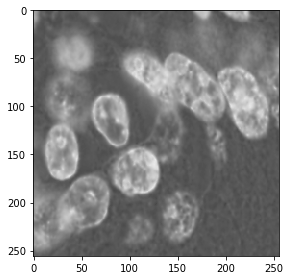

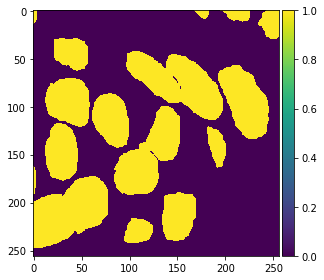

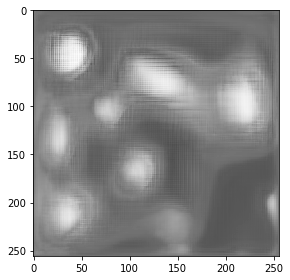

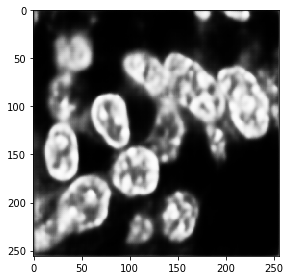

In [17]:
idx = np.random.randint(len(X_train))
plt.figure()
imshow(np.squeeze(X_train[idx]))
plt.figure()
imshow(np.squeeze(y_train[idx]))
plt.figure()
imshow(np.squeeze(y_train_pred_segnet[idx]))
plt.figure()
imshow(np.squeeze(y_train_pred_unet[idx]))

### check on testing images

C:\ScientificTools\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and


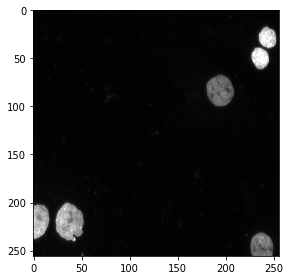

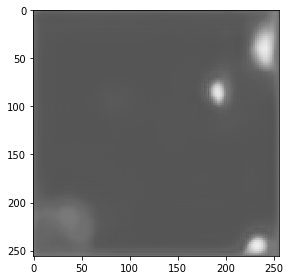

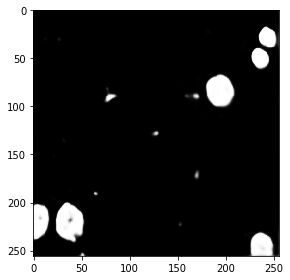

In [24]:
idx = np.random.randint(len(X_test))
plt.figure()
imshow(np.squeeze(X_test[idx]))
plt.figure()
imshow(np.squeeze(y_test_pred_segnet[idx]))
plt.figure()
imshow(np.squeeze(y_test_pred_unet[idx]))

### recover test prediction to original size

In [26]:
y_test_pred_segnet_ori = restoreMasks(imgs=y_test_pred_segnet, size_ori=sizes_test, threshold=0.5)
y_test_pred_unet_ori = restoreMasks(imgs=y_test_pred_unet, size_ori=sizes_test, threshold=0.5)

Restoring images to original sizes ... 
Restoring images to original sizes ... 


### write submission file

In [27]:
sub_segnet = convert2Sub(y_pred=y_test_pred_segnet_ori, ids=ids_test)
sub_unet = convert2Sub(y_pred=y_test_pred_unet_ori, ids=ids_test)

Preparing submission data for test images ... 


  0%|          | 15/3084 [00:00<01:13, 41.77it/s]

Warnings: no nuclei detected in image 3c4c675825f7509877bc10497f498c9a2e3433bf922bd870914a2eb21a54fd26


  3%|▎         | 87/3084 [00:01<00:53, 56.35it/s]

Warnings: no nuclei detected in image 023f820ae1d32ac5a70835107cdf51a1d7aab475dedc1b1cd8c33649cf8249d6


  3%|▎         | 93/3084 [00:01<00:54, 54.56it/s]

Warnings: no nuclei detected in image 033f2668a63e33bbe1637fdb0d1a03ef00c345f0b2bd661e321b70981032ff5d


  3%|▎         | 99/3084 [00:01<00:55, 53.60it/s]

Warnings: no nuclei detected in image 0401b552f739d51b556e9f2f85cdd52191f957d8b453ea3d2e61b32ef1624490
Warnings: no nuclei detected in image 04022ee855ec1e9b93532bf00e709e10305e3084ca9b452368f9c1547d76cb7e


  5%|▍         | 152/3084 [00:02<00:57, 50.77it/s]

Warnings: no nuclei detected in image 08233b7dfef209840ad4c9b7c8e79dafafdc81911fafc39b09fa06d243747c19


  6%|▌         | 170/3084 [00:03<00:58, 49.45it/s]

Warnings: no nuclei detected in image 09d6969acb6050c11dbfc7f6a4af94d799b7a83def967604c58de3be89e341e6


  6%|▌         | 179/3084 [00:03<01:00, 48.22it/s]

Warnings: no nuclei detected in image 0a9b684358ddd521550545ffc44a4f2ab335f7e2cfa4124a6ed63944371b6937


  6%|▌         | 186/3084 [00:03<00:59, 48.78it/s]

Warnings: no nuclei detected in image 0abd8062f3723d56aedcd3471c66de7dcd71043a59bb43a0500b0b6e0a676e06


  7%|▋         | 225/3084 [00:04<01:00, 46.90it/s]

Warnings: no nuclei detected in image 0e62dbfcd5dbff4b0b5fe9099b3aaaf9bce1422ebda37e1d9246199f4f4373d1


  8%|▊         | 232/3084 [00:04<01:00, 47.37it/s]

Warnings: no nuclei detected in image 0ec673c5a1ebc3b22a1cd58b5ce94d78f66bb96990070c4764ba6f2f80f084dd
Warnings: no nuclei detected in image 0f48fec9292aacdb20335b5e7bd21ae5d07040279aaa9814820cf807a999cc5e


  8%|▊         | 241/3084 [00:05<00:59, 48.12it/s]

Warnings: no nuclei detected in image 0fd3ed3fcef2451fa5b087beacebd6d29213464bd5db16d7c9c06be55e704a85


  9%|▉         | 272/3084 [00:05<00:58, 47.66it/s]

Warnings: no nuclei detected in image 123d63414072a0a8ad5beaa3693d10b0924b1483d950b88eb81459fb1d8d4ed6


 10%|█         | 315/3084 [00:06<01:00, 45.56it/s]

Warnings: no nuclei detected in image 15cdf102276bc0edc7491e15e6960e74f7bb47e1f0d7685cb7cbdc3f914c56c5


 11%|█         | 337/3084 [00:07<01:00, 45.29it/s]

Warnings: no nuclei detected in image 16cb16a84295cbe4d7ec1cbc5d98821ecbaea9fd5556e4a7ed437855894b8a82


 11%|█▏        | 349/3084 [00:07<01:00, 45.12it/s]

Warnings: no nuclei detected in image 17dfcd3ea94a13842548d83a819bb62803c7e50d672ca922ecec61b232f64e30


 11%|█▏        | 354/3084 [00:07<01:00, 45.12it/s]

Warnings: no nuclei detected in image 1832e035c8b3e1824ac19d9ecddf33266806fc4649f9f20669991e4f3d9292c8


 12%|█▏        | 361/3084 [00:07<00:59, 45.41it/s]

Warnings: no nuclei detected in image 18461e087014a77e648fe96532a4d0b537535103112ecc0c5bec832c3243040d
Warnings: no nuclei detected in image 1889623579f3881e827002651d850fca90a2c36a97af034d93f9bb90eb62de6a


 12%|█▏        | 383/3084 [00:08<01:00, 44.50it/s]

Warnings: no nuclei detected in image 1a3829007422f2ec05c7d243915f5b8ef6dd7a5d75e5005b10df1f44f8737593
Warnings: no nuclei detected in image 1acbb82d2c4121c9667394e5770771f843d7a2c27d3dfeea48ad907af682134d


 13%|█▎        | 410/3084 [00:09<00:59, 45.11it/s]

Warnings: no nuclei detected in image 1cceee3270f513ed145309df76018688a2c5cc9bafcfff545ce5576be53c9189
Warnings: no nuclei detected in image 1d4ec0f5ae4e314287dc3626f0e62ea632eaa4c8f1e2e9c9444de49d072dee4d


 15%|█▍        | 462/3084 [00:10<00:57, 45.60it/s]

Warnings: no nuclei detected in image 20de8f6da99735811168580ae6bd87f54bedf838cc2275d386aae9ad5eb098bd


 16%|█▋        | 504/3084 [00:10<00:56, 45.90it/s]

Warnings: no nuclei detected in image 2406640f7869d4c3c021ffa01fb5cad0059c46837baa3ab689ccba302cdd37bd


 19%|█▊        | 571/3084 [00:12<00:53, 46.90it/s]

Warnings: no nuclei detected in image 28cd97ed17aa75358c355d81d564bdaab7fd18ac29c6baf6939eb66526c0c3be


 19%|█▉        | 588/3084 [00:12<00:53, 46.29it/s]

Warnings: no nuclei detected in image 2a7d2786f691efe45b1d7a66f96e1fa170483f2ba7810d83255704e5186ec204


 20%|█▉        | 606/3084 [00:13<00:53, 46.45it/s]

Warnings: no nuclei detected in image 2cd7c4b6b54636da2eed9aad3f170aa03f64bbf8118bd21d67f11044199dbbfa


 21%|██        | 651/3084 [00:14<00:52, 46.46it/s]

Warnings: no nuclei detected in image 30e8a606acef5eb91f2ae7d33177af2da67b3469d490aedd6bbe4a88c50c2755


 21%|██▏       | 661/3084 [00:14<00:52, 46.26it/s]

Warnings: no nuclei detected in image 31e5fb8458150fb0e10c263abe56b7f43639ce7428dd45943537c502fc398938


 22%|██▏       | 681/3084 [00:14<00:51, 46.43it/s]

Warnings: no nuclei detected in image 33d6d8e9d74f9da9679000a6cf551fffe4ad45af7d9679e199c5c4bd2d1e0741


 22%|██▏       | 687/3084 [00:14<00:51, 46.30it/s]

Warnings: no nuclei detected in image 3419d1e6b4bde9179a5184ad0180eccd3c96b2e21ad56af1915fa68ff47ea746


 23%|██▎       | 694/3084 [00:14<00:51, 46.40it/s]

Warnings: no nuclei detected in image 3507939b7d99b3327620e10ac712d9f99750b80efb71f9a29c2100cde2d2a4a3


 23%|██▎       | 715/3084 [00:15<00:51, 45.96it/s]

Warnings: no nuclei detected in image 36741e2bdd7037c859a6031337defd58c87837aa7e8b3b39929155c47adc9740


 25%|██▍       | 768/3084 [00:16<00:50, 45.57it/s]

Warnings: no nuclei detected in image 39b6ed3e0dd50ea6e113e4f95b656c9bdc6d3866579f648a16a853aeb5af1a61


 25%|██▌       | 774/3084 [00:16<00:50, 45.62it/s]

Warnings: no nuclei detected in image 3a00564898f5c369e08c006b128cae7be126be6d37d62be3bf8a62335961f6cb
Warnings: no nuclei detected in image 3a187790ab4933a2975deac134149f074c1459226a11bcc13d6372808a34ecda


 26%|██▌       | 802/3084 [00:17<00:49, 45.81it/s]

Warnings: no nuclei detected in image 3c4f603595f4247ee2430791452df4d7db8f852a3f0b2b6f43fdf4eae04a3a7f


 26%|██▋       | 810/3084 [00:17<00:49, 45.85it/s]

Warnings: no nuclei detected in image 3d19f7d8e1e7b9fd1ba1bbaac59fd793053f80666721ce2b99e20e723ca9430f


 28%|██▊       | 866/3084 [00:19<00:48, 45.57it/s]

Warnings: no nuclei detected in image 4154bc898264edb17c8adf19759e321331bed5ff7a44fb4619f32edb991c832e
Warnings: no nuclei detected in image 42110f734efefea39e931dfba98bf0749c9c9b99a803c1715433415e5f3656f6


 28%|██▊       | 877/3084 [00:19<00:48, 45.48it/s]

Warnings: no nuclei detected in image 42cf4869e304d7d993878da9452ecde91457d7bcacc974d4295f2d120e3e06ef


 29%|██▉       | 901/3084 [00:19<00:48, 45.27it/s]

Warnings: no nuclei detected in image 4422c9a46e88982416e1b4510dfeb6a745d8f7380f9f3b17fa7bd4687672c6f2


 30%|██▉       | 916/3084 [00:20<00:48, 44.94it/s]

Warnings: no nuclei detected in image 458d8c48e0d5ce2ba6019852a11e3aa834005d1b7153ad86c58a647b001adcdd


 31%|███       | 956/3084 [00:21<00:48, 44.05it/s]

Warnings: no nuclei detected in image 4966ce391e5d5c89788b048f33515b88b8ef200bd04a6b3bcbd6a6cb3569262c


 31%|███▏      | 964/3084 [00:21<00:47, 44.18it/s]

Warnings: no nuclei detected in image 49ebee0b9238237212b60d69368ff206688a7f28ba4ac5c5a0da2ac9e9dea841


 32%|███▏      | 995/3084 [00:22<00:47, 44.01it/s]

Warnings: no nuclei detected in image 4d15b2dcc65abd198bc9fae629fba6147250d3a18e01553a3493dceaea632cd7


 33%|███▎      | 1004/3084 [00:22<00:47, 44.20it/s]

Warnings: no nuclei detected in image 4d46c7d1413499808118aa81fbf580319e1934b7c93794eca9dfe7987199df17


 33%|███▎      | 1024/3084 [00:23<00:46, 44.08it/s]

Warnings: no nuclei detected in image 4f2e6bdb552be0d6062cff925ab430c6dd60461fe9c893f70bb59a5fdc9125bd


 34%|███▍      | 1051/3084 [00:23<00:46, 44.00it/s]

Warnings: no nuclei detected in image 50989d519e22b82833697db5e8ffe411210e1b7c767a62b33fed2a41b13c4323


 35%|███▍      | 1070/3084 [00:24<00:45, 44.04it/s]

Warnings: no nuclei detected in image 521f61eac4c483489912c4e233ee47ec3b4d255e29ffbbb58c92c19ab7235073


 35%|███▌      | 1092/3084 [00:24<00:45, 43.80it/s]

Warnings: no nuclei detected in image 5390acefd575cf9b33413ddf6cbb9ce137ae07dc04616ba24c7b5fe476c827d2


 36%|███▌      | 1101/3084 [00:25<00:45, 43.94it/s]

Warnings: no nuclei detected in image 5452f5a72fe4693550a6f87984e1eb17350d88ef440629d8768f78eefc1cf198


 37%|███▋      | 1134/3084 [00:25<00:44, 43.68it/s]

Warnings: no nuclei detected in image 56bba46eff3dab59fc7da46c266a47f6711595d632d4d19ac483193e1d3466d1


 37%|███▋      | 1151/3084 [00:26<00:44, 43.83it/s]

Warnings: no nuclei detected in image 57e7b13df791e008a1723adeb311cd7336dbc3f6fac19e3ebb0eda4c18c174fb


 37%|███▋      | 1156/3084 [00:26<00:44, 43.70it/s]

Warnings: no nuclei detected in image 58760f6bfe73ec1cf266e492cfa0e1519e5de5e3ef304089462160fa2793d410


 38%|███▊      | 1162/3084 [00:26<00:43, 43.69it/s]

Warnings: no nuclei detected in image 58c478f3e64782e960901a51f31c833bbbf202bc4fe89c6eabf7b87c425a1427


 39%|███▉      | 1203/3084 [00:27<00:43, 43.51it/s]

Warnings: no nuclei detected in image 5b7cb150ad87603304e4d8f89ddc953b5135e4b6dd3cedb0f67a4d6d4ab99345


 39%|███▉      | 1218/3084 [00:28<00:42, 43.45it/s]

Warnings: no nuclei detected in image 5d3d438dcfa97ae87459cc4f2132971578d90ffa253273461b25df77336a14af


 40%|████      | 1238/3084 [00:28<00:42, 43.46it/s]

Warnings: no nuclei detected in image 5ed08ed15a337b3f710f1c81bf42067ab6c890846a32c4fc7b0bfba676099c93
Warnings: no nuclei detected in image 5f8325ae8d359c74a51f9b821d225c582285bff04f2f97576a98b6de51c5283a


 42%|████▏     | 1294/3084 [00:29<00:41, 43.24it/s]

Warnings: no nuclei detected in image 63d05dfead4f872c54231b79e2e7f69eda74df3a9b71284b415b18d0b82d5e1c


 42%|████▏     | 1301/3084 [00:30<00:42, 42.15it/s]

Warnings: no nuclei detected in image 649f64903bc836a5b0e740b7d92fdba9e509a90c0e88251c11281c2728d96a75


 42%|████▏     | 1309/3084 [00:31<00:42, 42.22it/s]

Warnings: no nuclei detected in image 6574c07b2d76854605ec61c47dc18549110c4f20a3299f0ce8a0f2b5331f6a44


 43%|████▎     | 1329/3084 [00:31<00:41, 42.31it/s]

Warnings: no nuclei detected in image 674ae3f9c9c7569b328a13456b7147559761518f62560c93749dc35178e2396d


 43%|████▎     | 1338/3084 [00:31<00:41, 42.45it/s]

Warnings: no nuclei detected in image 68152533052f06abb6a09c577687de8e95f6bd2943aa3509d45c50665a1183de


 44%|████▍     | 1366/3084 [00:31<00:40, 42.75it/s]

Warnings: no nuclei detected in image 69f341f6f6bb27e0dd746f526292a1a59c82b982da07a4b8932e321114523bc0


 45%|████▌     | 1391/3084 [00:32<00:39, 42.73it/s]

Warnings: no nuclei detected in image 6cccb90ac21a567b030c987b7e55ece70678f9c56607dacd415c334d83d41b9b


 45%|████▌     | 1400/3084 [00:32<00:39, 42.85it/s]

Warnings: no nuclei detected in image 6dd1dd0e5c49f42f160abdf4a5d329d3995daf669253a053c52bf23f51dce89a


 46%|████▌     | 1415/3084 [00:32<00:38, 42.96it/s]

Warnings: no nuclei detected in image 6e50899ecb07832b047bfe8add4be2776dc60223faa4b79de7450b714e5e4cde


 46%|████▌     | 1422/3084 [00:33<00:38, 42.93it/s]

Warnings: no nuclei detected in image 6f4a97442f9f1291f7121defb3efecc2d33806818162ac1dd8356a2ec94ebeff


 47%|████▋     | 1444/3084 [00:33<00:38, 42.84it/s]

Warnings: no nuclei detected in image 710325eec8bf98d098c7de3a016c651588d27d862bce2bae24262b2c13ea2f9d
Warnings: no nuclei detected in image 71260eb68ba996a8d81f7e5770043a5fc7c46219893619f2e9f6fc16f36d738e


 47%|████▋     | 1451/3084 [00:33<00:38, 42.91it/s]

Warnings: no nuclei detected in image 725bd8377b22d5e7a0fdca65b726eac72a1521e0ddd8cbad2abcfdc6062c860c


 48%|████▊     | 1479/3084 [00:34<00:37, 42.71it/s]

Warnings: no nuclei detected in image 74bb149046ad122fc44452384192f0adc85d304f939f871fc0cb7c5985980ced


 48%|████▊     | 1488/3084 [00:34<00:37, 42.84it/s]

Warnings: no nuclei detected in image 754893e0818d8292fae48fe2cf8f70bef003992813f620c22b920ac03853f021
Warnings: no nuclei detected in image 75988c46254989c4116e8e2804d862902e2523d13ca435b8592400e560277e85


 49%|████▉     | 1519/3084 [00:35<00:36, 43.01it/s]

Warnings: no nuclei detected in image 77981e76692a8bc12cf419daa1afb7933224f121e57fe37c708e128a011d6df4
Warnings: no nuclei detected in image 7841234d7e3f53df23c8d5ece5c0c685c7183cff6acc65c617bd1bd90905f249


 50%|████▉     | 1527/3084 [00:35<00:36, 43.04it/s]

Warnings: no nuclei detected in image 78d5416e8df6636cdc592c55f9d4634b3a0a3c47e69fc51b239e3db6192c096b


 51%|█████     | 1558/3084 [00:36<00:35, 43.13it/s]

Warnings: no nuclei detected in image 7b961044158e0b7737530e0ebc0f9af32253d0210b69525b4fca64894d049736


 52%|█████▏    | 1591/3084 [00:36<00:34, 43.16it/s]

Warnings: no nuclei detected in image 7d5ea560632f0e50f78245283caed6e20cc9054bb41773928cc7b052c94ea210
Warnings: no nuclei detected in image 7ddc1c90fb74047aa8693879d2dd0277e6f67d87179072a69151bfa0eaede784


 53%|█████▎    | 1635/3084 [00:37<00:33, 43.04it/s]

Warnings: no nuclei detected in image 81537757f724d396ad6c803d8db775b2bd2814c711a839394e6895e5be62178d


 55%|█████▍    | 1686/3084 [00:39<00:32, 43.17it/s]

Warnings: no nuclei detected in image 86a1214137cbd14a418ee24a9a2707cb40635514f6646ed8295d5853ff4653a0


 55%|█████▍    | 1693/3084 [00:39<00:32, 43.19it/s]

Warnings: no nuclei detected in image 87b1346b9774514d1f438fe2a74d0ae60b014d16058a8c798da32fd0888d6a46


 55%|█████▌    | 1711/3084 [00:39<00:31, 43.33it/s]

Warnings: no nuclei detected in image 8914f2d812d2efc27ff0dc62ed95954ff5887bb20977ca0fb5d0f95b04d7e32a


 57%|█████▋    | 1743/3084 [00:39<00:30, 43.58it/s]

Warnings: no nuclei detected in image 8b553220241243430bcc38eaa530897f411cb0a805f50ab000decb66dc50619a


 57%|█████▋    | 1750/3084 [00:40<00:30, 43.62it/s]

Warnings: no nuclei detected in image 8cbf2e176fb1f62d751fe89861887bf15587ee82a0954e540012ee9af2c69924


 58%|█████▊    | 1798/3084 [00:41<00:29, 43.74it/s]

Warnings: no nuclei detected in image 9000dea896a65605a8b44903bc68c1e3efda49fd789b08f3b8631a8d812744c2


 59%|█████▉    | 1813/3084 [00:41<00:29, 43.64it/s]

Warnings: no nuclei detected in image 913f4acf1cac4af64945c39e40c4478a942216498203e523ad40052d57208110
Warnings: no nuclei detected in image 9190392c7d434ece78a0f35b4312bf87fd2c6c8c50350129814e614c929dbf82


 61%|██████    | 1884/3084 [00:43<00:27, 43.64it/s]

Warnings: no nuclei detected in image 97e650395f4a91c5b23e6949c6a0e8a52a47ae1f05b93df38826e8f23e62182d


 63%|██████▎   | 1938/3084 [00:44<00:26, 43.61it/s]

Warnings: no nuclei detected in image 9ca78582ea536253dee08002a6e70f397fac022ffa55618a9fde6eb7ba2490dd


 63%|██████▎   | 1949/3084 [00:44<00:26, 43.43it/s]

Warnings: no nuclei detected in image 9e2b6d7cf587f472b05bd1fa93914fe88b1a0b91a0c007952ebb02cd4b7aba30


 64%|██████▎   | 1961/3084 [00:45<00:25, 43.53it/s]

Warnings: no nuclei detected in image 9e77517e53c1a25b3828e3863b27bb1e14a7ed6e84c3762c40eaf2a3e532d502
Warnings: no nuclei detected in image 9ea095a18d568d0fcb6786890ad13641badb5a4683553959b1b304a3f870c941


 64%|██████▎   | 1966/3084 [00:45<00:25, 43.54it/s]

Warnings: no nuclei detected in image 9f23a8244a6b695507d45a594d74e27be188385baf8e391085a84f74ee1ad7cd


 65%|██████▍   | 1998/3084 [00:45<00:24, 43.73it/s]

Warnings: no nuclei detected in image a0e58296ae4ee45e6656fab69f4e9a2d36fa092c3b915bc57b8326445cabf27f


 66%|██████▌   | 2025/3084 [00:46<00:24, 43.77it/s]

Warnings: no nuclei detected in image a2ea638888e7793a9e149fc8a6e413b2386fd18f6f593a8a32c7380af659896b


 67%|██████▋   | 2052/3084 [00:46<00:23, 44.02it/s]

Warnings: no nuclei detected in image a53c0335a658b1e6fd683a36b2d44d4068dd0e8aca0091e278ad65dab8cee959
Warnings: no nuclei detected in image a53ddd422aa4bb01a3c581216aae2d5ca5c8c8eb57340c62a4e5a4ba77d89943


 67%|██████▋   | 2061/3084 [00:46<00:23, 44.02it/s]

Warnings: no nuclei detected in image a6412a026197af212a76a5be47fb1f21c998384e79665904aa4d553f8de66252


 68%|██████▊   | 2089/3084 [00:47<00:22, 44.05it/s]

Warnings: no nuclei detected in image a8a1bcb725a3584730df9129f9d1a72be4d57c4a1fdc3fce3830aab88bb05294


 68%|██████▊   | 2097/3084 [00:47<00:22, 44.12it/s]

Warnings: no nuclei detected in image a9b14190086348a29984abe2647147168a9a80648c0d510fa003455b97dce2cc


 68%|██████▊   | 2112/3084 [00:47<00:21, 44.21it/s]

Warnings: no nuclei detected in image ac2156e54f743b7b4c614e03ec00952027c5add5a18d9dffdf9b6eb88c5c188a


 69%|██████▉   | 2122/3084 [00:47<00:21, 44.30it/s]

Warnings: no nuclei detected in image acd2af92287652f82fd6c54d33e982498bbe027144d1f0aa8d186ee22955a0ac
Warnings: no nuclei detected in image ace75559e9ce68ac2dd491b9ddcd9fe987b2826638da4f88c01a327dba99cff7


 70%|██████▉   | 2157/3084 [00:48<00:20, 44.32it/s]

Warnings: no nuclei detected in image af04bfee62b59bb1af5a37917b0043dcd5f78dd85f158cdf8513f059a32e44ac


 71%|███████   | 2186/3084 [00:49<00:20, 44.48it/s]

Warnings: no nuclei detected in image b16b30f24fed2c27c02b130fc34acc56eb62686ffbeeecf8b480681a0aaaeb90


 71%|███████   | 2192/3084 [00:49<00:20, 44.47it/s]

Warnings: no nuclei detected in image b1f032caf3b9d760ab0a5328f089d45bbe3d7be6436ecfc60170e682c503f9e7


 72%|███████▏  | 2208/3084 [00:49<00:19, 44.51it/s]

Warnings: no nuclei detected in image b4445c512e0a3a0b11aeaa970da8c92e26d6b305cd23324ae78c90192f7a60d6
Warnings: no nuclei detected in image b44861b743998fab4262ef5c3e8d8665118dfbdb12c4bf53849743b34f068806


 72%|███████▏  | 2232/3084 [00:50<00:19, 44.60it/s]

Warnings: no nuclei detected in image b5a4577e3ccf893460dd66a499c36be768d51781aab23cff73f0a7ce4da8f159


 73%|███████▎  | 2245/3084 [00:50<00:18, 44.58it/s]

Warnings: no nuclei detected in image b678c627c6e3e1c912a7b89e9540fcd67922e45c2f9dfd8794ac95c11ac0739d


 74%|███████▍  | 2283/3084 [00:51<00:18, 44.09it/s]

Warnings: no nuclei detected in image b9873154c8715d0c7697913401c585a20669125fc2243f1de9482f5a41224fb7


 74%|███████▍  | 2295/3084 [00:52<00:17, 44.11it/s]

Warnings: no nuclei detected in image ba82fda344e18912bc097585ef2ff9f61aee96f212f7c2f1fdb63364d27762a1
Warnings: no nuclei detected in image bae4507574af147d75b2ea3e34fa913c320aab8a5bc6a6686f188f3d2c4b8c49


 75%|███████▍  | 2306/3084 [00:52<00:17, 44.19it/s]

Warnings: no nuclei detected in image bb157415d3a6c809a31d2da60787c0186579b734002eaaf76d0581e62d7b5593


 75%|███████▌  | 2318/3084 [00:52<00:17, 44.17it/s]

Warnings: no nuclei detected in image bcd810b3696dab97e113804d79808195a25df3d32c55ac6e7504483f18eabe4b


 75%|███████▌  | 2324/3084 [00:52<00:17, 44.14it/s]

Warnings: no nuclei detected in image bd03179d6b1d6623f972f9c5fa01456ed30a5ffdcb6a91e36a422b45b9be787c


 77%|███████▋  | 2377/3084 [00:53<00:15, 44.28it/s]

Warnings: no nuclei detected in image c1a3cd2e68f13308711f65f3a2941aff81d94fcf4afee9e86c999ec8387ba21b


 79%|███████▉  | 2447/3084 [00:55<00:14, 44.26it/s]

Warnings: no nuclei detected in image c7d82628c61b687fc47e62d0ddead76a7c34e73f5e0feba4ea7f5af9744ac729


 80%|████████  | 2472/3084 [00:55<00:13, 44.23it/s]

Warnings: no nuclei detected in image c98c694bdeacc3d3a1e02823bb0af24b7b763b7755ea3541a2f2a2754cdacc9a


 81%|████████  | 2488/3084 [00:56<00:13, 44.24it/s]

Warnings: no nuclei detected in image ca88a4eeb589a4e8cbc892ded1a8f03db1f159affbf649d1aed90008c759ac61
Warnings: no nuclei detected in image cab6d92994eefa4792256dccdc543f2e91320029e01ab9548b58408949a0ddde


 81%|████████  | 2501/3084 [00:56<00:13, 44.27it/s]

Warnings: no nuclei detected in image cb245daed449630acd2a697912cae2c107508f757fd367e7738f6e040b959d69


 81%|████████▏ | 2509/3084 [00:56<00:12, 44.33it/s]

Warnings: no nuclei detected in image cbf1670753bb2b95ebb8f7b6a68e1238361c027f950275899c48f66b90c556d9


 83%|████████▎ | 2546/3084 [00:57<00:12, 44.31it/s]

Warnings: no nuclei detected in image ceb422e850ba9bbfa69473551f555c80b5a0387851903e0e055d1d5c21d93909


 83%|████████▎ | 2560/3084 [00:57<00:11, 44.34it/s]

Warnings: no nuclei detected in image d0471866fa36a8fc2a75e3f7c0b996d85982a709362b37db7550da7875830d11


 83%|████████▎ | 2572/3084 [00:57<00:11, 44.38it/s]

Warnings: no nuclei detected in image d13caf238a769efc318358a12c532b1dae6a9ad237c6733d7f99bc7418b5f8fb


 84%|████████▎ | 2578/3084 [00:58<00:11, 44.37it/s]

Warnings: no nuclei detected in image d24e1f36c46d197b20191a58e5be84d3d774a27278f7fee86514126fb71d46c8
Warnings: no nuclei detected in image d279a8b901c1987074897fb4be74c058f0732081229ee9a683918ebf7b7b91ec


 84%|████████▍ | 2600/3084 [00:58<00:10, 44.38it/s]

Warnings: no nuclei detected in image d483c3ab8bffb095a1408216499226ac383c8a2b9662f3a78e36d7d504a76792


 85%|████████▍ | 2620/3084 [00:59<00:10, 44.36it/s]

Warnings: no nuclei detected in image d6003c3138b4b01b2fa28e0483c529a50b962e4979be8bf33582805954736448
Warnings: no nuclei detected in image d688a2bc1a58967525c653036c9b1e64026b0384d78ded1c7fe44087cb72f0ec


 85%|████████▌ | 2625/3084 [00:59<00:10, 44.36it/s]

Warnings: no nuclei detected in image d6c233465684f612e02c0616d9b5e2829a864977e5e7729ba54179b09e2fe730


 85%|████████▌ | 2635/3084 [00:59<00:10, 44.26it/s]

Warnings: no nuclei detected in image d8194d8562c7ab05e02c86cb111cf4534b39ef06758d71c94545e3a38d6ad364


 86%|████████▌ | 2656/3084 [01:00<00:09, 44.06it/s]

Warnings: no nuclei detected in image d985d482b6c3c448ffdfbce07b0d4c01ef30b5737bf9397cf3abbb798155ffb0


 87%|████████▋ | 2677/3084 [01:00<00:09, 44.00it/s]

Warnings: no nuclei detected in image db0b597570c512532fa45f8fd21dd4f5fda2ec6534e022d4c3d07056ba501073
Warnings: no nuclei detected in image db45ed183873b71ccae114645660e026cdefa0d5dda09718203f9a18530b6bbc
Warnings: no nuclei detected in image dba7760d53683494ad32abc85157a31df86c708ccf9027b2161a846a6e3e9c52


 87%|████████▋ | 2687/3084 [01:00<00:09, 44.07it/s]

Warnings: no nuclei detected in image dc44622d6b0fc6cbdf1cb838a4b416c896b8fe55e315cffc6b77c1767305a8d6


 89%|████████▉ | 2760/3084 [01:02<00:07, 44.06it/s]

Warnings: no nuclei detected in image e30df7b8740769db68a65bad0c994f3d756f498677498f80d07f4423b0e488f1
Warnings: no nuclei detected in image e3e8ecc13bc9e196f34c9d8cbdec73fdca87f501349d9f4978dbe5fa108a9eb9


 90%|████████▉ | 2772/3084 [01:02<00:07, 44.18it/s]

Warnings: no nuclei detected in image e476039d612f9e94797ad3fa8f8ee90c040c7609a83c53c974818ddc38bd7e47


 91%|█████████ | 2800/3084 [01:03<00:06, 44.08it/s]

Warnings: no nuclei detected in image e76d53d5f3abe64d2415d6513a14aa8cf790b08f2077a7552e702454f21a00bc


 92%|█████████▏| 2827/3084 [01:04<00:05, 43.84it/s]

Warnings: no nuclei detected in image e93d8b7c1a71a95f95baedc67372ec8ae7ecc6bfca628247c23924f12b7124c9
Warnings: no nuclei detected in image e96b09880ef3f18d4054ab3156c90437dcff889408e396047b12b2c3417f1f26


 92%|█████████▏| 2847/3084 [01:04<00:05, 43.85it/s]

Warnings: no nuclei detected in image eab63eb5cddae19de8556a677bb4d170414703ee90f41af92c82293499d0697b


 93%|█████████▎| 2879/3084 [01:05<00:04, 43.85it/s]

Warnings: no nuclei detected in image ede6cf0530f70057c57fb25c23cd6f4d0e63de17c1bc05cf095bb6306d5dedad


 94%|█████████▎| 2885/3084 [01:05<00:04, 43.86it/s]

Warnings: no nuclei detected in image ee6a068fe30f6455c6c3783b780504f285c7bb588862298a942cc6f971117f96
Warnings: no nuclei detected in image ee8780b8fad230c37beab528a7f53f81bd26e325cf4e0b358e48246e945623e3


 94%|█████████▍| 2903/3084 [01:06<00:04, 43.87it/s]

Warnings: no nuclei detected in image efb8a2ae2814be52d82864e4f4bfa07a40fd50149881c1b5fc279d9f810fe1f8
Warnings: no nuclei detected in image eff7a4cae03ff01b7051b9a49e3b0d4c7c3d20f977b509f36e718b0322dbd7d1


 94%|█████████▍| 2912/3084 [01:06<00:03, 43.94it/s]

Warnings: no nuclei detected in image f050f74198b9c5be739f95ebe587264507326bc7bb222ea76634b7a6078505e0


 96%|█████████▌| 2946/3084 [01:07<00:03, 43.75it/s]

Warnings: no nuclei detected in image f3c1a080e4c2fc1e66bb48583eee3702dd808c50881cae4168b423e43e7ab350
Warnings: no nuclei detected in image f3c4a7f58c12a32d5de5928a83ff22f8577746fd97c8000870d779c377a46222


 96%|█████████▌| 2961/3084 [01:07<00:02, 43.83it/s]

Warnings: no nuclei detected in image f56a30d1358697ca9d2f2e91f12e9b76ae93f7cfb9247735bbe00c809fe0be8c


 96%|█████████▋| 2976/3084 [01:07<00:02, 43.87it/s]

Warnings: no nuclei detected in image f6f5ddbd961a34a4df6cafe379e6070ca6c6465b0193ab9476245397b3d28c28
Warnings: no nuclei detected in image f712caa5d4ec696c143dee607100664f983820cee20b5a161198e782e996beff


 99%|█████████▉| 3046/3084 [01:09<00:00, 43.88it/s]

Warnings: no nuclei detected in image fc8b408c87454baad88c2ca1a4b02f726aa542e8622bcf080c0e347ae983b14f


 99%|█████████▉| 3053/3084 [01:09<00:00, 43.91it/s]

Warnings: no nuclei detected in image fd849405326b95ff997939d18b8560212d602d6c2fb5746e4051b8ba7091acd3


100%|██████████| 3084/3084 [01:10<00:00, 43.77it/s]


Preparing submission data for test images ... 


  3%|▎         | 84/3084 [00:03<01:52, 26.67it/s]

Warnings: no nuclei detected in image 023f820ae1d32ac5a70835107cdf51a1d7aab475dedc1b1cd8c33649cf8249d6


  3%|▎         | 102/3084 [00:03<01:49, 27.25it/s]

Warnings: no nuclei detected in image 0401b552f739d51b556e9f2f85cdd52191f957d8b453ea3d2e61b32ef1624490
Warnings: no nuclei detected in image 04022ee855ec1e9b93532bf00e709e10305e3084ca9b452368f9c1547d76cb7e


  4%|▍         | 122/3084 [00:04<01:46, 27.94it/s]

Warnings: no nuclei detected in image 0588ea30da5deecd3f4748fbfa525c188c74ca573432c5ca63ff0b6ac81fcdcb


  7%|▋         | 220/3084 [00:07<01:41, 28.24it/s]

Warnings: no nuclei detected in image 0dc3651561ce29ac8a62b021bd72212a27266b3a4ab2d5c77568db7ca6d19110


  8%|▊         | 244/3084 [00:08<01:36, 29.40it/s]

Warnings: no nuclei detected in image 0fd3ed3fcef2451fa5b087beacebd6d29213464bd5db16d7c9c06be55e704a85


  9%|▉         | 270/3084 [00:08<01:33, 30.22it/s]

Warnings: no nuclei detected in image 123d63414072a0a8ad5beaa3693d10b0924b1483d950b88eb81459fb1d8d4ed6


 10%|█         | 318/3084 [00:10<01:32, 29.77it/s]

Warnings: no nuclei detected in image 15cdf102276bc0edc7491e15e6960e74f7bb47e1f0d7685cb7cbdc3f914c56c5


 10%|█         | 321/3084 [00:10<01:33, 29.68it/s]

Warnings: no nuclei detected in image 15f9aa4b4804bdec300d0dbc67bbc85a1ee3998d35d4974858128ed1a8081596


 11%|█         | 336/3084 [00:11<01:30, 30.34it/s]

Warnings: no nuclei detected in image 16cb16a84295cbe4d7ec1cbc5d98821ecbaea9fd5556e4a7ed437855894b8a82


 11%|█▏        | 348/3084 [00:11<01:29, 30.51it/s]

Warnings: no nuclei detected in image 17dfcd3ea94a13842548d83a819bb62803c7e50d672ca922ecec61b232f64e30


 11%|█▏        | 353/3084 [00:11<01:29, 30.55it/s]

Warnings: no nuclei detected in image 1832e035c8b3e1824ac19d9ecddf33266806fc4649f9f20669991e4f3d9292c8


 12%|█▏        | 360/3084 [00:11<01:28, 30.85it/s]

Warnings: no nuclei detected in image 18461e087014a77e648fe96532a4d0b537535103112ecc0c5bec832c3243040d
Warnings: no nuclei detected in image 1889623579f3881e827002651d850fca90a2c36a97af034d93f9bb90eb62de6a


 12%|█▏        | 383/3084 [00:12<01:27, 30.69it/s]

Warnings: no nuclei detected in image 1a3829007422f2ec05c7d243915f5b8ef6dd7a5d75e5005b10df1f44f8737593


 14%|█▎        | 424/3084 [00:13<01:23, 31.92it/s]

Warnings: no nuclei detected in image 1e9e303aa9539381eeaee3068dbb1b5409aee6b95410318f2a0735d2a7e528e6


 16%|█▌        | 487/3084 [00:14<01:18, 33.20it/s]

Warnings: no nuclei detected in image 223fcf1a3652bb711ab3b4f3d160938022df2a31dd39b46e2a5c592e333dd21c


 16%|█▌        | 499/3084 [00:14<01:17, 33.50it/s]

Warnings: no nuclei detected in image 22e143741fd6c541992bcbd6c9737ea412acd73bb85a1fdd6f79b40c0b15367e


 17%|█▋        | 515/3084 [00:15<01:15, 33.85it/s]

Warnings: no nuclei detected in image 251c5e8d9e369ead90872eb281de73e70ce4888ee860bce13bf60fddb7f50bf4
Warnings: no nuclei detected in image 2542a5402678b37129d9e55b541d716503d05018e988dcd859cafcc5a1a8eecf


 18%|█▊        | 560/3084 [00:15<01:12, 35.05it/s]

Warnings: no nuclei detected in image 2803f6db7975b04b9596bd54a3420fadd732d1c9b11ffeed0c64b17fe42453c1


 18%|█▊        | 568/3084 [00:16<01:11, 35.19it/s]

Warnings: no nuclei detected in image 28cd97ed17aa75358c355d81d564bdaab7fd18ac29c6baf6939eb66526c0c3be


 19%|█▉        | 588/3084 [00:16<01:11, 35.13it/s]

Warnings: no nuclei detected in image 2a7d2786f691efe45b1d7a66f96e1fa170483f2ba7810d83255704e5186ec204


 20%|█▉        | 612/3084 [00:17<01:09, 35.48it/s]

Warnings: no nuclei detected in image 2cd7c4b6b54636da2eed9aad3f170aa03f64bbf8118bd21d67f11044199dbbfa


 20%|██        | 632/3084 [00:17<01:09, 35.20it/s]

Warnings: no nuclei detected in image 2f25c16e472f0b5f0c14b654a4e78f8f83ad7505f056d48349e1e12e0de98839
Warnings: no nuclei detected in image 2f30f0042f1b1719b515536311b718d17465c7404ed81d7113fa828efb53370c


 21%|██        | 650/3084 [00:18<01:08, 35.74it/s]

Warnings: no nuclei detected in image 30e8a606acef5eb91f2ae7d33177af2da67b3469d490aedd6bbe4a88c50c2755


 21%|██▏       | 662/3084 [00:18<01:07, 35.88it/s]

Warnings: no nuclei detected in image 31e5fb8458150fb0e10c263abe56b7f43639ce7428dd45943537c502fc398938


 22%|██▏       | 687/3084 [00:19<01:06, 36.04it/s]

Warnings: no nuclei detected in image 3419d1e6b4bde9179a5184ad0180eccd3c96b2e21ad56af1915fa68ff47ea746


 23%|██▎       | 706/3084 [00:19<01:06, 35.64it/s]

Warnings: no nuclei detected in image 35cfed35c9903b185e71b6be58696edd883c674744c98534df8da16d7a1131eb


 23%|██▎       | 716/3084 [00:20<01:06, 35.67it/s]

Warnings: no nuclei detected in image 36741e2bdd7037c859a6031337defd58c87837aa7e8b3b39929155c47adc9740


 25%|██▍       | 760/3084 [00:21<01:04, 35.98it/s]

Warnings: no nuclei detected in image 3948d4723417cce9b458a667afa4ce1ab82e1149f6dd0edaf9580730ca28230f


 25%|██▌       | 773/3084 [00:21<01:04, 35.96it/s]

Warnings: no nuclei detected in image 3a187790ab4933a2975deac134149f074c1459226a11bcc13d6372808a34ecda
Warnings: no nuclei detected in image 3a289e5cf8598e9cf58c3556f45c760faab06975596b61656f39a52a799d626e


 25%|██▌       | 778/3084 [00:21<01:04, 35.99it/s]

Warnings: no nuclei detected in image 3a62cc4a1e0543e3ce0ec31b13f0c7ab10749c94e49cdf5f14a68e494730b388


 27%|██▋       | 839/3084 [00:23<01:03, 35.44it/s]

Warnings: no nuclei detected in image 3f84bd222a7ee034d0803e2c720fe8e7e5086101f98c69ffbc5fdbfc90b90f58


 28%|██▊       | 864/3084 [00:24<01:02, 35.39it/s]

Warnings: no nuclei detected in image 4154bc898264edb17c8adf19759e321331bed5ff7a44fb4619f32edb991c832e


 29%|██▊       | 880/3084 [00:24<01:01, 35.56it/s]

Warnings: no nuclei detected in image 42c3571618fa01ec6dfa4c6ff27442350f7c7eedf47d99c7ae26f72c3af68904
Warnings: no nuclei detected in image 42cf4869e304d7d993878da9452ecde91457d7bcacc974d4295f2d120e3e06ef


 29%|██▉       | 898/3084 [00:25<01:01, 35.40it/s]

Warnings: no nuclei detected in image 4422c9a46e88982416e1b4510dfeb6a745d8f7380f9f3b17fa7bd4687672c6f2


 30%|██▉       | 915/3084 [00:25<01:01, 35.23it/s]

Warnings: no nuclei detected in image 458d8c48e0d5ce2ba6019852a11e3aa834005d1b7153ad86c58a647b001adcdd


 30%|██▉       | 924/3084 [00:26<01:01, 35.13it/s]

Warnings: no nuclei detected in image 4627cf403e209257ae86466ca03bdb8e9c8dd75e491f2db1cd1b52613c3c5fab


 31%|███▏      | 967/3084 [00:27<01:00, 35.18it/s]

Warnings: no nuclei detected in image 49ebee0b9238237212b60d69368ff206688a7f28ba4ac5c5a0da2ac9e9dea841


 32%|███▏      | 975/3084 [00:27<01:00, 35.10it/s]

Warnings: no nuclei detected in image 4aceb5c926838609cc85f9d12b4c682f97dc6f8bfc7fe3296efc836a905539b3


 32%|███▏      | 994/3084 [00:28<00:59, 35.08it/s]

Warnings: no nuclei detected in image 4d46c7d1413499808118aa81fbf580319e1934b7c93794eca9dfe7987199df17


 33%|███▎      | 1006/3084 [00:28<00:58, 35.38it/s]

Warnings: no nuclei detected in image 4d5641a258739bdfc3f1934b823157fe26f9b3dabb62e6373cb9f97d1e896262


 34%|███▍      | 1049/3084 [00:29<00:57, 35.45it/s]

Warnings: no nuclei detected in image 50989d519e22b82833697db5e8ffe411210e1b7c767a62b33fed2a41b13c4323


 35%|███▍      | 1076/3084 [00:30<00:56, 35.80it/s]

Warnings: no nuclei detected in image 525bcc87a9127fde630c486872cd4fa57d53ed4713a010e2d84263f17e987a9a


 36%|███▌      | 1112/3084 [00:31<00:56, 35.16it/s]

Warnings: no nuclei detected in image 5502705a05cae249efa5bfc374329dc583a4dfb9c839f08112a89ee6b3d03e64
Warnings: no nuclei detected in image 551215f700e680249ffa42b200ca156fef5786e13ebf80fbf4c698a33a7ab02e


 37%|███▋      | 1138/3084 [00:32<00:55, 34.90it/s]

Warnings: no nuclei detected in image 56bba46eff3dab59fc7da46c266a47f6711595d632d4d19ac483193e1d3466d1


 39%|███▉      | 1202/3084 [00:35<00:54, 34.23it/s]

Warnings: no nuclei detected in image 5b7cb150ad87603304e4d8f89ddc953b5135e4b6dd3cedb0f67a4d6d4ab99345


 40%|███▉      | 1219/3084 [00:35<00:54, 34.04it/s]

Warnings: no nuclei detected in image 5d3d438dcfa97ae87459cc4f2132971578d90ffa253273461b25df77336a14af


 40%|████      | 1240/3084 [00:36<00:54, 33.90it/s]

Warnings: no nuclei detected in image 5ed08ed15a337b3f710f1c81bf42067ab6c890846a32c4fc7b0bfba676099c93


 40%|████      | 1246/3084 [00:36<00:54, 33.95it/s]

Warnings: no nuclei detected in image 5f97126176b7b86de2b3013c9184cc6103754c85ee106174799db4cc26979ee6


 41%|████      | 1256/3084 [00:37<00:53, 33.86it/s]

Warnings: no nuclei detected in image 603472cd8beea1a522830e57ad3285dd66d7cda0346ea3346d9139cf9b1fb4bd


 42%|████▏     | 1293/3084 [00:38<00:53, 33.27it/s]

Warnings: no nuclei detected in image 63d05dfead4f872c54231b79e2e7f69eda74df3a9b71284b415b18d0b82d5e1c


 42%|████▏     | 1301/3084 [00:39<00:54, 33.00it/s]

Warnings: no nuclei detected in image 649f64903bc836a5b0e740b7d92fdba9e509a90c0e88251c11281c2728d96a75


 42%|████▏     | 1308/3084 [00:39<00:53, 33.07it/s]

Warnings: no nuclei detected in image 6574c07b2d76854605ec61c47dc18549110c4f20a3299f0ce8a0f2b5331f6a44


 43%|████▎     | 1320/3084 [00:39<00:53, 33.08it/s]

Warnings: no nuclei detected in image 6653b98966551c56b594524e132baf80bc4d971a95d353f10c6786e45546ed20


 43%|████▎     | 1329/3084 [00:40<00:52, 33.12it/s]

Warnings: no nuclei detected in image 674ae3f9c9c7569b328a13456b7147559761518f62560c93749dc35178e2396d


 43%|████▎     | 1337/3084 [00:40<00:52, 33.23it/s]

Warnings: no nuclei detected in image 68152533052f06abb6a09c577687de8e95f6bd2943aa3509d45c50665a1183de


 44%|████▎     | 1349/3084 [00:40<00:51, 33.43it/s]

Warnings: no nuclei detected in image 68c8c24bccff24d04ea380c1b97697964542a19d2c651f1f9d58f192202f5628


 44%|████▍     | 1356/3084 [00:40<00:51, 33.42it/s]

Warnings: no nuclei detected in image 69ee7cf528109645b23ca3d5b8656db3ff04a0cb269e90c33de1f97d58f81077
Warnings: no nuclei detected in image 69f341f6f6bb27e0dd746f526292a1a59c82b982da07a4b8932e321114523bc0


 45%|████▌     | 1392/3084 [00:41<00:50, 33.76it/s]

Warnings: no nuclei detected in image 6cccb90ac21a567b030c987b7e55ece70678f9c56607dacd415c334d83d41b9b


 46%|████▌     | 1405/3084 [00:41<00:49, 33.97it/s]

Warnings: no nuclei detected in image 6dd1dd0e5c49f42f160abdf4a5d329d3995daf669253a053c52bf23f51dce89a
Warnings: no nuclei detected in image 6def3235fffa1ef2439767c7bcf82fe9f8757956fdd8714f7126f65d2ada24bf


 46%|████▌     | 1413/3084 [00:41<00:49, 34.07it/s]

Warnings: no nuclei detected in image 6e50899ecb07832b047bfe8add4be2776dc60223faa4b79de7450b714e5e4cde


 47%|████▋     | 1443/3084 [00:42<00:48, 33.77it/s]

Warnings: no nuclei detected in image 710325eec8bf98d098c7de3a016c651588d27d862bce2bae24262b2c13ea2f9d
Warnings: no nuclei detected in image 71260eb68ba996a8d81f7e5770043a5fc7c46219893619f2e9f6fc16f36d738e


 48%|████▊     | 1466/3084 [00:43<00:48, 33.60it/s]

Warnings: no nuclei detected in image 73c1e0392d36fedc55cd911388a34f0389a9ab782d0bb1c57cc33d9a51abeb6c
Warnings: no nuclei detected in image 73c7328af25c089ab15bf7a5f99938fb8081f34f18cbeadb3042ccaa6f1cb6d3


 48%|████▊     | 1488/3084 [00:44<00:47, 33.67it/s]

Warnings: no nuclei detected in image 754893e0818d8292fae48fe2cf8f70bef003992813f620c22b920ac03853f021
Warnings: no nuclei detected in image 75988c46254989c4116e8e2804d862902e2523d13ca435b8592400e560277e85


 49%|████▊     | 1503/3084 [00:44<00:46, 33.72it/s]

Warnings: no nuclei detected in image 76c215d4778f21fc0778b6f5cbc50767e1e7862430fde643f22f460fa6d0cb81


 49%|████▉     | 1511/3084 [00:44<00:46, 33.78it/s]

Warnings: no nuclei detected in image 7700ee1c9acc72fa07d435d6d33dba65735c461323117157be404eb0b4870174
Warnings: no nuclei detected in image 7778e64dba6ba31db6f8f989a8064193128321a4f189bd3e7c0b2fee24f18594


 49%|████▉     | 1519/3084 [00:44<00:46, 33.83it/s]

Warnings: no nuclei detected in image 77981e76692a8bc12cf419daa1afb7933224f121e57fe37c708e128a011d6df4


 49%|████▉     | 1524/3084 [00:45<00:46, 33.83it/s]

Warnings: no nuclei detected in image 78d5416e8df6636cdc592c55f9d4634b3a0a3c47e69fc51b239e3db6192c096b


 50%|█████     | 1542/3084 [00:45<00:45, 33.93it/s]

Warnings: no nuclei detected in image 7a3966a2056cbfaf29f535d498bb6529fd019db932240ad003dce0fc448bff87


 51%|█████▏    | 1588/3084 [00:46<00:44, 33.99it/s]

Warnings: no nuclei detected in image 7d5ea560632f0e50f78245283caed6e20cc9054bb41773928cc7b052c94ea210
Warnings: no nuclei detected in image 7ddc1c90fb74047aa8693879d2dd0277e6f67d87179072a69151bfa0eaede784


 52%|█████▏    | 1595/3084 [00:46<00:43, 34.07it/s]

Warnings: no nuclei detected in image 7e23ad482f74d9410eb280c7d8f99f9855651f4253dd61fa92f658b4eb074883


 53%|█████▎    | 1633/3084 [00:48<00:42, 33.81it/s]

Warnings: no nuclei detected in image 810ba443399b33cbb3b8441bbac3ab608cb95e9df0b022f0646844eff1c4417f
Warnings: no nuclei detected in image 81537757f724d396ad6c803d8db775b2bd2814c711a839394e6895e5be62178d


 54%|█████▎    | 1650/3084 [00:48<00:42, 33.86it/s]

Warnings: no nuclei detected in image 8284a5e2653b12b2a3c3192afcc2ce7056a0eee791dd6483a4cbba92053b987a


 55%|█████▍    | 1681/3084 [00:49<00:41, 34.07it/s]

Warnings: no nuclei detected in image 86a1214137cbd14a418ee24a9a2707cb40635514f6646ed8295d5853ff4653a0


 55%|█████▍    | 1693/3084 [00:49<00:40, 33.98it/s]

Warnings: no nuclei detected in image 87b1346b9774514d1f438fe2a74d0ae60b014d16058a8c798da32fd0888d6a46


 55%|█████▌    | 1709/3084 [00:50<00:40, 34.06it/s]

Warnings: no nuclei detected in image 892606c93fd32888ac17d0a83b2d2bc3868d5e16814f6d8c5bddd6f099d19ff9


 56%|█████▋    | 1741/3084 [00:50<00:39, 34.21it/s]

Warnings: no nuclei detected in image 8b553220241243430bcc38eaa530897f411cb0a805f50ab000decb66dc50619a


 57%|█████▋    | 1753/3084 [00:51<00:38, 34.28it/s]

Warnings: no nuclei detected in image 8cbf2e176fb1f62d751fe89861887bf15587ee82a0954e540012ee9af2c69924
Warnings: no nuclei detected in image 8d21e2e81c2f1442041c28383ab0cf09d0592fae98c26a18d437a802f219dfcf


 57%|█████▋    | 1765/3084 [00:51<00:38, 34.44it/s]

Warnings: no nuclei detected in image 8d4814786716bb3aad3edbcd38f473e2d3d6e57161d795a0d9fb204562cbd47b


 58%|█████▊    | 1796/3084 [00:52<00:37, 34.45it/s]

Warnings: no nuclei detected in image 9000dea896a65605a8b44903bc68c1e3efda49fd789b08f3b8631a8d812744c2


 58%|█████▊    | 1801/3084 [00:52<00:37, 34.47it/s]

Warnings: no nuclei detected in image 90b7f92c499bcd5e46ff210aedd034661d4ad8406b592799a3f46f2659ead2b1


 60%|█████▉    | 1840/3084 [00:53<00:35, 34.61it/s]

Warnings: no nuclei detected in image 9307304549132fcc35b467ed9f403841066f7cd96a2ee7c575e8333799406208
Warnings: no nuclei detected in image 932f169f7f091217f1925e2b38e55e992a9a4587d1c3e31b255a102e89935aa6


 60%|██████    | 1859/3084 [00:53<00:35, 34.67it/s]

Warnings: no nuclei detected in image 94f75d9ce083d08c25a0d7e2d6583c0aa4e2dfc0274b9d43806b9a3b5961d62e


 63%|██████▎   | 1942/3084 [00:56<00:33, 34.42it/s]

Warnings: no nuclei detected in image 9ca78582ea536253dee08002a6e70f397fac022ffa55618a9fde6eb7ba2490dd


 63%|██████▎   | 1949/3084 [00:56<00:33, 34.21it/s]

Warnings: no nuclei detected in image 9d063c0340a8e2ebdba93afed9f22741817dec17aa75d4340390347577cb48a9
Warnings: no nuclei detected in image 9e2b6d7cf587f472b05bd1fa93914fe88b1a0b91a0c007952ebb02cd4b7aba30


 64%|██████▎   | 1961/3084 [00:57<00:32, 34.29it/s]

Warnings: no nuclei detected in image 9e5d66bbeed4bb8b498484b9495297508875cc793f5d8b527efb4fb746157a1f
Warnings: no nuclei detected in image 9ea095a18d568d0fcb6786890ad13641badb5a4683553959b1b304a3f870c941


 64%|██████▎   | 1966/3084 [00:57<00:32, 34.31it/s]

Warnings: no nuclei detected in image 9f23a8244a6b695507d45a594d74e27be188385baf8e391085a84f74ee1ad7cd


 64%|██████▍   | 1979/3084 [00:57<00:32, 34.37it/s]

Warnings: no nuclei detected in image 9ff57b27056d13c205bb3150c3dc7ce95cb5a8b6dd2d2dd95eeaf04f29d34991


 65%|██████▍   | 1999/3084 [00:57<00:31, 34.51it/s]

Warnings: no nuclei detected in image a0e58296ae4ee45e6656fab69f4e9a2d36fa092c3b915bc57b8326445cabf27f
Warnings: no nuclei detected in image a15801d1dc15d7849ea6165aa1a3391a788b455ca22c40a99632b3657fd3f790


 66%|██████▌   | 2032/3084 [00:58<00:30, 34.72it/s]

Warnings: no nuclei detected in image a419497cc3aaba03bcd41535f96fbeb7a8af34c4e2eda3f2d20e6e80f7d9aa34


 66%|██████▌   | 2041/3084 [00:58<00:29, 34.82it/s]

Warnings: no nuclei detected in image a42db6ee61368535cac12aeebc842b620c552bff925453a4be7a6d3309a06944


 67%|██████▋   | 2055/3084 [00:58<00:29, 34.88it/s]

Warnings: no nuclei detected in image a53dc1837266764ced9700f7a832b463768f3b017ad866c609b1f5e2c5a2d82f


 68%|██████▊   | 2107/3084 [00:59<00:27, 35.18it/s]

Warnings: no nuclei detected in image ab8be29c3e3fdf5ed182bcdbed73b5a307943466ea14fc71ee992055de145354


 69%|██████▊   | 2116/3084 [01:00<00:27, 35.26it/s]

Warnings: no nuclei detected in image ac2156e54f743b7b4c614e03ec00952027c5add5a18d9dffdf9b6eb88c5c188a


 69%|██████▉   | 2125/3084 [01:00<00:27, 35.33it/s]

Warnings: no nuclei detected in image ace75559e9ce68ac2dd491b9ddcd9fe987b2826638da4f88c01a327dba99cff7


 70%|██████▉   | 2155/3084 [01:00<00:26, 35.38it/s]

Warnings: no nuclei detected in image aefb2b9e189340821de0d5b9a0e603308e1015e314ab279be26130ddbbbf1ba2
Warnings: no nuclei detected in image af04bfee62b59bb1af5a37917b0043dcd5f78dd85f158cdf8513f059a32e44ac


 71%|███████   | 2185/3084 [01:01<00:25, 35.56it/s]

Warnings: no nuclei detected in image b16b30f24fed2c27c02b130fc34acc56eb62686ffbeeecf8b480681a0aaaeb90


 71%|███████   | 2191/3084 [01:01<00:25, 35.56it/s]

Warnings: no nuclei detected in image b1f032caf3b9d760ab0a5328f089d45bbe3d7be6436ecfc60170e682c503f9e7


 72%|███████▏  | 2212/3084 [01:02<00:24, 35.67it/s]

Warnings: no nuclei detected in image b4445c512e0a3a0b11aeaa970da8c92e26d6b305cd23324ae78c90192f7a60d6
Warnings: no nuclei detected in image b44861b743998fab4262ef5c3e8d8665118dfbdb12c4bf53849743b34f068806


 72%|███████▏  | 2229/3084 [01:02<00:23, 35.77it/s]

Warnings: no nuclei detected in image b590c5547cee821f2b1eb820888e995d2fd1921fdacf02c7383344f460e3531b


 72%|███████▏  | 2235/3084 [01:02<00:23, 35.74it/s]

Warnings: no nuclei detected in image b5a4577e3ccf893460dd66a499c36be768d51781aab23cff73f0a7ce4da8f159


 73%|███████▎  | 2260/3084 [01:03<00:23, 35.75it/s]

Warnings: no nuclei detected in image b7e98aea1c69b8b15480642601806f1dadbaf802c8cb2633586331c83bfda88f


 73%|███████▎  | 2266/3084 [01:03<00:22, 35.75it/s]

Warnings: no nuclei detected in image b83b234449c48e60edf424927a89e3e8c68585ca71f081ffc42ec5247677a0cc


 74%|███████▍  | 2287/3084 [01:04<00:22, 35.61it/s]

Warnings: no nuclei detected in image b9873154c8715d0c7697913401c585a20669125fc2243f1de9482f5a41224fb7


 74%|███████▍  | 2294/3084 [01:04<00:22, 35.61it/s]

Warnings: no nuclei detected in image ba490f759634452196594590a11e19e155c2779d409242fb88a829e3f2e582da
Warnings: no nuclei detected in image ba8ac3f183307008cacf18ac39e0c3cc10c57bf2116c5bd2480317b42e9b17b1


 75%|███████▍  | 2310/3084 [01:04<00:21, 35.63it/s]

Warnings: no nuclei detected in image bb7e996e156d680f35fe57345f83a93b2e956c177a31b9434732f60b0cbcb0ad


 75%|███████▌  | 2324/3084 [01:05<00:21, 35.64it/s]

Warnings: no nuclei detected in image bd03179d6b1d6623f972f9c5fa01456ed30a5ffdcb6a91e36a422b45b9be787c


 76%|███████▌  | 2350/3084 [01:05<00:20, 35.67it/s]

Warnings: no nuclei detected in image bee981075749d5ce1b249db9657184e4486e2944f17336b46237f459723fb5f1
Warnings: no nuclei detected in image bfc8b324126f729518fbdb7ba671dfce124eccffc996f07d7dd5e05b2f07fb9e


 77%|███████▋  | 2379/3084 [01:06<00:19, 35.80it/s]

Warnings: no nuclei detected in image c1a3cd2e68f13308711f65f3a2941aff81d94fcf4afee9e86c999ec8387ba21b


 78%|███████▊  | 2391/3084 [01:06<00:19, 35.84it/s]

Warnings: no nuclei detected in image c2cef17dddcb0a888cdbcfa401d3ad562fae1c6eff12fa1e1d446a738438c400


 78%|███████▊  | 2398/3084 [01:06<00:19, 35.88it/s]

Warnings: no nuclei detected in image c3732c4b38fecad289bee46c323b5bc86e5157b95b0d53cf9a6ca6431eb5a519


 79%|███████▉  | 2431/3084 [01:07<00:18, 35.81it/s]

Warnings: no nuclei detected in image c694e821cd9dbf1a8ee32417a625a2a06f438e828ad965d95ac070db55090fcc


 79%|███████▉  | 2442/3084 [01:08<00:17, 35.78it/s]

Warnings: no nuclei detected in image c75b8e3215fcf0fd781574df4ac0581bb8ebf30e24ff440910e6b0bf03359364


 79%|███████▉  | 2446/3084 [01:08<00:17, 35.77it/s]

Warnings: no nuclei detected in image c7d82628c61b687fc47e62d0ddead76a7c34e73f5e0feba4ea7f5af9744ac729


 80%|███████▉  | 2466/3084 [01:08<00:17, 35.89it/s]

Warnings: no nuclei detected in image c940b342ac7c1d3147c5106f777a9169ca2776cd3b498a5659388d14d337b25c


 81%|████████  | 2488/3084 [01:09<00:16, 35.86it/s]

Warnings: no nuclei detected in image ca88a4eeb589a4e8cbc892ded1a8f03db1f159affbf649d1aed90008c759ac61
Warnings: no nuclei detected in image cab6d92994eefa4792256dccdc543f2e91320029e01ab9548b58408949a0ddde


 81%|████████  | 2501/3084 [01:09<00:16, 35.88it/s]

Warnings: no nuclei detected in image cb245daed449630acd2a697912cae2c107508f757fd367e7738f6e040b959d69


 81%|████████▏ | 2509/3084 [01:09<00:15, 35.94it/s]

Warnings: no nuclei detected in image cbf1670753bb2b95ebb8f7b6a68e1238361c027f950275899c48f66b90c556d9


 83%|████████▎ | 2546/3084 [01:10<00:14, 36.02it/s]

Warnings: no nuclei detected in image ceb422e850ba9bbfa69473551f555c80b5a0387851903e0e055d1d5c21d93909


 83%|████████▎ | 2560/3084 [01:10<00:14, 36.09it/s]

Warnings: no nuclei detected in image d0471866fa36a8fc2a75e3f7c0b996d85982a709362b37db7550da7875830d11


 83%|████████▎ | 2568/3084 [01:11<00:14, 36.15it/s]

Warnings: no nuclei detected in image d13caf238a769efc318358a12c532b1dae6a9ad237c6733d7f99bc7418b5f8fb


 84%|████████▎ | 2582/3084 [01:11<00:13, 36.22it/s]

Warnings: no nuclei detected in image d24e1f36c46d197b20191a58e5be84d3d774a27278f7fee86514126fb71d46c8
Warnings: no nuclei detected in image d279a8b901c1987074897fb4be74c058f0732081229ee9a683918ebf7b7b91ec


 84%|████████▍ | 2599/3084 [01:11<00:13, 36.25it/s]

Warnings: no nuclei detected in image d483c3ab8bffb095a1408216499226ac383c8a2b9662f3a78e36d7d504a76792
Warnings: no nuclei detected in image d48ec570f1348fd70950955e9af786f6ae5badefe6de5c3e9e3a58e6a2a4ca42


 84%|████████▍ | 2605/3084 [01:11<00:13, 36.20it/s]

Warnings: no nuclei detected in image d4f17986be31779d6276d158a17d26899c9dc4cf73d5fa284935d28f2dab97e5
Warnings: no nuclei detected in image d51b7ea97a56718cc694171d0d16aaf22f7db8e0e07e59ac4f541deb91d56fb8


 85%|████████▍ | 2619/3084 [01:12<00:12, 36.21it/s]

Warnings: no nuclei detected in image d6003c3138b4b01b2fa28e0483c529a50b962e4979be8bf33582805954736448
Warnings: no nuclei detected in image d688a2bc1a58967525c653036c9b1e64026b0384d78ded1c7fe44087cb72f0ec


 85%|████████▌ | 2624/3084 [01:12<00:12, 36.21it/s]

Warnings: no nuclei detected in image d6c233465684f612e02c0616d9b5e2829a864977e5e7729ba54179b09e2fe730


 86%|████████▌ | 2637/3084 [01:12<00:12, 36.18it/s]

Warnings: no nuclei detected in image d8194d8562c7ab05e02c86cb111cf4534b39ef06758d71c94545e3a38d6ad364


 86%|████████▌ | 2655/3084 [01:13<00:11, 36.09it/s]

Warnings: no nuclei detected in image d9689a4eeab124439b1ce2835602cef69a8ca3640360c1387de07679092476ed
Warnings: no nuclei detected in image d985d482b6c3c448ffdfbce07b0d4c01ef30b5737bf9397cf3abbb798155ffb0


 87%|████████▋ | 2676/3084 [01:14<00:11, 36.10it/s]

Warnings: no nuclei detected in image db0b597570c512532fa45f8fd21dd4f5fda2ec6534e022d4c3d07056ba501073
Warnings: no nuclei detected in image db45ed183873b71ccae114645660e026cdefa0d5dda09718203f9a18530b6bbc


 87%|████████▋ | 2680/3084 [01:14<00:11, 36.10it/s]

Warnings: no nuclei detected in image db81b3fb021bac52ba3d95335653a1eb9d5f64eef22d6f8f8e006eb815d5c2dc
Warnings: no nuclei detected in image dba7760d53683494ad32abc85157a31df86c708ccf9027b2161a846a6e3e9c52


 88%|████████▊ | 2715/3084 [01:15<00:10, 36.09it/s]

Warnings: no nuclei detected in image df3f0ab1f5ffbbe50556debf2b622c4178bbb1f7aa844d0be16544eb70948592


 89%|████████▉ | 2750/3084 [01:16<00:09, 36.18it/s]

Warnings: no nuclei detected in image e212e96221d9daab70e87be76f3639daabdb1b696a21f3a656d24a54f2d2ea66


 90%|████████▉ | 2763/3084 [01:16<00:08, 36.18it/s]

Warnings: no nuclei detected in image e30df7b8740769db68a65bad0c994f3d756f498677498f80d07f4423b0e488f1
Warnings: no nuclei detected in image e3e8ecc13bc9e196f34c9d8cbdec73fdca87f501349d9f4978dbe5fa108a9eb9


 91%|█████████ | 2799/3084 [01:17<00:07, 36.01it/s]

Warnings: no nuclei detected in image e76d53d5f3abe64d2415d6513a14aa8cf790b08f2077a7552e702454f21a00bc


 91%|█████████▏| 2817/3084 [01:18<00:07, 36.09it/s]

Warnings: no nuclei detected in image e860a22342822b00f743cc625f92c3ca5e0b3e62d7200934729d7cb3f6903d7b


 92%|█████████▏| 2827/3084 [01:18<00:07, 35.97it/s]

Warnings: no nuclei detected in image e93d8b7c1a71a95f95baedc67372ec8ae7ecc6bfca628247c23924f12b7124c9


 92%|█████████▏| 2843/3084 [01:19<00:06, 35.95it/s]

Warnings: no nuclei detected in image eab63eb5cddae19de8556a677bb4d170414703ee90f41af92c82293499d0697b
Warnings: no nuclei detected in image eb11f6a98fe5b611d3f3836a5c4a6fa6eeb853587b83ee07b66c39b92fc0e1e3


 93%|█████████▎| 2853/3084 [01:19<00:06, 36.01it/s]

Warnings: no nuclei detected in image ec08ebb6e7800468d58fd7a4d4843c973ebc4dc2effb9042baf011d55b8d877e


 93%|█████████▎| 2875/3084 [01:19<00:05, 36.08it/s]

Warnings: no nuclei detected in image ede6cf0530f70057c57fb25c23cd6f4d0e63de17c1bc05cf095bb6306d5dedad
Warnings: no nuclei detected in image ee1973a5be539922059bccd28df43b226ef9f62e8f85cff75f4c880df2b00cef


 93%|█████████▎| 2883/3084 [01:19<00:05, 36.14it/s]

Warnings: no nuclei detected in image ee6a068fe30f6455c6c3783b780504f285c7bb588862298a942cc6f971117f96
Warnings: no nuclei detected in image ee8780b8fad230c37beab528a7f53f81bd26e325cf4e0b358e48246e945623e3


 94%|█████████▍| 2894/3084 [01:20<00:05, 36.10it/s]

Warnings: no nuclei detected in image eeb6873e29c2cdc402531da256a33ec1552abe95128e8c7827b403702513ace3


 94%|█████████▍| 2899/3084 [01:20<00:05, 36.09it/s]

Warnings: no nuclei detected in image efb8a2ae2814be52d82864e4f4bfa07a40fd50149881c1b5fc279d9f810fe1f8
Warnings: no nuclei detected in image eff7a4cae03ff01b7051b9a49e3b0d4c7c3d20f977b509f36e718b0322dbd7d1


 94%|█████████▍| 2910/3084 [01:20<00:04, 36.18it/s]

Warnings: no nuclei detected in image f050f74198b9c5be739f95ebe587264507326bc7bb222ea76634b7a6078505e0


 96%|█████████▌| 2965/3084 [01:22<00:03, 35.88it/s]

Warnings: no nuclei detected in image f51bc70aeb7911b816f2770fe578066e5a40a8833ac593c0dc5e5311b5218963
Warnings: no nuclei detected in image f56a30d1358697ca9d2f2e91f12e9b76ae93f7cfb9247735bbe00c809fe0be8c


 97%|█████████▋| 2978/3084 [01:22<00:02, 35.92it/s]

Warnings: no nuclei detected in image f6cbd00141b5067c7ebf95e22a0d4fc89be8fa8851a7fbb4a922e2d5a53ca262


 97%|█████████▋| 2990/3084 [01:23<00:02, 35.87it/s]

Warnings: no nuclei detected in image f7ad1329e948e9a540af770c2af37c235144d014aae3a02ce0183dc195338b27


 97%|█████████▋| 2995/3084 [01:23<00:02, 35.87it/s]

Warnings: no nuclei detected in image f8771dede575152dc5d196ce644b26237dbebab42dc2f703534777b180681a92


 98%|█████████▊| 3032/3084 [01:24<00:01, 35.91it/s]

Warnings: no nuclei detected in image fb4f4b3dfb7be2ca930c69ad7fad5a26a3743fad57441f2bc1d1b74af8bf7f00


 99%|█████████▉| 3053/3084 [01:24<00:00, 35.95it/s]

Warnings: no nuclei detected in image fd849405326b95ff997939d18b8560212d602d6c2fb5746e4051b8ba7091acd3


 99%|█████████▉| 3062/3084 [01:25<00:00, 35.92it/s]

Warnings: no nuclei detected in image fdbc93d21ee6545e8d48a6545a348c464df0378e9ee1e5e572714adcc5e05892


100%|██████████| 3084/3084 [01:25<00:00, 35.88it/s]


In [28]:
sub_unet.head()

,ImageId,EncodedPixels
0,0114f484a16c152baa2d82fdd43740880a762c93f436c8...,45104 9 45359 12 45613 14 45869 15 46124 15 46...
1,0114f484a16c152baa2d82fdd43740880a762c93f436c8...,50026 3 50279 9 50533 12 50788 14 51043 15 512...
2,0114f484a16c152baa2d82fdd43740880a762c93f436c8...,10893 5 11147 9 11401 11 11656 13 11911 13 121...
3,0114f484a16c152baa2d82fdd43740880a762c93f436c8...,30878 1 31133 5 31388 6 31631 8 31643 8 31884 ...
4,0114f484a16c152baa2d82fdd43740880a762c93f436c8...,50842 5 51096 8 51351 10 51605 12 51860 13 521...


In [29]:
sub_segnet.to_csv('../data/sub.segnet.grey.csv', index=False)
sub_unet.to_csv('../data/sub.unet.grey.csv', index=False)